## installs

In [ ]:
import os
os.chdir('/content/drive/MyDrive/Programmable Biology Group/Srikar/tf-dplm/current/perturbatlas/data_0')

In [ ]:
!ls

10_mixscape_hvg_filter.h5ad  4_mixscape_hvg_filter.h5ad  8_mixscape_hvg_filter.h5ad
1_mixscape_hvg_filter.h5ad   5_mixscape_hvg_filter.h5ad  9_mixscape_hvg_filter.h5ad
2_mixscape_hvg_filter.h5ad   6_mixscape_hvg_filter.h5ad  filtered_2.h5ad
3_mixscape_hvg_filter.h5ad   7_mixscape_hvg_filter.h5ad  filtered.h5ad


In [ ]:
!pip install scanpy

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.0/129.0 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 3.4 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8023 sha256=77ee63a2f3595ef25895cfd04e2394397e5824dff8c9d7928daf122dee292926
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd998d68a9b268765a
Successfully built session-info


In [ ]:
import scanpy as sc

In [ ]:
!pip install igraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 34.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import igraph as ig
import pandas as pd
import seaborn as sns
# import paga

## add dpt + paga

In [ ]:
import anndata as ad
import glob

file_paths = glob.glob("./*_mixscape_hvg_filter.h5ad")
print(file_paths)
print(len(file_paths))

['./6_mixscape_hvg_filter.h5ad', './2_mixscape_hvg_filter.h5ad', './7_mixscape_hvg_filter.h5ad', './3_mixscape_hvg_filter.h5ad', './10_mixscape_hvg_filter.h5ad', './8_mixscape_hvg_filter.h5ad', './9_mixscape_hvg_filter.h5ad', './5_mixscape_hvg_filter.h5ad', './4_mixscape_hvg_filter.h5ad', './1_mixscape_hvg_filter.h5ad']
10


In [ ]:
adatas = [ad.read_h5ad(f) for f in file_paths if "6_mixscape_hvg_filter.h5ad" not in f]
print(len(adatas))

9


Processing dataset 1/9


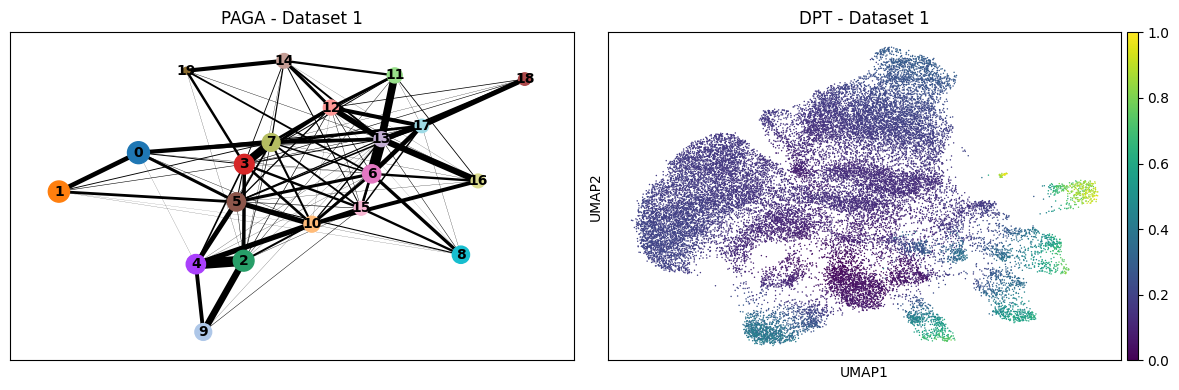

Processing dataset 2/9


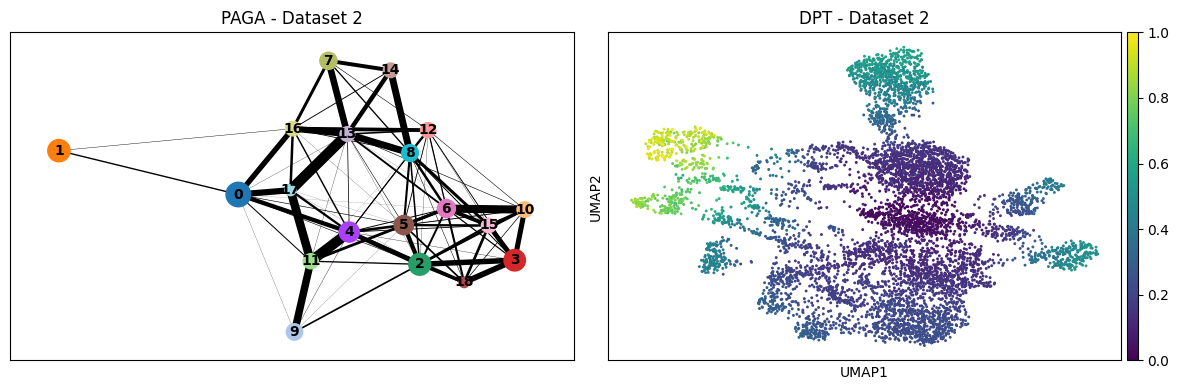

Processing dataset 3/9


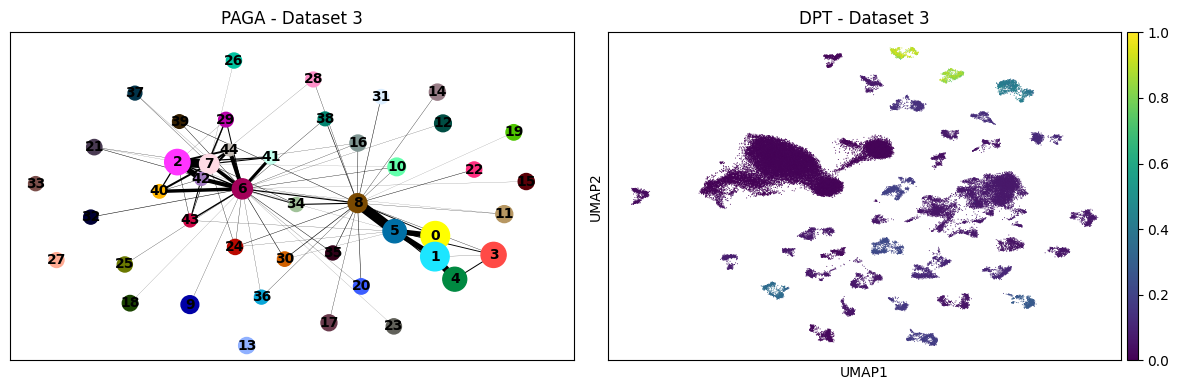

Processing dataset 4/9


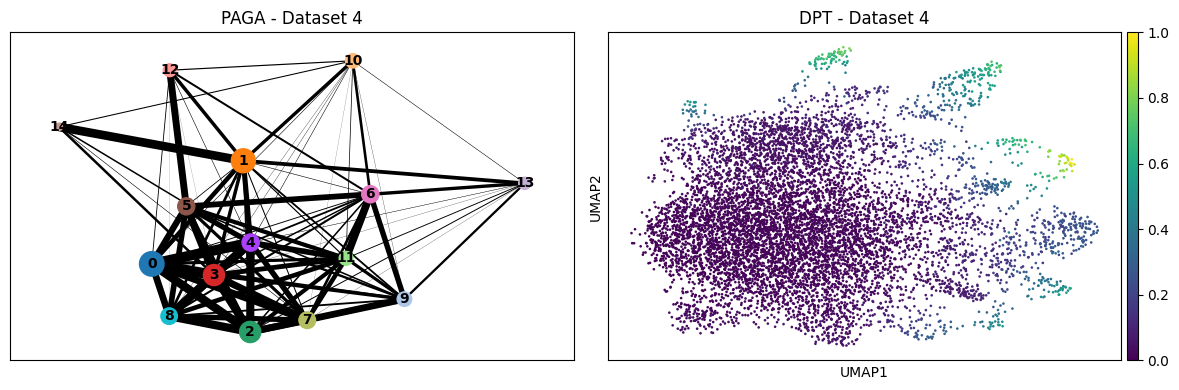

Processing dataset 5/9


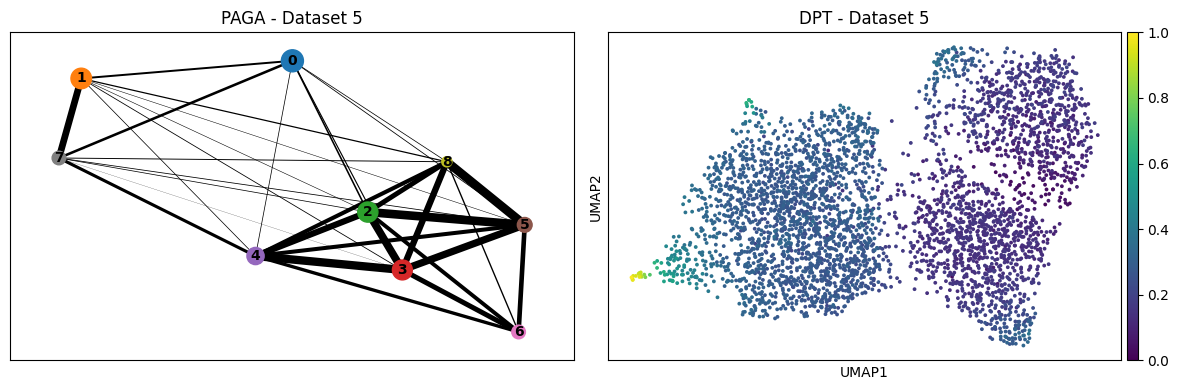

Processing dataset 6/9


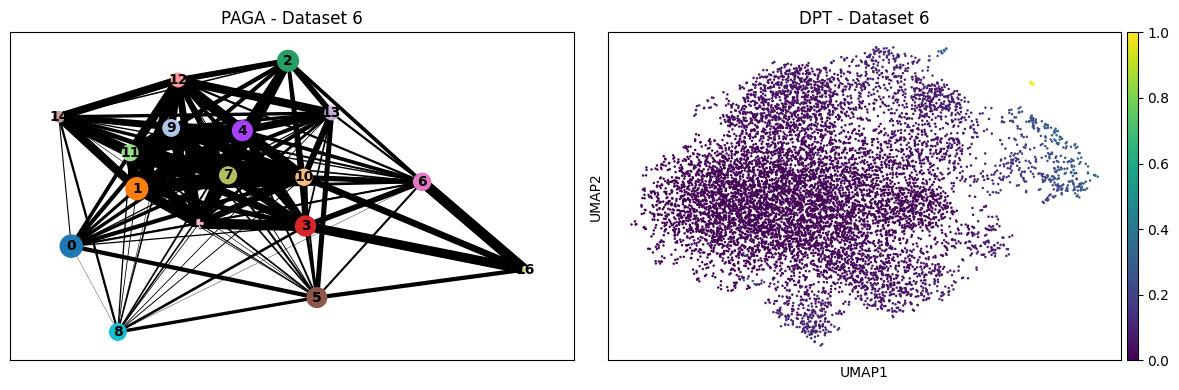

Processing dataset 7/9


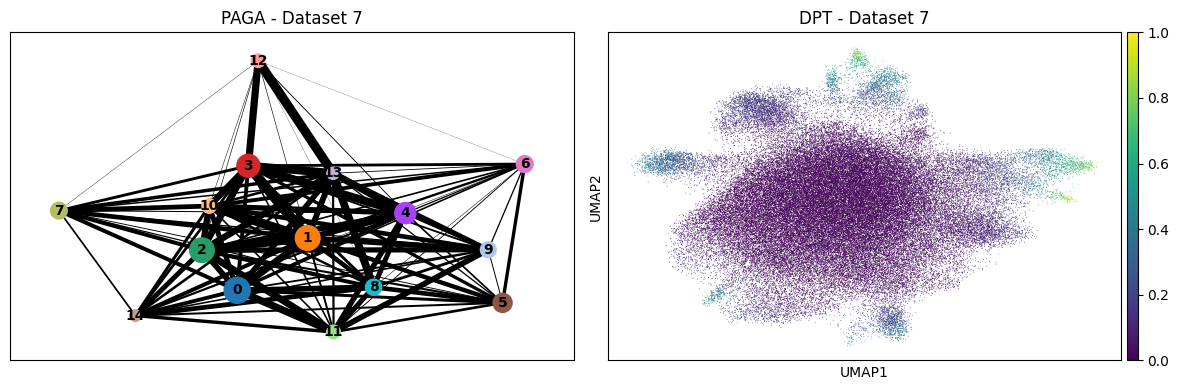

Processing dataset 8/9


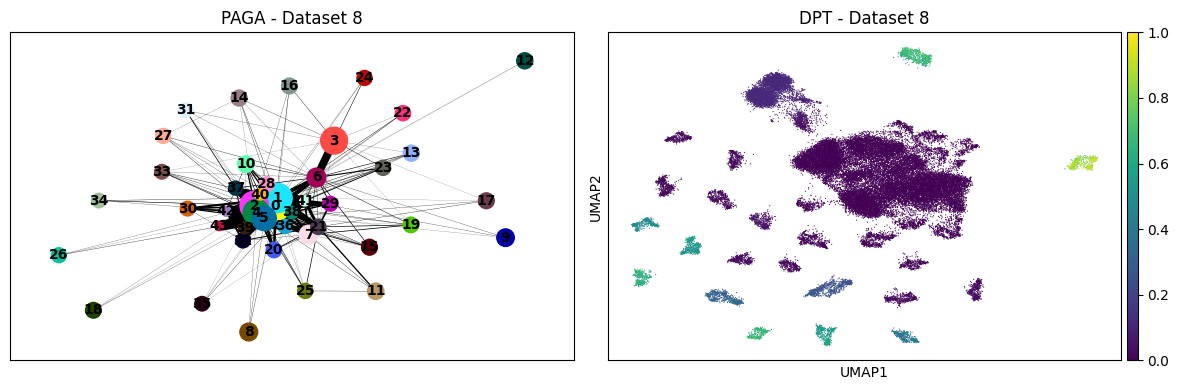

Processing dataset 9/9


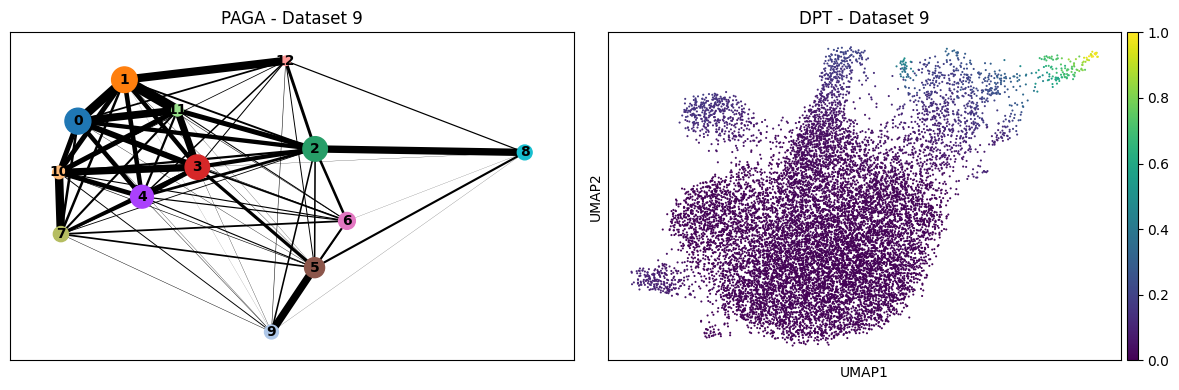

In [ ]:
def compute_paga_dpt(adata):
   ctrl_cells=np.where(adata.obs['gene']=='CTRL')[0]
   if len(ctrl_cells)==0:
       print("No CTRL cells found!")
       return
   adata.uns['iroot']=ctrl_cells[0]
   if 'neighbors' not in adata.uns:
       sc.pp.neighbors(adata,use_rep='X_pca')
   if 'leiden' in adata.obs:
       sc.tl.paga(adata,groups='leiden')
   else:
       sc.tl.leiden(adata)
       sc.tl.paga(adata,groups='leiden')
   sc.tl.diffmap(adata)
   sc.tl.dpt(adata)
   return adata
for i,adata in enumerate(adatas):
   print(f"Processing dataset {i+1}/{len(adatas)}")
   compute_paga_dpt(adata)
   fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,4))
   sc.pl.paga(adata,ax=ax1,show=False)
   ax1.set_title(f'PAGA - Dataset {i+1}')
   sc.pl.umap(adata,color='dpt_pseudotime',ax=ax2,show=False)
   ax2.set_title(f'DPT - Dataset {i+1}')
   plt.tight_layout()
   plt.show()

In [ ]:
os.chdir('/content/drive/MyDrive/pbg-shortcuts/tf-flow-design/perturbatlas/data')

In [ ]:
for i,adata in enumerate(adatas):
   adata.write(f"dataset_{i+1}.h5ad")

In [ ]:
df=pd.DataFrame(columns=['CTRL','weak','strong'])
for i,adata in enumerate(adatas):
   counts=adata.obs['pertclass'].value_counts()
   df.loc[f'adata_{i+1}','CTRL']=counts.get('CTRL',0)
   df.loc[f'adata_{i+1}','weak']=counts.get('weak',0)
   df.loc[f'adata_{i+1}','strong']=counts.get('strong',0)

In [ ]:
# df.to_csv('pertsclass_counts.csv')
df

,CTRL,weak,strong
adata_1,341,2633,24382
adata_2,810,1082,4943
adata_3,5023,0,53960
adata_4,1403,3353,3672
adata_5,356,3310,325
adata_6,1268,1340,6717
adata_7,11729,744,69608
adata_8,4795,74,39970
adata_9,332,10109,2838


In [ ]:
adatas[0].obs

## gene seqs + esm

In [ ]:
import os
os.chdir('/content/drive/MyDrive/Programmable Biology Group/Srikar/tf-dplm/current/perturbatlas/data')

In [ ]:
# import requests
# gene_symbols = ["BRCA2", "TP53", "EGFR", "MYC", "PTEN"]
# organism = "9606"  # NCBI Taxonomy ID for Homo sapiens

# with open("protein_sequences.fasta", "w") as fasta_file:
#     for gene in gene_symbols:
#         url = f"https://rest.uniprot.org/uniprotkb/search?query=gene_exact:{gene}+AND+organism_id:{organism}&format=fasta"
#         response = requests.get(url)

#         if response.status_code == 200 and response.text.strip():
#             first_sequence = response.text.split('>')[1]  # Split by '>' to isolate each FASTA entry
#             first_sequence = '>' + first_sequence.strip()  # Add '>' back to make it a proper FASTA entry

#             fasta_file.write(first_sequence + "\n")
#             print(f"Fetched sequence for {gene}:\n{first_sequence}\n")  # Print the first sequence
#         else:
#             print(f"No sequence found for {gene}")


Fetched sequence for BRCA2:
>sp|P51587|BRCA2_HUMAN Breast cancer type 2 susceptibility protein OS=Homo sapiens OX=9606 GN=BRCA2 PE=1 SV=4
MPIGSKERPTFFEIFKTRCNKADLGPISLNWFEELSSEAPPYNSEPAEESEHKNNNYEPN
LFKTPQRKPSYNQLASTPIIFKEQGLTLPLYQSPVKELDKFKLDLGRNVPNSRHKSLRTV
KTKMDQADDVSCPLLNSCLSESPVVLQCTHVTPQRDKSVVCGSLFHTPKFVKGRQTPKHI
SESLGAEVDPDMSWSSSLATPPTLSSTVLIVRNEEASETVFPHDTTANVKSYFSNHDESL
KKNDRFIASVTDSENTNQREAASHGFGKTSGNSFKVNSCKDHIGKSMPNVLEDEVYETVV
DTSEEDSFSLCFSKCRTKNLQKVRTSKTRKKIFHEANADECEKSKNQVKEKYSFVSEVEP
NDTDPLDSNVANQKPFESGSDKISKEVVPSLACEWSQLTLSGLNGAQMEKIPLLHISSCD
QNISEKDLLDTENKRKKDFLTSENSLPRISSLPKSEKPLNEETVVNKRDEEQHLESHTDC
ILAVKQAISGTSPVASSFQGIKKSIFRIRESPKETFNASFSGHMTDPNFKKETEASESGL
EIHTVCSQKEDSLCPNLIDNGSWPATTTQNSVALKNAGLISTLKKKTNKFIYAIHDETSY
KGKKIPKDQKSELINCSAQFEANAFEAPLTFANADSGLLHSSVKRSCSQNDSEEPTLSLT
SSFGTILRKCSRNETCSNNTVISQDLDYKEAKCNKEKLQLFITPEADSLSCLQEGQCEND
PKSKKVSDIKEEVLAAACHPVQHSKVEYSDTDFQSQKSLLYDHENASTLILTPTSKDVLS
NLVMISRGKESYKMSDKLKGNNYESDVELTKNIPMEKNQDVCALNENYKNVELLPPEKYM
RVASPSRK

In [ ]:
!pip install anndata fair-esm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 4.3 MB/s eta 0:00:00


In [ ]:

import os
import torch
import anndata
import requests
import pickle
from tqdm import tqdm
from glob import glob
from esm import pretrained

In [ ]:
import os
import requests
import torch
import pickle
from tqdm import tqdm
from glob import glob
import anndata
from esm import pretrained

# Set CUDA configuration
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

# Function to get the UniProt sequence for a given gene and organism
def get_uniprot_sequence(gene, organism="9606"):
    url = f"https://rest.uniprot.org/uniprotkb/search?query=gene_exact:{gene}+AND+organism_id:{organism}&format=fasta"
    response = requests.get(url)
    if response.status_code == 200 and response.text.strip():
        sequence = '>' + response.text.split('>')[1].strip()
        # Extract the sequence part and check if it's longer than 10,000 characters
        sequence = sequence.split('\n', 1)[1].replace('\n', '')
        if len(sequence) > 10000:
            return None  # Skip if the sequence length is greater than 10,000 characters
        return sequence
    return None

# Function to get ESM embeddings for a gene sequence
def get_esm_embeddings(gene, sequence, model, alphabet, batch_converter):
    data = [(gene, sequence)]
    print(data)
    batch_labels, batch_strs, batch_tokens = batch_converter(data)
    if torch.cuda.is_available():
        batch_tokens = batch_tokens.cuda()
    batch_lens = (batch_tokens != alphabet.padding_idx).sum(1)
    with torch.no_grad():
        results = model(batch_tokens, repr_layers=[33], return_contacts=False)
        token_embeddings = results["representations"][33].cpu()
        sequence_embedding = token_embeddings[0,1:batch_lens[0]-1].mean(0)
    return sequence_embedding.numpy()

# Load the ESM model and batch converter
model, alphabet = pretrained.load_model_and_alphabet("esm2_t33_650M_UR50D")
batch_converter = alphabet.get_batch_converter()
model.eval()
if torch.cuda.is_available():
    model = model.cuda()

# Process each .h5ad file in the current directory
h5ad_files = glob("*.h5ad")
for h5ad_file in h5ad_files:
    adata = anndata.read_h5ad(h5ad_file)
    hvgs = adata.var_names[adata.var.highly_variable].tolist()

    gene_to_esm = {}
    for gene in tqdm(hvgs, desc=f"Processing {h5ad_file}"):
        sequence = get_uniprot_sequence(gene)
        if sequence:
            embedding = get_esm_embeddings(gene, sequence, model, alphabet, batch_converter)
            gene_to_esm[gene] = embedding

    # Save the gene embeddings to a pickle file
    output_file = f"{os.path.splitext(h5ad_file)[0]}_hvg_esm.pkl"
    with open(output_file, 'wb') as f:
        pickle.dump(gene_to_esm, f)


Processing dataset_1.h5ad:   0%|          | 2/2801 [00:01<24:35,  1.90it/s]

[('SAMD11', 'MSKGILQVHPPICDCPGCRISSPVNRGRLADKRTVALPAARNLKKERTPSFSASDGDSDGSGPTCGRRPGLKQEDGPHIRIMKRRVHTHWDVNISFREASCSQDGNLPTLISSVHRSRHLVMPEHQSRCEFQRGSLEIGLRPAGDLLGKRLGRSPRISSDCFSEKRARSESPQEALLLPRELGPSMAPEDHYRRLVSALSEASTFEDPQRLYHLGLPSHGEDPPWHDPPHHLPSHDLLRVRQEVAAAALRGPSGLEAHLPSSTAGQRRKQGLAQHREGAAPAAAPSFSERELPQPPPLLSPQNAPHVALGPHLRPPFLGVPSALCQTPGYGFLPPAQAEMFAWQQELLRKQNLARLELPADLLRQKELESARPQLLAPETALRPNDGAEELQRRGALLVLNHGAAPLLALPPQGPPGSGPPTPSRDSARRAPRKGGPGPASARPSESKEMTGARLWAQDGSEDEPPKDSDGEDPETAAVGCRGPTPGQAPAGGAGAEGKGLFPGSTLPLGFPYAVSPYFHTGAVGGLSMDGEEAPAPEDVTKWTVDDVCSFVGGLSGCGEYTRVFREQGIDGETLPLLTEEHLLTNMGLKLGPALKIRAQVARRLGRVFYVASFPVALPLQPPTLRAPERELGTGEQPLSPTTATSPYGGGHALAGQTSPKQENGTLALLPGAPDPSQPLC')]


Processing dataset_1.h5ad:   0%|          | 4/2801 [00:01<21:10,  2.20it/s]

[('HES4', 'MAADTPGKPSASPMAGAPASASRTPDKPRSAAEHRKSSKPVMEKRRRARINESLAQLKTLILDALRKESSRHSKLEKADILEMTVRHLRSLRRVQVTAALSADPAVLGKYRAGFHECLAEVNRFLAGCEGVPADVRSRLLGHLAACLRQLGPSRRPASLSPAAPAEAPAPEVYAGRPLLPSLGGPFPLLAPPLLPGLTRALPAAPRAGPQGPGGPWRPWLR')]


Processing dataset_1.h5ad:   0%|          | 5/2801 [00:02<20:50,  2.24it/s]

[('ISG15', 'MGWDLTVKMLAGNEFQVSLSSSMSVSELKAQITQKIGVHAFQQRLAVHPSGVALQDRVPLASQGLGPGSTVLLVVDKCDEPLSILVRNNKGRSSTYEVRLTQTVAHLKQQVSGLEGVQDDLFWLTFEGKPLEDQLPLGEYGLKPLSTVFMNLRLRGGGTEPGGRS')]


Processing dataset_1.h5ad:   0%|          | 6/2801 [00:02<20:55,  2.23it/s]

[('FAM132A', 'MRRWAWAAVVVLLGPQLVLLGGVGARREAQRTQQPGQRADPPNATASASSREGLPEAPKPSQASGPEFSDAHMTWLNFVRRPDDGALRKRCGSRDKKPRDLFGPPGPPGAEVTAETLLHEFQELLKEATERRFSGLLDPLLPQGAGLRLVGEAFHCRLQGPRRVDKRTLVELHGFQAPAAQGAFLRGSGLSLASGRFTAPVSGIFQFSASLHVDHSELQGKARLRARDVVCVLICIESLCQRHTCLEAVSGLESNSRVFTLQVQGLLQLQAGQYASVFVDNGSGAVLTIQAGSSFSGLLLGT')]


Processing dataset_1.h5ad:   0%|          | 7/2801 [00:03<22:49,  2.04it/s]

[('ACAP3', 'MTVEFEECVKDSPRFRATIDEVETDVVEIEAKLDKLVKLCSGMVEAGKAYVSTSRLFVSGVRDLSQQCQGDTVISECLQRFADSLQEVVNYHMILFDQAQRSVRQQLQSFVKEDVRKFKETKKQFDKVREDLELSLVRNAQAPRHRPHEVEEATGALTLTRKCFRHLALDYVLQINVLQAKKKFEILDSMLSFMHAQSSFFQQGYSLLHQLDPYMKKLAAELDQLVIDSAVEKREMERKHAAIQQRTLLQDFSYDESKVEFDVDAPSGVVMEGYLFKRASNAFKTWNRRWFSIQNSQLVYQKKLKDALTVVVDDLRLCSVKPCEDIERRFCFEVLSPTKSCMLQADSEKLRQAWVQAVQASIASAYRESPDSCYSERLDRTASPSTSSIDSATDTRERGVKGESVLQRVQSVAGNSQCGDCGQPDPRWASINLGVLLCIECSGIHRSLGVHCSKVRSLTLDSWEPELLKLMCELGNSAVNQIYEAQCEGAGSRKPTASSSRQDKEAWIKDKYVEKKFLRKAPMAPALEAPRRWRVQKCLRPHSSPRAPTARRKVRLEPVLPCVAALSSVGTLDRKFRRDSLFCPDELDSLFSYFDAGAAGAGPRSLSSDSGLGGSSDGSSDVLAFGSGSVVDSVTEEEGAESEESSGEADGDTEAEAWGLADVRELHPGLLAHRAARARDLPALAAALAHGAEVNWADAEDEGKTPLVQAVLGGSLIVCEFLLQNGADVNQRDSRGRAPLHHATLLGRTGQVCLFLKRGADQHALDQEQRDPLAIAVQAANADIVTLLRLARMAEEMREAEAAPGPPGALAGSPTELQFRRCIQEFISLHLEES')]


Processing dataset_1.h5ad:   0%|          | 9/2801 [00:04<21:01,  2.21it/s]

[('HES5', 'MAPSTVAVELLSPKEKNRLRKPVVEKMRRDRINSSIEQLKLLLEQEFARHQPNSKLEKADILEMAVSYLKHSKAFVAAAGPKSLHQDYSEGYSWCLQEAVQFLTLHAASDTQMKLLYHFQRPPAAPAAPAKEPKAPGAAPPPALSAKATAAAAAAHQPACGLWRPW')]


Processing dataset_1.h5ad:   0%|          | 12/2801 [00:05<20:20,  2.29it/s]

[('AJAP1', 'MWIQQLLGLSSMSIRWPGRPLGSHAWILIAMFQLAVDLPACEALGPGPEFWLLPRSPPRPPRLWSFRSGQPARVPAPVWSPRPPRVERIHGQMQMPRARRAHRPRDQAAALVPKAGLAKPPAAAKSSPSLASSSSSSSSAVAGGAPEQQALLRRGKRHLQGDGLSSFDSRGSRPTTETEFIAWGPTGDEEALESNTFPGVYGPTTVSILQTRKTTVAATTTTTTTATPMTLQTKGFTESLDPRRRIPGGVSTTEPSTSPSNNGEVTQPPRILGEASGLAVHQIITITVSLIMVIAALITTLVLKNCCAQSGNTRRNSHQRKTNQQEESCQNLTDFPSARVPSSLDIFTAYNETLQCSHECVRASVPVYTDETLHSTTGEYKSTFNGNRPSSSDRHLIPVAFVSEKWFEISC')]


Processing dataset_1.h5ad:   0%|          | 13/2801 [00:05<20:21,  2.28it/s]

[('CHD5', 'MSSAAADHWAWLLVLSFVFGCNVLRILLPSFSSFMSRVLQKDAEQESQMRAEIQDMKQELSTVNMMDEFARYARLERKINKMTDKLKTHVKARTAQLAKIKWVISVAFYVLQAALMISLIWKYYSVPVAVVPSKWITPLDRLVAFPTRVAGGVGITCWILVCNKVVAIVLHPFS')]


Processing dataset_1.h5ad:   0%|          | 14/2801 [00:06<20:58,  2.21it/s]

[('ERRFI1', 'MSIAGVAAQEIRVPLKTGFLHNGRAMGNMRKTYWSSRSEFKNNFLNIDPITMAYSLNSSAQERLIPLGHASKSAPMNGHCFAENGPSQKSSLPPLLIPPSENLGPHEEDQVVCGFKKLTVNGVCASTPPLTPIKNSPSLFPCAPLCERGSRPLPPLPISEALSLDDTDCEVEFLTSSDTDFLLEDSTLSDFKYDVPGRRSFRGCGQINYAYFDTPAVSAADLSYVSDQNGGVPDPNPPPPQTHRRLRRSHSGPAGSFNKPAIRISNCCIHRASPNSDEDKPEVPPRVPIPPRPVKPDYRRWSAEVTSSTYSDEDRPPKVPPREPLSPSNSRTPSPKSLPSYLNGVMPPTQSFAPDPKYVSSKALQRQNSEGSASKVPCILPIIENGKKVSSTHYYLLPERPPYLDKYEKFFREAEETNGGAQIQPLPADCGISSATEKPDSKTKMDLGGHVKRKHLSYVVSP')]


Processing dataset_1.h5ad:   1%|          | 15/2801 [00:06<22:53,  2.03it/s]

[('PIK3CD', 'MPPGVDCPMEFWTKEENQSVVVDFLLPTGVYLNFPVSRNANLSTIKQLLWHRAQYEPLFHMLSGPEAYVFTCINQTAEQQELEDEQRRLCDVQPFLPVLRLVAREGDRVKKLINSQISLLIGKGLHEFDSLCDPEVNDFRAKMCQFCEEAAARRQQLGWEAWLQYSFPLQLEPSAQTWGPGTLRLPNRALLVNVKFEGSEESFTFQVSTKDVPLALMACALRKKATVFRQPLVEQPEDYTLQVNGRHEYLYGSYPLCQFQYICSCLHSGLTPHLTMVHSSSILAMRDEQSNPAPQVQKPRAKPPPIPAKKPSSVSLWSLEQPFRIELIQGSKVNADERMKLVVQAGLFHGNEMLCKTVSSSEVSVCSEPVWKQRLEFDINICDLPRMARLCFALYAVIEKAKKARSTKKKSKKADCPIAWANLMLFDYKDQLKTGERCLYMWPSVPDEKGELLNPTGTVRSNPNTDSAAALLICLPEVAPHPVYYPALEKILELGRHSECVHVTEEEQLQLREILERRGSGELYEHEKDLVWKLRHEVQEHFPEALARLLLVTKWNKHEDVAQMLYLLCSWPELPVLSALELLDFSFPDCHVGSFAIKSLRKLTDDELFQYLLQLVQVLKYESYLDCELTKFLLDRALANRKIGHFLFWHLRSEMHVPSVALRFGLILEAYCRGSTHHMKVLMKQGEALSKLKALNDFVKLSSQKTPKPQTKELMHLCMRQEAYLEALSHLQSPLDPSTLLAEVCVEQCTFMDSKMKPLWIMYSNEEAGSGGSVGIIFKNGDDLRQDMLTLQMIQLMDVLWKQEGLDLRMTPYGCLPTGDRTGLIEVVLRSDTIANIQLNKSNMAATAAFNKDALLNWLKSKNPGEALDRAIEEFTLSCAGYCVATYVLGIGDRHSDNIMIRESGQLFHIDFGHFLGNFKTKFGINRERVPFILTYDFVHVIQQGKTNNSEKFERFRGYCERAYTILRRHGLLFLHLFALMRAAGLP

Processing dataset_1.h5ad:   1%|          | 17/2801 [00:07<21:17,  2.18it/s]

[('ANGPTL7', 'MLKKPLSAVTWLCIFIVAFVSHPAWLQKLSKHKTPAQPQLKAANCCEEVKELKAQVANLSSLLSELNKKQERDWVSVVMQVMELESNSKRMESRLTDAESKYSEMNNQIDIMQLQAAQTVTQTSADAIYDCSSLYQKNYRISGVYKLPPDDFLGSPELEVFCDMETSGGGWTIIQRRKSGLVSFYRDWKQYKQGFGSIRGDFWLGNEHIHRLSRQPTRLRVEMEDWEGNLRYAEYSHFVLGNELNSYRLFLGNYTGNVGNDALQYHNNTAFSTKDKDNDNCLDKCAQLRKGGYWYNCCTDSNLNGVYYRLGEHNKHLDGITWYGWHGSTYSLKRVEMKIRPEDFKP')]
[('PTCHD2', 'MDTEDDPLLQDVWLEEEQEEEEATGETFLGAQKPGPQPGAGGQCCWRHWPLASRPPASGFWSTLGWAFTNPCCAGLVLFLGCSIPMALSAFMFLYYPPLDIDISYNAFEIRNHEASQRFDALTLALKSQFGSWGRNRRDLADFTSETLQRLISEQLQQLHLGNRSRQASRAPRVIPAASLGGPGPYRDTSAAQKPTANRSGRLRRETPPLEDLAANQSEDPRNQRLSKNGRYQPSIPPHAAVAANQSRARRGASRWDYSRAYVSANTQTHAHWRIELIFLARGDAERNIFTSERLVTIHEIERKIMDHPGFREFCWKPHEVLKDLPLGSYSYCSPPSSLMTYFFPTERGGKIYYDGMGQDLADIRGSLELAMTHPEFYWYVDEGLSADNLKSSLLRSEILFGAPLPNYYSVDDRWEEQRAKFQSFVVTYVAMLAKQSTSKVQVLYGGTDLFDYEVRRTFNNDMLLAFISSSCIAALVYILTSCSVFLSFFGIASIGLSCLVALFLYHVVFGIQYLGILNGVAAFVIVGIGVDDVFVFINTYRQATHLEDPQLRMIHTVQTAGKATFFTSLTTAAAYAANVFSQIPAVHDFGLFMSLIVSCCWLAVLVTMPAALGLWSLYLAPL

Processing dataset_1.h5ad:   1%|          | 19/2801 [00:08<22:25,  2.07it/s]

[('FBXO2', 'MDGDGDPESVGQPEEASPEEQPEEASAEEERPEDQQEEEAAAAAAYLDELPEPLLLRVLAALPAAELVQACRLVCLRWKELVDGAPLWLLKCQQEGLVPEGGVEEERDHWQQFYFLSKRRRNLLRNPCGEEDLEGWCDVEHGGDGWRVEELPGDSGVEFTHDESVKKYFASSFEWCRKAQVIDLQAEGYWEELLDTTQPAIVVKDWYSGRSDAGCLYELTVKLLSEHENVLAEFSSGQVAVPQDSDGGGWMEISHTFTDYGPGVRFVRFEHGGQDSVYWKGWFGARVTNSSVWVEP')]


Processing dataset_1.h5ad:   1%|          | 20/2801 [00:09<21:47,  2.13it/s]

[('FBXO44', 'MAVGNINELPENILLELFTHVPARQLLLNCRLVCSLWRDLIDLVTLWKRKCLREGFITEDWDQPVADWKIFYFLRSLHRNLLHNPCAEEGFEFWSLDVNGGDEWKVEDLSRDQRKEFPNDQVKKYFVTSYYTCLKSQVVDLKAEGYWEELMDTTRPDIEVKDWFAARPDCGSKYQLCVQLLSSAHAPLGTFQPDPATIQQKSDAKWREVSHTFSNYPPGVRYIWFQHGGVDTHYWAGWYGPRVTNSSITIGPPLP')]


Processing dataset_1.h5ad:   1%|          | 21/2801 [00:09<21:25,  2.16it/s]

[('DRAXIN', 'MAGPAIHTAPMLFLVLLLPLELSLAGALAPGTPARNLPENHIDLPGPALWTPQASHHRRRGPGKKEWGPGLPSQAQDGAVVTATRQASRLPEAEGLLPEQSPAGLLQDKDLLLGLALPYPEKENRPPGWERTRKRSREHKRRRDRLRLHQGRALVRGPSSLMKKAELSEAQVLDAAMEESSTSLAPTMFFLTTFEAAPATEESLILPVTSLRPQQAQPRSDGEVMPTLDMALFDWTDYEDLKPDGWPSAKKKEKHRGKLSSDGNETSPAEGEPCDHHQDCLPGTCCDLREHLCTPHNRGLNNKCFDDCMCVEGLRCYAKFHRNRRVTRRKGRCVEPETANGDQGSFINV')]


Processing dataset_1.h5ad:   1%|          | 22/2801 [00:10<21:04,  2.20it/s]

[('NPPB', 'MDPQTAPSRALLLLLFLHLAFLGGRSHPLGSPGSASDLETSGLQEQRNHLQGKLSELQVEQTSLEPLQESPRPTGVWKSREVATEGIRGHRKMVLYTLRAPRSPKMVQGSGCFGRKMDRISSSSGLGCKVLRRH')]


Processing dataset_1.h5ad:   1%|          | 23/2801 [00:10<21:19,  2.17it/s]

[('TNFRSF1B', 'MAPVAVWAALAVGLELWAAAHALPAQVAFTPYAPEPGSTCRLREYYDQTAQMCCSKCSPGQHAKVFCTKTSDTVCDSCEDSTYTQLWNWVPECLSCGSRCSSDQVETQACTREQNRICTCRPGWYCALSKQEGCRLCAPLRKCRPGFGVARPGTETSDVVCKPCAPGTFSNTTSSTDICRPHQICNVVAIPGNASMDAVCTSTSPTRSMAPGAVHLPQPVSTRSQHTQPTPEPSTAPSTSFLLPMGPSPPAEGSTGDFALPVGLIVGVTALGLLIIGVVNCVIMTQVKKKPLCLQREAKVPHLPADKARGTQGPEQQHLLITAPSSSSSSLESSASALDRRAPTRNQPQAPGVEASGAGEARASTGSSDSSPGGHGTQVNVTCIVNVCSSSDHSSQCSSQASSTMGDTDSSPSESPKDEQVPFSKEECAFRSQLETPETLLGSTEEKPLPLGVPDAGMKPS')]


Processing dataset_1.h5ad:   1%|          | 24/2801 [00:11<21:12,  2.18it/s]

[('DHRS3', 'MVWKRLGALVMFPLQMIYLVVKAAVGLVLPAKLRDLSRENVLITGGGRGIGRQLAREFAERGARKIVLWGRTEKCLKETTEEIRQMGTECHYFICDVGNREEVYQTAKAVREKVGDITILVNNAAVVHGKSLMDSDDDALLKSQHINTLGQFWTTKAFLPRMLELQNGHIVCLNSVLALSAIPGAIDYCTSKASAFAFMESLTLGLLDCPGVSATTVLPFHTSTEMFQGMRVRFPNLFPPLKPETVARRTVEAVQLNQALLLLPWTMHALVILKSILPQAALEEIHKFSGTYTCMNTFKGRT')]


Processing dataset_1.h5ad:   1%|          | 25/2801 [00:11<20:53,  2.21it/s]

[('PDPN', 'MWKVSALLFVLGSASLWVLAEGASTGQPEDDTETTGLEGGVAMPGAEDDVVTPGTSEDRYKSGLTTLVATSVNSVTGIRIEDLPTSESTVHAQEQSPSATASNVATSHSTEKVDGDTQTTVEKDGLSTVTLVGIIVGVLLAIGFIGAIIVVVMRKMSGRYSP')]


Processing dataset_1.h5ad:   1%|          | 26/2801 [00:11<20:46,  2.23it/s]

[('CTRC', 'MLGITVLAALLACASSCGVPSFPPNLSARVVGGEDARPHSWPWQISLQYLKNDTWRHTCGGTLIASNFVLTAAHCISNTRTYRVAVGKNNLEVEDEEGSLFVGVDTIHVHKRWNALLLRNDIALIKLAEHVELSDTIQVACLPEKDSLLPKDYPCYVTGWGRLWTNGPIADKLQQGLQPVVDHATCSRIDWWGFRVKKTMVCAGGDGVISACNGDSGGPLNCQLENGSWEVFGIVSFGSRRGCNTRKKPVVYTRVSAYIDWINEKMQL')]


Processing dataset_1.h5ad:   1%|          | 27/2801 [00:12<20:42,  2.23it/s]

[('CELA2A', 'MIRTLLLSTLVAGALSCGDPTYPPYVTRVVGGEEARPNSWPWQVSLQYSSNGKWYHTCGGSLIANSWVLTAAHCISSSRTYRVGLGRHNLYVAESGSLAVSVSKIVVHKDWNSNQISKGNDIALLKLANPVSLTDKIQLACLPPAGTILPNNYPCYVTGWGRLQTNGAVPDVLQQGRLLVVDYATCSSSAWWGSSVKTSMICAGGDGVISSCNGDSGGPLNCQASDGRWQVHGIVSFGSRLGCNYYHKPSVFTRVSNYIDWINSVIANN')]


Processing dataset_1.h5ad:   1%|          | 30/2801 [00:13<20:05,  2.30it/s]

[('PAX7', 'MAALPGTVPRMMRPAPGQNYPRTGFPLEVSTPLGQGRVNQLGGVFINGRPLPNHIRHKIVEMAHHGIRPCVISRQLRVSHGCVSKILCRYQETGSIRPGAIGGSKPRQVATPDVEKKIEEYKRENPGMFSWEIRDRLLKDGHCDRSTVPSGLVSSISRVLRIKFGKKEEEDEADKKEDDGEKKAKHSIDGILGDKGNRLDEGSDVESEPDLPLKRKQRRSRTTFTAEQLEELEKAFERTHYPDIYTREELAQRTKLTEARVQVWFSNRRARWRKQAGANQLAAFNHLLPGGFPPTGMPTLPPYQLPDSTYPTTTISQDGGSTVHRPQPLPPSTMHQGGLAAAAAAADTSSAYGARHSFSSYSDSFMNPAAPSNHMNPVSNGLSPQVMSILGNPSAVPPQPQADFSISPLHGGLDSATSISASCSQRADSIKPGDSLPTSQAYCPPTYSTTGYSVDPVAGYQYGQYGQTAVDYLAKNVSLSTQRRMKLGEHSAVLGLLPVETGQAY')]


Processing dataset_1.h5ad:   1%|          | 31/2801 [00:14<20:09,  2.29it/s]

[('RNF186', 'MACTKTLQQSQPISAGATTTTTAVAPAGGHSGSTECDLECLVCREPYSCPRLPKLLACQHAFCAICLKLLLCVQDNTWSITCPLCRKVTAVPGGLICSLRDHEAVVGQLAQPCTEVSLCPQGLVDPADLAAGHPSLVGEDGQDEVSANHVAARRLAAHLLLLALLIILIGPFIYPGVLRWVLTFIIALALLMSTLFCCLPSTRGSCWPSSRTLFCREQKHSHISSIA')]


Processing dataset_1.h5ad:   1%|          | 32/2801 [00:14<20:06,  2.29it/s]

[('PLA2G2A', 'MKTLLLLAVIMIFGLLQAHGNLVNFHRMIKLTTGKEAALSYGFYGCHCGVGGRGSPKDATDRCCVTHDCCYKRLEKRGCGTKFLSYKFSNSGSRITCAKQDSCRSQLCECDKAAATCFARNKTTYNKKYQYYSNKHCRGSTPRC')]


Processing dataset_1.h5ad:   1%|          | 33/2801 [00:14<20:05,  2.30it/s]

[('CAMK2N1', 'MSEVLPYGDEKLSPYGDGGDVGQIFSCRLQDTNNFFGAGQNKRPPKLGQIGRSKRVVIEDDRIDDVLKNMTDKAPPGV')]


Processing dataset_1.h5ad:   1%|          | 34/2801 [00:15<20:21,  2.27it/s]

[('FAM43B', 'MLPWRRNKFVLVEDEAKCKAKSLSPGLAYTSLLSSFLRSCPDLLPDWPLERLGRVFRSRRQKVELNKEDPTYTVWYLGNAVTLHAKGDGCTDDAVGKIWARCGPGGGTKMKLTLGPHGIRMQPCERSAAGGSGGRRPAHAYLLPRITYCTADGRHPRVFAWVYRHQARHKAVVLRCHAVLLARAHKARALARLLRQTALAAFSDFKRLQRQSDARHVRQQHLRAGGAAASVPRAPLRRLLNAKCAYRPPPSERSRGAPRLSSIQEEDEEEEEDDAEEQEGGVPQRERPEVLSLARELRTCSLRGAPAPPPPAQPRRWKAGPRERAGQAR')]


Processing dataset_1.h5ad:   1%|          | 35/2801 [00:15<20:15,  2.28it/s]

[('CDA', 'MAQKRPACTLKPECVQQLLVCSQEAKKSAYCPYSHFPVGAALLTQEGRIFKGCNIENACYPLGICAERTAIQKAVSEGYKDFRAIAIASDMQDDFISPCGACRQVMREFGTNWPVYMTKPDGTYIVMTVQELLPSSFGPEDLQKTQ')]
[('HSPG2', 'MGWRAAGALLLALLLHGRLLAVTHGLRAYDGLSLPEDIETVTASQMRWTHSYLSDDEDMLADSISGDDLGSGDLGSGDFQMVYFRALVNFTRSIEYSPQLEDAGSREFREVSEAVVDTLESEYLKIPGDQVVSVVFIKELDGWVFVELDVGSEGNADGAQIQEMLLRVISSGSVASYVTSPQGFQFRRLGTVPQFPRACTEAEFACHSYNECVALEYRCDRRPDCRDMSDELNCEEPVLGISPTFSLLVETTSLPPRPETTIMRQPPVTHAPQPLLPGSVRPLPCGPQEAACRNGHCIPRDYLCDGQEDCEDGSDELDCGPPPPCEPNEFPCGNGHCALKLWRCDGDFDCEDRTDEANCPTKRPEEVCGPTQFRCVSTNMCIPASFHCDEESDCPDRSDEFGCMPPQVVTPPRESIQASRGQTVTFTCVAIGVPTPIINWRLNWGHIPSHPRVTVTSEGGRGTLIIRDVKESDQGAYTCEAMNARGMVFGIPDGVLELVPQRGPCPDGHFYLEHSAACLPCFCFGITSVCQSTRRFRDQIRLRFDQPDDFKGVNVTMPAQPGTPPLSSTQLQIDPSLHEFQLVDLSRRFLVHDSFWALPEQFLGNKVDSYGGSLRYNVRYELARGMLEPVQRPDVVLMGAGYRLLSRGHTPTQPGALNQRQVQFSEEHWVHESGRPVQRAELLQVLQSLEAVLIQTVYNTKMASVGLSDIAMDTTVTHATSHGRAHSVEECRCPIGYSGLSCESCDAHFTRVPGGPYLGTCSGCNCNGHASSCDPVYGHCLNCQHNTEGPQCNKCKAGFFGDAMKATATSCRPCPCPYIDASRRFSDT

Processing dataset_1.h5ad:   1%|▏         | 37/2801 [00:17<28:20,  1.63it/s]

[('CELA3B', 'MMLRLLSSLLLVAVASGYGPPSSRPSSRVVNGEDAVPYSWPWQVSLQYEKSGSFYHTCGGSLIAPDWVVTAGHCISSSRTYQVVLGEYDRAVKEGPEQVIPINSGDLFVHPLWNRSCVACGNDIALIKLSRSAQLGDAVQLASLPPAGDILPNETPCYITGWGRLYTNGPLPDKLQEALLPVVDYEHCSRWNWWGSSVKKTMVCAGGDIRSGCNGDSGGPLNCPTEDGGWQVHGVTSFVSAFGCNTRRKPTVFTRVSAFIDWIEETIASH')]


Processing dataset_1.h5ad:   1%|▏         | 38/2801 [00:17<25:51,  1.78it/s]

[('CELA3A', 'MMLRLLSSLLLVAVASGYGPPSSHSSSRVVHGEDAVPYSWPWQVSLQYEKSGSFYHTCGGSLIAPDWVVTAGHCISRDLTYQVVLGEYNLAVKEGPEQVIPINSEELFVHPLWNRSCVACGNDIALIKLSRSAQLGDAVQLASLPPAGDILPNKTPCYITGWGRLYTNGPLPDKLQQARLPVVDYKHCSRWNWWGSTVKKTMVCAGGYIRSGCNGDSGGPLNCPTEDGGWQVHGVTSFVSAFGCNFIWKPTVFTRVSAFIDWIEETIASH')]


Processing dataset_1.h5ad:   1%|▏         | 39/2801 [00:18<24:13,  1.90it/s]

[('WNT4', 'MSPRSCLRSLRLLVFAVFSAAASNWLYLAKLSSVGSISEEETCEKLKGLIQRQVQMCKRNLEVMDSVRRGAQLAIEECQYQFRNRRWNCSTLDSLPVFGKVVTQGTREAAFVYAISSAGVAFAVTRACSSGELEKCGCDRTVHGVSPQGFQWSGCSDNIAYGVAFSQSFVDVRERSKGASSSRALMNLHNNEAGRKAILTHMRVECKCHGVSGSCEVKTCWRAVPPFRQVGHALKEKFDGATEVEPRRVGSSRALVPRNAQFKPHTDEDLVYLEPSPDFCEQDMRSGVLGTRGRTCNKTSKAIDGCELLCCGRGFHTAQVELAERCSCKFHWCCFVKCRQCQRLVELHTCR')]


Processing dataset_1.h5ad:   1%|▏         | 40/2801 [00:18<23:07,  1.99it/s]

[('TCEA3', 'MGQEEELLRIAKKLEKMVARKNTEGALDLLKKLHSCQMSIQLLQTTRIGVAVNGVRKHCSDKEVVSLAKVLIKNWKRLLDSPGPPKGEKGEEREKAKKKEKGLECSDWKPEAGLSPPRKKREDPKTRRDSVDSKSSASSSPKRPSVERSNSSKSKAESPKTPSSPLTPTFASSMCLLAPCYLTGDSVRDKCVEMLSAALKADDDYKDYGVNCDKMASEIEDHIYQELKSTDMKYRNRVRSRISNLKDPRNPGLRRNVLSGAISAGLIAKMTAEEMASDELRELRNAMTQEAIREHQMAKTGGTTTDLFQCSKCKKKNCTYNQVQTRSADEPMTTFVLCNECGNRWKFC')]


Processing dataset_1.h5ad:   1%|▏         | 41/2801 [00:19<22:10,  2.07it/s]

[('ID3', 'MKALSPVRGCYEAVCCLSERSLAIARGRGKGPAAEEPLSLLDDMNHCYSRLRELVPGVPRGTQLSQVEILQRVIDYILDLQVVLAEPAPGPPDGPHLPIQTAELTPELVISNDKRSFCH')]
[('MYOM3', 'MTLPHSLGGAGDPRPPQAMEVHRLEHRQEEEQKEERQHSLRMGSSVRRRTFRSSEEEHEFSAADYALAAALALTASSELSWEAQLRRQTSAVELEERGQKRVGFGNDWERTEIAFLQTHRLLRQRRDWKTLRRRTEEKVQEAKELRELCYGRGPWFWIPLRSHAVWEHTTVLLTCTVQASPPPQVTWYKNDTRIDPRLFRAGKYRITNNYGLLSLEIRRCAIEDSATYTVRVKNAHGQASSFAKVLVRTYLGKDAGFDSEIFKRSTFGPSVEFTSVLKPVFAREKEPFSLSCLFSEDVLDAESIQWFRDGSLLRSSRRRKILYTDRQASLKVSCTYKEDEGLYMVRVPSPFGPREQSTYVLVRDAEAENPGAPGSPLNVRCLDVNRDCLILTWAPPSDTRGNPITAYTIERCQGESGEWIACHEAPGGTCRCPIQGLVEGQSYRFRVRAISRVGSSVPSKASELVVMGDHDAARRKTEIPFDLGNKITISTDAFEDTVTIPSPPTNVHASEIREAYVVLAWEEPSPRDRAPLTYSLEKSVIGSGTWEAISSESPVRSPRFAVLDLEKKKSYVFRVRAMNQYGLSDPSEPSEPIALRGPPATLPPPAQVQAFRDTQTSVSLTWDPVKDPELLGYYIYSRKVGTSEWQTVNNKPIQGTRFTVPGLRTGKEYEFCVRSVSEAGVGESSAATEPIRVKQALATPSAPYGFALLNCGKNEMVIGWKPPKRRGGGKILGYFLDQHDSEELDWHAVNQQPIPTRVCKVSDLHEGHFYEFRARAANWAGVGELSAPSSLFECKEWTMPQPGPPYDVRASEVRATSLVLQWEPPLYMGAGPVTGYHVSFQEEGSEQWKPVTPGP

Processing dataset_1.h5ad:   2%|▏         | 43/2801 [00:20<23:20,  1.97it/s]

[('RUNX3', 'MRIPVDPSTSRRFTPPSPAFPCGGGGGKMGENSGALSAQAAVGPGGRARPEVRSMVDVLADHAGELVRTDSPNFLCSVLPSHWRCNKTLPVAFKVVALGDVPDGTVVTVMAGNDENYSAELRNASAVMKNQVARFNDLRFVGRSGRGKSFTLTITVFTNPTQVATYHRAIKVTVDGPREPRRHRQKLEDQTKPFPDRFGDLERLRMRVTPSTPSPRGSLSTTSHFSSQPQTPIQGTSELNPFSDPRQFDRSFPTLPTLTESRFPDPRMHYPGAMSAAFPYSATPSGTSISSLSVAGMPATSRFHHTYLPPPYPGAPQNQSGPFQANPSPYHLYYGTSSGSYQFSMVAGSSSGGDRSPTRMLASCTSSAASVAAGNLMNPSLGGQSDGVEADGSHSNSPTALSTPGRMDEAVWRPY')]


Processing dataset_1.h5ad:   2%|▏         | 44/2801 [00:20<22:28,  2.04it/s]

[('PAQR7', 'MAMAQKLSHLLPSLRQVIQEPQLSLQPEPVFTVDRAEVPPLFWKPYIYAGYRPLHQTWRFYFRTLFQQHNEAVNVWTHLLAALVLLLRLALFVETVDFWGDPHALPLFIIVLASFTYLSFSALAHLLQAKSEFWHYSFFFLDYVGVAVYQFGSALAHFYYAIEPAWHAQVQAVFLPMAAFLAWLSCIGSCYNKYIQKPGLLGRTCQEVPSVLAYALDISPVVHRIFVSSDPTTDDPALLYHKCQVVFFLLAAAFFSTFMPERWFPGSCHVFGQGHQLFHIFLVLCTLAQLEAVALDYEARRPIYEPLHTHWPHNFSGLFLLTVGSSILTAFLLSQLVQRKLDQKTK')]


Processing dataset_1.h5ad:   2%|▏         | 45/2801 [00:21<21:47,  2.11it/s]

[('FAM110D', 'MLLAPPSTPSRGRTPSAVERLEADKAKYVKTHQVIARRQEPALRGSPGPLTPHPCNELGPPASPRTPRPVRRGSGRRLPRPDSLIFYRQKRDCKASVNKENAKGQGLVRRLFLGAPRDAAPSSPASTERPAASGGWAAPQDAPEAAGKRALCPTCSLPLSEKERFFNYCGLERALVEVLGAERFSPQSWGADASPQAGTSPPPGSGDASDWTSSDRGVDSPGGAGGGGGSEAAGSARDRRPPVSVVERNARVIQWLYGCQRARGPPRESEV')]


Processing dataset_1.h5ad:   2%|▏         | 46/2801 [00:21<21:15,  2.16it/s]

[('CD52', 'MKRFLFLLLTISLLVMVQIQTGLSGQNDTSQTSSPSASSNISGGIFLFFVANAIIHLFCFS')]


Processing dataset_1.h5ad:   2%|▏         | 47/2801 [00:22<20:54,  2.20it/s]

[('LIN28A', 'MGSVSNQQFAGGCAKAAEEAPEEAPEDAARAADEPQLLHGAGICKWFNVRMGFGFLSMTARAGVALDPPVDVFVHQSKLHMEGFRSLKEGEAVEFTFKKSAKGLESIRVTGPGGVFCIGSERRPKGKSMQKRRSKGDRCYNCGGLDHHAKECKLPPQPKKCHFCQSISHMVASCPLKAQQGPSAQGKPTYFREEEEEIHSPTLLPEAQN')]


Processing dataset_1.h5ad:   2%|▏         | 48/2801 [00:22<20:35,  2.23it/s]

[('HMGN2', 'MPKRKAEGDAKGDKAKVKDEPQRRSARLSAKPAPPKPEPKPKKAPAKKGEKVPKGKKGKADAGKEGNNPAENGDAKTDQAQKAEGAGDAK')]


Processing dataset_1.h5ad:   2%|▏         | 49/2801 [00:23<20:25,  2.24it/s]

[('SFN', 'MERASLIQKAKLAEQAERYEDMAAFMKGAVEKGEELSCEERNLLSVAYKNVVGGQRAAWRVLSSIEQKSNEEGSEEKGPEVREYREKVETELQGVCDTVLGLLDSHLIKEAGDAESRVFYLKMKGDYYRYLAEVATGDDKKRIIDSARSAYQEAMDISKKEMPPTNPIRLGLALNFSVFHYEIANSPEEAISLAKTTFDEAMADLHTLSEDSYKDSTLIMQLLRDNLTLWTADNAGEEGGEAPQEPQS')]


Processing dataset_1.h5ad:   2%|▏         | 50/2801 [00:23<20:22,  2.25it/s]

[('NR0B2', 'MSTSQPGACPCQGAASRPAILYALLSSSLKAVPRPRSRCLCRQHRPVQLCAPHRTCREALDVLAKTVAFLRNLPSFWQLPPQDQRRLLQGCWGPLFLLGLAQDAVTFEVAEAPVPSILKKILLEEPSSSGGSGQLPDRPQPSLAAVQWLQCCLESFWSLELSPKEYACLKGTILFNPDVPGLQAASHIGHLQQEAHWVLCEVLEPWCPAAQGRLTRVLLTASTLKSIPTSLLGDLFFRPIIGDVDIAGLLGDMLLLR')]


Processing dataset_1.h5ad:   2%|▏         | 51/2801 [00:23<20:17,  2.26it/s]

[('TRNP1', 'MPGCRISACGPGAQEGTAEQRSPPPPWDPMPSSQPPPPTPTLTPTPTPGQSPPLPDAAGASAGAAEDQELQRWRQGASGIAGLAGPGGGSGAAAGAGGRALELAEARRRLLEVEGRRRLVSELESRVLQLHRVFLAAELRLAHRAESLSRLSGGVAQAELYLAAHGSRLKKGPRRGRRGRPPALLASALGLGGCVPWGAGRLRRGHGPEPDSPFRRSPPRGPASPQR')]
[('MAP3K6', 'MAGPCPRSGAERAGSCWQDPLAVALSRGRQLAAPPGRGCARSRPLSVVYVLTREPQPGLEPREGTEAEPLPLRCLREACAQVPRPRPPPQLRSLPFGTLELGDTAALDAFYNADVVVLEVSSSLVQPSLFYHLGVRESFSMTNNVLLCSQADLPDLQALREDVFQKNSDCVGSYTLIPYVVTATGRVLCGDAGLLRGLADGLVQAGVGTEALLTPLVGRLARLLEATPTDSCGYFRETIRRDIRQARERFSGPQLRQELARLQRRLDSVELLSPDIIMNLLLSYRDVQDYSAIIELVETLQALPTCDVAEQHNVCFHYTFALNRRNRPGDRAKALSVLLPLVQLEGSVAPDLYCMCGRIYKDMFFSSGFQDAGHREQAYHWYRKAFDVEPSLHSGINAAVLLIAAGQHFEDSKELRLIGMKLGCLLARKGCVEKMQYYWDVGFYLGAQILANDPTQVVLAAEQLYKLNAPIWYLVSVMETFLLYQHFRPTPEPPGGPPRRAHFWLHFLLQSCQPFKTACAQGDQCLVLVLEMNKVLLPAKLEVRGTDPVSTVTLSLLEPETQDIPSSWTFPVASICGVSASKRDERCCFLYALPPAQDVQLCFPSVGHCQWFCGLIQAWVTNPDSTAPAEEAEGAGEMLEFDYEYTETGERLVLGKGTYGVVYAGRDRHTRVRIAIKEIPERDSRFSQPLHEEIALHRRLRHKNIVRYLGSASQGGYLKIFMEEVPGGSLSSLLRSVWGPLKDN

Processing dataset_1.h5ad:   2%|▏         | 53/2801 [00:24<21:51,  2.09it/s]

[('IFI6', 'MRQKAVSLFLCYLLLFTCSGVEAGKKKCSESSDSGSGFWKALTFMAVGGGLAVAGLPALGFTGAGIAANSVAASLMSWSAILNGGGVPAGGLVATLQSLGAGGSSVVIGNIGALMGYATHKYLDSEEDEE')]


Processing dataset_1.h5ad:   2%|▏         | 54/2801 [00:25<26:55,  1.70it/s]

[('SESN2', 'MIVADSECRAELKDYLRFAPGGVGDSGPGEEQRESRARRGPRGPSAFIPVEEVLREGAESLEQHLGLEALMSSGRVDNLAVVMGLHPDYFTSFWRLHYLLLHTDGPLASSWRHYIAIMAAARHQCSYLVGSHMAEFLQTGGDPEWLLGLHRAPEKLRKLSEINKLLAHRPWLITKEHIQALLKTGEHTWSLAELIQALVLLTHCHSLSSFVFGCGILPEGDADGSPAPQAPTPPSEQSSPPSRDPLNNSGGFESARDVEALMERMQQLQESLLRDEGTSQEEMESRFELEKSESLLVTPSADILEPSPHPDMLCFVEDPTFGYEDFTRRGAQAPPTFRAQDYTWEDHGYSLIQRLYPEGGQLLDEKFQAAYSLTYNTIAMHSGVDTSVLRRAIWNYIHCVFGIRYDDYDYGEVNQLLERNLKVYIKTVACYPEKTTRRMYNLFWRHFRHSEKVHVNLLLLEARMQAALLYALRAITRYMT')]


Processing dataset_1.h5ad:   2%|▏         | 55/2801 [00:26<24:49,  1.84it/s]

[('SNHG12', 'MQGTWLPPSFLAVCDTEEVSLFLELCFKIHVTCKAVLICDYGPMELGQSLWEAEGKDPGHFR')]


Processing dataset_1.h5ad:   2%|▏         | 56/2801 [00:26<23:49,  1.92it/s]

[('MATN1', 'MRVLSGTSLMLCSLLLLLQALCSPGLAPQSRGHLCRTRPTDLVFVVDSSRSVRPVEFEKVKVFLSQVIESLDVGPNATRVGMVNYASTVKQEFSLRAHVSKAALLQAVRRIQPLSTGTMTGLAIQFAITKAFGDAEGGRSRSPDISKVVIVVTDGRPQDSVQDVSARARASGVELFAIGVGSVDKATLRQIASEPQDEHVDYVESYSVIEKLSRKFQEAFCVVSDLCATGDHDCEQVCISSPGSYTCACHEGFTLNSDGKTCNVCSGGGGSSATDLVFLIDGSKSVRPENFELVKKFISQIVDTLDVSDKLAQVGLVQYSSSVRQEFPLGRFHTKKDIKAAVRNMSYMEKGTMTGAALKYLIDNSFTVSSGARPGAQKVGIVFTDGRSQDYINDAAKKAKDLGFKMFAVGVGNAVEDELREIASEPVAEHYFYTADFKTINQIGKKLQKKICVEEDPCACESLVKFQAKVEGLLQALTRKLEAVSKRLAILENTVV')]


Processing dataset_1.h5ad:   2%|▏         | 57/2801 [00:27<22:48,  2.00it/s]

[('LAPTM5', 'MDPRLSTVRQTCCCFNVRIATTALAIYHVIMSVLLFIEHSVEVAHGKASCKLSQMGYLRIADLISSFLLITMLFIISLSLLIGVVKNREKYLLPFLSLQIMDYLLCLLTLLGSYIELPAYLKLASRSRASSSKFPLMTLQLLDFCLSILTLCSSYMEVPTYLNFKSMNHMNYLPSQEDMPHNQFIKMMIIFSIAFITVLIFKVYMFKCVWRCYRLIKCMNSVEEKRNSKMLQKVVLPSYEEALSLPSKTPEGGPAPPPYSEV')]


Processing dataset_1.h5ad:   2%|▏         | 58/2801 [00:27<21:56,  2.08it/s]

[('NKAIN1', 'MGKCSGRCTLVAFCCLQLVAALERQIFDFLGYQWAPILANFLHIMAVILGIFGTVQYRSRYLILYAAWLVLWVGWNAFIICFYLEVGQLSQDRDFIMTFNTSLHRSWWMENGPGCLVTPVLNSRLALEDHHVISVTGCLLDYPYIEALSSALQIFLALFGFVFACYVSKVFLEEEDSFDFIGGFDSYGYQAPQKTSHLQLQPLYTSG')]


Processing dataset_1.h5ad:   2%|▏         | 59/2801 [00:28<21:50,  2.09it/s]

[('TINAGL1', 'MWRCPLGLLLLLPLAGHLALGAQQGRGRRELAPGLHLRGIRDAGGRYCQEQDLCCRGRADDCALPYLGAICYCDLFCNRTVSDCCPDFWDFCLGVPPPFPPIQGCMHGGRIYPVLGTYWDNCNRCTCQENRQWQCDQEPCLVDPDMIKAINQGNYGWQAGNHSAFWGMTLDEGIRYRLGTIRPSSSVMNMHEIYTVLNPGEVLPTAFEASEKWPNLIHEPLDQGNCAGSWAFSTAAVASDRVSIHSLGHMTPVLSPQNLLSCDTHQQQGCRGGRLDGAWWFLRRRGVVSDHCYPFSGRERDEAGPAPPCMMHSRAMGRGKRQATAHCPNSYVNNNDIYQVTPVYRLGSNDKEIMKELMENGPVQALMEVHEDFFLYKGGIYSHTPVSLGRPERYRRHGTHSVKITGWGEETLPDGRTLKYWTAANSWGPAWGERGHFRIVRGVNECDIESFVLGVWGRVGMEDMGHH')]
[('COL16A1', 'MWVSWAPGLWLLGLWATFGHGANTGAQCPPSQQEGLKLEHSSSLPANVTGFNLIHRLSLMKTSAIKKIRNPKGPLILRLGAAPVTQPTRRVFPRGLPEEFALVLTLLLKKHTHQKTWYLFQVTDANGYPQISLEVNSQERSLELRAQGQDGDFVSCIFPVPQLFDLRWHKLMLSVAGRVASVHVDCSSASSQPLGPRRPMRPVGHVFLGLDAEQGKPVSFDLQQVHIYCDPELVLEEGCCEILPAGCPPETSKARRDTQSNELIEINPQSEGKVYTRCFCLEEPQNSEVDAQLTGRISQKAERGAKVHQETAADECPPCVHGARDSNVTLAPSGPKGGKGERGLPGPPGSKGEKGARGNDCVRISPDAPLQCAEGPKGEKGESGALGPSGLPGSTGEKGQKGEKGDGGIKGVPGKPGRDGRPGEICVIGPKGQKGDPGFVGPEGLAGEPGPPGLPGPPGIGLPGTPGDPGGPPGPKGDKGSSGIPGKEGPGGKPGKPGVKG

Processing dataset_1.h5ad:   2%|▏         | 61/2801 [00:29<23:10,  1.97it/s]

[('FAM229A', 'MLPSSTPGPGHATETCPAPPGPERSPAARAPAAASSLGPVSTAGRAPRGLDMSAQEPPQGRRFPIEAGDSRGLAAAPESQDSPEAVATEHNPVRPLRRCPGCHCLTLLHVPIDVYLAMGGSPRARAT')]


Processing dataset_1.h5ad:   2%|▏         | 62/2801 [00:29<26:35,  1.72it/s]

[('SYNC', 'MASPEPRRGGDGAAQAARKTRVEANSPLPKNSGSLNEAEALNPEVTLSSEGSLNLEDILYLEDTGDLDETLYVQETEKAEEALYIEEAMQPDEALHVEEPGNPEETVCVEETTEPDRIQFVEGPVEPGKPTSPEHVVYEGETVTRAEKSNPEESLRAEQSPSMEENLSIEDLELLEGRFQQCVQAVAQLEEERDQLIHELVLLREPALQEVQQVHQDILAAYKLHAQAELERDGLREEIRLVKQKLFKVTKECVAYQYQLECRQQDVAQFADFREVLTTRATQLSEELAQLRDAYQKQKEQLRQQLEAPPSQRDGHFLQESRRLSAQFENLMAESRQDLEEEYEPQFLRLLERKEAGTKALQRTQAEIQEMKEALRPLQAEARQLRLQNRNLEDQIALVRQKRDEEVQQYREQLEEMEERQRQLRNGVQLQQQKNKEMEQLRLSLAEELSTYKAMLLPKSLEQADAPTSQAGGMETQSQGAV')]


Processing dataset_1.h5ad:   2%|▏         | 63/2801 [00:30<24:36,  1.85it/s]

[('FNDC5', 'MHPGSPSAWPPRARAALRLWLGCVCFALVQADSPSAPVNVTVRHLKANSAVVSWDVLEDEVVIGFAISQQKKDVRMLRFIQEVNTTTRSCALWDLEEDTEYIVHVQAISIQGQSPASEPVLFKTPREAEKMASKNKDEVTMKEMGRNQQLRTGEVLIIVVVLFMWAGVIALFCRQYDIIKDNEPNNNKEKTKSASETSTPEHQGGGLLRSKI')]


Processing dataset_1.h5ad:   2%|▏         | 64/2801 [00:30<23:13,  1.96it/s]

[('HPCA', 'MGKQNSKLRPEMLQDLRENTEFSELELQEWYKGFLKDCPTGILNVDEFKKIYANFFPYGDASKFAEHVFRTFDTNSDGTIDFREFIIALSVTSRGRLEQKLMWAFSMYDLDGNGYISREEMLEIVQAIYKMVSSVMKMPEDESTPEKRTEKIFRQMDTNNDGKLSLEEFIRGAKSDPSIVRLLQCDPSSASQF')]


Processing dataset_1.h5ad:   2%|▏         | 65/2801 [00:31<24:57,  1.83it/s]

[('TEKT2', 'MATLSVKPSRRFQLPDWHTNSYLLSTNAQLQRDASHQIRQEARVLRNETNNQTIWDEHDNRTRLVERIDTVNRWKEMLDKCLTDLDAEIDALTQMKESAEQNLQAKNLPLDVAIECLTLRESRRDIDVVKDPVEDELHKEVEVIEATKKALQQKVSQAFEQLCLLQEVQQQLNSDHRGKMETLEIDRGCLSLNLRSPNISLKVDPTRVPDGSTTLQQWDDFSRFNKDRAEAEMKAATELREATALTIAETNNELEAQRVATEFAFRKRLREMEKVYSELKWQEKNTLEEIAELQEDIRHLEEDLRTKLLSLKLSHTRLEARTYRPNVELCRDQAQYGLTDEVHQLEATIAALKQKLAQAQDALDALCKHLARLQADIACKANSMLLDTKCMDTRRKLTVPAERFVPEVDTFTRTTNSTLSPLKSCQLELA')]


Processing dataset_1.h5ad:   2%|▏         | 66/2801 [00:31<23:26,  1.95it/s]

[('EVA1B', 'MDAPRRDMELLSNSLAAYAHIRANPESFGLYFVLGVCFGLLLTLCLLVISISWAPRPRPRGPAQRRDPRSSTLEPEDDDEDEEDTVTRLGPDDTLPGPELSAEPDGPLNVNVFTSAEELERAQRLEERERILREIWRTGQPDLLGTGTLGPSPTATGTLGRMHYY')]


Processing dataset_1.h5ad:   2%|▏         | 67/2801 [00:32<23:04,  1.97it/s]

[('ZC3H12A', 'MSGPCGEKPVLEASPTMSLWEFEDSHSRQGTPRPGQELAAEEASALELQMKVDFFRKLGYSSTEIHSVLQKLGVQADTNTVLGELVKHGTATERERQTSPDPCPQLPLVPRGGGTPKAPNLEPPLPEEEKEGSDLRPVVIDGSNVAMSHGNKEVFSCRGILLAVNWFLERGHTDITVFVPSWRKEQPRPDVPITDQHILRELEKKKILVFTPSRRVGGKRVVCYDDRFIVKLAYESDGIVVSNDTYRDLQGERQEWKRFIEERLLMYSFVNDKFMPPDDPLGRHGPSLDNFLRKKPLTLEHRKQPCPYGRKCTYGIKCRFFHPERPSCPQRSVADELRANALLSPPRAPSKDKNGRRPSPSSQSSSLLTESEQCSLDGKKLGAQASPGSRQEGLTQTYAPSGRSLAPSGGSGSSFGPTDWLPQTLDSLPYVSQDCLDSGIGSLESQMSELWGVRGGGPGEPGPPRAPYTGYSPYGSELPATAAFSAFGRAMGAGHFSVPADYPPAPPAFPPREYWSEPYPLPPPTSVLQEPPVQSPGAGRSPWGRAGSLAKEQASVYTKLCGVFPPHLVEAVMGRFPQLLDPQQLAAEILSYKSQHPSE')]


Processing dataset_1.h5ad:   2%|▏         | 68/2801 [00:32<22:14,  2.05it/s]

[('DNALI1', 'MIPPADSLLKYDTPVLVSRNTEKRSPKARLLKVSPQQPGPSGSAPQPPKTKLPSTPCVPDPTKQAEEILNAILPPREWVEDTQLWIQQVSSTPSTRMDVVHLQEQLDLKLQQRQARETGICPVRRELYSQCFDELIREVTINCAERGLLLLRVRDEIRMTIAAYQTLYESSVAFGMRKALQAEQGKSDMERKIAELETEKRDLERQVNEQKAKCEATEKRESERRQVEEKKHNEEIQFLKRTNQQLKAQLEGIIAPKK')]


Processing dataset_1.h5ad:   2%|▏         | 69/2801 [00:33<21:39,  2.10it/s]

[('RSPO1', 'MRLGLCVVALVLSWTHLTISSRGIKGKRQRRISAEGSQACAKGCELCSEVNGCLKCSPKLFILLERNDIRQVGVCLPSCPPGYFDARNPDMNKCIKCKIEHCEACFSHNFCTKCKEGLYLHKGRCYPACPEGSSAANGTMECSSPAQCEMSEWSPWGPCSKKQQLCGFRRGSEERTRRVLHAPVGDHAACSDTKETRRCTVRRVPCPEGQKRRKGGQGRRENANRNLARKESKEAGAGSRRRKGQQQQQQQGTVGPLTSAGPA')]


Processing dataset_1.h5ad:   2%|▏         | 70/2801 [00:33<21:39,  2.10it/s]

[('MANEAL', 'MARRRRRACIALFLVLLFAFGTLMGLRTLKAPDGLPALGPGLELAPFERRPEGAPAPAARAPAAPAAPPPPPPPPRTADPGGSPGPAPAEAEPAPVQSLRVYSDLHAFYYSWYGSPRREGHYIHWDHVMVPHWDPKISASYPRGRHSPPDDLGSSFYPELGPYSSRDPEVLREHMTQLKEAAIGVLVLSWYPPGMADDNGEPSDDLVPAILDTAHQYSIQVAFHIQPYKGRDDITVHDNIKYIIDTYGSHGAFYRYKNSMGKSLPLFYIYDSYLTSPEAWAHLLTPNGPHSIRNTPYDGVFIALLVEEGHTHDILAAGFDGMYTYFASNGFSFGSSHQNWKAVKNFCDANNLMFIPSVGPGYIDTSIRPWNNHNTRNRVNGKYYETALQAALTVRPEIVSITSFNEWHEGTQIEKAIPKKTPTRLYLDYLPHQPSLYLELTRRWAEHFIKEKEQWLM')]


Processing dataset_1.h5ad:   3%|▎         | 71/2801 [00:34<21:38,  2.10it/s]

[('POU3F1', 'MATTAQYLPRGPGGGAGGTGPLMHPDAAAAAAAAAAAERLHAGAAYREVQKLMHHEWLGAGAGHPVGLAHPQWLPTGGGGGGDWAGGPHLEHGKAGGGGTGRADDGGGGGGFHARLVHQGAAHAGAAWAQGSTAHHLGPAMSPSPGASGGHQPQPLGLYAQAAYPGGGGGGLAGMLAAGGGGAGPGLHHALHEDGHEAQLEPSPPPHLGAHGHAHGHAHAGGLHAAAAHLHPGAGGGGSSVGEHSDEDAPSSDDLEQFAKQFKQRRIKLGFTQADVGLALGTLYGNVFSQTTICRFEALQLSFKNMCKLKPLLNKWLEETDSSSGSPTNLDKIAAQGRKRKKRTSIEVGVKGALESHFLKCPKPSAHEITGLADSLQLEKEVVRVWFCNRRQKEKRMTPAAGAGHPPMDDVYAPGELGPGGGGASPPSAPPPPPPAALHHHHHHTLPGSVQ')]


Processing dataset_1.h5ad:   3%|▎         | 73/2801 [00:35<20:35,  2.21it/s]

[('HEYL', 'MKRPKEPSGSDGESDGPIDVGQEGQLSQMARPLSTPSSSQMQARKKHRGIIEKRRRDRINSSLSELRRLVPTAFEKQGSSKLEKAEVLQMTVDHLKMLHATGGTGFFDARALAVDFRSIGFRECLTEVIRYLGVLEGPSSRADPVRIRLLSHLNSYAAEMEPSPTPTGPLAFPAWPWSFFHSCPGLPALSNQLAILGRVPSPVLPGVSSPAYPIPALRTAPLRRATGIILPARRNVLPSRGASSTRRARPLERPATPVPVAPSSRAARSSHIAPLLQSSSPTPPGPTGSAAYVAVPTPNSSSPGPAGRPAGAMLYHSWVSEITEIGAF')]


Processing dataset_1.h5ad:   3%|▎         | 74/2801 [00:35<20:21,  2.23it/s]

[('HPCAL4', 'MGKTNSKLAPEVLEDLVQNTEFSEQELKQWYKGFLKDCPSGILNLEEFQQLYIKFFPYGDASKFAQHAFRTFDKNGDGTIDFREFICALSVTSRGSFEQKLNWAFEMYDLDGDGRITRLEMLEIIEAIYKMVGTVIMMRMNQDGLTPQQRVDKIFKKMDQDKDDQITLEEFKEAAKSDPSIVLLLQCDMQK')]


Processing dataset_1.h5ad:   3%|▎         | 75/2801 [00:36<21:15,  2.14it/s]

[('COL9A2', 'MAAATASPRSLLVLLQVVVLALAQIRGPPGERGPPGPPGPPGVPGSDGIDGDNGPPGKAGPPGPKGEPGKAGPDGPDGKPGIDGLTGAKGEPGPMGIPGVKGQPGLPGPPGLPGPGFAGPPGPPGPVGLPGEIGIRGPKGDPGPDGPSGPPGPPGKPGRPGTIQGLEGSADFLCPTNCPPGMKGPPGLQGVKGHAGKRGILGDPGHQGKPGPKGDVGASGEQGIPGPPGPQGIRGYPGMAGPKGETGPHGYKGMVGAIGATGPPGEEGPRGPPGRAGEKGDEGSPGIRGPQGITGPKGATGPPGINGKDGTPGTPGMKGSAGQAGQPGSPGHQGLAGVPGQPGTKGGPGDQGEPGPQGLPGFSGPPGKEGEPGPRGEIGPQGIMGQKGDQGERGPVGQPGPQGRQGPKGEQGPPGIPGPQGLPGVKGDKGSPGKTGPRGKVGDPGVAGLPGEKGEKGESGEPGPKGQQGVRGEPGYPGPSGDAGAPGVQGYPGPPGPRGLAGNRGVPGQPGRQGVEGRDATDQHIVDVALKMLQEQLAEVAVSAKREALGAVGMMGPPGPPGPPGYPGKQGPHGHPGPRGVPGIVGAVGQIGNTGPKGKRGEKGDPGEVGRGHPGMPGPPGIPGLPGRPGQAINGKDGDRGSPGAPGEAGRPGLPGPVGLPGFCEPAACLGASAYASARLTEPGSIKGP')]


Processing dataset_1.h5ad:   3%|▎         | 77/2801 [00:36<20:02,  2.27it/s]

[('GUCA2B', 'MGCRAASGLLPGVAVVLLLLLQSTQSVYIQYQGFRVQLESMKKLSDLEAQWAPSPRLQAQSLLPAVCHHPALPQDLQPVCASQEASSIFKTLRTIANDDCELCVNVACTGCL')]


Processing dataset_1.h5ad:   3%|▎         | 78/2801 [00:37<19:56,  2.28it/s]

[('GUCA2A', 'MNAFLLSALCLLGAWAALAGGVTVQDGNFSFSLESVKKLKDLQEPQEPRVGKLRNFAPIPGEPVVPILCSNPNFPEELKPLCKEPNAQEILQRLEEIAEDPGTCEICAYAACTGC')]


Processing dataset_1.h5ad:   3%|▎         | 79/2801 [00:37<20:18,  2.23it/s]

[('SLC2A1', 'MEPSSKKLTGRLMLAVGGAVLGSLQFGYNTGVINAPQKVIEEFYNQTWVHRYGESILPTTLTTLWSLSVAIFSVGGMIGSFSVGLFVNRFGRRNSMLMMNLLAFVSAVLMGFSKLGKSFEMLILGRFIIGVYCGLTTGFVPMYVGEVSPTALRGALGTLHQLGIVVGILIAQVFGLDSIMGNKDLWPLLLSIIFIPALLQCIVLPFCPESPRFLLINRNEENRAKSVLKKLRGTADVTHDLQEMKEESRQMMREKKVTILELFRSPAYRQPILIAVVLQLSQQLSGINAVFYYSTSIFEKAGVQQPVYATIGSGIVNTAFTVVSLFVVERAGRRTLHLIGLAGMAGCAILMTIALALLEQLPWMSYLSIVAIFGFVAFFEVGPGPIPWFIVAELFSQGPRPAAIAVAGFSNWTSNFIVGMCFQYVEQLCGPYVFIIFTVLLVLFFIFTYFKVPETKGRTFDEIASGFRQGGASQSDKTPEELFHPLGADSQV')]


Processing dataset_1.h5ad:   3%|▎         | 80/2801 [00:38<20:10,  2.25it/s]

[('FAM183A', 'MAGHPKEKVIPDEVHQNQILRELYLKELRTQKLYTQYHVNPLRKIHTVTRKPMSWHDNLEEPADARFLNLIHHAAQGPRKKYPETQTENQEVGWDLEPLINPERHDRRLNHFRVCSDITLYKAKTWGLGDDHHK')]


Processing dataset_1.h5ad:   3%|▎         | 81/2801 [00:38<20:15,  2.24it/s]

[('CCDC24', 'MLRHSPSLWELVEEHVPLRERREVKRILGEAAVDLSLELRAEVAMLRALLQEARSSQAPSSRPISDPSSLLAPPPLLKDLLRQELRQLLQGLRHKAICEGRDQAQAWVQYSPRVLHFALEEPRCDLPEQEIFQMRGGGPSSGHRDLSIIKDQLNVSNIDQVARHLRGLLEEECHTLEREILILQRCLEEEYLRPCHPSEAALEPTLAELKEQKKAMEQELQASVGPSCVSPNHRQRPLGSSTQGLRPPLPLCGVAPLQCCLPAPPLEPYLRPRGQSATHRWGRQLQCSPREGPASTPMSSAAPQAPA')]


Processing dataset_1.h5ad:   3%|▎         | 82/2801 [00:39<20:38,  2.20it/s]

[('C1orf228', 'MTSIKEQAAISRLLSFLQEWDNAGKVARSHILDKFIETNQGKTAPELEQEFSQGASLFLVRLTTSLRITYMTDSCLEKLLRSIGIFLSAVSSNRYLIEFLEVGGVLTLLEILGLEKIKEEAKKESVKLLQVIANSGRTYKELICESYGVRSIAEFLAKSKSEETQEEVQVLLDSLVHGNPKYQNQVYKGLIALLPCESPKAQQLSLQTLRTAQPIIGTTHPSIVDCVLKVLGTMHLEVQYEAIELIKDLVGYDVRQALLKGLVALLIPSVKEISKLQAKILSDPSVLQLTPSLPMFLQQAAAAKAIGVLARNDMSIAEELLYLRVVRGLMAAMGNTDHSNSQRLASLTLECFVQMFPLVAEHVRKCMGEELYQLFLSNAEDLYMKIDSIQADILAANTVNVTKALCLHGSSYSMNTLYGSRDSAQMAYLTHFEEDVESKE')]


Processing dataset_1.h5ad:   3%|▎         | 83/2801 [00:39<20:55,  2.17it/s]

[('BEST4', 'MTVSYTLKVAEARFGGFSGLLLRWRGSIYKLLYKEFLLFGALYAVLSITYRLLLTQEQRYVYAQVARYCNRSADLIPLSFVLGFYVTLVVNRWWSQYTSIPLPDQLMCVISASVHGVDQRGRLLRRTLIRYANLASVLVLRSVSTRVLKRFPTMEHVVDAGFMSQEERKKFESLKSDFNKYWVPCVWFTNLAAQARRDGRIRDDIALCLLLEELNKYRAKCSMLFHYDWISIPLVYTQVVTIAVYSFFALSLVGRQFVEPEAGAAKPQKLLKPGQEPAPALGDPDMYVPLTTLLQFFFYAGWLKVAEQIINPFGEDDDDFETNQLIDRNLQVSLLSVDEMYQNLPPAEKDQYWDEDQPQPPYTVATAAESLRPSFLGSTFNLRMSDDPEQSLQVEASPGSGRPAPAAQTPLLGRFLGVGAPSPAISLRNFGRVRGTPRPPHLLRFRAEEGGDPEAAARIEEESAESGDEALEP')]


Processing dataset_1.h5ad:   3%|▎         | 84/2801 [00:40<21:22,  2.12it/s]

[('PLK3', 'MEPAAGFLSPRPFQRAAAAPAPPAGPGPPPSALRGPELEMLAGLPTSDPGRLITDPRSGRTYLKGRLLGKGGFARCYEATDTETGSAYAVKVIPQSRVAKPHQREKILNEIELHRDLQHRHIVRFSHHFEDADNIYIFLELCSRKSLAHIWKARHTLLEPEVRYYLRQILSGLKYLHQRGILHRDLKLGNFFITENMELKVGDFGLAARLEPPEQRKKTICGTPNYVAPEVLLRQGHGPEADVWSLGCVMYTLLCGSPPFETADLKETYRCIKQVHYTLPASLSLPARQLLAAILRASPRDRPSIDQILRHDFFTKGYTPDRLPISSCVTVPDLTPPNPARSLFAKVTKSLFGRKKKSKNHAQERDEVSGLVSGLMRTSVGHQDARPEAPAASGPAPVSLVETAPEDSSPRGTLASSGDGFEEGLTVATVVESALCALRNCIAFMPPAEQNPAPLAQPEPLVWVSKWVDYSNKFGFGYQLSSRRVAVLFNDGTHMALSANRKTVHYNPTSTKHFSFSVGAVPRALQPQLGILRYFASYMEQHLMKGGDLPSVEEVEVPAPPLLLQWVKTDQALLMLFSDGTVQVNFYGDHTKLILSGWEPLLVTFVARNRSACTYLASHLRQLGCSPDLRQRLRYALRLLRDRSPA')]


Processing dataset_1.h5ad:   3%|▎         | 85/2801 [00:40<20:53,  2.17it/s]

[('TCTEX1D4', 'MASRPLPPGRQEEENAKDSGRKPSPVRPRGCLPSIDEARPAGPGPAPASRRGSMLGLAASFSRRNSLVGPGAGPGGQRPSLGPVPPLGSRVSFSGLPLAPARWVAPSYRTEPVPGERWEAARAQRALEAALAAGLHDACYSSDEAARLVRELCEQVHVRLRELSPPRYKLVCSVVLGPRAGQGVHVVSRALWDVARDGLASVSYTNTSLFAVATVHGLYCE')]


Processing dataset_1.h5ad:   3%|▎         | 86/2801 [00:40<20:34,  2.20it/s]

[('TSPAN1', 'MQCFSFIKTMMILFNLLIFLCGAALLAVGIWVSIDGASFLKIFGPLSSSAMQFVNVGYFLIAAGVVVFALGFLGCYGAKTESKCALVTFFFILLLIFIAEVAAAVVALVYTTMAEHFLTLLVVPAIKKDYGSQEDFTQVWNTTMKGLKCCGFTNYTDFEDSPYFKENSAFPPFCCNDNVTNTANETCTKQKAHDQKVEGCFNQLLYDIRTNAVTVGGVAAGIGGLELAAMIVSMYLYCNLQ')]


Processing dataset_1.h5ad:   3%|▎         | 87/2801 [00:41<20:36,  2.19it/s]

[('ELAVL4', 'MEWNGLKMIISTMEPQVSNGPTSNTSNGPSSNNRNCPSPMQTGATTDDSKTNLIVNYLPQNMTQEEFRSLFGSIGEIESCKLVRDKITGQSLGYGFVNYIDPKDAEKAINTLNGLRLQTKTIKVSYARPSSASIRDANLYVSGLPKTMTQKELEQLFSQYGRIITSRILVDQVTGVSRGVGFIRFDKRIEAEEAIKGLNGQKPSGATEPITVKFANNPSQKSSQALLSQLYQSPNRRYPGPLHHQAQRFRLDNLLNMAYGVKRLMSGPVPPSACPPRFSPITIDGMTSLVGMNIPGHTGTGWCIFVYNLSPDSDESVLWQLFGPFGAVNNVKVIRDFNTNKCKGFGFVTMTNYDEAAMAIASLNGYRLGDRVLQVSFKTNKAHKS')]


Processing dataset_1.h5ad:   3%|▎         | 88/2801 [00:41<20:48,  2.17it/s]

[('DMRTA2', 'MELRSELPSVPGAATAAAATATGPPVASVASVAAAAAAAASLPVSVAGGLLRGPPLLLRAAEKYPRTPKCARCRNHGVVSALKGHKRYCRWKDCLCAKCTLIAERQRVMAAQVALRRQQAQEENEARELQLLYGTAEGLALAAANGIIPPRPAYEVFGSVCAADGGGPGAGAPAGTGGGAAGAGGSEAKLQKFDLFPKTLLQAGRPGSPLPPPVKPLSPDGADSGPGTSSPEVRPGSGSENGDGESFSGSPLARASKEAGGSCPGSAGPGGGGEEDSPGSASPLGSESGSEADKEEGEAAPAPGLGGGSGPRQRTPLDILTRVFPGHRRGVLELVLQGCGGDVVQAIEQVLNHHRGGLAAGLGPAAPPDKAAVGAAAAADDAWPSRVDAAAAAAAAAGGPGLPAPLQAGPAAPPHHRPLLAGAMAPGALGSLSSRSAFSPLQPNASHFGADAGAYPLGAPLGLSPLRLAYSAAAAHSRGLAFMAPYSTAGLVPTLGFRPPMDYAFSDLMRDRSAAAAAAVHKEPTYGGGLYGPMVNGAPEKQ')]


Processing dataset_1.h5ad:   3%|▎         | 89/2801 [00:42<21:30,  2.10it/s]

[('PCSK9', 'MGTVSSRRSWWPLPLLLLLLLLLGPAGARAQEDEDGDYEELVLALRSEEDGLAEAPEHGTTATFHRCAKDPWRLPGTYVVVLKEETHLSQSERTARRLQAQAARRGYLTKILHVFHGLLPGFLVKMSGDLLELALKLPHVDYIEEDSSVFAQSIPWNLERITPPRYRADEYQPPDGGSLVEVYLLDTSIQSDHREIEGRVMVTDFENVPEEDGTRFHRQASKCDSHGTHLAGVVSGRDAGVAKGASMRSLRVLNCQGKGTVSGTLIGLEFIRKSQLVQPVGPLVVLLPLAGGYSRVLNAACQRLARAGVVLVTAAGNFRDDACLYSPASAPEVITVGATNAQDQPVTLGTLGTNFGRCVDLFAPGEDIIGASSDCSTCFVSQSGTSQAAAHVAGIAAMMLSAEPELTLAELRQRLIHFSAKDVINEAWFPEDQRVLTPNLVAALPPSTHGAGWQLFCRTVWSAHSGPTRMATAVARCAPDEELLSCSSFSRSGKRRGERMEAQGGKLVCRAHNAFGGEGVYAIARCCLLPQANCSVHTAPPAEASMGTRVHCHQQGHVLTGCSSHWEVEDLGTHKPPVLRPRGQPNQCVGHREASIHASCCHAPGLECKVKEHGIPAPQEQVTVACEEGWTLTGCSALPGTSHVLGAYAVDNTCVVRSRDVSTTGSTSEGAVTAVAICCRSRHLAQASQELQ')]


Processing dataset_1.h5ad:   3%|▎         | 90/2801 [00:42<22:08,  2.04it/s]

[('C1orf168', 'MEGEGVRNFKELRAKFQNLDAPPLPGPIKFPAGVSPKGDIGGTQSTQILANGKPLSSNHKQRTPYCSSSESQPLQPQKIKLAQKSEIPKCSNSPGPLGKSTVCSATSSQKASLLLEVTQSNVEIITKEKVMVANSFRNKLWNWEKVSSQKSEMSSALLLANYGSKAIHLEGQKGMGLTPEEPRKKLETKGAQTLPSQKHVVAPKILHNVSEDPSFVISQHIRKSWENPPPERSPASSPCQPIYECELASQAPEKQPDVRHHHLPKTKPLPSIDSLGPPPPKPSRPPIVNLQAFQRQPAAVPKTQGEVTVEEGSLSPERLFNAEFEEPHNYEATISYLRHSGNSINLCTAKEIADPTYEVGIEELQKPGKNFPYPEPSAKHEDKKMKEKQPCELKPKNTEKEPYSNHVFKVDACEGTPEKIQMTNVHTGRRNMLAGKQEAMIDIIQTNPCPEGPKLARHSQGHCGHLEVLESTKETPDLGVSKTSSISEEIYDDVEYSRKEVPKLNYSSSLASSSEENRELYEDVYKTKNNYPKIDLDGKEALKRLQQFFKKEKDRFKIKKTKSKENLSAFSILLPDLELKSQEVIIYDDVDLSEKESKDEDKLKMWKPKFLTPKEKKEKNGAEESESFSPRNFFKTKKQNLEKNRMKREEKLFRERFKYDKEIIVINTAVACSNNSRNGIFDLPISPGEELEVIDTTEQNLVICRNSKGKYGYVLIEHLDFKHQSWSP')]


Processing dataset_1.h5ad:   3%|▎         | 91/2801 [00:43<21:51,  2.07it/s]

[('DAB1', 'MSTETELQVAVKTSAKKDSRKKGQDRSEATLIKRFKGEGVRYKAKLIGIDEVSAARGDKLCQDSMMKLKGVVAGARSKGEHKQKIFLTISFGGIKIFDEKTGALQHHHAVHEISYIAKDITDHRAFGYVCGKEGNHRFVAIKTAQAAEPVILDLRDLFQLIYELKQREELEKKAQKDKQCEQAVYQTILEEDVEDPVYQYIVFEAGHEPIRDPETEENIYQVPTSQKKEGVYDVPKSQPVSNGYSFEDFEERFAAATPNRNLPTDFDEIFEATKAVTQLELFGDMSTPPDITSPPTPATPGDAFIPSSSQTLPASADVFSSVPFGTAAVPSGYVAMGAVLPSFWGQQPLVQQQMVMGAQPPVAQVMPGAQPIAWGQPGLFPATQQPWPTVAGQFPPAAFMPTQTVMPLPAAMFQGPLTPLATVPGTSDSTRSSPQTDKPRQKMGKETFKDFQMAQPPPVPSRKPDQPSLTCTSEAFSSYFNKVGVAQDTDDCDDFDISQLNLTPVTSTTPSTNSPPTPAPRQSSPSKSSASHASDPTTDDIFEEGFESPSKSEEQEAPDGSQASSNSDPFGEPSGEPSGDNISPQAGS')]


Processing dataset_1.h5ad:   3%|▎         | 92/2801 [00:43<21:19,  2.12it/s]

[('TACSTD2', 'MARGPGLAPPPLRLPLLLLVLAAVTGHTAAQDNCTCPTNKMTVCSPDGPGGRCQCRALGSGMAVDCSTLTSKCLLLKARMSAPKNARTLVRPSEHALVDNDGLYDPDCDPEGRFKARQCNQTSVCWCVNSVGVRRTDKGDLSLRCDELVRTHHILIDLRHRPTAGAFNHSDLDAELRRLFRERYRLHPKFVAAVHYEQPTIQIELRQNTSQKAAGDVDIGDAAYYFERDIKGESLFQGRGGLDLRVRGEPLQVERTLIYYLDEIPPKFSMKRLTAGLIAVIVVVVVALVAGMAVLVITNRRKSGKYKKVEIKELGELRKEPSL')]


Processing dataset_1.h5ad:   3%|▎         | 93/2801 [00:44<20:54,  2.16it/s]

[('JUN', 'MTAKMETTFYDDALNASFLPSESGPYGYSNPKILKQSMTLNLADPVGSLKPHLRAKNSDLLTSPDVGLLKLASPELERLIIQSSNGHITTTPTPTQFLCPKNVTDEQEGFAEGFVRALAELHSQNTLPSVTSAAQPVNGAGMVAPAVASVAGGSGSGGFSASLHSEPPVYANLSNFNPGALSSGGGAPSYGAAGLAFPAQPQQQQQPPHHLPQQMPVQHPRLQALKEEPQTVPEMPGETPPLSPIDMESQERIKAERKRMRNRIAASKCRKRKLERIARLEEKVKTLKAQNSELASTANMLREQVAQLKQKVMNHVNSGCQLMLTQQLQTF')]


Processing dataset_1.h5ad:   3%|▎         | 94/2801 [00:44<20:57,  2.15it/s]

[('FGGY', 'MSGGEQKPERYYVGVDVGTGSVRAALVDQSGVLLAFADQPIKNWEPQFNHHEQSSEDIWAACCVVTKKVVQGIDLNQIRGLGFDATCSLVVLDKQFHPLPVNQEGDSHRNVIMWLDHRAVSQVNRINETKHSVLQYVGGVMSVEMQAPKLLWLKENLREICWDKAGHFFDLPDFLSWKATGVTARSLCSLVCKWTYSAEKGWDDSFWKMIGLEDFVADNYSKIGNQVLPPGASLGNGLTPEAARDLGLLPGIAVAASLIDAHAGGLGVIGADVRGHGLICEGQPVTSRLAVICGTSSCHMGISKDPIFVPGVWGPYFSAMVPGFWLNEGGQSVTGKLIDHMVQGHAAFPELQVKATARCQSIYAYLNSHLDLIKKAQPVGFLTVDLHVWPDFHGNRSPLADLTLKGMVTGLKLSQDLDDLAILYLATVQAIALGTRFIIEAMEAAGHSISTLFLCGGLSKNPLFVQMHADITGMPVVLSQEVESVLVGAAVLGACASGDFASVQEAMAKMSKVGKVVFPRLQDKKYYDKKYQVFLKLVEHQKEYLAIMNDD')]


Processing dataset_1.h5ad:   3%|▎         | 96/2801 [00:45<21:18,  2.12it/s]

[('L1TD1', 'MSDVSTSVQSKFARLAKKKENITYMKREQLTETDKDIAPVLDLKCKDVSAIMNKFKVLMEIQDLMFEEMRETLKNDLKAVLGGKATIPEVKNSENSSSRTEFQQIINLALQKTGMVGKIEGENSKIGDDNENLTFKLEVNELSGKLDNTNEYNSNDGKKLPQGESRSYEVMGSMEETLCNIDDRDGNRNVHLEFTERESRKDGEDEFVKEMREERKFQKLKNKEEVLKASREEKVLMDEGAVLTLVADLSSATLDISKQWSNVFNILRENDFEPKFLCEVKLAFKCDGEIKTFSDLQSLRKFASQKSSVKELLKDVLPQKEEINQGGRKYGIQEKRDKTLIDSKHRAGEITSDGLSFLFLKEVKVAKPEEMKNLETQEEEFSELEELDEEASGMEDDEDTSGLEEEEEEPSGLEEEEEEEASGLEEDEASGLEEEEEQTSEQDSTFQGHTLVDAKHEVEITSDGMETTFIDSVEDSESEEEEEGKSSETGKVKTTSLTEKKASRRQKEIPFSYLVGDSGKKKLVKHQVVHKTQEEEETAVPTSQGTGTPCLTLCLASPSKSLEMSHDEHKKHSHTNLSISTGVTKLKKTEEKKHRTLHTEELTSKEADLTEETEENLRSSVINSIREIKEEIGNLKSSHSGVLEIENSVDDLSSRMDILEERIDSLEDQIEEFSKDTMQMTKQIISKERQRDIEERSRSCNIRLIGIPEKESYENRAEDIIKEIIDENFAELKKGSSLEIVSACRVPSKIDEKRLTPRHILVKFWNSSDKEKIIRASRERREITYQGTRIRLTADLSLDTLDARSKWSNVFKVLLEKGFNPRILYPAKMAFDFRGKTKVFLSIEEFRDYVLHMPTLRELLGNNIP')]


Processing dataset_1.h5ad:   3%|▎         | 97/2801 [00:46<21:43,  2.07it/s]

[('SGIP1', 'MMEGLKKRTRKAFGIRKKEKDTDSTGSPDRDGIQPSPHEPPYNSKAECAREGGKKVSKKSNGAPNGFYAEIDWERYNSPELDEEGYSIRPEEPGSTKGKHFYSSSESEEEEESHKKFNIKIKPLQSKDILKNAATVDELKASIGNIALSPSPVRKSPRRSPGAIKRNLSSEEVARPRRSTPTPELISKKPPDDTTALAPLFGPPLESAFDEQKTEVLLDQPEIWGSGQPINPSMESPKLTRPFPTGTPPPLPPKNVPATPPRTGSPLTIGPGNDQSATEVKIEKLPSINDLDSIFGPVLSPKSVAVNAEEKWVHFSDTSPEHVTPELTPREKVVSPPATPDNPADSPAPGPLGPPGPTGPPGPPGPPRNVLSPLNLEEVQKKVAEQTFIKDDYLETISSPKDFGLGQRATPPPPPPPTYRTVVSSPGPGSGPGPGTTSGASSPARPATPLVPCRSTTPPPPPPRPPSRPKLPPGKPGVGDVSRPFSPPIHSSSPPPIAPLARAESTSSISSTNSLSAATTPTVENEQPSLVWFDRGKFYLTFEGSSRGPSPLTMGAQDTLPVAAAFTETVNAYFKGADPSKCIVKITGEMVLSFPAGITRHFANNPSPAALTFRVINFSRLEHVLPNPQLLCCDNTQNDANTKEFWVNMPNLMTHLKKVSEQKPQATYYNVDMLKYQVSAQGIQSTPLNLAVNWRCEPSSTDLRIDYKYNTDAMTTAVALNNVQFLVPIDGGVTKLQAVLPPAVWNAEQQRILWKIPDISQKSENGGVGSLLARFQLSEGPSKPSPLVVQFTSEGSTLSGCDIELVGAGYRFSLIKKRFAAGKYLADN')]


Processing dataset_1.h5ad:   3%|▎         | 98/2801 [00:46<21:13,  2.12it/s]

[('GADD45A', 'MTLEEFSAGEQKTERMDKVGDALEEVLSKALSQRTITVGVYEAAKLLNVDPDNVVLCLLAADEDDDRDVALQIHFTLIQAFCCENDINILRVSNPGRLAELLLLETDAGPAASEGAEQPPDLHCVLVTNPHSSQWKDPALSQLICFCRESRYMDQWVPVINLPER')]


Processing dataset_1.h5ad:   4%|▎         | 99/2801 [00:47<20:50,  2.16it/s]

[('DIRAS3', 'MGNASFGSKEQKLLKRLRLLPALLILRAFKPHRKIRDYRVVVVGTAGVGKSTLLHKWASGNFRHEYLPTIENTYCQLLGCSHGVLSLHITDSKSGDGNRALQRHVIARGHAFVLVYSVTKKETLEELKAFYELICKIKGNNLHKFPIVLVGNKSDDTHREVALNDGATCAMEWNCAFMEISAKTDVNVQELFHMLLNYKKKPTTGLQEPEKKSQMPNTTEKLLDKCIIM')]


Processing dataset_1.h5ad:   4%|▎         | 100/2801 [00:47<20:52,  2.16it/s]

[('WLS', 'MAGAIIENMSTKKLCIVGGILLVFQIIAFLVGGLIAPGPTTAVSYMSVKCVDARKNHHKTKWFVPWGPNHCDKIRDIEEAIPREIEANDIVFSVHIPLPHMEMSPWFQFMLFILQLDIAFKLNNQIRENAEVSMDVSLAYRDDAFAEWTEMAHERVPRKLKCTFTSPKTPEHEGRYYECDVLPFMEIGSVAHKFYLLNIRLPVNEKKKINVGIGEIKDIRLVGIHQNGGFTKVWFAMKTFLTPSIFIIMVWYWRRITMMSRPPVLLEKVIFALGISMTFINIPVEWFSIGFDWTWMLLFGDIRQGIFYAMLLSFWIIFCGEHMMDQHERNHIAGYWKQVGPIAVGSFCLFIFDMCERGVQLTNPFYSIWTTDIGTELAMAFIIVAGICLCLYFLFLCFMVFQVFRNISGKQSSLPAMSKVRRLHYEGLIFRFKFLMLITLACAAMTVIFFIVSQVTEGHWKWGGVTVQVNSAFFTGIYGMWNLYVFALMFLYAPSHKNYGEDQSNGDLGVHSGEELQLTTTITHVDGPTEIYKLTRKEAQE')]


Processing dataset_1.h5ad:   4%|▎         | 101/2801 [00:48<20:58,  2.15it/s]

[('RPE65', 'MSIQVEHPAGGYKKLFETVEELSSPLTAHVTGRIPLWLTGSLLRCGPGLFEVGSEPFYHLFDGQALLHKFDFKEGHVTYHRRFIRTDAYVRAMTEKRIVITEFGTCAFPDPCKNIFSRFFSYFRGVEVTDNALVNVYPVGEDYYACTETNFITKINPETLETIKQVDLCNYVSVNGATAHPHIENDGTVYNIGNCFGKNFSIAYNIVKIPPLQADKEDPISKSEIVVQFPCSDRFKPSYVHSFGLTPNYIVFVETPVKINLFKFLSSWSLWGANYMDCFESNETMGVWLHIADKKRKKYLNNKYRTSPFNLFHHINTYEDNGFLIVDLCCWKGFEFVYNYLYLANLRENWEEVKKNARKAPQPEVRRYVLPLNIDKADTGKNLVTLPNTTATAILCSDETIWLEPEVLFSGPRQAFEFPQINYQKYCGKPYTYAYGLGLNHFVPDRLCKLNVKTKETWVWQEPDSYPSEPIFVSHPDALEEDDGVVLSVVVSPGAGQKPAYLLILNAKDLSEVARAEVEINIPVTFHGLFKKS')]


Processing dataset_1.h5ad:   4%|▎         | 102/2801 [00:48<20:50,  2.16it/s]

[('NEGR1', 'MDMMLLVQGACCSNQWLAAVLLSLCCLLPSCLPAGQSVDFPWAAVDNMMVRKGDTAVLRCYLEDGASKGAWLNRSSIIFAGGDKWSVDPRVSISTLNKRDYSLQIQNVDVTDDGPYTCSVQTQHTPRTMQVHLTVQVPPKIYDISNDMTVNEGTNVTLTCLATGKPEPSISWRHISPSAKPFENGQYLDIYGITRDQAGEYECSAENDVSFPDVRKVKVVVNFAPTIQEIKSGTVTPGRSGLIRCEGAGVPPPAFEWYKGEKKLFNGQQGIIIQNFSTRSILTVTNVTQEHFGNYTCVAANKLGTTNASLPLNPPSTAQYGITGSADVLFSCWYLVLTLSSFTSIFYLKNAILQ')]
[('C1orf173', 'MSHSHPAGLLAAYNSLMDKHLAGYFNNTRIRRHLLRSGLITRSGRILSEKEYKLNMMKRDHQKYIRECLAQAIFHKVLDMERYHQLEIKKKLETLARKERIQRFKGEHTRRSVENNMPILSPHPPVGPKSNRGHSVLVDEGHSSPLALTAPRPYTAPGNMQPPIRLQPLPSNPAVETVPKVTSRSRSKTSLLENEALFPIGGKKAVMKFRNSIGNSQRMNSYQLPNINSYMMPIPPPLPPTGKITRENRSETWRRRRFRPTTAPNGLEPLLTKDSRRIHKTSLHSNAAITMIYLGKNVHLSSDNPDFRDEIKVYQQHCGGENLCVYKGKLLEKETFQFISKRHHGFPFSLTFFLNGMQVNRLSSCCEYKHRKGSRLGGKRGYFGFVCVERSSPCYKCIIAMGLDKKPSLPKSRKEKSTEKGEELKKAEGKVRKEREYVIPKRNEIKENKTSVSAKFSAQEIKTGLKEVVTAVEEMTSKGKPGQEVLEDDQENTLKYEYEEDFEVDEEKQGEKSNEEGQADVQMNGIPQSPLDDKKDNLDPEKESETSSQKAPDARDNVKDENDGCSESELEEDKQDMKTASSTSSRSHPYSSDSEDESAVGDREAHTDSSTDESA

Processing dataset_1.h5ad:   4%|▎         | 104/2801 [00:49<22:12,  2.02it/s]

[('LHX8', 'MQILSRCQGLMSEECGRTTALAAGRTRKGAGEEGLVSPEGAGDEDSCSSSAPLSPSSSPRSMASGSGCPPGKCVCNSCGLEIVDKYLLKVNDLCWHVRCLSCSVCRTSLGRHTSCYIKDKDIFCKLDYFRRYGTRCSRCGRHIHSTDWVRRAKGNVYHLACFACFSCKRQLSTGEEFALVEEKVLCRVHYDCMLDNLKREVENGNGISVEGALLTEQDVNHPKPAKRARTSFTADQLQVMQAQFAQDNNPDAQTLQKLAERTGLSRRVIQVWFQNCRARHKKHVSPNHSSSTPVTAVPPSRLSPPMLEEMAYSAYVPQDGTMLTALHSYMDAHSPTTLGLQPLLPHSMTQLPISHT')]


Processing dataset_1.h5ad:   4%|▎         | 105/2801 [00:50<22:13,  2.02it/s]

[('NEXN', 'MNDISQKAEILLSSSKPVPKTYVPKLGKGDVKDKFEAMQRAREERNQRRSRDEKQRRKEQYIREREWNRRKQEIKEMLASDDEEDVSSKVEKAYVPKLTGTVKGRFAEMEKQRQEEQRKRTEEERKRRIEQDMLEKRKIQRELAKRAEQIEDINNTGTESASEEGDDSLLITVVPVKSYKTSGKMKKNFEDLEKEREEKERIKYEEDKRIRYEEQRPSLKEAKCLSLVMDDEIESEAKKESLSPGKLKLTFEELERQRQENRKKQAEEEARKRLEEEKRAFEEARRQMVNEDEENQDTAKIFKGYRPGKLKLSFEEMERQRREDEKRKAEEEARRRIEEEKKAFAEARRNMVVDDDSPEMYKTISQEFLTPGKLEINFEELLKQKMEEEKRRTEEERKHKLEMEKQEFEQLRQEMGEEEEENETFGLSREYEELIKLKRSGSIQAKNLKSKFEKIGQLSEKEIQKKIEEERARRRAIDLEIKEREAENFHEEDDVDVRPARKSEAPFTHKVNMKARFEQMAKAREEEEQRRIEEQKLLRMQFEQREIDAALQKKREEEEEEEGSIMNGSTAEDEEQTRSGAPWFKKPLKNTSVVDSEPVRFTVKVTGEPKPEITWWFEGEILQDGEDYQYIERGETYCLYLPETFPEDGGEYMCKAVNNKGSAASTCILTIESKN')]


Processing dataset_1.h5ad:   4%|▍         | 106/2801 [00:50<21:33,  2.08it/s]

[('GIPC2', 'MPLKLRGKKKAKSKETAGLVEGEPTGAGGGSLSASRAPARRLVFHAQLAHGSATGRVEGFSSIQELYAQIAGAFEISPSEILYCTLNTPKIDMERLLGGQLGLEDFIFAHVKGIEKEVNVYKSEDSLGLTITDNGVGYAFIKRIKDGGVIDSVKTICVGDHIESINGENIVGWRHYDVAKKLKELKKEELFTMKLIEPKKAFEIELRSKAGKSSGEKIGCGRATLRLRSKGPATVEEMPSETKAKAIEKIDDVLELYMGIRDIDLATTMFEAGKDKVNPDEFAVALDETLGDFAFPDEFVFDVWGVIGDAKRRGL')]


Processing dataset_1.h5ad:   4%|▍         | 107/2801 [00:50<21:17,  2.11it/s]

[('IFI44L', 'MEVTTRLTWNDENHLRKLLGNVSLSLLYKSSVHGGSIEDMVERCSRQGCTITMAYIDYNMIVAFMLGNYINLHESSTEPNDSLWFSLQKKNDTTEIETLLLNTAPKIIDEQLVCRLSKTDIFIICRDNKIYLDKMITRNLKLRFYGHRQYLECEVFRVEGIKDNLDDIKRIIKAREHRNRLLADIRDYRPYADLVSEIRILLVGPVGSGKSSFFNSVKSIFHGHVTGQAVVGSDITSITERYRIYSVKDGKNGKSLPFMLCDTMGLDGAEGAGLCMDDIPHILKGCMPDRYQFNSRKPITPEHSTFITSPSLKDRIHCVAYVLDINSIDNLYSKMLAKVKQVHKEVLNCGIAYVALLTKVDDCSEVLQDNFLNMSRSMTSQSRVMNVHKMLGIPISNILMVGNYASDLELDPMKDILILSALRQMLRAADDFLEDLPLEETGAIERALQPCI')]


Processing dataset_1.h5ad:   4%|▍         | 108/2801 [00:51<22:13,  2.02it/s]

[('TTLL7', 'MPSLPQEGVIQGPSPLDLNTELPYQSTMKRKVRKKKKKGTITANVAGTKFEIVRLVIDEMGFMKTPDEDETSNLIWCDSAVQQEKISELQNYQRINHFPGMGEICRKDFLARNMTKMIKSRPLDYTFVPRTWIFPAEYTQFQNYVKELKKKRKQKTFIVKPANGAMGHGISLIRNGDKLPSQDHLIVQEYIEKPFLMEGYKFDLRIYILVTSCDPLKIFLYHDGLVRMGTEKYIPPNESNLTQLYMHLTNYSVNKHNEHFERDETENKGSKRSIKWFTEFLQANQHDVAKFWSDISELVVKTLIVAEPHVLHAYRMCRPGQPPGSESVCFEVLGFDILLDRKLKPWLLEINRAPSFGTDQKIDYDVKRGVLLNALKLLNIRTSDKRRNLAKQKAEAQRRLYGQNSIKRLLPGSSDWEQQRHQLERRKEELKERLAQVRKQISREEHENRHMGNYRRIYPPEDKALLEKYENLLAVAFQTFLSGRAASFQRELNNPLKRMKEEDILDLLEQCEIDDEKLMGKTTKTRGPKPLCSMPESTEIMKRPKYCSSDSSYDSSSSSSESDENEKEEYQNKKREKQVTYNLKPSNHYKLIQQPSSIRRSVSCPRSISAQSPSSGDTRPFSAQQMISVSRPTSASRSHSLNRASSYMRHLPHSNDACSTNSQVSESLRQLKTKEQEDDLTSQTLFVLKDMKIRFPGKSDAESELLIEDIIDNWKYHKTKVASYWLIKLDSVKQRKVLDIVKTSIRTVLPRIWKVPDVEEVNLYRIFNRVFNRLLWSRGQGLWNCFCDSGSSWESIFNKSPEVVTPLQLQCCQRLVELCKQCLLVVYKYATDKRGSLSGIGPDWGNSRYLLPGSTQFFLRTPTYNLKYNSPGMTRSNVLFTSRYGHL')]


Processing dataset_1.h5ad:   4%|▍         | 109/2801 [00:51<21:39,  2.07it/s]

[('PRKACB', 'MGNAATAKKGSEVESVKEFLAKAKEDFLKKWENPTQNNAGLEDFERKKTLGTGSFGRVMLVKHKATEQYYAMKILDKQKVVKLKQIEHTLNEKRILQAVNFPFLVRLEYAFKDNSNLYMVMEYVPGGEMFSHLRRIGRFSEPHARFYAAQIVLTFEYLHSLDLIYRDLKPENLLIDHQGYIQVTDFGFAKRVKGRTWTLCGTPEYLAPEIILSKGYNKAVDWWALGVLIYEMAAGYPPFFADQPIQIYEKIVSGKVRFPSHFSSDLKDLLRNLLQVDLTKRFGNLKNGVSDIKTHKWFATTDWIAIYQRKVEAPFIPKFRGSGDTSNFDDYEEEDIRVSITEKCAKEFGEF')]


Processing dataset_1.h5ad:   4%|▍         | 110/2801 [00:52<21:01,  2.13it/s]

[('SAMD13', 'MANSLLEGVFAEVKEPCSLPMLSVDMENKENGSVGVKNSMENGRPPDPADWAVMDVVNYFRTVGFEEQASAFQEQEIDGKSLLLMTRNDVLTGLQLKLGPALKIYEYHVKPLQTKHLKNNSS')]


Processing dataset_1.h5ad:   4%|▍         | 111/2801 [00:52<20:55,  2.14it/s]

[('SPATA1', 'MKKDKKRNKIPIDNYPIQTLVNMSLNPSRPSSSELVELHVFYVPEGSWNYKLNTISTEVVNKFISAGFLRVSPQLTLRALRERLGEFLGEDAIAEKFLFLKCIGNNLAVVKEKQESELKLKSFAPPYALQPELYLLPVMDHLGNVYSPSTVILDERQTNNGVNEADGTIHRPISVTLFKEELGRDPSLLENTLKELPNKNQEEAGGKATAEKSQIAKNQIGNSELPGSLEDSNNDCFGTKKSQCLWENEDDTAISRRQDNQTAEKEYITLPDHPSLPCQPVLSSGITDISLLQTEREKIIKQMKQVKEERRYLERNREELVKTVEKLFEQSKLKRYHAYNGWKKKYLETKKVTASMEEVLTKLREDLELYYKKLLMQLEAREIKMRPKNLANITDSKNYLIIQITEVQHAIDQLKRKLDTDKMKLIVEVKMRKQAVSDLRTLKTELAQKKKIIHLYNLN')]


Processing dataset_1.h5ad:   4%|▍         | 112/2801 [00:53<21:42,  2.06it/s]

[('WDR63', 'MAPKQKKKTSRGKKRLKPVLAASEDMEPVNMESMGHPEIYPLVLTTKTQEIFNCRIDEDVTDEQPYKLINKEDIFEDLRNRAAVSDFHPVKKIVQEYPGNELLLVYDKDFKYGLNFYLIATEEGKENYLNPPEVPEEQEEYKEHIPEDVYIYKPPVSKPWVSLGSEKEIEEESVTESTKQITYMISRKRSEFGAPIKFSDQNASSVKDAYIECTAYPDKNFTLKQLEKDVGMQVIPQIKDISTQTKWTYPKNATTQYYPREFSEEEKETLKQSKPLVDFLNNASISVEIALQQNEIMNTFIDDWKYLAEEEGTFGDKTDTHLKEYQSFTDLHSPTEKMITCVSWHPTIYGLIAVSVAVRLSFEDRVHFSGKLLLQPSLILFWSFSDPIHPQLMLESPDDIFCFKFCPSDPNIIAGGCINGQIVMWDITAHADRIENIKAGGSRSKRATLKPMFLLEPESNKEAMYIRHCAVSSIENGHKKVITDIHWLSDTFEINRMGSVFENRSGICCQLVTCSADCTICFWDIRPQKPLTPQTTEKKKEESIEIPFDVPSTFLHLDLSWKPLTKVRLSKGETSLDHCPTKISLNEDHLLCKTQDKMLAQSKTEKAEEMNPYHNLESGMANLLKPIDDFCTKFFVGTEEGEVIYTDWKMEKDPETGRLMSKKPVSHHTIHDGTVHTIQRSPFYNDIILTVGGWNVAIWKEGVMTGPLLQSCCAPKRYTSGHWSLTRPGVFYIGREDGYIDIWDLLEKTHEPAQSQNICITMITYIKPWIFSSKQQFIATADYYGTLHILEIPWTLSRPSTNEMASVNHYFEREVKHLEYVEQRKKIREQEKKEMELEMAKKKVKTYQKSKEQMQAELKMDYESYLELEKTVLINLGLIKVTEKGSYMEVM')]


Processing dataset_1.h5ad:   4%|▍         | 113/2801 [00:53<21:10,  2.12it/s]

[('CYR61', 'MSSRIARALALVVTLLHLTRLALSTCPAACHCPLEAPKCAPGVGLVRDGCGCCKVCAKQLNEDCSKTQPCDHTKGLECNFGASSTALKGICRAQSEGRPCEYNSRIYQNGESFQPNCKHQCTCIDGAVGCIPLCPQELSLPNLGCPNPRLVKVTGQCCEEWVCDEDSIKDPMEDQDGLLGKELGFDASEVELTRNNELIAVGKGSSLKRLPVFGMEPRILYNPLQGQKCIVQTTSWSQCSKTCGTGISTRVTNDNPECRLVKETRICEVRPCGQPVYSSLKKGKKCSKTKKSPEPVRFTYAGCLSVKKYRPKYCGSCVDGRCCTPQLTRTVKMRFRCEDGETFSKNVMMIQSCKCNYNCPHANEAAFPFYRLFNDIHKFRD')]


Processing dataset_1.h5ad:   4%|▍         | 114/2801 [00:54<21:44,  2.06it/s]

[('CLCA1', 'MGPFKSSVFILILHLLEGALSNSLIQLNNNGYEGIVVAIDPNVPEDETLIQQIKDMVTQASLYLLEATGKRFYFKNVAILIPETWKTKADYVRPKLETYKNADVLVAESTPPGNDEPYTEQMGNCGEKGERIHLTPDFIAGKKLAEYGPQGRAFVHEWAHLRWGVFDEYNNDEKFYLSNGRIQAVRCSAGITGTNVVKKCQGGSCYTKRCTFNKVTGLYEKGCEFVLQSRQTEKASIMFAQHVDSIVEFCTEQNHNKEAPNKQNQKCNLRSTWEVIRDSEDFKKTTPMTTQPPNPTFSLLQIGQRIVCLVLDKSGSMATGNRLNRLNQAGQLFLLQTVELGSWVGMVTFDSAAHVQNELIQINSGSDRDTLAKRLPAAASGGTSICSGLRSAFTVIRKKYPTDGSEIVLLTDGEDNTISGCFNEVKQSGAIIHTVALGPSAAQELEELSKMTGGLQTYASDQVQNNGLIDAFGALSSGNGAVSQRSIQLESKGLTLQNSQWMNGTVIVDSTVGKDTLFLITWTMQPPQILLWDPSGQKQGGFVVDKNTKMAYLQIPGIAKVGTWKYSLQASSQTLTLTVTSRASNATLPPITVTSKTNKDTSKFPSPLVVYANIRQGASPILRASVTALIESVNGKTVTLELLDNGAGADATKDDGVYSRYFTTYDTNGRYSVKVRALGGVNAARRRVIPQQSGALYIPGWIENDEIQWNPPRPEINKDDVQHKQVCFSRTSSGGSFVASDVPNAPIPDLFPPGQITDLKAEIHGGSLINLTWTAPGDDYDHGTAHKYIIRISTSILDLRDKFNESLQVNTTALIPKEANSEEVFLFKPENITFENGTDLFIAIQAVDKVDLKSEISNIARVSLFIPPQTPPETPSPDETSAPCPNIHINSTIPGIHILKIMWKWIGELQLSIA')]


Processing dataset_1.h5ad:   4%|▍         | 115/2801 [00:54<21:02,  2.13it/s]

[('LMO4', 'MVNPGSSSQPPPVTAGSLSWKRCAGCGGKIADRFLLYAMDSYWHSRCLKCSCCQAQLGDIGTSCYTKSGMILCRNDYIRLFGNSGACSACGQSIPASELVMRAQGNVYHLKCFTCSTCRNRLVPGDRFHYINGSLFCEHDRPTALINGHLNSLQSNPLLPDQKVC')]


Processing dataset_1.h5ad:   4%|▍         | 117/2801 [00:55<20:17,  2.20it/s]

[('GBP1', 'MASEIHMTGPMCLIENTNGRLMANPEALKILSAITQPMVVVAIVGLYRTGKSYLMNKLAGKKKGFSLGSTVQSHTKGIWMWCVPHPKKPGHILVLLDTEGLGDVEKGDNQNDSWIFALAVLLSSTFVYNSIGTINQQAMDQLYYVTELTHRIRSKSSPDENENEVEDSADFVSFFPDFVWTLRDFSLDLEADGQPLTPDEYLTYSLKLKKGTSQKDETFNLPRLCIRKFFPKKKCFVFDRPVHRRKLAQLEKLQDEELDPEFVQQVADFCSYIFSNSKTKTLSGGIQVNGPRLESLVLTYVNAISSGDLPCMENAVLALAQIENSAAVQKAIAHYEQQMGQKVQLPTETLQELLDLHRDSEREAIEVFIRSSFKDVDHLFQKELAAQLEKKRDDFCKQNQEASSDRCSALLQVIFSPLEEEVKAGIYSKPGGYRLFVQKLQDLKKKYYEEPRKGIQAEEILQTYLKSKESMTDAILQTDQTLTEKEKEIEVERVKAESAQASAKMLQEMQRKNEQMMEQKERSYQEHLKQLTEKMENDRVQLLKEQERTLALKLQEQEQLLKEGFQKESRIMKNEIQDLQTKMRRRKACTIS')]


Processing dataset_1.h5ad:   4%|▍         | 118/2801 [00:56<20:39,  2.17it/s]

[('GBP4', 'MGERTLHAAVPTPGYPESESIMMAPICLVENQEEQLTVNSKALEILDKISQPVVVVAIVGLYRTGKSYLMNRLAGKRNGFPLGSTVQSETKGIWMWCVPHLSKPNHTLVLLDTEGLGDVEKSNPKNDSWIFALAVLLSSSFVYNSVSTINHQALEQLHYVTELAELIRAKSCPRPDEAEDSSEFASFFPDFIWTVRDFTLELKLDGNPITEDEYLENALKLIPGKNPKIQNSNMPRECIRHFFRKRKCFVFDRPTNDKQYLNHMDEVPEENLERHFLMQSDNFCSYIFTHAKTKTLREGIIVTGKRLGTLVVTYVDAINSGAVPCLENAVTALAQLENPAAVQRAADHYSQQMAQQLRLPTDTLQELLDVHAACEREAIAVFMEHSFKDENHEFQKKLVDTIEKKKGDFVLQNEEASAKYCQAELKRLSEHLTESILRGIFSVPGGHNLYLEEKKQVEWDYKLVPRKGVKANEVLQNFLQSQVVVEESILQSDKALTAGEKAIAAERAMKEAAEKEQELLREKQKEQQQMMEAQERSFQEYMAQMEKKLEEERENLLREHERLLKHKLKVQEEMLKEEFQKKSEQLNKEINQLKEKIESTKNEQLRLLKILDMASNIMIVTLPGASKLLGVGTKYLGSRI')]


Processing dataset_1.h5ad:   4%|▍         | 119/2801 [00:56<20:37,  2.17it/s]

[('BARHL2', 'MTMEGASGSSFGIDTILSSASSGSPGMMNGDFRPLGEARTADFRSQATPSPCSEIDTVGTAPSSPISVTMEPPEPHLVADATQHHHHLHHSQQPPPPAAAPTQSLQPLPQQQQPLPPQQPPPPPPQQLGSAASAPRTSTSSFLIKDILGDSKPLAACAPYSTSVSSPHHTPKQESNAVHESFRPKLEQEDSKTKLDKREDSQSDIKCHGTKEEGDREITSSRESPPVRAKKPRKARTAFSDHQLNQLERSFERQKYLSVQDRMDLAAALNLTDTQVKTWYQNRRTKWKRQTAVGLELLAEAGNYSALQRMFPSPYFYHPSLLGSMDSTTAAAAAAAMYSSMYRTPPAPHPQLQRPLVPRVLIHGLGPGGQPALNPLSSPIPGTPHPR')]


Processing dataset_1.h5ad:   4%|▍         | 120/2801 [00:56<19:42,  2.27it/s]

[('KIAA1107', 'MARCGEGSAAPMVLLGSAGVCSKGLQRKGPCERRRLKATVSEQLSQDLLRLLREEFHTDVTFSVGCTLFKAHKAVLLARVPDFYFHTIGQTSNSLTNQEPIAVENVEALEFRTFLQIIYSSNRNIKNYEEEILRKKIMEIGISQKQLDISFPKCENSSDCSLQKHEIPEDISDRDDDFISNDNYDLEPASELGEDLLKLYVKPCCPDIDIFVDGKRFKAHRAILSARSSYFAAMLSGCWAESSQEYVTLQGISHVELNVMMHFIYGGTLDIPDKTNVGQILNMADMYGLEGLKEVAIYILRRDYCNFFQKPVPRTLTSILECLIIAHSVGVESLFADCMKWIVKHFARFWSERSFANIPPEIQKSCLNMLIQSLNDKNAAFLLMESDRLIISLPRVKWTEAALTMASQLQEKCIAFIVDNFSKIIQSENFALLLQSQAMSSTADLLDTILKAIEENITTENSCSLLMALDTLLNSDSTKEMGFTCKIQALRDKLWIFLVQSFYAVRHTESWKLMSTDDQQKIQAAAFDKGDDRRLGKKPIFSSSQQRKQVSDSGDIKIKSWRGNNKKECWSYLSTNKKMKSDGLGASGHSSSTNRNSINKTLKQDDVKEKDGTKIASKITKELKTGGKNVSGKPKTVTKSKTENGDKARLENMSPRQVVERSATAAAAATGQKNLLNGKGVRNQEGQISGARPKVLTGNLNVQAKAKPLKKATGKDSPCLSIAGPSSRSTDSSMEFSISTECLDEPKENGSTEEEKPSGHKLSFCDSPGQMMKNSVDSVKNSTVAIKSRPVSRVTNGTSNKKSIHEQDTNVNNSVLKKVSGKGCSEPVPQAILKKRGTSNGCTAAQQRTKSTPSNLTKTQGSQGESPNSVKSSVSSRQSDENVAKLDHNTTTEKQAPKRKMVKQVHTALPKVNAKIVAMPKNLNQSKKGETLNNKDSKQKMPPGQVISKTQPSSQRPLKHETSTVQKSMFHDVRDNNNKDSVSEQ

Processing dataset_1.h5ad:   4%|▍         | 122/2801 [00:58<22:15,  2.01it/s]

[('GCLM', 'MGTDSRAAKALLARARTLHLQTGNLLNWGRLRKKCPSTHSEELHDCIQKTLNEWSSQINPDLVREFPDVLECTVSHAVEKINPDEREEMKVSAKLFIVESNSSSSTRSAVDMACSVLGVAQLDSVIIASPPIEDGVNLSLEHLQPYWEELENLVQSKKIVAIGTSDLDKTQLEQLYQWAQVKPNSNQVNLASCCVMPPDLTAFAKQFDIQLLTHNDPKELLSEASFQEALQESIPDIQAHEWVPLWLLRYSVIVKSRGIIKSKGYILQAKRRGS')]


Processing dataset_1.h5ad:   4%|▍         | 123/2801 [00:58<23:13,  1.92it/s]

[('ARHGAP29', 'MIAHKQKKTKKKRAWASGQLSTDITTSEMGLKSLSSNSIFDPDYIKELVNDIRKFSHMLLYLKEAIFSDCFKEVIHIRLEELLRVLKSIMNKHQNLNSVDLQNAAEMLTAKVKAVNFTEVNEENKNDLFQEVFSSIETLAFTFGNILTNFLMGDVGNDSLLRLPVSRETKSFENVSVESVDSSSEKGNFSPLELDNVLLKNTDSIELALSYAKTWSKYTKNIVSWVEKKLNLELESTRNMVKLAEATRTNIGIQEFMPLQSLFTNALLNDIESSHLLQQTIAALQANKFVQPLLGRKNEMEKQRKEIKELWKQEQNKMLEAENALKKAKLLCMQRQDEYEKAKSSMFRAEEEHLSSSGGLAKNLNKQLEKKRRLEEEALQKVEEANELYKVCVTNVEERRNDLENTKREILAQLRTLVFQCDLTLKAVTVNLFHMQHLQAASLADSLQSLCDSAKLYDPGQEYSEFVKATNSTEEEKVDGNVNKHLNSSQPSGFGPANSLEDVVRLPDSSNKIEEDRCSNSADITGPSFIRSWTFGMFSDSESTGGSSESRSLDSESISPGDFHRKLPRTPSSGTMSSADDLDEREPPSPSETGPNSLGTFKKTLMSKAALTHKFRKLRSPTKCRDCEGIVVFQGVECEECLLVCHRKCLENLVIICGHQKLPGKIHLFGAEFTQVAKKEPDGIPFILKICASEIENRALCLQGIYRVCGNKIKTEKLCQALENGMHLVDISEFSSHDICDVLKLYLRQLPEPFILFRLYKEFIDLAKEIQHVNEEQETKKNSLEDKKWPNMCIEINRILLKSKDLLRQLPASNFNSLHFLIVHLKRVVDHAEENKMNSKNLGVIFGPSLIRPRPTTAPITISSLAEYSNQARLVEFLITYSQKIFDGSLQPQDVMCSIGVVDQGCFPKPLLSPEERDIERSMKSLFFSSKEDIHTSESESKIFERATSFEESERKQNALGKCDACLSDKAQLLLDQEAESASQK

Processing dataset_1.h5ad:   4%|▍         | 124/2801 [00:59<22:09,  2.01it/s]

[('F3', 'METPAWPRVPRPETAVARTLLLGWVFAQVAGASGTTNTVAAYNLTWKSTNFKTILEWEPKPVNQVYTVQISTKSGDWKSKCFYTTDTECDLTDEIVKDVKQTYLARVFSYPAGNVESTGSAGEPLYENSPEFTPYLETNLGQPTIQSFEQVGTKVNVTVEDERTLVRRNNTFLSLRDVFGKDLIYTLYYWKSSSSGKKTAKTNTNEFLIDVDKGENYCFSVQAVIPSRTVNRKSTDSPVECMGQEKGEFREIFYIIGAVVFVVIILVIILAISLHKCRKAGVGQSWKENSPLNVS')]


Processing dataset_1.h5ad:   4%|▍         | 126/2801 [01:00<20:47,  2.14it/s]

[('PALMD', 'MEEAELVKGRLQAITDKRKIQEEISQKRLKIEEDKLKHQHLKKKALREKWLLDGISSGKEQEEMKKQNQQDQHQIQVLEQSILRLEKEIQDLEKAELQISTKEEAILKKLKSIERTTEDIIRSVKVEREERAEESIEDIYANIPDLPKSYIPSRLRKEINEEKEDDEQNRKALYAMEIKVEKDLKTGESTVLSSIPLPSDDFKGTGIKVYDDGQKSVYAVSSNHSAAYNGTDGLAPVEVEELLRQASERNSKSPTEYHEPVYANPFYRPTTPQRETVTPGPNFQERIKIKTNGLGIGVNESIHNMGNGLSEERGNNFNHISPIPPVPHPRSVIQQAEEKLHTPQKRLMTPWEESNVMQDKDAPSPKPRLSPRETIFGKSEHQNSSPTCQEDEEDVRYNIVHSLPPDINDTEPVTMIFMGYQQAEDSEEDKKFLTGYDGIIHAELVVIDDEEEEDEGEAEKPSYHPIAPHSQVYQPAKPTPLPRKRSEASPHENTNHKSPHKNSISLKEQEESLGSPVHHSPFDAQTTGDGTEDPSLTALRMRMAKLGKKVI')]


Processing dataset_1.h5ad:   5%|▍         | 127/2801 [01:00<21:26,  2.08it/s]

[('VCAM1', 'MPGKMVVILGASNILWIMFAASQAFKIETTPESRYLAQIGDSVSLTCSTTGCESPFFSWRTQIDSPLNGKVTNEGTTSTLTMNPVSFGNEHSYLCTATCESRKLEKGIQVEIYSFPKDPEIHLSGPLEAGKPITVKCSVADVYPFDRLEIDLLKGDHLMKSQEFLEDADRKSLETKSLEVTFTPVIEDIGKVLVCRAKLHIDEMDSVPTVRQAVKELQVYISPKNTVISVNPSTKLQEGGSVTMTCSSEGLPAPEIFWSKKLDNGNLQHLSGNATLTLIAMRMEDSGIYVCEGVNLIGKNRKEVELIVQEKPFTVEISPGPRIAAQIGDSVMLTCSVMGCESPSFSWRTQIDSPLSGKVRSEGTNSTLTLSPVSFENEHSYLCTVTCGHKKLEKGIQVELYSFPRDPEIEMSGGLVNGSSVTVSCKVPSVYPLDRLEIELLKGETILENIEFLEDTDMKSLENKSLEMTFIPTIEDTGKALVCQAKLHIDDMEFEPKQRQSTQTLYVNVAPRDTTVLVSPSSILEEGSSVNMTCLSQGFPAPKILWSRQLPNGELQPLSENATLTLISTKMEDSGVYLCEGINQAGRSRKEVELIIQVTPKDIKLTAFPSESVKEGDTVIISCTCGNVPETWIILKKKAETGDTVLKSIDGAYTIRKAQLKDAGVYECESKNKVGSQLRSLTLDVQGRENNKDYFSPELLVLYFASSLIIPAIGMIIYFARKANMKGSYSLVEAQKSKV')]


Processing dataset_1.h5ad:   5%|▍         | 129/2801 [01:01<20:55,  2.13it/s]

[('S1PR1', 'MGPTSVPLVKAHRSSVSDYVNYDIIVRHYNYTGKLNISADKENSIKLTSVVFILICCFIILENIFVLLTIWKTKKFHRPMYYFIGNLALSDLLAGVAYTANLLLSGATTYKLTPAQWFLREGSMFVALSASVFSLLAIAIERYITMLKMKLHNGSNNFRLFLLISACWVISLILGGLPIMGWNCISALSSCSTVLPLYHKHYILFCTTVFTLLLLSIVILYCRIYSLVRTRSRRLTFRKNISKASRSSEKSLALLKTVIIVLSVFIACWAPLFILLLLDVGCKVKTCDILFRAEYFLVLAVLNSGTNPIIYTLTNKEMRRAFIRIMSCCKCPSGDSAGKFKRPIIAGMEFSRSKSDNSSHPQKDEGDNPETIMSSGNVNSSS')]


Processing dataset_1.h5ad:   5%|▍         | 130/2801 [01:01<20:57,  2.12it/s]

[('OLFM3', 'MSPPLLKLGAVLSTMAMISNWMSQTLPSLVGLNTTRLSTPDTLTQISPKEGWQVYSSAQDPDGRCICTVVAPEQNLCSRDAKSRQLRQLLEKVQNMSQSIEVLNLRTQRDFQYVLKMETQMKGLKAKFRQIEDDRKTLMTKHFQELKEKMDELLPLIPVLEQYKTDAKLITQFKEEIRNLSAVLTGIQEEIGAYDYEELHQRVLSLETRLRDCMKKLTCGKLMKITGPVTVKTSGTRFGAWMTDPLASEKNNRVWYMDSYTNNKIVREYKSIADFVSGAESRTYNLPFKWAGTNHVVYNGSLYFNKYQSNIIIKYSFDMGRVLAQRSLEYAGFHNVYPYTWGGFSDIDLMADEIGLWAVYATNQNAGNIVISQLNQDTLEVMKSWSTGYPKRSAGESFMICGTLYVTNSHLTGAKVYYSYSTKTSTYEYTDIPFHNQYFHISMLDYNARDRALYAWNNGHQVLFNVTLFHIIKTEDDT')]
[('COL11A1', 'MEPWSSRWKTKRWLWDFTVTTLALTFLFQAREVRGAAPVDVLKALDFHNSPEGISKTTGFCTNRKNSKGSDTAYRVSKQAQLSAPTKQLFPGGTFPEDFSILFTVKPKKGIQSFLLSIYNEHGIQQIGVEVGRSPVFLFEDHTGKPAPEDYPLFRTVNIADGKWHRVAISVEKKTVTMIVDCKKKTTKPLDRSERAIVDTNGITVFGTRILDEEVFEGDIQQFLITGDPKAAYDYCEHYSPDCDSSAPKAAQAQEPQIDEYAPEDIIEYDYEYGEAEYKEAESVTEGPTVTEETIAQTEANIVDDFQEYNYGTMESYQTEAPRHVSGTNEPNPVEEIFTEEYLTGEDYDSQRKNSEDTLYENKEIDGRDSDLLVDGDLGEYDFYEYKEYEDKPTSPPNEEFGPGVPAETDITETSINGHGAYGEKGQKGEPAVVEPGMLVEGPPGPAGPAGIMGPPGLQGPTGPPGDPGDRGPPGRPGLPGADGLPGPPGTM

Processing dataset_1.h5ad:   5%|▍         | 132/2801 [01:03<22:53,  1.94it/s]

[('NTNG1', 'MYLSRFLSIHALWVTVSSVMQPYPLVWGHYDLCKTQIYTEEGKVWDYMACQPESTDMTKYLKVKLDPPDITCGDPPETFCAMGNPYMCNNECDASTPELAHPPELMFDFEGRHPSTFWQSATWKEYPKPLQVNITLSWSKTIELTDNIVITFESGRPDQMILEKSLDYGRTWQPYQYYATDCLDAFHMDPKSVKDLSQHTVLEIICTEEYSTGYTTNSKIIHFEIKDRFAFFAGPRLRNMASLYGQLDTTKKLRDFFTVTDLRIRLLRPAVGEIFVDELHLARYFYAISDIKVRGRCKCNLHATVCVYDNSKLTCECEHNTTGPDCGKCKKNYQGRPWSPGSYLPIPKGTANTCIPSISSIGNCECFGHSNRCSYIDLLNTVICVSCKHNTRGQHCELCRLGYFRNASAQLDDENVCIECYCNPLGSIHDRCNGSGFCECKTGTTGPKCDECLPGNSWHYGCQPNVCDNELLHCQNGGTCHNNVRCLCPAAYTGILCEKLRCEEAGSCGSDSGQGAPPHGSPALLLLTTLLGTASPLVF')]


Processing dataset_1.h5ad:   5%|▍         | 133/2801 [01:03<22:05,  2.01it/s]

[('HENMT1', 'MEENNLQCSSVVDGNFEEVPRETAIQFKPPLYRQRYQFVKNLVDQHEPKKVADLGCGDTSLLRLLKVNPCIELLVGVDINEDKLRWRGDSLAPFLGDFLKPRDLNLTITLYHGSVVERDSRLLGFDLITCIELIEHLDSGDLARFPEVVFGYLSPSMIVISTPNSEFNPLFPSVTLRDSDHKFEWTRMEFQTWALYVANRYDYSVEFTGVGEPPAGAENVGYCTQIGIFRKNGGKATESCLSEQHDQHVYKAVFTTSYPSLQQERFFKLVLVNEVSQQVESLRVSHLPRRKEQAGERGDKPKDIGGSKAPVPCFGPVFTEVEKAKIENSPTPFCVGDKFFVPLQRLLAYPKLNRLCANEEMMRSVIADSIPLSSDGSAVVADLRNYFDEQFEF')]


Processing dataset_1.h5ad:   5%|▍         | 134/2801 [01:04<22:09,  2.01it/s]

[('AKNAD1', 'MDEADFSEHTTYKQEDLPYDGDLSQIKIGNDYSFTSKKDGLEVLNQIIFIADDPQEKAMHSETCGNTAVTIPLGKITENAANKKDEKEKQCTAALHIPANEGDASKSSISDILLHHLSKEPFLRGQGIDCETLPEISNADSFEEEAIIKSIISCYNKNSWPKEQTPELTDQLNPKRDGENSNKPGSATTTEENTSDLEGPVAAGDSSHQENVNVLTKTKGPGDKQKSYQGQSPQKQQTEKANSGNTFKYGQGQVHYQLPDFSKIAPKVKIPKNKIINKPLAIAKQASFSSKSRDKPTLVQDSLETTPESNCVEKQHQEQKGKITEPSQQIQMEPIVHIHQELLTGIESEASLSKLSPTSQKGTSSSSSYIFQKISQGKQMCQKLKEQTDQLKTKVQEFSKRIKQDSPYHLQDKKLVLEKLQGHLELLEQNFLATKDKHLTLQQQVHKHESTIVGDFDPERKVEGEIFKLEMLLEDVKEKMDESKYTSAPSLPVSSPVTLDDLASTFSSLSNEIPKEHPGHPSGPRGSGGSEVTGTPQGGPQEAPNEELCELAPQTYLNGHYGDAAAQNKPDQVAMRLSSNSGEDPNGTPRRQDCAEMTAPSPSCAFCRRLLEWKQNVEKKGHGRINCGRFSIVLHEKAPHSDSTPNSDTGHSFCSDSGTEMQSNKCQDCGTKIPTSRRACRKEPTKEFHYRYNTPGQNYSNHSKRGAFVQPHSLDESKNSSPSFLKPKRICSQRVNSKSFKGEHEPTPGKKKLQAFMTYSSDPATPSPHFYSCRISGSKSLCDFDSTEEIKSEILNSALDHALRTATILKETTDQMIKTIAEDLAKAQRWRNRLKY')]


Processing dataset_1.h5ad:   5%|▍         | 135/2801 [01:04<21:17,  2.09it/s]

[('TAF13', 'MADEEEDPTFEEENEEIGGGAEGGQGKRKRLFSKELRCMMYGFGDDQNPYTESVDILEDLVIEFITEMTHKAMSIGRQGRVQVEDIVFLIRKDPRKFARVKDLLTMNEELKRARKAFDEANYGS')]


Processing dataset_1.h5ad:   5%|▍         | 137/2801 [01:05<19:54,  2.23it/s]

[('C1orf194', 'MPPTRDPFQQPTLDNDDSYLGELRASKKLPYKNPTHLAQQQEPWSRLNSTPTITSMRRDAYYFDPEIPKDDLDFRLAALYNHHTGTFKNKSEILLNQKTTQDTYRTKIQFPGEFLTPPTPPITFLANIRHWINPKKESIHSIQGSIVSPHTAATNGGYSRKKDGGFFST')]


Processing dataset_1.h5ad:   5%|▍         | 138/2801 [01:05<20:50,  2.13it/s]

[('KIAA1324', 'MAEPGHSHHLSARVRGRTERRIPRLWRLLLWAGTAFQVTQGTGPELHACKESEYHYEYTACDSTGSRWRVAVPHTPGLCTSLPDPIKGTECSFSCNAGEFLDMKDQSCKPCAEGRYSLGTGIRFDEWDELPHGFASLSANMELDDSAAESTGNCTSSKWVPRGDYIASNTDECTATLMYAVNLKQSGTVNFEYYYPDSSIIFEFFVQNDQCQPNADDSRWMKTTEKGWEFHSVELNRGNNVLYWRTTAFSVWTKVPKPVLVRNIAITGVAYTSECFPCKPGTYADKQGSSFCKLCPANSYSNKGETSCHQCDPDKYSEKGSSSCNVRPACTDKDYFYTHTACDANGETQLMYKWAKPKICSEDLEGAVKLPASGVKTHCPPCNPGFFKTNNSTCQPCPYGSYSNGSDCTRCPAGTEPAVGFEYKWWNTLPTNMETTVLSGINFEYKGMTGWEVAGDHIYTAAGASDNDFMILTLVVPGFRPPQSVMADTENKEVARITFVFETLCSVNCELYFMVGVNSRTNTPVETWKGSKGKQSYTYIIEENTTTSFTWAFQRTTFHEASRKYTNDVAKIYSINVTNVMNGVASYCRPCALEASDVGSSCTSCPAGYYIDRDSGTCHSCPTNTILKAHQPYGVQACVPCGPGTKNNKIHSLCYNDCTFSRNTPTRTFNYNFSALANTVTLAGGPSFTSKGLKYFHHFTLSLCGNQGRKMSVCTDNVTDLRIPEGESGFSKSITAYVCQAVIIPPEVTGYKAGVSSQPVSLADRLIGVTTDMTLDGITSPAELFHLESLGIPDVIFFYRSNDVTQSCSSGRSTTIRVRCSPQKTVPGSLLLPGTCSDGTCDGCNFHFLWESAAACPLCSVADYHAIVSSCVAGIQKTTYVWREPKLCSGGISLPEQRVTICKTIDFWLKVGISAGTCTAILLTVLTCYFWKKNQKLEYKYSKLVMNATLKDCDLPAADSCAIMEGEDVEDDLIFTSKKSLFGKI

Processing dataset_1.h5ad:   5%|▍         | 139/2801 [01:06<20:29,  2.17it/s]

[('MYBPHL', 'MEAATAPEVAAGSKLKVKEASPADAEPPQASPGQGAGSPTPQLLPPIEEHPKIWLPRALRQTYIRKVGDTVNLLIPFQGKPKPQAIWTHDGCALDTRRVSVRNGEQDSILFIREAQRADSGRYQLRVQLGGLEATATIDILVIERPGPPQSIKLVDVWGFSATLEWTPPQDTGNTALLGYTVQKADTKSGLWFTVLEHYHRTSCIVSDLIIGNSYAFRVFAENQCGLSETAPITTDLAHIQKAATVYKTKGFAQRDFSEAPKFTQPLADCTTVTGYNTQLFCCVRASPRPKIIWLKNKMDIQGNPKYRALTHLGICSLEIRKPGPFDGGIYTCKAVNPLGEASVDCRVDVKVPN')]


Processing dataset_1.h5ad:   5%|▍         | 140/2801 [01:06<20:30,  2.16it/s]

[('AMIGO1', 'MHPHRDPRGLWLLLPSLSLLLFEVARAGRAVVSCPAACLCASNILSCSKQQLPNVPHSLPSYTALLDLSHNNLSRLRAEWTPTRLTQLHSLLLSHNHLNFISSEAFSPVPNLRYLDLSSNQLRTLDEFLFSDLQVLEVLLLYNNHIMAVDRCAFDDMAQLQKLYLSQNQISRFPLELVKEGAKLPKLTLLDLSSNKLKNLPLPDLQKLPAWIKNGLYLHNNPLNCDCELYQLFSHWQYRQLSSVMDFQEDLYCMNSKKLHNVFNLSFLNCGEYKERAWEAHLGDTLIIKCDTKQQGMTKVWVTPSNERVLDEVTNGTVSVSKDGSLLFQQVQVEDGGVYTCYAMGETFNETLSVELKVHNFTLHGHHDTLNTAYTTLVGCILSVVLVLIYLYLTPCRCWCRGVEKPSSHQGDSLSSSMLSTTPNHDPMAGGDKDDGFDRRVAFLEPAGPGQGQNGKLKPGNTLPVPEATGKGQRRMSDPESVSSVFSDTPIVV')]


Processing dataset_1.h5ad:   5%|▌         | 141/2801 [01:07<20:06,  2.20it/s]

[('PIFO', 'MCFSRADAADNYPFGTCQQRKLFPHFHPPNLIGNKFVPLRGSPHRGPGCYFSDGYGLAYDLSKIPTSIKGYTLGARTAVRFKPIQKEMTPHAGRYQKVSPQQEKHKQNFAPFNVLVPRFKNYPKDTYYPSPGAYNPEKKPPPKIAWPMKFGSPDWAQVPCLQKRTLKAELSTDKDFRKHRNRVAYLSLYYN')]


Processing dataset_1.h5ad:   5%|▌         | 143/2801 [01:07<19:24,  2.28it/s]

[('FAM212B', 'MTMESREMDCYLRRLKQELMSMKEVGDGLQDQMNCMMGALQELKLLQVQTALEQLEISGGGPVPGSPEGPRTQCEHPCWEGGRGPARPTVCSPSSQPSLGSSTKFPSHRSVCGRDLAPLPRTQPHQSCAQQGPERVEPDDWTSTLMSRGRNRQPLVLGDNVFADLVGNWLDLPELEKGGEKGETGGAREPKGEKGQPQELGRRFALTANIFKKFLRSVRPDRDRLLKEKPGWVTPMVPESRTGRSQKVKKRSLSKGSGHFPFPGTGEHRRGENPPTSCPKALEHSPSGFDINTAVWV')]


Processing dataset_1.h5ad:   5%|▌         | 144/2801 [01:08<20:13,  2.19it/s]

[('KCND3', 'MAAGVAAWLPFARAAAIGWMPVANCPMPLAPADKNKRQDELIVLNVSGRRFQTWRTTLERYPDTLLGSTEKEFFFNEDTKEYFFDRDPEVFRCVLNFYRTGKLHYPRYECISAYDDELAFYGILPEIIGDCCYEEYKDRKRENAERLMDDNDSENNQESMPSLSFRQTMWRAFENPHTSTLALVFYYVTGFFIAVSVITNVVETVPCGTVPGSKELPCGERYSVAFFCLDTACVMIFTVEYLLRLFAAPSRYRFIRSVMSIIDVVAIMPYYIGLVMTNNEDVSGAFVTLRVFRVFRIFKFSRHSQGLRILGYTLKSCASELGFLLFSLTMAIIIFATVMFYAEKGSSASKFTSIPASFWYTIVTMTTLGYGDMVPKTIAGKIFGSICSLSGVLVIALPVPVIVSNFSRIYHQNQRADKRRAQKKARLARIRVAKTGSSNAYLHSKRNGLLNEALELTGTPEEEHMGKTTSLIESQHHHLLHCLEKTTGLSYLVDDPLLSVRTSTIKNHEFIDEQMFEQNCMESSMQNYPSTRSPSLSSHPGLTTTCCSRRSKKTTHLPNSNLPATRLRSMQELSTIHIQGSEQPSLTTSRSSLNLKADDGLRPNCKTSQITTAIISIPTPPALTPEGESRPPPASPGPNTNIPSIASNVVKVSAL')]


Processing dataset_1.h5ad:   5%|▌         | 145/2801 [01:08<20:13,  2.19it/s]

[('WNT2B', 'MLRPGGAEEAAQLPLRRASAPVPVPSPAAPDGSRASARLGLACLLLLLLLTLPARVDTSWWYIGALGARVICDNIPGLVSRQRQLCQRYPDIMRSVGEGAREWIRECQHQFRHHRWNCTTLDRDHTVFGRVMLRSSREAAFVYAISSAGVVHAITRACSQGELSVCSCDPYTRGRHHDQRGDFDWGGCSDNIHYGVRFAKAFVDAKEKRLKDARALMNLHNNRCGRTAVRRFLKLECKCHGVSGSCTLRTCWRALSDFRRTGDYLRRRYDGAVQVMATQDGANFTAARQGYRRATRTDLVYFDNSPDYCVLDKAAGSLGTAGRVCSKTSKGTDGCEIMCCGRGYDTTRVTRVTQCECKFHWCCAVRCKECRNTVDVHTCKAPKKAEWLDQT')]


Processing dataset_1.h5ad:   5%|▌         | 147/2801 [01:09<19:18,  2.29it/s]

[('BCL2L15', 'MKSSQTFEEQTECIVNTLLMDFLSPTLQVASRNLCCVDEVDSGEPCSFDVAIIAGRLRMLGDQFNGELEASAKNVIAETIKGQTGAILQDTVESLSKTWCAQDSSLAYERAFLAVSVKLLEYMAHIAPEVVGQVAIPMTGMINGNQAIREFIQGQGGWENLES')]


Processing dataset_1.h5ad:   5%|▌         | 148/2801 [01:10<19:32,  2.26it/s]

[('OLFML3', 'MGPSTPLLILFLLSWSGPLQGQQHHLVEYMERRLAALEERLAQCQDQSSRHAAELRDFKNKMLPLLEVAEKEREALRTEADTISGRVDRLEREVDYLETQNPALPCVEFDEKVTGGPGTKGKGRRNEKYDMVTDCGYTISQVRSMKILKRFGGPAGLWTKDPLGQTEKIYVLDGTQNDTAFVFPRLRDFTLAMAARKASRVRVPFPWVGTGQLVYGGFLYFARRPPGRPGGGGEMENTLQLIKFHLANRTVVDSSVFPAEGLIPPYGLTADTYIDLAADEEGLWAVYATREDDRHLCLAKLDPQTLDTEQQWDTPCPRENAEAAFVICGTLYVVYNTRPASRARIQCSFDASGTLTPERAALPYFPRRYGAHASLRYNPRERQLYAWDDGYQIVYKLEMRKKEEEV')]


Processing dataset_1.h5ad:   5%|▌         | 149/2801 [01:10<19:52,  2.22it/s]

[('CASQ2', 'MKRTHLFIVGIYFLSSCRAEEGLNFPTYDGKDRVVSLSEKNFKQVLKKYDLLCLYYHEPVSSDKVTQKQFQLKEIVLELVAQVLEHKAIGFVMVDAKKEAKLAKKLGFDEEGSLYILKGDRTIEFDGEFAADVLVEFLLDLIEDPVEIISSKLEVQAFERIEDYIKLIGFFKSEDSEYYKAFEEAAEHFQPYIKFFATFDKGVAKKLSLKMNEVDFYEPFMDEPIAIPNKPYTEEELVEFVKEHQRPTLRRLRPEEMFETWEDDLNGIHIVAFAEKSDPDGYEFLEILKQVARDNTDNPDLSILWIDPDDFPLLVAYWEKTFKIDLFRPQIGVVNVTDADSVWMEIPDDDDLPTAEELEDWIEDVLSGKINTEDDDEDDDDDDNSDEEDNDDSDDDDDE')]


Processing dataset_1.h5ad:   5%|▌         | 150/2801 [01:11<19:42,  2.24it/s]

[('NHLH2', 'MMLSPDQAADSDHPSSAHSDPESLGGTDTKVLGSVSDLEPVEEAEGDGKGGSRAALYPHPQQLSREEKRRRRRATAKYRSAHATRERIRVEAFNLAFAELRKLLPTLPPDKKLSKIEILRLAICYISYLNHVLDV')]
[('SPAG17', 'MAPKKEKGGTVNTSSKIWEPSLIAAQFNQNDWQASIAFVVGNQIEDDLLIQALTVAVQVPQRKLFSMVSWQDILQQINEINTLVGSASSKKAKKPVGGNAPLYYEVLTAAKAIMDSGEKLTLPLIGKLLKFQLLQIKFKDQQRRENEKKVIEDKPKLEKDKGKAKSPKEKKAPSAKPAKGKGKDQPEANAPVKKTTQLKRRGEDDHTNRYIDDEPDDGAQHYIIVVGFNNPQLLAIMAELGIPITSVIKISSENYEPLQTHLAAVNQQQEVLLQSEDLEAEKLKKENAIKELKTFWKYLEPVLNNEKPETNLFDVARLEYMVKAADFPSDWSDGEMMLKLGTDIFENIACLMYDILDWKRQHQHYLESMQLINVPQVVNEKPVLEAMPTSEAPQPAVPAPGKKKAQYEEPQAPPPVTSVITTEVDMRYYNYLLNPIREEFISVPLILHCMLEQVVATEEDLVPPSLREPSPRADGLDHRIAAHIVSLLPSLCLSEREKKNLHDIFLSEEENESKAVPKGPLLLNYHDAHAHKKYALQDQKNFDPVQIEQEMQSKLPLWEFLQFPLPPPWNNTKRLATIHELMHFCTSDVLSWNEVERAFKVFTFESLKLSEVDEKGKLKPSGMMCGSDSEMFNIPWDNPARFAKQIRQQYVMKMNTQEAKQKADIKIKDRTLFVDQNLSMSVQDNESNREPSDPSQCDANNMKHSDLNNLKLSVPDNRQLLEQESIMKAQPQHESLEQTTNNEIKDDAVTKADSHEKKPKKMMVEADLEDIKKTQQRSLMDWSFTEHFKPKVLLQVLQEAHKQYRCVDSYYHTQDNSLLLVFHNPMNRQRLHCEYW

Processing dataset_1.h5ad:   5%|▌         | 152/2801 [01:12<23:15,  1.90it/s]

[('TBX15', 'MSERRRSAVALSSRAHAFSVEALIGSNKKRKLRDWEEKGLDLSMEALSPAGPLGDTEDAAAHGLEPHPDSEQSTGSDSEVLTERTSCSFSTHTDLASGAAGPVPAAMSSMEEIQVELQCADLWKRFHDIGTEMIITKAGRRMFPAMRVKITGLDPHQQYYIAMDIVPVDNKRYRYVYHSSKWMVAGNADSPVPPRVYIHPDSLASGDTWMRQVVSFDKLKLTNNELDDQGHIILHSMHKYQPRVHVIRKDFSSDLSPTKPVPVGDGVKTFNFPETVFTTVTAYQNQQITRLKIDRNPFAKGFRDSGRNRTGLEAIMETYAFWRPPVRTLTFEDFTTMQKQQGGSTGTSPTTSSTGTPSPSASSHLLSPSCSPPTFHLAPNTFNVGCRESQLCNLNLSDYPPCARSNMAALQSYPGLSDSGYNRLQSGTTSATQPSETFMPQRTPSLISGIPTPPSLPGNSKMEAYGGQLGSFPTSQFQYVMQAGNAASSSSSPHMFGGSHMQQSSYNAFSLHNPYNLYGYNFPTSPRLAASPEKLSASQSTLLCSSPSNGAFGERQYLPSGMEHSMHMISPSPNNQQATNTCDGRQYGAVPGSSSQMSVHMV')]


Processing dataset_1.h5ad:   5%|▌         | 153/2801 [01:12<22:18,  1.98it/s]

[('HMGCS2', 'MQRLLTPVKRILQLTRAVQETSLTPARLLPVAHQRFSTASAVPLAKTDTWPKDVGILALEVYFPAQYVDQTDLEKYNNVEAGKYTVGLGQTRMGFCSVQEDINSLCLTVVQRLMERIQLPWDSVGRLEVGTETIIDKSKAVKTVLMELFQDSGNTDIEGIDTTNACYGGTASLFNAANWMESSSWDGRYAMVVCGDIAVYPSGNARPTGGAGAVAMLIGPKAPLALERGLRGTHMENVYDFYKPNLASEYPIVDGKLSIQCYLRALDRCYTSYRKKIQNQWKQAGSDRPFTLDDLQYMIFHTPFCKMVQKSLARLMFNDFLSASSDTQTSLYKGLEAFGGLKLEDTYTNKDLDKALLKASQDMFDKKTKASLYLSTHNGNMYTSSLYGCLASLLSHHSAQELAGSRIGAFSYGSGLAASFFSFRVSQDAAPGSPLDKLVSSTSDLPKRLASRKCVSPEEFTEIMNQREQFYHKVNFSPPGDTNSLFPGTWYLERVDEQHRRKYARRPV')]


Processing dataset_1.h5ad:   5%|▌         | 154/2801 [01:13<21:27,  2.06it/s]

[('REG4', 'MASRSMRLLLLLSCLAKTGVLGDIIMRPSCAPGWFYHKSNCYGYFRKLRNWSDAELECQSYGNGAHLASILSLKEASTIAEYISGYQRSQPIWIGLHDPQKRQQWQWIDGAMYLYRSWSGKSMGGNKHCAEMSSNNNFLTWSSNECNKRQHFLCKYRP')]


Processing dataset_1.h5ad:   6%|▌         | 156/2801 [01:14<20:26,  2.16it/s]

[('TXNIP', 'MVMFKKIKSFEVVFNDPEKVYGSGEKVAGRVIVEVCEVTRVKAVRILACGVAKVLWMQGSQQCKQTSEYLRYEDTLLLEDQPTGENEMVIMRPGNKYEYKFGFELPQGPLGTSFKGKYGCVDYWVKAFLDRPSQPTQETKKNFEVVDLVDVNTPDLMAPVSAKKEKKVSCMFIPDGRVSVSARIDRKGFCEGDEISIHADFENTCSRIVVPKAAIVARHTYLANGQTKVLTQKLSSVRGNHIISGTCASWRGKSLRVQKIRPSILGCNILRVEYSLLIYVSVPGSKKVILDLPLVIGSRSGLSSRTSSMASRTSSEMSWVDLNIPDTPEAPPCYMDVIPEDHRLESPTTPLLDDMDGSQDSPIFMYAPEFKFMPPPTYTEVDPCILNNNVQ')]


Processing dataset_1.h5ad:   6%|▌         | 158/2801 [01:15<20:01,  2.20it/s]

[('FMO5', 'MTKKRIAVIGGGVSGLSSIKCCVEEGLEPVCFERTDDIGGLWRFQENPEEGRASIYKSVIINTSKEMMCFSDYPIPDHYPNFMHNAQVLEYFRMYAKEFDLLKYIRFKTTVCSVKKQPDFATSGQWEVVTESEGKKEMNVFDGVMVCTGHHTNAHLPLESFPGIEKFKGQYFHSRDYKNPEGFTGKRVIIIGIGNSGGDLAVEISQTAKQVFLSTRRGAWILNRVGDYGYPADVLFSSRLTHFIWKICGQSLANKYLEKKINQRFDHEMFGLKPKHRALSQHPTLNDDLPNRIISGLVKVKGNVKEFTETAAIFEDGSREDDIDAVIFATGYSFDFPFLEDSVKVVKNKISLYKKVFPPNLERPTLAIIGLIQPLGAIMPISELQGRWATQVFKGLKTLPSQSEMMAEISKAQEEIDKRYVESQRHTIQGDYIDTMEELADLVGVRPNLLSLAFTDPKLALHLLLGPCTPIHYRVQGPGKWDGARKAILTTDDRIRKPLMTRVVERSSSMTSTMTIGKFMLALAFFAIIIAYF')]


Processing dataset_1.h5ad:   6%|▌         | 162/2801 [01:16<18:27,  2.38it/s]

[('HIST2H2BE', 'MPEPAKSAPAPKKGSKKAVTKAQKKDGKKRKRSRKESYSIYVYKVLKQVHPDTGISSKAMGIMNSFVNDIFERIAGEASRLAHYNKRSTITSREIQTAVRLLLPGELAKHAVSEGTKAVTKYTSSK')]


Processing dataset_1.h5ad:   6%|▌         | 163/2801 [01:17<19:06,  2.30it/s]

[('C1orf51', 'MDSPSSVSSYSSYSLSSSFPTSPVNSDFGFPSDSEREDKGAHGPRPDTVGQRGGSRPSPGPIRCRHRSKVSGNQHTPSHPKQRGSASPMAGSGAKRSRDGELETSLNTQGCTTEGDLLFAQKCKELQGFIPPLTDLLNGLKMGRFERGLSSFQQSVAMDRIQRIVGVLQKPQMGERYLGTLLQVEGMLKTWFPQIAAQKSSLGGGKHQLTKHFPSHHSDSAASSPASPMEKMDQTQLGHLALKPKQPWHLTQWPAMNLTWIHTTPICNPPLSSPGTISFSHGPLGTGTGIGVILFLQHGVQPFTHSAPTTPVPPTTASPVIPGEPMKLSGEGPRCYSLPVTLPSDWSYTLSPPSLPTLARKMTIGHREQQRSHPPVAADAHLLNL')]


Processing dataset_1.h5ad:   6%|▌         | 164/2801 [01:17<19:23,  2.27it/s]

[('CTSS', 'MKRLVCVLLVCSSAVAQLHKDPTLDHHWHLWKKTYGKQYKEKNEEAVRRLIWEKNLKFVMLHNLEHSMGMHSYDLGMNHLGDMTSEEVMSLMSSLRVPSQWQRNITYKSNPNRILPDSVDWREKGCVTEVKYQGSCGACWAFSAVGALEAQLKLKTGKLVSLSAQNLVDCSTEKYGNKGCNGGFMTTAFQYIIDNKGIDSDASYPYKAMDQKCQYDSKYRAATCSKYTELPYGREDVLKEAVANKGPVSVGVDARHPSFFLYRSGVYYEPSCTQNVNHGVLVVGYGDLNGKEYWLVKNSWGHNFGEEGYIRMARNKGNHCGIASFPSYPEI')]


Processing dataset_1.h5ad:   6%|▌         | 165/2801 [01:18<19:35,  2.24it/s]

[('C1orf56', 'MVPAAGALLWVLLLNLGPRAAGAQGLTQTPTEMQRVSLRFGGPMTRSYRSTARTGLPRKTRIILEDENDAMADADRLAGPAAAELLAATVSTGFSRSSAINEEDGSSEEGVVINAGKDSTSRELPSATPNTAGSSSTRFIANSQEPEIRLTSSLPRSPGRSTEDLPGSQATLSQWSTPGSTPSRWPSPSPTAMPSPEDLRLVLMPWGPWHCHCKSGTMSRSRSGKLHGLSGRLRVGALSQLRTEHKPCTYQQCPCNRLREECPLDTSLCTDTNCASQSTTSTRTTTTPFPTIHLRSSPSLPPASPCPALAFWKRVRIGLEDIWNSLSSVFTEMQPIDRNQR')]


Processing dataset_1.h5ad:   6%|▌         | 166/2801 [01:18<19:27,  2.26it/s]

[('MLLT11', 'MRDPVSSQYSSFLFWRMPIPELDLSELEGLGLSDTATYKVKDSSVGKMIGQATAADQEKNPEGDGLLEYSTFNFWRAPIASIHSFELDLL')]


Processing dataset_1.h5ad:   6%|▌         | 167/2801 [01:18<19:26,  2.26it/s]

[('LYSMD1', 'MASPSRQPPPGGSGLLQGSRARSYGSLVQSACSPVRERRLEHQLEPGDTLAGLALKYGVTMEQIKRANRLYTNDSIFLKKTLYIPILTEPRDLFNGLDSEEEKDGEEKVHPSNSEVWPHSTERKKQETGAGRANGEVLPTPGQETPTPIHDLSASDFLKKLDSQISLSKKAAAQKLKKGENGVPGEDAGLHLSSPWMQQRAVLGPVPLTRTSRTRTLRDQEDEIFKL')]


Processing dataset_1.h5ad:   6%|▌         | 168/2801 [01:19<19:50,  2.21it/s]

[('CELF3', 'MKEPDAIKLFVGQIPRHLEEKDLKPIFEQFGRIFELTVIKDKYTGLHKGCAFLTYCARDSALKAQSALHEQKTLPGMNRPIQVKPADSESRGEDRKLFVGMLGKQQTDEDVRKMFEPFGTIDECTVLRGPDGTSKGCAFVKFQTHAEAQAAINTLHSSRTLPGASSSLVVKFADTEKERGLRRMQQVATQLGMFSPIALQFGAYSAYTQALMQQQAALVAAHSAYLSPMATMAAVQMQHMAAINANGLIATPITPSSGTSTPPAIAATPVSAIPAALGVNGYSPVPTQPTGQPAPDALYPNGVHPYPAQSPAAPVDPLQQAYAGMQHYTAAYPAAYSLVAPAFPQPPALVAQQPPPPPQQQQQQQQQQQQQQQREGPDGCNIFIYHLPQEFTDSEILQMFVPFGHVISAKVFVDRATNQSKCFGFVSFDNPASAQAAIQAMNGFQIGMKRLKVQLKRPKDANRPY')]


Processing dataset_1.h5ad:   6%|▌         | 169/2801 [01:19<19:43,  2.22it/s]

[('OAZ3', 'MPCKRCRPSVYSLSYIKRGKTRNYLYPIWSPYAYYLYCYKYRITLREKMLPRCYKSITYKEEEDLTLQPRSCLQCSESLVGLQEGKSTEQGNHDQLKELYSAGNLTVLATDPLLHQDPVQLDFHFRLTSQTSAHWHGLLCDRRLFLDIPYQALDQGNRESLTATLEYVEEKTNVDSVFVNFQNDRNDRGALLRAFSYMGFEVVRPDHPALPPLDNVIFMVYPLERDVGHLPSEPP')]


Processing dataset_1.h5ad:   6%|▌         | 171/2801 [01:20<19:00,  2.31it/s]

[('S100A10', 'MPSQMEHAMETMMFTFHKFAGDKGYLTKEDLRVLMEKEFPGFLENQKDPLAVDKIMKDLDQCRDGKVGFQSFFSLIAGLTIACNDYFVVHMKQKGKK')]


Processing dataset_1.h5ad:   6%|▌         | 172/2801 [01:21<19:01,  2.30it/s]

[('S100A11', 'MAKISSPTETERCIESLIAVFQKYAGKDGYNYTLSKTEFLSFMNTELAAFTKNQKDPGVLDRMMKKLDTNSDGQLDFSEFLNLIGGLAMACHDSFLKAVPSQKRT')]
[('TCHH', 'MSPLLRSICDITEIFNQYVSHDCDGAALTKKDLKNLLEREFGAVLRRPHDPKTVDLILELLDLDSNGRVDFNEFLLFIFKVAQACYYALGQATGLDEEKRARCDGKESLLQDRRQEEDQRRFEPRDRQLEEEPGQRRRQKRQEQERELAEGEEQSEKQERLEQRDRQRRDEELWRQRQEWQEREERRAEEEQLQSCKGHETEEFPDEEQLRRRELLELRRKGREEKQQQRRERQDRVFQEEEEKEWRKRETVLRKEEEKLQEEEPQRQRELQEEEEQLRKLERQELRRERQEEEQQQQRLRREQQLRRKQEEERREQQEERREQQERREQQEERREQQLRREQEERREQQLRREQEEERREQQLRREQEEERREQQLRREQQLRREQQLRREQQLRREQQLRREQQLRREQQLRREQQLRREQQLRREQEEERHEQKHEQERREQRLKREQEERRDWLKREEETERHEQERRKQQLKRDQEEERRERWLKLEEEERREQQERREQQLRREQEERREQRLKRQEEEERLQQRLRSEQQLRREQEERREQLLKREEEKRLEQERREQRLKREQEERRDQLLKREEERRQQRLKREQEERLEQRLKREEVERLEQEERREQRLKREEPEEERRQQLLKSEEQEERRQQQLRREQQERREQRLKREEEEERLEQRLKREHEEERREQELAEEEQEQARERIKSRIPKWQWQLESEADARQSKVYSRPRKQEGQRRRQEQEEKRRRRESELQWQEEERAHRQQQEEEQRRDFTWQWQAEEKSERGRQRLSARPPLREQRERQLRAEERQQREQRFLPEEEEKEQRRRQRREREKELQFLEEEEQLQRRERAQQLQEEEDGLQEDQERRRSQ

Processing dataset_1.h5ad:   6%|▌         | 174/2801 [01:22<21:43,  2.02it/s]

[('SPRR3', 'MSSYQQKQTFTPPPQLQQQQVKQPSQPPPQEIFVPTTKEPCHSKVPQPGNTKIPEPGCTKVPEPGCTKVPEPGCTKVPEPGCTKVPEPGCTKVPEPGCTKVPEPGYTKVPEPGSIKVPDQGFIKFPEPGAIKVPEQGYTKVPVPGYTKLPEPCPSTVTPGPAQQKTKQK')]


Processing dataset_1.h5ad:   6%|▌         | 175/2801 [01:22<21:03,  2.08it/s]

[('SPRR1B', 'MSSQQQKQPCTPPPQLQQQQVKQPCQPPPQEPCIPKTKEPCHPKVPEPCHPKVPEPCQPKVPEPCHPKVPEPCPSIVTPAPAQQKTKQK')]


Processing dataset_1.h5ad:   6%|▋         | 176/2801 [01:23<20:29,  2.14it/s]

[('SPRR2F', 'MSYQQQQCKQPCQPPPVCPAPKCPEPCPPPKCPEPCPPSKCPQSCPPQQCQQKCPPVTPSPPCQPKCPPKSK')]


Processing dataset_1.h5ad:   6%|▋         | 177/2801 [01:23<20:15,  2.16it/s]

[('S100A9', 'MTCKMSQLERNIETIINTFHQYSVKLGHPDTLNQGEFKELVRKDLQNFLKKENKNEKVIEHIMEDLDTNADKQLSFEEFIMLMARLTWASHEKMHEGDEGPGHHHKPGLGEGTP')]


Processing dataset_1.h5ad:   6%|▋         | 178/2801 [01:24<19:51,  2.20it/s]

[('S100A12', 'MTKLEEHLEGIVNIFHQYSVRKGHFDTLSKGELKQLLTKELANTIKNIKDKAVIDEIFQGLDANQDEQVDFQEFISLVAIALKAAHYHTHKE')]


Processing dataset_1.h5ad:   6%|▋         | 179/2801 [01:24<19:36,  2.23it/s]

[('S100A8', 'MLTELEKALNSIIDVYHKYSLIKGNFHAVYRDDLKKLLETECPQYIRKKGADVWFKELDINTDGAVNFQEFLILVIKMGVAAHKKSHEESHKE')]


Processing dataset_1.h5ad:   6%|▋         | 180/2801 [01:24<19:29,  2.24it/s]

[('S100A6', 'MACPLDQAIGLLVAIFHKYSGREGDKHTLSKKELKELIQKELTIGSKLQDAEIARLMEDLDRNKDQEVNFQEYVTFLGALALIYNEALKG')]


Processing dataset_1.h5ad:   6%|▋         | 181/2801 [01:25<19:22,  2.25it/s]

[('S100A4', 'MACPLEKALDVMVSTFHKYSGKEGDKFKLNKSELKELLTRELPSFLGKRTDEAAFQKLMSNLDSNRDNEVDFQEYCVFLSCIAMMCNEFFEGFPDKQPRKK')]


Processing dataset_1.h5ad:   6%|▋         | 182/2801 [01:25<19:17,  2.26it/s]

[('S100A2', 'MMCSSLEQALAVLVTTFHKYSCQEGDKFKLSKGEMKELLHKELPSFVGEKVDEEGLKKLMGSLDENSDQQVDFQEYAVFLALITVMCNDFFQGCPDRP')]


Processing dataset_1.h5ad:   7%|▋         | 183/2801 [01:26<19:09,  2.28it/s]

[('S100A16', 'MSDCYTELEKAVIVLVENFYKYVSKYSLVKNKISKSSFREMLQKELNHMLSDTGNRKAADKLIQNLDANHDGRISFDEYWTLIGGITGPIAKLIHEQEQQSSS')]


Processing dataset_1.h5ad:   7%|▋         | 184/2801 [01:26<19:07,  2.28it/s]

[('S100A14', 'MGQCRSANAEDAQEFSDVERAIETLIKNFHQYSVEGGKETLTPSELRDLVTQQLPHLMPSNCGLEEKIANLGSCNDSKLEFRSFWELIGEAAKSVKLERPVRGH')]


Processing dataset_1.h5ad:   7%|▋         | 185/2801 [01:27<19:04,  2.29it/s]

[('S100A1', 'MGSELETAMETLINVFHAHSGKEGDKYKLSKKELKELLQTELSGFLDAQKDVDAVDKVMKELDENGDGEVDFQEYVVLVAALTVACNNFFWENS')]


Processing dataset_1.h5ad:   7%|▋         | 186/2801 [01:27<19:34,  2.23it/s]

[('IL6R', 'MLAVGCALLAALLAAPGAALAPRRCPAQEVARGVLTSLPGDSVTLTCPGVEPEDNATVHWVLRKPAAGSHPSRWAGMGRRLLLRSVQLHDSGNYSCYRAGRPAGTVHLLVDVPPEEPQLSCFRKSPLSNVVCEWGPRSTPSLTTKAVLLVRKFQNSPAEDFQEPCQYSQESQKFSCQLAVPEGDSSFYIVSMCVASSVGSKFSKTQTFQGCGILQPDPPANITVTAVARNPRWLSVTWQDPHSWNSSFYRLRFELRYRAERSKTFTTWMVKDLQHHCVIHDAWSGLRHVVQLRAQEEFGQGEWSEWSPEAMGTPWTESRSPPAENEVSTPMQALTTNKDDDNILFRDSANATSLPVQDSSSVPLPTFLVAGGSLAFGTLLCIAIVLRFKKTWKLRALKEGKTSMHPPYSLGQLVPERPRPTPVLVPLISPPVSPSSLGSDNTSSHNRPDARDPRSPYDISNTDYFFPR')]


Processing dataset_1.h5ad:   7%|▋         | 187/2801 [01:28<19:27,  2.24it/s]

[('EFNA1', 'MEFLWAPLLGLCCSLAAADRHTVFWNSSNPKFRNEDYTIHVQLNDYVDIICPHYEDHSVADAAMEQYILYLVEHEEYQLCQPQSKDQVRWQCNRPSAKHGPEKLSEKFQRFTPFTLGKEFKEGHSYYYISKPIHQHEDRCLRLKVTVSGKITHSPQAHDNPQEKRLAADDPEVRVLHSIGHSAAPRLFPLAWTVLLLPLLLLQTP')]
[('MUC1', 'MTPGTQSPFFLLLLLTVLTVVTGSGHASSTPGGEKETSATQRSSVPSSTEKNAVSMTSSVLSSHSPGSGSSTTQGQDVTLAPATEPASGSAATWGQDVTSVPVTRPALGSTTPPAHDVTSAPDNKPAPGSTAPPAHGVTSAPDTRPAPGSTAPPAHGVTSAPDTRPAPGSTAPPAHGVTSAPDTRPAPGSTAPPAHGVTSAPDTRPAPGSTAPPAHGVTSAPDTRPAPGSTAPPAHGVTSAPDTRPAPGSTAPPAHGVTSAPDTRPAPGSTAPPAHGVTSAPDTRPAPGSTAPPAHGVTSAPDTRPAPGSTAPPAHGVTSAPDTRPAPGSTAPPAHGVTSAPDTRPAPGSTAPPAHGVTSAPDTRPAPGSTAPPAHGVTSAPDTRPAPGSTAPPAHGVTSAPDTRPAPGSTAPPAHGVTSAPDTRPAPGSTAPPAHGVTSAPDTRPAPGSTAPPAHGVTSAPDTRPAPGSTAPPAHGVTSAPDTRPAPGSTAPPAHGVTSAPDTRPAPGSTAPPAHGVTSAPDTRPAPGSTAPPAHGVTSAPDTRPAPGSTAPPAHGVTSAPDTRPAPGSTAPPAHGVTSAPDTRPAPGSTAPPAHGVTSAPDTRPAPGSTAPPAHGVTSAPDTRPAPGSTAPPAHGVTSAPDTRPAPGSTAPPAHGVTSAPDTRPAPGSTAPPAHGVTSAPDTRPAPGSTAPPAHGVTSAPDTRPAPGSTAPPAHGVTSAPDTRPAPGSTAPPAHGVTSAPDTRPAPGSTAPPAHGVTSAPDTRPAP

Processing dataset_1.h5ad:   7%|▋         | 190/2801 [01:29<20:44,  2.10it/s]

[('HCN3', 'MEAEQRPAAGASEGATPGLEAVPPVAPPPATAASGPIPKSGPEPKRRHLGTLLQPTVNKFSLRVFGSHKAVEIEQERVKSAGAWIIHPYSDFRFYWDLIMLLLMVGNLIVLPVGITFFKEENSPPWIVFNVLSDTFFLLDLVLNFRTGIVVEEGAEILLAPRAIRTRYLRTWFLVDLISSIPVDYIFLVVELEPRLDAEVYKTARALRIVRFTKILSLLRLLRLSRLIRYIHQWEEIFHMTYDLASAVVRIFNLIGMMLLLCHWDGCLQFLVPMLQDFPPDCWVSINHMVNHSWGRQYSHALFKAMSHMLCIGYGQQAPVGMPDVWLTMLSMIVGATCYAMFIGHATALIQSLDSSRRQYQEKYKQVEQYMSFHKLPADTRQRIHEYYEHRYQGKMFDEESILGELSEPLREEIINFTCRGLVAHMPLFAHADPSFVTAVLTKLRFEVFQPGDLVVREGSVGRKMYFIQHGLLSVLARGARDTRLTDGSYFGEICLLTRGRRTASVRADTYCRLYSLSVDHFNAVLEEFPMMRRAFETVAMDRLLRIGKKNSILQRKRSEPSPGSSGGIMEQHLVQHDRDMARGVRGRAPSTGAQLSGKPVLWEPLVHAPLQAAAVTSNVAIALTHQRGPLPLSPDSPATLLARSAWRSAGSPASPLVPVRAGPWASTSRLPAPPARTLHASLSRAGRSQVSLLGPPPGGGGRRLGPRGRPLSASQPSLPQRATGDGSPGRKGSGSERLPPSGLLAKPPRTAQPPRPPVPEPATPRGLQLSANM')]


Processing dataset_1.h5ad:   7%|▋         | 191/2801 [01:29<20:12,  2.15it/s]

[('RUSC1-AS1', 'MEPGGSENAAALWISEGGRGPGRGPGPEWTSRSLLPQSGPALQPTPYSQRKGPRETHPDALKGGGGWGWGNTQSLSGECRKGVGAGEEKDGAAVSLSTPHLLAASAGLQPAPSPLGTAVCPFSPHSSPSFSHHRTLSLFISPAPLSCPAPRAQVHRSTPMGRALLTRVLLEPLRPWACPRLPRSPPGGAQSGRGGALAQPTLRCAAAPLRAWAWRSSDPPPAFSVFCHPPRGFDIS')]


Processing dataset_1.h5ad:   7%|▋         | 192/2801 [01:30<20:05,  2.16it/s]

[('SYT11', 'MAEITNIRPSFDVSPVVAGLIGASVLVVCVSVTVFVWSCCHQQAEKKQKNPPYKFIHMLKGISIYPETLSNKKKIIKVRRDKDGPGREGGRRNLLVDAAEAGLLSRDKDPRGPSSGSCIDQLPIKMDYGEELRSPITSLTPGESKTTSPSSPEEDVMLGSLTFSVDYNFPKKALVVTIQEAHGLPVMDDQTQGSDPYIKMTILPDKRHRVKTRVLRKTLDPVFDETFTFYGIPYSQLQDLVLHFLVLSFDRFSRDDVIGEVMVPLAGVDPSTGKVQLTRDIIKRNIQKCISRGELQVSLSYQPVAQRMTVVVLKARHLPKMDITGLSGNPYVKVNVYYGRKRIAKKKTHVKKCTLNPIFNESFIYDIPTDLLPDISIEFLVIDFDRTTKNEVVGRLILGAHSVTASGAEHWREVCESPRKPVAKWHSLSEY')]


Processing dataset_1.h5ad:   7%|▋         | 193/2801 [01:30<19:48,  2.19it/s]

[('RAB25', 'MGNGTEEDYNFVFKVVLIGESGVGKTNLLSRFTRNEFSHDSRTTIGVEFSTRTVMLGTAAVKAQIWDTAGLERYRAITSAYYRGAVGALLVFDLTKHQTYAVVERWLKELYDHAEATIVVMLVGNKSDLSQAREVPTEEARMFAENNGLLFLETSALDSTNVELAFETVLKEIFAKVSKQRQNSIRTNAITLGSAQAGQEPGPGEKRACCISL')]


Processing dataset_1.h5ad:   7%|▋         | 194/2801 [01:31<20:25,  2.13it/s]

[('LMNA', 'METPSQRRATRSGAQASSTPLSPTRITRLQEKEDLQELNDRLAVYIDRVRSLETENAGLRLRITESEEVVSREVSGIKAAYEAELGDARKTLDSVAKERARLQLELSKVREEFKELKARNTKKEGDLIAAQARLKDLEALLNSKEAALSTALSEKRTLEGELHDLRGQVAKLEAALGEAKKQLQDEMLRRVDAENRLQTMKEELDFQKNIYSEELRETKRRHETRLVEIDNGKQREFESRLADALQELRAQHEDQVEQYKKELEKTYSAKLDNARQSAERNSNLVGAAHEELQQSRIRIDSLSAQLSQLQKQLAAKEAKLRDLEDSLARERDTSRRLLAEKEREMAEMRARMQQQLDEYQELLDIKLALDMEIHAYRKLLEGEEERLRLSPSPTSQRSRGRASSHSSQTQGGGSVTKKRKLESTESRSSFSQHARTSGRVAVEEVDEEGKFVRLRNKSNEDQSMGNWQIKRQNGDDPLLTYRFPPKFTLKAGQVVTIWAAGAGATHSPPTDLVWKAQNTWGCGNSLRTALINSTGEEVAMRKLVRSVTVVEDDEDEDGDDLLHHHHGSHCSSSGDPAEYNLRSRTVLCGTCGQPADKASASGSGAQVGGPISSGSSASSVTVTRSYRSVGGSGGGSFGDNLVTRSYLLGNSSPRTQSPQNCSIM')]


Processing dataset_1.h5ad:   7%|▋         | 195/2801 [01:31<20:54,  2.08it/s]

[('SEMA4A', 'MALPALGLDPWSLLGLFLFQLLQLLLPTTTAGGGGQGPMPRVRYYAGDERRALSFFHQKGLQDFDTLLLSGDGNTLYVGAREAILALDIQDPGVPRLKNMIPWPASDRKKSECAFKKKSNETQCFNFIRVLVSYNVTHLYTCGTFAFSPACTFIELQDSYLLPISEDKVMEGKGQSPFDPAHKHTAVLVDGMLYSGTMNNFLGSEPILMRTLGSQPVLKTDNFLRWLHHDASFVAAIPSTQVVYFFFEETASEFDFFERLHTSRVARVCKNDVGGEKLLQKKWTTFLKAQLLCTQPGQLPFNVIRHAVLLPADSPTAPHIYAVFTSQWQVGGTRSSAVCAFSLLDIERVFKGKYKELNKETSRWTTYRGPETNPRPGSCSVGPSSDKALTFMKDHFLMDEQVVGTPLLVKSGVEYTRLAVETAQGLDGHSHLVMYLGTTTGSLHKAVVSGDSSAHLVEEIQLFPDPEPVRNLQLAPTQGAVFVGFSGGVWRVPRANCSVYESCVDCVLARDPHCAWDPESRTCCLLSAPNLNSWKQDMERGNPEWACASGPMSRSLRPQSRPQIIKEVLAVPNSILELPCPHLSALASYYWSHGPAAVPEASSTVYNGSLLLIVQDGVGGLYQCWATENGFSYPVISYWVDSQDQTLALDPELAGIPREHVKVPLTRVSGGAALAAQQSYWPHFVTVTVLFALVLSGALIILVASPLRALRARGKVQGCETLRPGEKAPLSREQHLQSPKECRTSASDVDADNNCLGTEVA')]


Processing dataset_1.h5ad:   7%|▋         | 196/2801 [01:32<20:24,  2.13it/s]

[('C1orf61', 'MFLTEDLITFNLRNFLLFQLWESSFSPGAGGFCTTLPPSFLRVDDRATSSTTDSSRAPSSPRPPGSTSHCGISTRCTERCLCVLPLRTSQVPDVMAPQHDQEKFHDLAYSCLGKSFSMSNQDLYGYSTSSLALGLAWLSWETKKKNVLHLVGLDSL')]


Processing dataset_1.h5ad:   7%|▋         | 197/2801 [01:32<21:59,  1.97it/s]

[('BCAN', 'MAQLFLPLLAALVLAQAPAALADVLEGDSSEDRAFRVRIAGDAPLQGVLGGALTIPCHVHYLRPPPSRRAVLGSPRVKWTFLSRGREAEVLVARGVRVKVNEAYRFRVALPAYPASLTDVSLALSELRPNDSGIYRCEVQHGIDDSSDAVEVKVKGVVFLYREGSARYAFSFSGAQEACARIGAHIATPEQLYAAYLGGYEQCDAGWLSDQTVRYPIQTPREACYGDMDGFPGVRNYGVVDPDDLYDVYCYAEDLNGELFLGDPPEKLTLEEARAYCQERGAEIATTGQLYAAWDGGLDHCSPGWLADGSVRYPIVTPSQRCGGGLPGVKTLFLFPNQTGFPNKHSRFNVYCFRDSAQPSAIPEASNPASNPASDGLEAIVTVTETLEELQLPQEATESESRGAIYSIPIMEDGGGGSSTPEDPAEAPRTLLEFETQSMVPPTGFSEEEGKALEEEEKYEDEEEKEEEEEEEEVEDEALWAWPSELSSPGPEASLPTEPAAQEESLSQAPARAVLQPGASPLPDGESEASRPPRVHGPPTETLPTPRERNLASPSPSTLVEAREVGEATGGPELSGVPRGESEETGSSEGAPSLLPATRAPEGTRELEAPSEDNSGRTAPAGTSVQAQPVLPTDSASRGGVAVVPASGDCVPSPCHNGGTCLEEEEGVRCLCLPGYGGDLCDVGLRFCNPGWDAFQGACYKHFSTRRSWEEAETQCRMYGAHLASISTPEEQDFINNRYREYQWIGLNDRTIEGDFLWSDGVPLLYENWNPGQPDSYFLSGENCVVMVWHDQGQWSDVPCNYHLSYTCKMGLVSCGPPPELPLAQVFGRPRLRYEVDTVLRYRCREGLAQRNLPLIRCQENGRWEAPQISCVPRRPARALHPEEDPEGRQGRLLGRWKALLIPPSSPMPGP')]
[('NES', 'MEGCMGEESFQMWELNRRLEAYLARVKALEEQNELLSAELGGLRAQSADTSWRAHADDELAALR

Processing dataset_1.h5ad:   7%|▋         | 199/2801 [01:34<23:03,  1.88it/s]

[('NTRK1', 'MLRGGRRGQLGWHSWAAGPGSLLAWLILASAGAAPCPDACCPHGSSGLRCTRDGALDSLHHLPGAENLTELYIENQQHLQHLELRDLRGLGELRNLTIVKSGLRFVAPDAFHFTPRLSRLNLSFNALESLSWKTVQGLSLQELVLSGNPLHCSCALRWLQRWEEEGLGGVPEQKLQCHGQGPLAHMPNASCGVPTLKVQVPNASVDVGDDVLLRCQVEGRGLEQAGWILTELEQSATVMKSGGLPSLGLTLANVTSDLNRKNVTCWAENDVGRAEVSVQVNVSFPASVQLHTAVEMHHWCIPFSVDGQPAPSLRWLFNGSVLNETSFIFTEFLEPAANETVRHGCLRLNQPTHVNNGNYTLLAANPFGQASASIMAAFMDNPFEFNPEDPIPVSFSPVDTNSTSGDPVEKKDETPFGVSVAVGLAVFACLFLSTLLLVLNKCGRRNKFGINRPAVLAPEDGLAMSLHFMTLGGSSLSPTEGKGSGLQGHIIENPQYFSDACVHHIKRRDIVLKWELGEGAFGKVFLAECHNLLPEQDKMLVAVKALKEASESARQDFQREAELLTMLQHQHIVRFFGVCTEGRPLLMVFEYMRHGDLNRFLRSHGPDAKLLAGGEDVAPGPLGLGQLLAVASQVAAGMVYLAGLHFVHRDLATRNCLVGQGLVVKIGDFGMSRDIYSTDYYRVGGRTMLPIRWMPPESILYRKFTTESDVWSFGVVLWEIFTYGKQPWYQLSNTEAIDCITQGRELERPRACPPEVYAIMRGCWQREPQQRHSIKDVHARLQALAQAPPVYLDVLG')]


Processing dataset_1.h5ad:   7%|▋         | 200/2801 [01:34<22:12,  1.95it/s]

[('ETV3', 'MKAGCSIVEKPEGGGGYQFPDWAYKTESSPGSRQIQLWHFILELLQKEEFRHVIAWQQGEYGEFVIKDPDEVARLWGRRKCKPQMNYDKLSRALRYYYNKRILHKTKGKRFTYKFNFNKLVMPNYPFINIRSSGVVPQSAPPVPTASSRFHFPPLDTHSPTNDVQPGRFSASSLTASGQESSNGTDRKTELSELEDGSAADWRRGVDPVSSRNAIGGGGIGHQKRKPDIMLPLFARPGMYPDPHSPFAVSPIPGRGGVLNVPISPALSLTPTIFSYSPSPGLSPFTSSSCFSFNPEEMKHYLHSQACSVFNYHLSPRTFPRYPGLMVPPLQCQMHPEESTQFSIKLQPPPVGRKNRERVESSEESAPVTTPTMASIPPRIKVEPASEKDPESLRQSAREKEEHTQEEGTVPSRTIEEEKGTIFARPAAPPIWPSVPISTPSGEPLEVTEDSEDRPGKEPSAPEKKEDALMPPKLRLKRRWNDDPEARELSKSGKFLWNGSGPQGLATAAADA')]


Processing dataset_1.h5ad:   7%|▋         | 201/2801 [01:34<21:26,  2.02it/s]

[('CADM3', 'MGAPAASLLLLLLLFACCWAPGGANLSQDDSQPWTSDETVVAGGTVVLKCQVKDHEDSSLQWSNPAQQTLYFGEKRALRDNRIQLVTSTPHELSISISNVALADEGEYTCSIFTMPVRTAKSLVTVLGIPQKPIITGYKSSLREKDTATLNCQSSGSKPAARLTWRKGDQELHGEPTRIQEDPNGKTFTVSSSVTFQVTREDDGASIVCSVNHESLKGADRSTSQRIEVLYTPTAMIRPDPPHPREGQKLLLHCEGRGNPVPQQYLWEKEGSVPPLKMTQESALIFPFLNKSDSGTYGCTATSNMGSYKAYYTLNVNDPSPVPSSSSTYHAIIGGIVAFIVFLLLIMLIFLGHYLIRHKGTYLTHEAKGSDDAPDADTAIINAEGGQSGGDDKKEYFI')]


Processing dataset_1.h5ad:   7%|▋         | 202/2801 [01:35<21:04,  2.06it/s]

[('CCDC19', 'MPLSTAGILSSSSAASNRSRNKARYRTKAVSSEVDESLFGDIKSPAQGQSDSPIVLLRDKHTLQKTLTALGLDRKPETIQLITRDMVRELIVPTEDPSGESLIISPEEFERIKWASHVLTREELEARDQAFKKEKEATMDAVMTRKKIMKQKEMVWNNNKKLSDLEEVAKERAQNLLQRANKLRMEQEEELKDMSKIILNAKCHAIRDAQILEKQQIQKELDTEEKRLDQMMEVERQKSIQRQEELERKRREERIRGRRQIVEQMEKNQEERSLLAEQREQEKEQMLEYMEQLQEEDLKDMERRQQQKLKMQAEIKRINDENQKQKAELLAQEKLADQMVMEFTKKKMAREAEFEAEQERIRREKEKEIARLRAMQEKAQDYQAEQDALRAKRNQEVADREWRRKEKENARKKMETEAELRKSRLEQVAFKEHALAVQVQRDRDEFERILRAQREQIEKERLEEEKKATGRLQHANELRRQVRENQQKEVQNRIATFEEGRRLKEEAQKRRERIDEIKRKKLEELRATGLPEKYCIEAERKANILPATSVN')]


Processing dataset_1.h5ad:   7%|▋         | 204/2801 [01:36<21:03,  2.06it/s]

[('ATP1A2', 'MGRGAGREYSPAATTAENGGGKKKQKEKELDELKKEVAMDDHKLSLDELGRKYQVDLSKGLTNQRAQDVLARDGPNALTPPPTTPEWVKFCRQLFGGFSILLWIGAILCFLAYGIQAAMEDEPSNDNLYLGVVLAAVVIVTGCFSYYQEAKSSKIMDSFKNMVPQQALVIREGEKMQINAEEVVVGDLVEVKGGDRVPADLRIISSHGCKVDNSSLTGESEPQTRSPEFTHENPLETRNICFFSTNCVEGTARGIVIATGDRTVMGRIATLASGLEVGRTPIAMEIEHFIQLITGVAVFLGVSFFVLSLILGYSWLEAVIFLIGIIVANVPEGLLATVTVCLTLTAKRMARKNCLVKNLEAVETLGSTSTICSDKTGTLTQNRMTVAHMWFDNQIHEADTTEDQSGATFDKRSPTWTALSRIAGLCNRAVFKAGQENISVSKRDTAGDASESALLKCIELSCGSVRKMRDRNPKVAEIPFNSTNKYQLSIHEREDSPQSHVLVMKGAPERILDRCSTILVQGKEIPLDKEMQDAFQNAYMELGGLGERVLGFCQLNLPSGKFPRGFKFDTDELNFPTEKLCFVGLMSMIDPPRAAVPDAVGKCRSAGIKVIMVTGDHPITAKAIAKGVGIISEGNETVEDIAARLNIPMSQVNPREAKACVVHGSDLKDMTSEQLDEILKNHTEIVFARTSPQQKLIIVEGCQRQGAIVAVTGDGVNDSPALKKADIGIAMGISGSDVSKQAADMILLDDNFASIVTGVEEGRLIFDNLKKSIAYTLTSNIPEITPFLLFIIANIPLPLGTVTILCIDLGTDMVPAISLAYEAAESDIMKRQPRNSQTDKLVNERLISMAYGQIGMIQALGGFFTYFVILAENGFLPSRLLGIRLDWDDRTMNDLEDSYGQEWTYEQRKVVEFTCHTAFFASIVVVQWADLIICKTRRNSVFQQGMKNKILIFGLLEETALAAFLSYCPGMGVALRMYPLKVTWWFC

Processing dataset_1.h5ad:   7%|▋         | 205/2801 [01:36<20:24,  2.12it/s]

[('NHLH1', 'MMLNSDTMELDLPPTHSETESGFSDCGGGAGPDGAGPGGPGGGQARGPEPGEPGRKDLQHLSREERRRRRRATAKYRTAHATRERIRVEAFNLAFAELRKLLPTLPPDKKLSKIEILRLAICYISYLNHVLDV')]


Processing dataset_1.h5ad:   7%|▋         | 206/2801 [01:37<19:54,  2.17it/s]

[('FCER1G', 'MIPAVVLLLLLLVEQAAALGEPQLCYILDAILFLYGIVLTLLYCRLKIQVRKAAITSYEKSDGVYTGLSTRNQETYETLKHEKPPQ')]


Processing dataset_1.h5ad:   7%|▋         | 207/2801 [01:37<19:38,  2.20it/s]

[('APOA2', 'MKLLAATVLLLTICSLEGALVRRQAKEPCVESLVSQYFQTVTDYGKDLMEKVKSPELQAEAKSYFEKSKEQLTPLIKKAGTELVNFLSYFVELGTQPATQ')]


Processing dataset_1.h5ad:   7%|▋         | 208/2801 [01:38<19:22,  2.23it/s]

[('C1orf192', 'MATNYSANQYEKAFSSKYLQNWSPTKPTKESISSHEGYTQIIANDRGHLLPSVPRSKANPWGSFMGTWQMPLKIPPARVTLTSRTTAGAASLTKWIQKNPDLLKASNGLCPEILGKPHDPDSQKKLRKKSITKTVQQARSPTIIPSSPAANLNSPDELQSSHPSAGHTPGPQRPAKS')]


Processing dataset_1.h5ad:   7%|▋         | 209/2801 [01:38<20:03,  2.15it/s]

[('HSPA6', 'MQAPRELAVGIDLGTTYSCVGVFQQGRVEILANDQGNRTTPSYVAFTDTERLVGDAAKSQAALNPHNTVFDAKRLIGRKFADTTVQSDMKHWPFRVVSEGGKPKVRVCYRGEDKTFYPEEISSMVLSKMKETAEAYLGQPVKHAVITVPAYFNDSQRQATKDAGAIAGLNVLRIINEPTAAAIAYGLDRRGAGERNVLIFDLGGGTFDVSVLSIDAGVFEVKATAGDTHLGGEDFDNRLVNHFMEEFRRKHGKDLSGNKRALRRLRTACERAKRTLSSSTQATLEIDSLFEGVDFYTSITRARFEELCSDLFRSTLEPVEKALRDAKLDKAQIHDVVLVGGSTRIPKVQKLLQDFFNGKELNKSINPDEAVAYGAAVQAAVLMGDKCEKVQDLLLLDVAPLSLGLETAGGVMTTLIQRNATIPTKQTQTFTTYSDNQPGVFIQVYEGERAMTKDNNLLGRFELSGIPPAPRGVPQIEVTFDIDANGILSVTATDRSTGKANKITITNDKGRLSKEEVERMVHEAEQYKAEDEAQRDRVAAKNSLEAHVFHVKGSLQEESLRDKIPEEDRRKMQDKCREVLAWLEHNQLAEKEEYEHQKRELEQICRPIFSRLYGGPGVPGGSSCGTQARQGDPSTGPIIEEVD')]


Processing dataset_1.h5ad:   7%|▋         | 210/2801 [01:39<20:31,  2.10it/s]

[('OLFML2B', 'MAKPRLLVLYFALIVVPAWVSSIVLTGTSEPPDAQTVAPAEDETLQNEADNQENVLSQLLGDYDKVKAMSEGSDCQCKCVVRPLGRDACQRINAGASRKEDFYTVETITSGSSCKCACVAPPSALNPCEGDFRLQKLREADSQDLKLSTIIDMLEGAFYGLDLLKLHSVTTKLVGRVDKLEEEVSKNLTKENEQIKEDMEEIRTEMNKRGKENCSENILDSMPDIRSALQRDAAAAYAHPEYEERFLQEETVSQQINSIELLQTRPLALPEVVKSQRPLQRQVHLRGRPASQPTVIRGITYYKAKVSEEENDIEEQQDEFFSGDNGVDLLIEDQLLRHNGLMTSVTRRPAATRQGHSTAVTSDLNARTAPWSSALPQPSTSDPSIANHASVGPTLQTTSVSPDPTRESVLQPSPQVPATTVAHTATQQPAAPAPPAVSPREALMEAMHTVPVPPTTVRTDSLGKDAPAGWGTTPASPTLSPEEEDDIRNVIGRCKDTLSTITGPTTQNTYGRNEGAWMKDPLAKDERIYVTNYYYGNTLVEFRNLENFKQGRWSNSYKLPYSWIGTGHVVYNGAFYYNRAFTRNIIKYDLKQRYVAAWAMLHDVAYEEATPWRWQGHSDVDFAVDENGLWLIYPALDDEGFSQEVIVLSKLNAADLSTQKETTWRTGLRRNFYGNCFVICGVLYAVDSYNQRNANISYAFDTHTNTQIVPRLLFENEYSYTTQIDYNPKDRLLYAWDNGHQVTYHVIFAY')]


Processing dataset_1.h5ad:   8%|▊         | 211/2801 [01:39<20:03,  2.15it/s]

[('RGS4', 'MCKGLAGLPASCLRSAKDMKHRLGFLLQKSDSCEHNSSHNKKDKVVICQRVSQEEVKKWAESLENLISHECGLAAFKAFLKSEYSEENIDFWISCEEYKKIKSPSKLSPKAKKIYNEFISVQATKEVNLDSCTREETSRNMLEPTITCFDEAQKKIFNLMEKDSYRRFLKSRFYLDLVNPSSCGAEKQKGAKSSADCASLVPQCA')]


Processing dataset_1.h5ad:   8%|▊         | 212/2801 [01:39<19:45,  2.18it/s]

[('RGS5', 'MCKGLAALPHSCLERAKEIKIKLGILLQKPDSVGDLVIPYNEKPEKPAKTQKTSLDEALQWRDSLDKLLQNNYGLASFKSFLKSEFSEENLEFWIACEDYKKIKSPAKMAEKAKQIYEEFIQTEAPKEVNIDHFTKDITMKNLVEPSLSSFDMAQKRIHALMEKDSLPRFVRSEFYQELIK')]


Processing dataset_1.h5ad:   8%|▊         | 213/2801 [01:40<25:01,  1.72it/s]

[('RXRG', 'MYGNYSHFMKFPAGYGGSPGHTGSTSMSPSAALSTGKPMDSHPSYTDTPVSAPRTLSAVGTPLNALGSPYRVITSAMGPPSGALAAPPGINLVAPPSSQLNVVNSVSSSEDIKPLPGLPGIGNMNYPSTSPGSLVKHICAICGDRSSGKHYGVYSCEGCKGFFKRTIRKDLIYTCRDNKDCLIDKRQRNRCQYCRYQKCLVMGMKREAVQEERQRSRERAESEAECATSGHEDMPVERILEAELAVEPKTESYGDMNMENSTNDPVTNICHAADKQLFTLVEWAKRIPHFSDLTLEDQVILLRAGWNELLIASFSHRSVSVQDGILLATGLHVHRSSAHSAGVGSIFDRVLTELVSKMKDMQMDKSELGCLRAIVLFNPDAKGLSNPSEVETLREKVYATLEAYTKQKYPEQPGRFAKLLLRLPALRSIGLKCLEHLFFFKLIGDTPIDTFLMEMLETPLQIT')]


Processing dataset_1.h5ad:   8%|▊         | 214/2801 [01:41<27:11,  1.59it/s]

[('ATP1B1', 'MARGKAKEEGSWKKFIWNSEKKEFLGRTGGSWFKILLFYVIFYGCLAGIFIGTIQVMLLTISEFKPTYQDRVAPPGLTQIPQIQKTEISFRPNDPKSYEAYVLNIVRFLEKYKDSAQRDDMIFEDCGDVPSEPKERGDFNHERGERKVCRFKLEWLGNCSGLNDETYGYKEGKPCIIIKLNRVLGFKPKPPKNESLETYPVMKYNPNVLPVQCTGKRDEDKDKVGNVEYFGLGNSPGFPLQYYPYYGKLLQPKYLQPLLAVQFTNLTMDTEIRIECKAYGENIGYSEKDRFQGRFDVKIEVKS')]


Processing dataset_1.h5ad:   8%|▊         | 215/2801 [01:42<25:08,  1.71it/s]

[('SLC19A2', 'MDVPGPVSRRAAAAAATVLLRTARVRRECWFLPTALLCAYGFFASLRPSEPFLTPYLLGPDKNLTEREVFNEIYPVWTYSYLVLLFPVFLATDYLRYKPVVLLQGLSLIVTWFMLLYAQGLLAIQFLEFFYGIATATEIAYYSYIYSVVDLGMYQKVTSYCRSATLVGFTVGSVLGQILVSVAGWSLFSLNVISLTCVSVAFAVAWFLPMPQKSLFFHHIPSTCQRVNGIKVQNGGIVTDTPASNHLPGWEDIESKIPLNMEEPPVEEPEPKPDRLLVLKVLWNDFLMCYSSRPLLCWSVWWALSTCGYFQVVNYTQGLWEKVMPSRYAAIYNGGVEAVSTLLGAVAVFAVGYIKISWSTWGEMTLSLFSLLIAAAVYIMDTVGNIWVCYASYVVFRIIYMLLITIATFQIAANLSMERYALVFGVNTFIALALQTLLTLIVVDASGLGLEITTQFLIYASYFALIAVVFLASGAVSVMKKCRKLEDPQSSSQVTTS')]


Processing dataset_1.h5ad:   8%|▊         | 216/2801 [01:42<23:15,  1.85it/s]

[('PRRX1', 'MTSSYGHVLERQPALGGRLDSPGNLDTLQAKKNFSVSHLLDLEEAGDMVAAQADENVGEAGRSLLESPGLTSGSDTPQQDNDQLNSEEKKKRKQRRNRTTFNSSQLQALERVFERTHYPDAFVREDLARRVNLTEARVQVWFQNRRAKFRRNERAMLANKNASLLKSYSGDVTAVEQPIVPRPAPRPTDYLSWGTASPYSAMATYSATCANNSPAQGINMANSIANLRLKAKEYSLQRNQVPTVN')]


Processing dataset_1.h5ad:   8%|▊         | 217/2801 [01:43<23:13,  1.85it/s]

[('DNM3', 'MGNREMEELIPLVNRLQDAFSALGQSCLLELPQIAVVGGQSAGKSSVLENFVGRDFLPRGSGIVTRRPLVLQLVTSKAEYAEFLHCKGKKFTDFDEVRLEIEAETDRVTGMNKGISSIPINLRVYSPHVLNLTLIDLPGITKVPVGDQPPDIEYQIREMIMQFITRENCLILAVTPANTDLANSDALKLAKEVDPQGLRTIGVITKLDLMDEGTDARDVLENKLLPLRRGYVGVVNRSQKDIDGKKDIKAAMLAERKFFLSHPAYRHIADRMGTPHLQKVLNQQLTNHIRDTLPNFRNKLQGQLLSIEHEVEAYKNFKPEDPTRKTKALLQMVQQFAVDFEKRIEGSGDQVDTLELSGGAKINRIFHERFPFEIVKMEFNEKELRREISYAIKNIHGIRTGLFTPDMAFEAIVKKQIVKLKGPSLKSVDLVIQELINTVKKCTKKLANFPRLCEETERIVANHIREREGKTKDQVLLLIDIQVSYINTNHEDFIGFANAQQRSSQVHKKTTVGNQGTNLPPSRQIVIRKGWLTISNIGIMKGGSKGYWFVLTAESLSWYKDDEEKEKKYMLPLDNLKVRDVEKSFMSSKHIFALFNTEQRNVYKDYRFLELACDSQEDVDSWKASLLRAGVYPDKSVAENDENGQAENFSMDPQLERQVETIRNLVDSYMSIINKCIRDLIPKTIMHLMINNVKDFINSELLAQLYSSEDQNTLMEESAEQAQRRDEMLRMYQALKEALGIIGDISTATVSTPAPPPVDDSWIQHSRRSPPPSPTTQRRPTLSAPLARPTSGRGPAPAIPSPGPHSGAPPVPFRPGPLPPFPSSSDSFGAPPQVPSRPTRAPPSVPSRRPPPSPTRPTIIRPLESSLLD')]


Processing dataset_1.h5ad:   8%|▊         | 218/2801 [01:43<21:53,  1.97it/s]

[('C1orf105', 'MEKRELKASVPKFDKIPWLSEASLVNKPLVLSLPRRYPHTSATFLTSSKKNMNLPILFQVPDVLSKARRNQCDSMLLRNQQLCSTCQEMKMVQPRTMKIPDDPKASFENCMSYRMSLHQPKFQTTPEPFHDDIPTESIHYRLPILGPRTAVFHGLLTEAYKTLKERQRSSLPRKEPIGKTTRQ')]


Processing dataset_1.h5ad:   8%|▊         | 219/2801 [01:43<20:54,  2.06it/s]

[('KIAA0040', 'MERISAFFSSIWDTILTKHQEGIYNTICLGVLLGLPLLVIITLLFICCHCCWSPPGKRGQQPEKNKKKKKKKKKKDEEDLWISAQPKLLQMEKRPSLPV')]


Processing dataset_1.h5ad:   8%|▊         | 220/2801 [01:44<20:37,  2.09it/s]

[('NPHS2', 'MERRARSSSRESRGRGGRTPHKENKRAKAERSGGGRGRQEAGPEPSGSGRAGTPGEPRAPAATVVDVDEVRGSGEEGTEVVALLESERPEEGTKSSGLGACEWLLVLISLLFIIMTFPFSIWFCVKVVQEYERVIIFRLGHLLPGRAKGPGLFFFLPCLDTYHKVDLRLQTLEIPFHEIVTKDMFIMEIDAICYYRMENASLLLSSLAHVSKAVQFLVQTTMKRLLAHRSLTEILLERKSIAQDAKVALDSVTCIWGIKVERIEIKDVRLPAGLQHSLAVEAEAQRQAKVRMIAAEAEKAASESLRMAAEILSGTPAAVQLRYLHTLQSLSTEKPSTVVLPLPFDLLNCLSSPSNRTQGSLPFPSPSKPVEPLNPKKKDSPML')]


Processing dataset_1.h5ad:   8%|▊         | 221/2801 [01:44<20:47,  2.07it/s]

[('XPR1', 'MKFAEHLSAHITPEWRKQYIQYEAFKDMLYSAQDQAPSVEVTDEDTVKRYFAKFEEKFFQTCEKELAKINTFYSEKLAEAQRRFATLQNELQSSLDAQKESTGVTTLRQRRKPVFHLSHEERVQHRNIKDLKLAFSEFYLSLILLQNYQNLNFTGFRKILKKHDKILETSRGADWRVAHVEVAPFYTCKKINQLISETEAVVTNELEDGDRQKAMKRLRVPPLGAAQPAPAWTTFRVGLFCGIFIVLNITLVLAAVFKLETDRSIWPLIRIYRGGFLLIEFLFLLGINTYGWRQAGVNHVLIFELNPRSNLSHQHLFEIAGFLGILWCLSLLACFFAPISVIPTYVYPLALYGFMVFFLINPTKTFYYKSRFWLLKLLFRVFTAPFHKVGFADFWLADQLNSLSVILMDLEYMICFYSLELKWDESKGLLPNNSEESGICHKYTYGVRAIVQCIPAWLRFIQCLRRYRDTKRAFPHLVNAGKYSTTFFMVTFAALYSTHKERGHSDTMVFFYLWIVFYIISSCYTLIWDLKMDWGLFDKNAGENTFLREEIVYPQKAYYYCAIIEDVILRFAWTIQISITSTTLLPHSGDIIATVFAPLEVFRRFVWNFFRLENEHLNNCGEFRAVRDISVAPLNADDQTLLEQMMDQDDGVRNRQKNRSWKYNQSISLRRPRLASQSKARDTKVLIEDTDDEANT')]


Processing dataset_1.h5ad:   8%|▊         | 222/2801 [01:45<20:18,  2.12it/s]

[('IER5', 'MEFKLEAHRIVSISLGKIYNSRVQRGGIKLHKNLLVSLVLRSARQVYLSDPCPGLYLAGPAGTPAPPPQQQPGEPAAGPPAGWGEPPPPAARASWPETEPQPERSSVSDAPRVGDEVPVATVTGVGDVFQGGEADATEAAWSRVEGPRQAAAREAEGTAGGWGVFPEVSRAARRPCGCPLGGEDPPGTPAATPRAACCCAPQPAEDEPPAPPAVCPRKRCAAGVGGGPAGCPAPGSTPLKKPRRNLEQPPSGGEDDDAEEMETGNVANLISIFGSSFSGLLRKSPGGGREEEEGEESGPEAAEPGQICCDKPVLRDMNPWSTAIVAF')]
[('CACNA1E', 'MARFGEAVVARPGSGDGDSDQSRNRQGTPVPASGQAAAYKQTKAQRARTMALYNPIPVRQNCFTVNRSLFIFGEDNIVRKYAKKLIDWPPFEYMILATIIANCIVLALEQHLPEDDKTPMSRRLEKTEPYFIGIFCFEAGIKIVALGFIFHKGSYLRNGWNVMDFIVVLSGILATAGTHFNTHVDLRTLRAVRVLRPLKLVSGIPSLQIVLKSIMKAMVPLLQIGLLLFFAILMFAIIGLEFYSGKLHRACFMNNSGILEGFDPPHPCGVQGCPAGYECKDWIGPNDGITQFDNILFAVLTVFQCITMEGWTTVLYNTNDALGATWNWLYFIPLIIIGSFFVLNLVLGVLSGEFAKERERVENRRAFMKLRRQQQIERELNGYRAWIDKAEEVMLAEENKNAGTSALEVLRRATIKRSRTEAMTRDSSDEHCVDISSVGTPLARASIKSAKVDGVSYFRHKERLLRISIRHMVKSQVFYWIVLSLVALNTACVAIVHHNQPQWLTHLLYYAEFLFLGLFLLEMSLKMYGMGPRLYFHSSFNCFDFGVTVGSIFEVVWAIFRPGTSFGISVLRALRLLRIFKITKYWASLRNLVVSLMSSMKSIISLLFLLFLFIVVFALLGMQLFGGRFNFNDGTPSANFDTFP

Processing dataset_1.h5ad:   8%|▊         | 224/2801 [01:46<22:37,  1.90it/s]

[('RGS16', 'MCRTLAAFPTTCLERAKEFKTRLGIFLHKSELGCDTGSTGKFEWGSKHSKENRNFSEDVLGWRESFDLLLSSKNGVAAFHAFLKTEFSEENLEFWLACEEFKKIRSATKLASRAHQIFEEFICSEAPKEVNIDHETHELTRMNLQTATATCFDAAQGKTRTLMEKDSYPRFLKSPAYRDLAAQASAASATLSSCSLDEPSHT')]


Processing dataset_1.h5ad:   8%|▊         | 225/2801 [01:47<23:07,  1.86it/s]

[('LAMC2', 'MPALWLGCCLCFSLLLPAARATSRREVCDCNGKSRQCIFDRELHRQTGNGFRCLNCNDNTDGIHCEKCKNGFYRHRERDRCLPCNCNSKGSLSARCDNSGRCSCKPGVTGARCDRCLPGFHMLTDAGCTQDQRLLDSKCDCDPAGIAGPCDAGRCVCKPAVTGERCDRCRSGYYNLDGGNPEGCTQCFCYGHSASCRSSAEYSVHKITSTFHQDVDGWKAVQRNGSPAKLQWSQRHQDVFSSAQRLDPVYFVAPAKFLGNQQVSYGQSLSFDYRVDRGGRHPSAHDVILEGAGLRITAPLMPLGKTLPCGLTKTYTFRLNEHPSNNWSPQLSYFEYRRLLRNLTALRIRATYGEYSTGYIDNVTLISARPVSGAPAPWVEQCICPVGYKGQFCQDCASGYKRDSARLGPFGTCIPCNCQGGGACDPDTGDCYSGDENPDIECADCPIGFYNDPHDPRSCKPCPCHNGFSCSVMPETEEVVCNNCPPGVTGARCELCADGYFGDPFGEHGPVRPCQPCQCNNNVDPSASGNCDRLTGRCLKCIHNTAGIYCDQCKAGYFGDPLAPNPADKCRACNCNPMGSEPVGCRSDGTCVCKPGFGGPNCEHGAFSCPACYNQVKIQMDQFMQQLQRMEALISKAQGGDGVVPDTELEGRMQQAEQALQDILRDAQISEGASRSLGLQLAKVRSQENSYQSRLDDLKMTVERVRALGSQYQNRVRDTHRLITQMQLSLAESEASLGNTNIPASDHYVGPNGFKSLAQEATRLAESHVESASNMEQLTRETEDYSKQALSLVRKALHEGVGSGSGSPDGAVVQGLVEKLEKTKSLAQQLTREATQAEIEADRSYQHSLRLLDSVSRLQGVSDQSFQVEEAKRIKQKADSLSSLVTRHMDEFKRTQKNLGNWKEEAQQLLQNGKSGREKSDQLLSRANLAKSRAQEALSMGNATFYEVESILKNLREFDLQVDNRKAEAEEAMKRLSYISQKVSDASD

Processing dataset_1.h5ad:   8%|▊         | 226/2801 [01:47<21:52,  1.96it/s]

[('NMNAT2', 'MTETTKTHVILLACGSFNPITKGHIQMFERARDYLHKTGRFIVIGGIVSPVHDSYGKQGLVSSRHRLIMCQLAVQNSDWIRVDPWECYQDTWQTTCSVLEHHRDLMKRVTGCILSNVNTPSMTPVIGQPQNETPQPIYQNSNVATKPTAAKILGKVGESLSRICCVRPPVERFTFVDENANLGTVMRYEEIELRILLLCGSDLLESFCIPGLWNEADMEVIVGDFGIVVVPRDAADTDRIMNHSSILRKYKNNIMVVKDDINHPMSVVSSTKSRLALQHGDGHVVDYLSQPVIDYILKSQLYINASG')]


Processing dataset_1.h5ad:   8%|▊         | 227/2801 [01:48<21:19,  2.01it/s]

[('NCF2', 'MSLVEAISLWNEGVLAADKKDWKGALDAFSAVQDPHSRICFNIGCMYTILKNMTEAEKAFTRSINRDKHLAVAYFQRGMLYYQTEKYDLAIKDLKEALIQLRGNQLIDYKILGLQFKLFACEVLYNIAFMYAKKEEWKKAEEQLALATSMKSEPRHSKIDKAMECVWKQKLYEPVVIPVGKLFRPNERQVAQLAKKDYLGKATVVASVVDQDSFSGFAPLQPQAAEPPPRPKTPEIFRALEGEAHRVLFGFVPETKEELQVMPGNIVFVLKKGNDNWATVMFNGQKGLVPCNYLEPVELRIHPQQQPQEESSPQSDIPAPPSSKAPGRPQLSPGQKQKEEPKEVKLSVPMPYTLKVHYKYTVVMKTQPGLPYSQVRDMVSKKLELRLEHTKLSYRPRDSNELVPLSEDSMKDAWGQVKNYCLTLWCENTVGDQGFPDEPKESEKADANNQTTEPQLKKGSQVEALFSYEATQPEDLEFQEGDIILVLSKVNEEWLEGECKGKVGIFPKVFVEDCATTDLESTRREV')]


Processing dataset_1.h5ad:   8%|▊         | 228/2801 [01:48<21:33,  1.99it/s]

[('FAM129A', 'MGGSASSQLDEGKCAYIRGKTEAAIKNFSPYYSRQYSVAFCNHVRTEVEQQRDLTSQFLKTKPPLAPGTILYEAELSQFSEDIKKWKERYVVVKNDYAVESYENKEAYQRGAAPKCRILPAGGKVLTSEDEYNLLSDRHFPDPLASSEKENTQPFVVLPKEFPVYLWQPFFRHGYFCFHEAADQKRFSALLSDCVRHLNHDYMKQMTFEAQAFLEAVQFFRQEKGHYGSWEMITGDEIQILSNLVMEELLPTLQTDLLPKMKGKKNDRKRTWLGLLEEAYTLVQHQVSEGLSALKEECRALTKGLEGTIRSDMDQIVNSKNYLIGKIKAMVAQPAEKSCLESVQPFLASILEELMGPVSSGFSEVRVLFEKEVNEVSQNFQTTKDSVQLKEHLDRLMNLPLHSVKMEPCYTKVNLLHERLQDLKSRFRFPHIDLVVQRTQNYMQELMENAVFTFEQLLSPHLQGEASKTAVAIEKVKLRVLKQYDYDSSTIRKKIFQEALVQITLPTVQKALASTCKPELQKYEQFIFADHTNMIHVENVYEEILHQILLDETLKVIKEAAILKKHNLFEDNMALPSESVSSLTDLKPPTGSNQASPARRASAILPGVLGSETLSNEVFQESEEEKQPEVPSSLAKGESLSLPGPSPPPDGTEQVIISRVDDPVVNPVATEDTAGLPGTCSSELEFGGTLEDEEPAQEEPEPITASGSLKALRKLLTASVEVPVDSAPVMEEDTNGESHVPQENEEEEEKEPSQAAAIHPDNCEESEVSEREAQPPCPEAHGEELGGFPEVGSPASPPASGGLTEEPLGPMEGELPGEACTLTAHEGRGGKCTEEGDASQQEGCTLGSDPICLSESQVSEEQEEMGGQSSAAQATASVNAEEIKVARIHECQWVVEDAPNPDVLLSHKDDVKEGEGGQESFPELPSEE')]


Processing dataset_1.h5ad:   8%|▊         | 229/2801 [01:49<21:10,  2.03it/s]

[('PTGS2', 'MLARALLLCAVLALSHTANPCCSHPCQNRGVCMSVGFDQYKCDCTRTGFYGENCSTPEFLTRIKLFLKPTPNTVHYILTHFKGFWNVVNNIPFLRNAIMSYVLTSRSHLIDSPPTYNADYGYKSWEAFSNLSYYTRALPPVPDDCPTPLGVKGKKQLPDSNEIVEKLLLRRKFIPDPQGSNMMFAFFAQHFTHQFFKTDHKRGPAFTNGLGHGVDLNHIYGETLARQRKLRLFKDGKMKYQIIDGEMYPPTVKDTQAEMIYPPQVPEHLRFAVGQEVFGLVPGLMMYATIWLREHNRVCDVLKQEHPEWGDEQLFQTSRLILIGETIKIVIEDYVQHLSGYHFKLKFDPELLFNKQFQYQNRIAAEFNTLYHWHPLLPDTFQIHDQKYNYQQFIYNNSILLEHGITQFVESFTRQIAGRVAGGRNVPPAVQKVSQASIDQSRQMKYQSFNEYRKRFMLKPYESFEELTGEKEMSAELEALYGDIDAVELYPALLVEKPRPDAIFGETMVEVGAPFSLKGLMGNVICSPAYWKPSTFGGEVGFQIINTASIQSLICNNVKGCPFTSFSVPDPELIKTVTINASSSRSGLDDINPTVLLKERSTEL')]


Processing dataset_1.h5ad:   8%|▊         | 230/2801 [01:49<21:15,  2.02it/s]

[('BRINP3', 'MIWRSRAGAELFSLMALWEWIALSLHCWVLAVAAVSDQHATSPFDWLLSDKGPFHRSQEYTDFVDRSRQGFSTRYKIYREFGRWKVNNLAVERRNFLGSPLPLAPEFFRNIRLLGRRPTLQQITENLIKKYGTHFLLSATLGGEESLTIFVDKRKLSKRAEGSDSTTNSSSVTLETLHQLAASYFIDRDSTLRRLHHIQIASTAIKVTETRTGPLGCSNYDNLDSVSSVLVQSPENKIQLQGLQVLLPDYLQERFVQAALSYIACNSEGEFICKENDCWCHCGPKFPECNCPSMDIQAMEENLLRITETWKAYNSDFEESDEFKLFMKRLPMNYFLNTSTIMHLWTMDSNFQRRYEQLENSMKQLFLKAQKIVHKLFSLSKRCHKQPLISLPRQRTSTYWLTRIQSFLYCNENGLLGSFSEETHSCTCPNDQVVCTAFLPCTVGDASACLTCAPDNRTRCGTCNTGYMLSQGLCKPEVAESTDHYIGFETDLQDLEMKYLLQKTDRRIEVHAIFISNDMRLNSWFDPSWRKRMLLTLKSNKYKSSLVHMILGLSLQICLTKNSTLEPVLAVYVNPFGGSHSESWFMPVNENSFPDWERTKLDLPLQCYNWTLTLGNKWKTFFETVHIYLRSRIKSNGPNGNESIYYEPLEFIDPSRNLGYMKINNIQVFGYSMHFDPEAIRDLILQLDYPYTQGSQDSALLQLLEIRDRVNKLSPPGQRRLDLFSCLLRHRLKLSTSEVVRIQSALQAFNAKLPNTMDYDTTKLCS')]


Processing dataset_1.h5ad:   8%|▊         | 231/2801 [01:49<20:31,  2.09it/s]

[('RGS1', 'MRAAAISTPKLDKMPGMFFSANPKELKGTTHSLLDDKMQKRRPKTFGMDMKAYLRSMIPHLESGMKSSKSKDVLSAAEVMQWSQSLEKLLANQTGQNVFGSFLKSEFSEENIEFWLACEDYKKTESDLLPCKAEEIYKAFVHSDAAKQINIDFRTRESTAKKIKAPTPTCFDEAQKVIYTLMEKDSYPRFLKSDIYLNLLNDLQANSLK')]


Processing dataset_1.h5ad:   8%|▊         | 232/2801 [01:50<19:58,  2.14it/s]

[('RGS2', 'MQSAMFLAVQHDCRPMDKSAGSGHKSEEKREKMKRTLLKDWKTRLSYFLQNSSTPGKPKTGKKSKQQAFIKPSPEEAQLWSEAFDELLASKYGLAAFRAFLKSEFCEENIEFWLACEDFKKTKSPQKLSSKARKIYTDFIEKEAPKEINIDFQTKTLIAQNIQEATSGCFTTAQKRVYSLMENNSYPRFLESEFYQDLCKKPQITTEPHAT')]


Processing dataset_1.h5ad:   8%|▊         | 233/2801 [01:50<19:49,  2.16it/s]

[('B3GALT2', 'MLQWRRRHCCFAKMTWNAKRSLFRTHLIGVLSLVFLFAMFLFFNHHDWLPGRAGFKENPVTYTFRGFRSTKSETNHSSLRNIWKETVPQTLRPQTATNSNNTDLSPQGVTGLENTLSANGSIYNEKGTGHPNSYHFKYIINEPEKCQEKSPFLILLIAAEPGQIEARRAIRQTWGNESLAPGIQITRIFLLGLSIKLNGYLQRAILEESRQYHDIIQQEYLDTYYNLTIKTLMGMNWVATYCPHIPYVMKTDSDMFVNTEYLINKLLKPDLPPRHNYFTGYLMRGYAPNRNKDSKWYMPPDLYPSERYPVFCSGTGYVFSGDLAEKIFKVSLGIRRLHLEDVYVGICLAKLRIDPVPPPNEFVFNHWRVSYSSCKYSHLITSHQFQPSELIKYWNHLQQNKHNACANAAKEKAGRYRHRKLH')]


Processing dataset_1.h5ad:   8%|▊         | 234/2801 [01:51<21:01,  2.04it/s]

[('KCNT2', 'MVDLESEVPPLPPRYRFRDLLLGDQGWQNDDRVQVEFYMNENTFKERLKLFFIKNQRSSLRIRLFNFSLKLLSCLLYIIRVLLENPSQGNEWSHIFWVNRSLPLWGLQVSVALISLFETILLGYLSYKGNIWEQILRIPFILEIINAVPFIISIFWPSLRNLFVPVFLNCWLAKHALENMINDLHRAIQRTQSAMFNQVLILISTLLCLIFTCICGIQHLERIGKKLNLFDSLYFCIVTFSTVGFGDVTPETWSSKLFVVAMICVALVVLPIQFEQLAYLWMERQKSGGNYSRHRAQTEKHVVLCVSSLKIDLLMDFLNEFYAHPRLQDYYVVILCPTEMDVQVRRVLQIPMWSQRVIYLQGSALKDQDLLRAKMDDAEACFILSSRCEVDRTSSDHQTILRAWAVKDFAPNCPLYVQILKPENKFHIKFADHVVCEEEFKYAMLALNCICPATSTLITLLVHTSRGQEGQQSPEQWQKMYGRCSGNEVYHIVLEESTFFAEYEGKSFTYASFHAHKKFGVCLIGVRREDNKNILLNPGPRYIMNSTDICFYINITKEENSAFKNQDQQRKSNVSRSFYHGPSRLPVHSIIASMGTVAIDLQDTSCRSASGPTLSLPTEGSKEIRRPSIAPVLEVADTSSIQTCDLLSDQSEDETTPDEEMSSNLEYAKGYPPYSPYIGSSPTFCHLLHEKVPFCCLRLDKSCQHNYYEDAKAYGFKNKLIIVAAETAGNGLYNFIVPLRAYYRPKKELNPIVLLLDNPPDMHFLDAICWFPMVYYMVGSIDNLDDLLRCGVTFAANMVVVDKESTMSAEEDYMADAKTIVNVQTLFRLFSSLSIITELTHPANMRFMQFRAKDCYSLALSKLEKKERERGSNLAFMFRLPFAAGRVFSISMLDTLLYQSFVKDYMISITRLLLGLDTTPGSGFLCSMKITADDLWIRTYARLYQKLCSSTGDVPIGIYRTESQKLTTSESQISISVEEWEDTKDSKE

Processing dataset_1.h5ad:   8%|▊         | 235/2801 [01:51<21:59,  1.94it/s]

[('CFH', 'MRLLAKIICLMLWAICVAEDCNELPPRRNTEILTGSWSDQTYPEGTQAIYKCRPGYRSLGNVIMVCRKGEWVALNPLRKCQKRPCGHPGDTPFGTFTLTGGNVFEYGVKAVYTCNEGYQLLGEINYRECDTDGWTNDIPICEVVKCLPVTAPENGKIVSSAMEPDREYHFGQAVRFVCNSGYKIEGDEEMHCSDDGFWSKEKPKCVEISCKSPDVINGSPISQKIIYKENERFQYKCNMGYEYSERGDAVCTESGWRPLPSCEEKSCDNPYIPNGDYSPLRIKHRTGDEITYQCRNGFYPATRGNTAKCTSTGWIPAPRCTLKPCDYPDIKHGGLYHENMRRPYFPVAVGKYYSYYCDEHFETPSGSYWDHIHCTQDGWSPAVPCLRKCYFPYLENGYNQNYGRKFVQGKSIDVACHPGYALPKAQTTVTCMENGWSPTPRCIRVKTCSKSSIDIENGFISESQYTYALKEKAKYQCKLGYVTADGETSGSITCGKDGWSAQPTCIKSCDIPVFMNARTKNDFTWFKLNDTLDYECHDGYESNTGSTTGSIVCGYNGWSDLPICYERECELPKIDVHLVPDRKKDQYKVGEVLKFSCKPGFTIVGPNSVQCYHFGLSPDLPICKEQVQSCGPPPELLNGNVKEKTKEEYGHSEVVEYYCNPRFLMKGPNKIQCVDGEWTTLPVCIVEESTCGDIPELEHGWAQLSSPPYYYGDSVEFNCSESFTMIGHRSITCIHGVWTQLPQCVAIDKLKKCKSSNLIILEEHLKNKKEFDHNSNIRYRCRGKEGWIHTVCINGRWDPEVNCSMAQIQLCPPPPQIPNSHNMTTTLNYRDGEKVSVLCQENYLIQEGEEITCKDGRWQSIPLCVEKIPCSQPPQIEHGTINSSRSSQESYAHGTKLSYTCEGGFRISEENETTCYMGKWSSPPQCEGLPCKSPPEISHGVVAHMSDSYQYGEEVTYKCFEGFGIDGPAIAKCLGEKWSHPPSCIKTDCL

Processing dataset_1.h5ad:   8%|▊         | 236/2801 [01:53<28:37,  1.49it/s]

[('CRB1', 'MALKNINYLLIFYLSFSLLIYIKNSFCNKNNTRCLSNSCQNNSTCKDFSKDNDCSCSDTANNLDKDCDNMKDPCFSNPCQGSATCVNTPGERSFLCKCPPGYSGTICETTIGSCGKNSCQHGGICHQDPIYPVCICPAGYAGRFCEIDHDECASSPCQNGAVCQDGIDGYSCFCVPGYQGRHCDLEVDECASDPCKNEATCLNEIGRYTCICPHNYSGVNCELEIDECWSQPCLNGATCQDALGAYFCDCAPGFLGDHCELNTDECASQPCLHGGLCVDGENRYSCNCTGSGFTGTHCETLMPLCWSKPCHNNATCEDSVDNYTCHCWPGYTGAQCEIDLNECNSNPCQSNGECVELSSEKQYGRITGLPSSFSYHEASGYVCICQPGFTGIHCEEDVNECSSNPCQNGGTCENLPGNYTCHCPFDNLSRTFYGGRDCSDILLGCTHQQCLNNGTCIPHFQDGQHGFSCLCPSGYTGSLCEIATTLSFEGDGFLWVKSGSVTTKGSVCNIALRFQTVQPMALLLFRSNRDVFVKLELLSGYIHLSIQVNNQSKVLLFISHNTSDGEWHFVEVIFAEAVTLTLIDDSCKEKCIAKAPTPLESDQSICAFQNSFLGGLPVGMTSNGVALLNFYNMPSTPSFVGCLQDIKIDWNHITLENISSGSSLNVKAGCVRKDWCESQPCQSRGRCINLWLSYQCDCHRPYEGPNCLREYVAGRFGQDDSTGYVIFTLDESYGDTISLSMFVRTLQPSGLLLALENSTYQYIRVWLERGRLAMLTPNSPKLVVKFVLNDGNVHLISLKIKPYKIELYQSSQNLGFISASTWKIEKGDVIYIGGLPDKQETELNGGFFKGCIQDVRLNNQNLEFFPNPTNNASLNPVLVNVTQGCAGDNSCKSNPCHNGGVCHSRWDDFSCSCPALTSGKACEEVQWCGFSPCPHGAQCQPVLQGFECIANAVFNGQSGQILFRSNGNITRELTNITFGFRTRDANVII

Processing dataset_1.h5ad:   9%|▊         | 239/2801 [01:54<22:55,  1.86it/s]

[('LHX9', 'MEIVGCRAEDNSCPFRPPAMLFHGISGGHIQGIMEEMERRSKTEARLAKGAQLNGRDAGMPPLSPEKPALCAGCGGKISDRYYLLAVDKQWHLRCLKCCECKLALESELTCFAKDGSIYCKEDYYRRFSVQRCARCHLGISASEMVMRARDSVYHLSCFTCSTCNKTLTTGDHFGMKDSLVYCRAHFETLLQGEYPPQLSYTELAAKSGGLALPYFNGTGTVQKGRPRKRKSPALGVDIVNYNSGCNENEADHLDRDQQPYPPSQKTKRMRTSFKHHQLRTMKSYFAINHNPDAKDLKQLAQKTGLTKRVLQVWFQNARAKFRRNLLRQENGGVDKADGTSLPAPPSADSGALTPPGTATTLTDLTNPTITVVTSVTSNMDSHESGSPSQTTLTNLF')]


Processing dataset_1.h5ad:   9%|▊         | 240/2801 [01:55<23:24,  1.82it/s]

[('PTPRC', 'MTMYLWLKLLAFGFAFLDTEVFVTGQSPTPSPTGLTTAKMPSVPLSSDPLPTHTTAFSPASTFERENDFSETTTSLSPDNTSTQVSPDSLDNASAFNTTGVSSVQTPHLPTHADSQTPSAGTDTQTFSGSAANAKLNPTPGSNAISDVPGERSTASTFPTDPVSPLTTTLSLAHHSSAALPARTSNTTITANTSDAYLNASETTTLSPSGSAVISTTTIATTPSKPTCDEKYANITVDYLYNKETKLFTAKLNVNENVECGNNTCTNNEVHNLTECKNASVSISHNSCTAPDKTLILDVPPGVEKFQLHDCTQVEKADTTICLKWKNIETFTCDTQNITYRFQCGNMIFDNKEIKLENLEPEHEYKCDSEILYNNHKFTNASKIIKTDFGSPGEPQIIFCRSEAAHQGVITWNPPQRSFHNFTLCYIKETEKDCLNLDKNLIKYDLQNLKPYTKYVLSLHAYIIAKVQRNGSAAMCHFTTKSAPPSQVWNMTVSMTSDNSMHVKCRPPRDRNGPHERYHLEVEAGNTLVRNESHKNCDFRVKDLQYSTDYTFKAYFHNGDYPGEPFILHHSTSYNSKALIAFLAFLIIVTSIALLVVLYKIYDLHKKRSCNLDEQQELVERDDEKQLMNVEPIHADILLETYKRKIADEGRLFLAEFQSIPRVFSKFPIKEARKPFNQNKNRYVDILPYDYNRVELSEINGDAGSNYINASYIDGFKEPRKYIAAQGPRDETVDDFWRMIWEQKATVIVMVTRCEEGNRNKCAEYWPSMEEGTRAFGDVVVKINQHKRCPDYIIQKLNIVNKKEKATGREVTHIQFTSWPDHGVPEDPHLLLKLRRRVNAFSNFFSGPIVVHCSAGVGRTGTYIGIDAMLEGLEAENKVDVYGYVVKLRRQRCLMVQVEAQYILIHQALVEYNQFGETEVNLSELHPYLHNMKKRDPPSEPSPLEAEFQRLPSYRSWRTQHIGNQEENKSKNRNSNVIPYDYNRVPLK

Processing dataset_1.h5ad:   9%|▊         | 242/2801 [01:56<24:20,  1.75it/s]

[('IGFN1', 'MAGKLRKSHIPGVSIWQLVEEIPEGCSTPDFEQKPVTSALPEGKNAVFRAVVCGEPRPEVRWQNSKGDLSDSSKYKISSSPGSKEHVLQINKLTGEDTDLYRCTAVNAYGEAACSVRLTVIEVGFRKNRKRHREPQEDLRKELMDFRKLLKKRAPPAPKKKMDLEQIWQLLMTADRKDYEKICLKYGIVDYRGMLRRLQEMKKEQEDKMAQYINTISSLRHIRVTKDGNAKFDLELDLKDSQSKIYLYKDGEMIPYGFNNQTKHCLRRLGKRYEFQIQDLRPEDSGIYQVKVEDAVVFSTELEASAIPPRVVVPLAETHCEEQGDAVFECTLSSPCPSAAWHFRHRLLHPSDKYEVYVSPDGLTHRLVVRGARFSDMGPYSLGTGLYTSSAWLVVEAGKDKDLQSTSADHKLQSRRSGKDGRLDIYGERRDATRSSTSRYKPGTGSFSKDAQGPMGHFSQGLADMEVQPGEAATLSCTLTSDLGPGTWFKDGVKLTTQDGVIFKQDGLVHSLFITHVQGTQAGRYTFVAGDQQSEATLTVQDSPTIAPDVTEKLREPLVVKAGKPVIVKIPFQSHLPIQAAWRKDGAEVVGSSDREAQVDLGDGYTRLCLPSAGRKDCGQYSVTLRSEGGSVQAELTLQVIDKPDPPQGPMEVQDCHRAGVCLRWRPPRDNGGRTVECYVVERRQAGRSTWLKVGEAPADSTTFTDAHVEPGRKYTFRVRAVTSEGAGEALESEEILVAPEALPKAPSAPAILSASSQGITLTWTAPRGPGSAHILGYLIERRKKGSNTWTAVNDQPVPERRWTVADVRQGCQYEFRVTAVAPSGPGEPGPPSDAVFARDPMRPPGLVRNLQVTDRSNTSITLSWAGPDTQEGDEAQGYVVELCSSDSLQWLPCHVGTVPVTTYTAKGLRPGEGYFVRVTAVNEGGQSQPSALDTLVQAMPVTVCPKFLVDSSTKDLLTVKVGDTVRVPVSFEAMPMPEVTWLKDGLP

Processing dataset_1.h5ad:   9%|▊         | 243/2801 [01:56<22:37,  1.88it/s]

[('TNNT2', 'MSDIEEVVEEYEEEEQEEAAVEEEEDWREDEDEQEEAAEEDAEAEAETEETRAEEDEEEEEAKEAEDGPMEESKPKPRSFMPNLVPPKIPDGERVDFDDIHRKRMEKDLNELQALIEAHFENRKKEEEELVSLKDRIERRRAERAEQQRIRNEREKERQNRLAEERARREEEENRRKAEDEARKKKALSNMMHFGGYIQKQAQTERKSGKRQTEREKKKKILAERRKVLAIDHLNEDQLREKAKELWQSIYNLEAEKFDLQEKFKQQKYEINVLRNRINDNQKVSKTRGKAKVTGRWK')]


Processing dataset_1.h5ad:   9%|▊         | 244/2801 [01:57<21:47,  1.96it/s]

[('LAD1', 'MAVSRKDWSALSSLARQRTLEDEEEQERERRRRHRNLSSTTDDEAPRLSQNGDRQASASERLPSVEEAEVPKPLPPASKDEDEDIQSILRTRQERRQRRQVVEAAQAPIQERLEAEEGRNSLSPVQATQKPLVSKKELEIPPRRRLSREQRGPWALEEESLVGREPEERKKGVPEKSPVLEKSSMPKKTAPEKSLVSDKTSISEKVLASEKTSLSEKIAVSEKRNSSEKKSVLEKTSVSEKSLAPGMALGSGRRLVSEKASIFEKALASEKSPTADAKPAPKRATASEQPLAQEPPASGGSPATTKEQRGRALPGKNLPSLAKQGASDPPTVASRLPPVTLQVKIPSKEEEADMSSPTQRTYSSSLKRSSPRTISFRMKPKKENSETTLTRSASMKLPDNTVKLGEKLERYHTAIRRSESVKSRGLPCTELFVAPVGVASKRHLFEKELAGQSRAEPASSRKENLRLSGVVTSRLNLWISRTQESGDQDPQEAQKASSATERTQWGQKSDSSLDAEV')]


Processing dataset_1.h5ad:   9%|▊         | 245/2801 [01:57<20:48,  2.05it/s]

[('TNNI1', 'MPEVERKPKITASRKLLLKSLMLAKAKECWEQEHEEREAEKVRYLAERIPTLQTRGLSLSALQDLCRELHAKVEVVDEERYDIEAKCLHNTREIKDLKLKVMDLRGKFKRPPLRRVRVSADAMLRALLGSKHKVSMDLRANLKSVKKEDTEKERPVEVGDWRKNVEAMSGMEGRKKMFDAAKSPTSQ')]


Processing dataset_1.h5ad:   9%|▉         | 246/2801 [01:57<20:06,  2.12it/s]

[('PHLDA3', 'MTAAATATVLKEGVLEKRSGGLLQLWKRKRCVLTERGLQLFEAKGTGGRPKELSFARIKAVECVESTGRHIYFTLVTEGGGEIDFRCPLEDPGWNAQITLGLVKFKNQQAIQTVRARQSLGTGTLVS')]


Processing dataset_1.h5ad:   9%|▉         | 247/2801 [01:58<20:19,  2.09it/s]

[('LMOD1', 'MSRVAKYRRQVSEDPDIDSLLETLSPEEMEELEKELDVVDPDGSVPVGLRQRNQTEKQSTGVYNREAMLNFCEKETKKLMQREMSMDESKQVETKTDAKNGEERGRDASKKALGPRRDSDLGKEPKRGGLKKSFSRDRDEAGGKSGEKPKEEKIIRGIDKGRVRAAVDKKEAGKDGRGEERAVATKKEEEKKGSDRNTGLSRDKDKKREEMKEVAKKEDDEKVKGERRNTDTRKEGEKMKRAGGNTDMKKEDEKVKRGTGNTDTKKDDEKVKKNEPLHEKEAKDDSKTKTPEKQTPSGPTKPSEGPAKVEEEAAPSIFDEPLERVKNNDPEMTEVNVNNSDCITNEILVRFTEALEFNTVVKLFALANTRADDHVAFAIAIMLKANKTITSLNLDSNHITGKGILAIFRALLQNNTLTELRFHNQRHICGGKTEMEIAKLLKENTTLLKLGYHFELAGPRMTVTNLLSRNMDKQRQKRLQEQRQAQEAKGEKKDLLEVPKAGAVAKGSPKPSPQPSPKPSPKNSPKKGGAPAAPPPPPPPLAPPLIMENLKNSLSPATQRKMGDKVLPAQEKNSRDQLLAAIRSSNLKQLKKVEVPKLLQ')]


Processing dataset_1.h5ad:   9%|▉         | 248/2801 [01:58<20:06,  2.12it/s]

[('ELF3', 'MAATCEISNIFSNYFSAMYSSEDSTLASVPPAATFGADDLVLTLSNPQMSLEGTEKASWLGEQPQFWSKTQVLDWISYQVEKNKYDASAIDFSRCDMDGATLCNCALEELRLVFGPLGDQLHAQLRDLTSSSSDELSWIIELLEKDGMAFQEALDPGPFDQGSPFAQELLDDGQQASPYHPGSCGAGAPSPGSSDVSTAGTGASRSSHSSDSGGSDVDLDPTDGKLFPSDGFRDCKKGDPKHGKRKRGRPRKLSKEYWDCLEGKKSKHAPRGTHLWEFIRDILIHPELNEGLMKWENRHEGVFKFLRSEAVAQLWGQKKKNSNMTYEKLSRAMRYYYKREILERVDGRRLVYKFGKNSSGWKEEEVLQSRN')]


Processing dataset_1.h5ad:   9%|▉         | 249/2801 [01:59<21:01,  2.02it/s]

[('PPP1R12B', 'MAELEHLGGKRAESARMRRAEQLRRWRGSLTEQEPAERRGAGRQPLTRRGSPRVRFEDGAVFLAACSSGDTDEVRKLLARGADINTVNVDGLTALHQACIDENLDMVKFLVENRANVNQQDNEGWTPLHAAASCGYLNIAEYFINHGASVGIVNSEGEVPSDLAEEPAMKDLLLEQVKKQGVDLEQSRKEEEQQMLQDARQWLNSGKIEDVRQARSGATALHVAAAKGYSEVLRLLIQAGYELNVQDYDGWTPLHAAAHWGVKEACSILAEALCDMDIRNKLGQTPFDVADEGLVEHLELLQKKQNVLRSEKETRNKLIESDLNSKIQSGFFKNKEKMLYEEETPKSQEMEEENKESSSSSSEEEEGEDEASESETEKEADKKPEAFVNHSNSESKSSITEQIPAPAQNTFSASSARRFSSGLFNKPEEPKDESPSSWRLGLRKTGSHNMLSEVANSREPIRDRGSSIYRSSSSPRISALLDNKDKERENKSYISSLAPRKLNSTSDIEEKENRESAVNLVRSGSYTRQLWRDEAKGNEIPQTIAPSTYVSTYLKRTPHKSQADTTAEKTADNVSSSTPLCVITNRPLPSTANGVTATPVLSITGTDSSVEAREKRRSYLTPVRDEEAESLRKARSRQARQTRRSTQGVTLTDLQEAERTFSRSRAERQAQEQPREKPTDTEGLEGSPEKHEPSAVPATEAGEGQQPWGRSLDEEPICHRLRCPAQPDKPTTPASPSTSRPSLYTSSHLLWTNRFSVPDSESSETTTNTTTAKEMDKNENEEADLDEQSSKRLSIRERRRPKERRRGTGINFWTKDEDETDGSEEVKETWHERLSRLESGGSNPTTSDSYGDRASARARREAREARLATLTSRVEEDSNRDYKKLYESALTENQKLKTKLQEAQLELADIKSKLEKVAQQKQEKTSDRSSVLEMEKRERRALERKMSEMEEEMKVLTELKSDNQRLKDENGALIRVISKLSK')]

Processing dataset_1.h5ad:   9%|▉         | 250/2801 [01:59<20:15,  2.10it/s]

[('MYOG', 'MELYETSPYFYQEPRFYDGENYLPVHLQGFEPPGYERTELTLSPEAPGPLEDKGLGTPEHCPGQCLPWACKVCKRKSVSVDRRRAATLREKRRLKKVNEAFEALKRSTLLNPNQRLPKVEILRSAIQYIERLQALLSSLNQEERDLRYRGGGGPQPGVPSECSSHSASCSPEWGSALEFSANPGDHLLTADPTDAHNLHSLTSIVDSITVEDVSVAFPDETMPN')]


Processing dataset_1.h5ad:   9%|▉         | 251/2801 [02:00<20:10,  2.11it/s]

[('MYBPH', 'MMEKNTSEGPACSPEETASESAKVPTAEPPGEVAVSESTREEQVPKPQAPAPQAPTASTATKPAPPSEDVPSAPLLLTLDDVSSSSVTVSWEPPERLGRLGLQGYVLELCREGASEWVPVSARPMMVTQQTVRNLALGDKFLLRVSAVSSAGAGPPAMLDQPIHIRENIEAPKIRVPRHLRQTYIRQVGETVNLQIPFQGKPKPQATWTHNGHALDSQRVSMRTGDQDSILFIRSAQRSDSGRYELTVRVEDLEAKAVIDILVIEKPGPPSSIRLLDVWGCNAALQWTPPQDTGNTELLGYMVQKADKKTGQWFTVLERYHPTTCTISDLIIGNSYSFRVFSENLCGLSTSATVTKELAHIQKADIAAKPKGFIERDFSEAPSFTQPLADHTSTPGYSTQLFCSVRASPKPKIIWMKNKMEIQGNPKYRALSEQGVCTLEIRKPSPFDSGVYTCKAINVLGEASVDCRLEVKASAAH')]


Processing dataset_1.h5ad:   9%|▉         | 252/2801 [02:00<19:42,  2.16it/s]

[('BTG2', 'MSHGKGTDMLPEIAAAVGFLSSLLRTRGCVSEQRLKVFSGALQEALTEHYKHHWFPEKPSKGSGYRCIRINHKMDPIISRVASQIGLSQPQLHQLLPSELTLWVDPYEVSYRIGEDGSICVLYEEAPLAASCGLLTCKNQVLLGRSSPSKNYVMAVSS')]


Processing dataset_1.h5ad:   9%|▉         | 253/2801 [02:01<19:39,  2.16it/s]

[('FMOD', 'MQWTSLLLLAGLFSLSQAQYEDDPHWWFHYLRSQQSTYYDPYDPYPYETYEPYPYGVDEGPAYTYGSPSPPDPRDCPQECDCPPNFPTAMYCDNRNLKYLPFVPSRMKYVYFQNNQITSIQEGVFDNATGLLWIALHGNQITSDKVGRKVFSKLRHLERLYLDHNNLTRMPGPLPRSLRELHLDHNQISRVPNNALEGLENLTALYLQHNEIQEVGSSMRGLRSLILLDLSYNHLRKVPDGLPSALEQLYMEHNNVYTVPDSYFRGAPKLLYVRLSHNSLTNNGLASNTFNSSSLLELDLSYNQLQKIPPVNTNLENLYLQGNRINEFSISSFCTVVDVVNFSKLQVLRLDGNEIKRSAMPADAPLCLRLASLIEI')]


Processing dataset_1.h5ad:   9%|▉         | 254/2801 [02:01<19:34,  2.17it/s]

[('OPTC', 'MRLLAFLSLLALVLQETGTASLPRKERKRREEQMPREGDSFEVLPLRNDVLNPDNYGEVIDLSNYEELTDYGDQLPEVKVTSLAPATSISPAKSTTAPGTPSSNPTMTRPTTAGLLLSSQPNHGLPTCLVCVCLGSSVYCDDIDLEDIPPLPRRTAYLYARFNRISRIRAEDFKGLTKLKRIDLSNNLISSIDNDAFRLLHALQDLILPENQLEALPVLPSGIEFLDVRLNRLQSSGIQPAAFRAMEKLQFLYLSDNLLDSIPGPLPLSLRSVHLQNNLIETMQRDVFCDPEEHKHTRRQLEDIRLDGNPINLSLFPSAYFCLPRLPIGRFT')]
[('PIK3C2B', 'MSSTQGNGEHWKSLESVGISRKELAMAEALQMEYDALSRLRHDKEENRAKQNADPSLISWDEPGVDFYSKPAGRRTDLKLLRGLSGSDPTLNYNSLSPQEGPPNHSTSQGPQPGSDPWPKGSLSGDYLYIFDGSDGGVSSSPGPGDIEGSCKKLSPPPLPPRASIWDTPPLPPRKGSPSSSKISQPSDINTFSLVEQLPGKLLEHRILEEEEVLGGGGQGRLLGSVDYDGINDAITRLNLKSTYDAEMLRDATRGWKEGRGPLDFSKDTSGKPVARSKTMPPQVPPRTYASRYGNRKNATPGKNRRISAAPVGSRPHTVANGHELFEVSEERDEEVAAFCHMLDILRSGSDIQDYFLTGYVWSAVTPSPEHLGDEVNLKVTVLCDRLQEALTFTCNCSSTVDLLIYQTLCYTHDDLRNVDVGDFVLKPCGLEEFLQNKHALGSHEYIQYCRKFDIDIRLQLMEQKVVRSDLARTVNDDQSPSTLNYLVHLQERPVKQTISRQALSLLFDTYHNEVDAFLLADGDFPLKADRVVQSVKAICNALAAVETPEITSALNQLPPCPSRMQPKIQKDPSVLAVRENREKVVEALTAAILDLVELYCNTFNADFQTAVPGSRKHDLVQEACHFARSLAFTVYATH

Processing dataset_1.h5ad:   9%|▉         | 256/2801 [02:03<23:30,  1.80it/s]

[('NFASC', 'MARQPPPPWVHAAFLLCLLSLGGAIEIPMDPSIQNELTQPPTITKQSAKDHIVDPRDNILIECEAKGNPAPSFHWTRNSRFFNIAKDPRVSMRRRSGTLVIDFRSGGRPEEYEGEYQCFARNKFGTALSNRIRLQVSKSPLWPKENLDPVVVQEGAPLTLQCNPPPGLPSPVIFWMSSSMEPITQDKRVSQGHNGDLYFSNVMLQDMQTDYSCNARFHFTHTIQQKNPFTLKVLTTRGVAERTPSFMYPQGTASSQMVLRGMDLLLECIASGVPTPDIAWYKKGGDLPSDKAKFENFNKALRITNVSEEDSGEYFCLASNKMGSIRHTISVRVKAAPYWLDEPKNLILAPGEDGRLVCRANGNPKPTVQWMVNGEPLQSAPPNPNREVAGDTIIFRDTQISSRAVYQCNTSNEHGYLLANAFVSVLDVPPRMLSPRNQLIRVILYNRTRLDCPFFGSPIPTLRWFKNGQGSNLDGGNYHVYENGSLEIKMIRKEDQGIYTCVATNILGKAENQVRLEVKDPTRIYRMPEDQVARRGTTVQLECRVKHDPSLKLTVSWLKDDEPLYIGNRMKKEDDSLTIFGVAERDQGSYTCVASTELDQDLAKAYLTVLADQATPTNRLAALPKGRPDRPRDLELTDLAERSVRLTWIPGDANNSPITDYVVQFEEDQFQPGVWHDHSKYPGSVNSAVLRLSPYVNYQFRVIAINEVGSSHPSLPSERYRTSGAPPESNPGDVKGEGTRKNNMEITWTPMNATSAFGPNLRYIVKWRRRETREAWNNVTVWGSRYVVGQTPVYVPYEIRVQAENDFGKGPEPESVIGYSGEDYPRAAPTEVKVRVMNSTAISLQWNRVYSDTVQGQLREYRAYYWRESSLLKNLWVSQKRQQASFPGDRLRGVVSRLFPYSNYKLEMVVVNGRGDGPRSETKEFTTPEGVPSAPRRFRVRQPNLETINLEWDHPEHPNGIMIGYTLKYVAFNGTKVGKQIVENFSPN

Processing dataset_1.h5ad:   9%|▉         | 257/2801 [02:03<23:21,  1.81it/s]

[('CNTN2', 'MGTATRRKPHLLLVAAVALVSSSAWSSALGSQTTFGPVFEDQPLSVLFPEESTEEQVLLACRARASPPATYRWKMNGTEMKLEPGSRHQLVGGNLVIMNPTKAQDAGVYQCLASNPVGTVVSREAILRFGFLQEFSKEERDPVKAHEGWGVMLPCNPPAHYPGLSYRWLLNEFPNFIPTDGRHFVSQTTGNLYIARTNASDLGNYSCLATSHMDFSTKSVFSKFAQLNLAAEDTRLFAPSIKARFPAETYALVGQQVTLECFAFGNPVPRIKWRKVDGSLSPQWTTAEPTLQIPSVSFEDEGTYECEAENSKGRDTVQGRIIVQAQPEWLKVISDTEADIGSNLRWGCAAAGKPRPTVRWLRNGEPLASQNRVEVLAGDLRFSKLSLEDSGMYQCVAENKHGTIYASAELAVQALAPDFRLNPVRRLIPAARGGEILIPCQPRAAPKAVVLWSKGTEILVNSSRVTVTPDGTLIIRNISRSDEGKYTCFAENFMGKANSTGILSVRDATKITLAPSSADINLGDNLTLQCHASHDPTMDLTFTWTLDDFPIDFDKPGGHYRRTNVKETIGDLTILNAQLRHGGKYTCMAQTVVDSASKEATVLVRGPPGPPGGVVVRDIGDTTIQLSWSRGFDNHSPIAKYTLQARTPPAGKWKQVRTNPANIEGNAETAQVLGLTPWMDYEFRVIASNILGTGEPSGPSSKIRTREAAPSVAPSGLSGGGGAPGELIVNWTPMSREYQNGDGFGYLLSFRRQGSTHWQTARVPGADAQYFVYSNESVRPYTPFEVKIRSYNRRGDGPESLTALVYSAEEEPRVAPTKVWAKGVSSSEMNVTWEPVQQDMNGILLGYEIRYWKAGDKEAAADRVRTAGLDTSARVSGLHPNTKYHVTVRAYNRAGTGPASPSANATTMKPPPRRPPGNISWTFSSSSLSIKWDPVVPFRNESAVTGYKMLYQNDLHLTPTLHLTGKNWIEIPVPEDIGHALVQIRTTG

Processing dataset_1.h5ad:   9%|▉         | 258/2801 [02:04<22:40,  1.87it/s]

[('TMCC2', 'MKRCRSDELQQQQGEEDGAGLEDAASHLPGADLRPGETTGANSAGGPTSDAGAAAAPNPGPRSKPPDLKKIQQLSEGSMFGHGLKHLFHSRRRSREREHQTSQDSQQHQQQQGMSDHDSPDEKERSPEMHRVSYAMSLHDLPARPTAFNRVLQQIRSRPSIKRGASLHSSSGGGSSGSSSRRTKSSSLEPQRGSPHLLRKAPQDSSLAAILHQHQCRPRSSSTTDTALLLADGSNVYLLAEEAEGIGDKVDKGDLVALSLPAGHGDTDGPISLDVPDGAPDPQRTKAAIDHLHQKILKITEQIKIEQEARDDNVAEYLKLANNADKQQVSRIKQVFEKKNQKSAQTIAQLHKKLEHYRRRLKEIEQNGPSRQPKDVLRDMQQGLKDVGANVRAGISGFGGGVVEGVKGSLSGLSQATHTAVVSKPREFASLIRNKFGSADNIAHLKDPLEDGPPEEAARALSGSATLVSSPKYGSDDECSSASASSAGAGSNSGAGPGGALGSPKSNALYGAPGNLDALLEELREIKEGQSHLEDSMEDLKTQLQRDYTYMTQCLQEERYRYERLEEQLNDLTELHQNEMTNLKQELASMEEKVAYQSYERARDIQEAVESCLTRVTKLELQQQQQQVVQLEGVENANARALLGKFINVILALMAVLLVFVSTIANFITPLMKTRLRITSTTLLVLVLFLLWKHWDSLTYLLEHVLLPS')]


Processing dataset_1.h5ad:   9%|▉         | 259/2801 [02:04<21:35,  1.96it/s]

[('KLHDC8A', 'MEVPNVKDFQWKRLAPLPSRRVYCSLLETGGQVYAIGGCDDNGVPMDCFEVYSPEADQWTALPRLPTARAGVAVTALGKRIMVIGGVGTNQLPLKVVEMYNIDEGKWKKRSMLREAAMGISVTAKDYRVYAAGGMGLDLRPHNHLQHYDMLKDMWVSLAPMPTPRYAATSFLRGSKIYVLGGRQSKYAVNAFEVFDIETRSWTKFPNIPYKRAFSSFVTLDNHLYSLGGLRQGRLYRQPKFLRTMDVFDMEQGGWLKMERSFFLKKRRADFVAGSLSGRVIVAGGLGNQPTVLETAEAFHPGKNKWEILPAMPTPRCACSSIVVKNCLLAVGGVNQGLSDAVEALCVSDS')]


Processing dataset_1.h5ad:   9%|▉         | 260/2801 [02:04<20:37,  2.05it/s]

[('LEMD1', 'MVDVKCLSDCKLQNQLEKLGFSPGPILPSTRKLYEKKLVQLLVSPPCAPPVMNGPRELDGAQDSDDSEELNIILQGNIILSTEKSKKLKKWPEASTTKRKAVDTYCLDYKPSKGRRWAARAPSTRITYGTITKERDYCAEDQTIESWREEGFPVGLKLAVLGIFIIVVFVYLTVENKSLFG')]


Processing dataset_1.h5ad:   9%|▉         | 262/2801 [02:05<19:46,  2.14it/s]

[('SLC45A3', 'MVQRLWVSRLLRHRKAQLLLVNLLTFGLEVCLAAGITYVPPLLLEVGVEEKFMTMVLGIGPVLGLVCVPLLGSASDHWRGRYGRRRPFIWALSLGILLSLFLIPRAGWLAGLLCPDPRPLELALLILGVGLLDFCGQVCFTPLEALLSDLFRDPDHCRQAYSVYAFMISLGGCLGYLLPAIDWDTSALAPYLGTQEECLFGLLTLIFLTCVAATLLVAEEAALGPTEPAEGLSAPSLSPHCCPCRARLAFRNLGALLPRLHQLCCRMPRTLRRLFVAELCSWMALMTFTLFYTDFVGEGLYQGVPRAEPGTEARRHYDEGVRMGSLGLFLQCAISLVFSLVMDRLVQRFGTRAVYLASVAAFPVAAGATCLSHSVAVVTASAALTGFTFSALQILPYTLASLYHREKQVFLPKYRGDTGGASSEDSLMTSFLPGPKPGAPFPNGHVGAGGSGLLPPPPALCGASACDVSVRVVVGEPTEARVVPGRGICLDLAILDSAFLLSQVAPSLFMGSIVQLSQSVTAYMVSAAGLGLVAIYFATQVVFDKSDLAKYSA')]


Processing dataset_1.h5ad:   9%|▉         | 263/2801 [02:06<19:45,  2.14it/s]

[('CTSE', 'MKTLLLLLLVLLELGEAQGSLHRVPLRRHPSLKKKLRARSQLSEFWKSHNLDMIQFTESCSMDQSAKEPLINYLDMEYFGTISIGSPPQNFTVIFDTGSSNLWVPSVYCTSPACKTHSRFQPSQSSTYSQPGQSFSIQYGTGSLSGIIGADQVSVEGLTVVGQQFGESVTEPGQTFVDAEFDGILGLGYPSLAVGGVTPVFDNMMAQNLVDLPMFSVYMSSNPEGGAGSELIFGGYDHSHFSGSLNWVPVTKQAYWQIALDNIQVGGTVMFCSEGCQAIVDTGTSLITGPSDKIKQLQNAIGAAPVDGEYAVECANLNVMPDVTFTINGVPYTLSPTAYTLLDFVDGMQFCSSGFQGLDIHPPAGPLWILGDVFIRQFYSVFDRGNNRVGLAPAVP')]


Processing dataset_1.h5ad:   9%|▉         | 264/2801 [02:06<19:20,  2.19it/s]

[('IL19', 'MKLQCVSLWLLGTILILCSVDNHGLRRCLISTDMHHIEESFQEIKRAIQAKDTFPNVTILSTLETLQIIKPLDVCCVTKNLLAFYVDRVFKDHQEPNPKILRKISSIANSFLYMQKTLRQCQEQRQCHCRQEATNATRVIHDNYDQLEVHAAAIKSLGELDVFLAWINKNHEVMFSA')]


Processing dataset_1.h5ad:   9%|▉         | 265/2801 [02:07<20:06,  2.10it/s]

[('PIGR', 'MLLFVLTCLLAVFPAISTKSPIFGPEEVNSVEGNSVSITCYYPPTSVNRHTRKYWCRQGARGGCITLISSEGYVSSKYAGRANLTNFPENGTFVVNIAQLSQDDSGRYKCGLGINSRGLSFDVSLEVSQGPGLLNDTKVYTVDLGRTVTINCPFKTENAQKRKSLYKQIGLYPVLVIDSSGYVNPNYTGRIRLDIQGTGQLLFSVVINQLRLSDAGQYLCQAGDDSNSNKKNADLQVLKPEPELVYEDLRGSVTFHCALGPEVANVAKFLCRQSSGENCDVVVNTLGKRAPAFEGRILLNPQDKDGSFSVVITGLRKEDAGRYLCGAHSDGQLQEGSPIQAWQLFVNEESTIPRSPTVVKGVAGGSVAVLCPYNRKESKSIKYWCLWEGAQNGRCPLLVDSEGWVKAQYEGRLSLLEEPGNGTFTVILNQLTSRDAGFYWCLTNGDTLWRTTVEIKIIEGEPNLKVPGNVTAVLGETLKVPCHFPCKFSSYEKYWCKWNNTGCQALPSQDEGPSKAFVNCDENSRLVSLTLNLVTRADEGWYWCGVKQGHFYGETAAVYVAVEERKAAGSRDVSLAKADAAPDEKVLDSGFREIENKAIQDPRLFAEEKAVADTRDQADGSRASVDSGSSEEQGGSSRALVSTLVPLGLVLAVGAVAVGVARARHRKNVDRVSIRSYRTDISMSDFENSREFGANDNMGASSITQETSLGGKEEFVATTESTTETKEPKKAKRSSKEEAEMAYKDFLLQSSTVAAEAQDGPQEA')]
[('PLXNA2', 'MEQRRPWPRALEVDSRSVVLLSVVWVLLAPPAAGMPQFSTFHSENRDWTFNHLTVHQGTGAVYVGAINRVYKLTGNLTIQVAHKTGPEEDNKSCYPPLIVQPCSEVLTLTNNVNKLLIIDYSENRLLACGSLYQGVCKLLRLDDLFILVEPSHKKEHYLSSVNKTGTMYGVIVRSEGEDGKLFIGTAVDGKQDYFPTLSSRKLPRDPE

Processing dataset_1.h5ad:  10%|▉         | 269/2801 [02:09<20:57,  2.01it/s]

[('LAMB3', 'MRPFFLLCFALPGLLHAQQACSRGACYPPVGDLLVGRTRFLRASSTCGLTKPETYCTQYGEWQMKCCKCDSRQPHNYYSHRVENVASSSGPMRWWQSQNDVNPVSLQLDLDRRFQLQEVMMEFQGPMPAGMLIERSSDFGKTWRVYQYLAADCTSTFPRVRQGRPQSWQDVRCQSLPQRPNARLNGGKVQLNLMDLVSGIPATQSQKIQEVGEITNLRVNFTRLAPVPQRGYHPPSAYYAVSQLRLQGSCFCHGHADRCAPKPGASAGPSTAVQVHDVCVCQHNTAGPNCERCAPFYNNRPWRPAEGQDAHECQRCDCNGHSETCHFDPAVFAASQGAYGGVCDNCRDHTEGKNCERCQLHYFRNRRPGASIQETCISCECDPDGAVPGAPCDPVTGQCVCKEHVQGERCDLCKPGFTGLTYANPQGCHRCDCNILGSRRDMPCDEESGRCLCLPNVVGPKCDQCAPYHWKLASGQGCEPCACDPHNSLSPQCNQFTGQCPCREGFGGLMCSAAAIRQCPDRTYGDVATGCRACDCDFRGTEGPGCDKASGRCLCRPGLTGPRCDQCQRGYCNRYPVCVACHPCFQTYDADLREQALRFGRLRNATASLWSGPGLEDRGLASRILDAKSKIEQIRAVLSSPAVTEQEVAQVASAILSLRRTLQGLQLDLPLEEETLSLPRDLESLDRSFNGLLTMYQRKREQFEKISSADPSGAFRMLSTAYEQSAQAAQQVSDSSRLLDQLRDSRREAERLVRQAGGGGGTGSPKLVALRLEMSSLPDLTPTFNKLCGNSRQMACTPISCPGELCPQDNGTACGSRCRGVLPRAGGAFLMAGQVAEQLRGFNAQLQRTRQMIRAAEESASQIQSSAQRLETQVSASRSQMEEDVRRTRLLIQQVRDFLTDPDTDAATIQEVSEAVLALWLPTDSATVLQKMNEIQAIAARLPNVDLVLSQTKQDIARARRLQAEAEEARSRAHAVEGQVEDVVGNLR

Processing dataset_1.h5ad:  10%|▉         | 271/2801 [02:10<19:19,  2.18it/s]

[('G0S2', 'METVQELIPLAKEMMAQKRKGKMVKLYVLGSVLALFGVVLGLMETVCSPFTAARRLRDQEAAVAELQAALERQALQKQALQEKGKQQDTVLGGRALSNRQHAS')]


Processing dataset_1.h5ad:  10%|▉         | 272/2801 [02:10<19:26,  2.17it/s]

[('SYT14', 'MAIEGGERTCGVHELICIRKVSPEAVGFLSAVGVFIILMLLLFLYINKKFCFENVGGFPDLGSEYSTRKNSQDKIYNSYMDKDEHGSSSESEDEALGKYHEALSRTHNSRLPLADSRQRNYAWETRQKYSPLSAEYDGYSSEASIDEGNCIQRMRRTPPLDELQPPPYQDDSGSPHLSCTPSEIGDSKCEFSHCSNSPRCSYNKCPSEGSTGHEIESFHNKGYEEDVPSDSTAVLSPEDMSAQGSSSQLPKPFDPEPEAKYGTLDVTFDYDSQEQKLLVTVTAVTDIPTYNRTGGNSWQVHLVLLPIKKQRAKTSIQRGPCPVFTETFKFNHVESEMIGNYAVRFRLYGVHRMKKEKIVGEKIFYLTKLNLQGKMSLPVILEPSYNHSGCDSQMSVSEMSCSESTSSCQSLEHGSVPEILIGLLYNATTGRLSAEVIKGSHFKNLAANRPPNTYVKLTLLNSMGQEMSKCKTSIRRGQPNPVYKETFVFQVALFQLSDVTLILSVYNKRSMKRKEMIGWISLGLNSSGEEELNHWTEMKESKGQQVCRWHALLES')]


Processing dataset_1.h5ad:  10%|▉         | 273/2801 [02:11<19:14,  2.19it/s]

[('SERTAD4', 'MTLVLSMNRFCEPIVSEGAAEIAGYQTLWEADSYGGPSPPGPAQAPLQGDRGAGPPLAGSHYRGISNPITTSKITYFKRKYVEEEDFHPPLSSCSHKTISIFEERAHILYMSLEKLKFIDDPEVYLRRSVLINNLMKRIHGEIIMQNNWCFPACSFNGTSAQEWFMAQDCPYRKRPRMAKEECEKFHACCFYQECGGHYLNLPLSVNANVGSASTAASSPSASSSSSSSSSSPPLPLPSCSRQVDFDVGSASIYKSDGQIPANEIFVTNVRSLGVQEKAKLNDEKANDDTNRDGGPLSHEPVGNDLAFECKGQFYDYFETGYNERNNVNESWKKSLRKKEASPPSNKLCCSKGSKI')]


Processing dataset_1.h5ad:  10%|▉         | 274/2801 [02:11<18:58,  2.22it/s]

[('ATF3', 'MMLQHPGQVSASEVSASAIVPCLSPPGSLVFEDFANLTPFVKEELRFAIQNKHLCHRMSSALESVTVSDRPLGVSITKAEVAPEEDERKKRRRERNKIAAAKCRNKKKEKTECLQKESEKLESVNAELKAQIEELKNEKQHLIYMLNLHRPTCIVRAQNGRTPEDERNLFIQQIKEGTLQS')]


Processing dataset_1.h5ad:  10%|▉         | 275/2801 [02:11<19:02,  2.21it/s]

[('VASH2', 'MTGSAADTHRCPHPKGAKGTRSRSSHARPVSLATSGGSEEEDKDGGVLFHVNKSGFPIDSHTWERMWMHVAKVHPKGGEMVGAIRNAAFLAKPSIPQVPNYRLSMTIPDWLQAIQNYMKTLQYNHTGTQFFEIRKMRPLSGLMETAKEMTRESLPIKCLEAVILGIYLTNGQPSIERFPISFKTYFSGNYFHHVVLGIYCNGRYGSLGMSRRAELMDKPLTFRTLSDLIFDFEDSYKKYLHTVKKVKIGLYVPHEPHSFQPIEWKQLVLNVSKMLRADIRKELEKYARDMRMKILKPASAHSPTQVRSRGKSLSPRRRQASPPRRLGRREKSPALPEKKVADLSTLNEVGYQIRI')]


Processing dataset_1.h5ad:  10%|▉         | 276/2801 [02:12<19:50,  2.12it/s]

[('PROX1', 'MPDHDSTALLSRQTKRRRVDIGVKRTVGTASAFFAKARATFFSAMNPQGSEQDVEYSVVQHADGEKSNVLRKLLKRANSYEDAMMPFPGATIISQLLKNNMNKNGGTEPSFQASGLSSTGSEVHQEDICSNSSRDSPPECLSPFGRPTMSQFDMDRLCDEHLRAKRARVENIIRGMSHSPSVALRGNENEREMAPQSVSPRESYRENKRKQKLPQQQQQSFQQLVSARKEQKREERRQLKQQLEDMQKQLRQLQEKFYQIYDSTDSENDEDGNLSEDSMRSEILDARAQDSVGRSDNEMCELDPGQFIDRARALIREQEMAENKPKREGNNKERDHGPNSLQPEGKHLAETLKQELNTAMSQVVDTVVKVFSAKPSRQVPQVFPPLQIPQARFAVNGENHNFHTANQRLQCFGDVIIPNPLDTFGNVQMASSTDQTEALPLVVRKNSSDQSASGPAAGGHHQPLHQSPLSATTGFTTSTFRHPFPLPLMAYPFQSPLGAPSGSFSGKDRASPESLDLTRDTTSLRTKMSSHHLSHHPCSPAHPPSTAEGLSLSLIKSECGDLQDMSEISPYSGSAMQEGLSPNHLKKAKLMFFYTRYPSSNMLKTYFSDVKFNRCITSQLIKWFSNFREFYYIQMEKYARQAINDGVTSTEELSITRDCELYRALNMHYNKANDFEVPERFLEVAQITLREFFNAIIAGKDVDPSWKKAIYKVICKLDSEVPEIFKSPNCLQELLHE')]
[('CENPF', 'MSWALEEWKEGLPTRALQKIQELEGQLDKLKKEKQQRQFQLDSLEAALQKQKQKVENEKTEGTNLKRENQRLMEICESLEKTKQKISHELQVKESQVNFQEGQLNSGKKQIEKLEQELKRCKSELERSQQAAQSADVSLNPCNTPQKIFTTPLTPSQYYSGSKYEDLKEKYNKEVEERKRLEAEVKALQAKKASQTLPQATMNHRDIARHQASSSVFSWQQEKTPSHLSSNSQRT

Processing dataset_1.h5ad:  10%|▉         | 278/2801 [02:13<23:40,  1.78it/s]

[('ESRRG', 'MDSVELCLPESFSLHYEEELLCRMSNKDRHIDSSCSSFIKTEPSSPASLTDSVNHHSPGGSSDASGSYSSTMNGHQNGLDSPPLYPSAPILGGSGPVRKLYDDCSSTIVEDPQTKCEYMLNSMPKRLCLVCGDIASGYHYGVASCEACKAFFKRTIQGNIEYSCPATNECEITKRRRKSCQACRFMKCLKVGMLKEGVRLDRVRGGRQKYKRRIDAENSPYLNPQLVQPAKKPYNKIVSHLLVAEPEKIYAMPDPTVPDSDIKALTTLCDLADRELVVIIGWAKHIPGFSTLSLADQMSLLQSAWMEILILGVVYRSLSFEDELVYADDYIMDEDQSKLAGLLDLNNAILQLVKKYKSMKLEKEEFVTLKAIALANSDSMHIEDVEAVQKLQDVLHEALQDYEAGQHMEDPRRAGKMLMTLPLLRQTSTKAVQHFYNIKLEGKVPMHKLFLEMLEAKV')]


Processing dataset_1.h5ad:  10%|▉         | 279/2801 [02:14<22:19,  1.88it/s]

[('TGFB2', 'MHYCVLSAFLILHLVTVALSLSTCSTLDMDQFMRKRIEAIRGQILSKLKLTSPPEDYPEPEEVPPEVISIYNSTRDLLQEKASRRAAACERERSDEEYYAKEVYKIDMPPFFPSENAIPPTFYRPYFRIVRFDVSAMEKNASNLVKAEFRVFRLQNPKARVPEQRIELYQILKSKDLTSPTQRYIDSKVVKTRAEGEWLSFDVTDAVHEWLHHKDRNLGFKISLHCPCCTFVPSNNYIIPNKSEELEARFAGIDGTSTYTSGDQKTIKSTRKKNSGKTPHLLLMLLPSYRLESQQTNRRKKRALDAAYCFRNVQDNCCLRPLYIDFKRDLGWKWIHEPKGYNANFCAGACPYLWSSDTQHSRVLSLYNTINPEASASPCCVSQDLEPLTILYYIGKTPKIEQLSNMIVKSCKCS')]


Processing dataset_1.h5ad:  10%|▉         | 280/2801 [02:14<21:56,  1.92it/s]

[('MARK1', 'MSARTPLPTVNERDTENHTSVDGYTEPHIQPTKSSSRQNIPRCRNSITSATDEQPHIGNYRLQKTIGKGNFAKVKLARHVLTGREVAVKIIDKTQLNPTSLQKLFREVRIMKILNHPNIVKLFEVIETEKTLYLVMEYASGGEVFDYLVAHGRMKEKEARAKFRQIVSAVQYCHQKYIVHRDLKAENLLLDGDMNIKIADFGFSNEFTVGNKLDTFCGSPPYAAPELFQGKKYDGPEVDVWSLGVILYTLVSGSLPFDGQNLKELRERVLRGKYRIPFYMSTDCENLLKKLLVLNPIKRGSLEQIMKDRWMNVGHEEEELKPYTEPDPDFNDTKRIDIMVTMGFARDEINDALINQKYDEVMATYILLGRKPPEFEGGESLSSGNLCQRSRPSSDLNNSTLQSPAHLKVQRSISANQKQRRFSDHAGPSIPPAVSYTKRPQANSVESEQKEEWDKDVARKLGSTTVGSKSEMTASPLVGPERKKSSTIPSNNVYSGGSMARRNTYVCERTTDRYVALQNGKDSSLTEMSVSSISSAGSSVASAVPSARPRHQKSMSTSGHPIKVTLPTIKDGSEAYRPGTTQRVPAASPSAHSISTATPDRTRFPRGSSSRSTFHGEQLRERRSVAYNGPPASPSHETGAFAHARRGTSTGIISKITSKFVRRDPSEGEASGRTDTSRSTSGEPKERDKEEGKDSKPRSLRFTWSMKTTSSMDPNDMMREIRKVLDANNCDYEQKERFLLFCVHGDARQDSLVQWEMEVCKLPRLSLNGVRFKRISGTSIAFKNIASKIANELKL')]


Processing dataset_1.h5ad:  10%|█         | 281/2801 [02:15<20:49,  2.02it/s]

[('C1orf115', 'MTVGARLRSKAESSLLRRGPRGRGRTEGDEEAAAILEHLEYADEAEAAAESGTSAADERGPGTRGARRVHFALLPERYEPLEEPAPSEQPRKRYRRKLKKYGKNVGKVIIKGCRYVVIGLQGFAAAYSAPFAVATSVVSFVR')]


Processing dataset_1.h5ad:  10%|█         | 283/2801 [02:16<19:15,  2.18it/s]

[('LEFTY1', 'MQPLWLCWALWVLPLASPGAALTGEQLLGSLLRQLQLKEVPTLDRADMEELVIPTHVRAQYVALLQRSHGDRSRGKRFSQSFREVAGRFLALEASTHLLVFGMEQRLPPNSELVQAVLRLFQEPVPKAALHRHGRLSPRSARARVTVEWLRVRDDGSNRTSLIDSRLVSVHESGWKAFDVTEAVNFWQQLSRPRQPLLLQVSVQREHLGPLASGAHKLVRFASQGAPAGLGEPQLELHTLDLGDYGAQGDCDPEAPMTEGTRCCRQEMYIDLQGMKWAENWVLEPPGFLAYECVGTCRQPPEALAFKWPFLGPRQCIASETDSLPMIVSIKEGGRTRPQVVSLPNMRVQKCSCASDGALVPRRLQP')]


Processing dataset_1.h5ad:  10%|█         | 284/2801 [02:16<19:04,  2.20it/s]

[('LEFTY2', 'MWPLWLCWALWVLPLAGPGAALTEEQLLGSLLRQLQLSEVPVLDRADMEKLVIPAHVRAQYVVLLRRSHGDRSRGKRFSQSFREVAGRFLASEASTHLLVFGMEQRLPPNSELVQAVLRLFQEPVPKAALHRHGRLSPRSAQARVTVEWLRVRDDGSNRTSLIDSRLVSVHESGWKAFDVTEAVNFWQQLSRPRQPLLLQVSVQREHLGPLASGAHKLVRFASQGAPAGLGEPQLELHTLDLRDYGAQGDCDPEAPMTEGTRCCRQEMYIDLQGMKWAKNWVLEPPGFLAYECVGTCQQPPEALAFNWPFLGPRQCIASETASLPMIVSIKEGGRTRPQVVSLPNMRVQKCSCASDGALVPRRLQP')]


Processing dataset_1.h5ad:  10%|█         | 285/2801 [02:17<18:55,  2.21it/s]

[('RHOU', 'MPPQQGDPAFPDRCEAPPVPPRRERGGRGGRGPGEPGGRGRAGGAEGRGVKCVLVGDGAVGKTSLVVSYTTNGYPTEYIPTAFDNFSAVVSVDGRPVRLQLCDTAGQDEFDKLRPLCYTNTDIFLLCFSVVSPSSFQNVSEKWVPEIRCHCPKAPIILVGTQSDLREDVKVLIELDKCKEKPVPEEAAKLCAEEIKAASYIECSALTQKNLKEVFDAAIVAGIQYSDTQQQPKKSKSRTPDKMKNLSKSWWKKYCCFV')]


Processing dataset_1.h5ad:  10%|█         | 286/2801 [02:17<19:00,  2.21it/s]

[('ACTA1', 'MCDEDETTALVCDNGSGLVKAGFAGDDAPRAVFPSIVGRPRHQGVMVGMGQKDSYVGDEAQSKRGILTLKYPIEHGIITNWDDMEKIWHHTFYNELRVAPEEHPTLLTEAPLNPKANREKMTQIMFETFNVPAMYVAIQAVLSLYASGRTTGIVLDSGDGVTHNVPIYEGYALPHAIMRLDLAGRDLTDYLMKILTERGYSFVTTAEREIVRDIKEKLCYVALDFENEMATAASSSSLEKSYELPDGQVITIGNERFRCPETLFQPSFIGMESAGIHETTYNSIMKCDIDIRKDLYANNVMSGGTTMYPGIADRMQKEITALAPSTMKIKIIAPPERKYSVWIGGSILASLSTFQQMWITKQEYDEAGPSIVHRKCF')]


Processing dataset_1.h5ad:  10%|█         | 287/2801 [02:17<19:13,  2.18it/s]

[('AGT', 'MAPAGVSLRATILCLLAWAGLAAGDRVYIHPFHLVIHNESTCEQLAKANAGKPKDPTFIPAPIQAKTSPVDEKALQDQLVLVAAKLDTEDKLRAAMVGMLANFLGFRIYGMHSELWGVVHGATVLSPTAVFGTLASLYLGALDHTADRLQAILGVPWKDKNCTSRLDAHKVLSALQAVQGLLVAQGRADSQAQLLLSTVVGVFTAPGLHLKQPFVQGLALYTPVVLPRSLDFTELDVAAEKIDRFMQAVTGWKTGCSLMGASVDSTLAFNTYVHFQGKMKGFSLLAEPQEFWVDNSTSVSVPMLSGMGTFQHWSDIQDNFSVTQVPFTESACLLLIQPHYASDLDKVEGLTFQQNSLNWMKKLSPRTIHLTMPQLVLQGSYDLQDLLAQAELPAILHTELNLQKLSNDRIRVGEVLNSIFFELEADEREPTESTQQLNKPEVLEVTLNRPFLFAVYDQSATALHFLGRVANPLSTA')]


Processing dataset_1.h5ad:  10%|█         | 288/2801 [02:18<18:55,  2.21it/s]

[('FAM89A', 'MSGARAAPGAAGNGAVRGLRVDGLPPLPKSLSGLLHSASGGGASGGWRHLERLYAQKSRIQDELSRGGPGGGGARAAALPAKPPNLDAALALLRKEMVGLRQLDMSLLCQLYSLYESIQEYKGACQAASSPDCTYALENGFFDEEEEYFQEQNSLHDRRDRGPPRDLSLPVSSLSSSDWILESI')]


Processing dataset_1.h5ad:  10%|█         | 289/2801 [02:18<20:03,  2.09it/s]

[('MAP10', 'MAASLSERLFSLELLVDWVRLEARLLPSPAAAVEQEEEEEEKEQGEASSPRGLCPAVAFRLLDFPTLLVYPPDGPGAPAAEPWPGVIRFGRGKSCLFRLQPATLHCRLLRTPLATLLLQLPPGRPTPTPQLLGACDISLATAAHRVVGPAASGCSHRHRGRFPLHNRVGERTGDIALAYRLTDLGSRLLSQLERPLTFTRTGGGAEVSPQTQQERQQLQQPASQPSPKEADKPLGELEIPEAQKDLKEMVKSKAECDNVGSVENGKTNSVVTCSGAGNGRNVSSLNEEVTELDMETNIFCPPPLYYTNLTQEKPPPAQAKITIEPQMNAPEEMDDASPEKKRVNPPAHRSCLKHPSSAAHEHPPMLVNPPHIQNIGATNQTCQTEQNRINTIRQLPLLNALLVELSLLYDQPVTSPAHIHPHLAWLYRTEDKKSPESSAKSTCRSEAKKDKRSVGGCEKSVSLQYKKNQIENYKEDKYSEKSSGALHKRVPKGRLLYGLTNTLRLRLKLTNPDMLVVHEKRELYRKRQSQMLGTKFRIPSSKVKLLSSAEQSQKPQLPEDKYLDSDASFTENSDTSRQISGVFDEPSTSKETKLKYATEKKTVDCSKNRINNVSLEEVVSPANSIIPERLTPTNILGGNVEMKIQSPCVFQQDAVVDRIVDKEIDIRQVKTTDNDILMADISDKRTGKNSCYENISELKYSDDLSSPCYSEDFCTSEDTSRSFKAHDSSSRTENPKHSQYTSKSSDTGVSKKKNSSDRSSILSPPFSAGSPVHSYRKFHISKTQDKSLEEASSISASDLSSTHWTEQKENQIDQNSMHNSEITKRAQDISVKTRSSWKSLEKSQSPQTSQVSSYLPSNVSELNVLDSSTSDHFEEGNDDVGSLNISKQCKDICELVINKLPGYTM')]
[('PCNXL2', 'MVSQVLQLLRQGVWAALTGGWYHDPEQSKFTNSCHLYLWLFLLLLPLALHLAFPPNAIIVFFYCSA

Processing dataset_1.h5ad:  10%|█         | 291/2801 [02:20<21:52,  1.91it/s]

[('KCNK1', 'MLQSLAGSSCVRLVERHRSAWCFGFLVLGYLLYLVFGAVVFSSVELPYEDLLRQELRKLKRRFLEEHECLSEQQLEQFLGRVLEASNYGVSVLSNASGNWNWDFTSALFFASTVLSTTGYGHTVPLSDGGKAFCIIYSVIGIPFTLLFLTAVVQRITVHVTRRPVLYFHIRWGFSKQVVAIVHAVLLGFVTVSCFFFIPAAVFSVLEDDWNFLESFYFCFISLSTIGLGDYVPGEGYNQKFRELYKIGITCYLLLGLIAMLVVLETFCELHELKKFRKMFYVKKDKDEDQVHIIEHDQLSFSSITDQAAGMKEDQKQNEPFVATQSSACVDGPANH')]


Processing dataset_1.h5ad:  10%|█         | 292/2801 [02:20<20:14,  2.07it/s]

[('LYST', 'MSTDSNSLAREFLTDVNRLCNAVVQRVEAREEEEEETHMATLGQYLVHGRGFLLLTKLNSIIDQALTCREELLTLLLSLLPLVWKIPVQEEKATDFNLPLSADIILTKEKNSSSQRSTQEKLHLEGSALSSQVSAKVNVFRKSRRQRKITHRYSVRDARKTQLSTSDSEANSDEKGIAMNKHRRPHLLHHFLTSFPKQDHPKAKLDRLATKEQTPPDAMALENSREIIPRQGSNTDILSEPAALSVISNMNNSPFDLCHVLLSLLEKVCKFDVTLNHNSPLAASVVPTLTEFLAGFGDCCSLSDNLESRVVSAGWTEEPVALIQRMLFRTVLHLLSVDVSTAEMMPENLRKNLTELLRAALKIRICLEKQPDPFAPRQKKTLQEVQEDFVFSKYRHRALLLPELLEGVLQILICCLQSAASNPFYFSQAMDLVQEFIQHHGFNLFETAVLQMEWLVLRDGVPPEASEHLKALINSVMKIMSTVKKVKSEQLHHSMCTRKRHRRCEYSHFMHHHRDLSGLLVSAFKNQVSKNPFEETADGDVYYPERCCCIAVCAHQCLRLLQQASLSSTCVQILSGVHNIGICCCMDPKSVIIPLLHAFKLPALKNFQQHILNILNKLILDQLGGAEISPKIKKAACNICTVDSDQLAQLEETLQGNLCDAELSSSLSSPSYRFQGILPSSGSEDLLWKWDALKAYQNFVFEEDRLHSIQIANHICNLIQKGNIVVQWKLYNYIFNPVLQRGVELAHHCQHLSVTSAQSHVCSHHNQCLPQDVLQIYVKTLPILLKSRVIRDLFLSCNGVSQIIELNCLNGIRSHSLKAFETLIISLGEQQKDASVPDIDGIDIEQKELSSVHVGTSFHHQQAYSDSPQSLSKFYAGLKEAYPKRRKTVNQDVHINTINLFLCVAFLCVSKEAESDRESANDSEDTSGYDSTASEPLSHMLPCISLESLVLPSPEHMHQAADIWSMCRWIYMLSSVFQKQFYRLGGFRV

Processing dataset_1.h5ad:  10%|█         | 294/2801 [02:22<26:33,  1.57it/s]

[('NID1', 'MLASSSRIRAAWTRALLLPLLLAGPVGCLSRQELFPFGPGQGDLELEDGDDFVSPALELSGALRFYDRSDIDAVYVTTNGIIATSEPPAKESHPGLFPPTFGAVAPFLADLDTTDGLGKVYYREDLSPSITQRAAECVHRGFPEISFQPSSAVVVTWESVAPYQGPSRDPDQKGKRNTFQAVLASSDSSSYAIFLYPEDGLQFHTTFSKKENNQVPAVVAFSQGSVGFLWKSNGAYNIFANDRESVENLAKSSNSGQQGVWVFEIGSPATTNGVVPADVILGTEDGAEYDDEDEDYDLATTRLGLEDVGTTPFSYKALRRGGADTYSVPSVLSPRRAATERPLGPPTERTRSFQLAVETFHQQHPQVIDVDEVEETGVVFSYNTDSRQTCANNRHQCSVHAECRDYATGFCCSCVAGYTGNGRQCVAEGSPQRVNGKVKGRIFVGSSQVPIVFENTDLHSYVVMNHGRSYTAISTIPETVGYSLLPLAPVGGIIGWMFAVEQDGFKNGFSITGGEFTRQAEVTFVGHPGNLVIKQRFSGIDEHGHLTIDTELEGRVPQIPFGSSVHIEPYTELYHYSTSVITSSSTREYTVTEPERDGASPSRIYTYQWRQTITFQECVHDDSRPALPSTQQLSVDSVFVLYNQEEKILRYALSNSIGPVREGSPDALQNPCYIGTHGCDTNAACRPGPRTQFTCECSIGFRGDGRTCYDIDECSEQPSVCGSHTICNNHPGTFRCECVEGYQFSDEGTCVAVVDQRPINYCETGLHNCDIPQRAQCIYTGGSSYTCSCLPGFSGDGQACQDVDECQPSRCHPDAFCYNTPGSFTCQCKPGYQGDGFRCVPGEVEKTRCQHEREHILGAAGATDPQRPIPPGLFVPECDAHGHYAPTQCHGSTGYCWCVDRDGREVEGTRTRPGMTPPCLSTVAPPIHQGPAVPTAVIPLPPGTHLLFAQTGKIERLPLEGNTMRKTEAKAFLHVPAKVIIGLAFDCVD

Processing dataset_1.h5ad:  11%|█         | 295/2801 [02:22<24:19,  1.72it/s]

[('ERO1LB', 'MSQGVRRAGAGQGVAAAVQLLVTLSFLRSVVEAQVTGVLDDCLCDIDSIDNFNTYKIFPKIKKLQERDYFRYYKVNLKRPCPFWAEDGHCSIKDCHVEPCPESKIPVGIKAGHSNKYLKMANNTKELEDCEQANKLGAINSTLSNQSKEAFIDWARYDDSRDHFCELDDERSPAAQYVDLLLNPERYTGYKGTSAWRVWNSIYEENCFKPRSVYRPLNPLAPSRGEDDGESFYTWLEGLCLEKRVFYKLISGLHASINLHLCANYLLEETWGKPSWGPNIKEFKHRFDPVETKGEGPRRLKNLYFLYLIELRALSKVAPYFERSIVDLYTGNAEEDADTKTLLLNIFQDTKSFPMHFDEKSMFAGDKKGAKSLKEEFRLHFKNISRIMDCVGCDKCRLWGKLQTQGLGTALKILFSEKEIQKLPENSPSKGFQLTRQEIVALLNAFGRLSTSIRDLQNFKVLLQHSR')]


Processing dataset_1.h5ad:  11%|█         | 296/2801 [02:23<23:28,  1.78it/s]

[('ACTN2', 'MNQIEPGVQYNYVYDEDEYMIQEEEWDRDLLLDPAWEKQQRKTFTAWCNSHLRKAGTQIENIEEDFRNGLKLMLLLEVISGERLPKPDRGKMRFHKIANVNKALDYIASKGVKLVSIGAEEIVDGNVKMTLGMIWTIILRFAIQDISVEETSAKEGLLLWCQRKTAPYRNVNIQNFHTSWKDGLGLCALIHRHRPDLIDYSKLNKDDPIGNINLAMEIAEKHLDIPKMLDAEDIVNTPKPDERAIMTYVSCFYHAFAGAEQAETAANRICKVLAVNQENERLMEEYERLASELLEWIRRTIPWLENRTPEKTMQAMQKKLEDFRDYRRKHKPPKVQEKCQLEINFNTLQTKLRISNRPAFMPSEGKMVSDIAGAWQRLEQAEKGYEEWLLNEIRRLERLEHLAEKFRQKASTHETWAYGKEQILLQKDYESASLTEVRALLRKHEAFESDLAAHQDRVEQIAAIAQELNELDYHDAVNVNDRCQKICDQWDRLGTLTQKRREALERMEKLLETIDQLHLEFAKRAAPFNNWMEGAMEDLQDMFIVHSIEEIQSLITAHEQFKATLPEADGERQSIMAIQNEVEKVIQSYNIRISSSNPYSTVTMDELRTKWDKVKQLVPIRDQSLQEELARQHANERLRRQFAAQANAIGPWIQNKMEEIARSSIQITGALEDQMNQLKQYEHNIINYKNNIDKLEGDHQLIQEALVFDNKHTNYTMEHIRVGWELLLTTIARTINEVETQILTRDAKGITQEQMNEFRASFNHFDRRKNGLMDHEDFRACLISMGYDLGEAEFARIMTLVDPNGQGTVTFQSFIDFMTRETADTDTAEQVIASFRILASDKPYILAEELRRELPPDQAQYCIKRMPAYSGPGSVPGALDYAAFSSALYGESDL')]


Processing dataset_1.h5ad:  11%|█         | 297/2801 [02:23<21:22,  1.95it/s]

[('FMN2', 'MGNQDGKLKRSAGDALHEGGGGAEDALGPRDVEATKKGSGGKKALGKHGKGGGGGGGGGESGKKKSKSDSRASVFSNLRIRKNLSKGKGAGGSREDVLDSQALQTGELDSAHSLLTKTPDLSLSADEAGLSDTECADPFEVTGPGGPGPAEARVGGRPIAEDVETAAGAQDGQRTSSGSDTDIYSFHSATEQEDLLSDIQQAIRLQQQQQQQLQLQLQQQQQQQQLQGAEEPAAPPTAVSPQPGAFLGLDRFLLGPSGGAGEAPGSPDTEQALSALSDLPESLAAEPREPQQPPSPGGLPVSEAPSLPAAQPAAKDSPSSTAFPFPEAGPGEEAAGAPVRGAGDTDEEGEEDAFEDAPRGSPGEEWAPEVGEDAPQRLGEEPEEEAQGPDAPAAASLPGSPAPSQRCFKPYPLITPCYIKTTTRQLSSPNHSPSQSPNQSPRIKRRPEPSLSRGSRTALASVAAPAKKHRADGGLAAGLSRSADWTEELGARTPRVGGSAHLLERGVASDSGGGVSPALAAKASGAPAAADGFQNVFTGRTLLEKLFSQQENGPPEEAEKFCSRIIAMGLLLPFSDCFREPCNQNAQTNAASFDQDQLYTWAAVSQPTHSLDYSEGQFPRRVPSMGPPSKPPDEEHRLEDAETESQSAVSETPQKRSDAVQKEVVDMKSEGQATVIQQLEQTIEDLRTKIAELERQYPALDTEVASGHQGLENGVTASGDVCLEALRLEEKEVRHHRILEAKSIQTSPTEEGGVLTLPPVDGLPGRPPCPPGAESGPQTKFCSEISLIVSPRRISVQLDSHQPTQSISQPPPPPSLLWSAGQGQPGSQPPHSISTEFQTSHEHSVSSAFKNSCNIPSPPPLPCTESSSSMPGLGMVPPPPPPLPGMTVPTLPSTAIPQPPPLQGTEMLPPPPPPLPGAGIPPPPPLPGAGILPLPPLPGAGIPPPPPLPGAAIPPPPPLPGAGIPLPPPLPGAGIPPPPPLPGAGIPPP

Processing dataset_1.h5ad:  11%|█         | 299/2801 [02:24<21:29,  1.94it/s]

[('GREM2', 'MFWKLSLSLFLVAVLVKVAEARKNRPAGAIPSPYKDGSSNNSERWQHQIKEVLASSQEALVVTERKYLKSDWCKTQPLRQTVSEEGCRSRTILNRFCYGQCNSFYIPRHVKKEEESFQSCAFCKPQRVTSVLVELECPGLDPPFRLKKIQKVKQCRCMSVNLSDSDKQ')]


Processing dataset_1.h5ad:  11%|█         | 300/2801 [02:25<20:56,  1.99it/s]

[('ZBTB18', 'MEFPDHSRHLLQCLSEQRHQGFLCDCTVLVGDAQFRAHRAVLASCSMYFHLFYKDQLDKRDIVHLNSDIVTAPAFALLLEFMYEGKLQFKDLPIEDVLAAASYLHMYDIVKVCKKKLKEKATTEADSTKKEEDASSCSDKVESLSDGSSHIAGDLPSDEDEGEDEKLNILPSKRDLAAEPGNMWMRLPSDSAGIPQAGGEAEPHATAAGKTVASPCSSTESLSQRSVTSVRDSADVDCVLDLSVKSSLSGVENLNSSYFSSQDVLRSNLVQVKVEKEASCDESDVGTNDYDMEHSTVKESVSTNNRVQYEPAHLAPLREDSVLRELDREDKASDDEMMTPESERVQVEGGMESSLLPYVSNILSPAGQIFMCPLCNKVFPSPHILQIHLSTHFREQDGIRSKPAADVNVPTCSLCGKTFSCMYTLKRHERTHSGEKPYTCTQCGKSFQYSHNLSRHAVVHTREKPHACKWCERRFTQSGDLYRHIRKFHCELVNSLSVKSEALSLPTVRDWTLEDSSQELWK')]


Processing dataset_1.h5ad:  11%|█         | 302/2801 [02:25<19:26,  2.14it/s]

[('ZNF669', 'MVSGLRLASRSGEEGWLKPAVARLGPPRHRLRNLRTESPWRSRGSVLFCSGPGRAGRAAEPLHPVCTCGRHFRRPEPCREPLASPIQDSVAFEDVAVNFTQEEWALLDSSQKNLYREVMQETCRNLASVGSQWKDQNIEDHFEKPGKDIRNHIVQRLCESKEDGQYGEVVSQIPNLDLNENISTGLKPCECSICGKVFVRHSLLNRHILAHSGYKPYGEKQYKCEQCGKFFVSVPGVRRHMIMHSGNPAYKCTICGKAFYFLNSVERHQRTHTGEKPYKCKQCGKAFTVSGSCLIHERTHTGEKPYECKECGKTFRFSCSFKTHERTHTGERPYKCTKCDKAFSCSTSLRYHGSIHTGERPYECKQCGKAFSRLSSLCNHRSTHTGEKPYECKQCDQAFSRLSSLHLHERIHTGEKPYECKKCGKAYTRSSHLTRHERSHDIEAGCSDSAYNPSTLGGQGVWIA')]


Processing dataset_1.h5ad:  11%|█         | 303/2801 [02:26<21:04,  1.97it/s]

[('MYT1L', 'MEVDTEEKRHRTRSKGVRVPVEPAIQELFSCPTPGCDGSGHVSGKYARHRSVYGCPLAKKRKTQDKQPQEPAPKRKPFAVKADSSSVDECDDSDGTEDMDEKEEDEGEEYSEDNDEPGDEDEEDEEGDREEEEEIEEEDEDDDEDGEDVEDEEEEEEEEEEEEEEEENEDHQMNCHNTRIMQDTEKDDNNNDEYDNYDELVAKSLLNLGKIAEDAAYRARTESEMNSNTSNSLEDDSDKNENLGRKSELSLDLDSDVVRETVDSLKLLAQGHGVVLSENMNDRNYADSMSQQDSRNMNYVMLGKPMNNGLMEKMVEESDEEVCLSSLECLRNQCFDLARKLSETNPQERNPQQNMNIRQHVRPEEDFPGRTPDRNYSDMLNLMRLEEQLSPRSRVFASCAKEDGCHERDDDTTSVNSDRSEEVFDMTKGNLTLLEKAIALETERAKAMREKMAMEAGRRDNMRSYEDQSPRQLPGEDRKPKSSDSHVKKPYYGKDPSRTEKKESKCPTPGCDGTGHVTGLYPHHRSLSGCPHKDRVPPEILAMHESVLKCPTPGCTGRGHVNSNRNSHRSLSGCPIAAAEKLAKAQEKHQSCDVSKSSQASDRVLRPMCFVKQLEIPQYGYRNNVPTTTPRSNLAKELEKYSKTSFEYNSYDNHTYGKRAIAPKVQTRDISPKGYDDAKRYCKDPSPSSSSTSSYAPSSSSNLSCGGGSSASSTCSKSSFDYTHDMEAAHMAATAILNLSTRCREMPQNLSTKPQDLCATRNPDMEVDENGTLDLSMNKQRPRDSCCPILTPLEPMSPQQQAVMNNRCFQLGEGDCWDLPVDYTKMKPRRIDEDESKDITPEDLDPFQEALEERRYPGEVTIPSPKPKYPQCKESKKDLITLSGCPLADKSIRSMLATSSQELKCPTPGCDGSGHITGNYASHRSLSGCPRAKKSGIRIAQSKEDKEDQEPIRCPVPGCDGQGHITGKYASHRSASGCPLAAKRQKDG

Processing dataset_1.h5ad:  11%|█         | 305/2801 [02:27<19:13,  2.16it/s]

[('COLEC11', 'MRGNLALVGVLISLAFLSLLPSGHPQPAGDDACSVQILVPGLKGDAGEKGDKGAPGRPGRVGPTGEKGDMGDKGQKGSVGRHGKIGPIGSKGEKGDSGDIGPPGPNGEPGLPCECSQLRKAIGEMDNQVSQLTSELKFIKNAVAGVRETESKIYLLVKEEKRYADAQLSCQGRGGTLSMPKDEAANGLMAAYLAQAGLARVFIGINDLEKEGAFVYSDHSPMRTFNKWRSGEPNNAYDEEDCVEMVASGGWNDVACHTTMYFMCEFDKENM')]


Processing dataset_1.h5ad:  11%|█         | 306/2801 [02:27<19:08,  2.17it/s]

[('SOX11', 'MVQQAESLEAESNLPREALDTEEGEFMACSPVALDESDPDWCKTASGHIKRPMNAFMVWSKIERRKIMEQSPDMHNAEISKRLGKRWKMLKDSEKIPFIREAERLRLKHMADYPDYKYRPRKKPKMDPSAKPSASQSPEKSAAGGGGGSAGGGAGGAKTSKGSSKKCGKLKAPAAAGAKAGAGKAAQSGDYGGAGDDYVLGSLRVSGSGGGGAGKTVKCVFLDEDDDDDDDDDELQLQIKQEPDEEDEEPPHQQLLQPPGQQPSQLLRRYNVAKVPASPTLSSSAESPEGASLYDEVRAGATSGAGGGSRLYYSFKNITKQHPPPLAQPALSPASSRSVSTSSSSSSGSSSGSSGEDADDLMFDLSLNFSQSAHSASEQQLGGGAAAGNLSLSLVDKDLDSFSEGSLGSHFEFPDYCTPELSEMIAGDWLEANFSDLVFTY')]


Processing dataset_1.h5ad:  11%|█         | 308/2801 [02:28<18:30,  2.25it/s]

[('RSAD2', 'MWVLTPAAFAGKLLSVFRQPLSSLWRSLVPLFCWLRATFWLLATKRRKQQLVLRGPDETKEEEEDPPLPTTPTSVNYHFTRQCNYKCGFCFHTAKTSFVLPLEEAKRGLLLLKEAGMEKINFSGGEPFLQDRGEYLGKLVRFCKVELRLPSVSIVSNGSLIRERWFQNYGEYLDILAISCDSFDEEVNVLIGRGQGKKNHVENLQKLRRWCRDYRVAFKINSVINRFNVEEDMTEQIKALNPVRWKVFQCLLIEGENCGEDALREAERFVIGDEEFERFLERHKEVSCLVPESNQKMKDSYLILDEYMRFLNCRKGRKDPSKSILDVGVEEAIKFSGFDEKMFLKRGGKYIWSKADLKLDW')]


Processing dataset_1.h5ad:  11%|█         | 309/2801 [02:29<18:21,  2.26it/s]

[('ID2', 'MKAFSPVRSVRKNSLSDHSLGISRSKTPVDDPMSLLYNMNDCYSKLKELVPSIPQNKKVSKMEILQHVIDYILDLQIALDSHPTIVSLHHQRPGQNQASRTPLTTLNTDISILSLQASEFPSELMSNDSKALCG')]
[('KIDINS220', 'MSVLISQSVINYVEEENIPALKALLEKCKDVDERNECGQTPLMIAAEQGNLEIVKELIKNGANCNLEDLDNWTALISASKEGHVHIVEELLKCGVNLEHRDMGGWTALMWACYKGRTDVVELLLSHGANPSVTGLYSVYPIIWAAGRGHADIVHLLLQNGAKVNCSDKYGTTPLVWAARKGHLECVKHLLAMGADVDQEGANSMTALIVAVKGGYTQSVKEILKRNPNVNLTDKDGNTALMIASKEGHTEIVQDLLDAGTYVNIPDRSGDTVLIGAVRGGHVEIVRALLQKYADIDIRGQDNKTALYWAVEKGNATMVRDILQCNPDTEICTKDGETPLIKATKMRNIEVVELLLDKGAKVSAVDKKGDTPLHIAIRGRSRKLAELLLRNPKDGRLLYRPNKAGETPYNIDCSHQKSILTQIFGARHLSPTETDGDMLGYDLYSSALADILSEPTMQPPICVGLYAQWGSGKSFLLKKLEDEMKTFAGQQIEPLFQFSWLIVFLTLLLCGGLGLLFAFTVHPNLGIAVSLSFLALLYIFFIVIYFGGRREGESWNWAWVLSTRLARHIGYLELLLKLMFVNPPELPEQTTKALPVRFLFTDYNRLSSVGGETSLAEMIATLSDACEREFGFLATRLFRVFKTEDTQGKKKWKKTCCLPSFVIFLFIIGCIISGITLLAIFRVDPKHLTVNAVLISIASVVGLAFVLNCRTWWQVLDSLLNSQRKRLHNAASKLHKLKSEGFMKVLKCEVELMARMAKTIDSFTQNQTRLVVIIDGLDACEQDKVLQMLDTVRVLFSKGPFIAIFASDPHIIIKAINQNLNSVLRDSNINGHDYMRN

Processing dataset_1.h5ad:  11%|█         | 311/2801 [02:30<20:33,  2.02it/s]

[('CYS1', 'MGSGSSRSSRTLRRRRSPESLPAGPGAAALEGGTRRRVPVAAAEVPGAAAEEAPGRDPSPVAPPDGRDETLRLLDELLAESAAWGPPEPAPRRPARLRPTAVAGSAVCAEQSTEGHPGSGNVSEAPGSGRKKPERPAAISYDHSEEGLMASIEREYCR')]


Processing dataset_1.h5ad:  11%|█         | 313/2801 [02:31<19:07,  2.17it/s]

[('ATP6V1C2', 'MSEFWLISAPGDKENLQALERMNTVTSKSNLSYNTKFAIPDFKVGTLDSLVGLSDELGKLDTFAESLIRRMAQSVVEVMEDSKGKVQEHLLANGVDLTSFVTHFEWDMAKYPVKQPLVSVVDTIAKQLAQIEMDLKSRTAAYNTLKTNLENLEKKSMGNLFTRTLSDIVSKEDFVLDSEYLVTLLVIVPKPNYSQWQKTYESLSDMVVPRSTKLITEDKEGGLFTVTLFRKVIEDFKTKAKENKFTVREFYYDEKEIEREREEMARLLSDKKQQYQTSCVALKKGSSTFPDHKVKVTPLGNPDRPAAGQTDRERESEGEGEGPLLRWLKVNFSEAFIAWIHIKALRVFVESVLRYGLPVNFQAVLLQPHKKSSTKRLREVLNSVFRHLDEVAATSILDASVEIPGLQLNNQDYFPYVYFHIDLSLLD')]


Processing dataset_1.h5ad:  11%|█         | 314/2801 [02:31<19:04,  2.17it/s]

[('KCNF1', 'MDGSGERSLPEPGSQSSAASDDIEIVVNVGGVRQVLYGDLLSQYPETRLAELINCLAGGYDTIFSLCDDYDPGKREFYFDRDPDAFKCVIEVYYFGEVHMKKGICPICFKNEMDFWKVDLKFLDDCCKSHLSEKREELEEIARRVQLILDDLGVDAAEGRWRRCQKCVWKFLEKPESSCPARVVAVLSFLLILVSSVVMCMGTIPELQVLDAEGNRVEHPTLENVETACIGWFTLEYLLRLFSSPNKLHFALSFMNIVDVLAILPFYVSLTLTHLGARMMELTNVQQAVQALRIMRIARIFKLARHSSGLQTLTYALKRSFKELGLLLMYLAVGIFVFSALGYTMEQSHPETLFKSIPQSFWWAIITMTTVGYGDIYPKTTLGKLNAAISFLCGVIAIALPIHPIINNFVRYYNKQRVLETAAKHELELMELNSSSGGEGKTGGSRSDLDNLPPEPAGKEAPSCSSRLKLSHSDTFIPLLTEEKHHRTRLQSCK')]


Processing dataset_1.h5ad:  11%|█         | 315/2801 [02:31<19:01,  2.18it/s]

[('TRIB2', 'MNIHRSTPITIARYGRSRNKTQDFEELSSIRSAEPSQSFSPNLGSPSPPETPNLSHCVSCIGKYLLLEPLEGDHVFRAVHLHSGEELVCKVFDISCYQESLAPCFCLSAHSNINQITEIILGETKAYVFFERSYGDMHSFVRTCKKLREEEAARLFYQIASAVAHCHDGGLVLRDLKLRKFIFKDEERTRVKLESLEDAYILRGDDDSLSDKHGCPAYVSPEILNTSGSYSGKAADVWSLGVMLYTMLVGRYPFHDIEPSSLFSKIRRGQFNIPETLSPKAKCLIRSILRREPSERLTSQEILDHPWFSTDFSVSNSAYGAKEVSDQLVPDVNMEENLDPFFN')]


Processing dataset_1.h5ad:  11%|█▏        | 316/2801 [02:32<18:44,  2.21it/s]

[('MYCNOS', 'MQHPPCEPGNCLSLKEKKITEGSGGVCWGGETDASNPAPALTACCAAEREANVEQGLAGRLLLCNYERRVVRRCKIAGRGRAPLGTRPLDVSSFKLKEEGRPPCLKINK')]


Processing dataset_1.h5ad:  11%|█▏        | 317/2801 [02:32<19:25,  2.13it/s]

[('MYCN', 'MPSCSTSTMPGMICKNPDLEFDSLQPCFYPDEDDFYFGGPDSTPPGEDIWKKFELLPTPPLSPSRGFAEHSSEPPSWVTEMLLENELWGSPAEEDAFGLGGLGGLTPNPVILQDCMWSGFSAREKLERAVSEKLQHGRGPPTAGSTAQSPGAGAASPAGRGHGGAAGAGRAGAALPAELAHPAAECVDPAVVFPFPVNKREPAPVPAAPASAPAAGPAVASGAGIAAPAGAPGVAPPRPGGRQTSGGDHKALSTSGEDTLSDSDDEDDEEEDEEEEIDVVTVEKRRSSSNTKAVTTFTITVRPKNAALGPGRAQSSELILKRCLPIHQQHNYAAPSPYVESEDAPPQKKIKSEASPRPLKSVIPPKAKSLSPRNSDSEDSERRRNHNILERQRRNDLRSSFLTLRDHVPELVKNEKAAKVVILKKATEYVHSLQAEEHQLLLEKEKLQARQQQLLKKIEHARTC')]


Processing dataset_1.h5ad:  11%|█▏        | 318/2801 [02:33<19:16,  2.15it/s]

[('FAM49A', 'MGNLLKVLTREIENYPHFFLDFENAQPTEGEREIWNQISAVLQDSESILADLQAYKGAGPEIRDAIQNPNDIQLQEKAWNAVCPLVVRLKRFYEFSIRLEKALQSLLESLTCPPYTPTQHLEREQALAKEFAEILHFTLRFDELKMRNPAIQNDFSYYRRTISRNRINNMHLDIENEVNNEMANRMSLFYAEATPMLKTLSNATMHFVSENKTLPIENTTDCLSTMTSVCKVMLETPEYRSRFTSEETLMFCMRVMVGVIILYDHVHPVGAFCKTSKIDMKGCIKVLKEQAPDSVEGLLNALRFTTKHLNDESTSKQIRAMLQ')]


Processing dataset_1.h5ad:  11%|█▏        | 319/2801 [02:33<18:57,  2.18it/s]

[('RHOB', 'MAAIRKKLVVVGDGACGKTCLLIVFSKDEFPEVYVPTVFENYVADIEVDGKQVELALWDTAGQEDYDRLRPLSYPDTDVILMCFSVDSPDSLENIPEKWVPEVKHFCPNVPIILVANKKDLRSDEHVRTELARMKQEPVRTDDGRAMAVRIQAYDYLECSAKTKEGVREVFETATRAALQKRYGSQNGCINCCKVL')]
[('APOB', 'MDPPRPALLALLALPALLLLLLAGARAEEEMLENVSLVCPKDATRFKHLRKYTYNYEAESSSGVPGTADSRSATRINCKVELEVPQLCSFILKTSQCTLKEVYGFNPEGKALLKKTKNSEEFAAAMSRYELKLAIPEGKQVFLYPEKDEPTYILNIKRGIISALLVPPETEEAKQVLFLDTVYGNCSTHFTVKTRKGNVATEISTERDLGQCDRFKPIRTGISPLALIKGMTRPLSTLISSSQSCQYTLDAKRKHVAEAICKEQHLFLPFSYKNKYGMVAQVTQTLKLEDTPKINSRFFGEGTKKMGLAFESTKSTSPPKQAEAVLKTLQELKKLTISEQNIQRANLFNKLVTELRGLSDEAVTSLLPQLIEVSSPITLQALVQCGQPQCSTHILQWLKRVHANPLLIDVVTYLVALIPEPSAQQLREIFNMARDQRSRATLYALSHAVNNYHKTNPTGTQELLDIANYLMEQIQDDCTGDEDYTYLILRVIGNMGQTMEQLTPELKSSILKCVQSTKPSLMIQKAAIQALRKMEPKDKDQEVLLQTFLDDASPGDKRLAAYLMLMRSPSQADINKIVQILPWEQNEQVKNFVASHIANILNSEELDIQDLKKLVKEALKESQLPTVMDFRKFSRNYQLYKSVSLPSLDPASAKIEGNLIFDPNNYLPKESMLKTTLTAFGFASADLIEIGLEGKGFEPTLEALFGKQGFFPDSVNKALYWVNGQVPDGVSKVLVDHFGYTKDDKHEQDMVNGIMLSVEKLIKDLKSKEVPEARAYLR

Processing dataset_1.h5ad:  11%|█▏        | 321/2801 [02:35<26:10,  1.58it/s]

[('DNAJC27', 'MEANMPKRKEPGRSLRIKVISMGNAEVGKSCIIKRYCEKRFVSKYLATIGIDYGVTKVHVRDREIKVNIFDMAGHPFFYEVRNEFYKDTQGVILVYDVGQKDSFDALDAWLAEMKQELGPHGNMENIIFVVCANKIDCTKHRCVDESEGRLWAESKGFLYFETSAQTGEGINEMFQTFYISIVDLCENGGKRPTTNSSASFTKEQADAIRRIRNSKDSWDMLGVKPGASRDEVNKAYRKLAVLLHPDKCVAPGSEDAFKAVVNARTALLKNIK')]


Processing dataset_1.h5ad:  11%|█▏        | 322/2801 [02:36<23:42,  1.74it/s]

[('POMC', 'MPRSCCSRSGALLLALLLQASMEVRGWCLESSQCQDLTTESNLLECIRACKPDLSAETPMFPGNGDEQPLTENPRKYVMGHFRWDRFGRRNSSSSGSSGAGQKREDVSAGEDCGPLPEGGPEPRSDGAKPGPREGKRSYSMEHFRWGKPVGKKRRPVKVYPNGAEDESAEAFPLEFKRELTGQRLREGDGPDGPADDGAGAQADLEHSLLVAAEKKDEGPYRMEHFRWGSPPKDKRYGGFMTSEKSQTPLVTLFKNAIIKNAYKKGE')]


Processing dataset_1.h5ad:  12%|█▏        | 324/2801 [02:36<21:09,  1.95it/s]

[('DRC1', 'MNPPGSLEALDPNVDEHLSTQILAPSVHSDNSQERIQARRLRIAARLEARRREALGEYLDGKKESEEDQSKSYKQKEESRLKLAKLLLCGTELVTNIQVAIDIREIHRRVEEEEIKRQRIEKLENEVKTSQDKFDEITSKWEEGKQKRIPQELWEMLNTQQLHCAGLLEDKNKLISELQQELKTKDDQYVKDLKKQSDDICLLLERMEEQVKNVMKTFREELYNIEKAFEVERQELLASNKKKWEQALQAHNAKELEYLNNRMKKVEDYEKQLNRQRIWDCEEYNMIKIKLEQDVQILEQQLQQRKAIYQLNQEKLEYNLQVLKKRDEESTVIKSQQKRKINRLHDILNNLRSKYAKQIKQFQEENQSLTSDYKRLVMQFKELQKAMRHFALIDDEKFWEIWLMNEEEAKDLIARAFDVDRIIHTHHLGLPWAAPDFWFLNNVGPISQQPQKSATQIVEEMLMRSEEEEAEEAAAEPESYLDLPKQISEKTTKRILMLLCDESGFLIESKLLSLLLPLEQNECYLLRLDAIFSALGIESEDDLYKLVNFFLKYRAHRLSSSLQIKPCSQASMEKASMEETSTRSELELAEQTEMEGEKEESLVEGEKEEEEETPPSPWVIHPNDVLKILEAFVMGLKKPRDSRAPLRVQKNVRDNSKDSEYWQALTTVIPSSKQNLWDALYTALEKYHLVLTQRAKLLLENSSLEQQNTELQALLQQYLNSKINSELQVPPTQVLRVPTK')]


Processing dataset_1.h5ad:  12%|█▏        | 325/2801 [02:37<20:14,  2.04it/s]

[('MAPRE3', 'MAVNVYSTSVTSENLSRHDMLAWVNDSLHLNYTKIEQLCSGAAYCQFMDMLFPGCVHLRKVKFQAKLEHEYIHNFKVLQAAFKKMGVDKIIPVEKLVKGKFQDNFEFIQWFKKFFDANYDGKDYNPLLARQGQDVAPPPNPGDQIFNKSKKLIGTAVPQRTSPTGPKNMQTSGRLSNVAPPCILRKNPPSARNGGHETDAQILELNQQLVDLKLTVDGLEKERDFYFSKLRDIELICQEHESENSPVISGIIGILYATEEGFAPPEDDEIEEHQQEDQDEY')]


Processing dataset_1.h5ad:  12%|█▏        | 326/2801 [02:37<20:33,  2.01it/s]

[('EMILIN1', 'MAPRTLWSCYLCCLLTAAAGAASYPPRGFSLYTGSSGALSPGGPQAQIAPRPASRHRNWCAYVVTRTVSCVLEDGVETYVKYQPCAWGQPQCPQSIMYRRFLRPRYRVAYKTVTDMEWRCCQGYGGDDCAESPAPALGPASSTPRPLARPARPNLSGSSAGSPLSGLGGEGPGESEKVQQLEEQVQSLTKELQGLRGVLQGLSGRLAEDVQRAVETAFNGRQQPADAAARPGVHETLNEIQHQLQLLDTRVSTHDQELGHLNNHHGGSSSSGGSRAPAPASAPPGPSEELLRQLEQRLQESCSVCLAGLDGFRRQQQEDRERLRAMEKLLASVEERQRHLAGLAVGRRPPQECCSPELGRRLAELERRLDVVAGSVTVLSGRRGTELGGAAGQGGHPPGYTSLASRLSRLEDRFNSTLGPSEEQEESWPGAPGGLSHWLPAARGRLEQLGGLLANVSGELGGRLDLLEEQVAGAMQACGQLCSGAPGEQDSQVSEILSALERRVLDSEGQLRLVGSGLHTVEAAGEARQATLEGLQEVVGRLQDRVDAQDETAAEFTLRLNLTAARLGQLEGLLQAHGDEGCGACGGVQEELGRLRDGVERCSCPLLPPRGPGAGPGVGGPSRGPLDGFSVFGGSSGSALQALQGELSEVILSFSSLNDSLNELQTTVEGQGADLADLGATKDRIISEINRLQQEATEHATESEERFRGLEEGQAQAGQCPSLEGRLGRLEGVCERLDTVAGGLQGLREGLSRHVAGLWAGLRETNTTSQMQAALLEKLVGGQAGLGRRLGALNSSLQLLEDRLHQLSLKDLTGPAGEAGPPGPPGLQGPPGPAGPPGSPGKDGQEGPIGPPGPQGEQGVEGAPAAPVPQVAFSAALSLPRSEPGTVPFDRVLLNDGGYYDPETGVFTAPLAGRYLLSAVLTGHRHEKVEAVLSRSNQGVARVDSGGYEPEGLENKPVAESQPSPGTLGVFSLILPLQAGDTVCVD

Processing dataset_1.h5ad:  12%|█▏        | 328/2801 [02:38<18:52,  2.18it/s]

[('LBH', 'MSIYFPIHCPDYLRSAKMTEVMMNTQPMEEIGLSPRKDGLSYQIFPDPSDFDRCCKLKDRLPSIVVEPTEGEVESGELRWPPEEFLVQEDEQDNCEETAKENKEQ')]


Processing dataset_1.h5ad:  12%|█▏        | 330/2801 [02:39<19:03,  2.16it/s]

[('RASGRP3', 'MGSSGLGKAATLDELLCTCIEMFDDNGELDNSYLPRIVLLMHRWYLSSTELAEKLLCMYRNATGESCNEFRLKICYFMRYWILKFPAEFNLDLGLIRMTEEFREVASQLGYEKHVSLIDISSIPSYDWMRRVTQRKKVSKKGKACLLFDHLEPIELAEHLTFLEHKSFRRISFTDYQSYVIHGCLENNPTLERSIALFNGISKWVQLMVLSKPTPQQRAEVITKFINVAKKLLQLKNFNTLMAVVGGLSHSSISRLKETHSHLSSEVTKNWNEMTELVSSNGNYCNYRKAFADCDGFKIPILGVHLKDLIAVHVIFPDWTEENKVNIVKMHQLSVTLSELVSLQNASHHLEPNMDLINLLTLSLDLYHTEDDIYKLSLVLEPRNSKSQPTSPTTPNKPVVPLEWALGVMPKPDPTVINKHIRKLVESVFRNYDHDHDGYISQEDFESIAANFPFLDSFCVLDKDQDGLISKDEMMAYFLRAKSQLHCKMGPGFIHNFQEMTYLKPTFCEHCAGFLWGIIKQGYKCKDCGANCHKQCKDLLVLACRRFARAPSLSSGHGSLPGSPSLPPAQDEVFEFPGVTAGHRDLDSRAITLVTGSSRKISVRLQRATTSQATQTEPVWSEAGWGDSGSHTFPKMKSKFHDKAAKDKGFAKWENEKPRVHAGVDVVDRGTEFELDQDEGEETRQDGEDG')]


Processing dataset_1.h5ad:  12%|█▏        | 332/2801 [02:40<18:09,  2.27it/s]

[('GPATCH11', 'MRSARSTALNRGEQRAVRYYSHMKLNMAEEEDYMSDSFINVQEDIRPGLPMLRQIREARRKEEKQQEANLKNRQKSLKEEEQERRDIGLKNALGCENKGFALLQKMGYKSGQALGKSGGGIVEPIPLNIKTGKSGIGHEASLKRKAEEKLESYRKKIHMKNQAEEKAAEQFRMRLKNKQDEMKLEGDLRRSQRACQQLDVQKNIQVPREAWYWLRLEEETEEDEEEKEQDEDEYKSEDLSVLEKLQILTSYLREEHLYCIWCGTAYEDKEDLSSNCPGPTSADHD')]


Processing dataset_1.h5ad:  12%|█▏        | 333/2801 [02:40<18:06,  2.27it/s]

[('CDC42EP3', 'MPAKTPIYLKAANNKKGKKFKLRDILSPDMISPPLGDFRHTIHIGKEGQHDVFGDISFLQGNYELLPGNQEKAHLGQFPGHNEFFRANSTSDSVFTETPSPVLKNAISLPTIGGSQALMLPLLSPVTFNSKQESFGPAKLPRLSCEPVMEEKAQEKSSLLENGTVHQGDTSWGSSGSASQSSQGRDSHSSSLSEQYPDWPAEDMFDHPTPCELIKGKTKSEESLSDLTGSLLSLQLDLGPSLLDEVLNVMDKNK')]


Processing dataset_1.h5ad:  12%|█▏        | 334/2801 [02:41<21:09,  1.94it/s]

[('CYP1B1', 'MGTSLSPNDPWPLNPLSIQQTTLLLLLSVLATVHVGQRLLRQRRRQLRSAPPGPFAWPLIGNAAAVGQAAHLSFARLARRYGDVFQIRLGSCPIVVLNGERAIHQALVQQGSAFADRPAFASFRVVSGGRSMAFGHYSEHWKVQRRAAHSMMRNFFTRQPRSRQVLEGHVLSEARELVALLVRGSADGAFLDPRPLTVVAVANVMSAVCFGCRYSHDDPEFRELLSHNEEFGRTVGAGSLVDVMPWLQYFPNPVRTVFREFEQLNRNFSNFILDKFLRHCESLRPGAAPRDMMDAFILSAEKKAAGDSHGGGARLDLENVPATITDIFGASQDTLSTALQWLLLLFTRYPDVQTRVQAELDQVVGRDRLPCMGDQPNLPYVLAFLYEAMRFSSFVPVTIPHATTANTSVLGYHIPKDTVVFVNQWSVNHDPLKWPNPENFDPARFLDKDGLINKDLTSRVMIFSVGKRRCIGEELSKMQLFLFISILAHQCDFRANPNEPAKMNFSYGLTIKPKSFKVNVTLRESMELLDSAVQNLQAKETCQ')]


Processing dataset_1.h5ad:  12%|█▏        | 335/2801 [02:41<20:09,  2.04it/s]

[('MORN2', 'MNGFGRLEHFSGAVYEGQFKDNMFHGLGTYTFPNGAKYTGNFNENRVEGEGEYTDIQGLEWSGNFHFTAAPDLKLKLHM')]


Processing dataset_1.h5ad:  12%|█▏        | 337/2801 [02:42<19:53,  2.07it/s]

[('SLC8A1', 'MYNMRRLSLSPTFSMGFHLLVTVSLLFSHVDHVIAETEMEGEGNETGECTGSYYCKKGVILPIWEPQDPSFGDKIARATVYFVAMVYMFLGVSIIADRFMSSIEVITSQEKEITIKKPNGETTKTTVRIWNETVSNLTLMALGSSAPEILLSVIEVCGHNFTAGDLGPSTIVGSAAFNMFIIIALCVYVVPDGETRKIKHLRVFFVTAAWSIFAYTWLYIILSVISPGVVEVWEGLLTFFFFPICVVFAWVADRRLLFYKYVYKRYRAGKQRGMIIEHEGDRPSSKTEIEMDGKVVNSHVENFLDGALVLEVDERDQDDEEARREMARILKELKQKHPDKEIEQLIELANYQVLSQQQKSRAFYRIQATRLMTGAGNILKRHAADQARKAVSMHEVNTEVTENDPVSKIFFEQGTYQCLENCGTVALTIIRRGGDLTNTVFVDFRTEDGTANAGSDYEFTEGTVVFKPGDTQKEIRVGIIDDDIFEEDENFLVHLSNVKVSSEASEDGILEANHVSTLACLGSPSTATVTIFDDDHAGIFTFEEPVTHVSESIGIMEVKVLRTSGARGNVIVPYKTIEGTARGGGEDFEDTCGELEFQNDEIVKTISVKVIDDEEYEKNKTFFLEIGEPRLVEMSEKKALLLNELGGFTITGKYLFGQPVFRKVHAREHPILSTVITIADEYDDKQPLTSKEEEERRIAEMGRPILGEHTKLEVIIEESYEFKSTVDKLIKKTNLALVVGTNSWREQFIEAITVSAGEDDDDDECGEEKLPSCFDYVMHFLTVFWKVLFAFVPPTEYWNGWACFIVSILMIGLLTAFIGDLASHFGCTIGLKDSVTAVVFVALGTSVPDTFASKVAATQDQYADASIGNVTGSNAVNVFLGIGVAWSIAAIYHAANGEQFKVSPGTLAFSVTLFTIFAFINVGVLLYRRRPEIGGELGGPRTAKLLTSCLFVLLWLLYIFFSSLEAYCHIKGF')]


Processing dataset_1.h5ad:  12%|█▏        | 338/2801 [02:43<19:37,  2.09it/s]

[('OXER1', 'MELHNLSSPSPSLSSSVLPPSFSPSPSSAPSAFTTVGGSSGGPCHPTSSSLVSAFLAPILALEFVLGLVGNSLALFIFCIHTRPWTSNTVFLVSLVAADFLLISNLPLRVDYYLLHETWRFGAAACKVNLFMLSTNRTASVVFLTAIALNRYLKVVQPHHVLSRASVGAAARVAGGLWVGILLLNGHLLLSTFSGPSCLSYRVGTKPSASLRWHQALYLLEFFLPLALILFAIVSIGLTIRNRGLGGQAGPQRAMRVLAMVVAVYTICFLPSIIFGMASMVAFWLSACRSLDLCTQLFHGSLAFTYLNSVLDPVLYCFSSPNFLHQSRALLGLTRGRQGPVSDESSYQPSRQWRYREASRKAEAIGKLKVQGEVSLEKEGSSQG')]


Processing dataset_1.h5ad:  12%|█▏        | 339/2801 [02:43<19:09,  2.14it/s]

[('HAAO', 'MERRLGVRAWVKENRGSFQPPVCNKLMHQEQLKVMFIGGPNTRKDYHIEEGEEVFYQLEGDMVLRVLEQGKHRDVVIRQGEIFLLPARVPHSPQRFANTVGLVVERRRLETELDGLRYYVGDTMDVLFEKWFYCKDLGTQLAPIIQEFFSSEQYRTGKPIPDQLLKEPPFPLSTRSIMEPMSLDAWLDSHHRELQAGTPLSLFGDTYETQVIAYGQGSSEGLRQNVDVWLWQLEGSSVVTMGGRRLSLAPDDSLLVLAGTSYAWERTQGSVALSVTQDPACKKPLG')]


Processing dataset_1.h5ad:  12%|█▏        | 340/2801 [02:44<19:08,  2.14it/s]

[('ZFP36L2', 'MSTTLLSAFYDVDFLCKTEKSLANLNLNNMLDKKAVGTPVAAAPSSGFAPGFLRRHSASNLHALAHPAPSPGSCSPKFPGAANGSSCGSAAAGGPTSYGTLKEPSGGGGTALLNKENKFRDRSFSENGDRSQHLLHLQQQQKGGGGSQINSTRYKTELCRPFEESGTCKYGEKCQFAHGFHELRSLTRHPKYKTELCRTFHTIGFCPYGPRCHFIHNADERRPAPSGGASGDLRAFGTRDALHLGFPREPRPKLHHSLSFSGFPSGHHQPPGGLESPLLLDSPTSRTPPPPSCSSASSCSSSASSCSSASAASTPSGAPTCCASAAAAAAAALLYGTGGAEDLLAPGAPCAACSSASCANNAFAFGPELSSLITPLAIQTHNFAAVAAAAYYRSQQQQQQQGLAPPAQPPAPPSATLPAGAAAPPSPPFSFQLPRRLSDSPVFDAPPSPPDSLSDRDSYLSGSLSSGSLSGSESPSLDPGRRLPIFSRLSISDD')]
[('PLEKHH2', 'MAELSEPEGPVDWKERCVALESQLMKFRVQASKIRELLAEKMQQLERQVIDAERQAEKAFQQVQVMEDKLKAANIQTSESETRLYNKCQDLESLIQEKDDVIQNLELQLEEQKQIRIQEAKIIEEKAAKIKEWVTVKLNELELENQNLRLINQNQTEEIRTMQSKLQEVQGKKSSTVSTLKLSEGQRLSSLTFGCFLSRARSPPQVVKSEEMSKISSKEPEFTEGKDMEEMEIPEKSVDNQVLENNRGQRTLHQTPCGSEQNRKTRTSFATDGGISQNSGAPVSDWSSDEEDGSKGRSKSRCTSTLSSHTSEEGVQCSRMGSEMYLTASDDSSSIFEEETFGIKRPEHKKLYSWQQEAQWKALNSPLGKGNSELSKKEQDSSSDELNKKFQSQRLDYSSSSSEANTPSPILTPALMPKHPNSLSGKGTQLVPSSHLPPPKLRIPNVFSISVALAKRHLSQPQLSSDRMFGTNRN

Processing dataset_1.h5ad:  12%|█▏        | 342/2801 [02:45<20:57,  1.95it/s]

[('PRKCE', 'MVVFNGLLKIKICEAVSLKPTAWSLRHAVGPRPQTFLLDPYIALNVDDSRIGQTATKQKTNSPAWHDEFVTDVCNGRKIELAVFHDAPIGYDDFVANCTIQFEELLQNGSRHFEDWIDLEPEGRVYVIIDLSGSSGEAPKDNEERVFRERMRPRKRQGAVRRRVHQVNGHKFMATYLRQPTYCSHCRDFIWGVIGKQGYQCQVCTCVVHKRCHELIITKCAGLKKQETPDQVGSQRFSVNMPHKFGIHNYKVPTFCDHCGSLLWGLLRQGLQCKVCKMNVHRRCETNVAPNCGVDARGIAKVLADLGVTPDKITNSGQRRKKLIAGAESPQPASGSSPSEEDRSKSAPTSPCDQEIKELENNIRKALSFDNRGEEHRAASSPDGQLMSPGENGEVRQGQAKRLGLDEFNFIKVLGKGSFGKVMLAELKGKDEVYAVKVLKKDVILQDDDVDCTMTEKRILALARKHPYLTQLYCCFQTKDRLFFVMEYVNGGDLMFQIQRSRKFDEPRSRFYAAEVTSALMFLHQHGVIYRDLKLDNILLDAEGHCKLADFGMCKEGILNGVTTTTFCGTPDYIAPEILQELEYGPSVDWWALGVLMYEMMAGQPPFEADNEDDLFESILHDDVLYPVWLSKEAVSILKAFMTKNPHKRLGCVASQNGEDAIKQHPFFKEIDWVLLEQKKIKPPFKPRIKTKRDVNNFDQDFTREEPVLTLVDEAIVKQINQEEFKGFSYFGEDLMP')]


Processing dataset_1.h5ad:  12%|█▏        | 344/2801 [02:46<19:01,  2.15it/s]

[('EPCAM', 'MAPPQVLAFGLLLAAATATFAAAQEECVCENYKLAVNCFVNNNRQCQCTSVGAQNTVICSKLAAKCLVMKAEMNGSKLGRRAKPEGALQNNDGLYDPDCDESGLFKAKQCNGTSMCWCVNTAGVRRTDKDTEITCSERVRTYWIIIELKHKAREKPYDSKSLRTALQKEITTRYQLDPKFITSILYENNVITIDLVQNSSQKTQNDVDIADVAYYFEKDVKGESLFHSKKMDLTVNGEQLDLDPGQTLIYYVDEKAPEFSMQGLKAGVIAVIVVVVIAVVAGIVVLVISRKKRMAKYEKAEIKEMGEMHRELNA')]


Processing dataset_1.h5ad:  12%|█▏        | 346/2801 [02:47<18:19,  2.23it/s]

[('NRXN1', 'MYQRMLRCGAELGSPGGGGGGGGGGGAGGRLALLWIVPLTLSGLLGVAWGASSLGAHHIHHFHGSSKHHSVPIAIYRSPASLRGGHAGTTYIFSKGGGQITYKWPPNDRPSTRADRLAIGFSTVQKEAVLVRVDSSSGLGDYLELHIHQGKIGVKFNVGTDDIAIEESNAIINDGKYHVVRFTRSGGNATLQVDSWPVIERYPAGNNDNERLAIARQRIPYRLGRVVDEWLLDKGRQLTIFNSQATIIIGGKEQGQPFQGQLSGLYYNGLKVLNMAAENDANIAIVGNVRLVGEVPSSMTTESTATAMQSEMSTSIMETTTTLATSTARRGKPPTKEPISQTTDDILVASAECPSDDEDIDPCEPSSGGLANPTRAGGREPYPGSAEVIRESSSTTGMVVGIVAAAALCILILLYAMYKYRNRDEGSYHVDESRNYISNSAQSNGAVVKEKQPSSAKSSNKNKKNKDKEYYV')]


Processing dataset_1.h5ad:  12%|█▏        | 347/2801 [02:47<17:37,  2.32it/s]

[('EML6', 'MADRTAPRCQLRLEWVYGYRGHQCRNNLYYTAGKEVVYFVAGVGVVYNTREHSQKFFLGHNDDIISLALHPDKTLVATGQVGKEPYICIWDSYNVQTVSLLKDVHTHGVACLAFDSDGQRLASVGLDAKNTVCIWDWRKGKLLASATGHSDRIFDISWDPYQPNRVVSCGVKHIKFWTLCGNALTAKRGIFGKTGDLQTILCLACAKEDITYSGALNGDIYVWKGLNLVRTIQGAHSAGIFSMYACEEGFATGGRDGCIRLWDTDFKPITKIDLRETEQGYKGLSIRSVCWKADRLLAGTQDSEIFEVIVRERDKPMLILQGHCEGELWALALHPKKPLAVTGSDDRSVRLWSLADHALIARCNMEEAVRSVAFSPDGSQLALGMKDGSFIVLRVRDMTEVVHIKDRKEVIHEMKFSPDGSYLAVGSNDGPVDVYAVAQRYKKIGECSKSLSFITHIDWSLDSKYLQTNDGAGERLFYRMPSGKPLTSKEEIKGIPWASWTCVKGPEVSGIWPKYTEVTDINSVDANYNSSVLVSGDDFGLVKLFKFPCLKRGAKFRKYVGHSAHVTNVRWSHDFQWVLSTGGADHSVFQWRFIPEGVSNGMLETAPQEGGADSYSEESDSDLSDVPELDSDIEQEAQINYDRQVYKEDLPQLKQQSKEKNHAVPFLKREKAPEDSLKLQFIHGYRGYDCRNNLFYTQAGEVVYHIAAVAVVYNRQQHSQRLYLGHDDDILSLTIHPVKDYVATGQVGRDAAIHVWDTQTLKCLSLLKGQHQRGVCALDFSADGKCLVSVGLDDFHSIVFWDWKKGEKIATTRGHKDKIFVVKCNPHHVDKLVTVGIKHIKFWQQAGGGFTSKRGTFGSVGKLETMMCVSYGRMEDLVFSGAATGDIFIWKDILLLKTVKAHDGPVFAMYALDKGFVTGGKDGIVELWDDMFERCLKTYAIKRSALSTSSKGLLLEDNPSIRAITLGHGHILVGTKNGEILEIDKSGPM

Processing dataset_1.h5ad:  13%|█▎        | 351/2801 [02:49<18:38,  2.19it/s]

[('REL', 'MASGAYNPYIEIIEQPRQRGMRFRYKCEGRSAGSIPGEHSTDNNRTYPSIQIMNYYGKGKVRITLVTKNDPYKPHPHDLVGKDCRDGYYEAEFGQERRPLFFQNLGIRCVKKKEVKEAIITRIKAGINPFNVPEKQLNDIEDCDLNVVRLCFQVFLPDEHGNLTTALPPVVSNPIYDNRAPNTAELRICRVNKNCGSVRGGDEIFLLCDKVQKDDIEVRFVLNDWEAKGIFSQADVHRQVAIVFKTPPYCKAITEPVTVKMQLRRPSDQEVSESMDFRYLPDEKDTYGNKAKKQKTTLLFQKLCQDHVETGFRHVDQDGLELLTSGDPPTLASQSAGITVNFPERPRPGLLGSIGEGRYFKKEPNLFSHDAVVREMPTGVSSQAESYYPSPGPISSGLSHHASMAPLPSSSWSSVAHPTPRSGNTNPLSSFSTRTLPSNSQGIPPFLRIPVGNDLNASNACIYNNADDIVGMEASSMPSADLYGISDPNMLSNCSVNMMTTSSDSMGETDNPRLLSMNLENPSCNSVLDPRDLRQLHQMSSSSMSAGANSNTTVFVSQSDAFEGSDFSCADNSMINESGPSNSTNPNSHGFVQDSQYSGIGSMQNEQLSDSFPYEFFQV')]


Processing dataset_1.h5ad:  13%|█▎        | 354/2801 [02:50<17:47,  2.29it/s]

[('PLEK', 'MEPKRIREGYLVKKGSVFNTWKPMWVVLLEDGIEFYKKKSDNSPKGMIPLKGSTLTSPCQDFGKRMFVFKITTTKQQDHFFQAAFLEERDAWVRDIKKAIKCIEGGQKFARKSTRRSIRLPETIDLGALYLSMKDTEKGIKELNLEKDKKIFNHCFTGNCVIDWLVSNQSVRNRQEGLMIASSLLNEGYLQPAGDMSKSAVDGTAENPFLDNPDAFYYFPDSGFFCEENSSDDDVILKEEFRGVIIKQGCLLKQGHRRKNWKVRKFILREDPAYLHYYDPAGAEDPLGAIHLRGCVVTSVESNSNGRKSEEENLFEIITADEVHYFLQAATPKERTEWIRAIQMASRTGK')]


Processing dataset_1.h5ad:  13%|█▎        | 355/2801 [02:51<17:59,  2.27it/s]

[('ANXA4', 'MATKGGTVKAASGFNAMEDAQTLRKAMKGLGTDEDAIISVLAYRNTAQRQEIRTAYKSTIGRDLIDDLKSELSGNFEQVIVGMMTPTVLYDVQELRRAMKGAGTDEGCLIEILASRTPEEIRRISQTYQQQYGRSLEDDIRSDTSFMFQRVLVSLSAGGRDEGNYLDDALVRQDAQDLYEAGEKKWGTDEVKFLTVLCSRNRNHLLHVFDEYKRISQKDIEQSIKSETSGSFEDALLAIVKCMRNKSAYFAEKLYKSMKGLGTDDNTLIRVMVSRAEIDMLDIRAHFKRLYGKSLYSFIKGDTSGDYRKVLLVLCGGDD')]


Processing dataset_1.h5ad:  13%|█▎        | 356/2801 [02:51<18:00,  2.26it/s]

[('MXD1', 'MAAAVRMNIQMLLEAADYLERREREAEHGYASMLPYNNKDRDALKRRNKSKKNNSSSRSTHNEMEKNRRAHLRLCLEKLKGLVPLGPESSRHTTLSLLTKAKLHIKKLEDCDRKAVHQIDQLQREQRHLKRQLEKLGIERIRMDSIGSTVSSERSDSDREEIDVDVESTDYLTGDLDWSSSSVSDSDERGSMQSLGSDEGYSSTSIKRIKLQDSHKACLGL')]


Processing dataset_1.h5ad:  13%|█▎        | 357/2801 [02:52<18:09,  2.24it/s]

[('VAX2', 'MGDGGAERDRGPARRAESGGGGGRCGDRSGAGDLRADGGGHSPTEVAGTSASSPAGSRESGADSDGQPGPGEADHCRRILVRDAKGTIREIVLPKGLDLDRPKRTRTSFTAEQLYRLEMEFQRCQYVVGRERTELARQLNLSETQVKVWFQNRRTKQKKDQSRDLEKRASSSASEAFATSNILRLLEQGRLLSVPRAPSLLALTPSLPGLPASHRGTSLGDPRNSSPRLNPLSSASASPPLPPPLPAVCFSSAPLLDLPAGYELGSSAFEPYSWLERKVGSASSCKKANT')]


Processing dataset_1.h5ad:  13%|█▎        | 358/2801 [02:52<18:37,  2.19it/s]

[('CYP26B1', 'MLFEGLDLVSALATLAACLVSVTLLLAVSQQLWQLRWAATRDKSCKLPIPKGSMGFPLIGETGHWLLQGSGFQSSRREKYGNVFKTHLLGRPLIRVTGAENVRKILMGEHHLVSTEWPRSTRMLLGPNTVSNSIGDIHRNKRKVFSKIFSHEALESYLPKIQLVIQDTLRAWSSHPEAINVYQEAQKLTFRMAIRVLLGFSIPEEDLGHLFEVYQQFVDNVFSLPVDLPFSGYRRGIQARQILQKGLEKAIREKLQCTQGKDYLDALDLLIESSKEHGKEMTMQELKDGTLELIFAAYATTASASTSLIMQLLKHPTVLEKLRDELRAHGILHSGGCPCEGTLRLDTLSGLRYLDCVIKEVMRLFTPISGGYRTVLQTFELDGFQIPKGWSVMYSIRDTHDTAPVFKDVNVFDPDRFSQARSEDKDGRFHYLPFGGGVRTCLGKHLAKLFLKVLAVELASTSRFELATRTFPRITLVPVLHPVDGLSVKFFGLDSNQNEILPETEAMLSATV')]


Processing dataset_1.h5ad:  13%|█▎        | 359/2801 [02:53<18:29,  2.20it/s]

[('EMX1', 'MCLAGCTPRKAAAPGRGALPRARLPRTAPAAATMFQPAAKRGFTIESLVAKDGGTGGGTGGGGAGSHLLAAAASEEPLRPTALNYPHPSAAEAAFVSGFPAAAAAGAGRSLYGGPELVFPEAMNHPALTVHPAHQLGASPLQPPHSFFGAQHRDPLHFYPWVLRNRFFGHRFQASDVPQDGLLLHGPFARKPKRIRTAFSPSQLLRLERAFEKNHYVVGAERKQLAGSLSLSETQVKVWFQNRRTKYKRQKLEEEGPESEQKKKGSHHINRWRIATKQANGEDIDVTSND')]


Processing dataset_1.h5ad:  13%|█▎        | 361/2801 [02:53<18:25,  2.21it/s]

[('EGR4', 'MAVARGVGSPEPAPPQLYKWGGCGLGEPGSALERRGAAARGRCGRARAPRLPDSFPRGECPKPGARAPRSVRCGEPLPPASPPPARPQAQRARPRAPHSRRRAMLHLSEFSEPDALLVKSTEGCCAEPSAELPRLPARDAPAATGYPGAGDFLSWALNSCGASGDLADSCFLEGPAPTPPPGLSYSGSFFIQAVPEHPHDPEALFNLMSGILGLAPFPGPEAAASRSPLDAPFPAGSDALLPGPPDLYSPDLGAAPFPEAFWEASPCAGAPSQCLYEPQLSPPDVKPGLRAPPASPALDAVSAFKGPYAPWELLSVGAPGNCGSQGDYQAAPEARFPVIGTKIEDLLSISCPAELPAVPANRLYPSGAYDAFPLAPGDLGEGAEGLPGLLTPPSGEGGSSGDGGEFLASTQPQLSPLGLRSAAAADFPKPLVADIPGSSGVAAPPVPPPPPTPFPQAKARRKGRRGGKCSTRCFCPRPHAKAFACPVESCVRSFARSDELNRHLRIHTGHKPFQCRICLRNFSRSDHLTTHVRTHTGEKPFACDVCGRRFARSDEKKRHSKVHLKQKARAEERLKGLGFYSLGLSFASL')]


Processing dataset_1.h5ad:  13%|█▎        | 362/2801 [02:54<18:16,  2.23it/s]

[('NAT8', 'MAPCHIRKYQESDRQWVVGLLSRGMAEHAPATFRQLLKLPRTLILLLGGPLALLLVSGSWLLALVFSISLFPALWFLAKKPWTEYVDMTLCTDMSDITKSYLSERGSCFWVAESEEKVVGMVGALPVDDPTLREKRLQLFHLFVDSEHRRQGIAKALVRTVLQFARDQGYSEVILDTGTIQLSAMALYQSMGFKKTGQSFFCVWARLVALHTVHFIYHLPSSKVGSL')]


Processing dataset_1.h5ad:  13%|█▎        | 363/2801 [02:54<18:17,  2.22it/s]

[('ACTG2', 'MCEEETTALVCDNGSGLCKAGFAGDDAPRAVFPSIVGRPRHQGVMVGMGQKDSYVGDEAQSKRGILTLKYPIEHGIITNWDDMEKIWHHSFYNELRVAPEEHPTLLTEAPLNPKANREKMTQIMFETFNVPAMYVAIQAVLSLYASGRTTGIVLDSGDGVTHNVPIYEGYALPHAIMRLDLAGRDLTDYLMKILTERGYSFVTTAEREIVRDIKEKLCYVALDFENEMATAASSSSLEKSYELPDGQVITIGNERFRCPETLFQPSFIGMESAGIHETTYNSIMKCDIDIRKDLYANNVLSGGTTMYPGIADRMQKEITALAPSTMKIKIIAPPERKYSVWIGGSILASLSTFQQMWISKPEYDEAGPSIVHRKCF')]
[('TET3', 'MSQFQVPLAVQPDLPGLYDFPQRQVMVGSFPGSGLSMAGSESQLRGGGDGRKKRKRCGTCEPCRRLENCGACTSCTNRRTHQICKLRKCEVLKKKVGLLKEVEIKAGEGAGPWGQGAAVKTGSELSPVDGPVPGQMDSGPVYHGDSRQLSASGVPVNGAREPAGPSLLGTGGPWRVDQKPDWEAAPGPAHTARLEDAHDLVAFSAVAEAVSSYGALSTRLYETFNREMSREAGNNSRGPRPGPEGCSAGSEDLDTLQTALALARHGMKPPNCNCDGPECPDYLEWLEGKIKSVVMEGGEERPRLPGPLPPGEAGLPAPSTRPLLSSEVPQISPQEGLPLSQSALSIAKEKNISLQTAIAIEALTQLSSALPQPSHSTPQASCPLPEALSPPAPFRSPQSYLRAPSWPVVPPEEHSSFAPDSSAFPPATPRTEFPEAWGTDTPPATPRSSWPMPRPSPDPMAELEQLLGSASDYIQSVFKRPEALPTKPKVKVEAPSSSPAPAPSPVLQREAPTPSSEPDTHQKAQTALQQHLHHKRSLFLEQVHDTSFPAPSEPSAPGWWPPPSSPVPRLPDRPPKEKKKKLPTPAGGPVGTEKAAP

Processing dataset_1.h5ad:  13%|█▎        | 365/2801 [02:55<20:08,  2.02it/s]

[('PCGF1', 'MASPQGGQIAIAMRLRNQLQSVYKMDPLRNEEEVRVKIKDLNEHIVCCLCAGYFVDATTITECLHTFCKSCIVKYLQTSKYCPMCNIKIHETQPLLNLKLDRVMQDIVYKLVPGLQDSEEKRIREFYQSRGLDRVTQPTGEEPALSNLGLPFSSFDHSKAHYYRYDEQLNLCLERLSSGKDKNKSVLQNKYVRCSVRAEVRHLRRVLCHRLMLNPQHVQLLFDNEVLPDHMTMKQIWLSRWFGKPSPLLLQYSVKEKRR')]


Processing dataset_1.h5ad:  13%|█▎        | 366/2801 [02:56<20:22,  1.99it/s]

[('HK2', 'MIASHLLAYFFTELNHDQVQKVDQYLYHMRLSDETLLEISKRFRKEMEKGLGATTHPTAAVKMLPTFVRSTPDGTEHGEFLALDLGGTNFRVLWVKVTDNGLQKVEMENQIYAIPEDIMRGSGTQLFDHIAECLANFMDKLQIKDKKLPLGFTFSFPCHQTKLDESFLVSWTKGFKSSGVEGRDVVALIRKAIQRRGDFDIDIVAVVNDTVGTMMTCGYDDHNCEIGLIVGTGSNACYMEEMRHIDMVEGDEGRMCINMEWGAFGDDGSLNDIRTEFDQEIDMGSLNPGKQLFEKMISGMYMGELVRLILVKMAKEELLFGGKLSPELLNTGRFETKDISDIEGEKDGIRKAREVLMRLGLDPTQEDCVATHRICQIVSTRSASLCAATLAAVLQRIKENKGEERLRSTIGVDGSVYKKHPHFAKRLHKTVRRLVPGCDVRFLRSEDGSGKGAAMVTAVAYRLADQHRARQKTLEHLQLSHDQLLEVKRRMKVEMERGLSKETHASAPVKMLPTYVCATPDGTEKGDFLALDLGGTNFRVLLVRVRNGKWGGVEMHNKIYAIPQEVMHGTGDELFDHIVQCIADFLEYMGMKGVSLPLGFTFSFPCQQNSLDESILLKWTKGFKASGCEGEDVVTLLKEAIHRREEFDLDVVAVVNDTVGTMMTCGFEDPHCEVGLIVGTGSNACYMEEMRNVELVEGEEGRMCVNMEWGAFGDNGCLDDFRTEFDVAVDELSLNPGKQRFEKMISGMYLGEIVRNILIDFTKRGLLFRGRISERLKTRGIFETKFLSQIESDCLALLQVRAILQHLGLESTCDDSIIVKEVCTVVARRAAQLCGAGMAAVVDRIRENRGLDALKVTVGVDGTLYKLHPHFAKVMHETVKDLAPKCDVSFLQSEDGSGKGAALITAVACRIREAGQR')]


Processing dataset_1.h5ad:  13%|█▎        | 367/2801 [02:56<19:32,  2.08it/s]

[('EVA1A', 'MRLPLSHSPEHVEMALLSNILAAYSFVSENPERAALYFVSGVCIGLVLTLAALVIRISCHTDCRRRPGKKFLQDRESSSDSSDSEDGSEDTVSDLSVRRHRRFERTLNKNVFTSAEELERAQRLEERERIIREIWMNGQPEVPGTRSLNRYY')]


Processing dataset_1.h5ad:  13%|█▎        | 368/2801 [02:57<19:24,  2.09it/s]

[('LRRTM4', 'MGFHLITQLKGMSVVLVLLPTLLLVMLTGAQRACPKNCRCDGKIVYCESHAFADIPENISGGSQGLSLRFNSIQKLKSNQFAGLNQLIWLYLDHNYISSVDEDAFQGIRRLKELILSSNKITYLHNKTFHPVPNLRNLDLSYNKLQTLQSEQFKGLRKLIILHLRSNSLKTVPIRVFQDCRNLDFLDLGYNRLRSLSRNAFAGLLKLKELHLEHNQFSKINFAHFPRLFNLRSIYLQWNRIRSISQGLTWTWSSLHNLDLSGNDIQGIEPGTFKCLPNLQKLNLDSNKLTNISQETVNAWISLISITLSGNMWECSRSICPLFYWLKNFKGNKESTMICAGPKHIQGEKVSDAVETYNICSEVQVVNTERSHLVPQTPQKPLIIPRPTIFKPDVTQSTFETPSPSPGFQIPGAEQEYEHVSFHKIIAGSVALFLSVAMILLVIYVSWKRYPASMKQLQQHSLMKRRRKKARESERQMNSPLQEYYVDYKPTNSETMDISVNGSGPCTYTISGSRECEMPHHMKPLPYYSYDQPVIGYCQAHQPLHVTKGYETVSPEQDESPGLELGRDHSFIATIARSAAPAIYLERIAN')]


Processing dataset_1.h5ad:  13%|█▎        | 369/2801 [02:57<18:55,  2.14it/s]

[('REG3G', 'MLPPMALPSVSWMLLSCLILLCQVQGEETQKELPSPRISCPKGSKAYGSPCYALFLSPKSWMDADLACQKRPSGKLVSVLSGAEGSFVSSLVRSISNSYSYIWIGLHDPTQGSEPDGDGWEWSSTDVMNYFAWEKNPSTILNPGHCGSLSRSTGFLKWKDYNCDAKLPYVCKFKD')]


Processing dataset_1.h5ad:  13%|█▎        | 370/2801 [02:58<18:35,  2.18it/s]

[('REG1A', 'MAQTSSYFMLISCLMFLSQSQGQEAQTELPQARISCPEGTNAYRSYCYYFNEDRETWVDADLYCQNMNSGNLVSVLTQAEGAFVASLIKESGTDDFNVWIGLHDPKKNRRWHWSSGSLVSYKSWGIGAPSSVNPGYCVSLTSSTGFQKWKDVPCEDKFSFVCKFKN')]


Processing dataset_1.h5ad:  13%|█▎        | 371/2801 [02:58<19:40,  2.06it/s]

[('CTNNA2', 'MTSATSPIILKWDPKSLEIRTLTVERLLEPLVTQVTTLVNTSNKGPSGKKKGRSKKAHVLAASVEQATQNFLEKGEQIAKESQDLKEELVAAVEDVRKQGETMRIASSEFADDPCSSVKRGTMVRAARALLSAVTRLLILADMADVMRLLSHLKIVEEALEAVKNATNEQDLANRFKEFGKEMVKLNYVAARRQQELKDPHCRDEMAAARGALKKNATMLYTASQAFLRHPDVAATRANRDYVFKQVQEAIAGISNAAQATSPTDEAKGHTGIGELAAALNEFDNKIILDPMTFSEARFRPSLEERLESIISGAALMADSSCTRDDRRERIVAECNAVRQALQDLLSEYMNNTGRKEKGDPLNIAIDKMTKKTRDLRRQLRKAVMDHISDSFLETNVPLLVLIEAAKSGNEKEVKEYAQVFREHANKLVEVANLACSISNNEEGVKLVRMAATQIDSLCPQVINAALTLAARPQSKVAQDNMDVFKDQWEKQVRVLTEAVDDITSVDDFLSVSENHILEDVNKCVIALQEGDVDTLDRTAGAIRGRAARVIHIINAEMENYEAGVYTEKVLEATKLLSETVMPRFAEQVEVAIEALSANVPQPFEENEFIDASRLVYDGVRDIRKAVLMIRTPEELEDDSDFEQEDYDVRSRTSVQTEDDQLIAGQSARAIMAQLPQEEKAKIAEQVEIFHQEKSKLDAEVAKWDDSGNDIIVLAKQMCMIMMEMTDFTRGKGPLKNTSDVINAAKKIAEAGSRMDKLARAVADQCPDSACKQDLLAYLQRIALYCHQLNICSKVKAEVQNLGGELIVSGTGVQSTFTTFYEVDCDVIDGGRASQLSTHLPTCAEGAPIGSGSSDSSMLDSATSLIQAAKNLMNAVVLTVKASYVASTKYQKVYGTAAVNSPVVSWKMKAPEKKPLVKREKPEEFQTRVRRGSQKKHISPVQALSEFKAMDSF')]


Processing dataset_1.h5ad:  13%|█▎        | 372/2801 [02:59<19:09,  2.11it/s]

[('CAPG', 'MYTAIPQSGSPFPGSVQDPGLHVWRVEKLKPVPVAQENQGVFFSGDSYLVLHNGPEEVSHLHLWIGQQSSRDEQGACAVLAVHLNTLLGERPVQHREVQGNESDLFMSYFPRGLKYQEGGVESAFHKTSTGAPAAIKKLYQVKGKKNIRATERALNWDSFNTGDCFILDLGQNIFAWCGGKSNILERNKARDLALAIRDSERQGKAQVEIVTDGEEPAEMIQVLGPKPALKEGNPEEDLTADKANAQAAALYKVSDATGQMNLTKVADSSPFALELLISDDCFVLDNGLCGKIYIWKGRKANEKERQAALQVAEGFISRMQYAPNTQVEILPQGHESPIFKQFFKDWK')]


Processing dataset_1.h5ad:  13%|█▎        | 373/2801 [02:59<18:41,  2.16it/s]

[('VAMP8', 'MEEASEGGGNDRVRNLQSEVEGVKNIMTQNVERILARGENLEHLRNKTEDLEATSEHFKTTSQKVARKFWWKNVKMIVLICVIVFIIILFIVLFATGAFS')]


Processing dataset_1.h5ad:  13%|█▎        | 374/2801 [03:00<18:21,  2.20it/s]

[('VAMP5', 'MAGIELERCQQQANEVTEIMRNNFGKVLERGVKLAELQQRSDQLLDMSSTFNKTTQNLAQKKCWENIRYRICVGLVVVGVLLIILIVLLVVFLPQSSDSSSAPRTQDAGIASGPGN')]


Processing dataset_1.h5ad:  13%|█▎        | 375/2801 [03:00<18:06,  2.23it/s]

[('REEP1', 'MVSWIISRLVVLIFGTLYPAYYSYKAVKSKDIKEYVKWMMYWIIFALFTTAETFTDIFLCWFPFYYELKIAFVAWLLSPYTKGSSLLYRKFVHPTLSSKEKEIDDCLVQAKDRSYDALVHFGKRGLNVAATAAVMAASKGQGALSERLRSFSMQDLTTIRGDGAPAPSGPPPPGSGRASGKHGQPKMSRSASESASSSGTA')]


Processing dataset_1.h5ad:  13%|█▎        | 376/2801 [03:00<18:27,  2.19it/s]

[('SMYD1', 'MTIGRMENVEVFTAEGKGRGLKATKEFWAADIIFAERAYSAVVFDSLVNFVCHTCFKRQEKLHRCGQCKFAHYCDRTCQKDAWLNHKNECSAIKRYGKVPNENIRLAARIMWRVEREGTGLTEGCLVSVDDLQNHVEHFGEEEQKDLRVDVDTFLQYWPPQSQQFSMQYISHIFGVINCNGFTLSDQRGLQAVGVGIFPNLGLVNHDCWPNCTVIFNNGNHEAVKSMFHTQMRIELRALGKISEGEELTVSYIDFLNVSEERKRQLKKQYYFDCTCEHCQKKLKDDLFLGVKDNPKPSQEVVKEMIQFSKDTLEKIDKARSEGLYHEVVKLCRECLEKQEPVFADTNIYMLRMLSIVSEVLSYLQAFEEASFYARRMVDGYMKLYHPNNAQLGMAVMRAGLTNWHAGNIEVGHGMICKAYAILLVTHGPSHPITKDLEAMRVQTEMELRMFRQNEFMYYKMREAALNNQPMQVMAEPSNEPSPALFHKKQ')]


Processing dataset_1.h5ad:  13%|█▎        | 377/2801 [03:01<18:10,  2.22it/s]

[('FABP1', 'MSFSGKYQLQSQENFEAFMKAIGLPEELIQKGKDIKGVSEIVQNGKHFKFTITAGSKVIQNEFTVGEECELETMTGEKVKTVVQLEGDNKLVTTFKNIKSVTELNGDIITNTMTLGDIVFKRISKRI')]


Processing dataset_1.h5ad:  13%|█▎        | 378/2801 [03:01<18:05,  2.23it/s]

[('MAL', 'MALPVTALLLPLALLLHAARPSQFRVSPLDRTWNLGETVELKCQVLLSNPTSGCSWLFQPRGAAASPTFLLYLSQNKPKAAEGLDTQRFSGKRLGDTFVLTLSDFRRENEGYYFCSALSNSIMYFSHFVPVFLPAKPTTTPAPRPPTPAPTIASQPLSLRPEACRPAAGGAVHTRGLDFACDIYIWAPLAGTCGVLLLSLVITLYCNHRNRRRVCKCPRPVVKSGDKPSLSARYV')]


Processing dataset_1.h5ad:  14%|█▎        | 379/2801 [03:02<18:22,  2.20it/s]

[('ZNF514', 'MTFEDVAVEFSQWEWGQLNPAQKDLYREVMLENFRNLAILGLLVSKPYVICQLEEGGEPFMVEREISTGAHSDWKRRSKSKESMPSWGISKEELFQVVSVEKHIQDVLQFSKLKAACGCDGQLEMQQIKQERHLKQMSTIHKSATTLSRDYKWNGFGRSLGLRSVLVNQHSILMGEGSYKCDTEFRQTLGGNNSQRTHPEKKSCKCNECGKSFHFQSELRRHQRCHTGEKPYECSDCGRAFGHISSLIKHQRTHTGEKPYECSECGRAFSQSSSLVLHYRFHTGEKPYKCNECGRAFGHTSSLIKHQRTHTGEKPYECRECGRTFSQSSSLIVHYRFHTGEKPYKCNKCGRAFSQSSSLTQHYRFHTGEKPYKCNECGRAFAHTASLIKHQRSHAGKKTL')]
[('ANKRD36C', 'MDDKEPKRWPTLRDRLCSDGFLFPQYPIKPYHLKGIHRAVFYRDLEELKFVLLTRYDINKRDRKERTALHLACATGQPEMVHLLVSRRCELNLCDREDRTPLIKAVQLRQEACATLLLQNGADPNITDVFGRTALHYAVYNEDTSMIEKLLSYGANIEECSEDEYPPLFLAVSQRKVKMVEFLLKKKANINAVDYLGRSALIHAVTLGEKDIVILLLQHNIDVFSRDVYGKLAEDYASEAKNRVIFELIYEYERKKHEELSINSNPVSSQKQPALKATSGKEDSISNIATEIKDGQKSGTVSSQKQPALKGTSDKNDSVSNTATEIKDEQKSGTVSSQKQPALKDTSDKNDSVSNTATEIKDEQKSGTVLPAVEQCLNRSLYRPDAVAQPVTEDEFALESEIISKLYIPKRKIISPRSIEDVLPPVEEAVDRCLYLLDRFAQAVTKDKFALESENISEPYFTNRRTISQQSAEKLDAACGIDKTENGTLFEDQNVDKEGKALPATGQKANVSPEQPPLFTHTVKDSDHISTRFLGSMDSLTSSEESSERPPLSTLTLKEADPSSKAAM

Processing dataset_1.h5ad:  14%|█▎        | 381/2801 [03:03<20:09,  2.00it/s]

[('DUSP2', 'MGLEAARELECAALGTLLRDPREAERTLLLDCRPFLAFCRRHVRAARPVPWNALLRRRARGPPAAVLACLLPDRALRTRLVRGELARAVVLDEGSASVAELRPDSPAHVLLAALLHETRAGPTAVYFLRGGFDGFQGCCPDLCSEAPAPALPPTGDKTSRSDSRAPVYDQGGPVEILPYLFLGSCSHSSDLQGLQACGITAVLNVSASCPNHFEGLFRYKSIPVEDNQMVEISAWFQEAIGFIDWVKNSGGRVLVHCQAGISRSATICLAYLMQSRRVRLDEAFDFVKQRRGVISPNFSFMGQLLQFETQVLCH')]


Processing dataset_1.h5ad:  14%|█▎        | 382/2801 [03:03<19:45,  2.04it/s]

[('TMEM127', 'MYAPGGAGLPGGRRRRSPGGSALPKQPERSLASALPGALSITALCTALAEPAWLHIHGGTCSRQELGVSDVLGYVHPDLLKDFCMNPQTVLLLRVIAAFCFLGILCSLSAFLLDVFGPKHPALKITRRYAFAHILTVLQCATVIGFSYWASELILAQQQQHKKYHGSQVYVTFAVSFYLVAGAGGASILATAANLLRHYPTEEEEQALELLSEMEENEPYPAEYEVINQFQPPPAYTP')]


Processing dataset_1.h5ad:  14%|█▎        | 383/2801 [03:04<19:30,  2.07it/s]

[('ARID5A', 'MAAPVKGNRKQSTEGDALDPPASPKPAGKQNGIQNPISLEDSPEAGGEREEEQEREEEQAFLVSLYKFMKERHTPIERVPHLGFKQINLWKIYKAVEKLGAYELVTGRRLWKNVYDELGGSPGSTSAATCTRRHYERLVLPYVRHLKGEDDKPLPTSKPRKQYKMAKENRGDDGATERPKKAKEERRMDQMMPGKTKADAADPAPLPSQEPPRNSTEQQGLASGSSVSFVGASGCPEAYKRLLSSFYCKGTHGIMSPLAKKKLLAQVSKVEALQCQEEGCRHGAEPQASPAVHLPESPQSPKGLTENSRHRLTPQEGLQAPGGSLREEAQAGPCPAAPIFKGCFYTHPTEVLKPVSQHPRDFFSRLKDGVLLGPPGKEGLSVKEPQLVWGGDANRPSAFHKGGSRKGILYPKPKACWVSPMAKVPAESPTLPPTFPSSPGLGSKRSLEEEGAAHSGKRLRAVSPFLKEADAKKCGAKPAGSGLVSCLLGPALGPVPPEAYRGTMLHCPLNFTGTPGPLKGQAALPFSPLVIPAFPAHFLATAGPSPMAAGLMHFPPTSFDSALRHRLCPASSAWHAPPVTTYAAPHFFHLNTKL')]
[('ANKRD36', 'MEDGKRERWPTLMERLCSDGFAFPQYPIKPYHLKRIHRAVLHGNLEKLKYLLLTYYDANKRDRKERTALHLACATGQPEMVHLLVSRRCELNLCDREDRTPLIKAVQLRQEACATLLLQNGANPNITDFFGRTALHYAVYNEDTSMIEKLLSHGTNIEECSKCEYQPLLFAVSRRKVKMVEFLLKKKANVNAIDYLGRSALIHAVTLGEKDIVILLLQHNIDVLSRDAFRKIAGDYAIEAKNRVIFDLIYEYERKRYEDLPINSNPVSSQKQPALKATSGKEDSISNIATEIKDGQKSGTVSSQKQPALKDTSDKDDSVSNTATEIKDEQKSGTVLPAVEQCLNRSLYRPDAVAQPVTENEFSLESEIISKLYIP

Processing dataset_1.h5ad:  14%|█▎        | 385/2801 [03:05<20:47,  1.94it/s]

[('C2ORF15', 'MGFSLSKSATQVSAIHMDSKVDDHLIRGTEKSRLEPATQLFQNTKKIRLEDTNQENFTRIEGTGTGSLSGKALGSVVYVKESDGLEMTDVE')]


Processing dataset_1.h5ad:  14%|█▍        | 386/2801 [03:06<21:14,  1.89it/s]

[('AFF3', 'MDSFDLALLQEWDLESLCVYEPDRNALRRKERERRNQETQQDDGTFNSSYSLFSEPYKTNKGDELSNRIQNTLGNYDEMKDFLTDRSNQSHLVGVPKPGVPQTPVNKIDEHFVADSRAQNQPSSICSTTTSTPAAVPVQQSKRGTMGWQKAGHPPSDGQQRATQQGSLRTLLGDGVGRQQPRAKQVCNVEVGLQTQERPPAMAAKHSSSGHCVQNFPPSLASKPSLVQQKPTAYVRPMDGQDQAPDESPKLKSSSETSVHCTSYRGVPASKPEPARAKAKLSKFSIPKQGEESRSGETNSCVEEIIREMTWLPPLSAIQAPGKVEPTKFPFPNKDSQLVSSGHNNPKKGDAEPESPDNGTSNTSMLEDDLKLSSDEEENEQQAAQRTALRALSDSAVVQQPNCRTSVPSSKGSSSSSSSGSSSSSSDSESSSGSDSETESSSSESEGSKPPHFSSPEAEPASSNKWQLDKWLNKVNPHKPPILIQNESHGSESNQYYNPVKEDVQDCGKVPDVCQPSLREKEIKSTCKEEQRPRTANKAPGSKGVKQKSPPAAVAVAVSAAAPPPAVPCAPAENAPAPARRSAGKKPTRRTERTSAGDGANCHRPEEPAAADALGTSVVVPPEPTKTRPCGNNRASHRKELRSSVTCEKRRTRGLSRIVPKSKEFIETESSSSSSSSDSDLESEQEEYPLSKAQTVAASASSGNDQRLKEAAANGGSGPRAPVGSINARTTSDIAKELEEQFYTLVPFGRNELLSPLKDSDEIRSLWVKIDLTLLSRIPEHLPQEPGVLSAPATKDSESAPPSHTSDTPAEKALPKSKRKRKCDNEDDYREIKKSQGEKDSSSRLATSTSNTLSANHCNMNINSVAIPINKNEKMLRSPISPLSDASKHKYTSEDLTSSSRPNGNSLFTSASSSKKPKADSQLQPHGGDLTKAAHNNSENIPLHKSRPQTKPWSPGSNGHRDCKRQKLVFDDMPRSADYFMQEAKRMKH

Processing dataset_1.h5ad:  14%|█▍        | 387/2801 [03:06<21:33,  1.87it/s]

[('TBC1D8', 'MWLKPEEVLLKNALKLWVTQKSSCYFILQRRRGHGEGGGRLTGRLVGALDAVLDSNARVAPFRILLQVPGSQVYSPIACGATLEEINQHWDWLEQNLLHTLSVFDNKDDIASFVKGKVKALIAEETSSRLAEQEEEPEKFREALVKFEARFNFPEAEKLVTYYSCCCWKGRVPRQGWLYLSINHLCFYSFFLGKELKLVVPWVDIQKLERTSNVFLTDTIRITTQNKERDFSMFLNLDEVFKVMEQLADVTLRRLLDNEVFDLDPDLQEPSQITKRDLEARAQNEFFRAFFRLPRKEKLHAVVDCSLWTPFSRCHTTGRMFASDSYICFASREDGCCKIILPLREVVSIEKMEDTSLLPHPIIVSIRSKVAFQFIELRDRDSLVEALLARLKQVHANHPVHYDTSADDDMASLVFHSTSMCSDHRFGDLEMMSSQNSEESEKEKSPLMHPDALVTAFQQSGSQSPDSRMSREQIKISLWNDHFVEYGRTVCMFRTEKIRKLVAMGIPESLRGRLWLLFSDAVTDLASHPGYYGNLVEESLGKCCLVTEEIERDLHRSLPEHPAFQNETGIAALRRVLTAYAHRNPKIGYCQSMNILTSVLLLYTKEEEAFWLLVAVCERMLPDYFNHRVIGAQVDQSVFEELIKGHLPELAEHMNDLSALASVSLSWFLTLFLSIMPLESAVNVVDCFFYDGIKAIFQLGLAVLEANAEDLCSSKDDGQALMILSRFLDHIKNEDSPGPPVGSHHAFFSDDQEPYPVTDISDLIRDSYEKFGDQSVEQIEHLRYKHRIRVLQGHEDTTKQNVLRVVIPEVSILPEDLEELYDLFKREHMMSCYWEQPRPMASRHDPSRPYAEQYRIDARQFAHLFQLVSPWTCGAHTEILAERTFRLLDDNMDQLIEFKAFVSCLDIMYNGEMNEKIKLLYRLHIPPALTENDRDSQSPLRNPLLSTSRPLVFGKPNGDAVDYQKQLKQMIKDLAKEKDKTEKELPK

Processing dataset_1.h5ad:  14%|█▍        | 389/2801 [03:07<19:57,  2.01it/s]

[('POU3F3', 'MATAASNPYLPGNSLLAAGSIVHSDAAGAGGGGGGGGGGGGGGAGGGGGGMQPGSAAVTSGAYRGDPSSVKMVQSDFMQGAMAASNGGHMLSHAHQWVTALPHAAAAAAAAAAAAVEASSPWSGSAVGMAGSPQQPPQPPPPPPQGPDVKGGAGRDDLHAGTALHHRGPPHLGPPPPPPHQGHPGGWGAAAAAAAAAAAAAAAAHLPSMAGGQQPPPQSLLYSQPGGFTVNGMLSAPPGPGGGGGGAGGGAQSLVHPGLVRGDTPELAEHHHHHHHHAHPHPPHPHHAQGPPHHGGGGGGAGPGLNSHDPHSDEDTPTSDDLEQFAKQFKQRRIKLGFTQADVGLALGTLYGNVFSQTTICRFEALQLSFKNMCKLKPLLNKWLEEADSSTGSPTSIDKIAAQGRKRKKRTSIEVSVKGALESHFLKCPKPSAQEITNLADSLQLEKEVVRVWFCNRRQKEKRMTPPGIQQQTPDDVYSQVGTVSADTPPPHHGLQTSVQ')]


Processing dataset_1.h5ad:  14%|█▍        | 390/2801 [03:07<19:12,  2.09it/s]

[('C2orf40', 'MAASPARPAVLALTGLALLLLLCWGPGGISGNKLKLMLQKREAPVPTKTKVAVDENKAKEFLGSLKRQKRQLWDRTRPEVQQWYQQFLYMGFDEAKFEDDITYWLNRDRNGHEYYGDYYQRHYDEDSAIGPRSPYGFRHGASVNYDDY')]
[('RGPD5', 'MRRSKADVERYVASVLGLTPSPRQKSMKGFYFAKLYYEAKEYDLAKKYICTYINVQERDPKAHRFLGLLYELEENTEKAVECYRRSVELNPTQKDLVLKIAELLCKNDVTDGRAKYWVERAAKLFPGSPAIYKLKEQLLDCEGEDGWNKLFDLIQSELYVRPDDVHVNIRLVELYRSTKRLKDAVAHCHEAERNIALRSSLEWNSCVVQTLKEYLESLQCLESDKSDWQATNTDLLLAYANLMLLTLSTRDVQENRELLESFDSALQSAKSSLGGNDELSATFLEMKGHFYMYAGSLLLKMGQHGNNVQWRALSELAALCYLIAFQVPRPKIKLREGKAGQNLLEMMACDRLSQSGHMLLSLSRGKQDFLKEVVETFANKIGQSALYDALFSSQSPKDTSFLGSDDIGKIDVQEPELEDLARYDVGAIRAHNGSLQHLTWLGLQWNSLPALPGIRKWLKQLFHRLPHETSRLETNAPESICILDLEVFLLGVVYTSHLQLKEKCNSHHSSYQPLCLPFPVCKQLCTERQKSWWDAVCTLIHRKAVPGNLAKLRLLVQHEINTLRAQEKHGLQPALLVHWAKYLQKTGSGLNSFYGQLEYIGRSVHYWKKVLPLLKIIKKNSIPEPIDPLFKHFHSVDIQASEIVEYEEDAHITFAMLDAVNGNIEDAVTAFESIKSVVSYWNLALIFHRKAEDIENDALSPEEQEECRNYLTKTRDYLIKIIDDGDSNLSVVKKLPVPLESVKQMLNSVMQELEDYSEGGPLYKNGSLRNADSEIKHSTPSPTKYSLSPSKSYKYSPETPPRWTEDRNSLLNMICQQVEAIK

Processing dataset_1.h5ad:  14%|█▍        | 392/2801 [03:09<20:12,  1.99it/s]

[('MALL', 'MASPDPPATSYAPSDVPSGVALFLTIPFAFFLPELIFGFLVWTMVAATHIVYPLLQGWVMYVSLTSFLISLMFLLSYLFGFYKRFESWRVLDSLYHGTTGILYMSAAVLQVHATIVSEKLLDPRIYYINSAASFFAFIATLLYILHAFSIYYH')]


Processing dataset_1.h5ad:  14%|█▍        | 393/2801 [03:09<19:23,  2.07it/s]

[('LINC00116', 'MADVSERTLQLSVLVAFASGVLLGWQANRLRRRYLDWRKRRLQDKLAATQKKLDLA')]


Processing dataset_1.h5ad:  14%|█▍        | 395/2801 [03:10<18:00,  2.23it/s]

[('IL1B', 'MAEVPELASEMMAYYSGNEDDLFFEADGPKQMKCSFQDLDLCPLDGGIQLRISDHHYSKGFRQAASVVVAMDKLRKMLVPCPQTFQENDLSTFFPFIFEEEPIFFDTWDNEAYVHDAPVRSLNCTLRDSQQKSLVMSGPYELKALHLQGQDMEQQVVFSMSFVQGEESNDKIPVALGLKEKNLYLSCVLKDDKPTLQLESVDPKNYPKKKMEKRFVFNKIEINNKLEFESAQFPNWYISTSQAENMPVFLGGTKGGQDITDFTMQFVSS')]


Processing dataset_1.h5ad:  14%|█▍        | 396/2801 [03:10<18:14,  2.20it/s]

[('PAX8', 'MPHNSIRSGHGGLNQLGGAFVNGRPLPEVVRQRIVDLAHQGVRPCDISRQLRVSHGCVSKILGRYYETGSIRPGVIGGSKPKVATPKVVEKIGDYKRQNPTMFAWEIRDRLLAEGVCDNDTVPSVSSINRIIRTKVQQPFNLPMDSCVATKSLSPGHTLIPSSAVTPPESPQSDSLGSTYSINGLLGIAQPGSDKRKMDDSDQDSCRLSIDSQSSSSGPRKHLRTDAFSQHHLEPLECPFERQHYPEAYASPSHTKGEQGLYPLPLLNSTLDDGKATLTPSNTPLGRNLSTHQTYPVVADPHSPFAIKQETPEVSSSSSTPSSLSSSAFLDLQQVGSGVPPFNAFPHAASVYGQFTGQALLSGREMVGPTLPGYPPHIPTSGQGSYASSAIAGMVAGSEYSGNAYGHTPYSSYSEAWRFPNSSLLSSPYYYSSTSRPSAPPTTATAFDHL')]


Processing dataset_1.h5ad:  14%|█▍        | 397/2801 [03:11<18:26,  2.17it/s]

[('WASH2P', 'MTPVRMQHSLAGQTYAVPLIQPDLRREEAVQQMADALQYLQKVSGDIFSRISQQVEQSRSQVQAIGEKVSLAQAKIEKIKGSKKAIKVFSSAKYPAPERLQEYGSIFTGAQDPGLQRRPRHRIQSKHRPLDERALQEKLKDFPVCVSTKPEPEDDAEEGLGGLPSNISSVSSLLLFNTTENLYKKYVFLDPLAGAVTKTHVMLGAETEEKLFDAPLSISKREQLEQQVPENYFYVPDLGQVPEIDVPSYLPDLPGIANDLMYIADLGPGIAPSAPGTIPELPTFHTEVAEPLKVDLQDGVLTPPPPPPPPPPAPEVLASAPPLPPSTAAPVGQGARQDDSSSSASPSVQGAPREVVDPSGGRATLLESIRQAGGIGKAKLRSMKERKLEKKKQKEQEQVRATSQGGHLMSDLFNKLVMRRKGISGKGPGAGEGPGGAFARVSDSIPPLPPPQQPQAEEDEDDWES')]


Processing dataset_1.h5ad:  14%|█▍        | 399/2801 [03:12<17:59,  2.22it/s]

[('EN1', 'MEEQQPEPKSQRDSALGAAAAATPGGLSLSLSPGASGSSGSGSDGDSVPVSPQPAPPSPPAAPCLPPLAHHPHLPPHPPPPPPQHLAAPAHQPQPAAQLHRTTNFFIDNILRPDFGCKKEQPPPQLLVAAAARGGAGGGGRVERDRGQTAAGRDPVHPLGTRAPGAASLLCAPDANCGPPDGSQPAAAGAGASKAGNPAAAAAAAAAAVAAAAAAAAAKPSDTGGGGSGGGAGSPGAQGTKYPEHGNPAILLMGSANGGPVVKTDSQQPLVWPAWVYCTRYSDRPSSGPRTRKLKKKKNEKEDKRPRTAFTAEQLQRLKAEFQANRYITEQRRQTLAQELSLNESQIKIWFQNKRAKIKKATGIKNGLALHLMAQGLYNHSTTTVQDKDESE')]


Processing dataset_1.h5ad:  14%|█▍        | 400/2801 [03:12<18:57,  2.11it/s]

[('PCDP1', 'MAVVKTPSRGLKNAKEPFNNASPHLLKNLVEEPKKRKEVPNHLLESKVYAKLVNNKVIQARPGIIHFGGYQVEKQHQQILHLVNVSNEDTRVHILPPQTKYFEINYVRKEHHLVPGLSLTVTVTFSPDEWRYYYDCIRVHCKGDDTLLVPIHAYPVMNSLDFPSFINLSNVLLGESKTYVIPLQCSCPVDFEFYITLIQSHQAFAIEPTSGIIPANGKMTVTIKFTPFQYGTAQIKMQLWISQFNSQPYECVFTGTCYPNMALPLEEFERLNTLSKKVNVPPEKAMMHINFHRPPAKPKPQKVKEIEYQNLRFPVDLSNPFAVATVLNQEPGKLKIKELREVLDQGTEISKTRQMKEALFEQKVRQDIHEEMENHLKWQVHLGKDPMSFKLKKELTEEWQKACAKYKLDRGDPILDEEFQRLKTEVSHKRVVRNQEEKIKEFHPTFDPLINNTWLSRSRAQKRFQQVARKVMIQGRLFNMLSAVREMDKESILRKIGQAKQSIAQEANFFKFFLRRISQDDYTSRFSVSPKEVLPFAFPDCSPPQDSNELAPDGLGLVPIKSSEVQIKQSYSFFNLQVPQLYKIKRYQPFSVHKSSTSYRPQKLARALKQGAEDEVTTITALPKQDSTTQLSGKTSVLSMKPPEALAMSLDYDPLYVFNPNPGLFAVMHPLTYAETLIDYHLCSHPKYKFTKESRHGSSIPVTQKQFLHHTDIIPGIMHWKSFQSLVLSSLPDPSKMETTKSCDSFNSFMLPIDVPAILDALPEEDRLETVERELCEQNVEVMLTPEMIKVEFPMLNYKDIRKEKEVKDQAQPAEKAGEKLLEEMRNLRGKALNTYLILE')]


Processing dataset_1.h5ad:  14%|█▍        | 401/2801 [03:13<18:30,  2.16it/s]

[('GYPC', 'MWSTRSPNSTAWPLSLEPDPGMASASTTMHTTTIAEPDPGMSGWPDGRMETSTPTIMDIVVIAGVIAAVAIVLVSLLFVMLRYMYRHKGTYHTNEAKGTEFAESADAALQGDPALQDAGDSSRKEYFI')]


Processing dataset_1.h5ad:  14%|█▍        | 402/2801 [03:13<18:38,  2.14it/s]

[('PROC', 'MWQLTSLLLFVATWGISGTPAPLDSVFSSSERAHQVLRIRKRANSFLEELRHSSLERECIEEICDFEEAKEIFQNVDDTLAFWSKHVDGDQCLVLPLEHPCASLCCGHGTCIDGIGSFSCDCRSGWEGRFCQREVSFLNCSLDNGGCTHYCLEEVGWRRCSCAPGYKLGDDLLQCHPAVKFPCGRPWKRMEKKRSHLKRDTEDQEDQVDPRLIDGKMTRRGDSPWQVVLLDSKKKLACGAVLIHPSWVLTAAHCMDESKKLLVRLGEYDLRRWEKWELDLDIKEVFVHPNYSKSTTDNDIALLHLAQPATLSQTIVPICLPDSGLAERELNQAGQETLVTGWGYHSSREKEAKRNRTFVLNFIKIPVVPHNECSEVMSNMVSENMLCAGILGDRQDACEGDSGGPMVASFHGTWFLVGLVSWGEGCGLLHNYGVYTKVSRYLDWIHGHIRDKEAPQKSWAP')]


Processing dataset_1.h5ad:  14%|█▍        | 403/2801 [03:14<18:34,  2.15it/s]

[('CCDC74A', 'MSGAGVAAGTRPPSSPTPGSRRRRQRPSVGVQSLRPQSPQLRQSDPQKRNLDLEKSLQFLQQQHSEMLAKLHEEIEHLKRENKDLHYKLIMNQTSQKKDGPSGNHLSRASAPLGARWVCINGVWVEPGGPSPARLKEGSSRTHRPGGKRGRLAGGSADTVRSPADSLSMSSFQSVKSISNSGKARPQPGSFNKQDSKADVSQKADLEEEPLLHNSKLDKVPGVQGQARKEKAEASNAGAACMGNSQHQGRQMGAGAHPPMILPLPLRKPTTLRQCEVLIRELWNTNLLQTQELRHLKSLLEGSQRPQAAPEEASFPRDQEATHFPKVSTKSLSKKCLSPPVAERAILPALKQTPKNNFAERQKRLQAMQKRRLHRSVL')]


Processing dataset_1.h5ad:  14%|█▍        | 405/2801 [03:14<17:35,  2.27it/s]

[('LYPD1', 'MWVLGIAATFCGLFLLPGFALQIQCYQCEEFQLNNDCSSPEFIVNCTVNVQDMCQKEVMEQSAGIMYRKSCASSAACLIASAGYQSFCSPGKLNSVCISCCNTPLCNGPRPKKRGSSASALRPGLRTTILFLKLALFSAHC')]


Processing dataset_1.h5ad:  14%|█▍        | 406/2801 [03:15<17:46,  2.25it/s]

[('TMEM163', 'MEPAAGIQRRSSQGPTVPPPPRGHAPPAAAPGPAPLSSPVREPPQLEEERQVRISESGQFSDGLEDRGLLESSTRLKPHEAQNYRKKALWVSWFSIIVTLALAVAAFTVSVMRYSASAFGFAFDAILDVLSSAIVLWRYSNAAAVHSAHREYIACVILGVIFLLSSICIVVKAIHDLSTRLLPEVDDFLFSVSILSGILCSILAVLKFMLGKVLTSRALITDGFNSLVGGVMGFSILLSAEVFKHDSAVWYLDGSIGVLIGLTIFAYGVKLLIDMVPRVRQTRHYEMFE')]


Processing dataset_1.h5ad:  15%|█▍        | 407/2801 [03:15<17:54,  2.23it/s]

[('CXCR4', 'MEGISIYTSDNYTEEMGSGDYDSMKEPCFREENANFNKIFLPTIYSIIFLTGIVGNGLVILVMGYQKKLRSMTDKYRLHLSVADLLFVITLPFWAVDAVANWYFGNFLCKAVHVIYTVNLYSSVLILAFISLDRYLAIVHATNSQRPRKLLAEKVVYVGVWIPALLLTIPDFIFANVSEADDRYICDRFYPNDLWVVVFQFQHIMVGLILPGIVILSCYCIIISKLSHSKGHQKRKALKTTVILILAFFACWLPYYIGISIDSFILLEIIKQGCEFENTVHKWISITEALAFFHCCLNPILYAFLGAKFKTSAQHALTSVSRGSSLKILSKGKRGGHSSVSTESESSSFHSS')]


Processing dataset_1.h5ad:  15%|█▍        | 408/2801 [03:16<18:10,  2.19it/s]

[('KYNU', 'MEPSSLELPADTVQRIAAELKCHPTDERVALHLDEEDKLRHFRECFYIPKIQDLPPVDLSLVNKDENAIYFLGNSLGLQPKMVKTYLEEELDKWAKIAAYGHEVGKRPWITGDESIVGLMKDIVGANEKEIALMNALTVNLHLLMLSFFKPTPKRYKILLEAKAFPSDHYAIESQLQLHGLNIEESMRMIKPREGEETLRIEDILEVIEKEGDSIAVILFSGVHFYTGQHFNIPAITKAGQAKGCYVGFDLAHAVGNVELYLHDWGVDFACWCSYKYLNAGAGGIAGAFIHEKHAHTIKPALVGWFGHELSTRFKMDNKLQLIPGVCGFRISNPPILLVCSLHASLEIFKQATMKALRKKSVLLTGYLEYLIKHNYGKDKAATKKPVVNIITPSHVEERGCQLTITFSVPNKDVFQELEKRGVVCDKRNPNGIRVAPVPLYNSFHDVYKFTNLLTSILDSAETKN')]


Processing dataset_1.h5ad:  15%|█▍        | 409/2801 [03:16<20:50,  1.91it/s]

[('ARHGAP15', 'MQKSTNSDTSVETLNSTRQGTGAVQMRIKNANSHHDRLSQSKSMILTDVGKVTEPISRHRRNHSQHILKDVIPPLEQLMVEKEGYLQKAKIADGGKKLRKNWSTSWIVLSSRRIEFYKESKQQALSNMKTGHKPESVDLCGAHIEWAKEKSSRKNVFQITTVSGNEFLLQSDIDFIILDWFHAIKNAIDRLPKDSSCPSRNLELFKIQRSSSTELLSHYDSDIKEQKPEHRKSLMFRLHHSASDTSDKNRVKSRLKKFITRRPSLKTLQEKGLIKDQIFGSHLHKVCERENSTVPWFVKQCIEAVEKRGLDVDGIYRVSGNLATIQKLRFIVNQEEKLNLDDSQWEDIHVVTGALKMFFRELPEPLFPYSFFEQFVEAIKKQDNNTRIEAVKSLVQKLPPPNRDTMKVLFGHLTKIVAKASKNLMSTQSLGIVFGPTLLRAENETGNMAIHMVYQNQIAELMLSEYSKIFGSEED')]


Processing dataset_1.h5ad:  15%|█▍        | 410/2801 [03:17<20:23,  1.95it/s]

[('ACVR2A', 'MGAAAKLAFAVFLISCSSGAILGRSETQECLFFNANWEKDRTNQTGVEPCYGDKDKRRHCFATWKNISGSIEIVKQGCWLDDINCYDRTDCVEKKDSPEVYFCCCEGNMCNEKFSYFPEMEVTQPTSNPVTPKPPYYNILLYSLVPLMLIAGIVICAFWVYRHHKMAYPPVLVPTQDPGPPPPSPLLGLKPLQLLEVKARGRFGCVWKAQLLNEYVAVKIFPIQDKQSWQNEYEVYSLPGMKHENILQFIGAEKRGTSVDVDLWLITAFHEKGSLSDFLKANVVSWNELCHIAETMARGLAYLHEDIPGLKDGHKPAISHRDIKSKNVLLKNNLTACIADFGLALKFEAGKSAGDTHGQVGTRRYMAPEVLEGAINFQRDAFLRIDMYAMGLVLWELASRCTAADGPVDEYMLPFEEEIGQHPSLEDMQEVVVHKKKRPVLRDYWQKHAGMAMLCETIEECWDHDAEARLSAGCVGERITQMQRLTNIITTEDIVTVVTMVTNVDFPPKESSL')]


Processing dataset_1.h5ad:  15%|█▍        | 411/2801 [03:17<20:43,  1.92it/s]

[('KIF5C', 'MADPAECSIKVMCRFRPLNEAEILRGDKFIPKFKGDETVVIGQGKPYVFDRVLPPNTTQEQVYNACAKQIVKDVLEGYNGTIFAYGQTSSGKTHTMEGKLHDPQLMGIIPRIAHDIFDHIYSMDENLEFHIKVSYFEIYLDKIRDLLDVSKTNLAVHEDKNRVPYVKGCTERFVSSPEEVMDVIDEGKANRHVAVTNMNEHSSRSHSIFLINIKQENVETEKKLSGKLYLVDLAGSEKVSKTGAEGAVLDEAKNINKSLSALGNVISALAEGTKTHVPYRDSKMTRILQDSLGGNCRTTIVICCSPSVFNEAETKSTLMFGQRAKTIKNTVSVNLELTAEEWKKKYEKEKEKNKTLKNVIQHLEMELNRWRNGEAVPEDEQISAKDQKNLEPCDNTPIIDNIAPVVAGISTEEKEKYDEEISSLYRQLDDKDDEINQQSQLAEKLKQQMLDQDELLASTRRDYEKIQEELTRLQIENEAAKDEVKEVLQALEELAVNYDQKSQEVEDKTRANEQLTDELAQKTTTLTTTQRELSQLQELSNHQKKRATEILNLLLKDLGEIGGIIGTNDVKTLADVNGVIEEEFTMARLYISKMKSEVKSLVNRSKQLESAQMDSNRKMNASERELAACQLLISQHEAKIKSLTDYMQNMEQKRRQLEESQDSLSEELAKLRAQEKMHEVSFQDKEKEHLTRLQDAEEMKKALEQQMESHREAHQKQLSRLRDEIEEKQKIIDEIRDLNQKLQLEQEKLSSDYNKLKIEDQEREMKLEKLLLLNDKREQAREDLKGLEETVSRELQTLHNLRKLFVQDLTTRVKKSVELDNDDGGGSAAQKQKISFLENNLEQLTKVHKQLVRDNADLRCELPKLEKRLRATAERVKALESALKEAKENAMRDRKRYQQEVDRIKEAVRAKNMARRAHSAQIAKPIRPGHYPASSPTAVHAIRGGGGSSSNSTHYQK')]


Processing dataset_1.h5ad:  15%|█▍        | 412/2801 [03:18<19:42,  2.02it/s]

[('RND3', 'MKERRASQKLSSKSIMDPNQNVKCKIVVVGDSQCGKTALLHVFAKDCFPENYVPTVFENYTASFEIDTQRIELSLWDTSGSPYYDNVRPLSYPDSDAVLICFDISRPETLDSVLKKWKGEIQEFCPNTKMLLVGCKSDLRTDVSTLVELSNHRQTPVSYDQGANMAKQIGAATYIECSALQSENSVRDIFHVATLACVNKTNKNVKRNKSQRATKRISHMPSRPELSAVATDLRKDKAKSCTVM')]


Processing dataset_1.h5ad:  15%|█▍        | 413/2801 [03:18<19:00,  2.09it/s]

[('TNFAIP6', 'MIILIYLFLLLWEDTQGWGFKDGIFHNSIWLERAAGVYHREARSGKYKLTYAEAKAVCEFEGGHLATYKQLEAARKIGFHVCAAGWMAKGRVGYPIVKPGPNCGFGKTGIIDYGIRLNRSERWDAYCYNPHAKECGGVFTDPKQIFKSPGFPNEYEDNQICYWHIRLKYGQRIHLSFLDFDLEDDPGCLADYVEIYDSYDDVHGFVGRYCGDELPDDIISTGNVMTLKFLSDASVTAGGFQIKYVAMDPVSKSSQGKNTSTTSTGNKNFLAGRFSHL')]
[('NEB', 'MADDEDYEEVVEYYTEEVVYEEVPGETITKIYETTTTRTSDYEQSETSKPALAQPALAQPASAKPVERRKVIRKKVDPSKFMTPYIAHSQKMQDLFSPNKYKEKFEKTKGQPYASTTDTPELRRIKKVQDQLSEVKYRMDGDVAKTICHVDEKAKDIEHAKKVSQQVSKVLYKQNWEDTKDKYLLPPDAPELVQAVKNTAMFSKKLYTEDWEADKSLFYPYNDSPELRRVAQAQKALSDVAYKKGLAEQQAQFTPLADPPDIEFAKKVTNQVSKQKYKEDYENKIKGKWSETPCFEVANARMNADNISTRKYQEDFENMKDQIYFMQTETPEYKMNKKAGVAASKVKYKEDYEKNKGKADYNVLPASENPQLRQLKAAGDALSDKLYKENYEKTKAKSINYCETPKFKLDTVLQNFSSDKKYKDSYLKDILGHYVGSFEDPYHSHCMKVTAQNSDKNYKAEYEEDRGKGFFPQTITQEYEAIKKLDQCKDHTYKVHPDKTKFTQVTDSPVLLQAQVNSKQLSDLNYKAKHESEKFKCHIPPDTPAFIQHKVNAYNLSDNLYKQDWEKSKAKKFDIKVDAIPLLAAKANTKNTSDVMYKKDYEKNKGKMIGVLSINDDPKMLHSLKVAKNQSDRLYKENYEKTKAKSMNYCETPKYQLDTQLKNFSEARYKDLYVKDVLGHYVGSMEDPYHTHCMK

Processing dataset_1.h5ad:  15%|█▍        | 415/2801 [03:22<37:38,  1.06it/s]

[('RPRM', 'MNPALGNQTDVAGLFLANSSEALERAVRCCTQASVVTDDGFAEGGPDERSLYIMRVVQIAVMCVLSLTVVFGIFFLGCNLLIKSEGMINFLVKDRRPSKEVEAVVVGPY')]


Processing dataset_1.h5ad:  15%|█▍        | 416/2801 [03:22<31:57,  1.24it/s]

[('NR4A2', 'MPCVQAQYGSSPQGASPASQSYSYHSSGEYSSDFLTPEFVKFSMDLTNTEITATTSLPSFSTFMDNYSTGYDVKPPCLYQMPLSGQQSSIKVEDIQMHNYQQHSHLPPQSEEMMPHSGSVYYKPSSPPTPTTPGFQVQHSPMWDDPGSLHNFHQNYVATTHMIEQRKTPVSRLSLFSFKQSPPGTPVSSCQMRFDGPLHVPMNPEPAGSHHVVDGQTFAVPNPIRKPASMGFPGLQIGHASQLLDTQVPSPPSRGSPSNEGLCAVCGDNAACQHYGVRTCEGCKGFFKRTVQKNAKYVCLANKNCPVDKRRRNRCQYCRFQKCLAVGMVKEVVRTDSLKGRRGRLPSKPKSPQEPSPPSPPVSLISALVRAHVDSNPAMTSLDYSRFQANPDYQMSGDDTQHIQQFYDLLTGSMEIIRGWAEKIPGFADLPKADQDLLFESAFLELFVLRLAYRSNPVEGKLIFCNGVVLHRLQCVRGFGEWIDSIVEFSSNLQNMNIDISAFSCIAALAMVTERHGLKEPKRVEELQNKIVNCLKDHVTFNNGGLNRPNYLSKLLGKLPELRTLCTQGLQRIFYLKLEDLVPPPAIIDKLFLDTLPF')]


Processing dataset_1.h5ad:  15%|█▍        | 417/2801 [03:22<27:36,  1.44it/s]

[('ERMN', 'MTDVPATFTQAECNGDKPPENGQQTITKISEELTDVDSPLPHYRVEPSLEGALTKGSQEERRKLQGNMLLNSSMEDKMLKENPEEKLFIVHKAITDLSLQETSADEMTFREGHQWEKIPLSGSNQEIRRQKERITEQPLKEEEDEDRKNKGHQAAEIEWLGFRKPSQADMLHSKHDEEQKVWDEEIDDDDDDNCNNDEDEVRVIEFKKKHEEVSQFKEEGDASEDSPLSSASSQAVTPDEQPTLGKKSDISRNAYSRYNTISYRKIRKGNTKQRIDEFESMMHL')]


Processing dataset_1.h5ad:  15%|█▍        | 418/2801 [03:23<24:29,  1.62it/s]

[('DAPL1', 'MANEVQDLLSPRKGGHPPAVKAGGMRISKKQEIGTLERHTKKTGFEKTSAIANVAKIQTLDALNDALEKLNYKFPATVHMAHQKPTPALEKVVPLKRIYIIQQPRKC')]


Processing dataset_1.h5ad:  15%|█▍        | 419/2801 [03:23<23:19,  1.70it/s]

[('TBR1', 'MQLEHCLSPSIMLSKKFLNVSSSYPHSGGSELVLHDHPIISTTDNLERSSPLKKITRGMTNQSDTDNFPDSKDSPGDVQRSKLSPVLDGVSELRHSFDGSAADRYLLSQSSQPQSAATAPSAMFPYPGQHGPAHPAFSIGSPSRYMAHHPVITNGAYNSLLSNSSPQGYPTAGYPYPQQYGHSYQGAPFYQFSSTQPGLVPGKAQVYLCNRPLWLKFHRHQTEMIITKQGRRMFPFLSFNISGLDPTAHYNIFVDVILADPNHWRFQGGKWVPCGKADTNVQGNRVYMHPDSPNTGAHWMRQEISFGKLKLTNNKGASNNNGQMVVLQSLHKYQPRLHVVEVNEDGTEDTSQPGRVQTFTFPETQFIAVTAYQNTDITQLKIDHNPFAKGFRDNYDTIYTGCDMDRLTPSPNDSPRSQIVPGARYAMAGSFLQDQFVSNYAKARFHPGAGAGPGPGTDRSVPHTNGLLSPQQAEDPGAPSPQRWFVTPANNRLDFAASAYDTATDFAGNAATLLSYAAAGVKALPLQAAGCTGRPLGYYADPSGWGARSPPQYCGTKSGSVLPCWPNSAAAAARMAGANPYLGEEAEGLAAERSPLPPGAAEDAKPKDLSDSSWIETPSSIKSIDSSDSGIYEQAKRRRISPADTPVSESSSPLKSEVLAQRDCEKNCAKDISGYYGFYSHS')]


Processing dataset_1.h5ad:  15%|█▍        | 420/2801 [03:24<21:32,  1.84it/s]

[('GCA', 'MAYPGYGGGFGNFSIQVPGMQMGQPVPETGPAILLDGYSGPAYSDTYSSAGDSVYTYFSAVAGQDGEVDAEELQRCLTQSGINGTYSPFSLETCRIMIAMLDRDHTGKMGFNAFKELWAALNAWKENFMTVDQDGSGTVEHHELRQAIGLMGYRLSPQTLTTIVKRYSKNGRIFFDDYVACCVKLRALTDFFRKRDHLQQGSANFIYDDFLQGTMAI')]


Processing dataset_1.h5ad:  15%|█▌        | 421/2801 [03:24<21:14,  1.87it/s]

[('FIGN', 'MISSTSVYGLKMQWTPEHAQWPEQHFDITSTTRSPAHKVEAYRGHLQRTYQYAWANDDISALTASNLLKKYAEKYSGILEGPVDRPVLSNYSDTPSGLVNGRKNESEPWQPSLNSEAVYPMNCVPDVITASKAGVSSALPPADVSASIGSSPGVASNLTEPSYSSSTCGSHTVPSLHAGLPSQEYAPGYNGSYLHSTYSSQPAPALPSPHPSPLHSSGLLQPPPPPPPPPALVPGYNGTSNLSSYSYPSASYPPQTAVGSGYSPGGAPPPPSAYLPSGIPAPTPLPPTTVPGYTYQGHGLTPIAPSALTNSSASSLKRKAFYMAGQGDMDSSYGNYSYGQQRSTQSPMYRMPDNSISNTNRGNGFDRSAETSSLAFKPTKQLMSSEQQRKFSSQSSRALTPPSYSTAKNSLGSRSSESFGKYTSPVMSEHGDEHRQLLSHPMQGPGLRAATSSNHSVDEQLKNTDTHLIDLVTNEIITQGPPVDWNDIAGLDLVKAVIKEEVLWPVLRSDAFSGLTALPRSILLFGPRGTGKTLLGRCIASQLGATFFKIAGSGLVAKWLGEAEKIIHASFLVARCRQPSVIFVSDIDMLLSSQVNEEHSPVSRMRTEFLMQLDTVLTSAEDQIVVICATSKPEEIDESLRRYFMKRLLIPLPDSTARHQIIVQLLSQHNYCLNDKEFALLVQRTEGFSGLDVAHLCQEAVVGPLHAMPATDLSAIMPSQLRPVTYQDFENAFCKIQPSISQKELDMYVEWNKMFGCSQ')]


Processing dataset_1.h5ad:  15%|█▌        | 422/2801 [03:25<21:28,  1.85it/s]

[('COBLL1', 'MDGRTPRPQDAPARRKPKAKAPLPPAETKYTDVSSAADSVESTAFIMEQKENMIDKDVELSVVLPGDIIKSTTVHGSKPMMDLLIFLCAQYHLNPSSYTIDLLSAEQNHIKFKPNTPIGMLEVEKVILKPKMLDKKKPTPIIPEKTVRVVINFKKTQKTIVRVSPHASLQELAPIICSKCEFDPLHTLLLKDYQSQEPLDLTKSLNDLGLRELYAMDVNRESCQISQNLDIMKEKENKGFFSFFQRSKKKRDQTASAPATPLVNKHRPTFTRSNTISKPYISNTLPSDAPKKRRAPLPPMPASQSVPQDLAHIQERPASCIVKSMSVDETDKSPCEAGRVRAGSLQLSSMSAGNSSLRRTKRKAPSPPSKIPPHQSDENSRVTALQPVDGVPPDSASEANSPEELSSPAGISSDYSLEEIDEKEELSEVPKVEAENISPKSQDIPFVSTDIINTLKNDPDSALGNGSGEFSQNSMEEKQETKSTDGQEPHSVVYDTSNGKKVVDSIRNLKSLGPNQENVVQNEIIVYPENTEDNMKNGVKKTEINVEGVAKNNNIDMEVERPSNSEAHETDTAISYKENHLAASSVPDQKLNQPSAEKTKDAAIQTTPSCNSFDGKHQDHNLSDSKVEECVQTSNNNISTQHSCLSSQDSVNTSREFRSQGTLIIHSEDPLTVKDPICAHGNDDLLPPVDRIDKNSTASYLKNYPLYRQDYNPKPKPSNEITREYIPKIGMTTYKIVPPKSLEISKDWQSETIEYKDDQDMHALGKKHTHENVKETAIQTEDSAISESPEEPLPNLKPKPNLRTEHQVPSSVSSPDDAMVSPLKPAPKMTRDTGTAPFAPNLEEINNILESKFKSRASNAQAKPSSFFLQMQKRVSGHYVTSAAAKSVHAAPNPAPKELTNKEAERDMLPSPEQTLSPLSKMPHSVPQPLVEKTDDDVIGQAPAEASPPPIAPKPVTIPASQVSTQNLKTLKTFGAPRPYSSSGPSP

Processing dataset_1.h5ad:  15%|█▌        | 423/2801 [03:26<23:08,  1.71it/s]

[('SCN2A', 'MAQSVLVPPGPDSFRFFTRESLAAIEQRIAEEKAKRPKQERKDEDDENGPKPNSDLEAGKSLPFIYGDIPPEMVSVPLEDLDPYYINKKTFIVLNKGKAISRFSATPALYILTPFNPIRKLAIKILVHSLFNMLIMCTILTNCVFMTMSNPPDWTKNVEYTFTGIYTFESLIKILARGFCLEDFTFLRDPWNWLDFTVITFAYVTEFVDLGNVSALRTFRVLRALKTISVIPGLKTIVGALIQSVKKLSDVMILTVFCLSVFALIGLQLFMGNLRNKCLQWPPDNSSFEINITSFFNNSLDGNGTTFNRTVSIFNWDEYIEDKSHFYFLEGQNDALLCGNSSDAGQCPEGYICVKAGRNPNYGYTSFDTFSWAFLSLFRLMTQDFWENLYQLTLRAAGKTYMIFFVLVIFLGSFYLINLILAVVAMAYEEQNQATLEEAEQKEAEFQQMLEQLKKQQEEAQAAAAAASAESRDFSGAGGIGVFSESSSVASKLSSKSEKELKNRRKKKKQKEQSGEEEKNDRVRKSESEDSIRRKGFRFSLEGSRLTYEKRFSSPHQSLLSIRGSLFSPRRNSRASLFSFRGRAKDIGSENDFADDEHSTFEDNDSRRDSLFVPHRHGERRHSNVSQASRASRVLPILPMNGKMHSAVDCNGVVSLVGGPSTLTSAGQLLPEGTTTETEIRKRRSSSYHVSMDLLEDPTSRQRAMSIASILTNTMEELEESRQKCPPCWYKFANMCLIWDCCKPWLKVKHLVNLVVMDPFVDLAITICIVLNTLFMAMEHYPMTEQFSSVLSVGNLVFTGIFTAEMFLKIIAMDPYYYFQEGWNIFDGFIVSLSLMELGLANVEGLSVLRSFRLLRVFKLAKSWPTLNMLIKIIGNSVGALGNLTLVLAIIVFIFAVVGMQLFGKSYKECVCKISNDCELPRWHMHDFFHSFLIVFRVLCGEWIETMWDCMEVAGQTMCLTVFMMVMVIGNLVVLNLFLALLLSSFSS

Processing dataset_1.h5ad:  15%|█▌        | 425/2801 [03:27<22:42,  1.74it/s]

[('CSRNP3', 'MSGILKRKFEEVDGSSPCSSVRESDDEVSSSESADSGDSVNPSTSSHFTPSSILKREKRLRTKNVHFSCVTVYYFTRRQGFTSVPSQGGSTLGMSSRHNSVRQYTLGEFAREQERLHREMLREHLREEKLNSLKLKMTKNGTVESEEASTLTLDDISDDDIDLDNTEVDEYFFLQPLPTKKRRALLRASGVKKIDVEEKHELRAIRLSREDCGCDCRVFCDPDTCTCSLAGIKCQVDRMSFPCGCTKEGCSNTAGRIEFNPIRVRTHFLHTIMKLELEKNREQQIPTLNGCHSEISAHSSSMGPVAHSVEYSIADSFEIETEPQAAVLHLQSAEELDCQGEEEEEEEDGSSFCSGVTDSSTQSLAPSESDEEEEEEEEEEEEEDDDDDKGDGFVEGLGTHAEVVPLPSVLCYSDGTAVHESHAKNASFYANSSTLYYQIDSHIPGTPNQISENYSERDTVKNGTLSLVPYTMTPEQFVDYARQAEEAYGASHYPAANPSVIVCCSSSENDSGVPCNSLYPEHRSNHPQVEFHSYLKGPSQEGFVSALNGDSHISEHPAENSLSLAEKSILHEECIKSPVVETVPV')]
[('SCN1A', 'MEQTVLVPPGPDSFNFFTRESLAAIERRIAEEKAKNPKPDKKDDDENGPKPNSDLEAGKNLPFIYGDIPPEMVSEPLEDLDPYYINKKTFIVLNKGKAIFRFSATSALYILTPFNPLRKIAIKILVHSLFSMLIMCTILTNCVFMTMSNPPDWTKNVEYTFTGIYTFESLIKIIARGFCLEDFTFLRDPWNWLDFTVITFAYVTEFVDLGNVSALRTFRVLRALKTISVIPGLKTIVGALIQSVKKLSDVMILTVFCLSVFALIGLQLFMGNLRNKCIQWPPTNASLEEHSIEKNITVNYNGTLINETVFEFDWKSYIQDSRYHYFLEGFLDALLCGNSSDAGQCPEGYMCVKAGRNPNYGYTSFDTFSWAFLSLFRLMTQDFWEN

Processing dataset_1.h5ad:  15%|█▌        | 426/2801 [03:27<24:04,  1.64it/s]

[('SCN9A', 'MAMLPPPGPQSFVHFTKQSLALIEQRIAERKSKEPKEEKKDDDEEAPKPSSDLEAGKQLPFIYGDIPPGMVSEPLEDLDPYYADKKTFIVLNKGKTIFRFNATPALYMLSPFSPLRRISIKILVHSLFSMLIMCTILTNCIFMTMNNPPDWTKNVEYTFTGIYTFESLVKILARGFCVGEFTFLRDPWNWLDFVVIVFAYLTEFVNLGNVSALRTFRVLRALKTISVIPGLKTIVGALIQSVKKLSDVMILTVFCLSVFALIGLQLFMGNLKHKCFRNSLENNETLESIMNTLESEEDFRKYFYYLEGSKDALLCGFSTDSGQCPEGYTCVKIGRNPDYGYTSFDTFSWAFLALFRLMTQDYWENLYQQTLRAAGKTYMIFFVVVIFLGSFYLINLILAVVAMAYEEQNQANIEEAKQKELEFQQMLDRLKKEQEEAEAIAAAAAEYTSIRRSRIMGLSESSSETSKLSSKSAKERRNRRKKKNQKKLSSGEEKGDAEKLSKSESEDSIRRKSFHLGVEGHRRAHEKRLSTPNQSPLSIRGSLFSARRSSRTSLFSFKGRGRDIGSETEFADDEHSIFGDNESRRGSLFVPHRPQERRSSNISQASRSPPMLPVNGKMHSAVDCNGVVSLVDGRSALMLPNGQLLPEVIIDKATSDDSGTTNQIHKKRRCSSYLLSEDMLNDPNLRQRAMSRASILTNTVEELEESRQKCPPWWYRFAHKFLIWNCSPYWIKFKKCIYFIVMDPFVDLAITICIVLNTLFMAMEHHPMTEEFKNVLAIGNLVFTGIFAAEMVLKLIAMDPYEYFQVGWNIFDSLIVTLSLVELFLADVEGLSVLRSFRLLRVFKLAKSWPTLNMLIKIIGNSVGALGNLTLVLAIIVFIFAVVGMQLFGKSYKECVCKINDDCTLPRWHMNDFFHSFLIVFRVLCGEWIETMWDCMEVAGQAMCLIVYMMVMVIGNLVVLNLFLALLLSSFSSDNLTAIEEDPDANNL

Processing dataset_1.h5ad:  15%|█▌        | 428/2801 [03:29<23:04,  1.71it/s]

[('KLHL41', 'MDSQRELAEELRLYQSTLLQDGLKDLLDEKKFIDCTLKAGDKSLPCHRLILSACSPYFREYFLSEIDEAKKKEVVLDNVDPAILDLIIKYLYSASIDLNDGNVQDIFALASRFQIPSVFTVCVSYLQKRLAPGNCLAILRLGLLLDCPRLAISAREFVSDRFVQICKEEDFMQLSPQELISVISNDSLNVEKEEAVFEAVMKWVRTDKENRVKNLSEVFDCIRFRLMTEKYFKDHVEKDDIIKSNPDLQKKIKVLKDAFAGKLPEPSKNAAKTGAGEVNGDVGDEDLLPGYLNDIPRHGMFVKDLILLVNDTAAVAYDPTENECYLTALAEQIPRNHSSIVTQQNQIYVVGGLYVDEENKDQPLQSYFFQLDSIASEWVGLPPLPSARCLFGLGEVDDKIYVVAGKDLQTEASLDSVLCYDPVAAKWNEVKKLPIKVYGHNVISHKGMIYCLGGKTDDKKCTNRVFIFNPKKGDWKDLAPMKIPRSMFGVAVHKGKIVIAGGVTEDGLSASVEAFDLTTNKWDVMTEFPQERSSISLVSLAGSLYAIGGFAMIQLESKEFAPTEVNDIWKYEDDKKEWAGMLKEIRYASGASCLATRLNLFKLSKL')]


Processing dataset_1.h5ad:  15%|█▌        | 429/2801 [03:29<21:42,  1.82it/s]

[('CCDC173', 'MDTSSEMLVRFGRRCGRAKESTEIRNSEEDQVLYLPLLPSKVDLQQVTIIPHDEWKRIQDSLDRLTREAACLRAERKAKKEMHLRSQEVVKHWTNTYAGMKEQKLEAKKKRDEEIEAERQILDLEEEIYKQGKRKKAIENAKQYQFYQTERVKNFHSGLLLSRVMKERDAQIEFRKSKIKSDKKWEEQLKLNIEKAFKEEQEKAEKRHRERVALAKDHLKQIKEHEEEEERRKKYEEKDAEEIKRQNALYEIEMRKKLEKKREEMHESRRRFLEHMQDKHIIKAVEQQQQEEEDEKMRKFIKAKKRLIQMGKEKEAETHRLMEKRRERIHNFLSELLKEKLDNEDMIIARDIAEAEAEWEKREREKDEKNKAELKTIAEYRAIVMKNKEEEERQRKIEAKEQLLAVMKADQIFWEHEKEKKCKADKEHQEVQDAHIQQMAKNKFNAKQAKQAELDYCRLTEALVAEKEKEFQDYAREVIELESETTNKYIYPLVKAVQEGPGGGRGPVFVDRGGLRPSYQANDVTGVQLPFYNSQGPKYNFQKSKRRLGFTW')]


Processing dataset_1.h5ad:  15%|█▌        | 430/2801 [03:30<20:34,  1.92it/s]

[('SP5', 'MAAVAVLRNDSLQAFLQDRTPSASPDLGKHSPLALLAATCSRIGQPGAAAPPDFLQVPYDPALGSPSRLFHPWTADMPAHSPGALPPPHPSLGLTPQKTHLQPSFGAAHELPLTPPADPSYPYEFSPVKMLPSSMAALPASCAPAYVPYAAQAALPPGYSNLLPPPPPPPPPPTCRQLSPNPAPDDLPWWSIPQAGAGPGASGVPGSGLSGACAGAPHAPRFPASAAAAAAAAAALQRGLVLGPSDFAQYQSQIAALLQTKAPLAATARRCRRCRCPNCQAAGGAPEAEPGKKKQHVCHVPGCGKVYGKTSHLKAHLRWHTGERPFVCNWLFCGKSFTRSDELQRHLRTHTGEKRFACPECGKRFMRSDHLAKHVKTHQNKKLKVAEAGVKREDARDL')]


Processing dataset_1.h5ad:  15%|█▌        | 431/2801 [03:30<19:57,  1.98it/s]

[('GAD1', 'MASSTPSSSATSSNAGADPNTTNLRPTTYDTWCGVAHGCTRKLGLKICGFLQRTNSLEEKSRLVSAFKERQSSKNLLSCENSDRDARFRRTETDFSNLFARDLLPAKNGEEQTVQFLLEVVDILLNYVRKTFDRSTKVLDFHHPHQLLEGMEGFNLELSDHPESLEQILVDCRDTLKYGVRTGHPRFFNQLSTGLDIIGLAGEWLTSTANTNMFTYEIAPVFVLMEQITLKKMREIVGWSSKDGDGIFSPGGAISNMYSIMAARYKYFPEVKTKGMAAVPKLVLFTSEQSHYSIKKAGAALGFGTDNVILIKCNERGKIIPADFEAKILEAKQKGYVPFYVNATAGTTVYGAFDPIQEIADICEKYNLWLHVDAAWGGGLLMSRKHRHKLNGIERANSVTWNPHKMMGVLLQCSAILVKEKGILQGCNQMCAGYLFQPDKQYDVSYDTGDKAIQCGRHVDIFKFWLMWKAKGTVGFENQINKCLELAEYLYAKIKNREEFEMVFNGEPEHTNVCFWYIPQSLRGVPDSPQRREKLHKVAPKIKALMMESGTTMVGYQPQGDKANFFRMVISNPAATQSDIDFLIEEIERLGQDL')]


Processing dataset_1.h5ad:  15%|█▌        | 432/2801 [03:30<19:14,  2.05it/s]

[('CYBRD1', 'MAMEGYWRFLALLGSALLVGFLSVIFALVWVLHYREGLGWDGSALEFNWHPVLMVTGFVFIQGIAIIVYRLPWTWKCSKLLMKSIHAGLNAVAAILAIISVVAVFENHNVNNIANMYSLHSWVGLIAVICYLLQLLSGFSVFLLPWAPLSLRAFLMPIHVYSGIVIFGTVIATALMGLTEKLIFSLRDPAYSTFPPEGVFVNTLGLLILVFGALIFWIVTRPQWKRPKEPNSTILHPNGGTEQGARGSMPAYSGNNMDKSDSELNSEVAARKRNLALDEAGQRSTM')]


Processing dataset_1.h5ad:  15%|█▌        | 433/2801 [03:31<18:44,  2.11it/s]

[('DLX1', 'MTMTTMPESLNSPVSGKAVFMEFGPPNQQMSPSPMSHGHYSMHCLHSAGHSQPDGAYSSASSFSRPLGYPYVNSVSSHASSPYISSVQSYPGSASLAQSRLEDPGADSEKSTVVEGGEVRFNGKGKKIRKPRTIYSSLQLQALNRRFQQTQYLALPERAELAASLGLTQTQVKIWFQNKRSKFKKLMKQGGAALEGSALANGRALSAGSPPVPPGWNPNSSSGKGSGGNAGSYIPSYTSWYPSAHQEAMQQPQLM')]


Processing dataset_1.h5ad:  15%|█▌        | 434/2801 [03:31<18:30,  2.13it/s]

[('DLX2', 'MTGVFDSLVADMHSTQIAASSTYHQHQQPPSGGGAGPGGNSSSSSSLHKPQESPTLPVSTATDSSYYTNQQHPAGGGGGGGSPYAHMGSYQYQASGLNNVPYSAKSSYDLGYTAAYTSYAPYGTSSSPANNEPEKEDLEPEIRIVNGKPKKVRKPRTIYSSFQLAALQRRFQKTQYLALPERAELAASLGLTQTQVKIWFQNRRSKFKKMWKSGEIPSEQHPGASASPPCASPPVSAPASWDFGVPQRMAGGGGPGSGGSGAGSSGSSPSSAASAFLGNYPWYHQTSGSASHLQATAPLLHPTQTPQPHHHHHHHGGGGAPVSAGTIF')]


Processing dataset_1.h5ad:  16%|█▌        | 436/2801 [03:32<17:56,  2.20it/s]

[('SP9', 'MATSILGEEPRFGTTPLAMLAATCNKIGNTSPLTTLPESSAFAKGGFHPWKRSSSSCNLGSSLSGFAVATGGRGSGGLAGGSGAANSAFCLASTSPTSSAFSSDYGGLFSNSAAAAAAAAGVSPQEAGGQSAFISKVHTTAADGLYPRVGMAHPYESWYKSGFHSTLAAGEVTNGAASSWWDVHSSPGSWLEVQNPAGGLQSSLHSGAPQASLHSQLGTYNPDFSSLTHSAFSSTGLGSSAAAASHLLSTSQHLLAQDGFKPVLPSYSDSSAAVAAAAASAMISGAAAAAAGGSSARSARRYSGRATCDCPNCQEAERLGPAGASLRRKGLHSCHIPGCGKVYGKTSHLKAHLRWHTGERPFVCNWLFCGKRFTRSDELQRHLRTHTGEKRFACPVCNKRFMRSDHLSKHIKTHNGGGGGKKGSDSDTDASNLETPRSESPDLILHDSGVSAARAAAAAAAAAAAAAAAASAGGKEAASGPNDS')]


Processing dataset_1.h5ad:  16%|█▌        | 437/2801 [03:33<18:55,  2.08it/s]

[('GPR155', 'MNSNLPAENLTIAVNMTKTLPTAVTHGFNSTNDPPSMSITRLFPALLECFGIVLCGYIAGRANVITSTQAKGLGNFVSRFALPALLFKNMVVLNFSNVDWSFLYSILIAKASVFFIVCVLTLLVASPDSRFSKAGLFPIFATQSNDFALGYPIVEALYQTTYPEYLQYIYLVAPISLMMLNPIGFIFCEIQKWKDTQNASQNKIKIVGLGLLRVLQNPIVFMVFIGIAFNFILDRKVPVYVENFLDGLGNSFSGSALFYLGLTMVGKIKRLKKSAFVVLILLITAKLLVLPLLCREMVELLDKGDSVVNHTSLSNYAFLYGVFPVAPGVAIFATQFNMEVEIITSGMVISTFVSAPIMYVSAWLLTFPTMDPKPLAYAIQNVSFDISIVSLISLIWSLAILLLSKKYKQLPHMLTTNLLIAQSIVCAGMMIWNFVKEKNFVGQILVFVLLYSSLYSTYLWTGLLAISLFLLKKRERVQIPVGIIIISGWGIPALLVGVLLITGKHNGDSIDSAFFYGKEQMITTAVTLFCSILIAGISLMCMNQTAQAGSYEGFDQSQSHKVVEPGNTAFEESPAPVNEPELFTSSIPETSCCSCSMGNGELHCPSIEPIANTSTSEPVIPSFEKNNHCVSRCNSQSCILAQEEEQYLQSGDQQLTRHVLLCLLLIIGLFANLSSCLWWLFNQEPGRLYVELQFFCAVFNFGQGFISFGIFGLDKHLIILPFKRRLEFLWNNKDTAENRDSPVSEEIKMTCQQFIHYHRDLCIRNIVKERRCGAKTSAGTFCGCDLVSWLIEVGLASDRGEAVIYGDRLVQGGVIQHITNEYEFRDEYLFYRFLQKSPEQSPPAINANTLQQERYKEIEHSSPPSHSPKT')]


Processing dataset_1.h5ad:  16%|█▌        | 438/2801 [03:33<18:36,  2.12it/s]

[('CHRNA1', 'MEPWPLLLLFSLCSAGLVLGSEHETRLVAKLFKDYSSVVRPVEDHRQVVEVTVGLQLIQLINVDEVNQIVTTNVRLKQQWVDYNLKWNPDDYGGVKKIHIPSEKIWRPDLVLYNNADGDFAIVKFTKVLLQYTGHITWTPPAIFKSYCEIIVTHFPFDEQNCSMKLGTWTYDGSVVAINPESDQPDLSNFMESGEWVIKESRGWKHSVTYSCCPDTPYLDITYHFVMQRLPLYFIVNVIIPCLLFSFLTGLVFYLPTDSGEKMTLSISVLLSLTVFLLVIVELIPSTSSAVPLIGKYMLFTMVFVIASIIITVIVINTHHRSPSTHVMPNWVRKVFIDTIPNIMFFSTMKRPSREKQDKKIFTEDIDISDISGKPGPPPMGFHSPLIKHPEVKSAIEGIKYIAETMKSDQESNNAAAEWKYVAMVMDHILLGVFMLVCIIGTLAVFAGRLIELNQQG')]


Processing dataset_1.h5ad:  16%|█▌        | 439/2801 [03:34<18:49,  2.09it/s]

[('HOXD3', 'MLFEQGQQALELPECTMQKAAYYENPGLFGGYGYSKTTDTYGYSTPHQPYPPPAAASSLDTDYPGSACSIQSSAPLRAPAHKGAELNGSCMRPGTGNSQGGGGGSQPPGLNSEQQPPQPPPPPPTLPPSSPTNPGGGVPAKKPKGGPNASSSSATISKQIFPWMKESRQNSKQKNSCATAGESCEDKSPPGPASKRVRTAYTSAQLVELEKEFHFNRYLCRPRRVEMANLLNLTERQIKIWFQNRRMKYKKDQKAKGILHSPASQSPERSPPLGGAAGHVAYSGQLPPVPGLAYDAPSPPAFAKSQPNMYGLAAYTAPLSSCLPQQKRYAAPEFEPHPMASNGGGFASANLQGSPVYVGGNFVESMAPASGPVFNLGHLSHPSSASVDYSCAAQIPGNHHHGPCDPHPTYTDLSAHHSSQGRLPEAPKLTHL')]


Processing dataset_1.h5ad:  16%|█▌        | 441/2801 [03:36<26:26,  1.49it/s]

[('NEUROD1', 'MTKSYSESGLMGEPQPQGPPSWTDECLSSQDEEHEADKKEDDLETMNAEEDSLRNGGEEEDEDEDLEEEEEEEEEDDDQKPKRRGPKKKKMTKARLERFKLRRMKANARERNRMHGLNAALDNLRKVVPCYSKTQKLSKIETLRLAKNYIWALSEILRSGKSPDLVSFVQTLCKGLSQPTTNLVAGCLQLNPRTFLPEQNQDMPPHLPTASASFPVHPYSYQSPGLPSPPYGTMDSSHVFHVKPPPHAYSAALEPFFESPLTDCTSPSFDGPLSPPLSINGNFSFKHEPSAEFEKNYAFTMHYPAATLAGAQSHGSIFSGTAAPRCEIPIDNIMSFDSHSHHERVMSAQLNAIFHD')]


Processing dataset_1.h5ad:  16%|█▌        | 442/2801 [03:36<24:50,  1.58it/s]

[('PDE1A', 'MGSSATEIEELENTTFKYLTGEQTEKMWQRLKGILRCLVKQLERGDVNVVDLKKNIEYAASVLEAVYIDETRRLLDTEDELSDIQTDSVPSEVRDWLASTFTRKMGMTKKKPEEKPKFRSIVHAVQAGIFVERMYRKTYHMVGLAYPAAVIVTLKDVDKWSFDVFALNEASGEHSLKFMIYELFTRYDLINRFKIPVSCLITFAEALEVGYSKYKNPYHNLIHAADVTQTVHYIMLHTGIMHWLTELEILAMVFAAAIHDYEHTGTTNNFHIQTRSDVAILYNDRSVLENHHVSAAYRLMQEEEMNILINLSKDDWRDLRNLVIEMVLSTDMSGHFQQIKNIRNSLQQPEGIDRAKTMSLILHAADISHPAKSWKLHYRWTMALMEEFFLQGDKEAELGLPFSPLCDRKSTMVAQSQIGFIDFIVEPTFSLLTDSTEKIVIPLIEEASKAETSSYVASSSTTIVGLHIADALRRSNTKGSMSDGSYSPDYSLAAVDLKSFKNNLVDIIQQNKERWKELAAQEARTSSQKCEFIHQ')]


Processing dataset_1.h5ad:  16%|█▌        | 443/2801 [03:37<23:18,  1.69it/s]

[('FRZB', 'MVCGSPGGMLLLRAGLLALAALCLLRVPGARAAACEPVRIPLCKSLPWNMTKMPNHLHHSTQANAILAIEQFEGLLGTHCSPDLLFFLCAMYAPICTIDFQHEPIKPCKSVCERARQGCEPILIKYRHSWPENLACEELPVYDRGVCISPEAIVTADGADFPMDSSNGNCRGASSERCKCKPIRATQKTYFRNNYNYVIRAKVKEIKTKCHDVTAVVEVKEILKSSLVNIPRDTVNLYTSSGCLCPPLNVNEEYIIMGYEDEERSRLLLVEGSIAEKWKDRLGKKVKRWDMKLRHLGLSKSDSSNSDSTQSQKSGRNSNPRQARN')]
[('ZNF804A', 'MECYYIVISSTHLSNGHFRNIKGVFRGPLSKNGNKTLDYAEKENTIAKALEDLKANFYCELCDKQYYKHQEFDNHINSYDHAHKQRLKELKQREFARNVASKSRKDERKQEKALQRLHKLAELRKETVCAPGSGPMFKSTTVTVRENCNEISQRVVVDSVNNQQDFKYTLIHSEENTKDATTVAEDPESANNYTAKNNQVGDQAQGIHRHKIGFSFAFPKKASVKLESSAAAFSEYSDDASVGKGFSRKSRFVPSACHLQQSSPTDVLLSSEEKTNSFHPPEAMCRDKETVQTQEIKEVSSEKDALLLPSFCKFQLQLSSDADNCQNSVPLADQIPLESVVINEDIPVSGNSFELLGNKSTVLDMSNDCISVQATTEENVKHNEASTTEVENKNGPETLAPSNTEEVNITIHKKTNFCKRQCEPFVPVLNKHRSTVLQWPSEMLVYTTTKPSISYSCNPLCFDFKSTKVNNNLDKNKPDLKDLCSQQKQEDICMGPLSDYKDVSTEGLTDYEIGSSKNKCSQVTPLLADDILSSSCDSGKNENTGQRYKNISCKIRETEKYNFTKSQIKQDTLDEKYNKIRLKETHEYWFHKSRRKKKRKKLCQHHHMEKTKESETRCKMEAENSYTENAGKYLLEPISEKQYLAA

Processing dataset_1.h5ad:  16%|█▌        | 444/2801 [03:37<23:54,  1.64it/s]

[('FSIP2', 'MELYLGACSKPAKVAVTKTVASVLAADTQQCRDGVHKTHFAGVGPAQLLDLPLGVKLPVIPGSNAVFYTTNFGEKLFRPSYGFNLTDPYCRLLENQYKSLHDPHLKAYYKRKDILKRLKKGGYITSNNKVVCTLRELNKYRQYLTSLKLDFERNYIKEQRILAKQLHNIPENNQIPQHCDVAQVQNWLLKEGTESIKDQERLMRHRYLDMISRKLEQLERTAEEQRLFLMDREERRQREHTRRKLTLRRKIEEEWKTKEMLLLTRMAEDVKREERIEEQQHRNREESDRKKQDLLEKKMAYHLQKMQDTGFNGEDIGKNTFKYRGQDGTHASPKNKKKTSEDIMLVYPAGDQNTYKETHGHTANAAHQRQNSSNNFTKKNSASVVYQADVQDNGINQKRDGMVSKNSSIFDDRGGINISGQGSIISAQVSPTRNFSRVSQAFLDPSKEEKETNADWDGRPTKRSSYLCESGPQAHATDPGIFSSPVYTNMQQNLLQNCLQEKVTSEELNIIIQNVMTWVVATVTSILYPAITKYEKRLQNNTYPVSDDSILSSDSSSFCSTCSEDFTYRSYTSATTKTFQAEPCAFVVDTSVRRPTTPIKPPPAHVEKTVVGKTCHIKGQSIISKHKYNKTNLLYSYPKLRSCKSDSHLLASFETGTKKSKDATTETDSLGSSLHCDKTAKAMDEMKNLKNVFVNFKCYLKGETEVILESILREIMSDLTQAIPSLSSVTAEVFVEQCEREKEILLSNAHIPSVASEIVENMLEKLESAVEKKCVEMFSQDLSVDIKPSLAASDELLTSSNGKPLKNSMPHTLDPMCDIAEDMVHAILEKLMTLVSFKQNEFLHLKDTNKLSCQQHKTDPICMFLQRAGKNKSSLESDEASLIVNEEVQNLISNIFSQSSLVAYIEEAINAILGYIQTELNNERIIASEETVVLLQLLEDILFQLHQEPVNESFQKSRQPRISSPSDTKEKYRLTGTRLSNSPRSGRP

Processing dataset_1.h5ad:  16%|█▌        | 446/2801 [03:40<36:47,  1.07it/s]

[('ITGAV', 'MAFPPRRRLRLGPRGLPLLLSGLLLPLCRAFNLDVDSPAEYSGPEGSYFGFAVDFFVPSASSRMFLLVGAPKANTTQPGIVEGGQVLKCDWSSTRRCQPIEFDATGNRDYAKDDPLEFKSHQWFGASVRSKQDKILACAPLYHWRTEMKQEREPVGTCFLQDGTKTVEYAPCRSQDIDADGQGFCQGGFSIDFTKADRVLLGGPGSFYWQGQLISDQVAEIVSKYDPNVYSIKYNNQLATRTAQAIFDDSYLGYSVAVGDFNGDGIDDFVSGVPRAARTLGMVYIYDGKNMSSLYNFTGEQMAAYFGFSVAATDINGDDYADVFIGAPLFMDRGSDGKLQEVGQVSVSLQRASGDFQTTKLNGFEVFARFGSAIAPLGDLDQDGFNDIAIAAPYGGEDKKGIVYIFNGRSTGLNAVPSQILEGQWAARSMPPSFGYSMKGATDIDKNGYPDLIVGAFGVDRAILYRARPVITVNAGLEVYPSILNQDNKTCSLPGTALKVSCFNVRFCLKADGKGVLPRKLNFQVELLLDKLKQKGAIRRALFLYSRSPSHSKNMTISRGGLMQCEELIAYLRDESEFRDKLTPITIFMEYRLDYRTAADTTGLQPILNQFTPANISRQAHILLDCGEDNVCKPKLEVSVDSDQKKIYIGDDNPLTLIVKAQNQGEGAYEAELIVSIPLQADFIGVVRNNEALARLSCAFKTENQTRQVVCDLGNPMKAGTQLLAGLRFSVHQQSEMDTSVKFDLQIQSSNLFDKVSPVVSHKVDLAVLAAVEIRGVSSPDHVFLPIPNWEHKENPETEEDVGPVVQHIYELRNNGPSSFSKAMLHLQWPYKYNNNTLLYILHYDIDGPMNCTSDMEINPLRIKISSLQTTEKNDTVAGQGERDHLITKRDLALSEGDIHTLGCGVAQCLKIVCQVGRLDRGKSAILYVKSLLWTETFMNKENQNHSYSLKSSASFNVIEFPYKNLPIEDITNSTLVTTNVTWGIQPA

Processing dataset_1.h5ad:  16%|█▌        | 447/2801 [03:41<32:03,  1.22it/s]

[('FAM171B', 'MARLCRRVPCTLLLGLAVVLLKARLVPAAARAELSRSDLSLIQQQQQQQQQQQQQQKQLEEAEEERTEVPGATSTLTVPVSVFMLKVQVNDIISRQYLSQAVVEVFVNYTKTNSTVTKSNGAVLIKVPYKLGLSLTIIAYKDGYVLTPLPWKTRRMPIYSSVTLSLFPQSQANIWLFEDTVLITGKLADAKSQPSVQFSKALIKLPDNHHISNVTGYLTVLQQFLKVDNFLHTTGITLNKPGFENIELTPLAAICVKIYSGGKELKVNGSIQVSLPLLRLNDISAGDRIPAWTFDMNTGAWVNHGRGMVKEHNNHLIWTYDAPHLGYWIAAPLPGTRGSGINEDSKDITAYHTVFLTAILGGTIVIVIGFFAVLLCYCRDKCGTPQKRERNITKLEVLKRDQTTSTTHINHISTVKVALKAEDKSQLFNAKNSSYSPQKKEPSKAETEERVSMVKTRDDFKIYNEDVSFLSVNQNNYSRNPTQSLEPNVGSKQPKHINNNLSSSLGDAQDEKRYLTGNEEAYGRSHIPEQLMHIYSQPIAILQTSDLFSTPEQLHTAKSATLPRKGQLVYGQLMEPVNRENFTQTLPKMPIHSHAQPPDAREEDIILEGQQSLPSQASDWSRYSSSLLESVSVPGTLNEAVVMTPFSSELQGISEQTLLELSKGKPSPHPRAWFVSLDGKPVAQVRHSFIDLKKGKRTQSNDTSLDSGVDMNELHSSRKLEREKTFIKSMHQPKILYLEDLDLSSSESGTTVCSPEDPALRHILDGGSGVIMEHPGEESPGRKSTVEDFEANTSPTKRRGRPPLAKRDSKTNIWKKREERPLIPIN')]


Processing dataset_1.h5ad:  16%|█▌        | 448/2801 [03:41<28:13,  1.39it/s]

[('TFPI', 'MIYTMKKVHALWASVCLLLNLAPAPLNADSEEDEEHTIITDTELPPLKLMHSFCAFKADDGPCKAIMKRFFFNIFTRQCEEFIYGGCEGNQNRFESLEECKKMCTRDNANRIIKTTLQQEKPDFCFLEEDPGICRGYITRYFYNNQTKQCERFKYGGCLGNMNNFETLEECKNICEDGPNGFQVDNYGTQLNAVNNSLTPQSTKVPSLFEFHGPSWCLTPADRGLCRANENRFYYNSVIGKCRPFKYSGCGGNENNFTSKQECLRACKKGFIQRISKGGLIKTKRKRKKQRVKIAYEEIFVKNM')]
[('COL3A1', 'MMSFVQKGSWLLLALLHPTIILAQQEAVEGGCSHLGQSYADRDVWKPEPCQICVCDSGSVLCDDIICDDQELDCPNPEIPFGECCAVCPQPPTAPTRPPNGQGPQGPKGDPGPPGIPGRNGDPGIPGQPGSPGSPGPPGICESCPTGPQNYSPQYDSYDVKSGVAVGGLAGYPGPAGPPGPPGPPGTSGHPGSPGSPGYQGPPGEPGQAGPSGPPGPPGAIGPSGPAGKDGESGRPGRPGERGLPGPPGIKGPAGIPGFPGMKGHRGFDGRNGEKGETGAPGLKGENGLPGENGAPGPMGPRGAPGERGRPGLPGAAGARGNDGARGSDGQPGPPGPPGTAGFPGSPGAKGEVGPAGSPGSNGAPGQRGEPGPQGHAGAQGPPGPPGINGSPGGKGEMGPAGIPGAPGLMGARGPPGPAGANGAPGLRGGAGEPGKNGAKGEPGPRGERGEAGIPGVPGAKGEDGKDGSPGEPGANGLPGAAGERGAPGFRGPAGPNGIPGEKGPAGERGAPGPAGPRGAAGEPGRDGVPGGPGMRGMPGSPGGPGSDGKPGPPGSQGESGRPGPPGPSGPRGQPGVMGFPGPKGNDGAPGKNGERGGPGGPGPQGPPGKNGETGPQGPPGPTGPGGDKGDTGPPGPQGLQGLPGTGGPPGENGKPGEPGPKGDAGAP

Processing dataset_1.h5ad:  16%|█▌        | 449/2801 [03:42<27:37,  1.42it/s]

[('COL5A2', 'MMANWAEARPLLILIVLLGQFVSIKAQEEDEDEGYGEEIACTQNGQMYLNRDIWKPAPCQICVCDNGAILCDKIECQDVLDCADPVTPPGECCPVCSQTPGGGNTNFGRGRKGQKGEPGLVPVVTGIRGRPGPAGPPGSQGPRGERGPKGRPGPRGPQGIDGEPGVPGQPGAPGPPGHPSHPGPDGLSRPFSAQMAGLDEKSGLGSQVGLMPGSVGPVGPRGPQGLQGQQGGAGPTGPPGEPGDPGPMGPIGSRGPEGPPGKPGEDGEPGRNGNPGEVGFAGSPGARGFPGAPGLPGLKGHRGHKGLEGPKGEVGAPGSKGEAGPTGPMGAMGPLGPRGMPGERGRLGPQGAPGQRGAHGMPGKPGPMGPLGIPGSSGFPGNPGMKGEAGPTGARGPEGPQGQRGETGPPGPVGSPGLPGAIGTDGTPGAKGPTGSPGTSGPPGSAGPPGSPGPQGSTGPQGIRGQPGDPGVPGFKGEAGPKGEPGPHGIQGPIGPPGEEGKRGPRGDPGTVGPPGPVGERGAPGNRGFPGSDGLPGPKGAQGERGPVGSSGPKGSQGDPGRPGEPGLPGARGLTGNPGVQGPEGKLGPLGAPGEDGRPGPPGSIGIRGQPGSMGLPGPKGSSGDPGKPGEAGNAGVPGQRGAPGKDGEVGPSGPVGPPGLAGERGEQGPPGPTGFQGLPGPPGPPGEGGKPGDQGVPGDPGAVGPLGPRGERGNPGERGEPGITGLPGEKGMAGGHGPDGPKGSPGPSGTPGDTGPPGLQGMPGERGIAGTPGPKGDRGGIGEKGAEGTAGNDGARGLPGPLGPPGPAGPTGEKGEPGPRGLVGPPGSRGNPGSRGENGPTGAVGFAGPQGPDGQPGVKGEPGEPGQKGDAGSPGPQGLAGSPGPHGPNGVPGLKGGRGTQGPPGATGFPGSAGRVGPPGPAGAPGPAGPLGEPGKEGPPGLRGDPGSHGRVGDRGPAGPPGGPGDKGDPGEDGQPGPDGPPGPAG

Processing dataset_1.h5ad:  16%|█▌        | 451/2801 [03:43<25:25,  1.54it/s]

[('SLC40A1', 'MTRAGDHNRQRGCCGSLADYLTSAKFLLYLGHSLSTWGDRMWHFAVSVFLVELYGNSLLLTAVYGLVVAGSVLVLGAIIGDWVDKNARLKVAQTSLVVQNVSVILCGIILMMVFLHKHELLTMYHGWVLTSCYILIITIANIANLASTATAITIQRDWIVVVAGEDRSKLANMNATIRRIDQLTNILAPMAVGQIMTFGSPVIGCGFISGWNLVSMCVEYVLLWKVYQKTPALAVKAGLKEEETELKQLNLHKDTEPKPLEGTHLMGVKDSNIHELEHEQEPTCASQMAEPFRTFRDGWVSYYNQPVFLAGMGLAFLYMTVLGFDCITTGYAYTQGLSGSILSILMGASAITGIMGTVAFTWLRRKCGLVRTGLISGLAQLSCLILCVISVFMPGSPLDLSVSPFEDIRSRFIQGESITPTKIPEITTEIYMSNGSNSANIVPETSPESVPIISVSLLFAGVIAARIGLWSFDLTVTQLLQENVIESERGIINGVQNSMNYLLDLLHFIMVILAPNPEAFGLLVLISVSFVAMGHIMYFRFAQNTLGNKLFACGPDAKEVRKENQANTSVV')]


Processing dataset_1.h5ad:  16%|█▌        | 452/2801 [03:43<23:31,  1.66it/s]

[('MSTN', 'MQKLQLCVYIYLFMLIVAGPVDLNENSEQKENVEKEGLCNACTWRQNTKSSRIEAIKIQILSKLRLETAPNISKDVIRQLLPKAPPLRELIDQYDVQRDDSSDGSLEDDDYHATTETIITMPTESDFLMQVDGKPKCCFFKFSSKIQYNKVVKAQLWIYLRPVETPTTVFVQILRLIKPMKDGTRYTGIRSLKLDMNPGTGIWQSIDVKTVLQNWLKQPESNLGIEIKALDENGHDLAVTFPGPGEDGLNPFLEVKVTDTPKRSRRDFGLDCDEHSTESRCCRYPLTVDFEAFGWDWIIAPKRYKANYCSGECEFVFLQKYPHTHLVHQANPRGSAGPCCTPTKMSPINMLYFNGKEQIIYGKIPAMVVDRCGCS')]


Processing dataset_1.h5ad:  16%|█▌        | 453/2801 [03:44<23:40,  1.65it/s]

[('GLS', 'MMRLRGSGMLRDLLLRSPAGVSATLRRAQPLVTLCRRPRGGGRPAAGPAAAARLHPWWGGGGWPAEPLARGLSSSPSEILQELGKGSTHPQPGVSPPAAPAAPGPKDGPGETDAFGNSEGKELVASGENKIKQGLLPSLEDLLFYTIAEGQEKIPVHKFITALKSTGLRTSDPRLKECMDMLRLTLQTTSDGVMLDKDLFKKCVQSNIVLLTQAFRRKFVIPDFMSFTSHIDELYESAKKQSGGKVADYIPQLAKFSPDLWGVSVCTVDGQRHSTGDTKVPFCLQSCVKPLKYAIAVNDLGTEYVHRYVGKEPSGLRFNKLFLNEDDKPHNPMVNAGAIVVTSLIKQGVNNAEKFDYVMQFLNKMAGNEYVGFSNATFQSERESGDRNFAIGYYLKEKKCFPEGTDMVGILDFYFQLCSIEVTCESASVMAATLANGGFCPITGERVLSPEAVRNTLSLMHSCGMYDFSGQFAFHVGLPAKSGVAGGILLVVPNVMGMMCWSPPLDKMGNSVKGIHFCHDLVSLCNFHNYDNLRHFAKKLDPRREGGDQRVKSVINLLFAAYTGDVSALRRFALSAMDMEQRDYDSRTALHVAAAEGHVEVVKFLLEACKVNPFPKDRWNNTPMDEALHFGHHDVFKILQEYQVQYTPQGDSDNGKENQTVHKNLDGLL')]


Processing dataset_1.h5ad:  16%|█▌        | 454/2801 [03:45<24:14,  1.61it/s]

[('STAT1', 'MSQWYELQQLDSKFLEQVHQLYDDSFPMEIRQYLAQWLEKQDWEHAANDVSFATIRFHDLLSQLDDQYSRFSLENNFLLQHNIRKSKRNLQDNFQEDPIQMSMIIYSCLKEERKILENAQRFNQAQSGNIQSTVMLDKQKELDSKVRNVKDKVMCIEHEIKSLEDLQDEYDFKCKTLQNREHETNGVAKSDQKQEQLLLKKMYLMLDNKRKEVVHKIIELLNVTELTQNALINDELVEWKRRQQSACIGGPPNACLDQLQNWFTIVAESLQQVRQQLKKLEELEQKYTYEHDPITKNKQVLWDRTFSLFQQLIQSSFVVERQPCMPTHPQRPLVLKTGVQFTVKLRLLVKLQELNYNLKVKVLFDKDVNERNTVKGFRKFNILGTHTKVMNMEESTNGSLAAEFRHLQLKEQKNAGTRTNEGPLIVTEELHSLSFETQLCQPGLVIDLETTSLPVVVISNVSQLPSGWASILWYNMLVAEPRNLSFFLTPPCARWAQLSEVLSWQFSSVTKRGLNVDQLNMLGEKLLGPNASPDGLIPWTRFCKENINDKNFPFWLWIESILELIKKHLLPLWNDGCIMGFISKERERALLKDQQPGTFLLRFSESSREGAITFTWVERSQNGGEPDFHAVEPYTKKELSAVTFPDIIRNYKVMAAENIPENPLKYLYPNIDKDHAFGKYYSRPKEAPEPMELDGPKGTGYIKTELISVSEVHPSRLQTTDNLLPMSPEEFDEVSRIVGSVEFDSMMNTV')]


Processing dataset_1.h5ad:  16%|█▌        | 455/2801 [03:45<23:27,  1.67it/s]

[('SDPR', 'MGEDAAQAEKFQHPGSDMRQEKPSSPSPMPSSTPSPSLNLGNTEEAIRDNSQVNAVTVLTLLDKLVNMLDAVQENQHKMEQRQISLEGSVKGIQNDLTKLSKYQASTSNTVSKLLEKSRKVSAHTRAVKERMDRQCAQVKRLENNHAQLLRRNHFKVLIFQEENEIPASVFVKQPVSGAVEGKEELPDENKSLEETLHTVDLSSDDDLPHDEEALEDSAEEKVEESRAEKIKRSSLKKVDSLKKAFSRQNIEKKMNKLGTKIVSVERREKIKKSLTSNHQKISSGKSSPFKVSPLTFGRKKVREGESHAENETKSEDLPSSEQMPNDQEEESFAEGHSEASLASALVEGEIAEEAAEKATSRGSNSGMDSNIDLTIVEDEEEESVALEQAQKVRYEGSYALTSEEAERSDGDPVQPAVLQVHQTS')]


Processing dataset_1.h5ad:  16%|█▋        | 456/2801 [03:46<22:10,  1.76it/s]

[('TMEFF2', 'MVLWESPRQCSSWTLCEGFCWLLLLPVMLLIVARPVKLAAFPTSLSDCQTPTGWNCSGYDDRENDLFLCDTNTCKFDGECLRIGDTVTCVCQFKCNNDYVPVCGSNGESYQNECYLRQAACKQQSEILVVSEGSCATDAGSGSGDGVHEGSGETSQKETSTCDICQFGAECDEDAEDVWCVCNIDCSQTNFNPLCASDGKSYDNACQIKEASCQKQEKIEVMSLGRCQDNTTTTTKSEDGHYARTDYAENANKLEESAREHHIPCPEHYNGFCMHGKCEHSINMQEPSCRCDAGYTGQHCEKKDYSVLYVVPGPVRFQYVLIAAVIGTIQIAVICVVVLCITRKCPRSNRIHRQKQNTGHYSSDNTTRASTRLI')]
[('DNAH7', 'MSSEQDKSASKEKSKKPVRFLPQLSMEKLASKEKFKAPARALPQLSMVSTKPHWQQAAPSFHLSVKQDDESPEPFSVKNEQSHAEYMERFGKKGKLPHQVDDSYVGPSTSKSKGKSPHKERENFRSTLVNVIMQQDADLDSAVPDGSTIPKPTASAIEKDILRYYYYIHHGIDTDHVAPMEDSWLEHVLDLVPQHLKVFTDSIVTLSDEMREDYLLSVRKSIVDFVLKDPREKGDDKKTDELPAHRAEMEILPKPWRKSFLAASSYIRDHLNAMNPTMLAVLDLWHTNFKKLRLVDIKEFHNCQDALELSSFQNIIMRHMDSAKETLLKMWFPEVQNIYYQGNKKKQLPTGDSSAKLESFFNCAAALMTLQLQDLTLVSMQDFTDLIAQPPDSVRAFEHPGFIMRLILDNDTIKFEPELSDYIDIFLNVYDVMIKAVSFVPRVETKLYSKWESKSKPTTLKPIILNEIVDAHKEKIKEVIMKESVAPTEHLRLYDKYDFLITRKAERDVDNFLAENHSYEKIIDEICKYQKLIEEIQYTSIKTIRLGMFEMHCEELIRALVKRADIICGKLLAKMFRDHQEVNTRLCDEFERIAEKA

Processing dataset_1.h5ad:  16%|█▋        | 457/2801 [03:47<30:15,  1.29it/s]

[('HECW2', 'MASSAREHLLFVRRRNPQMRYTLSPENLQSLAAQSSMPENMTLQRANSDTDLVTSESRSSLTASMYEYTLGQAQNLIIFWDIKEEVDPSDWIGLYHIDENSPANFWDSKNRGVTGTQKGQIVWRIEPGPYFMEPEIKICFKYYHGISGALRATTPCITVKNPAVMMGAEGMEGGASGNLHSRKLVSFTLSDLRAVGLKKGMFFNPDPYLKMSIQPGKKSSFPTCAHHGQERRSTIISNTTNPIWHREKYSFFALLTDVLEIEIKDKFAKSRPIIKRFLGKLTIPVQRLLERQAIGDQMLSYNLGRRLPADHVSGYLQFKVEVTSSVHEDASPEAVGTILGVNSVNGDLGSPSDDEDMPGSHHDSQVCSNGPVSEDSAADGTPKHSFRTSSTLEIDTEELTSTSSRTSPPRGRQDSLNDYLDAIEHNGHSRPGTATCSERSMGASPKLRSSFPTDTRLNAMLHIDSDEEDHEFQQDLGYPSSLEEEGGLIMFSRASRADDGSLTSQTKLEDNPVENEEASTHEAASFEDKPENLPELAESSLPAGPAPEEGEGGPEPQPSADQGSAELCGSQEVDQPTSGADTGTSDASGGSRRAVSETESLDQGSEPSQVSSETEPSDPARTESVSEASTRPEGESDLECADSSCNESVTTQLSSVDTRCSSLESARFPETPAFSSQEEEDGACAAEPTSSGPAEGSQESVCTAGSLPVVQVPSGEDEGPGAESATVPDQEELGEVWQRRGSLEGAAAAAESPPQEEGSAGEAQGTCEGATAQEEGATGGSQANGHQPLRSLPSVRQDVSRYQRVDEALPPNWEARIDSHGRIFYVDHVNRTTTWQRPTAPPAPQVLQRSNSIQQMEQLNRRYQSIRRTMTNERPEENTNAIDGAGEEADFHQASADFRRENILPHSTSRSRITLLLQSPPVKFLISPEFFTVLHSNPSAYRMFTNNTCLKHMITKVRRDTHHFERYQHNRDLVGFLNMFANKQLELP

Processing dataset_1.h5ad:  16%|█▋        | 459/2801 [03:48<26:56,  1.45it/s]

[('PGAP1', 'MFLHSVNLWNLAFYVFMVFLATLGLWDVFFGFEENKCSMSYMFEYPEYQKIELPKKLAKRYPAYELYLYGEGSYAEEHKILPLTGIPVLFLPGNAGSYKQVRSIGSIALRKAEDIDFKYHFDFFSVNFNEELVALYGGSLQKQTKFVHECIKTILKLYKGQEFAPKSVAIIGHSMGGLVARALLTLKNFKHDLINLLITQATPHVAPVMPLDRFITDFYTTVNNYWILNARHINLTTLSVAGGFRDYQVRSGLTFLPKLSHHTSALSVVSSAVPKTWVSTDHLSIVWCKQLQLTTVRAFFDLIDADTKQITQNSKKKLSVLYHHFIRHPSKHFEENPAIISDLTGTSMWVLVKVSKWTYVAYNESEKIYFTFPLENHRKIYTHVYCQSTMLDTNSWIFACINSTSMCLQGVDLSWKAELLPTIKYLTLRLQDYPSLSHLVVYVPSVRGSKFVVDCEFFKKEKRYIQLPVTHLFSFGLSSRKVVLNTNGLYYNLELLNFGQIYQAFKINVVSKCSAVKEEITSIYRLHIPWSYEDSLTIAQAPSSTEISLKLHIAQPENNTHVALFKMYTSSDCRYEVTVKTSFSQILGQVVRFHGGALPAYVVSNILLAYRGQLYSLFSTGCCLEYATMLDKEAKPYKVDPFVIIIKFLLGYKWFKELWDVLLLPELDAVILTCQSMCFPLISLILFLFGTCTAYWSGLLSSASVRLLSSLWLALKRPSELPKDIKMISPDLPFLTIVLIIVSWTTCGALAILLSYLYYVFKVVHLQASLTTFKNSQPVNPKHSRRSEKKSNHHKDSSIHHLRLSANDAEDSLRMHSTVINLLTWIVLLSMPSLIYWLKNLRYYFKLNPDPCKPLAFILIPTMAILGNTYTVSIKSSKLLKTTSQFPLPLAVGVIAFGSAHLYRLPCFVFIPLLLHALCNFM')]


Processing dataset_1.h5ad:  16%|█▋        | 460/2801 [03:49<24:44,  1.58it/s]

[('RFTN2', 'MGCGLRKLEDPDDSSPGKIFSTLKRPQVETKTEFAYEYVLLDFTLQASSNPEVIKINSILDIVTKVENYYLKGYIVGAIHPVIQPVGQRKHLPASYLYRVVLLRLKLSPKNSAAPSGQRRPRLVIEECPLTSEAQTNDAAKELIEKINVAAKRGMKFVGFISQHYSPSKFCNGTNHDGDIESMLHVRHGSDENCRSWNEGTLSGQSSESGIEEELHHESGQYQMEQNGSPTSSKSRKGEASDNKLYTVFNAFDDDSTSWAYQEGILSMKVTRKGSVISTLDADWLELTTFYYKQGLSLIDSFVFWETSKGEHLPKSLEGFFIYEEEGSGVPGSSRKGNDAIVVEQWTVIEGCEIKTDYGPLLHTLAEFGWLLTSVLPTPVLRHDSEGNLATKQIVFLQRPVMWNSAAQTPDKKASRHIKGEDKNKATSRSIGLDTTSSQPAESRHLPEECRLSPSRECWTKEGRLAQHNSFSGFSSSDNVLRELDDGQFDQEDGVTQVTCM')]


Processing dataset_1.h5ad:  16%|█▋        | 461/2801 [03:49<24:12,  1.61it/s]

[('PLCL1', 'MAEGAAGREDPAPPDAAGGEDDPRVGPDAAGDCVTAASGGRMRDRRSGVALPGAAGTPADSEAGLLEAARATPRRSSIIKDPSNQKCGGRKKTVSFSSMPSEKKISSANDCISFMQAGCELKKVRPNSRIYNRFFTLDTDLQALRWEPSKKDLEKAKLDISAIKEIRLGKNTETFRNNGLADQICEDCAFSILHGENYESLDLVANSADVANIWVSGLRYLVSRSKQPLDFMEGNQNTPRFMWLKTVFEAADVDGNGIMLEDTSVELIKQLNPTLKEAKIRLKFKEIQKSKEKLTTRVTEEEFCEAFCELCTRPEVYFLLVQISKNKEYLDANDLMLFLEAEQGVTHITEDICLDIIRRYELSEEGRQKGFLAIDGFTQYLLSSECDIFDPEQKKVAQDMTQPLSHYYINASHNTYLIEDQFRGPADINGYIRALKMGCRSVELDVSDGSDNEPILCNRNNMTTHVSFRSVIEVINKFAFVASEYPLILCLGNHCSLPQQKVMAQQMKKVFGNKLYTEAPLPSESYLPSPEKLKRMIIVKGKKLPSDPDVLEGEVTDEDEEAEMSRRMSVDYNGEQKQIRLCRELSDLVSICKSVQYRDFELSMKSQNYWEMCSFSETEASRIANEYPEDFVNYNKKFLSRIYPSAMRIDSSNLNPQDFWNCGCQIVAMNFQTPGPMMDLHTGWFLQNGGCGYVLRPSIMRDEVSYFSANTKGILPGVSPLALHIKIISGQNFPKPKGACAKGDVIDPYVCIEIHGIPADCSEQRTKTVQQNSDNPIFDETFEFQVNLPELAMIRFVVLDDDYIGDEFIGQYTIPFECLQPGYRHVPLRSFVGDIMEHVTLFVHIAITNRSGGGKAQKRSLSVRMGKKVREYTMLRNIGLKTIDDIFKIAVHPLREAIDMRENMQNAIVSIKELCGLPPIASLKQCLLTLSSRLITSDNTPSVSLVMKDSFPYLEPLGAIPDVQKKMLTAYDLMIQESRFLIEMADTV

Processing dataset_1.h5ad:  16%|█▋        | 462/2801 [03:50<23:17,  1.67it/s]

[('SPATS2L', 'MAELNTHVNVKEKIYAVRSVVPNKSNNEIVLVLQQFDFNVDKAVQAFVDGSAIQVLKEWNMTGKKKNNKRKRSKSKQHQGNKDAKDKVERPEAGPLQPQPPQIQNGPMNGCEKDSSSTDSANEKPALIPREKKISILEEPSKALRGVTEGNRLLQQKLSLDGNPKPIHGTTERSDGLQWSAEQPCNPSKPKAKTSPVKSNTPAAHLEIKPDELAKKRGPNIEKSVKDLQRCTVSLTRYRVMIKEEVDSSVKKIKAAFAELHNCIIDKEVSLMAEMDKVKEEAMEILTARQKKAEELKRLTDLASQMAEMQLAELRAEIKHFVSERKYDEELGKAARFSCDIEQLKAQIMLCGEITHPKNNYSSRTPCSSLLPLLNAHAATSGKQSNFSRKSSTHNKPSEGKAANPKMVSSLPSTADPSHQTMPANKQNGSSNQRRRFNPQYHNNRLNGPAKSQGSGNEAEPLGKGNSRHEHRRQPHNGFRPKNKGGAKNQEASLGMKTPEAPAHSEKPRRRQHAADTSEARPFRGSVGRVSQCNLCPTRIEVSTDAAVLSVPAVTLVA')]


Processing dataset_1.h5ad:  17%|█▋        | 464/2801 [03:51<21:59,  1.77it/s]

[('CFLAR', 'MSAEVIHQVEEALDTDEKEMLLFLCRDVAIDVVPPNVRDLLDILRERGKLSVGDLAELLYRVRRFDLLKRILKMDRKAVETHLLRNPHLVSDYRVLMAEIGEDLDKSDVSSLIFLMKDYMGRGKISKEKSFLDLVVELEKLNLVAPDQLDLLEKCLKNIHRIDLKTKIQKYKQSVQGAGTSYRNVLQAAIQKSLKDPSNNFRLHNGRSKEQRLKEQLGAQQEPVKKSIQESEAFLPQSIPEERYKMKSKPLGICLIIDCIGNETELLRDTFTSLGYEVQKFLHLSMHGISQILGQFACMPEHRDYDSFVCVLVSRGGSQSVYGVDQTHSGLPLHHIRRMFMGDSCPYLAGKPKMFFIQNYVVSEGQLEDSSLLEVDGPAMKNVEFKAQKRGLCTVHREADFFWSLCTADMSLLEQSHSSPSLYLQCLSQKLRQERKRPLLDLHIELNGYMYDWNSRVSAKEKYYVWLQHTLRKKLILSYT')]


Processing dataset_1.h5ad:  17%|█▋        | 466/2801 [03:52<21:45,  1.79it/s]

[('ICA1L', 'MDSFGQPRPEDNQSVVRRMQKKYWKTKQVFIKATGKKEDEHLVASDAELDAKLEVFHSVQETCTELLKIIEKYQLRLNVISEEENELGLFLKFQAERDATQAGKMMDATGKALCSSAKQRLALCTPLSRLKQEVATFSQRAVSDTLMTINRMEQARTEYRGALLWMKDVSQELDPDTLKQMEKFRKVQMQVRNSKASFDKLKMDVCQKVDLLGASRCNMLSHSLTTYQRTLLGFWKKTARMMSQIHEACIGFHPYDFVALKQLQDTPSKISEDNKDEQIGGFLTEQLNKLVLSDEEASFESEQANKDHNEKHSQMREFGAPQFSNSENVAKDLPVDSLEGEDFEKEFSFLNNLLSSGSSSTSEFTQECQTAFGSPSASLTSQEPSMGSEPLAHSSRFLPSQLFDLGFHVAGAFNNWVSQEESELCLSHTDNQPVPSQSPKKLTRSPNNGNQDMSAWFNLFADLDPLSNPDAIGHSDDELLNA')]


Processing dataset_1.h5ad:  17%|█▋        | 467/2801 [03:53<21:24,  1.82it/s]

[('MDH1B', 'MAKFVIAGRADCPYYAKTELVADYLQKNLPDFRIHKITQRPEVWEDWLKDVCEKNKWSHKNSPIIWRELLDRGGKGLLLGGYNEFLEHAQLYYDVTSSMTTELMMVIAQENLGAHIEKEQEEEALKTCINPLQVWITSASAPACYNLIPILTSGEVFGMHTEISITLFDNKQAEEHLKSLVVETQDLASPVLRSVSICTKVEEAFRQAHVIVVLDDSTNKEVFTLEDCLRSRVPLCRLYGYLIEKNAHESVRVIVGGRTFVNLKTVLLMRYAPRIAHNIIAVALGVEGEAKAILARKLKTAPSYIKDVIIWGNISGNNYVDLRKTRVYRYESAIWGPLHYSRPVLNLIFDSEWVKREFVAILKNLTTTGRQFGGILAAHSIATTLKYWYHGSPPGEIVSLGILSEGQFGIPKGIVFSMPVKFENGTWVVLTDLKDVEISEQIMTRMTSDLIQEKLVALGDKIHFQPYQSGHKDLVPDEEKNLAMSDAAEFPNQIPQTTFEKPQSLEFLNEFEGKTVES')]


Processing dataset_1.h5ad:  17%|█▋        | 468/2801 [03:53<21:57,  1.77it/s]

[('KLF7', 'MDVLASYSIFQELQLVHDTGYFSALPSLEETWQQTCLELERYLQTEPRRISETFGEDLDCFLHASPPPCIEESFRRLDPLLLPVEAAICEKSSAVDILLSRDKLLSETCLSLQPASSSLDSYTAVNQAQLNAVTSLTPPSSPELSRHLVKTSQTLSAVDGTVTLKLVAKKAALSSVKVGGVATAAAAVTAAGAVKSGQSDSDQGGLGAEACPENKKRVHRCQFNGCRKVYTKSSHLKAHQRTHTGEKPYKCSWEGCEWRFARSDELTRHYRKHTGAKPFKCNHCDRCFSRSDHLALHMKRHI')]


Processing dataset_1.h5ad:  17%|█▋        | 469/2801 [03:54<20:18,  1.91it/s]

[('MAP2', 'MADERKDEAKAPHWTSAPLTEASAHSHPPEIKDQGGAGEGLVRSANGFPYREDEEGAFGEHGSQGTYSNTKENGINGELTSADRETAEEVSARIVQVVTAEAVAVLKGEQEKEAQHKDQTAALPLAAEETANLPPSPPPSPASEQTVTVEEDLLTASKMEFHDQQELTPSTAEPSDQKEKESEKQSKPGEDLKHAALVSQPETTKTYPDKKDMQGTEEEKAPLALFGHTLVASLEDMKQKTEPSLVVPGIDLPKEPPTPKEQKDWFIEMPTEAKKDEWGLVAPISPGPLTPMREKDVFDDIPKWEGKQFDSPMPSPFQGGSFTLPLDVMKNEIVTETSPFAPAFLQPDDKKSLQQTSGPATAKDSFKIEEPHEAKPDKMAEAPPSEAMTLPKDAHIPVVEEHVMGKVLEEEKEAINQETVQQRDTFTPSGQEPILTEKETELKLEEKTTISDKEAVPKESKPPKPADEEIGIIQTSTEHTFSEQKDQEPTTDMLKQDSFPVSLEQAVTDSAMTSKTLEKAMTEPSALIEKSSIQELFEMRVDDKDKIEGVGAATSAELDMPFYEDKSGMSKYFETSALKEEATKSIEPGSDYYELSDTRESVHESIDTMSPMHKNGDKEFQTGKESQPSPPAQEAGYSTLAQSYPSDLPEEPSSPQERMFTIDPKVYGEKRDLHSKNKDDLTLSRSLGLGGRSAIEQRSMSINLPMSCLDSIALGFNFGRGHDLSPLASDILTNTSGSMDEGDDYLPATTPALEKAPCFPVESKEEEQIEKVKATGEESTQAEISCESPFLAKDFYKNGTVMAPDLPEMLDLAGTRSRLASVSADAEVARRKSVPSETVVEDSRTGLPPVTDENHVIVKTDSQLEDLGYCVFNKYTVPLPSPVQDSENLSGESGTFYEGTDDKVRRDLATDLSLIEVKLAAAGRVKDEFSVDKEASAHISGDKSGLSKEFDQEKKANDRLDTVLEKSEEHADSKEHAKKTEEAGDEIET

Processing dataset_1.h5ad:  17%|█▋        | 471/2801 [03:55<21:32,  1.80it/s]

[('MYL1', 'MAPKKDVKKPVAAAAAAPAPAPAPAPAPAPAKPKEEKIDLSAIKIEFSKEQQDEFKEAFLLFDRTGDSKITLSQVGDVLRALGTNPTNAEVRKVLGNPSNEELNAKKIEFEQFLPMMQAISNNKDQATYEDFVEGLRVFDKEGNGTVMGAELRHVLATLGEKMKEEEVEALMAGQEDSNGCINYEAFVKHIMSI')]


Processing dataset_1.h5ad:  17%|█▋        | 472/2801 [03:55<21:11,  1.83it/s]

[('FN1', 'MLRGPGPGLLLLAVQCLGTAVPSTGASKSKRQAQQMVQPQSPVAVSQSKPGCYDNGKHYQINQQWERTYLGNALVCTCYGGSRGFNCESKPEAEETCFDKYTGNTYRVGDTYERPKDSMIWDCTCIGAGRGRISCTIANRCHEGGQSYKIGDTWRRPHETGGYMLECVCLGNGKGEWTCKPIAEKCFDHAAGTSYVVGETWEKPYQGWMMVDCTCLGEGSGRITCTSRNRCNDQDTRTSYRIGDTWSKKDNRGNLLQCICTGNGRGEWKCERHTSVQTTSSGSGPFTDVRAAVYQPQPHPQPPPYGHCVTDSGVVYSVGMQWLKTQGNKQMLCTCLGNGVSCQETAVTQTYGGNSNGEPCVLPFTYNGRTFYSCTTEGRQDGHLWCSTTSNYEQDQKYSFCTDHTVLVQTRGGNSNGALCHFPFLYNNHNYTDCTSEGRRDNMKWCGTTQNYDADQKFGFCPMAAHEEICTTNEGVMYRIGDQWDKQHDMGHMMRCTCVGNGRGEWTCIAYSQLRDQCIVDDITYNVNDTFHKRHEEGHMLNCTCFGQGRGRWKCDPVDQCQDSETGTFYQIGDSWEKYVHGVRYQCYCYGRGIGEWHCQPLQTYPSSSGPVEVFITETPSQPNSHPIQWNAPQPSHISKYILRWRPKNSVGRWKEATIPGHLNSYTIKGLKPGVVYEGQLISIQQYGHQEVTRFDFTTTSTSTPVTSNTVTGETTPFSPLVATSESVTEITASSFVVSWVSASDTVSGFRVEYELSEEGDEPQYLDLPSTATSVNIPDLLPGRKYIVNVYQISEDGEQSLILSTSQTTAPDAPPDTTVDQVDDTSIVVRWSRPQAPITGYRIVYSPSVEGSSTELNLPETANSVTLSDLQPGVQYNITIYAVEENQESTPVVIQQETTGTPRSDTVPSPRDLQFVEVTDVKVTIMWTPPESAVTGYRVDVIPVNLPGEHGQRLPISRNTFAEVTGLSPGVTYYFKVFAVSHGRESKPLT

Processing dataset_1.h5ad:  17%|█▋        | 474/2801 [03:57<25:54,  1.50it/s]

[('TMEM169', 'MEEPTAVEGQVQLPSPHQGSLRKAVAAALALDGESTMGHRKKKRKESRPESIIIYRSDNEKTDEEPGESEGGDQPKEEEGDDFLDYPVDDDMWNLPLDSRYVTLTGTITRGKKKGQMVDIHVTLTEKELQELTKPKESSRETTPEGRMACQMGADRGPHVVLWTLICLPVVFILSFVVSFYYGTITWYNIFLVYNEERTFWHKISYCPCLVLFYPVLIMAMASSLGLYAAVVQLSWSWEAWWQAARDMEKGFCGWLCSKLGLEDCSPYSIVELLESDNISSTLSNKDPIQEVETSTV')]


Processing dataset_1.h5ad:  17%|█▋        | 475/2801 [03:57<23:51,  1.62it/s]

[('IGFBP2', 'MLPRVGCPALPLPPPPLLPLLLLLLGASGGGGGARAEVLFRCPPCTPERLAACGPPPVAPPAAVAAVAGGARMPCAELVREPGCGCCSVCARLEGEACGVYTPRCGQGLRCYPHPGSELPLQALVMGEGTCEKRRDAEYGASPEQVADNGDDHSEGGLVENHVDSTMNMLGGGGSAGRKPLKSGMKELAVFREKVTEQHRQMGKGGKHHLGLEEPKKLRPPPARTPCQQELDQVLERISTMRLPDERGPLEHLYSLHIPNCDKHGLYNLKQCKMSLNGQRGECWCVNPNTGKLIQGAPTIRGDPECHLFYNEQQEARGVHTQRMQ')]


Processing dataset_1.h5ad:  17%|█▋        | 476/2801 [03:58<22:14,  1.74it/s]

[('IGFBP5', 'MVLLTAVLLLLAAYAGPAQSLGSFVHCEPCDEKALSMCPPSPLGCELVKEPGCGCCMTCALAEGQSCGVYTERCAQGLRCLPRQDEEKPLHALLHGRGVCLNEKSYREQVKIERDSREHEEPTTSEMAEETYSPKIFRPKHTRISELKAEAVKKDRRKKLTQSKFVGGAENTAHPRIISAPEMRQESEQGPCRRHMEASLQELKASPRMVPRAVYLPNCDRKGFYKRKQCKPSRGRKRGICWCVDKYGMKLPGMEYVDGDFQCHTFDSSNVE')]


Processing dataset_1.h5ad:  17%|█▋        | 477/2801 [03:59<21:51,  1.77it/s]

[('SLC11A1', 'MTGDKGPQRLSGSSYGSISSPTSPTSPGPQQAPPRETYLSEKIPIPDTKPGTFSLRKLWAFTGPGFLMSIAFLDPGNIESDLQAGAVAGFKLLWVLLWATVLGLLCQRLAARLGVVTGKDLGEVCHLYYPKVPRTVLWLTIELAIVGSDMQEVIGTAIAFNLLSAGRIPLWGGVLITIVDTFFFLFLDNYGLRKLEAFFGLLITIMALTFGYEYVVARPEQGALLRGLFLPSCPGCGHPELLQAVGIVGAIIMPHNIYLHSALVKSREIDRARRADIREANMYFLIEATIALSVSFIINLFVMAVFGQAFYQKTNQAAFNICANSSLHDYAKIFPMNNATVAVDIYQGGVILGCLFGPAALYIWAIGLLAAGQSSTMTGTYAGQFVMEGFLRLRWSRFARVLLTRSCAILPTVLVAVFRDLRDLSGLNDLLNVLQSLLLPFAVLPILTFTSMPTLMQEFANGLLNKVVTSSIMVLVCAINLYFVVSYLPSLPHPAYFGLAALLAAAYLGLSTYLVWTCCLAHGATFLAHSSHHHFLYGLLEEDQKGETSG')]


Processing dataset_1.h5ad:  17%|█▋        | 478/2801 [03:59<22:16,  1.74it/s]

[('VIL1', 'MTKLSAQVKGSLNITTPGLQIWRIEAMQMVPVPSSTFGSFFDGDCYIILAIHKTASSLSYDIHYWIGQDSSLDEQGAAAIYTTQMDDFLKGRAVQHREVQGNESEAFRGYFKQGLVIRKGGVASGMKHVETNSYDVQRLLHVKGKRNVVAGEVEMSWKSFNRGDVFLLDLGKLIIQWNGPESTRMERLRGMTLAKEIRDQERGGRTYVGVVDGENELASPKLMEVMNHVLGKRRELKAAVPDTVVEPALKAALKLYHVSDSEGNLVVREVATRPLTQDLLSHEDCYILDQGGLKIYVWKGKKANEQEKKGAMSHALNFIKAKQYPPSTQVEVQNDGAESAVFQQLFQKWTASNRTSGLGKTHTVGSVAKVEQVKFDATSMHVKPQVAAQQKMVDDGSGEVQVWRIENLELVPVDSKWLGHFYGGDCYLLLYTYLIGEKQHYLLYVWQGSQASQDEITASAYQAVILDQKYNGEPVQIRVPMGKEPPHLMSIFKGRMVVYQGGTSRTNNLETGPSTRLFQVQGTGANNTKAFEVPARANFLNSNDVFVLKTQSCCYLWCGKGCSGDEREMAKMVADTISRTEKQVVVEGQEPANFWMALGGKAPYANTKRLQEENLVITPRLFECSNKTGRFLATEIPDFNQDDLEEDDVFLLDVWDQVFFWIGKHANEEEKKAAATTAQEYLKTHPSGRDPETPIIVVKQGHEPPTFTGWFLAWDPFKWSNTKSYEDLKAELGNSRDWSQITAEVTSPKVDVFNANSNLSSGPLPIFPLEQLVNKPVEELPEGVDPSRKEEHLSIEDFTQAFGMTPAAFSALPRWKQQNLKKEKGLF')]


Processing dataset_1.h5ad:  17%|█▋        | 479/2801 [04:00<21:32,  1.80it/s]

[('RNF25', 'MAASASAAAGEEDWVLPSEVEVLESIYLDELQVIKGNGRTSPWEIYITLHPATAEDQDSQYVCFTLVLQVPAEYPHEVPQISIRNPRGLSDEQIHTILQVLGHVAKAGLGTAMLYELIEKGKEILTDNNIPHGQCVICLYGFQEKEAFTKTPCYHYFHCHCLARYIQHMEQELKAQGQEQEQERQHATTKQKAVGVQCPVCREPLVYDLASLKAAPEPQQPMELYQPSAESLRQQEERKRLYQRQQERGGIIDLEAERNRYFISLQQPPAPAEPESAVDVSKGSQPPSTLAAELSTSPAVQSTLPPPLPVATQHICEKIPGTRSNQQRLGETQKAMLDPPKPSRGPWRQPERRHPKGGECHAPKGTRDTQELPPPEGPLKEPMDLKPEPHSQGVEGPPQEKGPGSWQGPPPRRTRDCVRWERSKGRTPGSSYPRLPRGQGAYRPGTRRESLGLESKDGS')]


Processing dataset_1.h5ad:  17%|█▋        | 480/2801 [04:00<21:00,  1.84it/s]

[('CDK5R2', 'MGTVLSLSPASSAKGRRPGGLPEEKKKAPPAGDEALGGYGAPPVGKGGKGESRLKRPSVLISALTWKRLVAASAKKKKGSKKVTPKPASTGPDPLVQQRNRENLLRKGRDPPDGGGTAKPLAVPVPTVPAAAATCEPPSGGSAAAQPPGSGGGKPPPPPPPAPQVAPPVPGGSPRRVIVQASTGELLRCLGDFVCRRCYRLKELSPGELVGWFRGVDRSLLLQGWQDQAFITPANLVFVYLLCRESLRGDELASAAELQAAFLTCLYLAYSYMGNEISYPLKPFLVEPDKERFWQRCLRLIQRLSPQMLRLNADPHFFTQVFQDLKNEGEAAASGGGPPSGGAPAASSAARDSCAAGTKHWTMNLDR')]


Processing dataset_1.h5ad:  17%|█▋        | 481/2801 [04:01<20:11,  1.92it/s]

[('FEV', 'MRQSGASQPLLINMYLPDPVGDGLFKDGKNPSWGPLSPAVQKGSGQIQLWQFLLELLADRANAGCIAWEGGHGEFKLTDPDEVARRWGERKSKPNMNYDKLSRALRYYYDKNIMSKVHGKRYAYRFDFQGLAQACQPPPAHAHAAAAAAAAAAAAQDGALYKLPAGLAPLPFPGLSKLNLMAASAGVAPAGFSYWPGPGPAATAAAATAALYPSPSLQPPPGPFGAVAAASHLGGHYH')]


Processing dataset_1.h5ad:  17%|█▋        | 482/2801 [04:01<20:14,  1.91it/s]

[('CRYBA2', 'MSSAPAPGPAPASLTLWDEEDFQGRRCRLLSDCANVCERGGLPRVRSVKVENGVWVAFEYPDFQGQQFILEKGDYPRWSAWSGSSSHNSNQLLSFRPVLCANHNDSRVTLFEGDNFQGCKFDLVDDYPSLPSMGWASKDVGSLKVSSGAWVAYQYPGYRGYQYVLERDRHSGEFCTYGELGTQAHTGQLQSIRRVQH')]


Processing dataset_1.h5ad:  17%|█▋        | 483/2801 [04:02<20:47,  1.86it/s]

[('TUBA4A', 'MRECISVHVGQAGVQMGNACWELYCLEHGIQPDGQMPSDKTIGGGDDSFTTFFCETGAGKHVPRAVFVDLEPTVIDEIRNGPYRQLFHPEQLITGKEDAANNYARGHYTIGKEIIDPVLDRIRKLSDQCTGLQGFLVFHSFGGGTGSGFTSLLMERLSVDYGKKSKLEFSIYPAPQVSTAVVEPYNSILTTHTTLEHSDCAFMVDNEAIYDICRRNLDIERPTYTNLNRLISQIVSSITASLRFDGALNVDLTEFQTNLVPYPRIHFPLATYAPVISAEKAYHEQLSVAEITNACFEPANQMVKCDPRHGKYMACCLLYRGDVVPKDVNAAIAAIKTKRSIQFVDWCPTGFKVGINYQPPTVVPGGDLAKVQRAVCMLSNTTAIAEAWARLDHKFDLMYAKRAFVHWYVGEGMEEGEFSEAREDMAALEKDYEEVGIDSYEDEDEGEE')]


Processing dataset_1.h5ad:  17%|█▋        | 484/2801 [04:02<20:06,  1.92it/s]

[('TUBA4B', 'MRHQQTERQDPSQPLSRQHGTYRQIFHPEQLITGKEDAANNYAWGHYTIGKEFIDLLLDRIRKLADQCTGLQGFLVFHSLGRGTGSDVTSFLMEWLSVNYGKKSKLGFSIYPAPQVSTAMVQPYNSILTTHTTLEHSDCAFMVDNKAIYDICHCNLDIERPTYTNLNRLISQIVSSITASLRFDGALNVDLTEFQTNLVSYLTSTSPWPPMHQSSLQKRYTTSSCWWQRLPMPALSLPTRW')]


Processing dataset_1.h5ad:  17%|█▋        | 485/2801 [04:03<21:07,  1.83it/s]

[('PTPRN', 'MRRPRRPGGLGGSGGLRLLLCLLLLSSRPGGCSAVSAHGCLFDRRLCSHLEVCIQDGLFGQCQVGVGQARPLLQVTSPVLQRLQGVLRQLMSQGLSWHDDLTQYVISQEMERIPRLRPPEPRPRDRSGLAPKRPGPAGELLLQDIPTGSAPAAQHRLPQPPVGKGGAGASSSLSPLQAELLPPLLEHLLLPPQPPHPSLSYEPALLQPYLFHQFGSRDGSRVSEGSPGMVSVGPLPKAEAPALFSRTASKGIFGDHPGHSYGDLPGPSPAQLFQDSGLLYLAQELPAPSRARVPRLPEQGSSSRAEDSPEGYEKEGLGDRGEKPASPAVQPDAALQRLAAVLAGYGVELRQLTPEQLSTLLTLLQLLPKGAGRNPGGVVNVGADIKKTMEGPVEGRDTAELPARTSPMPGHPTASPTSSEVQQVPSPVSSEPPKAARPPVTPVLLEKKSPLGQSQPTVAGQPSARPAAEEYGYIVTDQKPLSLAAGVKLLEILAEHVHMSSGSFINISVVGPALTFRIRHNEQNLSLADVTQQAGLVKSELEAQTGLQILQTGVGQREEAAAVLPQTAHSTSPMRSVLLTLVALAGVAGLLVALAVALCVRQHARQQDKERLAALGPEGAHGDTTFEYQDLCRQHMATKSLFNRAEGPPEPSRVSSVSSQFSDAAQASPSSHSSTPSWCEEPAQANMDISTGHMILAYMEDHLRNRDRLAKEWQALCAYQAEPNTCATAQGEGNIKKNRHPDFLPYDHARIKLKVESSPSRSDYINASPIIEHDPRMPAYIATQGPLSHTIADFWQMVWESGCTVIVMLTPLVEDGVKQCDRYWPDEGASLYHVYEVNLVSEHIWCEDFLVRSFYLKNVQTQETRTLTQFHFLSWPAEGTPASTRPLLDFRRKVNKCYRGRSCPIIVHCSDGAGRTGTYILIDMVLNRMAKGVKEIDIAATLEHVRDQRPGLVRSKDQFEFALTAVAEEVNAILKALPQ')]


Processing dataset_1.h5ad:  17%|█▋        | 486/2801 [04:03<21:11,  1.82it/s]

[('DES', 'MSQAYSSSQRVSSYRRTFGGAPGFPLGSPLSSPVFPRAGFGSKGSSSSVTSRVYQVSRTSGGAGGLGSLRASRLGTTRTPSSYGAGELLDFSLADAVNQEFLTTRTNEKVELQELNDRFANYIEKVRFLEQQNAALAAEVNRLKGREPTRVAELYEEELRELRRQVEVLTNQRARVDVERDNLLDDLQRLKAKLQEEIQLKEEAENNLAAFRADVDAATLARIDLERRIESLNEEIAFLKKVHEEEIRELQAQLQEQQVQVEMDMSKPDLTAALRDIRAQYETIAAKNISEAEEWYKSKVSDLTQAANKNNDALRQAKQEMMEYRHQIQSYTCEIDALKGTNDSLMRQMRELEDRFASEASGYQDNIARLEEEIRHLKDEMARHLREYQDLLNVKMALDVEIATYRKLLEGEESRINLPIQTYSALNFRETSPEQRGSEVHTKKTVMIKTIETRDGEVVSEATQQQHEVL')]


Processing dataset_1.h5ad:  17%|█▋        | 487/2801 [04:04<20:44,  1.86it/s]

[('ASIC4', 'MPIEIVCKIKFAEEDAKPKEKEAGDEQSLLGAVAPGAAPRDLATFASTSTLHGLGRACGPGPHGLRRTLWALALLTSLAAFLYQAAGLARGYLTRPHLVAMDPAAPAPVAGFPAVTLCNINRFRHSALSDADIFHLANLTGLPPKDRDGHRAAGLRYPEPDMVDILNRTGHQLADMLKSCNFSGHHCSASNFSVVYTRYGKCYTFNADPRSSLPSRAGGMGSGLEIMLDIQQEEYLPIWRETNETSFEAGIRVQIHSQEEPPYIHQLGFGVSPGFQTFVSCQEQRLTYLPQPWGNCRAESELREPELQGYSAYSVSACRLRCEKEAVLQRCHCRMVHMPGNETICPPNIYIECADHTLDSLGGGPEGPCFCPTPCNLTRYGKEISMVRIPNRGSARYLARKYNRNETYIRENFLVLDVFFEALTSEAMEQRAAYGLSALLGDLGGQMGLFIGASILTLLEILDYIYEVSWDRLKRVWRRPKTPLRTSTGGISTLGLQELKEQSPCPSRGRVEGGGVSSLLPNHHHPHGPPGGLFEDFAC')]


Processing dataset_1.h5ad:  17%|█▋        | 488/2801 [04:04<20:24,  1.89it/s]

[('INHA', 'MVLHLLLFLLLTPQGGHSCQGLELARELVLAKVRALFLDALGPPAVTREGGDPGVRRLPRRHALGGFTHRGSEPEEEEDVSQAILFPATDASCEDKSAARGLAQEAEEGLFRYMFRPSQHTRSRQVTSAQLWFHTGLDRQGTAASNSSEPLLGLLALSPGGPVAVPMSLGHAPPHWAVLHLATSALSLLTHPVLVLLLRCPLCTCSARPEATPFLVAHTRTRPPSGGERARRSTPLMSWPWSPSALRLLQRPPEEPAAHANCHRVALNISFQELGWERWIVYPPSFIFHYCHGGCGLHIPPNLSLPVPGAPPTPAQPYSLLPGAQPCCAALPGTMRPLHVRTTSDGGYSFKYETVPNLLTQHCACI')]


Processing dataset_1.h5ad:  17%|█▋        | 489/2801 [04:05<21:50,  1.76it/s]

[('SLC4A3', 'MANGVIPPPGGASPLPQVRVPLEEPPLSPDVEEEDDDLGKTLAVSRFGDLISKPPAWDPEKPSRSYSERDFEFHRHTSHHTHHPLSARLPPPHKLRRLPPTSARHTRRKRKKEKTSAPPSEGTPPIQEEGGAGVDEEEEEEEEEEGESEAEPVEPPHSGTPQKAKFSIGSDEDDSPGLPGRAAVTKPLPSVGPHTDKSPQHSSSSPSPRARASRLAGEKSRPWSPSASYDLRERLCPGSALGNPGGPEQQVPTDEAEAQMLGSADLDDMKSHRLEDNPGVRRHLVKKPSRTQGGRGSPSGLAPILRRKKKKKKLDRRPHEVFVELNELMLDRSQEPHWRETARWIKFEEDVEEETERWGKPHVASLSFRSLLELRRTIAHGAALLDLEQTTLPGIAHLVVETMIVSDQIRPEDRASVLRTLLLKHSHPNDDKDSGFFPRNPSSSSMNSVLGNHHPTPSHGPDGAVPTMADDLGEPAPLWPHDPDAKEKPLHMPGGDGHRGKSLKLLEKIPEDAEATVVLVGCVPFLEQPAAAFVRLNEAVLLESVLEVPVPVRFLFVMLGPSHTSTDYHELGRSIATLMSDKLFHEAAYQADDRQDLLSAISEFLDGSIVIPPSEVEGRDLLRSVAAFQRELLRKRREREQTKVEMTTRGGYTAPGKELSLELGGSEATPEDDPLLRTGSVFGGLVRDVRRRYPHYPSDLRDALHSQCVAAVLFIYFAALSPAITFGGLLGEKTEGLMGVSELIVSTAVLGVLFSLLGAQPLLVVGFSGPLLVFEEAFFKFCRAQDLEYLTGRVWVGLWLVVFVLALVAAEGSFLVRYISPFTQEIFAFLISLIFIYETFYKLYKVFTEHPLLPFYPPEGALEGSLDAGLEPNGSALPPTEGPPSPRNQPNTALLSLILMLGTFFIAFFLRKFRNSRFLGGKARRIIGDFGIPISILVMVLVDYSITDTYTQKLTVPTGLSVTSPDKRSWFIPPLGSARPFPPWMMV

Processing dataset_1.h5ad:  17%|█▋        | 490/2801 [04:06<21:05,  1.83it/s]

[('PAX3', 'MTTLAGAVPRMMRPGPGQNYPRSGFPLEVSTPLGQGRVNQLGGVFINGRPLPNHIRHKIVEMAHHGIRPCVISRQLRVSHGCVSKILCRYQETGSIRPGAIGGSKPKQVTTPDVEKKIEEYKRENPGMFSWEIRDKLLKDAVCDRNTVPSVSSISRILRSKFGKGEEEEADLERKEAEESEKKAKHSIDGILSERASAPQSDEGSDIDSEPDLPLKRKQRRSRTTFTAEQLEELERAFERTHYPDIYTREELAQRAKLTEARVQVWFSNRRARWRKQAGANQLMAFNHLIPGGFPPTAMPTLPTYQLSETSYQPTSIPQAVSDPSSTVHRPQPLPPSTVHQSTIPSNPDSSSAYCLPSTRHGFSSYTDSFVPPSGPSNPMNPTIGNGLSPQVMGLLTNHGGVPHQPQTDYALSPLTGGLEPTTTVSASCSQRLDHMKSLDSLPTSQSYCPPTYSTTGYSMDPVTGYQYGQYGQSKPWTF')]


Processing dataset_1.h5ad:  18%|█▊        | 492/2801 [04:07<20:30,  1.88it/s]

[('SCG2', 'MGLKAAQKTLFPLRSIDDVVRLFAAELGREEPDLVLLSLVLGFVEHFLAVNRVIPTNVPELTFQPSPAPDPPGGLTYFPVADLSIIAALYARFTAQIRGAVDLSLYPREGGVSSRELVKKVSDVIWNSLSRSYFKDRAHIQSLFSFITGTKLDSSGVAFAVVGACQALGLRDVHLALSEDHAWVVFGPNGEQTAEVTWHGKGNEDRRGQTVNAGVAERSWLYLKGSYMRCDRKMEVAFMVCAINPSIDLHTDSLELLQLQQKLLWLLYDLGHLERYPMALGNLADLEELEPTPGRPDPLTLYHKGIASAKTYYRDEHIYPYMYLAGYHCRNRNVREALQAWADTATVIQDYNYCREDEEIYKEFFEVANDVIPNLLKEAASLLEAGEERPGEQSQGTQSQGSALQDPECFAHLLRFYDGICKWEEGSPTPVLHVGWATFLVQSLGRFEGQVRQKVRIVSREAEAAEAEEPWGEEAREGRRRGPRRESKPEEPPPPKKPALDKGLGTGQGAVSGPPRKPPGTVAGTARGPEGGSTAQVPAPTASPPPEGPVLTFQSEKMKGMKELLVATKINSSAIKLQLTAQSQVQMKKQKVSTPSDYTLSFLKRQRKGL')]


Processing dataset_1.h5ad:  18%|█▊        | 493/2801 [04:07<20:31,  1.87it/s]

[('SERPINE2', 'MNWHLPLFLLASVTLPSICSHFNPLSLEELGSNTGIQVFNQIVKSRPHDNIVISPHGIASVLGMLQLGADGRTKKQLAMVMRYGVNGVGKILKKINKAIVSKKNKDIVTVANAVFVKNASEIEVPFVTRNKDVFQCEVRNVNFEDPASACDSINAWVKNETRDMIDNLLSPDLIDGVLTRLVLVNAVYFKGLWKSRFQPENTKKRTFVAADGKSYQVPMLAQLSVFRCGSTSAPNDLWYNFIELPYHGESISMLIALPTESSTPLSAIIPHISTKTIDSWMSIMVPKRVQVILPKFTAVAQTDLKEPLKVLGITDMFDSSKANFAKITTGSENLHVSHILQKAKIEVSEDGTKASAATTAILIARSSPPWFIVDRPFLFFIRHNPTGAVLFMGQINKP')]
[('DOCK10', 'MAGERTRRFTRSLLRPGQAAELRHSAASAAAVAVSSRQQQRQEKPRLLEPLDYETVIEELEKTYRNDPLQDLLFFPSDDFSAATVSWDIRTLYSTVPEDAEHKAENLLVKEACKFYSSQWHVVNYKYEQYSGDIRQLPRAEYKPEKLPSHSFEIDHEDADKDEDTTSHSSSKGGGGAGGTGVFKSGWLYKGNFNSTVNNTVTVRSFKKRYFQLTQLPDNSYIMNFYKDEKISKEPKGCIFLDSCTGVVQNNRLRKYAFELKMNDLTYFVLAAETESDMDEWIHTLNRILQISPEGPLQGRRSTELTDLGLDSLDNSVTCECTPEETDSSENNLHADFAKYLTETEDTVKTTRNMERLNLFSLDPDIDTLKLQKKDLLEPESVIKPFEEKAAKRIMIICKALNSNLQGCVTENENDPITNIEPFFVSVALYDLRDSRKISADFHVDLNHAAVRQMLLGASVALENGNIDTITPRQSEEPHIKGLPEEWLKFPKQAVFSVSNPHSEIVLVAKIEKVLMGNIASGAEPYIKNPDSNKYAQKILKSNRQFCSKLGKYRMPFAWAVRSVFKDNQG

Processing dataset_1.h5ad:  18%|█▊        | 495/2801 [04:08<22:59,  1.67it/s]

[('NYAP2', 'MISSKMMSSNPEEDPLDTFLQYIEDMGMKAYDGLVIQNASDIARENDRLRNETNLAYLKEKNEKRRRQEEAIKRIGGEVGRGHEGSYVGKHFRMGFMTMPAPQDRLPHPCSSGFSVRSQSLHSVGGTDDDSSCGSRRQPPPKPKRDPSTKLSTSSETVSSTAASKSGKTPERTEASAKPRPHSDEYSKKIPPPKPKRNPNTQLSTSFDETYIKKHGPRRTSLPRDSSLSQMGSPAGDPEEEEPVYIEMVGNILRDFRKEDDDQSEAVYEEMKYPIFDDLGQDAKCDFDHHSCSSQCATPTVPDLDFAKASVPCPPKGLLCDIPPPFPNLLSHRPPLLVFPPAPVHCSPNSDESPLTPLEVTKLPVLENVSYMKQPAGASPSTLPSHVPGHAKLEKEQAAALGPASATPALSSSPPPPSTLYRTQSPHGYPKSHSTSPSPVSMGRSLTPLSLKRPPPYDAVHSGSLSRSSPSVPHSTPRPVSQDGAKMVNAAVNTYGAAPGGSRSRTPTSPLEELTSLFSSGRSLLRKSSSGRRSKEPAEKSTEELKVRSHSTEPLPKLDNKERGHHGASSSREPVKAQEWDGTPGTPVVTSRLGRCSVSPTLLAGNHSSEPKVSCKLGRSASTSGVPPPSVTPLRQSSDLQQSQVPSSLANRD')]


Processing dataset_1.h5ad:  18%|█▊        | 496/2801 [04:09<21:33,  1.78it/s]

[('CCL20', 'MCCTKSLLLAALMSVLLLHLCGESEAASNFDCCLGYTDRILHPKFIVGFTRQLANEGCDINAIIFHTKKKLSVCANPKQTWVKYIVRLLSKKVKNM')]


Processing dataset_1.h5ad:  18%|█▊        | 497/2801 [04:09<20:57,  1.83it/s]

[('DAW1', 'MKLKSLLLRYYPPGIMLEYEKHGELKTKSIDLLDLGPSTDVSALVEEIQKAEPLLTASRTEQVKLLIQRLQEKLGQNSNHTFYLFKVLKAHILPLTNVALNKSGSCFITGSYDRTCKLWDTASGEELNTLEGHRNVVYAIAFNNPYGDKIATGSFDKTCKLWSVETGKCYHTFRGHTAEIVCLSFNPQSTLVATGSMDTTAKLWDIQNGEEVYTLRGHSAEIISLSFNTSGDRIITGSFDHTVVVWDADTGRKVNILIGHCAEISSASFNWDCSLILTGSMDKTCKLWDATNGKCVATLTGHDDEILDSCFDYTGKLIATASADGTARIFSAATRKCIAKLEGHEGEISKISFNPQGNHLLTGSSDKTARIWDAQTGQCLQVLEGHTDEIFSCAFNYKGNIVITGSKDNTCRIWR')]


Processing dataset_1.h5ad:  18%|█▊        | 498/2801 [04:10<21:00,  1.83it/s]

[('DNER', 'MQPRRAQAPGAQLLPALALLLLLLGAGPRGSSLANPVPAAPLSAPGPCAAQPCRNGGVCTSRPEPDPQHPAPAGEPGYSCTCPAGISGANCQLVADPCASNPCHHGNCSSSSSSSSDGYLCICNEGYEGPNCEQALPSLPATGWTESMAPRQLQPVPATQEPDKILPRSQATVTLPTWQPKTGQKVVEMKWDQVEVIPDIACGNASSNSSAGGRLVSFEVPQNTSVKIRQDATASLILLWKVTATGFQQCSLIDGRSVTPLQASGGLVLLEEMLALGNNHFIGFVNDSVTKSIVALRLTLVVKVSTCVPGESHANDLECSGKGKCTTKPSEATFSCTCEEQYVGTFCEEYDACQRKPCQNNASCIDANEKQDGSNFTCVCLPGYTGELCQSKIDYCILDPCRNGATCISSLSGFTCQCPEGYFGSACEEKVDPCASSPCQNNGTCYVDGVHFTCNCSPGFTGPTCAQLIDFCALSPCAHGTCRSVGTSYKCLCDPGYHGLYCEEEYNECLSAPCLNAATCRDLVNGYECVCLAEYKGTHCELYKDPCANVSCLNGATCDSDGLNGTCICAPGFTGEECDIDINECDSNPCHHGGSCLDQPNGYNCHCPHGWVGANCEIHLQWKSGHMAESLTNMPRHSLYIIIGALCVAFILMLIILIVGICRISRIEYQGSSRPAYEEFYNCRSIDSEFSNAIASIRHARFGKKSRPAMYDVSPIAYEDYSPDDKPLVTLIKTKDL')]


Processing dataset_1.h5ad:  18%|█▊        | 499/2801 [04:10<20:11,  1.90it/s]

[('NPPC', 'MHLSQLLACALLLTLLSLRPSEAKPGAPPKVPRTPPAEELAEPQAAGGGQKKGDKAPGGGGANLKGDRSRLLRDLRVDTKSRAAWARLLQEHPNARKYKGANKKGLSKGCFGLKLDRIGSMSGLGC')]


Processing dataset_1.h5ad:  18%|█▊        | 500/2801 [04:11<20:27,  1.87it/s]

[('ECEL1', 'MEPPYSLTAHYDEFQEVKYVSRCGAGGARGASLPPGFPLGAARSATGARSGLPRWNRREVCLLSGLVFAAGLCAILAAMLALKYLGPVAAGGGACPEGCPERKAFARAARFLAANLDASIDPCQDFYSFACGGWLRRHAIPDDKLTYGTIAAIGEQNEERLRRLLARPGGGPGGAAQRKVRAFFRSCLDMREIERLGPRPMLEVIEDCGGWDLGGAEERPGVAARWDLNRLLYKAQGVYSAAALFSLTVSLDDRNSSRYVIRIDQDGLTLPERTLYLAQDEDSEKILAAYRVFMERVLSLLGADAVEQKAQEILQVEQQLANITVSEHDDLRRDVSSMYNKVTLGQLQKITPHLRWKWLLDQIFQEDFSEEEEVVLLATDYMQQVSQLIRSTPHRVLHNYLVWRVVVVLSEHLSPPFREALHELAQEMEGSDKPQELARVCLGQANRHFGMALGALFVHEHFSAASKAKVQQLVEDIKYILGQRLEELDWMDAETRAAARAKLQYMMVMVGYPDFLLKPDAVDKEYEFEVHEKTYFKNILNSIRFSIQLSVKKIRQEVDKSTWLLPPQALNAYYLPNKNQMVFPAGILQPTLYDPDFPQSLNYGGIGTIIGHELTHGYDDWGGQYDRSGNLLHWWTEASYSRFLRKAECIVRLYDNFTVYNQRVNGKHTLGENIADMGGLKLAYHAYQKWVREHGPEHPLPRLKYTHDQLFFIAFAQNWCIKRRSQSIYLQVLTDKHAPEHYRVLGSVSQFEEFGRAFHCPKDSPMNPAHKCSVW')]


Processing dataset_1.h5ad:  18%|█▊        | 501/2801 [04:12<20:08,  1.90it/s]

[('PRSS56', 'MLLAVLLLLPLPSSWFAHGHPLYTRLPPSALQVLSAQGTQALQAAQRSAQWAINRVAMEIQHRSHECRGSGRPRPQALLQDPPEPGPCGERRPSTANVTRAHGRIVGGSAAPPGAWPWLVRLQLGGQPLCGGVLVAASWVLTAAHCFVGAPNELLWTVTLAEGSRGEQAEEVPVNRILPHPKFDPRTFHNDLALVQLWTPVSPGGSARPVCLPQEPQEPPAGTACAIAGWGALFEDGPEAEAVREARVPLLSTDTCRRALGPGLRPSTMLCAGYLAGGVDSCQGDSGGPLTCSEPGPRPREVLFGVTSWGDGCGEPGKPGVYTRVAVFKDWLQEQMSASSSREPSCRELLAWDPPQELQADAARLCAFYARLCPGSQGACARLAHQQCLQRRRRCELRSLAHTLLGLLRNAQELLGPRPGLRRLAPALALPAPALRESPLHPARELRLHSGSRAAGTRFPKRRPEPRGEANGCPGLEPLRQKLAALQGAHAWILQVPSEHLAMNFHEVLADLGSKTLTGLFRAWVRAGLGGRHVAFSGLVGLEPATLARSLPRLLVQALQAFRVAALAEGEPEGPWMDVGQGPGLERKGHHPLNPQVPPARQP')]


Processing dataset_1.h5ad:  18%|█▊        | 502/2801 [04:12<21:08,  1.81it/s]

[('CHRND', 'MEGPVLTLGLLAALAVCGSWGLNEEERLIRHLFQEKGYNKELRPVAHKEESVDVALALTLSNLISLKEVEETLTTNVWIEHGWTDNRLKWNAEEFGNISVLRLPPDMVWLPEIVLENNNDGSFQISYSCNVLVYHYGFVYWLPPAIFRSSCPISVTYFPFDWQNCSLKFSSLKYTAKEITLSLKQDAKENRTYPVEWIIIDPEGFTENGEWEIVHRPARVNVDPRAPLDSPSRQDITFYLIIRRKPLFYIINILVPCVLISFMVNLVFYLPADSGEKTSVAISVLLAQSVFLLLISKRLPATSMAIPLIGKFLLFGMVLVTMVVVICVIVLNIHFRTPSTHVLSEGVKKLFLETLPELLHMSRPAEDGPSPGALVRRSSSLGYISKAEEYFLLKSRSDLMFEKQSERHGLARRLTTARRPPASSEQAQQELFNELKPAVDGANFIVNHMRDQNNYNEEKDSWNRVARTVDRLCLFVVTPVMVVGTAWIFLQGVYNQPPPQPFPGDPYSYNVQDKRFI')]


Processing dataset_1.h5ad:  18%|█▊        | 503/2801 [04:13<20:33,  1.86it/s]

[('KCNJ13', 'MDSSNCKVIAPLLSQRYRRMVTKDGHSTLQMDGAQRGLAYLRDAWGILMDMRWRWMMLVFSASFVVHWLVFAVLWYVLAEMNGDLELDHDAPPENHTICVKYITSFTAAFSFSLETQLTIGYGTMFPSGDCPSAIALLAIQMLLGLMLEAFITGAFVAKIARPKNRAFSIRFTDTAVVAHMDGKPNLIFQVANTRPSPLTSVRVSAVLYQERENGKLYQTSVDFHLDGISSDECPFFIFPLTYYHSITPSSPLATLLQHENPSHFELVVFLSAMQEGTGEICQRRTSYLPSEIMLHHCFASLLTRGSKGEYQIKMENFDKTVPEFPTPLVSKSPNRTDLDIHINGQSIDNFQISETGLTE')]


Processing dataset_1.h5ad:  18%|█▊        | 504/2801 [04:13<20:15,  1.89it/s]

[('C2orf82', 'MASCLALRMALLLVSGVLAPAVLTDDVPQEPVPTLWNEPAELPSGEGPVESTSPGREPVDTGPPAPTVAPGPEDSTAQERLDQGGGSLGPGAIAAIVIAALLATCVVLALVVVALRKFSAS')]


Processing dataset_1.h5ad:  18%|█▊        | 505/2801 [04:14<20:37,  1.86it/s]

[('NGEF', 'METRESEDLEKTRRKSASDQWNTDNEPAKVKPELLPEKEETSQADQDIQDKEPHCHIPIKRNSIFNRSIRRKSKAKARDNPERNASCLADSQDNGKSVNEPLTLNIPWSRMPPCRTAMQTDPGAQEMSESSSTPGNGATPEEWPALADSPTTLTEALRMIHPIPADSWRNLIEQIGLLYQEYRDKSTLQEIETRRQQDAEIEDNTNGSPASEDTPEEEEEEEEEEEPASPPERKTLPQICLLSNPHSRFNLWQDLPEIRSSGVLEILQPEEIKLQEAMFELVTSEASYYKSLNLLVSHFMENERIRKILHPSEAHILFSNVLDVLAVSERFLLELEHRMEENIVISDVCDIVYRYAADHFSVYITYVSNQTYQERTYKQLLQEKAAFRELIAQLELDPKCRGLPFSSFLILPFQRITRLKLLVQNILKRVEERSERECTALDAHKELEMVVKACNEGVRKMSRTEQMISIQKKMEFKIKSVPIISHSRWLLKQGELQQMSGPKTSRTLRTKKLFHEIYLFLFNDLLVICRQIPGDKYQVFDSAPRGLLRVEELEDQGQTLANVFILRLLENADDREATYMLKASSQSEMKRWMTSLAPNRRTKFVSFTSRLLDCPQVQCVHPYVAQQPDELTLELADILNILDKTDDGWIFGERLHDQERGWFPSSMTEEILNPKIRSQNLKECFRVHKMDDPQRSQNKDRRKLGSRNRQ')]


Processing dataset_1.h5ad:  18%|█▊        | 506/2801 [04:14<20:39,  1.85it/s]

[('ARL4C', 'MGNISSNISAFQSLHIVMLGLDSAGKTTVLYRLKFNEFVNTVPTIGFNTEKIKLSNGTAKGISCHFWDVGGQEKLRPLWKSYSRCTDGIIYVVDSVDVDRLEEAKTELHKVTKFAENQGTPLLVIANKQDLPKSLPVAEIEKQLALHELIPATTYHVQPACAIIGEGLTEGMDKLYEMILKRRKSLKQKKKR')]


Processing dataset_1.h5ad:  18%|█▊        | 507/2801 [04:15<20:01,  1.91it/s]

[('GBX2', 'MSAAFPPSLMMMQRPLGSSTAFSIDSLIGSPPQPSPGHFVYTGYPMFMPYRPVVLPPPPPPPPALPQAALQPALPPAHPHHQIPSLPTGFCSSLAQGMALTSTLMATLPGGFSASPQHQEAAAARKFAPQPLPGGGNFDKAEALQADAEDGKGFLAKEGSLLAFSAAETVQASLVGAVRGQGKDESKVEDDPKGKEESFSLESDVDYSSDDNLTGQAAHKEEDPGHALEETPPSSGAAGSTTSTGKNRRRRTAFTSEQLLELEKEFHCKKYLSLTERSQIAHALKLSEVQVKIWFQNRRAKWKRVKAGNANSKTGEPSRNPKIVVPIPVHVSRFAIRSQHQQLEQARP')]
[('COL6A3', 'MRKHRHLPLVAVFCLFLSGFPTTHAQQQQADVKNGAAADIIFLVDSSWTIGEEHFQLVREFLYDVVKSLAVGENDFHFALVQFNGNPHTEFLLNTYRTKQEVLSHISNMSYIGGTNQTGKGLEYIMQSHLTKAAGSRAGDGVPQVIVVLTDGHSKDGLALPSAELKSADVNVFAIGVEDADEGALKEIASEPLNMHMFNLENFTSLHDIVGNLVSCVHSSVSPERAGDTETLKDITAQDSADIIFLIDGSNNTGSVNFAVILDFLVNLLEKLPIGTQQIRVGVVQFSDEPRTMFSLDTYSTKAQVLGAVKALGFAGGELANIGLALDFVVENHFTRAGGSRVEEGVPQVLVLISAGPSSDEIRYGVVALKQASVFSFGLGAQAASRAELQHIATDDNLVFTVPEFRSFGDLQEKLLPYIVGVAQRHIVLKPPTIVTQVIEVNKRDIVFLVDGSSALGLANFNAIRDFIAKVIQRLEIGQDLIQVAVAQYADTVRPEFYFNTHPTKREVITAVRKMKPLDGSALYTGSALDFVRNNLFTSSAGYRAAEGIPKLLVLITGGKSLDEISQPAQELKRSSIMAFAIGNKGADQAELEEIAFDSSLVFIPAEFRAAPLQGMLPGLLAPL

Processing dataset_1.h5ad:  18%|█▊        | 509/2801 [04:16<24:12,  1.58it/s]

[('MLPH', 'MGKKLDLSKLTDEEAQHVLEVVQRDFDLRRKEEERLEALKGKIKKESSKRELLSDTAHLNETHCARCLQPYQLLVNSKRQCLECGLFTCKSCGRVHPEEQGWICDPCHLARVVKIGSLEWYYEHVKARFKRFGSAKVIRSLHGRLQGGAGPELISEERSGDSDQTDEDGEPGSEAQAQAQPFGSKKKRLLSVHDFDFEGDSDDSTQPQGHSLHLSSVPEARDSPQSLTDESCSEKAAPHKAEGLEEADTGASGCHSHPEEQPTSISPSRHGALAELCPPGGSHRMALGTAAALGSNVIRNEQLPLQYLADVDTSDEESIRAHVMASHHSKRRGRASSESQIFELNKHISAVECLLTYLENTVVPPLAKGLGAGVRTEADVEEEALRRKLEELTSNVSDQETSSEEEEAKDEKAEPNRDKSVGPLPQADPEVGTAAHQTNRQEKSPQDPGDPVQYNRTTDEELSELEDRVAVTASEVQQAESEVSDIESRIAALRAAGLTVKPSGKPRRKSNLPIFLPRVAGKLGKRPEDPNADPSSEAKAMAVPYLLRRKFSNSLKSQGKDDDSFDRKSVYRGSLTQRNPNARKGMASHTFAKPVVAHQS')]


Processing dataset_1.h5ad:  18%|█▊        | 510/2801 [04:17<23:26,  1.63it/s]

[('ESPNL', 'MEKQRALVAAKDGDVATLERLLEAGALGPGITDALGAGLVHHATRAGHLDCVKFLVQRAQLPGNQRAHNGATPAHDAAATGSLAELCWLVREGGCGLQDQDASGVSPLHLAARFGHPVLVEWLLHEGHSATLETREGARPLHHAAVSGDLTCLKLLTAAHGSSVNRRTRSGASPLYLACQEGHLHLAQFLVKDCGADVHLRALDGMSALHAAAARGHYSLVVWLVTFTDIGLTARDNEGATALHFAARGGHTPILDRLLLMGTPILRDSWGGTPLHDAAENGQMECCQTLVSHHVDPSLRDEDGYTAADLAEYHGHRDCAQYLREVAQPVPLLMTPPPPPFPPPPLLATRRSLEDGRRGGPGPGNPSPMSLSPAWPGHPDQPLPREQMTSPAPPRIITSATADPEGTETALAGDTSDGLAALQLDGLPSGDIDGLVPTRDERGQPIPEWKRQVMVRKLQARLGAESSAEAQDNGGSSGPTEQAAWRYSQTHQAILGPFGELLTEDDLVYLEKQIADLQLRRRCQEYESELGRLAAELQALLPEPLVSITVNSHFLPRAPGLEVEEASIPAAEPAGSAEASEVAPGVQPLPFWCSHISRLVRSLSLLLKGVHGLVQGDEKPSTRPLQDTCREASASPPRSEAQRQIQEWGVSVRTLRGNFESASGPLCGFNPGPCEPGAQHRQCLSGCWPALPKPRSGLASGEPRPGDTEEASDSGISCEEVPSEAGAAAGPDLASLRKERIIMLFLSHWRRSAYTPALKTVACRTLGARHAGLRGQEAARSPGPPSPPSEGPRLGHLWQQRSTITHLLGNWKAIMAHVPARQLRRLSRQPRGALSPEQFLPHVDGAPVPYSSLSLDLFMLGYFQLLECDLPAEERKLRHLLCFEVFEHLGTHGWEAVRAFHKAVTDEVAAGRRAWTDGFEDIKARFFGSSQRPAWDTEPGRKSGLTLLGPLPHAAVPCSGPEPTAQRLGSRSQQGSFNGEDICGYINR

Processing dataset_1.h5ad:  18%|█▊        | 512/2801 [04:18<20:42,  1.84it/s]

[('HES6', 'MAPPAAPGRDRVGREDEDGWETRGDRKARKPLVEKKRRARINESLQELRLLLAGAEVQAKLENAEVLELTVRRVQGVLRGRAREREQLQAEASERFAAGYIQCMHEVHTFVSTCQAIDATVAAELLNHLLESMPLREGSSFQDLLGDALAGPPRAPGRSGWPAGGAPGSPIPSPPGPGDDLCSDLEEAPEAELSQAPAEGPDLVPAALGSLTTAQIARSVWRPW')]
[('PER2', 'MNGYAEFPPSPSNPTKEPVEPQPSQVPLQEDVDMSSGSSGHETNENCSTGRDSQGSDCDDSGKELGMLVEPPDARQSPDTFSLMMAKSEHNPSTSGCSSDQSSKVDTHKELIKTLKELKVHLPADKKAKGKASTLATLKYALRSVKQVKANEEYYQLLMSSEGHPCGADVPSYTVEEMESVTSEHIVKNADMFAVAVSLVSGKILYISDQVASIFHCKRDAFSDAKFVEFLAPHDVGVFHSFTSPYKLPLWSMCSGADSFTQECMEEKSFFCRVSVRKSHENEIRYHPFRMTPYLVKVRDQQGAESQLCCLLLAERVHSGYEAPRIPPEKRIFTTTHTPNCLFQDVDERAVPLLGYLPQDLIETPVLVQLHPSDRPLMLAIHKKILQSGGQPFDYSPIRFRARNGEYITLDTSWSSFINPWSRKISFIIGRHKVRVGPLNEDVFAAHPCTEEKALHPSIQELTEQIHRLLLQPVPHSGSSGYGSLGSNGSHEHLMSQTSSSDSNGHEDSRRRRAEICKNGNKTKNRSHYSHESGEQKKKSVTEMQTNPPAEKKAVPAMEKDSLGVSFPEELACKNQPTCSYQQISCLDSVIRYLESCNEAATLKRKCEFPANVPALRSSDKRKATVSPGPHAGEAEPPSRVNSRTGVGTHLTSLALPGKAESVASLTSQCSYSSTIVHVGDKKPQPELEMVEDAASGPESLDCLAGPALACGLSQEKEPFKKLGLTKEVLAAHTQKEEQSFLQKFKEIRK

Processing dataset_1.h5ad:  18%|█▊        | 514/2801 [04:19<21:55,  1.74it/s]

[('CHL1', 'MANETQKVGAIHFPFPFTPYSIQEDFMAELYRVLEAGKIGIFESPTGTGKSLSLICGALSWLRDFEQKKREEEARLLETGTGPLHDEKDESLCLSSSCEGAAGTPRPAGEPAWVTQFVQKKEERDLVDRLKAEQARRKQREERLQQLQHRVQLKYAAKRLRQEEEERENLLRLSREMLETGPEAERLEQLESGEEELVLAEYESDEEKKVASRVDEDEDDLEEEHITKIYYCSRTHSQLAQFVHEVKKSPFGKDVRLVSLGSRQNLCVNEDVKSLGSVQLINDRCVDMQRSRHEKKKGAEEEKPKRRRQEKQAACPFYNHEQMGLLRDEALAEVKDMEQLLALGKEARACPYYGSRLAIPAAQLVVLPYQMLLHAATRQAAGIRLQDQVVIIDEAHNLIDTITGMHSVEVSGSQLCQAHSQLLQYVERYGKRLKAKNLMYLKQILYLLEKFVAVLGGNIKQNPNTQSLSQTGTELKTINDFLFQSQIDNINLFKVQRYCEKSMISRKLFGFTERYGAVFSSREQPKLAGFQQFLQSLQPRTTEALAAPADESQASTLRPASPLMHIQGFLAALTTANQDGRVILSRQGSLSQSTLKFLLLNPAVHFAQVVKECRAVVIAGGTMQPVSDFRQQLLACAGVEAERVVEFSCGHVIPPDNILPLVICSGISNQPLEFTFQKRELPQMMDEVGRILCNLCGVVPGGVVCFFPSYEYLRQVHAHWEKGGLLGRLAARKKIFQEPKSAHQVEQVLLAYSRCIQACGQERGQVTGALLLSVVGGKMSEGINFSDNLGRCVVMVGMPFPNIRSAELQEKMAYLDQTLSPRPGTPREGSGGEPVHEGRQPVHRQGHQAPEGFCQRSAPGPAICPAPCPGQAAGLDPSPCGGQSYLWPRHCCCAEVSPGEVGLFLMGNHTTAWRRALPLSCPLETVFVVGVVCGDPVTKVKPRRRVWSPECCQDPGTGVSSRRRKWGNPE')]


Processing dataset_1.h5ad:  18%|█▊        | 515/2801 [04:20<20:56,  1.82it/s]

[('BHLHE40', 'MERIPSAQPPPACLPKAPGLEHGDLPGMYPAHMYQVYKSRRGIKRSEDSKETYKLPHRLIEKKRRDRINECIAQLKDLLPEHLKLTTLGHLEKAVVLELTLKHVKALTNLIDQQQQKIIALQSGLQAGELSGRNVETGQEMFCSGFQTCAREVLQYLAKHENTRDLKSSQLVTHLHRVVSELLQGGTSRKPSDPAPKVMDFKEKPSSPAKGSEGPGKNCVPVIQRTFAHSSGEQSGSDTDTDSGYGGESEKGDLRSEQPCFKSDHGRRFTMGERIGAIKQESEEPPTKKNRMQLSDDEGHFTSSDLISSPFLGPHPHQPPFCLPFYLIPPSATAYLPMLEKCWYPTSVPVLYPGLNASAAALSSFMNPDKISAPLLMPQRLPSPLPAHPSVDSSVLLQALKPIPPLNLETKD')]


Processing dataset_1.h5ad:  18%|█▊        | 516/2801 [04:20<20:22,  1.87it/s]

[('LMCD1', 'MAKVAKDLNPGVKKMSLGQLQSARGVACLGCKGTCSGFEPHSWRKICKSCKCSQEDHCLTSDLEDDRKIGRLLMDSKYSTLTARVKGGDGIRIYKRNRMIMTNPIATGKDPTFDTITYEWAPPGVTQKLGLQYMELIPKEKQPVTGTEGAFYRRRQLMHQLPIYDQDPSRCRGLLENELKLMEEFVKQYKSEALGVGEVALPGQGGLPKEEGKQQEKPEGAETTAATTNGSLSDPSKEVEYVCELCKGAAPPDSPVVYSDRAGYNKQWHPTCFVCAKCSEPLVDLIYFWKDGAPWCGRHYCESLRPRCSGCDEIIFAEDYQRVEDLAWHRKHFVCEGCEQLLSGRAYIVTKGQLLCPTCSKSKRS')]


Processing dataset_1.h5ad:  18%|█▊        | 517/2801 [04:21<19:39,  1.94it/s]

[('CAV3', 'MMAEEHTDLEAQIVKDIHCKEIDLVNRDPKNINEDIVKVDFEDVIAEPVGTYSFDGVWKVSYTTFTVSKYWCYRLLSTLLGVPLALLWGFLFACISFCHIWAVVPCIKSYLIEIQCISHIYSLCIRTFCNPLFAALGQVCSSIKVVLRKEV')]


Processing dataset_1.h5ad:  18%|█▊        | 518/2801 [04:21<20:46,  1.83it/s]

[('SRGAP3', 'MSSQTKFKKDKEIIAEYEAQIKEIRTQLVEQFKCLEQQSESRLQLLQDLQEFFRRKAEIELEYSRSLEKLAERFSSKIRSSREHQFKKDQYLLSPVNCWYLVLHQTRRESRDHATLNDIFMNNVIVRLSQISEDVIRLFKKSKEIGLQMHEELLKVTNELYTVMKTYHMYHAESISAESKLKEAEKQEEKQFNKSGDLSMNLLRHEDRPQRRSSVKKIEKMKEKRQAKYSENKLKCTKARNDYLLNLAATNAAISKYYIHDVSDLIDCCDLGFHASLARTFRTYLSAEYNLETSRHEGLDVIENAVDNLDSRSDKHTVMDMCNQVFCPPLKFEFQPHMGDEVCQVSAQQPVQTELLMRYHQLQSRLATLKIENEEVRKTLDATMQTLQDMLTVEDFDVSDAFQHSRSTESVKSAASETYMSKINIAKRRANQQETEMFYFTKFKEYVNGSNLITKLQAKHDLLKQTLGEGERAECGTTRPPCLPPKPQKMRRPRPLSVYSHKLFNGSMEAFIKDSGQAIPLVVESCIRYINLYGLQQQGIFRVPGSQVEVNDIKNSFERGEDPLVDDQNERDINSVAGVLKLYFRGLENPLFPKERFQDLISTIKLENPAERVHQIQQILVTLPRVVIVVMRYLFAFLNHLSQYSDENMMDPYNLAICFGPTLMHIPDGQDPVSCQAHINEVIKTIIIHHEAIFPSPRELEGPVYEKCMAGGEEYCDSPHSEPGAIDEVDHDNGTEPHTSDEEVEQIEAIAKFDYMGRSPRELSFKKGASLLLYHRASEDWWEGRHNGVDGLIPHQYIVVQDMDDAFSDSLSQKADSEASSGPLLDDKASSKNDLQSPTEHISDYGFGGVMGRVRLRSDGAAIPRRRSGGDTHSPPRGLGPSIDTPPRAAACPSSPHKIPLTRGRIESPEKRRMATFGSAGSINYPDKKALSEGHSMRSTCGSTRHSSLGDHKSLEAEALAEDIEKTMSTALHELRELERQNTVKQA

Processing dataset_1.h5ad:  19%|█▊        | 519/2801 [04:22<20:33,  1.85it/s]

[('GHRL', 'MPSPGTVCSLLLLGMLWLDLAMAGSSFLSPEHQRVQQRKESKKPPAKLQPRALAGWLRPEDGGQAEGAEDELEVRFNAPFDVGIKLSGVQYQQHSQALGKFLQDILWEEAKEAPADK')]


Processing dataset_1.h5ad:  19%|█▊        | 520/2801 [04:22<21:44,  1.75it/s]

[('ATP2B2', 'MGDMTNSDFYSKNQRNESSHGGEFGCTMEELRSLMELRGTEAVVKIKETYGDTEAICRRLKTSPVEGLPGTAPDLEKRKQIFGQNFIPPKKPKTFLQLVWEALQDVTLIILEIAAIISLGLSFYHPPGEGNEGCATAQGGAEDEGEAEAGWIEGAAILLSVICVVLVTAFNDWSKEKQFRGLQSRIEQEQKFTVVRAGQVVQIPVAEIVVGDIAQVKYGDLLPADGLFIQGNDLKIDESSLTGESDQVRKSVDKDPMLLSGTHVMEGSGRMLVTAVGVNSQTGIIFTLLGAGGEEEEKKDKKGVKKGDGLQLPAADGAAASNAADSANASLVNGKMQDGNVDASQSKAKQQDGAAAMEMQPLKSAEGGDADDRKKASMHKKEKSVLQGKLTKLAVQIGKAGLVMSAITVIILVLYFTVDTFVVNKKPWLPECTPVYVQYFVKFFIIGVTVLVVAVPEGLPLAVTISLAYSVKKMMKDNNLVRHLDACETMGNATAICSDKTGTLTTNRMTVVQAYVGDVHYKEIPDPSSINTKTMELLINAIAINSAYTTKILPPEKEGALPRQVGNKTECGLLGFVLDLKQDYEPVRSQMPEEKLYKVYTFNSVRKSMSTVIKLPDESFRMYSKGASEIVLKKCCKILNGAGEPRVFRPRDRDEMVKKVIEPMACDGLRTICVAYRDFPSSPEPDWDNENDILNELTCICVVGIEDPVRPEVPEAIRKCQRAGITVRMVTGDNINTARAIAIKCGIIHPGEDFLCLEGKEFNRRIRNEKGEIEQERIDKIWPKLRVLARSSPTDKHTLVKGIIDSTHTEQRQVVAVTGDGTNDGPALKKADVGFAMGIAGTDVAKEASDIILTDDNFSSIVKAVMWGRNVYDSISKFLQFQLTVNVVAVIVAFTGACITQDSPLKAVQMLWVNLIMDTFASLALATEPPTETLLLRKPYGRNKPLISRTMMKNILGHAVYQLALIFTLLFVGEKMFQIDSGRNAPL

Processing dataset_1.h5ad:  19%|█▊        | 521/2801 [04:23<21:39,  1.75it/s]

[('PPARG', 'MGETLGDSPIDPESDSFTDTLSANISQEMTMVDTEMPFWPTNFGISSVDLSVMEDHSHSFDIKPFTTVDFSSISTPHYEDIPFTRTDPVVADYKYDLKLQEYQSAIKVEPASPPYYSEKTQLYNKPHEEPSNSLMAIECRVCGDKASGFHYGVHACEGCKGFFRRTIRLKLIYDRCDLNCRIHKKSRNKCQYCRFQKCLAVGMSHNAIRFGRMPQAEKEKLLAEISSDIDQLNPESADLRALAKHLYDSYIKSFPLTKAKARAILTGKTTDKSPFVIYDMNSLMMGEDKIKFKHITPLQEQSKEVAIRIFQGCQFRSVEAVQEITEYAKSIPGFVNLDLNDQVTLLKYGVHEIIYTMLASLMNKDGVLISEGQGFMTREFLKSLRKPFGDFMEPKFEFAVKFNALELDDSDLAIFIAVIILSGDRPGLLNVKPIEDIQDNLLQALELQLKLNHPESSQLFAKLLQKMTDLRQIVTEHVQLLQVIKKTETDMSLHPLLQEIYKDLY')]


Processing dataset_1.h5ad:  19%|█▊        | 522/2801 [04:23<21:08,  1.80it/s]

[('RFTN1', 'MGCGLNKLEKRDEKRPGNIYSTLKRPQVETKIDVSYEYRFLEFTTLSAAELPGSSAVRLASLRDLPAQLLELYQQGFSLAALHPFVQPTHEREKTPLEHIFRAILIKKTDRSQKTDLHNEGYILELDCCSSLDHPTDQKLIPEFIKKIQEAASQGLKFVGVIPQYHSSVNSAGSSAPVSTANSTEDARDAKNARGDHASLENEKPGTGDVCSAPAGRNQSPEPSSGPRGEVPLAKQPSSPSGEGDGGELSPQGVSKTLDGPESNPLEVHEEPLSGKMEIFTLFNKPKSHQKCRQYYPVTIPLHVSKNGQTVSGLDANWLEHMSDHFRKGGMLVNAVFYLGIVNDSLHGLTDGVFIFEAVSTEDSKTIQGYDAIVVEQWTVLEGVEVQTDYVPLLNSLAAYGWQLTCVLPTPVVKTTSEGSVSTKQIVFLQRPCLPQKIKKKESKFQWRFSREEMHNRQMRKSKGKLSARDKQQAEENEKNLEDQSSKAGDMGNCVSGQQQEGGVSEEMKGPVQEDKGEQLSPGGLLCGVGVEGEAVQNGPASHSRALVGICTGHSNPGEDARDGDAEEVRELGTVEEN')]


Processing dataset_1.h5ad:  19%|█▊        | 523/2801 [04:24<21:32,  1.76it/s]

[('PLCL2', 'MAECGRGGAAGGALPTSPGPALGAKGALKAGVGEGGGGGGRLGHGRARYDSGGVSNGDCSLGVSGDEARASPTRGPRGVALAPTPSAVVCTLPRESKPGGLPRRSSIIKDGTKQKRERKKTVSFSSMPTEKKISSASDCINSMVEGSELKKVRSNSRIYHRYFLLDADMQSLRWEPSKKDSEKAKIDIKSIKEVRTGKNTDIFRSNGISDQISEDCAFSVIYGENYESLDLVANSADVANIWVTGLRYLISYGKHTLDMLESSQDNMRTSWVSQMFSEIDVDNLGHITLCNAVQCIRNLNPGLKTSKIELKFKELHKSKDKAGTEVTKEEFIEVFHELCTRPEIYFLLVQFSSNKEFLDTKDLMMFLEAEQGVAHINEEISLEIIHKYEPSKEGQEKGWLSIDGFTNYLMSPDCYIFDPEHKKVCQDMKQPLSHYFINSSHNTYLIEDQFRGPSDITGYIRALKMGCRSVELDVWDGPDNEPVIYTGHTMTSQIVFRSVIDIINKYAFFASEYPLILCLENHCSIKQQKVMVQHMKKLLGDKLYTTSPNVEESYLPSPDVLKGKILIKAKKLSSNCSGVEGDVTDEDEGAEMSQRMGKENMEQPNNVPVKRFQLCKELSELVSICKSVQFKEFQVSFQVQKYWEVCSFNEVLASKYANENPGDFVNYNKRFLARVFPSPMRIDSSNMNPQDFWKCGCQIVAMNFQTPGLMMDLNIGWFRQNGNCGYVLRPAIMREEVSFFSANTKDSVPGVSPQLLHIKIISGQNFPKPKGSGAKGDVVDPYVYVEIHGIPADCAEQRTKTVHQNGDAPIFDESFEFQINLPELAMVRFVVLDDDYIGDEFIGQYTIPFECLQTGYRHVPLQSLTGEVLAHASLFVHVAITNRRGGGKPHKRGLSVRKGKKSREYASLRTLWIKTVDEVFKNAQPPIRDATDLRENMQNAVVSFKELCGLSSVANLMQCMLAVSPRFLGPDNTPLVVLNLSEQYPTME

Processing dataset_1.h5ad:  19%|█▊        | 524/2801 [04:25<22:07,  1.72it/s]

[('KCNH8', 'MPVMKGLLAPQNTFLDTIATRFDGTHSNFILANAQVAKGFPIVYCSDGFCELAGFARTEVMQKSCSCKFLFGVETNEQLMLQIEKSLEEKTEFKGEIMFYKKNGSPFWCLLDIVPIKNEKGDVVLFLASFKDITDTKVKITPEDKKEDKVKGRSRAGTHFDSARRRSRAVLYHISGHLQRREKNKLKINNNVFVDKPAFPEYKVSDAKKSKFILLHFSTFKAGWDWLILLATFYVAVTVPYNVCFIGNDDLSTTRSTTVSDIAVEILFIIDIILNFRTTYVSKSGQVIFEARSICIHYVTTWFIIDLIAALPFDLLYAFNVTVVSLVHLLKTVRLLRLLRLLQKLDRYSQHSTIVLTLLMSMFALLAHWMACIWYVIGKMEREDNSLLKWEVGWLHELGKRLESPYYGNNTLGGPSIRSAYIAALYFTLSSLTSVGFGNVSANTDAEKIFSICTMLIGALMHALVFGNVTAIIQRMYSRWSLYHTRTKDLKDFIRVHHLPQQLKQRMLEYFQTTWSVNNGIDSNELLKDFPDELRSDITMHLNKEILQLSLFECASRGCLRSLSLHIKTSFCAPGEYLLRQGDALQAIYFVCSGSMEVLKDSMVLAILGKGDLIGANLSIKDQVIKTNADVKALTYCDLQCIILKGLFEVLDLYPEYAHKFVEDIQHDLTYNLREGHESDVISRLSNKSMVSQSEPKGNGNINKRLPSIVEDEEEEEEGEEEEAVSLSPICTRGSSSRNKKVGSNKAYLGLSLKQLASGTVPFHSPIRVSRSNSPKTKQEIDPPNHNKRKEKNLKLQLSTLNNAGPPDLSPRIVDGIEDGNSSEESQTFDFGSERIRSEPRISPPLGDPEIGAAVLFIKAEETKQQINKLNSEVTTLTQEVSQLGKDMRNVIQLLENVLSPQQPSRFCSLHSTSVCPSRESLQTRTSWSAHQPCLHLQTGGAAYTQAQLCSSNITSDIWSVDPSSVGSSPQRTGAHEQNPADSELYHS

Processing dataset_1.h5ad:  19%|█▊        | 525/2801 [04:25<21:43,  1.75it/s]

[('EFHB', 'MNMEIGHPHEGKDDLGDKRVIMGTKFPMELGIRVGLGKEDSRCGESPVVSNKCEGRMAPPETKFPLSKGLEMGLERQNISRTVMQRGSLGVDSVSASQGTKPSLLPGRMGLENESLLAGYTHERIIQPPLGRVCGSSQAAGSRRAPLASGPEGVEELVGKPAFVMEPRQEMEKESTCVLMKPNTEIKLPVEVDIGLTQAEGPDETKNTEPQMGLVIEPPQCQFAQQHEQRKEAGNIESGVEPPDRIRPIYSGKFFDRTPCWPSAGKVIPVGYRVATCLTEKLPRLITPPEAKKYFNFRYPPAGVERVFYGRANDPQIAPYLTHGIRSKISVLANTLINPQPITTFQQKIKDKKESIYLSNRRAPLGKSHDQAPGLPKGMDTTNTTFGTAVIKEYSAKDVVNPPKSYEEVFKEGNEGHDLYVVSHNDYYAGEAKNRKYNPSSFHRCSVYGVPTPHFNDGRAMAKSLYWLHELQMKRGAKFVSKRADDFKEKFQHKLGRVLDPIAETMNVPPDCTFGACLRPEEYGVGDLIHNRLPDEYLRGKDRQRALIAAVRHHLKKVNYQKFDTLLAAFRHYDKKGDGMIDKDELQEACDQANLSLDDKLLDQLFDYCDVDNDGFINYLEFANFLNWKDKMLLKEYEERVIIKGRKPDCVNPTEANVEEPEQTLLIKPEDIVLKEAGSTEKTLRTLLRPSDKVSNYYKTTSSEINAIVGAIPSTCYPICGVPTIRSDIPAPRIRRISDRTNYGEEGSAYSLLYPTIFARKGVFERDFFKTRSKEEIAEILCNIGVKLSDEEFENVWNLASKKHHRGEVCVENIRNVLDELRHADRIKCKTLM')]


Processing dataset_1.h5ad:  19%|█▉        | 526/2801 [04:26<21:34,  1.76it/s]

[('ZNF385D', 'MRNIMYFGGTCQSPALPALVRPPAPPLQPSLDIKPFLPFPLDTAAAVNLFPNFNAMDPIQKAVINHTFGVPLPHRRKQIISCNICQLRFNSDSQAAAHYKGTKHAKKLKALEAMKNKQKSVTAKDSAKTTFTSITTNTINTSSDKTDGTAGTPAISTTTTVEIRKSSVMTTEITSKVEKSPTTATGNSSCPSTETEEEKAKRLLYCSLCKVAVNSASQLEAHNSGTKHKTMLEARNGSGTIKAFPRAGVKGKGPVNKGNTGLQNKTFHCEICDVHVNSETQLKQHISSRRHKDRAAGKPPKPKYSPYNKLQKTAHPLGVKLVFSKEPSKPLAPRILPNPLAAAAAAAAVAVSSPFSLRTAPAATLFQTSALPPALLRPAPGPIRTAHTPVLFAPY')]


Processing dataset_1.h5ad:  19%|█▉        | 528/2801 [04:27<24:06,  1.57it/s]

[('EOMES', 'MQLGEQLLVSSVNLPGAHFYPLESARGGSGGSAGHLPSAAPSPQKLDLDKASKKFSGSLSCEAVSGEPAAASAGAPAAMLSDTDAGDAFASAAAVAKPGPPDGRKGSPCGEEELPSAAAAAAAAAAAAAATARYSMDSLSSERYYLQSPGPQGSELAAPCSLFPYQAAAGAPHGPVYPAPNGARYPYGSMLPPGGFPAAVCPPGRAQFGPGAGAGSGAGGSSGGGGGPGTYQYSQGAPLYGPYPGAAAAGSCGGLGGLGVPGSGFRAHVYLCNRPLWLKFHRHQTEMIITKQGRRMFPFLSFNINGLNPTAHYNVFVEVVLADPNHWRFQGGKWVTCGKADNNMQGNKMYVHPESPNTGSHWMRQEISFGKLKLTNNKGANNNNTQMIVLQSLHKYQPRLHIVEVTEDGVEDLNEPSKTQTFTFSETQFIAVTAYQNTDITQLKIDHNPFAKGFRDNYDSSHQIVPGGRYGVQSFFPEPFVNTLPQARYYNGERTVPQTNGLLSPQQSEEVANPPQRWLVTPVQQPGTNKLDISSYESEYTSSTLLPYGIKSLPLQTSHALGYYPDPTFPAMAGWGGRGSYQRKMAAGLPWTSRTSPTVFSEDQLSKEKVKEEIGSSWIETPPSIKSLDSNDSGVYTSACKRRRLSPSNSSNENSPSIKCEDINAEEYSKDTSKGMGGYYAFYTTP')]


Processing dataset_1.h5ad:  19%|█▉        | 530/2801 [04:28<21:49,  1.73it/s]

[('RBMS3', 'MGKRLDQPQMYPQYTYYYPHYLQTKQSYAPAPHPMAPPSPSTNSSSNNSSNNSSGEQLSKTNLYIRGLPPGTTDQDLIKLCQPYGKIVSTKAILDKNTNQCKGYGFVDFDSPAAAQKAVASLKANGVQAQMAKQQEQDPTNLYISNLPISMDEQELENMLKPFGHVISTRILRDANGVSRGVGFARMESTEKCEVVIQHFNGKYLKTPPGIPAPSEPLLCKFADGGQKKRQNQSKYTQNGRPWPREGEAGMALTYDPTAAIQNGFYSSPYSIATNRMIPQTSITPFIAASPVSTYQVQSTSWMPHPPYVMQPTGAVITPTMDHPMSMQPANMMGPLTQQMNHLSLGTTGTIQSQDRIMILHQLLCQYMTAAAPMQGTYIPQYTPVPPTAVSIEGVVADTSPQTVAPSSQDTSGQQQQIAVDTSNEHAPAYSYQQSKP')]


Processing dataset_1.h5ad:  19%|█▉        | 531/2801 [04:29<21:45,  1.74it/s]

[('TRIM71', 'MASFPETDFQICLLCKEMCGSPAPLSSNSSASSSSSQTSTSSGGGGGGPGAAARRLHVLPCLHAFCRPCLEAHRLPAAGGGAAGEPLKLRCPVCDQKVVLAEAAGMDALPSSAFLLSNLLDAVVATADEPPPKNGRAGAPAGAGGHSNHRHHAHHAHPRASASAPPLPQAPQPPAPSRSAPGGPAASPSALLLRRPHGCSSCDEGNAASSRCLDCQEHLCDNCVRAHQRVRLTKDHYIERGPPGPGAAAAAQQLGLGPPFPGPPFSILSVFPERLGFCQHHDDEVLHLYCDTCSVPICRECTMGRHGGHSFIYLQEALQDSRALTIQLLADAQQGRQAIQLSIEQAQTVAEQVEMKAKVVQSEVKAVTARHKKALEERECELLWKVEKIRQVKAKSLYLQVEKLRQNLNKLESTISAVQQVLEEGRALDILLARDRMLAQVQELKTVRSLLQPQEDDRVMFTPPDQALYLAIKSFGFVSSGAFAPLTKATGDGLKRALQGKVASFTVIGYDHDGEPRLSGGDLMSAVVLGPDGNLFGAEVSDQQNGTYVVSYRPQLEGEHLVSVTLCNQHIENSPFKVVVKSGRSYVGIGLPGLSFGSEGDSDGKLCRPWGVSVDKEGYIIVADRSNNRIQVFKPCGAFHHKFGTLGSRPGQFDRPAGVACDASRRIVVADKDNHRIQIFTFEGQFLLKFGEKGTKNGQFNYPWDVAVNSEGKILVSDTRNHRIQLFGPDGVFLNKYGFEGALWKHFDSPRGVAFNHEGHLVVTDFNNHRLLVIHPDCQSARFLGSEGTGNGQFLRPQGVAVDQEGRIIVADSRNHRVQMFESNGSFLCKFGAQGSGFGQMDRPSGIAITPDGMIVVVDFGNNRILVF')]
[('CLASP2', 'MAMGDDKSFDDEESVDGNRPSSAASAFKVPAPKTSGNPANSARKPGSAGGPKVGGASKEGGAGAVDEDDFIKAFTDVPSIQIYSSRELEETLNKIREILSDD

Processing dataset_1.h5ad:  19%|█▉        | 534/2801 [04:31<22:37,  1.67it/s]

[('ARPP21', 'MSEQGDLNQAIAEEGGTEQETATPENGIVKSESLDEEEKLELQRRLEAQNQERRKSKSGAGKGKLTRSLAVCEESSARPGGESLQDQESIHLQLSSFSSLQEEDKSRKDDSEREKEKDKNKDKTSEKPKIRMLSKDCSQEYTDSTGIDLHEFLINTLKNNSRDRMILLKMEQEIIDFIADNNNHYKKFPQMSSYQRMLVHRVAAYFGLDHNVDQTGKSVIINKTSSTRIPEQRFCEHLKDEKGEESQKRFILKRDNSSIDKEDNQQNRMHPFRDDRRSKSIEEREEEYQRVRERIFAHDSVCSQESLFVENSRLLEDSNICNETYKKRQLFRGNRDGSGRTSGSRQSSSENELKWSDHQRAWSSTDSDSSNRNLKPAMTKTASFGGITVLTRGDSTSSTRSTGKLSKAGSESSSSAGSSGSLSRTHPPLQSTPLVSGVAAGSPGCVPYPENGIGGQVAPSSTSYILLPLEAATGIPPGSILLNPHTGQPFVNPDGTPAIYNPPTSQQPLRSAMVGQSQQQPPQQQPSPQPQQQVQPPQPQMAGPLVTQRDDVATQFGQMTLSRQSSGETPEPPSGPVYPSSLMPQPAQQPSYVIASTGQQLPTGGFSGSGPPISQQVLQPPPSPQGFVQQPPPAQMPVYYYPSGQYPTSTTQQYRPMAPVQYNAQRSQQMPQAAQQAGYQPVLSGQQGFQGLIGVQQPPQSQNVINNQQGTPVQSVMVSYPTMSSYQVPMTQGSQGLPQQSYQQPIMLPNQAGQGSLPATGMPVYCNVTPPTPQNNLRLIGPHCPSSTVPVMSASCRTNCASMSNAGWQVKF')]
[('TRANK1', 'MWDPRAARVPPRDLAVLLCNKSNAFFSLGKWNEAFVAAKECLQWDPTYVKGYYRAGYSLLRLHQPYEAARMFFEGLRLVQRSQDQAPVADFLVGVFTTMSSDSIVLQSFLPCFDHIFTTGFPTEVWQSVIEKLAKKGLWHSFLLLSAKKDRLPRNIHV

Processing dataset_1.h5ad:  19%|█▉        | 537/2801 [04:33<22:19,  1.69it/s]

[('CCK', 'MNSGVCLCVLMAVLAAGALTQPVPPADPAGSGLQRAEEAPRRQLRVSQRTDGESRAHLGALLARYIQQARKAPSGRMSIVKNLQNLDPSHRISDRDYMGWMDFGRRSAEEYEYPS')]


Processing dataset_1.h5ad:  19%|█▉        | 538/2801 [04:33<22:19,  1.69it/s]

[('ZNF197', 'MTRENVAHNALRQEGLVKGKDDTWKWGTSFQGSSSSVWETSHLHFRQLRYHETSGPQEALSRLRELCRRWLRPEARTKAQILELLVLEQFLSILPGEIRTWVQLHHPGSGEEAVALVEELQKDLDGPAIQVPVLVKDQDTLQKVVSAPGTTLPPVLPGSHIAAEICPHPPTDLVAFNLQDPQHDSPAPEASALSQEENPRNQLMALMLLTAQPQELVMFEEVSVCFTSEEWACLGPIQRALYWDVMLENYGNVTSLEWETMTENEEVTSKPSSSQRADSHKGTSKRLQGSVPQVLDFEEECEWQVLASQWGNETDERADTVKKVSLCERDKKKRTPPEKQGQKWKELGDSLTFGSAISESLIGTEGKKFYKCDMCCKHFNKISHLINHRRIHTGEKPHKCKECGKGFIQRSSLLMHLRNHSGEKPYKCNECGKAFSQSAYLLNHQRIHTGEKPYKCKECGKGFYRHSGLIIHLRRHSGERPYKCNECGKVFSQNAYLIDHQRLHKGEEPYKCNKCQKAFILKKSLILHQRIHSGEKPYKCDECGKTFAQTTYLIDHQRLHSAENPYKCKECGKVFIRSKSLLLHQRVHTEKKTFGCKKCGKIFSSKSNFIDHKRMHSREKPYKCTECGKAFTQSAYLFDHQRLHNGEKPYECNECGKVFILKKSLILHQRFHTGENLYECKDCGKVFGSNRNLIDHERLHNGEKPYECRECGKTFIMSKSFMVHQKLHTQEKAYKCEDCGKAFSYNSSLLVHRRIHTGEKPFECSECGRAFSSNRNLIEHKRIHSGEKPYECDECGKCFILKKSLIGHQRIHTREKSYKCNDCGKVFSYRSNLIAHQRIHTGEKPYACSECGKGFTYNRNLIEHQRIHSGEKTYECHVCRKVLTSSRNLMVHQRIHTGEKPYKCNECGKDFSQNKNLVVHQRMHTGEKPYECDKCRKSFTSKRNLVGHQRIHTGEKPYGCNDCSKVFRQRKNLTVHQKIHTDEKPCE

Processing dataset_1.h5ad:  19%|█▉        | 539/2801 [04:34<20:53,  1.80it/s]

[('TMEM158', 'MLPLLAALLAAACPLPPVRGGAADAPGLLGVPSNASVNASSADEPIAPRLLASAAPGPPERPGPEEAAAAAAPCNISVQRQMLSSLLVRWGRPRGFQCDLLLFSTNAHGRAFFAAAFHRVGPPLLIEHLGLAAGGAQQDLRLCVGCGWVRGRRTGRLRPAAAPSAAAATAGAPTALPAYPAAEPPGPLWLQGEPLHFCCLDFSLEELQGEPGWRLNRKPIESTLVACFMTLVIVVWSVAALIWPVPIIAGFLPNGMEQRRTTASTTAATPAAVPAGTTAAAAAAAAAAAAAAVTSGVATK')]


Processing dataset_1.h5ad:  19%|█▉        | 540/2801 [04:34<20:01,  1.88it/s]

[('TDGF1', 'MDCRKMARFSYSVIWIMAISKVFELGLVAGLGHQEFARPSRGYLAFRDDSIWPQEEPAIRPRSSQRVPPMGIQHSKELNRTCCLNGGTCMLGSFCACPPSFYGRNCEHDVRKENCGSVPHDTWLPKKCSLCKCWHGQLRCFPQAFLPGCDGLVMDEHLVASRTPELPPSARTTTFMLVGICLSIQSYY')]
[('NBEAL2', 'MAASERLYELWLLYYAQKDLGYLQQWLKAFVGAFKKSISLSSLEPRRPEEAGAEVPLLPLDELHVLAEQLHQADLEQALLLLKLFIILCRNLENIEAGRGQVLVPRVLALLTKLVAELKGCPPPQGRGTQLENVALHALLLCEGLFDPYQTWRRQRSGEVISSKEKSKYKFPPAALPQEFSAFFQESLQNADHLPPILLLRLIHLFCAVLAGGKENGQMAVSDGSVKGLLSVVRGWSRGPAPDPCLVPLALEALVGAVHVLHASRAPPRGPELRALLESYFHVLNADWPAGLSSGPEEALVTLRVSMLDAIPMMLACEDRPVLQATFLSNNCFEHLTRLIQNSKLYLQSRAPPEGDSDLATRLLTEPDVQKVLDQDTDAIAVHVVRVLTCIMSDSPSAKEVFKERIGYPHLQEVLQSHGPPTHRLLQELLNMAVEGDHSMCPPPPIRNEQPVLVLAQWLPSLPTAELRLFLAQRLRWLCDSCPASRATCVQAGLVGCLLETLSTGLALEARCQEQLLALLQALGRVSIRPMELRHLLRPRPGLDSEPGGAEAGKARHAGAVIRTLSGMARHQGPARALRYFDLTPSMAGIMVPPVQRWPGPGFTFHAWLCLHPMDTAPTPAPTRPLQRKQLYSFFTSSGSGFEAFFTAAGTLVVAVCTRKEYLTMSLPEVSFADSAWHCVAIVHVPGRRPFSQNLVHVYKDGHLVKTAPLRCPSLSEPFSSCCIGSAGYRTTTTTTGLPTPPVPATLAYTHPALTRSQSVPASTGLGWGSGLVAPLQEGSIDS

Processing dataset_1.h5ad:  19%|█▉        | 542/2801 [04:35<22:32,  1.67it/s]

[('TREX1', 'MGSQALPPGPMQTLIFFDMEATGLPFSQPKVTELCLLAVHRCALESPPTSQGPPPTVPPPPRVVDKLSLCVAPGKACSPAASEITGLSTAVLAAHGRQCFDDNLANLLLAFLRRQPQPWCLVAHNGDRYDFPLLQAELAMLGLTSALDGAFCVDSITALKALERASSPSEHGPRKSYSLGSIYTRLYGQSPPDSHTAEGDVLALLSICQWRPQALLRWVDAHARPFGTIRPMYGVTASARTKPRPSAVTTTAHLATTRNTSPSLGESRGTKDLPPVKDPGALSREGLLAPLGLLAILTLAVATLYGLSLATPGE')]
[('COL7A1', 'MTLRLLVAALCAGILAEAPRVRAQHRERVTCTRLYAADIVFLLDGSSSIGRSNFREVRSFLEGLVLPFSGAASAQGVRFATVQYSDDPRTEFGLDALGSGGDVIRAIRELSYKGGNTRTGAAILHVADHVFLPQLARPGVPKVCILITDGKSQDLVDTAAQRLKGQGVKLFAVGIKNADPEELKRVASQPTSDFFFFVNDFSILRTLLPLVSRRVCTTAGGVPVTRPPDDSTSAPRDLVLSEPSSQSLRVQWTAASGPVTGYKVQYTPLTGLGQPLPSERQEVNVPAGETSVRLRGLRPLTEYQVTVIALYANSIGEAVSGTARTTALEGPELTIQNTTAHSLLVAWRSVPGATGYRVTWRVLSGGPTQQQELGPGQGSVLLRDLEPGTDYEVTVSTLFGRSVGPATSLMARTDASVEQTLRPVILGPTSILLSWNLVPEARGYRLEWRRETGLEPPQKVVLPSDVTRYQLDGLQPGTEYRLTLYTLLEGHEVATPATVVPTGPELPVSPVTDLQATELPGQRVRVSWSPVPGATQYRIIVRSTQGVERTLVLPGSQTAFDLDDVQAGLSYTVRVSARVGPREGSASVLTVRREPETPLAVPGLRVVVSDATRVRVAWGPVPGASGFRISWSTGSGPESSQTLPPDSTATDITGLQP

Processing dataset_1.h5ad:  19%|█▉        | 543/2801 [04:36<27:02,  1.39it/s]

[('CELSR3', 'MMARRPPWRGLGGRSTPILLLLLLSLFPLSQEELGGGGHQGWDPGLAATTGPRAHIGGGALALCPESSGVREDGGPGLGVREPIFVGLRGRRQSARNSRGPPEQPNEELGIEHGVQPLGSRERETGQGPGSVLYWRPEVSSCGRTGPLQRGSLSPGALSSGVPGSGNSSPLPSDFLIRHHGPKPVSSQRNAGTGSRKRVGTARCCGELWATGSKGQGERATTSGAERTAPRRNCLPGASGSGPELDSAPRTARTAPASGSAPRESRTAPEPAPKRMRSRGLFRCRFLPQRPGPRPPGLPARPEARKVTSANRARFRRAANRHPQFPQYNYQTLVPENEAAGTAVLRVVAQDPDAGEAGRLVYSLAALMNSRSLELFSIDPQSGLIRTAAALDRESMERHYLRVTAQDHGSPRLSATTMVAVTVADRNDHSPVFEQAQYRETLRENVEEGYPILQLRATDGDAPPNANLRYRFVGPPAARAAAAAAFEIDPRSGLISTSGRVDREHMESYELVVEASDQGQEPGPRSATVRVHITVLDENDNAPQFSEKRYVAQVREDVRPHTVVLRVTATDRDKDANGLVHYNIISGNSRGHFAIDSLTGEIQVVAPLDFEAEREYALRIRAQDAGRPPLSNNTGLASIQVVDINDHIPIFVSTPFQVSVLENAPLGHSVIHIQAVDADHGENARLEYSLTGVAPDTPFVINSATGWVSVSGPLDRESVEHYFFGVEARDHGSPPLSASASVTVTVLDVNDNRPEFTMKEYHLRLNEDAAVGTSVVSVTAVDRDANSAISYQITGGNTRNRFAISTQGGVGLVTLALPLDYKQERYFKLVLTASDRALHDHCYVHINITDANTHRPVFQSAHYSVSVNEDRPMGSTIVVISASDDDVGENARITYLLEDNLPQFRIDADSGAITLQAPLDYEDQVTYTLAITARDNGIPQKADTTYVEVMVNDVNDNAPQFVASHYTGLVSEDAPPFTSVLQISATD

Processing dataset_1.h5ad:  19%|█▉        | 545/2801 [04:38<28:57,  1.30it/s]

[('P4HTM', 'MAAAAVTGQRPETAAAEEASRPQWAPPDHCQAQAAAGLGDGEDAPVRPLCKPRGICSRAYFLVLMVFVHLYLGNVLALLLFVHYSNGDESSDPGPQHRAQGPGPEPTLGPLTRLEGIKVGHERKVQLVTDRDHFIRTLSLKPLLFEIPGFLTDEECRLIIHLAQMKGLQRSQILPTEEYEEAMSTMQVSQLDLFRLLDQNRDGHLQLREVLAQTRLGNGWWMTPESIQEMYAAIKADPDGDGVLSLQEFSNMDLRDFHKYMRSHKAESSELVRNSHHTWLYQGEGAHHIMRAIRQRVLRLTRLSPEIVELSEPLQVVRYGEGGHYHAHVDSGPVYPETICSHTKLVANESVPFETSCRYMTVLFYLNNVTGGGETVFPVADNRTYDEMSLIQDDVDLRDTRRHCDKGNLRVKPQQGTAVFWYNYLPDGQGWVGDVDDYSLHGGCLVTRGTKWIANNWINVDPSRARQALFQQEMARLAREGGTDSQPEWALDRAYRDARVEL')]


Processing dataset_1.h5ad:  19%|█▉        | 546/2801 [04:39<25:36,  1.47it/s]

[('FAM212A', 'MDMHSARLDSFLSQLRWELLCGRDTGSPSMPGPLQPTSQTGPDVQPSHQLRASGALEEDSVCCVEEEEEEEEEAVVTEDRDAALGGPREHALDWDSGFSEVSGSTWREEELPVSQRPAPSAQPLRRQCLSVSGLPMPSRAPVASVPPVHHPRPKSTPDACLEHWQGLEAEDWTAALLNRGRSRQPLVLGDNCFADLVHNWMELPETGSEGGDGGGHRARARPPQFLLGLSEQLRRRLARARRTAMAGKRLSCPPRPEPELPADVSRFAALMSCRSRQPIICNDVSYL')]


Processing dataset_1.h5ad:  20%|█▉        | 547/2801 [04:39<23:41,  1.59it/s]

[('SLC38A3', 'MEAPLQTEMVELVPNGKHSEGLLPVITPMAGNQRVEDPARSCMEGKSFLQKSPSKEPHFTDFEGKTSFGMSVFNLSNAIMGSGILGLAYAMANTGIILFLFLLTAVALLSSYSIHLLLKSSGVVGIRAYEQLGYRAFGTPGKLAAALAITLQNIGAMSSYLYIIKSELPLVIQTFLNLEEKTSDWYMNGNYLVILVSVTIILPLALMRQLGYLGYSSGFSLSCMVFFLIAVIYKKFHVPCPLPPNFNNTTGNFSHVEIVKEKVQLQVEPEASAFCTPSYFTLNSQTAYTIPIMAFAFVCHPEVLPIYTELKDPSKKKMQHISNLSIAVMYIMYFLAALFGYLTFYNGVESELLHTYSKVDPFDVLILCVRVAVLTAVTLTVPIVLFPVRRAIQQMLFPNQEFSWLRHVLIAVGLLTCINLLVIFAPNILGIFGVIGATSAPFLIFIFPAIFYFRIMPTEKEPARSTPKILALCFAMLGFLLMTMSLSFIIIDWASGTSRHGGNH')]


Processing dataset_1.h5ad:  20%|█▉        | 548/2801 [04:40<22:46,  1.65it/s]

[('HYAL1', 'MAAHLLPICALFLTLLDMAQGFRGPLLPNRPFTTVWNANTQWCLERHGVDVDVSVFDVVANPGQTFRGPDMTIFYSSQLGTYPYYTPTGEPVFGGLPQNASLIAHLARTFQDILAAIPAPDFSGLAVIDWEAWRPRWAFNWDTKDIYRQRSRALVQAQHPDWPAPQVEAVAQDQFQGAARAWMAGTLQLGRALRPRGLWGFYGFPDCYNYDFLSPNYTGQCPSGIRAQNDQLGWLWGQSRALYPSIYMPAVLEGTGKSQMYVQHRVAEAFRVAVAAGDPNLPVLPYVQIFYDTTNHFLPLDELEHSLGESAAQGAAGVVLWVSWENTRTKESCQAIKEYMDTTLGPFILNVTSGALLCSQALCSGHGRCVRRTSHPKALLLLNPASFSIQLTPGGGPLSLRGALSLEDQAQMAVEFKCRCYPGWQAPWCERKSMW')]


Processing dataset_1.h5ad:  20%|█▉        | 549/2801 [04:40<21:40,  1.73it/s]

[('ZMYND10', 'MGDLELLLPGEAEVLVRGLRSFPLREMGSEGWNQQHENLEKLNMQAILDATVSQGEPIQELLVTHGKVPTLVEELIAVEMWKQKVFPVFCRVEDFKPQNTFPIYMVVHHEASIINLLETVFFHKEVCESAEDTVLDLVDYCHRKLTLLVAQSGCGGPPEGEGSQDSNPMQELQKQAELMEFEIALKALSVLRYITDCVDSLSLSTLSRMLSTHNLPCLLVELLEHSPWSRREGGKLQQFEGSRWHTVAPSEQQKLSKLDGQVWIALYNLLLSPEAQARYCLTSFAKGRLLKLRAFLTDTLLDQLPNLAHLQSFLAHLTLTETQPPKKDLVLEQIPEIWERLERENRGKWQAIAKHQLQHVFSPSEQDLRLQARRWAETYRLDVLEAVAPERPRCAYCSAEASKRCSRCQNEWYCCRECQVKHWEKHGKTCVLAAQGDRAK')]


Processing dataset_1.h5ad:  20%|█▉        | 550/2801 [04:41<21:32,  1.74it/s]

[('PCBP4', 'MSGSDGGLEEEPELSITLTLRMLMHGKEVGSIIGKKGETVKRIREQSSARITISEGSCPERITTITGSTAAVFHAVSMIAFKLDEDLCAAPANGGNVSRPPVTLRLVIPASQCGSLIGKAGTKIKEIRETTGAQVQVAGDLLPNSTERAVTVSGVPDAIILCVRQICAVILESPPKGATIPYHPSLSLGTVLLSANQGFSVQGQYGAVTPAEVTKLQQLSSHAVPFATPSVVPGLDPGTQTSSQEFLVPNDLIGCVIGRQGSKISEIRQMSGAHIKIGNQAEGAGERHVTITGSPVSIALAQYLITACLETAKSTSGGTPSSAPADLPAPFSPPLTALPTAPPGLLGTPYAISLSNFIGLKPMPFLALPPASPGPPPGLAAYTAKMAAANGSKKAERQKFSPY')]


Processing dataset_1.h5ad:  20%|█▉        | 551/2801 [04:41<21:12,  1.77it/s]

[('GLYCTK', 'MAAALQVLPRLARAPLHPLLWRGSVARLASSMALAEQARQLFESAVGAVLPGPMLHRALSLDPGGRQLKVRDRNFQLRQNLYLVGFGKAVLGMAAAAEELLGQHLVQGVISVPKGIRAAMERAGKQEMLLKPHSRVQVFEGAEDNLPDRDALRAALAIQQLAEGLTADDLLLVLISGGGSALLPAPIPPVTLEEKQTLTRLLAARGATIQELNTIRKALSQLKGGGLAQAAYPAQVVSLILSDVVGDPVEVIASGPTVASSHNVQDCLHILNRYGLRAALPRSVKTVLSRADSDPHGPHTCGHVLNVIIGSNVLALAEAQRQAEALGYQAVVLSAAMQGDVKSMAQFYGLLAHVARTRLTPSMAGASVEEDAQLHELAAELQIPDLQLEEALETMAWGRGPVCLLAGGEPTVQLQGSGRGGRNQELALRVGAELRRWPLGPIDVLFLSGGTDGQDGPTEAAGAWVTPELASQAAAEGLDIATFLAHNDSHTFFCCLQGGAHLLHTGMTGTNVMDTHLLFLRPR')]


Processing dataset_1.h5ad:  20%|█▉        | 552/2801 [04:42<20:38,  1.82it/s]

[('TNNC1', 'MADGSSDAAREPRPAPAPIRRRSSNYRAYATEPHAKKKSKISASRKLQLKTLLLQIAKQELEREAEERRGEKGRALSTRCQPLELAGLGFAELQDLCRQLHARVDKVDEERYDIEAKVTKNITEIADLTQKIFDLRGKFKRPTLRRVRISADAMMQALLGARAKESLDLRAHLKQVKKEDTEKENREVGDWRKNIDALSGMEGRKKKFES')]


Processing dataset_1.h5ad:  20%|█▉        | 553/2801 [04:42<19:51,  1.89it/s]

[('TMEM110', 'MQGPAGNASRGLPGGPPSTVASGAGRCESGALMHSFGIFLQGLLGVVAFSTLMLKRFREPKHERRPWRIWFLDTSKQAIGMLFIHFANVYLADLTEEDPCSLYLINFLLDATVGMLLIYVGVRAVSVLVEWQQWESLRFGEYGDPLQCGAWVGQCALYIVIMIFEKSVVFIVLLILQWKKVALLNPIENPDLKLAIVMLIVPFFVNALMFWVVDNFLMRKGKTKAKLEERGANQDSRNGSKVRYRRAASHEESESEILISADDEMEESDVEEDLRRLTPLKPVKKKKHRFGLPV')]


Processing dataset_1.h5ad:  20%|█▉        | 554/2801 [04:43<20:19,  1.84it/s]

[('PRKCD', 'MAPFLRIAFNSYELGSLQAEDEANQPFCAVKMKEALSTERGKTLVQKKPTMYPEWKSTFDAHIYEGRVIQIVLMRAAEEPVSEVTVGVSVLAERCKKNNGKAEFWLDLQPQAKVLMSVQYFLEDVDCKQSMRSEDEAKFPTMNRRGAIKQAKIHYIKNHEFIATFFGQPTFCSVCKDFVWGLNKQGYKCRQCNAAIHKKCIDKIIGRCTGTAANSRDTIFQKERFNIDMPHRFKVHNYMSPTFCDHCGSLLWGLVKQGLKCEDCGMNVHHKCREKVANLCGINQKLLAEALNQVTQRASRRSDSASSEPVGIYQGFEKKTGVAGEDMQDNSGTYGKIWEGSSKCNINNFIFHKVLGKGSFGKVLLGELKGRGEYFAIKALKKDVVLIDDDVECTMVEKRVLTLAAENPFLTHLICTFQTKDHLFFVMEFLNGGDLMYHIQDKGRFELYRATFYAAEIMCGLQFLHSKGIIYRDLKLDNVLLDRDGHIKIADFGMCKENIFGESRASTFCGTPDYIAPEILQGLKYTFSVDWWSFGVLLYEMLIGQSPFHGDDEDELFESIRVDTPHYPRWITKESKDILEKLFEREPTKRLGVTGNIKIHPFFKTINWTLLEKRRLEPPFRPKVKSPRDYSNFDQEFLNEKARLSYSDKNLIDSMDQSAFAGFSFVNPKFEHLLED')]


Processing dataset_1.h5ad:  20%|█▉        | 555/2801 [04:44<21:01,  1.78it/s]

[('CACNA2D3', 'MAGPGSPRRASRGASALLAAALLYAALGDVVRSEQQIPLSVVKLWASAFGGEIKSIAAKYSGSQLLQKKYKEYEKDVAIEEIDGLQLVKKLAKNMEEMFHKKSEAVRRLVEAAEEAHLKHEFDADLQYEYFNAVLINERDKDGNFLELGKEFILAPNDHFNNLPVNISLSDVQVPTNMYNKDPAIVNGVYWSESLNKVFVDNFDRDPSLIWQYFGSAKGFFRQYPGIKWEPDENGVIAFDCRNRKWYIQAATSPKDVVILVDVSGSMKGLRLTIAKQTVSSILDTLGDDDFFNIIAYNEELHYVEPCLNGTLVQADRTNKEHFREHLDKLFAKGIGMLDIALNEAFNILSDFNHTGQGSICSQAIMLITDGAVDTYDTIFAKYNWPDRKVRIFTYLIGREAAFADNLKWMACANKGFFTQISTLADVQENVMEYLHVLSRPKVIDQEHDVVWTEAYIDSTLPQAQKLTDDQGPVLMTTVAMPVFSKQNETRSKGILLGVVGTDVPVKELLKTIPKYKLGIHGYAFAITNNGYILTHPELRLLYEEGKKRRKPNYSSVDLSEVEWEDRDDVLRNAMVNRKTGKFSMEVKKTVDKGKRVLVMTNDYYYTDIKGTPFSLGVALSRGHGKYFFRGNVTIEEGLHDLEHPDVSLADEWSYCNTDLHPEHRHLSQLEAIKLYLKGKEPLLQCDKELIQEVLFDAVVSAPIEAYWTSLALNKSENSDKGVEVAFLGTRTGLSRINLFVGAEQLTNQDFLKAGDKENIFNADHFPLWYRRAAEQIPGSFVYSIPFSTGPVNKSNVVTASTSIQLLDERKSPVVAAVGIQMKLEFFQRKFWTASRQCASLDGKCSISCDDETVNCYLIDNNGFILVSEDYTQTGDFFGEIEGAVMNKLLTMGSFKRITLYDYQAMCRANKESSDGAHGLLDPYNAFLSAVKWIMTELVLFLVEFNLCSWWHSDMTAKAQKLKQTLEPCDTEYPAFVSERTIKET

Processing dataset_1.h5ad:  20%|█▉        | 556/2801 [04:44<20:54,  1.79it/s]

[('ESRG', 'MTLFSDSARLHPGEINSLVAHTKPVWWSLHTDAHEIWCRDSDRGTSLGRSIPCPPALCSVRKIHLRPQVLRPTSPRNISPISNPVSGLFLLCSPTSLTIPQPLSPFNLGATLQSLPSLNFNSFHSLVETKETCFIREPKTPAPVTDWEGSLPLVFNHCRDASLISRFRPRRDACLGPSPLAASPAFLGQGQVPLNPFSFTLSGKSRFSGAGASTPQPLLLHP')]


Processing dataset_1.h5ad:  20%|█▉        | 557/2801 [04:45<20:01,  1.87it/s]

[('LRTM1', 'MKGELLLFSSVIVLLQVVCSCPDKCYCQSSTNFVDCSQQGLAEIPSHLPPQTRTLHLQDNQIHHLPAFAFRSVPWLMTLNLSNNSLSNLAPGAFHGLQHLQVLNLTQNSLLSLESRLFHSLPQLRELDLSSNNISHLPTSLGETWENLTILAVQQNQLQQLDRALLESMPSVRLLLLKDNLWKCNCHLLGLKLWLEKFVYKGGLTDGIICESPDTWKGKDLLRIPHELYQPCPLPAPDPVSSQAQWPGSAHGVVLRPPENHNAGERELLECELKPKPRPANLRHAIATVIITGVVCGIVCLMMLAAAIYGCTYAAITAQYHGGPLAQTNDPGKVEEKERFDSSPA')]


Processing dataset_1.h5ad:  20%|█▉        | 558/2801 [04:45<19:31,  1.92it/s]

[('FAM107A', 'MYSEIQRERADIGGLMARPEYREWNPELIKPKKLLNPVKASRSHQELHRELLMNHRRGLGVDSKPELQRVLEHRRRNQLIKKKKEELEAKRLQCPFEQELLRRQQRLNQLEKPPEKEEDHAPEFIKVRENLRRIATLTSEEREL')]


Processing dataset_1.h5ad:  20%|█▉        | 559/2801 [04:46<19:19,  1.93it/s]

[('FEZF2', 'MASSASLETMVPPACPRAGASPATSKTLAFSIERIMAKTSEPRAPFEPRPGALEADGSQGKKLLNLCSPLPCMIPLQPLGYEVPSKTLLSYSELWKSSLRAGGGGGGGGGGGGGGGGAPVCGASGLCKTNCGVCCKAELGLAPSALPAGRVIKPQVINQAVGLPASGSLYYFNYLDSTAYPPSELLSGHLFPSGLLNAQAPAALAAHPKLFLLENAKLAGLAADKFPHPAPYPHKERLPAPLEQVLKENSALTAERGGVKGHSKLPGGSADGKPKNFTCEVCGKVFNAHYNLTRHMPVHTGARPFVCKVCGKGFRQASTLCRHKIIHTQEKPHKCNQCGKAFNRSSTLNTHIRIHAGYKPFVCEFCGKGFHQKGNYKNHKLTHSGEKQYKCTICNKAFHQVYNLTFHMHTHNDKKPFTCATCGKGFCRNFDLKKHVRKLHDSVGPAAPSAKDLTRTVQS')]
[('CADPS', 'MLDPSSSEEESDEIVEEESGKEVLGSAPSGARLSPSRTSEGSAGSAGLGGGGAGAGAGVGAGGGGGSGASSGGGAGGLQPSSRAGGGRPSSPSPSVVSEKEKEELERLQKEEEERKKRLQLYVFVMRCIAYPFNAKQPTDMARRQQKISKQQLQTVKDRFQAFLNGETQIMADEAFMNAVQSYYEVFLKSDRVARMVQSGGCSANDSREVFKKHIEKRVRSLPEIDGLSKETVLSSWMAKFDAIYRGEEDPRKQQARMTASAASELILSKEQLYEMFQNILGIKKFEHQLLYNACQLDNPDEQAAQIRRELDGRLQMADQIARERKFPKFVSKEMENMYIEELKSSVNLLMANLESMPVSKGGEFKLQKLKRSHNASIIDMGEESENQLSKSDVVLSFSLEVVIMEVQGLKSLAPNRIVYCTMEVEGGEKLQTDQAEASKPTWGTQGDFSTTHALPAVKVKLFTESTGVLALEDKELGRVILHPTPNSPKQSEWHKMTVSKNCPDQDLKIKLA

Processing dataset_1.h5ad:  20%|██        | 561/2801 [04:47<20:07,  1.86it/s]

[('SNTN', 'MGGCMHSTQDKSLHLEGDPNPSAAPTSTCAPRKMPKRISISKQLASVKALRKCSDLEKAIATTALIFRNSSDSDGKLEKAIAKDLLQTQFRNFAEGQETKPKYREILSELDEHTENKLDFEDFMILLLSITVMSDLLQNIRNVKIMK')]


Processing dataset_1.h5ad:  20%|██        | 562/2801 [04:47<21:00,  1.78it/s]

[('MAGI1', 'MEPVTKWSPKQVVDWTRGLDDCLQQYVHKFEREKINGEQLLQISHQDLEELGVTRIGHQELVLEAVDLLCALNYGLETDNMKNLVLKLRASSHNLQNYISSRRKSPAYDGNTSRKAPNEFLTSVVELIGAAKALLAWLDRAPFTGITDFSVTKNKIIQLCLDLTTTVQKDCFVAEMEDKVLTVVKVLNGICDKTIRSTTDPVMSQCACLEEVHLPNIKPGEGLGMYIKSTYDGLHVITGTTENSPADRSQKIHAGDEVIQVNQQTVVGWQLKNLVKKLRENPTGVVLLLKKRPTGSFNFTPAPLKNLRWKPPLVQTSPPPATTQSPESTMDTSLKKEKSAILDLYIPPPPAVPYSPRDENGSFVYGGSSKCKQPLPGPKGSESPNSFLDQESRRRRFTIADSDQLPGYSVETNILPTKMREKTPSYGKPRPLSMPADGNWMGIVDPFARPRGHGRKGEDALCRYFSNERIPPIIEESSSPPYRFSRPTTERHLVRGADYIRGSRCYINSDLHSSATIPFQEEGTKKKSGSSATKSSSTEPSLLVSWFTRLKLLTH')]


Processing dataset_1.h5ad:  20%|██        | 563/2801 [04:48<20:16,  1.84it/s]

[('LMOD3', 'MSEHSRNSDQEELLDEEINEDEILANLSAEELKELQSEMEVMAPDPSLPVGMIQKDQTDKPPTGNFNHKSLVDYMYWEKASRRMLEEERVPVTFVKSEEKTQEEHEEIEKRNKNMAQYLKEKLNNEIVANKRESKGSSNIQETDEEDEEEEDDDDDDEGEDDGEESEETNREEEGKAKEQIRNCENNCQQVTDKAFKEQRDRPEAQEQSEKKISKLDPKKLALDTSFLKVSTRPSGNQTDLDGSLRRVRKNDPDMKELNLNNIENIPKEMLLDFVNAMKKNKHIKTFSLANVGADENVAFALANMLRENRSITTLNIESNFITGKGIVAIMRCLQFNETLTELRFHNQRHMLGHHAEMEIARLLKANNTLLKMGYHFELPGPRMVVTNLLTRNQDKQRQKRQEEQKQQQLKEQKKLIAMLENGLGLPPGMWELLGGPKPDSRMQEFFQPPPPRPPNPQNVPFSQRSEMMKKPSQAPKYRTDPDSFRVVKLKRIQRKSRMPEAREPPEKTNLKDVIKTLKPVPRNRPPPLVEITPRDQLLNDIRHSSVAYLKPVQLPKELA')]


Processing dataset_1.h5ad:  20%|██        | 564/2801 [04:49<20:49,  1.79it/s]

[('MITF', 'MQSESGIVPDFEVGEEFHEEPKTYYELKSQPLKSSSSAEHPGASKPPISSSSMTSRILLRQQLMREQMQEQERREQQQKLQAAQFMQQRVPVSQTPAINVSVPTTLPSATQVPMEVLKVQTHLENPTKYHIQQAQRQQVKQYLSTTLANKHANQVLSLPCPNQPGDHVMPPVPGSSAPNSPMAMLTLNSNCEKEGFYKFEEQNRAESECPGMNTHSRASCMQMDDVIDDIISLESSYNEEILGLMDPALQMANTLPVSGNLIDLYGNQGLPPPGLTISNSCPANLPNIKRELTACIFPTESEARALAKERQKKDNHNLIERRRRFNINDRIKELGTLIPKSNDPDMRWNKGTILKASVDYIRKLQREQQRAKELENRQKKLEHANRHLLLRIQELEMQARAHGLSLIPSTGLCSPDLVNRIIKQEPVLENCSQDLLQHHADLTCTTTLDLTDGTITFNNNLGTGTEANQAYSVPTKMGSKLEDILMDDTLSPVGVTDPLLSSVSPGASKTSSRRSSMSMEETEHTC')]


Processing dataset_1.h5ad:  20%|██        | 565/2801 [04:49<19:47,  1.88it/s]

[('PROK2', 'MRSLCCAPLLLLLLLPPLLLTPRAGDAAVITGACDKDSQCGGGMCCAVSIWVKSIRICTPMGKLGDSCHPLTRKNNFGNGRQERRKRKRSKRKKEVPFFGRRMHHTCPCLPGLACLRTSFNRFICLAQK')]


Processing dataset_1.h5ad:  20%|██        | 566/2801 [04:49<19:28,  1.91it/s]

[('GXYLT2', 'MKLRSKAAALLLLALAALLLALLSLRAGRAEPPALPARPASAPQRHPAPVPARWPGPGALPGASPGVRRRRPPRPRPRAGRRGAARLEKLARRPGEPRSFQAVLPPELWIHLAVVACGNRLEETLVMLKSAVLFSHRKIQFHIFTEDSLKPEFDKQLRQWPDSYTKKFEHRIYPITFSVGNPQEWKKLFKPCAAQRLFLPVILKDVDSLLYVDTDVLFLRPVDDIWKLLRLFNSTQLAAMAPEHEIPKIGWYSRFARHPFYGSAGVNSGVMLMNLTRIRSTQFKNSMIPTGLAWEDMLYPLYQKYKNAITWGDQDLLNIIFYFNPECLYVFPCQWNYRPDHCMYGSNCREAEHEGVSVLHGNRGVYHDDKQPTFRALYEAIRDFPFQDNLFQSMYYPLQLKFLETVHTLCGRIPQVFLKQIEKTMKRAYEKHVIIHVGPNQMH')]
[('ROBO2', 'MSLLMFTQLLLCGFLYVRVDGSRLRQEDFPPRIVEHPSDVIVSKGEPTTLNCKAEGRPTPTIEWYKDGERVETDKDDPRSHRMLLPSGSLFFLRIVHGRRSKPDEGSYVCVARNYLGEAVSRNASLEVALLRDDFRQNPTDVVVAAGEPAILECQPPRGHPEPTIYWKKDKVRIDDKEERISIRGGKLMISNTRKSDAGMYTCVGTNMVGERDSDPAELTVFERPTFLRRPINQVVLEEEAVEFRCQVQGDPQPTVRWKKDDADLPRGRYDIKDDYTLRIKKTMSTDEGTYMCIAENRVGKMEASATLTVRAPPQFVVRPRDQIVAQGRTVTFPCETKGNPQPAVFWQKEGSQNLLFPNQPQQPNSRCSVSPTGDLTITNIQRSDAGYYICQALTVAGSILAKAQLEVTDVLTDRPPPIILQGPANQTLAVDGTALLKCKATGDPLPVISWLKEGFTFPGRDPRATIQEQGTLQIKNLRISDTGTYTCVATSSSGETSWSAVLDVTESGATISKNYDLSDLPGPPSKP

Processing dataset_1.h5ad:  20%|██        | 567/2801 [04:50<21:42,  1.72it/s]

[('ROBO1', 'MKWKHVPFLVMISLLSLSPNHLFLAQLIPDPEDVERGNDHGTPIPTSDNDDNSLGYTGSRLRQEDFPPRIVEHPSDLIVSKGEPATLNCKAEGRPTPTIEWYKGGERVETDKDDPRSHRMLLPSGSLFFLRIVHGRKSRPDEGVYVCVARNYLGEAVSHNASLEVAILRDDFRQNPSDVMVAVGEPAVMECQPPRGHPEPTISWKKDGSPLDDKDERITIRGGKLMITYTRKSDAGKYVCVGTNMVGERESEVAELTVLERPSFVKRPSNLAVTVDDSAEFKCEARGDPVPTVRWRKDDGELPKSRYEIRDDHTLKIRKVTAGDMGSYTCVAENMVGKAEASATLTVQEPPHFVVKPRDQVVALGRTVTFQCEATGNPQPAIFWRREGSQNLLFSYQPPQSSSRFSVSQTGDLTITNVQRSDVGYYICQTLNVAGSIITKAYLEVTDVIADRPPPVIRQGPVNQTVAVDGTFVLSCVATGSPVPTILWRKDGVLVSTQDSRIKQLENGVLQIRYAKLGDTGRYTCIASTPSGEATWSAYIEVQEFGVPVQPPRPTDPNLIPSAPSKPEVTDVSRNTVTLSWQPNLNSGATPTSYIIEAFSHASGSSWQTVAENVKTETSAIKGLKPNAIYLFLVRAANAYGISDPSQISDPVKTQDVLPTSQGVDHKQVQRELGNAVLHLHNPTVLSSSSIEVHWTVDQQSQYIQGYKILYRPSGANHGESDWLVFEVRTPAKNSVVIPDLRKGVNYEIKARPFFNEFQGADSEIKFAKTLEEAPSAPPQGVTVSKNDGNGTAILVSWQPPPEDTQNGMVQEYKVWCLGNETRYHINKTVDGSTFSVVIPFLVPGIRYSVEVAASTGAGSGVKSEPQFIQLDAHGNPVSPEDQVSLAQQISDVVKQPAFIAGIGAACWIILMVFSIWLYRHRKKRNGLTSTYAGIRKVPSFTFTPTVTYQRGGEAVSSGGRPGLLNISEPAAQPWLADTWPNTGNNHN

Processing dataset_1.h5ad:  20%|██        | 569/2801 [04:51<22:05,  1.68it/s]

[('GBE1', 'MAAPMTPAARPEDYEAALNAALADVPELARLLEIDPYLKPYAVDFQRRYKQFSQILKNIGENEGGIDKFSRGYESFGVHRCADGGLYCKEWAPGAEGVFLTGDFNGWNPFSYPYKKLDYGKWELYIPPKQNKSVLVPHGSKLKVVITSKSGEILYRISPWAKYVVREGDNVNYDWIHWDPEHSYEFKHSRPKKPRSLRIYESHVGISSHEGKVASYKHFTCNVLPRIKGLGYNCIQLMAIMEHAYYASFGYQITSFFAASSRYGTPEELQELVDTAHSMGIIVLLDVVHSHASKNSADGLNMFDGTDSCYFHSGPRGTHDLWDSRLFAYSSWEILRFLLSNIRWWLEEYRFDGFRFDGVTSMLYHHHGVGQGFSGDYSEYFGLQVDEDALTYLMLANHLVHTLCPDSITIAEDVSGMPALCSPISQGGGGFDYRLAMAIPDKWIQLLKEFKDEDWNMGDIVYTLTNRRYLEKCIAYAESHDQALVGDKSLAFWLMDAEMYTNMSVLTPFTPVIDRGIQLHKMIRLITHGLGGEGYLNFMGNEFGHPEWLDFPRKGNNESYHYARRQFHLTDDDLLRYKFLNNFDRDMNRLEERYGWLAAPQAYVSEKHEGNKIIAFERAGLLFIFNFHPSKSYTDYRVGTALPGKFKIVLDSDAAEYGGHQRLDHSTDFFSEAFEHNGRPYSLLVYIPSRVALILQNVDLPN')]


Processing dataset_1.h5ad:  20%|██        | 570/2801 [04:52<20:58,  1.77it/s]

[('CADM2', 'MIWKRSAVLRFYSVCGLLLQGSQGQFPLTQNVTVVEGGTAILTCRVDQNDNTSLQWSNPAQQTLYFDDKKALRDNRIELVRASWHELSISVSDVSLSDEGQYTCSLFTMPVKTSKAYLTVLGVPEKPQISGFSSPVMEGDLMQLTCKTSGSKPAADIRWFKNDKEIKDVKYLKEEDANRKTFTVSSTLDFRVDRSDDGVAVICRVDHESLNATPQVAMQVLEIHYTPSVKIIPSTPFPQEGQPLILTCESKGKPLPEPVLWTKDGGELPDPDRMVVSGRELNILFLNKTDNGTYRCEATNTIGQSSAEYVLIVHDVPNTLLPTTIIPSLTTATVTTTVAITTSPTTSATTSSIRDPNALAGQNGPDHALIGGIVAVVVFVTLCSIFLLGRYLARHKGTYLTNEAKGAEDAPDADTAIINAEGSQVNAEEKKEYFI')]


Processing dataset_1.h5ad:  20%|██        | 571/2801 [04:52<20:14,  1.84it/s]

[('VGLL3', 'MSCAEVMYHPQPYGASQYLPNPMAATTCPTAYYQPAPQPGQQKKLAVFSKMQDSLEVTLPSKQEEEDEEEEEEEKDQPAEMEYLNSRCVLFTYFQGDIGSVVDEHFSRALGQAITLHPESAISKSKMGLTPLWRDSSALSSQRNSFPTSFWTSSYQPPPAPCLGGVHPDFQVTGPPGTFSAADPSPWPGHNLHQTGPAPPPAVSESWPYPLTSQVSPSYSHMHDVYMRHHHPHAHMHHRHRHHHHHHHPPAGSALDPSYGPLLMPSVHAARIPAPQCDITKTEPTTVTSATSAWAGAFHGTVDIVPSVGFDTGLQHQDKSKESPWY')]


Processing dataset_1.h5ad:  20%|██        | 572/2801 [04:53<20:42,  1.79it/s]

[('ZNF654', 'MAEEESDQEAERLGEELVAIVESPLGPVGLRAAGDGRGGAGSGNCGGGVGISSRDYCRRFCQVVEDYAGRWQVPLPQLQVLQTALCCFTTASASFPDECEHVQYVLSSLAVSFFELLLFFGRDEFYEEPLKDILGSFQECQNHLRRYGNVNLELVTRIIRDGGPWEDPVLQAVLKAQPASQEIVNKYLSSENPLFFELRARYLIACERIPEAMALIKSCINHPEISKDLYFHQALFTCLFMSPVEDQLFREHLLKTDCKSGIDIICNAEKEGKTMLALQLCESFLIPQLQNGDMYCIWELIFIWSKLQLKSNPSKQVFVDQCYQLLRTATNVRVIFPFMKIIKDEVEEEGLQICVEICGCALQLDLHDDPKTKCLIYKTIAHFLPNDLEILRICALSIFFLERSLEAYRTVEELYKRPDEEYNEGTSSVQNRVRFELLPILKKGLFFDPEFWNFVMIKKNCVALLSDKSAVRFLNESTLENNAGNLKRTEEQQGLDEGFDSLTDQSTGETDPDDVSGVQPKGHINTKKNLTALSTSKVDHNVPRHRCMLCNKEFLGGHIVRHAQAHQKKGSFACVICGRKFRNRGLMQKHLKNHVKKIQRQQIAAAQQDDQEVTALEEINCSSSSISFENGNSDSKDLEVETLTASSEGNKEVIPEHVAEFIEIPISVPEDVIENVIENGSPNNSLNNVFKPLTECGDDYEEEEDEEGDYEEDDYDLNQETSVIHKINGTVCHPKDIYATDQEGNFKCPALGCVRIFKRIGFLNKHAMTVHPTDLNVRQTVMKWSKGKCKFCQRQFEDSQHFIDHLNRHSYPNVYFCLHFNCNESFKLPFQLAQHTKSHRIFQAQCSFPECHELFEDLPLLYEHEAQHYLSKTPESSAQPSETILWDVQTDSNPNQEKDSSSNEKQTISLPVSTSKSRKESTEPKTCIESMEKKTDSLVQNGNERSDDTVSNISLIDQKMPDIEPNSENNCSSSDIVNGHSEIEQTP

Processing dataset_1.h5ad:  20%|██        | 573/2801 [04:54<20:49,  1.78it/s]

[('MTRNR2L12', 'MAPRGFSCLLLSTSEIDLPVKRRA')]
[('CRYBG3', 'MSSGRRRGSAPWHSFSRFFAPRSPSRDKEEEEEERPGTSPPPAPGRSAASVENEPMSTSQKKENVLSSEAVKIRQSEDKRNHAEKPVTLPVQEDPKKAYDLSSSTSDTKIGESDRQPKESFFQFLGNLFNISGKSSLGEAKQSSFKDDQDKTEKDLQNPSDHHEDGIKREREIFSGSLRTQTHPTEEQDSNSSELSDAFSLDTTQDSDQETTNLLKQIDGKPEKPSVTYATYRGPRHIGKYLKQQTGLATVNTLDRENESSDSSTNRHIDPGSEIEAGVLPLLLSASTDSSMKGNLLEGPLEDSDCSKTSFNKENSLTNNPELQNIASSNNLLNKNAWGSIERNRSSPSSVTNSSYDGESDSQHHLSCEPVSQTNRNLVCSALLTGSNHRKVPCSPDFQRVTTTENTIKENSTVMSNRTLVQREELVEPQGPAISDFSCSKSDGSDTTEQESTNLPSPNKSIRHEHLQLPESECSDKQTIDSSSKQAATHTNIIALQRHAVTDTEFVNEGKRLSAQDSQKNVAVREIRRETESASAGESIASSHVKAPEDKIESLPKDTDQYFETKAKKLDFRSHDKIPHIRMNKKDLASLNYISESAVVASLGNENAPELKFELNRSHISETPLDSESPQQAEVSPDAKTSLSLDCKKLNFSISPPTFVSGVGMLSKLDIPDLMNEGSPVPIETGNVNIVGISYQPRKCKEENVKNHVEAAGRKSPPPSFCLEYTSAIFEFKEVLSNSEKCQVLPGSEASGPHLTGLELLSFDSGNLSKDCSSILSQDPNRVELVSSNTKANMSIIEKSDSLSLEAKTANIVSKAEIDGQNNVLVESHSGRGKTISLSKVSLSKVEPRNISQDKMSSFPLKITHVPEKPILSELTFLEVEQGKRFQSINHNEIGEKCSDAGLKENCQAELSPAASKYEDKPEPEVDALGSPPALLKSNISWI

Processing dataset_1.h5ad:  21%|██        | 575/2801 [04:55<23:13,  1.60it/s]

[('COL8A1', 'MAVLPGPLQLLGVLLTISLSSIRLIQAGAYYGIKPLPPQIPPQMPPQIPQYQPLGQQVPHMPLAKDGLAMGKEMPHLQYGKEYPHLPQYMKEIQPAPRMGKEAVPKKGKEIPLASLRGEQGPRGEPGPRGPPGPPGLPGHGIPGIKGKPGPQGYPGVGKPGMPGMPGKPGAMGMPGAKGEIGQKGEIGPMGIPGPQGPPGPHGLPGIGKPGGPGLPGQPGPKGDRGPKGLPGPQGLRGPKGDKGFGMPGAPGVKGPPGMHGPPGPVGLPGVGKPGVTGFPGPQGPLGKPGAPGEPGPQGPIGVPGVQGPPGIPGIGKPGQDGIPGQPGFPGGKGEQGLPGLPGPPGLPGIGKPGFPGPKGDRGMGGVPGALGPRGEKGPIGAPGIGGPPGEPGLPGIPGPMGPPGAIGFPGPKGEGGIVGPQGPPGPKGEPGLQGFPGKPGFLGEVGPPGMRGLPGPIGPKGEAGQKGVPGLPGVPGLLGPKGEPGIPGDQGLQGPPGIPGIGGPSGPIGPPGIPGPKGEPGLPGPPGFPGIGKPGVAGLHGPPGKPGALGPQGQPGLPGPPGPPGPPGPPAVMPPTPPPQGEYLPDMGLGIDGVKPPHAYGAKKGKNGGPAYEMPAFTAELTAPFPPVGAPVKFNKLLYNGRQNYNPQTGIFTCEVPGVYYFAYHVHCKGGNVWVALFKNNEPVMYTYDEYKKGFLDQASGSAVLLLRPGDRVFLQMPSEQAAGLYAGQYVHSSFSGYLLYPM')]


Processing dataset_1.h5ad:  21%|██        | 576/2801 [04:56<22:42,  1.63it/s]

[('SENP7', 'MDKRKLGRRPSSSEIITEGKRKKSSSDLSEIRKMLNAKPEDVHVQSPLSKFRSSERWTLPLQWERSLRNKVISLDHKNKKHIRGCPVTSKSSPERQLKVMLTNVLWTDLGRKFRKTLPRNDANLCDANKVQSDSLPSTSVDSLETCQKLEPLRQSLNLSERIPRVILTNVLGTELGRKYIRTPPVTEGSLSDTDNLQSEQLSSSSDGSLESYQNLNPHKSCYLSERGSQRSKTVDDNSAKQTAHNKEKRRKDDGISLLISDTQPEDLNSGSRGCDHLEQESRNKDVKYSDSKVELTLISRKTKRRLRNNLPDSQYCTSLDKSTEQTKKQEDDSTISTEFEKPSENYHQDPKLPEEITTKPTKSDFTKLSSLNSQELTLSNATKSASAGSTTETVENSNSIDIVGISSLVEKDENELNTIEKPILRGHNEGNQSLISAEPIVVSSDEEGPVEHKSSEILKLQSKQDRETTNENESTSESALLELPLITCESVQMSSELCPYNPVMENISSIMPSNEMDLQLDFIFTSVYIGKIKGASKGCVTITKKYIKIPFQVSLNEISLLVDTTHLKRFGLWKSKDDNHSKRSHAILFFWVSSDYLQEIQTQLEHSVLSQQSKSSEFIFLELHNPVSQREELKLKDIMTEISIISGELELSYPLSWVQAFPLFQNLSSKESSFIHYYCVSTCSFPAGVAVAEEMKLKSVSQPSNTDAAKPTYTFLQKQSSGCYSLSITSNPDEEWREVRHTGLVQKLIVYPPPPTKGGLGVTNEDLECLEEGEFLNDVIIDFYLKYLILEKASDELVERSHIFSSFFYKCLTRKENNLTEDNPNLSMAQRRHKRVRTWTRHINIFNKDYIFVPVNESSHWYLAVICFPWLEEAVYEDFPQTVSQQSQAQQSQNDNKTIDNDLRTTSTLSLSAEDSQSTESNMSVPKKMCKRPCILILDSLKAASVQNTVQNLREYLEVEWEVKLKTHRQFSKTNMVDLCPKVPKQDN

Processing dataset_1.h5ad:  21%|██        | 577/2801 [04:56<22:09,  1.67it/s]

[('NFKBIZ', 'MIVDKLLDDSRGGEGLRDAAGGCGLMTSPLNLSYFYGASPPAAAPGACDASCSVLGPSAPGSPGSDSSDFSSASSVSSCGAVESRSRGGARAERQPVEPHMGVGRQQRGPFQGVRVKNSVKELLLHIRSHKQKASGQAVDDFKTQGVNIEQFRELKNTVSYSGKRKGPDSLSDGPACKRPALLHSQFLTPPQTPTPGESMEDVHLNEPKQESSADLLQNIINIKNECSPVSLNTVQVSWLNPVVVPQSSPAEQCQDFHGGQVFSPPQKCQPFQVRGSQQMIDQASLYQYSPQNQHVEQQPHYTHKPTLEYSPFPIPPQSPAYEPNLFDGPESQFCPNQSLVSLLGDQRESENIANPMQTSSSVQQQNDAHLHSFSMMPSSACEAMVGHEMASDSSNTSLPFSNMGNPMNTTQLGKSLFQWQVEQEESKLANISQDQFLSKDADGDTFLHIAVAQGRRALSYVLARKMNALHMLDIKEHNGQSAFQVAVAANQHLIVQDLVNIGAQVNTTDCWGRTPLHVCAEKGHSQVLQAIQKGAVGSNQFVDLEATNYDGLTPLHCAVIAHNAVVHELQRNQQPHSPEVQELLLKNKSLVDTIKCLIQMGAAVEAKDRKSGRTALHLAAEEANLELIRLFLELPSCLSFVNAKAYNGNTALHVAASLQYRLTQLDAVRLLMRKGADPSTRNLENEQPVHLVPDGPVGEQIRRILKGKSIQQRAPPY')]


Processing dataset_1.h5ad:  21%|██        | 579/2801 [04:57<20:34,  1.80it/s]

[('DPPA4', 'MLRGSASSTSMEKAKGKEWTSTEKSREEDQQASNQPNSIALPGTSAKRTKEKMSIKGSKVLCPKKKAEHTDNPRPQKKIPIPPLPSKLPPVNLIHRDILRAWCQQLKLSSKGQKLDAYKRLCAFAYPNQKDFPSTAKEAKIRKSLQKKLKVEKGETSLQSSETHPPEVALPPVGEPPALENSTALLEGVNTVVVTTSAPEALLASWARISARARTPEAVESPQEASGVRWCVVHGKSLPADTDGWVHLQFHAGQAWVPEKQEGRVSALFLLPASNFPPPHLEDNMLCPKCVHRNKVLIKSLQWE')]


Processing dataset_1.h5ad:  21%|██        | 580/2801 [04:58<19:46,  1.87it/s]

[('TAGLN3', 'MANRGPSYGLSREVQEKIEQKYDADLENKLVDWIILQCAEDIEHPPPGRAHFQKWLMDGTVLCKLINSLYPPGQEPIPKISESKMAFKQMEQISQFLKAAETYGVRTTDIFQTVDLWEGKDMAAVQRTLMALGSVAVTKDDGCYRGEPSWFHRKAQQNRRGFSEEQLRQGQNVIGLQMGSNKGASQAGMTGYGMPRQIM')]


Processing dataset_1.h5ad:  21%|██        | 581/2801 [04:58<20:30,  1.80it/s]

[('CD200', 'MERLVIRMPFSHLSTYSLVWVMAAVVLCTAQVQVVTQDEREQLYTPASLKCSLQNAQEALIVTWQKKKAVSPENMVTFSENHGVVIQPAYKDKINITQLGLQNSTITFWNITLEDEGCYMCLFNTFGFGKISGTACLTVYVQPIVSLHYKFSEDHLNITCSATARPAPMVFWKVPRSGIENSTVTLSHPNGTTSVTSILHIKDPKNQVGKEVICQVLHLGTVTDFKQTVNKGYWFSVPLLLSIVSLVILLVLISILLYWKRHRNQDRGELSQGVQKMT')]


Processing dataset_1.h5ad:  21%|██        | 582/2801 [04:59<20:46,  1.78it/s]

[('CCDC80', 'MTWRMGPRFTMLLAMWLVCGSEPHPHATIRGSHGGRKVPLVSPDSSRPARFLRHTGRSRGIERSTLEEPNLQPLQRRRSVPVLRLARPTEPPARSDINGAAVRPEQRPAARGSPREMIRDEGSSARSRMLRFPSGSSSPNILASFAGKNRVWVISAPHASEGYYRLMMSLLKDDVYCELAERHIQQIVLFHQAGEEGGKVRRITSEGQILEQPLDPSLIPKLMSFLKLEKGKFGMVLLKKTLQVEERYPYPVRLEAMYEVIDQGPIRRIEKIRQKGFVQKCKASGVEGQVVAEGNDGGGGAGRPSLGSEKKKEDPRRAQVPPTRESRVKVLRKLAATAPALPQPPSTPRATTLPPAPATTVTRSTSRAVTVAARPMTTTAFPTTQRPWTPSPSHRPPTTTEVITARRPSVSENLYPPSRKDQHRERPQTTRRPSKATSLESFTNAPPTTISEPSTRAAGPGRFRDNRMDRREHGHRDPNVVPGPPKPAKEKPPKKKAQDKILSNEYEEKYDLSRPTASQLEDELQVGNVPLKKAKESKKHEKLEKPEKEKKKKMKNENADKLLKSEKQMKKSEKKSKQEKEKSKKKKGGKTEQDGYQKPTNKHFTQSPKKSVADLLGSFEGKRRLLLITAPKAENNMYVQQRDEYLESFCKMATRKISVITIFGPVNNSTMKIDHFQLDNEKPMRVVDDEDLVDQRLISELRKEYGMTYNDFFMVLTDVDLRVKQYYEVPITMKSVFDLIDTFQSRIKDMEKQKKEGIVCKEDKKQSLENFLSRFRWRRRLLVISAPNDEDWAYSQQLSALSGQACNFGLRHITILKLLGVGEEVGGVLELFPINGSSVVEREDVPAHLVKDIRNYFQVSPEYFSMLLVGKDGNVKSWYPSPMWSMVIVYDLIDSMQLRRQEMAIQQSLGMRCPEDEYAGYGYHSYHQGYQDGYQDDYRHHESYHHGYPY')]


Processing dataset_1.h5ad:  21%|██        | 583/2801 [04:59<21:16,  1.74it/s]

[('BOC', 'MLRGTMTAWRGMRPEVTLACLLLATAGCFADLNEVPQVTVQPASTVQKPGGTVILGCVVEPPRMNVTWRLNGKELNGSDDALGVLITHGTLVITALNNHTVGRYQCVARMPAGAVASVPATVTLANLQDFKLDVQHVIEVDEGNTAVIACHLPESHPKAQVRYSVKQEWLEASRGNYLIMPSGNLQIVNASQEDEGMYKCAAYNPVTQEVKTSGSSDRLRVRRSTAEAARIIYPPEAQTIIVTKGQSLILECVASGIPPPRVTWAKDGSSVTGYNKTRFLLSNLLIDTTSEEDSGTYRCMADNGVGQPGAAVILYNVQVFEPPEVTMELSQLVIPWGQSAKLTCEVRGNPPPSVLWLRNAVPLISSQRLRLSRRALRVLSMGPEDEGVYQCMAENEVGSAHAVVQLRTSRPSITPRLWQDAELATGTPPVSPSKLGNPEQMLRGQPALPRPPTSVGPASPQCPGEKGQGAPAEAPIILSSPRTSKTDSYELVWRPRHEGSGRAPILYYVVKHRKVTNSSDDWTISGIPANQHRLTLTRLDPGSLYEVEMAAYNCAGEGQTAMVTFRTGRRPKPEIMASKEQQIQRDDPGASPQSSSQPDHGRLSPPEAPDRPTISTASETSVYVTWIPRGNGGFPIQSFRVEYKKLKKVGDWILATSAIPPSRLSVEITGLEKGTSYKFRVRALNMLGESEPSAPSRPYVVSGYSGRVYERPVAGPYITFTDAVNETTIMLKWMYIPASNNNTPIHGFYIYYRPTDSDNDSDYKKDMVEGDKYWHSISHLQPETSYDIKMQCFNEGGESEFSNVMICETKARKSSGQPGRLPPPTLAPPQPPLPETIERPVGTGAMVARSSDLPYLIVGVVLGSIVLIIVTFIPFCLWRAWSKQKHTTDLGFPRSALPPSCPYTMVPLGGLPGHQASGQPYLSGISGRACANGIHMNRGCPSAAVGYPGMKPQQHCPGELQQQSDTSSLLRQTHLGNGYDPQSHQITRGP

Processing dataset_1.h5ad:  21%|██        | 585/2801 [05:01<20:25,  1.81it/s]

[('ZBTB20', 'MLERKKPKTAENQKASEENEITQPGGSSAKPGLPCLNFEAVLSPDPALIHSTHSLTNSHAHTGSSDCDISCKGMTERIHSINLHNFSNSVLETLNEQRNRGHFCDVTVRIHGSMLRAHRCVLAAGSPFFQDKLLLGYSDIEIPSVVSVQSVQKLIDFMYSGVLRVSQSEALQILTAASILQIKTVIDECTRIVSQNVGDVFPGIQDSGQDTPRGTPESGTSGQSSDTESGYLQSHPQHSVDRIYSALYACSMQNGSGERSFYSGAVVSHHETALGLPRDHHMEDPSWITRIHERSQQMERYLSTTPETTHCRKQPRPVRIQTLVGNIHIKQEMEDDYDYYGQQRVQILERNESEECTEDTDQAEGTESEPKGESFDSGVSSSIGTEPDSVEQQFGPGAARDSQAEPTQPEQAAEAPAEGGPQTNQLETGASSPERSNEVEMDSTVITVSNSSDKSVLQQPSVNTSIGQPLPSTQLYLRQTETLTSNLRMPLTLTSNTQVIGTAGNTYLPALFTTQPAGSGPKPFLFSLPQPLAGQQTQFVTVSQPGLSTFTAQLPAPQPLASSAGHSTASGQGEKKPYECTLCNKTFTAKQNYVKHMFVHTGEKPHQCSICWRSFSLKDYLIKHMVTHTGVRAYQCSICNKRFTQKSSLNVHMRLHRGEKSYECYICKKKFSHKTLLERHVALHSASNGTPPAGTPPGARAGPPGVVACTEGTTYVCSVCPAKFDQIEQFNDHMRMHVSDG')]


Processing dataset_1.h5ad:  21%|██        | 586/2801 [05:01<19:43,  1.87it/s]

[('GAP43', 'MLCCMRRTKQVEKNDDDQKIEQDGIKPEDKAHKAATKIQASFRGHITRKKLKGEKKDDVQAAEAEANKKDEAPVADGVEKKGEGTTTAEAAPATGSKPDEPGKAGETPSEEKKGEGDAATEQAAPQAPASSEEKAGSAETESATKASTDNSPSSKAEDAPAKEEPKQADVPAAVTAAAATTPAAEDAAAKATAQPPTETGESSQAEENIEAVDETKPKESARQDEGKEEEPEADQEHA')]


Processing dataset_1.h5ad:  21%|██        | 587/2801 [05:02<19:16,  1.91it/s]

[('UPK1B', 'MAKDNSTVRCFQGLLIFGNVIIGCCGIALTAECIFFVSDQHSLYPLLEATDNDDIYGAAWIGIFVGICLFCLSVLGIVGIMKSSRKILLAYFILMFIVYAFEVASCITAATQQDFFTPNLFLKQMLERYQNNSPPNNDDQWKNNGVTKTWDRLMLQDNCCGVNGPSDWQKYTSAFRTENNDADYPWPRQCCVMNNLKEPLNLEACKLGVPGFYHNQGCYELISGPMNRHAWGVAWFGFAILCWTFWVLLGTMFYWSRIEY')]


Processing dataset_1.h5ad:  21%|██        | 588/2801 [05:02<19:11,  1.92it/s]

[('HCLS1', 'MWKSVVGHDVSVSVETQGDDWDTDPDFVNDISEKEQRWGAKTIEGSGRTEHINIHQLRNKVSEEHDVLRKKEMESGPKASHGYGGRFGVERDRMDKSAVGHEYVAEVEKHSSQTDAAKGFGGKYGVERDRADKSAVGFDYKGEVEKHTSQKDYSRGFGGRYGVEKDKWDKAALGYDYKGETEKHESQRDYAKGFGGQYGIQKDRVDKSAVGFNEMEAPTTAYKKTTPIEAASSGTRGLKAKFESMAEEKRKREEEEKAQQVARRQQERKAVTKRSPEAPQPVIAMEEPAVPAPLPKKISSEAWPPVGTPPSSESEPVRTSREHPVPLLPIRQTLPEDNEEPPALPPRTLEGLQVEEEPVYEAEPEPEPEPEPEPENDYEDVEEMDRHEQEDEPEGDYEEVLEPEDSSFSSALAGSSGCPAGAGAGAVALGISAVAVYDYQGEGSDELSFDPDDVITDIEMVDEGWWRGRCHGHFGLFPANYVKLLE')]


Processing dataset_1.h5ad:  21%|██        | 589/2801 [05:03<18:54,  1.95it/s]

[('CD86', 'MDPQCTMGLSNILFVMAFLLSGAAPLKIQAYFNETADLPCQFANSQNQSLSELVVFWQDQENLVLNEVYLGKEKFDSVHSKYMGRTSFDSDSWTLRLHNLQIKDKGLYQCIIHHKKPTGMIRIHQMNSELSVLANFSQPEIVPISNITENVYINLTCSSIHGYPEPKKMSVLLRTKNSTIEYDGVMQKSQDNVTELYDVSISLSVSFPDVTSNMTIFCILETDKTRLLSSPFSIELEDPQPPPDHIPWITAVLPTVIICVMVFCLILWKWKKKKRPRNSYKCGTNTMEREESEQTKKREKIHIPERSDEAQRVFKSSKTSSCDKSDTCF')]


Processing dataset_1.h5ad:  21%|██        | 590/2801 [05:03<18:48,  1.96it/s]

[('CSTA', 'MIPGGLSEAKPATPEIQEIVDKVKPQLEEKTNETYGKLEAVQYKTQVVAGTNYYIKVRAGDNKYMHLKVFKSLPGQNEDLVLTGYQVDKNKDDELTGF')]
[('PARP14', 'MAVPGSFPLLVEGSWGPDPPKNLNTKLQMYFQSPKRSGGGECEVRQDPRSPSRFLVFFYPEDVRQKVLERKNHELVWQGKGTFKLTVQLPATPDEIDHVFEEELLTKESKTKEDVKEPDVSEELDTKLPLDGGLDKMEDIPEECENISSLVAFENLKANVTDIMLILLVENISGLSNDDFQVEIIRDFDVAVVTFQKHIDTIRFVDDCTKHHSIKQLQLSPRLLEVTNTIRVENLPPGADDYSLKLFFENPYNGGGRVANVEYFPEESSALIEFFDRKVLDTIMATKLDFNKMPLSVFPYYASLGTALYGKEKPLIKLPAPFEESLDLPLWKFLQKKNHLIEEINDEMRRCHCELTWSQLSGKVTIRPAATLVNEGRPRIKTWQADTSTTLSSIRSKYKVNPIKVDPTMWDTIKNDVKDDRILIEFDTLKEMVILAGKSEDVQSIEVQVRELIESTTQKIKREEQSLKEKMIISPGRYFLLCHSSLLDHLLTECPEIEICYDRVTQHLCLKGPSADVYKAKCEIQEKVYTMAQKNIQVSPEIFQFLQQVNWKEFSKCLFIAQKILALYELEGTTVLLTSCSSEALLEAEKQMLSALNYKRIEVENKEVLHGKKWKGLTHNLLKKQNSSPNTVIINELTSETTAEVIITGCVKEVNETYKLLFNFVEQNMKIERLVEVKPSLVIDYLKTEKKLFWPKIKKVNVQVSFNPENKQKGILLTGSKTEVLKAVDIVKQVWDSVCVKSVHTDKPGAKQFFQDKARFYQSEIKRLFGCYIELQENEVMKEGGSPAGQKCFSRTVLAPGVVLIVQQGDLARLPVDVVVNASNEDLKHYGGLAAALSKAAGPELQADCDQIVKREGRLLPGNATISKAGKLPY

Processing dataset_1.h5ad:  21%|██        | 592/2801 [05:04<21:56,  1.68it/s]

[('ADCY5', 'MSGSKSVSPPGYAAQKTAAPAPRGGPEHRSAWGEADSRANGYPHAPGGSARGSTKKPGGAVTPQQQQRLASRWRSDDDDDPPLSGDDPLAGGFGFSFRSKSAWQERGGDDCGRGSRRQRRGAASGGSTRAPPAGGGGGSAAAAASAGGTEVRPRSVEVGLEERRGKGRAADELEAGAVEGGEGSGDGGSSADSGSGAGPGAVLSLGACCLALLQIFRSKKFPSDKLERLYQRYFFRLNQSSLTMLMAVLVLVCLVMLAFHAARPPLQLPYLAVLAAAVGVILIMAVLCNRAAFHQDHMGLACYALIAVVLAVQVVGLLLPQPRSASEGIWWTVFFIYTIYTLLPVRMRAAVLSGVLLSALHLAIALRTNAQDQFLLKQLVSNVLIFSCTNIVGVCTHYPAEVSQRQAFQETRECIQARLHSQRENQQQERLLLSVLPRHVAMEMKADINAKQEDMMFHKIYIQKHDNVSILFADIEGFTSLASQCTAQELVMTLNELFARFDKLAAENHCLRIKILGDCYYCVSGLPEARADHAHCCVEMGMDMIEAISLVREVTGVNVNMRVGIHSGRVHCGVLGLRKWQFDVWSNDVTLANHMEAGGKAGRIHITKATLNYLNGDYEVEPGCGGERNAYLKEHSIETFLILRCTQKRKEEKAMIAKMNRQRTNSIGHNPPHWGAERPFYNHLGGNQVSKEMKRMGFEDPKDKNAQESANPEDEVDEFLGRAIDARSIDRLRSEHVRKFLLTFREPDLEKKYSKQVDDRFGAYVACASLVFLFICFVQITIVPHSIFMLSFYLTCSLLLTLVVFVSVIYSCVKLFPSPLQTLSRKIVRSKMNSTLVGVFTITLVFLAAFVNMFTCNSRDLLGCLAQEHNISASQVNACHVAESAVNYSLGDEQGFCGSPWPNCNFPEYFTYSVLLSLLACSVFLQISCIGKLVLMLAIELIYVLIVEVPGVTLFDNADLLVTANAIDFFNNGTSQCPEHATKVALKV

Processing dataset_1.h5ad:  21%|██        | 593/2801 [05:05<19:57,  1.84it/s]

[('KALRN', 'MTDRFWDQWYLWYLRLLRLLDRGSFRNDGLKASDVLPILKEKVAFVSGGRDKRGGPILTFPARSNHDRIRQEDLRKLVTYLASVPSEDVCKRGFTVIIDMRGSKWDLIKPLLKTLQEAFPAEIHVALIIKPDNFWQKQKTNFGSSKFIFETSMVSVEGLTKLVDPSQLTEEFDGSLDYNHEEWIELRLSLEEFFNSAVHLLSRLEDLQEMLARKEFPVDVEGSRRLIDEHTQLKKKVLKAPVEELDREGQRLLQCIRCSDGFSGRNCIPGSADFQSLVPKITSLLDKLHSTRQHLHQMWHVRKLKLDQCFQLRLFEQDAEKMFDWISHNKELFLQSHTEIGVSYQYALDLQTQHNHFAMNSMNAYVNINRIMSVASRLSEAGHYASQQIKQISTQLDQEWKSFAAALDERSTILAMSAVFHQKAEQFLSGVDAWCKMCSEGGLPSEMQDLELAIHHHQTLYEQVTQAYTEVSQDGKALLDVLQRPLSPGNSESLTATANYSKAVHQVLDVVHEVLHHQRRLESIWQHRKVRLHQRLQLCVFQQDVQQVLDWIENHGEAFLSKHTGVGKSLHRARALQKRHDDFEEVAQNTYTNADKLLEAAEQLAQTGECDPEEIYKAARHLEVRIQDFVRRVEQRKLLLDMSVSFHTHTKELWTWMEDLQKEMLEDVCADSVDAVQELIKQFQQQQTATLDATLNVIKEGEDLIQQLRSAPPSLGEPSEARDSAVSNNKTPHSSSISHIESVLQQLDDAQVQMEELFHERKIKLDIFLQLRIFEQYTIEVTAELDAWNEDLLRQMNDFNTEDLTLAEQRLQRHTERKLAMNNMTFEVIQQGQDLHQYITEVQASGIELICEKDIDLAAQVQELLEFLHEKQHELELNAEQTHKRLEQCLQLRHLQAEVKQVLGWIRNGESMLNASLVNASSLSEAEQLQREHEQFQLAIESLFHATSLQKTHQSALQVQQKAEVLLQAGHYDADAIRECAEKVALHW

Processing dataset_1.h5ad:  21%|██        | 595/2801 [05:06<24:14,  1.52it/s]

[('MUC13', 'MKAIIHLTLLALLSVNTATNQGNSADAVTTTETATSGPTVAAADTTETNFPETASTTANTPSFPTATSPAPPIISTHSSSTIPTPAPPIISTHSSSTIPIPTAADSESTTNVNSLATSDIITASSPNDGLITMVPSETQSNNEMSPTTEDNQSSGPPTGTALLETSTLNSTGPSNPCQDDPCADNSLCVKLHNTSFCLCLEGYYYNSSTCKKGKVFPGKISVTVSETFDPEEKHSMAYQDLHSEITSLFKDVFGTSVYGQTVILTVSTSLSPRSEMRADDKFVNVTIVTILAETTSDNEKTVTEKINKAIRSSSSNFLNYDLTLRCDYYGCNQTADDCLNGLACDCKSDLQRPNPQSPFCVASSLKCPDACNAQHKQCLIKKSGGAPECACVPGYQEDANGNCQKCAFGYSGLDCKDKFQLILTIVGTIAGIVILSMIIALIVTARSNNKTKHIEEENLIDEDFQNLKLRSTGFTNLGAEGSVFPKVRITASRDSQMQNPYSRHSSMPRPDY')]


Processing dataset_1.h5ad:  21%|██▏       | 596/2801 [05:07<22:26,  1.64it/s]

[('KLF15', 'MVDHLLPVDENFSSPKCPVGYLGDRLVGRRAYHMLPSPVSEDDSDASSPCSCSSPDSQALCSCYGGGLGTESQDSILDFLLSQATLGSGGGSGSSIGASSGPVAWGPWRRAAAPVKGEHFCLPEFPLGDPDDVPRPFQPTLEEIEEFLEENMEPGVKEVPEGNSKDLDACSQLSAGPHKSHLHPGSSGRERCSPPPGGASAGGAQGPGGGPTPDGPIPVLLQIQPVPVKQESGTGPASPGQAPENVKVAQLLVNIQGQTFALVPQVVPSSNLNLPSKFVRIAPVPIAAKPVGSGPLGPGPAGLLMGQKFPKNPAAELIKMHKCTFPGCSKMYTKSSHLKAHLRRHTGEKPFACTWPGCGWRFSRSDELSRHRRSHSGVKPYQCPVCEKKFARSDHLSKHIKVHRFPRSSRSVRSVN')]


Processing dataset_1.h5ad:  21%|██▏       | 597/2801 [05:07<21:15,  1.73it/s]

[('MGLL', 'MPEESSPRRTPQSIPYQDLPHLVNADGQYLFCRYWKPTGTPKALIFVSHGAGEHSGRYEELARMLMGLDLLVFAHDHVGHGQSEGERMVVSDFHVFVRDVLQHVDSMQKDYPGLPVFLLGHSMGGAIAILTAAERPGHFAGMVLISPLVLANPESATTFKVLAAKVLNLVLPNLSLGPIDSSVLSRNKTEVDIYNSDPLICRAGLKVCFGIQLLNAVSRVERALPKLTVPFLLLQGSADRLCDSKGAYLLMELAKSQDKTLKIYEGAYHVLHKELPEVTNSVFHEINMWVSQRTATAGTASPP')]


Processing dataset_1.h5ad:  21%|██▏       | 598/2801 [05:08<20:57,  1.75it/s]

[('GATA2', 'MEVAPEQPRWMAHPAVLNAQHPDSHHPGLAHNYMEPAQLLPPDEVDVFFNHLDSQGNPYYANPAHARARVSYSPAHARLTGGQMCRPHLLHSPGLPWLDGGKAALSAAAAHHHNPWTVSPFSKTPLHPSAAGGPGGPLSVYPGAGGGSGGGSGSSVASLTPTAAHSGSHLFGFPPTPPKEVSPDPSTTGAASPASSSAGGSAARGEDKDGVKYQVSLTESMKMESGSPLRPGLATMGTQPATHHPIPTYPSYVPAAAHDYSSGLFHPGGFLGGPASSFTPKQRSKARSCSEGRECVNCGATATPLWRRDGTGHYLCNACGLYHKMNGQNRPLIKPKRRLSAARRAGTCCANCQTTTTTLWRRNANGDPVCNACGLYYKLHNVNRPLTMKKEGIQTRNRKMSNKSKKSKKGAECFEELSKCMQEKSSPFSAAALAGHMAPVGHLPPFSHSGHILPTPTPIHPSSSLSFGHPHPSSMVTAMG')]


Processing dataset_1.h5ad:  21%|██▏       | 599/2801 [05:09<20:11,  1.82it/s]

[('KIAA1257', 'MSLHAWEWEEDPASIEPISSITSFYQSTSECDVEEHLKAKARAQESDSDRPCSSIESSSEPASTFSSDVPHVVPCKFTISLAFPVNMGQKGKYASLIEKYKKHPKTDSSVTKMRRFYHIEYFLLPDDEEPKKVDILLFPMVAKVFLESGVKTVKPWHEGDKAWVSWEQTFNITVTKELLKKINFHKITLRLWNTKDKMSRKVRYYRLKTAGFTDDVGAFHKSEVRHLVLNQRKLSEQGIENTNIVREESNQEHPPGKQEKTEKHPKSLQGSHQAEPETSSKNSEEYEKSLKMDDSSTIQWSVSRTPTISLAGASMMEIKELIESESLSSLTNILDRQRSQIKGKDSEGRRKIQRRHKKPLAEEEADPTLTGPRKQSAFSIQLAVMPLLAGTHCLPCSQQLLLVLWPERP')]


Processing dataset_1.h5ad:  21%|██▏       | 600/2801 [05:09<20:00,  1.83it/s]

[('EFCC1', 'MEPVSTGAEAGMEGAGGDPYRRPARRTQWLLSALAHHYGLDRGVENEIVVLATGLDQYLQEVFHHLDCRGAGRLPRADFRALCAVLGLRAEGATTAGQAAGDGNSRDVTPGDAAAELATDGDSDTDEEARLALRAEPPELTFRQFHARLCGYFGTRAGPRLPRGALSEHIETQIRLRRPRRRRRPPCAPGPDSGPDCERVARLEEENSSLRELVEDLRAALQSSDARCLALQVGLWKSQASTHEMGHGGPEAAVRELRQAQGALAAAEARAGRLRRGQAEVRRRAEEARQVVLRSLHRVRELEALAQQVPGLQRWVRRLEAELQRYRSEDSQLPTPQLANPEPGDKSNEPEDAGTRDPDPTPEGAWQSDSSSGSRALDEVDEQLFRSVEGQAASDEEEVEEERWQEEKKTPAAEAKTLLARLSSCRGRCDDQTAEKLMTYFGHFGGANHAHTLGELEACIAMLVEQLRTQGCGGRTLGTSEEEAELQQKVEENEHLRLELQMVETERVRLSLLEEKLVDVLQLLQRLRDLNISKRALGKILLSTLDAFRDPTHEGRPSPAAILDALHQALAACQLLRRQPSAPASAAAALTNPLLVSC')]


Processing dataset_1.h5ad:  21%|██▏       | 601/2801 [05:10<19:53,  1.84it/s]

[('EFCAB12', 'MDDDYEAYHSLFLSLLGLCPSKTPINENAPVFDPEPVIAHCFKQFQQKDFRLPQTRRRIIMVPRKEDQTPLNPASQPQAPPKPIPSFKVLEARDIQEQPEDRKTWLSQRSKLRQELESFGDVKRWLENKPSITPSEAKVLHMIHEEQSAQPNASQATTRTTRKKAPRLSRLSRQMVPQLQLPEPPALSVMYSYLHSRKIKILEIFHKVGQGENQRITREEFIAAVKAVGVPLKNQEVEDIVIYLSSLGKHNTITMDILANTYKQWSMAQQRSSLATAREHYILAKHRDSLKGPLKKQEVDSAPQLPKVDLLTVPAVDTQMETRPMTLEEMEEVGKRYRERQRQHKLTIPSIQYTEQCHLVRCGNRHFDEHCLPSTIHGDMRELIDSARRHNFLVYLQCWKLCKSYGLPLTEDILMKALLYPGDKIIFQMDKVCPIRQPGGYYSDWKVFSPNLALLRSQGPGKSKRTDKKTPKKSKKMRFKEFEEFTRKLKVKRSSGLQQTHPNSFWPGHLLDKLQLYLPTVATDRSLALFSCVQHQPHVYPATYHPDHWWPLRNKNYMTHAHYDAAKVYYIN')]


Processing dataset_1.h5ad:  21%|██▏       | 602/2801 [05:10<19:17,  1.90it/s]

[('TRH', 'MPGPWLLLALALTLNLTGVPGGRAQPEAAQQEAVTAAEHPGLDDFLRQVERLLFLRENIQRLQGDQGEHSASQIFQSDWLSKRQHPGKREEEEEEGVEEEEEEEGGAVGPHKRQHPGRREDEASWSVDVTQHKRQHPGRRSPWLAYAVPKRQHPGRRLADPKAQRSWEEEEEEEEREEDLMPEKRQHPGKRALGGPCGPQGAYGQAGLLLGLLDDLSRSQGAEEKRQHPGRRAAWVREPLEE')]


Processing dataset_1.h5ad:  22%|██▏       | 603/2801 [05:11<19:18,  1.90it/s]

[('NEK11', 'MLKFQEAAKCVSGSTAISTYPKTLIARRYVLQQKLGSGSFGTVYLVSDKKAKRGEELKVLKEISVGELNPNETVQANLEAQLLSKLDHPAIVKFHASFVEQDNFCIITEYCEGRDLDDKIQEYKQAGKIFPENQIIEWFIQLLLGVDYMHERRILHRDLKSKNVFLKNNLLKIGDFGVSRLLMGSCDLATTLTGTPHYMSPEALKHQGYDTKSDIWSLACILYEMCCMNHAFAGSNFLSIVLKIVEGDTPSLPERYPKELNAIMESMLNKNPSLRPSAIEILKIPYLDEQLQNLMCRYSEMTLEDKNLDCQKEAAHIINAMQKRIHLQTLRALSEVQKMTPRERMRLRKLQAADEKARKLKKIVEEKYEENSKRMQELRSRNFQQLSVDVLHEKTHLKGMEEKEEQPEGRLSCSPQDEDEERWQGREEESDEPTLENLPESQPIPSMDLHELESIVEDATSDLGYHEIPEDPLVAEEYYADAFDSYCEESDEEEEEIALERPEKEIRNEGSQPAYRTNQQDSDIEALARCLENVLGCTSLDTKTITTMAEDMSPGPPIFNSVMARTKMKRMRESAMQKLGTEVFEEVYNYLKRARHQNASEAEIRECLEKVVPQASDCFEVDQLLYFEEQLLITMGKEPTLQNHL')]


Processing dataset_1.h5ad:  22%|██▏       | 604/2801 [05:11<20:05,  1.82it/s]

[('ACAD11', 'MKPGATGESDLAEVLPQHKFDSKSLEAYLNQHLSGFGAEREATLTIAQYRAGKSNPTFYLQKGFQTYVLRKKPPGSLLPKAHQIDREFKVQKALFSIGFPVPKPILYCSDTSVIGTEFYVMEHVQGRIFRDLTIPGLSPAERSAIYVATVETLAQLHSLNIQSLQLEGYGIGAGYCKRQVSTWTKQYQAAAHQDIPAMQQLSEWLMKNLPDNDNEENLIHGDFRLDNIVFHPKECRVIAVLDWELSTIGHPLSDLAHFSLFYFWPRTVPMINQGSYSENSGIPSMEELISIYCRCRGINSILPNWNFFLALSYFKMAGIAQGVYSRYLLGNNSSEDSFLFANIVQPLAETGLQLSKRTFSTVLPQIDTTGQLFVQTRKGQEVLIKVKHFMKQHILPAEKEVTEFYVQNENSVDKWGKPLVIDKLKEMAKVEGLWNLFLPAVSGLSHVDYALIAEETGKCFFAPDVFNCQAPDTGNMEVLHLYGSEEQKKQWLEPLLQGNITSCFCMTEPDVASSDATNIECSIQRDEDSYVINGKKWWSSGAGNPKCKIAIVLGRTQNTSLSRHKQHSMILVPMNTPGVKIIRPLSVFGYTDNFHGGHFEIHFNQVRVPATNLILGEGRGFEISQGRLGPGRIHHCMRTVGLAERALQIMCERATQRIAFKKKLYAHEVVAHWIAESRIAIEKIRLLTLKAAHSMDTLGSAGAKKEIAMIKVAAPRAVSKIVDWAIQVCGGAGVSQDYPLANMYAITRVLRLADGPDEVHLSAIATMELRDQAKRLTAKI')]


Processing dataset_1.h5ad:  22%|██▏       | 605/2801 [05:12<20:42,  1.77it/s]

[('TF', 'MRLAVGALLVCAVLGLCLAVPDKTVRWCAVSEHEATKCQSFRDHMKSVIPSDGPSVACVKKASYLDCIRAIAANEADAVTLDAGLVYDAYLAPNNLKPVVAEFYGSKEDPQTFYYAVAVVKKDSGFQMNQLRGKKSCHTGLGRSAGWNIPIGLLYCDLPEPRKPLEKAVANFFSGSCAPCADGTDFPQLCQLCPGCGCSTLNQYFGYSGAFKCLKDGAGDVAFVKHSTIFENLANKADRDQYELLCLDNTRKPVDEYKDCHLAQVPSHTVVARSMGGKEDLIWELLNQAQEHFGKDKSKEFQLFSSPHGKDLLFKDSAHGFLKVPPRMDAKMYLGYEYVTAIRNLREGTCPEAPTDECKPVKWCALSHHERLKCDEWSVNSVGKIECVSAETTEDCIAKIMNGEADAMSLDGGFVYIAGKCGLVPVLAENYNKSDNCEDTPEAGYFAVAVVKKSASDLTWDNLKGKKSCHTAVGRTAGWNIPMGLLYNKINHCRFDEFFSEGCAPGSKKDSSLCKLCMGSGLNLCEPNNKEGYYGYTGAFRCLVEKGDVAFVKHQTVPQNTGGKNPDPWAKNLNEKDYELLCLDGTRKPVEEYANCHLARAPNHAVVTRKDKEACVHKILRQQQHLFGSNVTDCSGNFCLFRSETKDLLFRDDTVCLAKLHDRNTYEKYLGEEYVKAVGNLRKCSTSSLLEACTFRRP')]


Processing dataset_1.h5ad:  22%|██▏       | 606/2801 [05:12<21:04,  1.74it/s]

[('EPHB1', 'MALDYLLLLLLASAVAAMEETLMDTRTATAELGWTANPASGWEEVSGYDENLNTIRTYQVCNVFEPNQNNWLLTTFINRRGAHRIYTEMRFTVRDCSSLPNVPGSCKETFNLYYYETDSVIATKKSAFWSEAPYLKVDTIAADESFSQVDFGGRLMKVNTEVRSFGPLTRNGFYLAFQDYGACMSLLSVRVFFKKCPSIVQNFAVFPETMTGAESTSLVIARGTCIPNAEEVDVPIKLYCNGDGEWMVPIGRCTCKPGYEPENSVACKACPAGTFKASQEAEGCSHCPSNSRSPAEASPICTCRTGYYRADFDPPEVACTSVPSGPRNVISIVNETSIILEWHPPRETGGRDDVTYNIICKKCRADRRSCSRCDDNVEFVPRQLGLTECRVSISSLWAHTPYTFDIQAINGVSSKSPFPPQHVSVNITTNQAAPSTVPIMHQVSATMRSITLSWPQPEQPNGIILDYEIRYYEKEHNEFNSSMARSQTNTARIDGLRPGMVYVVQVRARTVAGYGKFSGKMCFQTLTDDDYKSELREQLPLIAGSAAAGVVFVVSLVAISIVCSRKRAYSKEAVYSDKLQHYSTGRGSPGMKIYIDPFTYEDPNEAVREFAKEIDVSFVKIEEVIGAGEFGEVYKGRLKLPGKREIYVAIKTLKAGYSEKQRRDFLSEASIMGQFDHPNIIRLEGVVTKSRPVMIITEFMENGALDSFLRQNDGQFTVIQLVGMLRGIAAGMKYLAEMNYVHRDLAARNILVNSNLVCKVSDFGLSRYLQDDTSDPTYTSSLGGKIPVRWTAPEAIAYRKFTSASDVWSYGIVMWEVMSFGERPYWDMSNQDVINAIEQDYRLPPPMDCPAALHQLMLDCWQKDRNSRPRFAEIVNTLDKMIRNPASLKTVATITAVPSQPLLDRSIPDFTAFTTVDDWLSAIKMVQYRDSFLTAGFTSLQLVTQMTSEDLLRIGITLAGHQKKILNSIHSMRVQISQSPTAMA')]


Processing dataset_1.h5ad:  22%|██▏       | 609/2801 [05:14<19:16,  1.89it/s]

[('CLDN18', 'MSTTTCQVVAFLLSILGLAGCIAATGMDMWSTQDLYDNPVTSVFQYEGLWRSCVRQSSGFTECRPYFTILGLPAMLQAVRALMIVGIVLGAIGLLVSIFALKCIRIGSMEDSAKANMTLTSGIMFIVSGLCAIAGVSVFANMLVTNFWMSTANMYTGMGGMVQTVQTRYTFGAALFVGWVAGGLTLIGGVMMCIACRGLAPEETNYKAVSYHASGHSVAYKPGGFKASTGFGSNTKNKKIYDGGARTEDEVQSYPSKHDYV')]


Processing dataset_1.h5ad:  22%|██▏       | 610/2801 [05:14<18:51,  1.94it/s]

[('RBP2', 'MAGVGPGGYAAEFVPPPECPVFEPSWEEFTDPLSFIGRIRPLAEKTGICKIRPPKDWQPPFACEVKSFRFTPRVQRLNELEAMTRVRLDFLDQLAKFWELQGSTLKIPVVERKILDLYALSKIVASKGGFEMVTKEKKWSKVGSRLGYLPGKGTGSLLKSHYERILYPYELFQSGVSLMGVQMPNLDLKEKVEPEVLSTDTQTSPEPGTRMNILPKRTRRVKTQSESGDVSRNTELKKLQIFGAGPKVVGLAMGTKDKEDEVTRRRKVTNRSDAFNMQMRQRKGTLSVNFVDLYVCMFCGRGNNEDKLLLCDGCDDSYHTFCLIPPLPDVPKGDWRCPKCVAEECSKPREAFGFEQAVREYTLQSFGEMADNFKSDYFNMPVHMVPTELVEKEFWRLVSSIEEDVIVEYGADISSKDFGSGFPVKDGRRKILPEEEEYALSGWNLNNMPVLEQSVLAHINVDISGMKVPWLYVGMCFSSFCWHIEDHWSYSINYLHWGEPKTWYGVPSHAAEQLEEVMRELAPELFESQPDLLHQLVTIMNPNVLMEHGVPVYRTNQCAGEFVVTFPRAYHSGFNQGYNFAEAVNFCTADWLPIGRQCVNHYRRLRRHCVFSHEELIFKMAADPECLDVGLAAMVCKELTLMTEEETRLRESVVQMGVLMSEEEVFELVPDDERQCSACRTTCFLSALTCSCNPERLVCLYHPTDLCPCPMQKKCLRYRYPLEDLPSLLYGVKVRAQSYDTWVSRVTEALSANFNHKKDLIELRVMLEDAEDRKYPENDLFRKLRDAVKEAETCASVAQLLLSKKQKHRQSPDSGRTRTKLTVEELKAFVQQLFSLPCVISQARQVKNLLDDVEEFHERAQEAMMDETPDSSKLQMLIDMGSSLYVELPELPRLKQELQQARWLDEVRLTLSDPQQVTLDVMKKLIDSGVGLAPHHAVEKAMAELQELLTVSERWEEKAKVCLQARPRHSVASLESIVNEAKNIPAFLP

Processing dataset_1.h5ad:  22%|██▏       | 611/2801 [05:15<21:16,  1.72it/s]

[('RBP1', 'MEQLTTLPRPGDPGAMEPWALPTWHSWTPGRGGEPSSAAPSIADTPPAALQLQELRSEESSKPKGDGSSRPVGGTDPEGAEACLPSLGQQASSSGPACQRPEDEEVEAFLKAKLNMSFGDRPNLELLRALGELRQRCAILKEENQMLRKSSFPETEEKVRRLKRKNAELAVIAKRLEERARKLQETNLRVVSAPLPRPGTSLELCRKALARQRARDLSETASALLAKDKQIAALQRECRELQARLTLVGKEGPQWLHVRDFDRLLRESQREVLRLQRQIALRNQRETLPLPPSWPPGPALQARAGAPAPGAPGEATPQEDADNLPVILGEPEKEQRVQQLESELSKKRKKCESLEQEARKKQRRCEELELQLRQAQNENARLVEENSRLSGRATEKEQVEWENAELRGQLLGVTQERDSALRKSQGLQSKLESLEQVLKHMREVAQRRQQLEVEHEQARLSLREKQEEVRRLQQAQAEAQREHEGAVQLLESTLDSMQARVRELEEQCRSQTEQFSLLAQELQAFRLHPGPLDLLTSALDCGSLGDCPPPPCCCSIPQPCRGSGPKDLDLPPGSPGRCTPKSSEPAPATLTGVPRRTAKKAESLSNSSHSESIHNSPKSCPTPEVDTASEVEELEADSVSLLPAAPEGSRGGARIQVFLARYSYNPFEGPNENPEAELPLTAGEYIYIYGNMDEDGFFEGELMDGRRGLVPSNFVERVSDDDLLTSLPPELADLSHSSGPELSFLSVGGGGSSSGGQSSVGRSQPRPEEEDAGDELSLSPSPEGLGEPPAVPYPRRLVVLKQLAHSVVLAWEPPPEQVELHGFHICVNGELRQALGPGAPPKAVLENLDLWAGPLHISVQALTSRGSSDPLRCCLAVGARAGVVPSQLRVHRLTATSAEITWVPGNSNLAHAIYLNGEECPPASPSTYWATFCHLRPGTPYQAQVEAQLPPQGPWEPGWERLEQRAATLQFTTLPAGPPDAPLDVQIEP

Processing dataset_1.h5ad:  22%|██▏       | 613/2801 [05:16<21:57,  1.66it/s]

[('CLSTN2', 'MLPGRLCWVPLLLALGVGSGSGGGGDSRQRRLLAAKVNKHKPWIETSYHGVITENNDTVILDPPLVALDKDAPVPFAGEICAFKIHGQELPFEAVVLNKTSGEGRLRAKSPIDCELQKEYTFIIQAYDCGAGPHETAWKKSHKAVVHIQVKDVNEFAPTFKEPAYKAVVTEGKIYDSILQVEAIDEDCSPQYSQICNYEIVTTDVPFAIDRNGNIRNTEKLSYDKQHQYEILVTAYDCGQKPAAQDTLVQVDVKPVCKPGWQDWTKRIEYQPGSGSMPLFPSIHLETCDGAVSSLQIVTELQTNYIGKGCDRETYSEKSLQKLCGASSGIIDLLPSPSAATNWTAGLLVDSSEMIFKFDGRQGAKVPDGIVPKNLTDQFTITMWMKHGPSPGVRAEKETILCNSDKTEMNRHHYALYVHNCRLVFLLRKDFDQADTFRPAEFHWKLDQICDKEWHYYVINVEFPVVTLYMDGATYEPYLVTNDWPIHPSHIAMQLTVGACWQGGEVTKPQFAQFFHGSLASLTIRPGKMESQKVISCLQACKEGLDINSLESLGQGIKYHFNPSQSILVMEGDDIGNINRALQKVSYINSRQFPTAGVRRLKVSSKVQCFGEDVCISIPEVDAYVMVLQAIEPRITLRGTDHFWRPAAQFESARGVTLFPDIKIVSTFAKTEAPGDVKTTDPKSEVLEEMLHNLDFCDILVIGGDLDPRQECLELNHSELHQRHLDATNSTAGYSIYGVGSMSRYEQVLHHIRYRNWRPASLEARRFRIKCSELNGRYTSNEFNLEVSILHEDQVSDKEHVNHLIVQPPFLQSVHHPESRSSIQHSSVVPSIATVVIIISVCMLVFVVAMGVYRVRIAHQHFIQETEAAKESEMDWDDSALTITVNPMEKHEGPGHGEDETEGEEEEEAEEEMSSSSGSDDSEEEEEEEGMGRGRHGQNGARQAQLEWDDSTLPY')]


Processing dataset_1.h5ad:  22%|██▏       | 615/2801 [05:17<20:35,  1.77it/s]

[('CHST2', 'MSRSPQRALPPGALPRLLQAAPAAAPRALLPQWPRRPGRRWPASPLGMKVFRRKALVLCAGYALLLVLTMLNLLDYKWHKEPLQQCNPDGPLGAAAGAAGGSWGRPGPPPAGPPRAHARLDLRTPYRPPAAAVGAAPAAAAGMAGVAAPPGNGTRGTGGVGDKRQLVYVFTTWRSGSSFFGELFNQNPEVFFLYEPVWHVWQKLYPGDAVSLQGAARDMLSALYRCDLSVFQLYSPAGSGGRNLTTLGIFGAATNKVVCSSPLCPAYRKEVVGLVDDRVCKKCPPQRLARFEEECRKYRTLVIKGVRVFDVAVLAPLLRDPALDLKVIHLVRDPRAVASSRIRSRHGLIRESLQVVRSRDPRAHRMPFLEAAGHKLGAKKEGVGGPADYHALGAMEVICNSMAKTLQTALQPPDWLQGHYLVVRYEDLVGDPVKTLRRVYDFVGLLVSPEMEQFALNMTSGSGSSSKPFVVSARNATQAANAWRTALTFQQIKQVEEFCYQPMAVLGYERVNSPEEVKDLSKTLLRKPRL')]


Processing dataset_1.h5ad:  22%|██▏       | 616/2801 [05:18<19:50,  1.84it/s]

[('ZIC4', 'MRYKTSLVMRKRLRLYRNTLKESSSSSGHHGPQLTAASSPSVFPGLHEEPPQASPSRPLNGLLRLGLPGDMYARPEPFPPGPAARSDALAAAAALHGYGGMNLTVNLAAPHGPGAFFRYMRQPIKQELICKWLAADGTATPSLCSKTFSTMHELVTHVTVEHVGGPEQANHICFWEECPRQGKPFKAKYKLVNHIRVHTGEKPFPCPFPGCGKVFARSENLKIHKRTHTGEKPFRCEFEGCERRFANSSDRKKHSHVHTSDKPYTCKVRGCDKCYTHPSSLRKHMKVHGRSPPPSSGYDSATPSALVSPSSDCGHKSQVASSAAVAARTADLSE')]


Processing dataset_1.h5ad:  22%|██▏       | 617/2801 [05:18<19:28,  1.87it/s]

[('ZIC1', 'MLLDAGPQYPAIGVTTFGASRHHSAGDVAERDVGLGINPFADGMGAFKLNPSSHELASAGQTAFTSQAPGYAAAAALGHHHHPGHVGSYSSAAFNSTRDFLFRNRGFGDAAAAASAQHSLFAASAGGFGGPHGHTDAAGHLLFPGLHEQAAGHASPNVVNGQMRLGFSGDMYPRPEQYGQVTSPRSEHYAAPQLHGYGPMNVNMAAHHGAGAFFRYMRQPIKQELICKWIEPEQLANPKKSCNKTFSTMHELVTHVTVEHVGGPEQSNHICFWEECPREGKPFKAKYKLVNHIRVHTGEKPFPCPFPGCGKVFARSENLKIHKRTHTGEKPFKCEFEGCDRRFANSSDRKKHMHVHTSDKPYLCKMCDKSYTHPSSLRKHMKVHESSSQGSQPSPAASSGYESSTPPTIVSPSTDNPTTSSLSPSSSAVHHTAGHSALSSNFNEWYV')]


Processing dataset_1.h5ad:  22%|██▏       | 619/2801 [05:20<19:15,  1.89it/s]

[('AGTR1', 'MILNSSTEDGIKRIQDDCPKAGRHNYIFVMIPTLYSIIFVVGIFGNSLVVIVIYFYMKLKTVASVFLLNLALADLCFLLTLPLWAVYTAMEYRWPFGNYLCKIASASVSFNLYASVFLLTCLSIDRYLAIVHPMKSRLRRTMLVAKVTCIIIWLLAGLASLPAIIHRNVFFIENTNITVCAFHYESQNSTLPIGLGLTKNILGFLFPFLIILTSYTLIWKALKKAYEIQKNKPRNDDIFKIIMAIVLFFFFSWIPHQIFTFLDVLIQLGIIRDCRIADIVDTAMPITICIAYFNNCLNPLFYGFLGKKFKRYFLQLLKYIPPKAKSHSNLSTKMSTLSYRPSDNVSSSTKKPAPCFEVE')]


Processing dataset_1.h5ad:  22%|██▏       | 620/2801 [05:20<19:48,  1.83it/s]

[('CPB1', 'MLALLVLVTVALASAHHGGEHFEGEKVFRVNVEDENHINIIRELASTTQIDFWKPDSVTQIKPHSTVDFRVKAEDTVTVENVLKQNELQYKVLISNLRNVVEAQFDSRVRATGHSYEKYNKWETIEAWTQQVATENPALISRSVIGTTFEGRAIYLLKVGKAGQNKPAIFMDCGFHAREWISPAFCQWFVREAVRTYGREIQVTELLDKLDFYVLPVLNIDGYIYTWTKSRFWRKTRSTHTGSSCIGTDPNRNFDAGWCEIGASRNPCDETYCGPAAESEKETKALADFIRNKLSSIKAYLTIHSYSQMMIYPYSYAYKLGENNAELNALAKATVKELASLHGTKYTYGPGATTIYPAAGGSDDWAYDQGIRYSFTFELRDTGRYGFLLPESQIRATCEETFLAIKYVASYVLEHLY')]


Processing dataset_1.h5ad:  22%|██▏       | 621/2801 [05:21<20:50,  1.74it/s]

[('CP', 'MKILILGIFLFLCSTPAWAKEKHYYIGIIETTWDYASDHGEKKLISVDTEHSNIYLQNGPDRIGRLYKKALYLQYTDETFRTTIEKPVWLGFLGPIIKAETGDKVYVHLKNLASRPYTFHSHGITYYKEHEGAIYPDNTTDFQRADDKVYPGEQYTYMLLATEEQSPGEGDGNCVTRIYHSHIDAPKDIASGLIGPLIICKKDSLDKEKEKHIDREFVVMFSVVDENFSWYLEDNIKTYCSEPEKVDKDNEDFQESNRMYSVNGYTFGSLPGLSMCAEDRVKWYLFGMGNEVDVHAAFFHGQALTNKNYRIDTINLFPATLFDAYMVAQNPGEWMLSCQNLNHLKAGLQAFFQVQECNKSSSKDNIRGKHVRHYYIAAEEIIWNYAPSGIDIFTKENLTAPGSDSAVFFEQGTTRIGGSYKKLVYREYTDASFTNRKERGPEEEHLGILGPVIWAEVGDTIRVTFHNKGAYPLSIEPIGVRFNKNNEGTYYSPNYNPQSRSVPPSASHVAPTETFTYEWTVPKEVGPTNADPVCLAKMYYSAVEPTKDIFTGLIGPMKICKKGSLHANGRQKDVDKEFYLFPTVFDENESLLLEDNIRMFTTAPDQVDKEDEDFQESNKMHSMNGFMYGNQPGLTMCKGDSVVWYLFSAGNEADVHGIYFSGNTYLWRGERRDTANLFPQTSLTLHMWPDTEGTFNVECLTTDHYTGGMKQKYTVNQCRRQSEDSTFYLGERTYYIAAVEVEWDYSPQREWEKELHHLQEQNVSNAFLDKGEFYIGSKYKKVVYRQYTDSTFRVPVERKAEEEHLGILGPQLHADVGDKVKIIFKNMATRPYSIHAHGVQTESSTVTPTLPGETLTYVWKIPERSGAGTEDSACIPWAYYSTVDQVKDLYSGLIGPLIVCRRPYLKVFNPRRKLEFALLFLVFDENESWYLDDNIKTYSDHPEKVNKDDEEFIESNKMHAINGRMFGNLQGLTMHVGDEVNWYLMGMGNEI

Processing dataset_1.h5ad:  22%|██▏       | 622/2801 [05:21<19:46,  1.84it/s]

[('TM4SF1', 'MCYGKCARCIGHSLVGLALLCIAANILLYFPNGETKYASENHLSRFVWFFSGIVGGGLLMLLPAFVFIGLEQDDCCGCCGHENCGKRCAMLSSVLAALIGIAGSGYCVIVAALGLAEGPLCLDSLGQWNYTFASTEGQYLLDTSTWSECTEPKHIVEWNVSLFSILLALGGIEFILCLIQVINGVLGGICGFCCSHQQQYDC')]


Processing dataset_1.h5ad:  22%|██▏       | 623/2801 [05:22<18:51,  1.92it/s]

[('TM4SF4', 'MCTGGCARCLGGTLIPLAFFGFLANILLFFPGGKVIDDNDHLSQEIWFFGGILGSGVLMIFPALVFLGLKNNDCCGCCGNEGCGKRFAMFTSTIFAVVGFLGAGYSFIISAISINKGPKCLMANSTWGYPFHDGDYLNDEALWNKCREPLNVVPWNLTLFSILLVVGGIQMVLCAIQVVNGLLGTLCGDCQCCGCCGGDGPV')]


Processing dataset_1.h5ad:  22%|██▏       | 624/2801 [05:22<22:01,  1.65it/s]

[('AADAC', 'MGRKSLYLLIVGILIAYYIYTPLPDNVEEPWRMMWINAHLKTIQNLATFVELLGLHHFMDSFKVVGSFDEVPPTSDENVTVTETKFNNILVRVYVPKRKSEALRRGLFYIHGGGWCVGSAALSGYDLLSRWTADRLDAVVVSTNYRLAPKYHFPIQFEDVYNALRWFLRKKVLAKYGVNPERIGISGDSAGGNLAAAVTQQLLDDPDVKIKLKIQSLIYPALQPLDVDLPSYQENSNFLFLSKSLMVRFWSEYFTTDRSLEKAMLSRQHVPVESSHLFKFVNWSSLLPERFIKGHVYNNPNYGSSELAKKYPGFLDVRAAPLLADDNKLRGLPLTYVITCQYDLLRDDGLMYVTRLRNTGVQVTHNHVEDGFHGAFSFLGLKISHRLINQYIEWLKENL')]


Processing dataset_1.h5ad:  22%|██▏       | 626/2801 [05:24<20:29,  1.77it/s]

[('MME', 'MGKSESQMDITDINTPKPKKKQRWTPLEISLSVLVLLLTIIAVTMIALYATYDDGICKSSDCIKSAARLIQNMDATTEPCTDFFKYACGGWLKRNVIPETSSRYGNFDILRDELEVVLKDVLQEPKTEDIVAVQKAKALYRSCINESAIDSRGGEPLLKLLPDIYGWPVATENWEQKYGASWTAEKAIAQLNSKYGKKVLINLFVGTDDKNSVNHVIHIDQPRLGLPSRDYYECTGIYKEACTAYVDFMISVARLIRQEERLPIDENQLALEMNKVMELEKEIANATAKPEDRNDPMLLYNKMTLAQIQNNFSLEINGKPFSWLNFTNEIMSTVNISITNEEDVVVYAPEYLTKLKPILTKYSARDLQNLMSWRFIMDLVSSLSRTYKESRNAFRKALYGTTSETATWRRCANYVNGNMENAVGRLYVEAAFAGESKHVVEDLIAQIREVFIQTLDDLTWMDAETKKRAEEKALAIKERIGYPDDIVSNDNKLNNEYLELNYKEDEYFENIIQNLKFSQSKQLKKLREKVDKDEWISGAAVVNAFYSSGRNQIVFPAGILQPPFFSAQQSNSLNYGGIGMVIGHEITHGFDDNGRNFNKDGDLVDWWTQQSASNFKEQSQCMVYQYGNFSWDLAGGQHLNGINTLGENIADNGGLGQAYRAYQNYIKKNGEEKLLPGLDLNHKQLFFLNFAQVWCGTYRPEYAVNSIKTDVHSPGNFRIIGTLQNSAEFSEAFHCRKNSYMNPEKKCRVW')]


Processing dataset_1.h5ad:  22%|██▏       | 629/2801 [05:25<18:23,  1.97it/s]

[('PTX3', 'MHLLAILFCALWSAVLAENSDDYDLMYVNLDNEIDNGLHPTEDPTPCACGQEHSEWDKLFIMLENSQMRERMLLQATDDVLRGELQRLREELGRLAESLARPCAPGAPAEARLTSALDELLQATRDAGRRLARMEGAEAQRPEEAGRALAAVLEELRQTRADLHAVQGWAARSWLPAGCETAILFPMRSKKIFGSVHPVRPMRLESFSACIWVKATDVLNKTILFSYGTKRNPYEIQLYLSYQSIVFVVGGEENKLVAEAMVSLGRWTHLCGTWNSEEGLTSLWVNGELAATTVEMATGHIVPEGGILQIGQEKNGCCVGGGFDETLAFSGRLTGFNIWDSVLSNEEIRETGGAESCHIRGNIVGWGVTEIQPHGGAQYVS')]


Processing dataset_1.h5ad:  22%|██▏       | 630/2801 [05:25<18:49,  1.92it/s]

[('SHOX2', 'MEELTAFVSKSFDQKVKEKKEAITYREVLESGPLRGAKEPTGCTEAGRDDRSSPAVRAAGGGGGGGGGGGGGGGGGGVGGGGAGGGAGGGRSPVRELDMGAAERSREPGSPRLTEVSPELKDRKEDAKGMEDEGQTKIKQRRSRTNFTLEQLNELERLFDETHYPDAFMREELSQRLGLSEARVQVWFQNRRAKCRKQENQLHKGVLIGAASQFEACRVAPYVNVGALRMPFQQDSHCNVTPLSFQVQAQLQLDSAVAHAHHHLHPHLAAHAPYMMFPAPPFGLPLATLAADSASAASVVAAAAAAKTTSKNSSIADLRLKAKKHAAALGL')]


Processing dataset_1.h5ad:  23%|██▎       | 632/2801 [05:27<19:51,  1.82it/s]

[('IFT80', 'MRLKISLLKEPKHQELVSCVGWTTAEELYSCSDDHQIVKWNLLTSETTQIVKLPDDIYPIDFHWFPKSLGVKKQTQAESFVLTSSDGKFHLISKLGRVEKSVEAHCGAVLAGRWNYEGTALVTVGEDGQIKIWSKTGMLRSTLAQQGTPVYSVAWGPDSEKVLYTAGKQLIIKPLQPNAKVLQWKAHDGIILKVDWNSVNDLILSAGEDCKYKVWDSYGRPLYNSQPHEHPITSVAWAPDGELFAVGSFHTLRLCDKTGWSYALEKPNTGSIFNIAWSIDGTQIAGACGNGHVVFAHVVEQHWEWKNFQVTLTKRRAMQVRNVLNDAVDLLEFRDRVIKASLNYAHLVVSTSLQCYVFSTKNWNTPIIFDLKEGTVSLILQAERHFLLVDGSSIYLYSYEGRFISSPKFPGMRTDILNAQTVSLSNDTIAIRDKADEKIIFLFEASTGKPLGDGKFLSHKNEILEIALDQKGLTNDRKIAFIDKNRDLCITSVKRFGKEEQIIKLGTMVHTLAWNDTCNILCGLQDTRFIVWYYPNTVYVDRDILPKTLYERDASEFSKNPHIVSFVGNQVTIRRADGSLVHISITPYPAILHEYVSSSKWEDAVRLCRFVKEQTMWACLAAMAVANRDMTTAEIAYAAIGEIDKVQYINSIKNLPSKESKMAHILLFSGNIQEAEIVLLQAGLVYQAIQININLYNWERALELAVKYKTHVDTVLAYRQKFLETFGKQETNKRYLHYAEGLQIDWEKIKAKIEMEITKEREQSSSSQSSKSIGLKP')]


Processing dataset_1.h5ad:  23%|██▎       | 633/2801 [05:27<19:02,  1.90it/s]

[('ARL14', 'MGSLGSKNPQTKQAQVLLLGLDSAGKSTLLYKLKLAKDITTIPTIGFNVEMIELERNLSLTVWDVGGQEKMRTVWGCYCENTDGLVYVVDSTDKQRLEESQRQFEHILKNEHIKNVPVVLLANKQDMPGALTAEDITRMFKVKKLCSDRNWYVQPCCALTGEGLAQGFRKLTGFVKSHMKSRGDTLAFFKQN')]


Processing dataset_1.h5ad:  23%|██▎       | 634/2801 [05:28<19:24,  1.86it/s]

[('ZBBX', 'MNRKDFVVLPWGKPGNSVKLKYRNAQELRMEKVQLEFENQEMEKKLQEFRSTRNKEKEDRESSEYYWKSGKVGKLVNQSYMMSQNKGNVVKFSAGKVKLKLLKEQIQEPVKPTVNYKMANSSECEKPKINGKVCGQCENKAALLVCLECGEDYCSGCFAKVHQKGALKLHRTTLLQAKSQILFNVLDVAHQFIKDVNPDEPKEENNSTKETSKIQHKPKSVLLQRSSSEVEITTMKRAQRTKPRKSLLCEGSFDEEASAQSFQEVLSQWRTGNHDDNKKQNLHAAVKDSLEECEVQTNLKIWREPLNIELKEDILSYMEKLWLKKHRRTPQEQLFKMLPDTFPHPHETTGDAQCSQNENDEDSDGEETKVQHTALLLPVETLNIERPEPSLKIVELDDTYEEEFEEAENIVPYKVKLADADSQRSCAFHDCQKNSFPYENGIHQHHVFDKGKRDFLNLCLRNSSTYYKDNSKAETSNTDFDNIVDPDVYSSDIEKIEESTSFERNLKEKNIGLESNQKSDDSCVSLESKDTLLGRDLEKAPIEEKLSQDIKESLELSNLYKRPSFEESKTTKSSLLLQEIACRSKPITKQYQGLERFFIFDTNERLNLLPSHRLECNNSSTRITLAGQKSQRPSTANFPLSNSVKESSSCLSSSHPRSRSAAAQSSSRAASEISEIEYIDITDQNELSLDDTTDQHTLDNLEKELQVLRSLADTSEKLYSLTSEEFPDFSSQSLNISQISTDFLKTSHVRGPCGVEELSCSGRDTKIQSLLSLSESSTDEEEEDFLNKQHVITLPWSKST')]


Processing dataset_1.h5ad:  23%|██▎       | 635/2801 [05:28<18:59,  1.90it/s]

[('SERPINI1', 'MAFLGLFSLLVLQSMATGATFPEEAIADLSVNMYNRLRATGEDENILFSPLSIALAMGMMELGAQGSTQKEIRHSMGYDSLKNGEEFSFLKEFSNMVTAKESQYVMKIANSLFVQNGFHVNEEFLQMMKKYFNAAVNHVDFSQNVAVANYINKWVENNTNNLVKDLVSPRDFDAATYLALINAVYFKGNWKSQFRPENTRTFSFTKDDESEVQIPMMYQQGEFYYGEFSDGSNEAGGIYQVLEIPYEGDEISMMLVLSRQEVPLATLEPLVKAQLVEEWANSVKKQKVEVYLPRFTVEQEIDLKDVLKALGITEIFIKDANLTGLSDNKEIFLSKAIHKSFLEVNEEGSEAAAVSGMIAISRMAVLYPQVIVDHPFFFLIRNRRTGTILFMGRVMHPETMNTSGHDFEEL')]


Processing dataset_1.h5ad:  23%|██▎       | 636/2801 [05:29<18:23,  1.96it/s]

[('CLDN11', 'MVATCLQVVGFVTSFVGWIGVIVTTSTNDWVVTCGYTIPTCRKLDELGSKGLWADCVMATGLYHCKPLVDILILPGYVQACRALMIAASVLGLPAILLLLTVLPCIRMGQEPGVAKYRRAQLAGVLLILLALCALVATIWFPVCAHRETTIVSFGYSLYAGWIGAVLCLVGGCVILCCAGDAQAFGENRFYYTAGSSSPTHAKSAHV')]


Processing dataset_1.h5ad:  23%|██▎       | 637/2801 [05:29<18:09,  1.99it/s]

[('TNFSF10', 'MAMMEVQGGPSLGQTCVLIVIFTVLLQSLCVAVTYVYFTNELKQMQDKYSKSGIACFLKEDDSYWDPNDEESMNSPCWQVKWQLRQLVRKMILRTSEETISTVQEKQQNISPLVRERGPQRVAAHITGTRGRSNTLSSPNSKNEKALGRKINSWESSRSGHSFLSNLHLRNGELVIHEKGFYYIYSQTYFRFQEEIKENTKNDKQMVQYIYKYTSYPDPILLMKSARNSCWSKDAEYGLYSIYQGGIFELKENDRIFVSVTNEHLIDMDHEASFFGAFLVG')]


Processing dataset_1.h5ad:  23%|██▎       | 638/2801 [05:30<17:54,  2.01it/s]

[('ZMAT3', 'MILLQHAVLPPPKQPSPSPPMSVATRSTGTLQLPPQKPFGQEASLPLAGEEELSKGGEQDCALEELCKPLYCKLCNVTLNSAQQAQAHYQGKNHGKKLRNYYAANSCPPPARMSNVVEPAATPVVPVPPQMGSFKPGGRVILATENDYCKLCDASFSSPAVAQAHYQGKNHAKRLRLAEAQSNSFSESSELGQRRARKEGNEFKMMPNRRNMYTVQNNSAGPYFNPRSRQRIPRDLAMCVTPSGQFYCSMCNVGAGEEMEFRQHLESKQHKSKVSEQRYRNEMENLGYV')]


Processing dataset_1.h5ad:  23%|██▎       | 639/2801 [05:30<19:50,  1.82it/s]

[('PIK3CA', 'MPPRPSSGELWGIHLMPPRILVECLLPNGMIVTLECLREATLITIKHELFKEARKYPLHQLLQDESSYIFVSVTQEAEREEFFDETRRLCDLRLFQPFLKVIEPVGNREEKILNREIGFAIGMPVCEFDMVKDPEVQDFRRNILNVCKEAVDLRDLNSPHSRAMYVYPPNVESSPELPKHIYNKLDKGQIIVVIWVIVSPNNDKQKYTLKINHDCVPEQVIAEAIRKKTRSMLLSSEQLKLCVLEYQGKYILKVCGCDEYFLEKYPLSQYKYIRSCIMLGRMPNLMLMAKESLYSQLPMDCFTMPSYSRRISTATPYMNGETSTKSLWVINSALRIKILCATYVNVNIRDIDKIYVRTGIYHGGEPLCDNVNTQRVPCSNPRWNEWLNYDIYIPDLPRAARLCLSICSVKGRKGAKEEHCPLAWGNINLFDYTDTLVSGKMALNLWPVPHGLEDLLNPIGVTGSNPNKETPCLELEFDWFSSVVKFPDMSVIEEHANWSVSREAGFSYSHAGLSNRLARDNELRENDKEQLKAISTRDPLSEITEQEKDFLWSHRHYCVTIPEILPKLLLSVKWNSRDEVAQMYCLVKDWPPIKPEQAMELLDCNYPDPMVRGFAVRCLEKYLTDDKLSQYLIQLVQVLKYEQYLDNLLVRFLLKKALTNQRIGHFFFWHLKSEMHNKTVSQRFGLLLESYCRACGMYLKHLNRQVEAMEKLINLTDILKQEKKDETQKVQMKFLVEQMRRPDFMDALQGFLSPLNPAHQLGNLRLEECRIMSSAKRPLWLNWENPDIMSELLFQNNEIIFKNGDDLRQDMLTLQIIRIMENIWQNQGLDLRMLPYGCLSIGDCVGLIEVVRNSHTIMQIQCKGGLKGALQFNSHTLHQWLKDKNKGEIYDAAIDLFTRSCAGYCVATFILGIGDRHNSNIMVKDDGQLFHIDFGHFLDHKKKKFGYKRERVPFVLTQDFLIVISKGAQECTKTREFERFQEMCYKA

Processing dataset_1.h5ad:  23%|██▎       | 640/2801 [05:31<19:38,  1.83it/s]

[('PEX5L', 'MYQGHMQKSKEQGYGKLSSDEDLEIIVDQKQGKGSRAADKAVAMVMKEIPREESAEEKPLLTMTSQLVNEQQESRPLLSPSIDDFLCETKSEAIARPVTSNTAVLTTGLDLLDLSEPVSQTQTKAKKSEPSSKTSSLKKKADGSDLISTDAEQRGQPLRVPETSSLDLDIQTQLEKWDDVKFHGDRNTKGHPMAERKSSSSRTGSKELLWSSEHRSQPELSGGKSALNSESASELELVAPTQARLTKEHRWGSALLSRNHSLEEEFERAKAAVESDTEFWDKMQAEWEEMARRNWISENQEAQNQVTISASEKGYYFHTENPFKDWPGAFEEGLKRLKEGDLPVTILFMEAAILQDPGDAEAWQFLGITQAENENEQAAIVALQRCLELQPNNLKALMALAVSYTNTGHQQDACDALKNWIKQNPKYKYLVKSKKGSPGLTRRMSKSPVDSSVLEGVKELYLEAAHQNGDMIDPDLQTGLGVLFHLSGEFNRAIDAFNAALTVRPEDYSLWNRLGATLANGDRSEEAVEAYTRALEIQPGFIRSRYNLGISCINLGAYREAVSNFLTALSLQRKSRNQQQVPHPAISGNIWAALRIALSLMDQPELFQAANLGDLDVLLRAFNLDP')]


Processing dataset_1.h5ad:  23%|██▎       | 641/2801 [05:31<19:47,  1.82it/s]

[('CCDC39', 'MSSEFLAELHWEDGFAIPVANEENKLLEDQLSKLKDERASLQDELREYEERINSMTSHFKNVKQELSITQSLCKARERETESEEHFKAIAQRELGRVKDEIQRLENEMASILEKKSDKENGIFKATQKLDGLKCQMNWDQQALEAWLEESAHKDSDALTLQKYAQQDDNKIRALTLQLERLTLECNQKRKILDNELTETISAQLELDKAAQDFRKIHNERQELIKQWENTIEQMQKRDGDIDNCALELARIKQETREKENLVKEKIKFLESEIGNNTEFEKRISVADRKLLKCRTAYQDHETSRIQLKGELDSLKATVNRTSSDLEALRKNISKIKKDIHEETARLQKTKNHNEIIQTKLKEITEKTMSVEEKATNLEDMLKEEEKDVKEVDVQLNLIKGVLFKKAQELQTETMKEKAVLSEIEGTRSSLKHLNHQLQKLDFETLKQQEIMYSQDFHIQQVERRMSRLKGEINSEEKQALEAKIVELRKSLEEKKSTCGLLETQIKKLHNDLYFIKKAHSKNSDEKQSLMTKINELNLFIDRSEKELDKAKGFKQDLMIEDNLLKLEVKRTREMLHSKAEEVLSLEKRKQQLYTAMEERTEEIKVHKTMLASQIRYVDQERENISTEFRERLSKIEKLKNRYEILTVVMLPPEGEEEKTQAYYVIKAAQEKEELQREGDCLDAKINKAEKEIYALENTLQVLNSCNNNYKQSFKKVTPSSDEYELKIQLEEQKRAVDEKYRYKQRQIRELQEDIQSMENTLDVIEHLANNVKEKLSEKQAYSFQLSKETEEQKPKLERVTKQCAKLTKEIRLLKDTKDETMEEQDIKLREMKQFHKVIDEMLVDIIEENTEIRIILQTYFQQSGLELPTASTKGSRQSSRSPSHTSLSARSSRSTSTSTSQSSIKVLELKFPASSSLVGSPSRPSSASSSSSNVKSKKSSK')]


Processing dataset_1.h5ad:  23%|██▎       | 643/2801 [05:32<18:07,  1.98it/s]

[('SOX2', 'MYNMMETELKPPGPQQTSGGGGGNSTAAAAGGNQKNSPDRVKRPMNAFMVWSRGQRRKMAQENPKMHNSEISKRLGAEWKLLSETEKRPFIDEAKRLRALHMKEHPDYKYRPRRKTKTLMKKDKYTLPGGLLAPGGNSMASGVGVGAGLGAGVNQRMDSYAHMNGWSNGSYSMMQDQLGYPQHPGLNAHGAAQMQPMHRYDVSALQYNSMTSSQTYMNGSPTYSMSYSQQGTPGMALGSMGSVVKSEASSSPPVVTSSSHSRAPCQAGDLRDMISMYLPGAEVPEPAAPSRLHMSQHYQSGPVPGTAINGTLPLSHM')]


Processing dataset_1.h5ad:  23%|██▎       | 644/2801 [05:33<18:13,  1.97it/s]

[('LAMP3', 'MPRQLSAAAALFASLAVILHDGSQMRAKAFPETRDYSQPTAAATVQDIKKPVQQPAKQAPHQTLAARFMDGHITFQTAATVKIPTTTPATTKNTATTSPITYTLVTTQATPNNSHTAPPVTEVTVGPSLAPYSLPPTITPPAHTTGTSSSTVSHTTGNTTQPSNQTTLPATLSIALHKSTTGQKPVQPTHAPGTTAAAHNTTRTAAPASTVPGPTLAPQPSSVKTGIYQVLNGSRLCIKAEMGIQLIVQDKESVFSPRRYFNIDPNATQASGNCGTRKSNLLLNFQGGFVNLTFTKDEESYYISEVGAYLTVSDPETIYQGIKHAVVMFQTAVGHSFKCVSEQSLQLSAHLQVKTTDVQLQAFDFEDDHFGNVDECSSDYTIVLPVIGAIVVGLCLMGMGVYKIRLRCQSSGYQRI')]


Processing dataset_1.h5ad:  23%|██▎       | 645/2801 [05:33<17:53,  2.01it/s]

[('CAMK2N2', 'MSEILPYSEDKMGRFGADPEGSDLSFSCRLQDTNSFFAGNQAKRPPKLGQIGRAKRVVIEDDRIDDVLKGMGEKPPSGV')]


Processing dataset_1.h5ad:  23%|██▎       | 646/2801 [05:34<17:39,  2.03it/s]

[('C3orf70', 'MSAAASPASERGWKSEKLDEAQALARSCAARRPDFQPCDGLSICATHSHGKCFKLHWCCHLGWCHCKYMYQPMTPVEQLPSTEIPARPREPTNTIQISVSLTEHFLKFASVFQPPLPPDSPRYCMISDLFIDNYQVKCINGKMCYVQKQPAPHSHRMSPEEVSAHDALISKESNTPKIDHCSSPSSSEDSGINAIGAHYVESCDEDTEEGAELSSEEDYSPESSWEPDECTLLSPSQSDLEVIETIETTV')]


Processing dataset_1.h5ad:  23%|██▎       | 647/2801 [05:34<18:00,  1.99it/s]

[('LIPH', 'MLRFYLFISLLCLSRSDAEETCPSFTRLSFHSAVVGTGLNVRLMLYTRKNLTCAQTINSSAFGNLNVTKKTTFIVHGFRPTGSPPVWMDDLVKGLLSVEDMNVVVVDWNRGATTLIYTHASSKTRKVAMVLKEFIDQMLAEGASLDDIYMIGVSLGAHISGFVGEMYDGWLGRITGLDPAGPLFNGKPHQDRLDPSDAQFVDVIHSDTDALGYKEPLGNIDFYPNGGLDQPGCPKTILGGFQYFKCDHQRSVYLYLSSLRESCTITAYPCDSYQDYRNGKCVSCGTSQKESCPLLGYYADNWKDHLRGKDPPMTKAFFDTAEESPFCMYHYFVDIITWNKNVRRGDITIKLRDKAGNTTESKINHEPTTFQKYHQVSLLARFNQDLDKVAAISLMFSTGSLIGPRYKLRILRMKLRSLAHPERPQLCRYDLVLMENVETVFQPILCPELQL')]


Processing dataset_1.h5ad:  23%|██▎       | 648/2801 [05:35<18:17,  1.96it/s]

[('TBCCD1', 'MDQSRVLLWVKAEPFIVGALQVPPPSKFSLHYLRKISTYVQIRATEGAYPRLYWSTWRHIACGKLQLAKDLAWLYFEIFDSLSMKTPEERLEWSEVLSNCMSEEEVEKQRNQLSVDTLQFLLFLYIQQLNKVSLRTSLIGEEWPSPRNKSQSPDLTEKSNCHNKNWNDYSHQAFVYDHLSDLLELLLDPKQLTASFHSTHSSLVSREAVVALSFLIEGTISRARKIYPLHELALWQPLHADSGFSKISKTFSFYKLETWLRSCLTGNPFGTSACLKSGKKLAWAHQVEGTTKRAKIACNTHVAPRMHRLVVMSQVYKQTLAKSSDTLAGAHVKIHRCNESFIYLLSPLRSVTIEKCRNSIFVLGPVGTTLHLHSCDNVKVIAVCHRLSISSTTGCIFHVLTPTRPLILSGNQTVTFAPFHTHYPMLEDHMARTGLATVPNYWDNPMVVCRENSDTRVFQLLPPCEFYVFIIPFEMEGDTTEIPGGLPSVYQKALGQREQKIQIWQKTVKEAHLTKDQRKQFQVLVENKFYEWLINTGHRQQLDSLVPPAAGSKQAAG')]


Processing dataset_1.h5ad:  23%|██▎       | 649/2801 [05:36<25:06,  1.43it/s]

[('AHSG', 'MKSLVLLLCLAQLWGCHSAPHGPGLIYRQPNCDDPETEEAALVAIDYINQNLPWGYKHTLNQIDEVKVWPQQPSGELFEIEIDTLETTCHVLDPTPVARCSVRQLKEHAVEGDCDFQLLKLDGKFSVVYAKCDSSPDSAEDVRKVCQDCPLLAPLNDTRVVHAAKAALAAFNAQNNGSNFQLEEISRAQLVPLPPSTYVEFTVSGTDCVAKEATEAAKCNLLAEKQYGFCKATLSEKLGGAEVAVTCMVFQTQPVSSQPQPEGANEAVPTPVVDPDAPPSPPLGAPGLPPAGSPPDSHVLLAAPPGHQLHRAHYDLRHTFMGVVSLGSPSGEVSHPRKTRTVVQPSVGAAAGPVVPPCPGRIRHFKV')]


Processing dataset_1.h5ad:  23%|██▎       | 651/2801 [05:37<22:10,  1.62it/s]

[('MASP1', 'MRWLLLYYALCFSLSKASAHTVELNNMFGQIQSPGYPDSYPSDSEVTWNITVPDGFRIKLYFMHFNLESSYLCEYDYVKVETEDQVLATFCGRETTDTEQTPGQEVVLSPGSFMSITFRSDFSNEERFTGFDAHYMAVDVDECKEREDEELSCDHYCHNYIGGYYCSCRFGYILHTDNRTCRVECSDNLFTQRTGVITSPDFPNPYPKSSECLYTIELEEGFMVNLQFEDIFDIEDHPEVPCPYDYIKIKVGPKVLGPFCGEKAPEPISTQSHSVLILFHSDNSGENRGWRLSYRAAGNECPELQPPVHGKIEPSQAKYFFKDQVLVSCDTGYKVLKDNVEMDTFQIECLKDGTWSNKIPTCKIVDCRAPGELEHGLITFSTRNNLTTYKSEIKYSCQEPYYKMLNNNTGIYTCSAQGVWMNKVLGRSLPTCLPVCGLPKFSRKLMARIFNGRPAQKGTTPWIAMLSHLNGQPFCGGSLLGSSWIVTAAHCLHQSLDPEDPTLRDSDLLSPSDFKIILGKHWRLRSDENEQHLGVKHTTLHPQYDPNTFENDVALVELLESPVLNAFVMPICLPEGPQQEGAMVIVSGWGKQFLQRFPETLMEIEIPIVDHSTCQKAYAPLKKKVTRDMICAGEKEGGKDACAGDSGGPMVTLNRERGQWYLVGTVSWGDDCGKKDRYGVYSYIHHNKDWIQRVTGVRN')]


Processing dataset_1.h5ad:  23%|██▎       | 652/2801 [05:37<20:32,  1.74it/s]

[('SST', 'MLSCRLQCALAALSIVLALGCVTGAPSDPRLRQFLQKSLAAAAGKQELAKYFLAELLSEPNQTENDALEPEDLSQAAEQDEMRLELQRSANSNPAMAPRERKAGCKNFFWKTFTSC')]


Processing dataset_1.h5ad:  23%|██▎       | 654/2801 [05:38<18:48,  1.90it/s]

[('LEPREL1', 'MRERIWAPPLLLLLPLLLPPPLWGGPPDSPRRELELEPGPLQPFDLLYASGAAAYYSGDYERAVRDLEAALRSHRRLREIRTRCARHCAARHPLPPPPPGEGPGAELPLFRSLLGRARCYRSCETQRLGGPASRHRVSEDVRSDFQRRVPYNYLQRAYIKLNQLEKAVEAAHTFFVANPEHMEMQQNIENYRATAGVEALQLVDREAKPHMESYNAGVKHYEADDFEMAIRHFEQALREYFVEDTECRTLCEGPQRFEEYEYLGYKAGLYEAIADHYMQVLVCQHECVRELATRPGRLSPIENFLPLHYDYLQFAYYRVGEYVKALECAKAYLLCHPDDEDVLDNVDYYESLLDDSIDPASIEAREDLTMFVKRHKLESELIKSAAEGLGFSYTEPNYWIRYGGRQDENRVPSGVNVEGAEVHGFSMGKKLSPKIDRDLREGGPLLYENITFVYNSEQLNGTQRVLLDNVLSEEQCRELHSVASGIMLVGDGYRGKTSPHTPNEKFEGATVLKALKSGYEGRVPLKSARLFYDISEKARRIVESYFMLNSTLYFSYTHMVCRTALSGQQDRRNDLSHPIHADNCLLDPEANECWKEPPAYTFRDYSALLYMNDDFEGGEFIFTEMDAKTVTASIKPKCGRMISFSSGGENPHGVKAVTKGKRCAVALWFTLDPLYRELERIQADEVIAILDQEQQGKHELNINPKDEL')]


Processing dataset_1.h5ad:  23%|██▎       | 655/2801 [05:39<18:11,  1.97it/s]

[('HES1', 'MPADIMEKNSSSPVAATPASVNTTPDKPKTASEHRKSSKPIMEKRRRARINESLSQLKTLILDALKKDSSRHSKLEKADILEMTVKHLRNLQRAQMTAALSTDPSVLGKYRAGFSECMNEVTRFLSTCEGVNTEVRTRLLGHLANCMTQINAMTYPGQPHPALQAPPPPPPGPGGPQHAPFAPPPPLVPIPGGAAPPPGGAPCKLGSQAGEAAKVFGGFQVVPAPDGQFAFLIPNGAFAHSGPVIPVYTSNSGTSVGPNAVSPSSGPSLTADSMWRPWRN')]


Processing dataset_1.h5ad:  23%|██▎       | 656/2801 [05:39<17:48,  2.01it/s]

[('APOD', 'MVMLLLLLSALAGLFGAAEGQAFHLGKCPNPPVQENFDVNKYLGRWYEIEKIPTTFENGRCIQANYSLMENGKIKVLNQELRADGTVNQIEGEATPVNLTEPAKLEVKFSWFMPSAPYWILATDYENYALVYSCTCIIQLFHVDFAWILARNPNLPPETVDSLKNILTSNNIDVKKMTVTDQVNCPKLS')]


Processing dataset_1.h5ad:  23%|██▎       | 657/2801 [05:40<19:03,  1.88it/s]

[('MUC20', 'MGCLWGLALPLFFFCWEVGVSGSSAGPSTRRADTAMTTDDTEVPAMTLAPGHAALETQTLSAETSSRASTPAGPIPEAETRGAKRISPARETRSFTKTSPNFMVLIATSVETSAASGSPEGAGMTTVQTITGSDPREAIFDTLCTDDSSEEAKTLTMDILTLAHTSTEAKGLSSESSASSDSPHPVITPSRASESSASSDGPHPVITPSRASESSASSDGPHPVITPSRASESSASSDGPHPVITPSRASESSASSDGPHPVITPSRASESSASSDGPHPVITPSRASESSASSDGPHPVITPSRASESSASSDGPHPVITPSRASESSASSDGPHPVITPSRASESSASSDGLHPVITPSRASESSASSDGPHPVITPSRASESSASSDGPHPVITPSWSPGSDVTLLAEALVTVTNIEVINCSITEIETTTSSIPGASDTDLIPTEGVKASSTSDPPALPDSTEAKPHITEVTASAETLSTAGTTESAAPDATVGTPLPTNSATEREVTAPGATTLSGALVTVSRNPLEETSALSVETPSYVKVSGAAPVSIEAGSAVGKTTSFAGSSASSYSPSEAALKNFTPSETPTMDIATKGPFPTSRDPLPSVPPTTTNSSRGTNSTLAKITTSAKTTMKPPTATPTTARTRPTTDVSAGENGGFLLLRLSVASPEDLTDPRVAERLMQQLHRELHAHAPHFQVSLLRVRRG')]


Processing dataset_1.h5ad:  23%|██▎       | 658/2801 [05:40<18:49,  1.90it/s]

[('PIGZ', 'MQICGSSVASVAAGTSFQVLGPVCWQQLDLKMAVRVLWGGLSLLRVLWCLLPQTGYVHPDEFFQSPEVMAEDILGVQAARPWEFYPSSSCRSVLFPLLISGSTFWLLRLWEELGPWPGLVSGYALLVGPRLLLTALSFALDGAVYHLAPPMGADRWNALALLSGSYVTLVFYTRTFSNTIEGLLFTWLLVLVSSHVTWGPTRKEPAPGPRWRSWLLGGIVAAGFFNRPTFLAFAVVPLYLWGTRGATNPGLKSLTREALVLLPGAALTAAVFVATDSWYFSSPATSRNLVLTPVNFLHYNLNPQNLARHGTHARLTHLAVNGFLLFGVLHAQALQAAWQRLQVGLQASAQMGLLRALGARSLLSSPRSYLLLLYFMPLALLSAFSHQEARFLIPLLVPLVLLCSPQTQPVPWKGTVVLFNALGALLFGCLHQGGLVPGLEYLEQVVHAPVLPSTPTHYTLLFTHTYMPPRHLLHLPGLGAPVEVVDMGGTEDWALCQTLKSFTRQPACQVAGGPWLCRLFVVTPGTTRRAVEKCSFPFKNETLLFPHLTLEDPPALSSLLSGAWRDHLSLHIVELGEET')]


Processing dataset_1.h5ad:  24%|██▎       | 661/2801 [05:42<18:11,  1.96it/s]

[('MYL5', 'MASRKTKKKEGGALRAQRASSNVFSNFEQTQIQEFKEAFTLMDQNRDGFIDKEDLKDTYASLGKTNVKDDELDAMLKEASGPINFTMFLNLFGEKLSGTDAEETILNAFKMLDPDGKGKINKEYIKRLLMSQADKMTAEEVDQMFQFASIDVAGNLDYKALSYVITHGEEKEE')]


Processing dataset_1.h5ad:  24%|██▎       | 662/2801 [05:42<17:45,  2.01it/s]

[('CPLX1', 'MEFVMKQALGGATKDMGKMLGGDEEKDPDAAKKEEERQEALRQAEEERKAKYAKMEAEREAVRQGIRDKYGIKKKEEREAEAQAAMEANSEGSLTRPKKAIPPGCGDEVEEEDESILDTVIKYLPGPLQDMLKK')]


Processing dataset_1.h5ad:  24%|██▎       | 663/2801 [05:43<18:26,  1.93it/s]

[('IDUA', 'MRPLRPRAALLALLASLLAAPPVAPAEAPHLVHVDAARALWPLRRFWRSTGFCPPLPHSQADQYVLSWDQQLNLAYVGAVPHRGIKQVRTHWLLELVTTRGSTGRGLSYNFTHLDGYLDLLRENQLLPGFELMGSASGHFTDFEDKQQVFEWKDLVSSLARRYIGRYGLAHVSKWNFETWNEPDHHDFDNVSMTMQGFLNYYDACSEGLRAASPALRLGGPGDSFHTPPRSPLSWGLLRHCHDGTNFFTGEAGVRLDYISLHRKGARSSISILEQEKVVAQQIRQLFPKFADTPIYNDEADPLVGWSLPQPWRADVTYAAMVVKVIAQHQNLLLANTTSAFPYALLSNDNAFLSYHPHPFAQRTLTARFQVNNTRPPHVQLLRKPVLTAMGLLALLDEEQLWAEVSQAGTVLDSNHTVGVLASAHRPQGPADAWRAAVLIYASDDTRAHPNRSVAVTLRLRGVPPGPGLVYVTRYLDNGLCSPDGEWRRLGRPVFPTAEQFRRMRAAEDPVAAAPRPLPAGGRLTLRPALRLPSLLLVHVCARPEKPPGQVTRLRALPLTQGQLVLVWSDEHVGSKCLWTYEIQFSQDGKAYTPVSRKPSTFNLFVFSPDTGAVSGSYRVRALDYWARPGPFSDPVPYLEVPVPRGPPSPGNP')]


Processing dataset_1.h5ad:  24%|██▎       | 664/2801 [05:44<18:11,  1.96it/s]

[('SPON2', 'MENPSPAAALGKALCALLLATLGAAGQPLGGESICSARALAKYSITFTGKWSQTAFPKQYPLFRPPAQWSSLLGAAHSSDYSMWRKNQYVSNGLRDFAERGEAWALMKEIEAAGEALQSVHAVFSAPAVPSGTGQTSAELEVQRRHSLVSFVVRIVPSPDWFVGVDSLDLCDGDRWREQAALDLYPYDAGTDSGFTFSSPNFATIPQDTVTEITSSSPSHPANSFYYPRLKALPPIARVTLVRLRQSPRAFIPPAPVLPSRDNEIVDSASVPETPLDCEVSLWSSWGLCGGHCGRLGTKSRTRYVRVQPANNGSPCPELEEEAECVPDNCV')]


Processing dataset_1.h5ad:  24%|██▎       | 665/2801 [05:44<19:37,  1.81it/s]

[('FGFR3', 'MGAPACALALCVAVAIVAGASSESLGTEQRVVGRAAEVPGPEPGQQEQLVFGSGDAVELSCPPPGGGPMGPTVWVKDGTGLVPSERVLVGPQRLQVLNASHEDSGAYSCRQRLTQRVLCHFSVRVTDAPSSGDDEDGEDEAEDTGVDTGAPYWTRPERMDKKLLAVPAANTVRFRCPAAGNPTPSISWLKNGREFRGEHRIGGIKLRHQQWSLVMESVVPSDRGNYTCVVENKFGSIRQTYTLDVLERSPHRPILQAGLPANQTAVLGSDVEFHCKVYSDAQPHIQWLKHVEVNGSKVGPDGTPYVTVLKTAGANTTDKELEVLSLHNVTFEDAGEYTCLAGNSIGFSHHSAWLVVLPAEEELVEADEAGSVYAGILSYGVGFFLFILVVAAVTLCRLRSPPKKGLGSPTVHKISRFPLKRQVSLESNASMSSNTPLVRIARLSSGEGPTLANVSELELPADPKWELSRARLTLGKPLGEGCFGQVVMAEAIGIDKDRAAKPVTVAVKMLKDDATDKDLSDLVSEMEMMKMIGKHKNIINLLGACTQGGPLYVLVEYAAKGNLREFLRARRPPGLDYSFDTCKPPEEQLTFKDLVSCAYQVARGMEYLASQKCIHRDLAARNVLVTEDNVMKIADFGLARDVHNLDYYKKTTNGRLPVKWMAPEALFDRVYTHQSDVWSFGVLLWEIFTLGGSPYPGIPVEELFKLLKEGHRMDKPANCTHDLYMIMRECWHAAPSQRPTFKQLVEDLDRVLTVTSTDEYLDLSAPFEQYSPGGQDTPSSSSSGDDSVFAHDLLPPAPPSSGGSRT')]
[('RGS12', 'MFRAGEASKRPLPGPSPPRVRSVEVARGRAGYGFTLSGQAPCVLSCVMRGSPADFVGLRAGDQILAVNEINVKKASHEDVVKLIGKCSGVLHMVIAEGVGRFESCSSDEEGGLYEGKGWLKPKLDSKALGINRAERVVEEMQSGGIFNMIFENPSLCASNSEPLKL

Processing dataset_1.h5ad:  24%|██▍       | 667/2801 [05:45<20:00,  1.78it/s]

[('NSG1', 'MVKLGNNFAEKGTKQPLLEDGFDTIPLMTPLDVNQLQFPPPDKVVVKTKTEYEPDRKKGKARPPQIAEFTVSITEGVTERFKVSVLVLFALAFLTCVVFLVVYKVYKYDRACPDGFVLKNTQCIPEGLESYYAEQDSSAREKFYTVINHYNLAKQSITRSVSPWMSVLSEEKLSEQETEAAEKSA')]


Processing dataset_1.h5ad:  24%|██▍       | 668/2801 [05:46<20:08,  1.76it/s]

[('MSX1', 'MAPAADMTSLPLGVKVEDSAFGKPAGGGAGQAPSAAAATAAAMGADEEGAKPKVSPSLLPFSVEALMADHRKPGAKESALAPSEGVQAAGGSAQPLGVPPGSLGAPDAPSSPRPLGHFSVGGLLKLPEDALVKAESPEKPERTPWMQSPRFSPPPARRLSPPACTLRKHKTNRKPRTPFTTAQLLALERKFRQKQYLSIAERAEFSSSLSLTETQVKIWFQNRRAKAKRLQEAELEKLKMAAKPMLPPAAFGLSFPLGGPAAVAAAAGASLYGASGPFQRAALPVAPVGLYTAHVGYSMYHLT')]


Processing dataset_1.h5ad:  24%|██▍       | 669/2801 [05:46<19:10,  1.85it/s]

[('CYTL1', 'MRTPGPLPVLLLLLAGAPAARPTPPTCYSRMRALSQEITRDFNLLQVSEPSEPCVRYLPRLYLDIHNYCVLDKLRDFVASPPCWKVAQVDSLKDKARKLYTIMNSFCRRDLVFLLDDCNALEYPIPVTTVLPDRQR')]


Processing dataset_1.h5ad:  24%|██▍       | 670/2801 [05:47<19:22,  1.83it/s]

[('CRMP1', 'MSYQGKKSIPHITSDRLLIKGGRIINDDQSLYADVYLEDGLIKQIGENLIVPGGVKTIEANGRMVIPGGIDVNTYLQKPSQGMTAADDFFQGTRAALVGGTTMIIDHVVPEPGSSLLTSFEKWHEAADTKSCCDYSLHVDITSWYDGVREELEVLVQDKGVNSFQVYMAYKDVYQMSDSQLYEAFTFLKGLGAVILVHAENGDLIAQEQKRILEMGITGPEGHALSRPEELEAEAVFRAITIAGRINCPVYITKVMSKSAADIIALARKKGPLVFGEPIAASLGTDGTHYWSKNWAKAAAFVTSPPLSPDPTTPDYLTSLLACGDLQVTGSGHCPYSTAQKAVGKDNFTLIPEGVNGIEERMTVVWDKAVATGKMDENQFVAVTSTNAAKIFNLYPRKGRIAVGSDADVVIWDPDKLKTITAKSHKSAVEYNIFEGMECHGSPLVVISQGKIVFEDGNINVNKGMGRFIPRKAFPEHLYQRVKIRNKVFGLQGVSRGMYDGPVYEVPATPKYATPAPSAKSSPSKHQPPPIRNLHQSNFSLSGAQIDDNNPRRTGHRIVAPPGGRSNITSLG')]


Processing dataset_1.h5ad:  24%|██▍       | 671/2801 [05:47<18:33,  1.91it/s]

[('S100P', 'MTELETAMGMIIDVFSRYSGSEGSTQTLTKGELKVLMEKELPGFLQSGKDKDAVDKLLKDLDANGDAQVDFSEFIVFVAAITSACHKYFEKAGLK')]


Processing dataset_1.h5ad:  24%|██▍       | 673/2801 [05:48<18:07,  1.96it/s]

[('HMX1', 'MPDELTEPGRATPARASSFLIENLLAAEAKGAGRATQGDGSREDEEEDDDDPEDEDAEQARRRRLQRRRQLLAGTGPGGEARARALLGPGALGLGPRPPPGPGPPFALGCGGAARWYPRAHGGYGGGLSPDTSDRDSPETGEEMGRAEGAWPRGPGPGAVQREAAELAARGPAAGTEEASELAEVPAAAGETRGGVGVGGGRKKKTRTVFSRSQVFQLESTFDLKRYLSSAERAGLAASLQLTETQVKIWFQNRRNKWKRQLAAELEAASLSPPGAQRLVRVPVLYHESPPAAAAAGPPATLPFPLAPAAPAPPPPLLGFSGALAYPLAAFPAAASVPFLRAQMPGLV')]


Processing dataset_1.h5ad:  24%|██▍       | 674/2801 [05:49<18:17,  1.94it/s]

[('LAP3', 'MFLLPLPAAGRVVVRRLAVRRFGSRSLSTADMTKGLVLGIYSKEKEDDVPQFTSAGENFDKLLAGKLRETLNISGPPLKAGKTRTFYGLHQDFPSVVLVGLGKKAAGIDEQENWHEGKENIRAAVAAGCRQIQDLELSSVEVDPCGDAQAAAEGAVLGLYEYDDLKQKKKMAVSAKLYGSGDQEAWQKGVLFASGQNLARQLMETPANEMTPTRFAEIIEKNLKSASSKTEVHIRPKSWIEEQAMGSFLSVAKGSDEPPVFLEIHYKGSPNANEPPLVFVGKGITFDSGGISIKASANMDLMRADMGGAATICSAIVSAAKLNLPINIIGLAPLCENMPSGKANKPGDVVRAKNGKTIQVDNTDAEGRLILADALCYAHTFNPKVILNAATLTGAMDVALGSGATGVFTNSSWLWNKLFEASIETGDRVWRMPLFEHYTRQVVDCQLADVNNIGKYRSAGACTAAAFLKEFVTHPKWAHLDIAGVMTNKDEVPYLRKGMTGRPTRTLIEFLLRFSQDNA')]


Processing dataset_1.h5ad:  24%|██▍       | 675/2801 [05:50<19:33,  1.81it/s]

[('FAM184B', 'MASALNSKINPPGTCQGSKADGGAGWRMDCDPQMHVKMCKKIAQLTKVIYALNTRQDEAEASMEALREAHQEELQNAVAETKARLLQEQGCAEEEALLQRIQALESALELQKRLTEEALAESASCRLETKERELRVEAEHAERVLTLSREMLELKADYERRLQHLTSHEATPQGRLPQESPETKSEPGQGPEMQEVLLEVQRLRVENQQLSKDYARKAEELQATYERENEAIRQAMQQSVSQALWQWQEKESDLRKNFQVQESALQAQVRKLEGDLEHRGRKISDLKKYAQKLKERIQDLDVQLKEARQENSELKGTAKKLGEKLAVAKDRMMLQECRGTQQTDAMKTELVSENKVLREENDLEAGNLHPQQDQSCLKECPCMKGGTDMQTKKEASAETEYMKQQYEEDLRKIKHQTEEEKKHLKDQLVKRLEDLVKKHTVEIKSVRSSVEAERKKLQREVEAQLEEVRKKSEKEIKQLEEEKAALNVKLQNSLLEVLRLEEFIQQNKTRPTGAEESPQELGRQHCSILETQDPCLKLDETSPRGEEYQDKLAAEEGTSSDEEERTKVLLKEGSDPQPPLGSLLKEKTSKIQRLEEDWQSQKAKLQAQVSQMQQALEQCTSNYREDLQALKQLSDLEREKLQRELQETTQQNHAMKAQLEASHQRALRMLEKARHQELKATEERLKKESSHSLQIQHQTHRLELQALEEKARQELQEERERMQAQQALLLESLRQELSEQQAACSGHQKDLEALQAELRALGRQQASSQCPGDSKDHIIATEERGGPGQAGSPPGAAGQGSGEGCGLWEENAQLQDAVRRLRAEVEQHQQEAQKLRDQRRFLEETQQAQRAREVETLRQEHRKEMQAMVADFSSAQAQLQARLAALEAELKDSGEKPGKGASRPEDLQLIGRLQTRLKEREDIIKQLTEERRFHYAAFPSAMSHRNRSFSFNPHPGYLTPSMKKKKVEDVPSRVVSVPNLASYAKN

Processing dataset_1.h5ad:  24%|██▍       | 676/2801 [05:50<19:05,  1.86it/s]

[('GBA3', 'MAFPAGFGWAAATAAYQVEGGWDADGKGPCVWDTFTHQGGERVFKNQTGDVACGSYTLWEEDLKCIKQLGLTHYRFSLSWSRLLPDGTTGFINQKGIDYYNKIIDDLLKNGVTPIVTLYHFDLPQTLEDQGGWLSEAIIESFDKYAQFCFSTFGDRVKQWITINEANVLSVMSYDLGMFPPGIPHFGTGGYQAAHNLIKAHARSWHSYDSLFRKKQKGMVSLSLFAVWLEPADPNSVSDQEAAKRAITFHLDLFAKPIFIDGDYPEVVKSQIASMSQKQGYPSSRLPEFTEEEKKMIKGTADFFAVQYYTTRLIKYQENKKGELGILQDAEIEFFPDPSWKNVDWIYVVPWGVCKLLKYIKDTYNNPVIYITENGFPQSDPAPLDDTQRWEYFRQTFQELFKAIQLDKVNLQVYCAWSLLDNFEWNQGYSSRFGLFHVDFEDPARPRVPYTSAKEYAKIIRNNGLEAHL')]


Processing dataset_1.h5ad:  24%|██▍       | 677/2801 [05:51<18:19,  1.93it/s]

[('SOD3', 'MLALLCSCLLLAAGASDAWTGEDSAEPNSDSAEWIRDMYAKVTEIWQEVMQRRDDDGALHAACQVQPSATLDAAQPRVTGVVLFRQLAPRAKLDAFFALEGFPTEPNSSSRAIHVHQFGDLSQGCESTGPHYNPLAVPHPQHPGDFGNFAVRDGSLWRYRAGLAASLAGPHSIVGRAVVVHAGEDDLGRGGNQASVENGNAGRRLACCVVGVCGPGLWERQAREHSERKKRRRESECKAA')]


Processing dataset_1.h5ad:  24%|██▍       | 678/2801 [05:51<18:18,  1.93it/s]

[('LGI2', 'MALRRGGCGALGLLLLLLGAACLIPRSAQVRRLARCPATCSCTKESIICVGSSWVPRIVPGDISSLSLVNGTFSEIKDRMFSHLPSLQLLLLNSNSFTIIRDDAFAGLFHLEYLFIEGNKIETISRNAFRGLRDLTHLSLANNHIKALPRDVFSDLDSLIELDLRGNKFECDCKAKWLYLWLKMTNSTVSDVLCIGPPEYQEKKLNDVTSFDYECTTTDFVVHQTLPYQSVSVDTFNSKNDVYVAIAQPSMENCMVLEWDHIEMNFRSYDNITGQSIVGCKAILIDDQVFVVVAQLFGGSHIYKYDESWTKFVKFQDIEVSRISKPNDIELFQIDDETFFVIADSSKAGLSTVYKWNSKGFYSYQSLHEWFRDTDAEFVDIDGKSHLILSSRSQVPIILQWNKSSKKFVPHGDIPNMEDVLAVKSFRMQNTLYLSLTRFIGDSRVMRWNSKQFVEIQALPSRGAMTLQPFSFKDNHYLALGSDYTFSQIYQWDKEKQLFKKFKEIYVQAPRSFTAVSTDRRDFFFASSFKGKTKIFEHIIVDLSL')]


Processing dataset_1.h5ad:  24%|██▍       | 679/2801 [05:52<19:47,  1.79it/s]

[('SEL1L3', 'MQRRGAGLGWPRQQQQQPPPLAVGPRAAAMVPSGGVPQGLGGRSACALLLLCYLNVVPSLGRQTSLTTSVIPKAEQSVAYKDFIYFTVFEGNVRNVSEVSVEYLCSQPCVVNLEAVVSSEFRSSIPVYKKRWKNEKHLHTSRTQIVHVKFPSIMVYRDDYFIRHSISVSAVIVRAWITHKYSGRDWNVKWEENLLHAVAKNYTLLQTIPPFERPFKDHQVCLEWNMGYIWNLRANRIPQCPLENDVVALLGFPYASSGENTGIVKKFPRFRNRELEATRRQRMDYPVFTVSLWLYLLHYCKANLCGILYFVDSNEMYGTPSVFLTEEGYLHIQMHLVKGEDLAVKTKFIIPLKEWFRLDISFNGGQIVVTTSIGQDLKSYHNQTISFREDFHYNDTAGYFIIGGSRYVAGIEGFFGPLKYYRLRSLHPAQIFNPLLEKQLAEQIKLYYERCAEVQEIVSVYASAAKHGGERQEACHLHNSYLDLQRRYGRPSMCRAFPWEKELKDKHPSLFQALLEMDLLTVPRNQNESVSEIGGKIFEKAVKRLSSIDGLHQISSIVPFLTDSSCCGYHKASYYLAVFYETGLNVPRDQLQGMLYSLVGGQGSERLSSMNLGYKHYQGIDNYPLDWELSYAYYSNIATKTPLDQHTLQGDQAYVETIRLKDDEILKVQTKEDGDVFMWLKHEATRGNAAAQQRLAQMLFWGQQGVAKNPEAAIEWYAKGALETEDPALIYDYAIVLFKGQGVKKNRRLALELMKKAASKGLHQAVNGLGWYYHKFKKNYAKAAKYWLKAEEMGNPDASYNLGVLHLDGIFPGVPGRNQTLAGEYFHKAAQGGHMEGTLWCSLYYITGNLETFPRDPEKAVVWAKHVAEKNGYLGHVIRKGLNAYLEGSWHEALLYYVLAAETGIEVSQTNLAHICEERPDLARRYLGVNCVWRYYNFSVFQIDAPSFAYLKMGDLYYYGHQNQSQDLELSVQMYAQAALDGDSQGF

Processing dataset_1.h5ad:  24%|██▍       | 680/2801 [05:52<20:12,  1.75it/s]

[('PCDH7', 'MLRMRTAGWARGWCLGCCLLLPLSLSLAAAKQLLRYRLAEEGPADVRIGNVASDLGIVTGSGEVTFSLESGSEYLKIDNLTGELSTSERRIDREKLPQCQMIFDENECFLDFEVSVIGPSQSWVDLFEGQVIVLDINDNTPTFPSPVLTLTVEENRPVGTLYLLPTATDRDFGRNGIERYELLQEPGGGGSGGESRRAGAADSAPYPGGGGNGASGGGSGGSKRRLDASEGGGGTNPGGRSSVFELQVADTPDGEKQPQLIVKGALDREQRDSYELTLRVRDGGDPPRSSQAILRVLITDVNDNSPRFEKSVYEADLAENSAPGTPILQLRAADLDVGVNGQIEYVFGAATESVRRLLRLDETSGWLSVLHRIDREEVNQLRFTVMARDRGQPPKTDKATVVLNIKDENDNVPSIEIRKIGRIPLKDGVANVAEDVLVDTPIALVQVSDRDQGENGVVTCTVVGDVPFQLKPASDTEGDQNKKKYFLHTSTPLDYEATREFNVVIVAVDSGSPSLSSNNSLIVKVGDTNDNPPMFGQSVVEVYFPENNIPGERVATVLATDADSGKNAEIAYSLDSSVMGIFAIDPDSGDILVNTVLDREQTDRYEFKVNAKDKGIPVLQGSTTVIVQVADKNDNDPKFMQDVFTFYVKENLQPNSPVGMVTVMDADKGRNAEMSLYIEENNNIFSIENDTGTIYSTMSFDREHQTTYTFRVKAVDGGDPPRSATATVSLFVMDENDNAPTVTLPKNISYTLLPPSSNVRTVVATVLATDSDDGINADLNYSIVGGNPFKLFEIDPTSGVVSLVGKLTQKHYGLHRLVVQVNDSGQPSQSTTTLVHVFVNESVSNATAIDSQIARSLHIPLTQDIAGDPSYEISKQRLSIVIGVVAGIMTVILIILIVVMARYCRSKNKNGYEAGKKDHEDFFTPQQHDKSKKPKKDKKNKKSKQPLYSSIVTVEASKPNGQRYDSVNEKLSDSPSMGRYRSVNGGPG

Processing dataset_1.h5ad:  24%|██▍       | 681/2801 [05:53<19:12,  1.84it/s]

[('C4orf19', 'MGCRCCKIIQSYLFDPVQVPSPGYVNEVNSCKLDEDDTDKLKGKWSSEVLVQKNDPQRQGSKKTESSSRTADPWEPCWPHQGPLPQGDAGGEHHACGVNGIGPAATPQPTGNSSPTQDDRGSWASTANTVPPTQPFLEGGGTRKQDCVLLASEGTQVMRNGDSRAPSEAESFALEVQDHVFQIPAPDYLQHWGPAGDNVDHNEKDCVFKNHTEDESLEGIQPPVGEHGLNTPFSVRRSWDSLNEDVETEVLSICFNEKGPVHAMPVVDSGNRQEDTHGSDGDGDGEIVDEDAAVAEALAALEAATAGEDLDETD')]


Processing dataset_1.h5ad:  24%|██▍       | 682/2801 [05:53<19:43,  1.79it/s]

[('KLB', 'MKPGCAAGSPGNEWIFFSTDEITTRYRNTMSNGGLQRSVILSALILLRAVTGFSGDGRAIWSKNPNFTPVNESQLFLYDTFPKNFFWGIGTGALQVEGSWKKDGKGPSIWDHFIHTHLKNVSSTNGSSDSYIFLEKDLSALDFIGVSFYQFSISWPRLFPDGIVTVANAKGLQYYSTLLDALVLRNIEPIVTLYHWDLPLALQEKYGGWKNDTIIDIFNDYATYCFQMFGDRVKYWITIHNPYLVAWHGYGTGMHAPGEKGNLAAVYTVGHNLIKAHSKVWHNYNTHFRPHQKGWLSITLGSHWIEPNRSENTMDIFKCQQSMVSVLGWFANPIHGDGDYPEGMRKKLFSVLPIFSEAEKHEMRGTADFFAFSFGPNNFKPLNTMAKMGQNVSLNLREALNWIKLEYNNPRILIAENGWFTDSRVKTEDTTAIYMMKNFLSQVLQAIRLDEIRVFGYTAWSLLDGFEWQDAYTIRRGLFYVDFNSKQKERKPKSSAHYYKQIIRENGFSLKESTPDVQGQFPCDFSWGVTESVLKPESVASSPQFSDPHLYVWNATGNRLLHRVEGVRLKTRPAQCTDFVNIKKQLEMLARMKVTHYRFALDWASVLPTGNLSAVNRQALRYYRCVVSEGLKLGISAMVTLYYPTHAHLGLPEPLLHADGWLNPSTAEAFQAYAGLCFQELGDLVKLWITINEPNRLSDIYNRSGNDTYGAAHNLLVAHALAWRLYDRQFRPSQRGAVSLSLHADWAEPANPYADSHWRAAERFLQFEIAWFAEPLFKTGDYPAAMREYIASKHRRGLSSSALPRLTEAERRLLKGTVDFCALNHFTTRFVMHEQLAGSRYDSDRDIQFLQDITRLSSPTRLAVIPWGVRKLLRWVRRNYGDMDIYITASGIDDQALEDDRLRKYYLGKYLQEVLKAYLIDKVRIKGYYAFKLAEEKSKPRFGFFTSDFKAKSSIQFYNKVISSRGFPFENSSSRCSQTQENTECTVCLF

Processing dataset_1.h5ad:  24%|██▍       | 684/2801 [05:54<18:52,  1.87it/s]

[('CHRNA9', 'MNWSHSCISFCWIYFAASRLRAAETADGKYAQKLFNDLFEDYSNALRPVEDTDKVLNVTLQITLSQIKDMDERNQILTAYLWIRQIWHDAYLTWDRDQYDGLDSIRIPSDLVWRPDIVLYNKADDESSEPVNTNVVLRYDGLITWDAPAITKSSCVVDVTYFPFDNQQCNLTFGSWTYNGNQVDIFNALDSGDLSDFIEDVEWEVHGMPAVKNVISYGCCSEPYPDVTFTLLLKRRSSFYIVNLLIPCVLISFLAPLSFYLPAASGEKVSLGVTILLAMTVFQLMVAEIMPASENVPLIGKYYIATMALITASTALTIMVMNIHFCGAEARPVPHWARVVILKYMSRVLFVYDVGESCLSPHHSRERDHLTKVYSKLPESNLKAARNKDLSRKKDMNKRLKNDLGCQGKNPQEAESYCAQYKVLTRNIEYIAKCLKDHKATNSKGSEWKKVAKVIDRFFMWIFFIMVFVMTILIIARAD')]


Processing dataset_1.h5ad:  24%|██▍       | 685/2801 [05:55<18:32,  1.90it/s]

[('PHOX2B', 'MYKMEYSYLNSSAYESCMAGMDTSSLASAYADFSSCSQASGFQYNPIRTTFGATSGCPSLTPGSCSLGTLRDHQSSPYAAVPYKLFTDHGGLNEKRKQRRIRTTFTSAQLKELERVFAETHYPDIYTREELALKIDLTEARVQVWFQNRRAKFRKQERAAAAAAAAAKNGSSGKKSDSSRDDESKEAKSTDPDSTGGPGPNPNPTPSCGANGGGGGGPSPAGAPGAAGPGGPGGEPGKGGAAAAAAAAAAAAAAAAAAAAGGLAAAGGPGQGWAPGPGPITSIPDSLGGPFASVLSSLQRPNGAKAALVKSSMF')]


Processing dataset_1.h5ad:  24%|██▍       | 686/2801 [05:56<19:19,  1.82it/s]

[('DCAF4L1', 'MEAERLRLLEEEAKLKKVARMGFNASSMLRKSQLGFLNVTSYSRLANELRVSCMERKKVQIRSLDPSSLASDRFNFILASTNSDQLFVVNQVEVEGSKYGIISLRTLKIPSFHVYVLRNLYVPNRKVKSLCWASLNQLDSHVLLCFEGITDAPSCAVLLPASRFLSVHTRVNQPGMLCSFQIPEAWSCAWSLNTRAYHCFSAGLSQQVLLTSVATGHQQSFDTSSDVLAQQFASTAPLLFNGCRSGEIFAIDLRCRNRGKGWRATRLFHDSAVTSVQILQEEQCLMASDMTGKIKLWDLRATKCVRQYEGHVNESAYLPLHVHEEEGIVVAVGQDCYTRIWSLHDAHLLRTIPSPYSASEDDIPSVAFASRLGGIRGAAPGLLMAVRQDLYCFPFS')]


Processing dataset_1.h5ad:  25%|██▍       | 687/2801 [05:56<19:41,  1.79it/s]

[('GABRA2', 'MKTKLNIYNMQFLLFVFLVWDPARLVLANIQEDEAKNNITIFTRILDRLLDGYDNRLRPGLGDSITEVFTNIYVTSFGPVSDTDMEYTIDVFFRQKWKDERLKFKGPMNILRLNNLMASKIWTPDTFFHNGKKSVAHNMTMPNKLLRIQDDGTLLYTMRLTVQAECPMHLEDFPMDAHSCPLKFGSYAYTTSEVTYIWTYNASDSVQVAPDGSRLNQYDLLGQSIGKETIKSSTGEYTVMTAHFHLKRKIGYFVIQTYLPCIMTVILSQVSFWLNRESVPARTVFGVTTVLTMTTLSISARNSLPKVAYATAMDWFIAVCYAFVFSALIEFATVNYFTKRGWAWDGKSVVNDKKKEKASVMIQNNAYAVAVANYAPNLSKDPVLSTISKSATTPEPNKKPENKPAEAKKTFNSVSKIDRMSRIVFPVLFGTFNLVYWATYLNREPVLGVSP')]


Processing dataset_1.h5ad:  25%|██▍       | 688/2801 [05:57<19:21,  1.82it/s]

[('SPATA18', 'MAENLKRLVSNETLRTLQEKLDFWLKEYNTNTCDQNLNHCLELIEQVAKVQGQLFGILTAAAQEGGRNDGVETIKSRLLPWLEASFTAASLGKSVDSKVPSLQDTFDRERHKDPSPRDRDMQQLDSNLNSTRSQCNQVQDDLVETEKNLEESKNRSAISLLAAEEEINQLKKQLKSLQAQEDARHRNTDQRSSENRRSEPWSLEERKREQWNSLKQNADQQDTEAMSDYKKQLRNLKEEIAVLSAEKSALQGRSSRSRSPSPAPRSRSCSRSRSASPSTAVKVRRPSPNRSKLSNVARKAALLSRFSDSYSQARLDAQCLLRRCIDKAETVQRIIYIATVEAFHVAKMAFRHFKIHVRKSLTPSYVGSNDFENAVLDYVICHLDLYDSQSSVNDVIRAMNVNPKISFPPVVDFCLLSDFIQEICCIAFAMQALEPPLDIAYGADGEVFNDCKYRRSYDSDFTAPLVLYHVWPALMENDCVIMKGEAVTRRGAFWNSVRSVSRCRSRSLSPICPRSQIGLNTMSRSRSPSPIRCGLPRF')]


Processing dataset_1.h5ad:  25%|██▍       | 689/2801 [05:57<19:18,  1.82it/s]

[('SCFD2', 'MSASGVLSFTQQGWEQVLAKVKRAVVYLDAACAESLHWGCGSTRLLEAVGGPDCHLREFEPDAIGGGAKQPKAVFVLSCLLKGRTVEILRDIICRSHFQYCVVVTTVSHAVHLTANHVPAAAAAEMEGQQPVFEQLEEKLCEWMGNMNYTAEVFHVPLLLAPVAPHFALTPAFASLFPLLPQDVHLLNSARPDKRKLGSLGDVDSTTLTPELLLQIRCLVSGLSSLCEHLGVREECFAVGSLSQVIAADLANYAPAKNRKKTAAGRASVVFVDRTLDLTGAVGHHGDNLVEKIISALPQLPGHTNDVMVNMIALTALHTEEENYNVVAPGCLSQSSDTTAKALWEALLNTKHKEAVMEVRRHLVEAASRENLPIKMSMGRVTPGQLMSYIQLFKNNLKALMNHCGLLQLGLATAQTLKHPQTAKWDNFLAFERLLLQSIGESAMSVVLNQLLPMIKPVTQRTNEDYSPEELLILLIYIYSVTGELTVDKDLCEAEEKVKKALAQVFCEESGLSPLLQKITDWDSSINLTFHKSKIAVDELFTSLRDIAGARSLLKQFKSVYVPGNHTHQASYKPLLKQVVEEIFHPERPDSVDIEHMSSGLTDLLKTGFSMFMKVSRPHPSDYPLLILFVVGGVTVSEVKMVKDLVASLKPGTQVIVLSTRLLKPLNIPELLFATDRLHPDLGF')]
[('KDR', 'MQSKVLLAVALWLCVETRAASVGLPSVSLDLPRLSIQKDILTIKANTTLQITCRGQRDLDWLWPNNQSGSEQRVEVTECSDGLFCKTLTIPKVIGNDTGAYKCFYRETDLASVIYVYVQDYRSPFIASVSDQHGVVYITENKNKTVVIPCLGSISNLNVSLCARYPEKRFVPDGNRISWDSKKGFTIPSYMISYAGMVFCEAKINDESYQSIMYIVVVVGYRIYDVVLSPSHGIELSVGEKLVLNCTARTELNVGIDFNWEYPSSKHQHKKLVNRDLKTQSGSEMKKFLS

Processing dataset_1.h5ad:  25%|██▍       | 691/2801 [05:58<19:37,  1.79it/s]

[('HOPX', 'MSAETASGPTEDQVEILEYNFNKVDKHPDSTTLCLIAAEAGLSEEETQKWFKQRLAKWRRSEGLPSECRSVTD')]


Processing dataset_1.h5ad:  25%|██▍       | 692/2801 [05:59<18:44,  1.88it/s]

[('IGFBP7', 'MERPSLRALLLGAAGLLLLLLPLSSSSSSDTCGPCEPASCPPLPPLGCLLGETRDACGCCPMCARGEGEPCGGGGAGRGYCAPGMECVKSRKRRKGKAGAAAGGPGVSGVCVCKSRYPVCGSDGTTYPSGCQLRAASQRAESRGEKAITQVSKGTCEQGPSIVTPPKDIWNVTGAQVYLSCEVIGIPTPVLIWNKVKRGHYGVQRTELLPGDRDNLAIQTRGGPEKHEVTGWVLVSPLSKEDAGEYECHASNSQGQASASAKITVVDALHEIPVKKGEGAEL')]


Processing dataset_1.h5ad:  25%|██▍       | 694/2801 [06:00<18:30,  1.90it/s]

[('UGT2A3', 'MRSDKSALVFLLLQLFCVGCGFCGKVLVWPCDMSHWLNVKVILEELIVRGHEVTVLTHSKPSLIDYRKPSALKFEVVHMPQDRTEENEIFVDLALNVLPGLSTWQSVIKLNDFFVEIRGTLKMMCESFIYNQTLMKKLQETNYDVMLIDPVIPCGDLMAELLAVPFVLTLRISVGGNMERSCGKLPAPLSYVPVPMTGLTDRMTFLERVKNSMLSVLFHFWIQDYDYHFWEEFYSKALGRPTTLCETVGKAEIWLIRTYWDFEFPQPYQPNFEFVGGLHCKPAKALPKEMENFVQSSGEDGIVVFSLGSLFQNVTEEKANIIASALAQIPQKVLWRYKGKKPSTLGANTRLYDWIPQNDLLGHPKTKAFITHGGMNGIYEAIYHGVPMVGVPIFGDQLDNIAHMKAKGAAVEINFKTMTSEDLLRALRTVITDSSYKENAMRLSRIHHDQPVKPLDRAVFWIEFVMRHKGAKHLRSAAHDLTWFQHYSIDVIGFLLACVATAIFLFTKCFLFSCQKFNKTRKIEKRE')]


Processing dataset_1.h5ad:  25%|██▍       | 695/2801 [06:00<18:42,  1.88it/s]

[('UGT2B7', 'MSVKWTSVILLIQLSFCFSSGNCGKVLVWAAEYSHWMNIKTILDELIQRGHEVTVLASSASILFDPNNSSALKIEIYPTSLTKTELENFIMQQIKRWSDLPKDTFWLYFSQVQEIMSIFGDITRKFCKDVVSNKKFMKKVQESRFDVIFADAIFPCSELLAELFNIPFVYSLSFSPGYTFEKHSGGFIFPPSYVPVVMSELTDQMTFMERVKNMIYVLYFDFWFEIFDMKKWDQFYSEVLGRPTTLSETMGKADVWLIRNSWNFQFPYPLLPNVDFVGGLHCKPAKPLPKEMEDFVQSSGENGVVVFSLGSMVSNMTEERANVIASALAQIPQKVLWRFDGNKPDTLGLNTRLYKWIPQNDLLGHPKTRAFITHGGANGIYEAIYHGIPMVGIPLFADQPDNIAHMKARGAAVRVDFNTMSSTDLLNALKRVINDPSYKENVMKLSRIQHDQPVKPLDRAVFWIEFVMRHKGAKHLRVAAHDLTWFQYHSLDVIGFLLVCVATVIFIVTKCCLFCFWKFARKAKKGKND')]


Processing dataset_1.h5ad:  25%|██▍       | 696/2801 [06:01<18:09,  1.93it/s]

[('SULT1E1', 'MNSELDYYEKFEEVHGILMYKDFVKYWDNVEAFQARPDDLVIATYPKSGTTWVSEIVYMIYKEGDVEKCKEDVIFNRIPFLECRKENLMNGVKQLDEMNSPRIVKTHLPPELLPASFWEKDCKIIYLCRNAKDVAVSFYYFFLMVAGHPNPGSFPEFVEKFMQGQVPYGSWYKHVKSWWEKGKSPRVLFLFYEDLKEDIRKEVIKLIHFLERKPSEELVDRIIHHTSFQEMKNNPSTNYTTLPDEIMNQKLSPFMRKGITGDWKNHFTVALNEKFDKHYEQQMKESTLKFRTEI')]


Processing dataset_1.h5ad:  25%|██▍       | 697/2801 [06:01<17:40,  1.98it/s]

[('FDCSP', 'MKKVLLLITAILAVAVGFPVSQDQEREKRSISDSDELASGFFVFPYPYPFRPLPPIPFPRFPWFRRNFPIPIPESAPTTPLPSEK')]


Processing dataset_1.h5ad:  25%|██▍       | 698/2801 [06:02<18:38,  1.88it/s]

[('GC', 'MAVSAGSARTSPSSDKVQKDKAELISGPRQDSRIGKLLGFEWTDLSSWRRLVTLLNRPTDPASLAVFRFLFGFLMVLDIPQERGLSSLDRKYLDGLDVCRFPLLDALRPLPLDWMYLVYTIMFLGALGMMLGLCYRISCVLFLLPYWYVFLLDKTSWNNHSYLYGLLAFQLTFMDANHYWSVDGLLNAHRRNAHVPLWNYAVLRGQIFIVYFIAGVKKLDADWVEGYSMEYLSRHWLFSPFKLLLSEELTSLLVVHWGGLLLDLSAGFLLFFDVSRSIGLFFVSYFHCMNSQLFSIGMFSYVMLASSPLFCSPEWPRKLVSYCPRRLQQLLPLKAAPQPSVSCVYKRSRGKSGQKPGLRHQLGAAFTLLYLLEQLFLPYSHFLTQGYNNWTNGLYGYSWDMMVHSRSHQHVKITYRDGRTGELGYLNPGVFTQSRRWKDHADMLKQYATCLSRLLPKYNVTEPQIYFDIWVSINDRFQQRIFDPRVDIVQAAWSPFQRTSWVQPLLMDLSPWRAKLQEIKSSLDNHTEVVFIADFPGLHLENFVSEDLGNTSIQLLQGEVTVELVAEQKNQTLREGEKMQLPAGEYHKVYTTSPSPSCYMYVYVNTTELALEQDLAYLQELKEKVENGSETGPLPPELQPLLEGEVKGGPEPTPLVQTFLRRQQRLQEIERRRNTPFHERFFRFLLRKLYVFRRSFLMTCISLRNLILGRPSLEQLAQEVTYANLRPFEAVGELNPSNTDSSHSNPPESNPDPVHSEF')]


Processing dataset_1.h5ad:  25%|██▍       | 699/2801 [06:03<19:42,  1.78it/s]

[('ALB', 'MAPKTKKGCKVTLPEKPVKLASHTRDTTGVSQMFPSSKARTKSLLGDDVFSTMAGLEEADAEVSGISEADPQALLQAMKDLDGMDADILGLKKSNSAPSKKAAKDPGKGELPNHPKPAGGAIPTKKSLPSPSSSGHQNRRFSSEDLEDPLRGLLSYDEGGITKQPPVTQSKTASDKSPSTVRDQGPSIPLTPGDTPIRKKEELLFDDGDDIMATLGFGDSPKAEKRQIGDQEGPRPARSTLDELLGRGMATKLLARPGTGEHREFKLDKKYQRPQDSEDMWGDEDFTFGAYQPTVVSSEGRQSRRQSVSRFFADSGADPKGEPGSKQSPPMASSPIQPRKGGADWLGLKDEDLDLFPASPTREAHRESSVPVTPSVPPPASQHSTPAGLPPSRAKPPTEGAGSPAKASQASKLRASKEEKEDWLSHALSRKKSQGLAREQHAGTSEGLHLAGTAGHPPSGSQPLTSTQGLEHAAAGGSSGTTARERPCVRPGVSGSPVTQNHAASALPTGSPKRGTAPGDLSATEPATCFPSTQKPTEPSVPVQPLLPESLARSLLPSTEYQKQLLAAQVQLQCSPAELQAELLHSQARLAELEAQVRKLELERAQHELLLGSLQQQHQADLELIESAHRSRIKVLETSYQQREERLRRENEELSARYLSQCQEAEQARAELTAQHQRRLAAIAQEKDQEMERLRELQRASILDMRRDHEEQLQRLKLLKDREVDAATSATSHTRSLNSIIHQMEKFSSSLHELSSRVEASHLTTSQERELGIRQRDEQLRALQERLGQQQRDMEEERSRQQEVIGKMEARLNEQSRLLEQERWRVTAEQSKAESMQRALEEQRKVTAQQMAMERAELERAKSALLEEQKSVMLKCGEERRRLAAEWAEFSAQQKLSKERAEREAERALQVDTQREGTLISLAKQAELKIRASELRAEEKQLAAERAALEQERQELRLEKERINATALRVKLRAEEVESMSKVASEKYEE

Processing dataset_1.h5ad:  25%|██▍       | 700/2801 [06:03<19:13,  1.82it/s]

[('AFP', 'MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEISLADLATIFFAQFVQEATYKEVSKMVKDALTAIEKPTGDEQSSGCLENQLPAFLEELCHEKEILEKYGHSDCCSQSEEGRHNCFLAHKKPTPASIPLFQVPEPVTSCEAYEEDRETFMNKFIYEIARRHPFLYAPTILLWAARYDKIIPSCCKAENAVECFQTKAATVTKELRESSLLNQHACAVMKNFGTRTFQAITVTKLSQKFTKVNFTEIQKLVLDVAHVHEHCCRGDVLDCLQDGEKIMSYICSQQDTLSNKITECCKLTTLERGQCIIHAENDEKPEGLSPNLNRFLGDRDFNQFSSGEKNIFLASFVHEYSRRHPQLAVSVILRVAKGYQELLEKCFQTENPLECQDKGEEELQKYIQESQALAKRSCGLFQKLGEYYLQNAFLVAYTKKAPQLTSSELMAITRKMAATAATCCQLSEDKLLACGEGAADIIIGHLCIRHEMTPVNPGVGQCCTSSYANRRPCFSSLVVDETYVPPAFSDDKFIFHKDLCQAQGVALQTMKQEFLINLVKQKPQITEEQLEAVIADFSGLLEKCCQGQEQEVCFAEEGQKLISKTRAALGV')]


Processing dataset_1.h5ad:  25%|██▌       | 701/2801 [06:04<18:24,  1.90it/s]

[('IL8', 'MTSKLAVALLAAFLISAALCEGAVLPRSAKELRCQCIKTYSKPFHPKFIKELRVIESGPHCANTEIIVKLSDGRELCLDPKENWVQRVVEKFLKRAENS')]


Processing dataset_1.h5ad:  25%|██▌       | 702/2801 [06:04<17:52,  1.96it/s]

[('CXCL1', 'MARAALSAAPSNPRLLRVALLLLLLVAAGRRAAGASVATELRCQCLQTLQGIHPKNIQSVNVKSPGPHCAQTEVIATLKNGRKACLNPASPIVKKIIEKMLNSDKSN')]


Processing dataset_1.h5ad:  25%|██▌       | 703/2801 [06:05<17:32,  1.99it/s]

[('CXCL5', 'MSLLSSRAARVPGPSSSLCALLVLLLLLTQPGPIASAGPAAAVLRELRCVCLQTTQGVHPKMISNLQVFAIGPQCSKVEVVASLKNGKEICLDPEAPFLKKVIQKILDGGNKEN')]


Processing dataset_1.h5ad:  25%|██▌       | 704/2801 [06:05<17:09,  2.04it/s]

[('CXCL3', 'MAHATLSAAPSNPRLLRVALLLLLLVAASRRAAGASVVTELRCQCLQTLQGIHLKNIQSVNVRSPGPHCAQTEVIATLKNGKKACLNPASPMVQKIIEKILNKGSTN')]


Processing dataset_1.h5ad:  25%|██▌       | 705/2801 [06:05<16:50,  2.07it/s]

[('CXCL2', 'MARATLSAAPSNPRLLRVALLLLLLVAASRRAAGAPLATELRCQCLQTLQGIHLKNIQSVKVKSPGPHCAQTEVIATLKNGQKACLNPASPMVKKIIEKMLKNGKSN')]


Processing dataset_1.h5ad:  25%|██▌       | 706/2801 [06:06<16:51,  2.07it/s]

[('PARM1', 'MVYKTLFALCILTAGWRVQSLPTSAPLSVSLPTNIVPPTTIWTSSPQNTDADTASPSNGTHNNSVLPVTASAPTSLLPKNISIESREEEITSPGSNWEGTNTDPSPSGFSSTSGGVHLTTTLEEHSSGTPEAGVAATLSQSAAEPPTLISPQAPASSPSSLSTSPPEVFSASVTTNHSSTVTSTQPTGAPTAPESPTEESSSDHTPTSHATAEPVPQEKTPPTTVSGKVMCELIDMETTTTFPRVIMQEVEHALSSGSIAAITVTVIAVVLLVFGVAAYLKIRHSSYGRLLDDHDYGSWGNYNNPLYDDS')]


Processing dataset_1.h5ad:  25%|██▌       | 707/2801 [06:06<16:41,  2.09it/s]

[('CXCL9', 'MKKSGVLFLLGIILLVLIGVQGTPVVRKGRCSCISTNQGTIHLQSLKDLKQFAPSPSCEKIEIIATLKNGVQTCLNPDSADVKELIKKWEKQVSQKKKQKNGKKHQKKKVLKVRKSQRSRQKKTT')]


Processing dataset_1.h5ad:  25%|██▌       | 708/2801 [06:07<16:56,  2.06it/s]

[('CXCL10', 'MNQTAILICCLIFLTLSGIQGVPLSRTVRCTCISISNQPVNPRSLEKLEIIPASQFCPRVEIIATMKKKGEKRCLNPESKAIKNLLKAVSKERSKRSP')]


Processing dataset_1.h5ad:  25%|██▌       | 709/2801 [06:07<16:47,  2.08it/s]

[('CXCL11', 'MSVKGMAIALAVILCATVVQGFPMFKRGRCLCIGPGVKAVKVADIEKASIMYPSNNCDKIEVIITLKENKGQRCLNPKSKQARLIIKKVERKNF')]


Processing dataset_1.h5ad:  25%|██▌       | 710/2801 [06:08<17:26,  2.00it/s]

[('CXCL13', 'MKFISTSLLLMLLVSSLSPVQGVLEVYYTSLRCRCVQESSVFIPRRFIDRIQILPRGNGCPRKEIIVWKKNKSIVCVDPQAEWIQRMMEVLRKRSSSTLPVPVFKRKIP')]


Processing dataset_1.h5ad:  25%|██▌       | 711/2801 [06:08<17:43,  1.97it/s]

[('CNOT6L', 'MRLIGMPKEKYDPPDPRRIYTIMSAEEVANGKKSHWAELEISGRVRSLSTSLWSLTHLTALHLNDNYLSRIPPDIAKLHNLVYLDLSSNKLRSLPAELGNMVSLRELLLNNNLLRVLPYELGRLFQLQTLGLKGNPLSQDILNLYQDPDGTRKLLNFMLDNLAVHPEQLPPRPWITLKERDQILPSASFTVMCYNVLCDKYATRQLYGYCPSWALNWEYRKKGIMEEIVNCDADIISLQEVETEQYFTLFLPALKERGYDGFFSPKSRAKIMSEQERKHVDGCAIFFKTEKFTLVQKHTVEFNQVAMANSDGSEAMLNRVMTKDNIGVAVVLEVHKELFGAGMKPIHAADKQLLIVANAHMHWDPEYSDVKLIQTMMFVSEVKNILEKASSRPGSPTADPNSIPLVLCADLNSLPDSGVVEYLSNGGVADNHKDFKELRYNECLMNFSCNGKNGSSEGRITHGFQLKSAYENNLMPYTNYTFDFKGVIDYIFYSKTHMNVLGVLGPLDPQWLVENNITGCPHPHIPSDHFSLLTQLELHPPLLPLVNGVHLPNRR')]


Processing dataset_1.h5ad:  25%|██▌       | 712/2801 [06:09<17:40,  1.97it/s]

[('ANXA3', 'MASIWVGHRGTVRDYPDFSPSVDAEAIQKAIRGIGTDEKMLISILTERSNAQRQLIVKEYQAAYGKELKDDLKGDLSGHFEHLMVALVTPPAVFDAKQLKKSMKGAGTNEDALIEILTTRTSRQMKDISQAYYTVYKKSLGDDISSETSGDFRKALLTLADGRRDESLKVDEHLAKQDAQILYKAGENRWGTDEDKFTEILCLRSFPQLKLTFDEYRNISQKDIVDSIKGELSGHFEDLLLAIVNCVRNTPAFLAERLHRALKGIGTDEFTLNRIMVSRSEIDLLDIRTEFKKHYGYSLYSAIKSDTSGDYEITLLKICGGDD')]


Processing dataset_1.h5ad:  25%|██▌       | 714/2801 [06:10<18:58,  1.83it/s]

[('BMP2K', 'MKKFSRMPKSEGGSGGGAAGGGAGGAGAGAGCGSGGSSVGVRVFAVGRHQVTLEESLAEGGFSTVFLVRTHGGIRCALKRMYVNNMPDLNVCKREITIMKELSGHKNIVGYLDCAVNSISDNVWEVLILMEYCRAGQVVNQMNKKLQTGFTEPEVLQIFCDTCEAVARLHQCKTPIIHRDLKVENILLNDGGNYVLCDFGSATNKFLNPQKDGVNVVEEEIKKYTTLSYRAPEMINLYGGKPITTKADIWALGCLLYKLCFFTLPFGESQVAICDGNFTIPDNSRYSRNIHCLIRFMLEPDPEHRPDIFQVSYFAFKFAKKDCPVSNINNSSIPSALPEPMTASEAAARKSQIKARITDTIGPTETSIAPRQRPKANSATTATPSVLTIQSSATPVKVLAPGEFGNHRPKGALRPGNGPEILLGQGPPQQPPQQHRVLQQLQQGDWRLQQLHLQHRHPHQQQQQQQQQQQQQQQQQQQQQQQQQQQHHHHHHHHLLQDAYMQQYQHATQQQQMLQQQFLMHSVYQPQPSASQYPTMMPQYQQAFFQQQMLAQHQPSQQQASPEYLTSPQEFSPALVSYTSSLPAQVGTIMDSSYSANRSVADKEAIANFTNQKNISNPPDMSGWNPFGEDNFSKLTEEELLDREFDLLRSNRLEERASSDKNVDSLSAPHNHPPEDPFGSVPFISHSGSPEKKAEHSSINQENGTANPIKNGKTSPASKDQRTGKKTSVQGQVQKGNDESESDFESDPPSPKSSEEEEQDDEEVLQGEQGDFNDDDTEPENLGHRPLLMDSEDEEEEEKHSSDSDYEQAKAKYSDMSSVYRDRSGSGPTQDLNTILLTSAQLSSDVAVETPKQEFDVFGAVPFFAVRAQQPQQEKNEKNLPQHRFPAAGLEQEEFDVFTKAPFSKKVNVQECHAVGPEAHTIPGYPKSVDVFGSTPFQPFLTSTSKSESNEDLFGLVPFDEITGSQQQKVKQRSLQKLSSRQRRTKQD

Processing dataset_1.h5ad:  26%|██▌       | 716/2801 [06:11<18:31,  1.88it/s]

[('PRDM8', 'MEDTGIQRGIWDGDAKAVQQCLTDIFTSVYTTCDIPENAIFGPCVLSHTSLYDSIAFIALKSTDKRTVPYIFRVDTSAANGSSEGLMWLRLVQSARDKEEQNLEAYIKNGQLFYRSLRRIAKDEELLVWYGKELTELLLLCPSRSHNKMNGSSPYTCLECSQRFQFEFPYVAHLRFRCPKRLHSADISPQDEQGGGVGTKDHGGGGGGGKDQQQQQQEAPLGPGPKFCKAGPLHHYPSPSPESSNPSAAAGGSSAKPSTDFHNLARELENSRGGSSCSPAQSLSSGSGSGGGGGHQEAELSPDGIATGGGKGKRKFPEEAAEGGGGAGLVGGRGRFVERPLPASKEDLVCTPQQYRASGSYFGLEENGRLFAPPSPETGEAKRSAFVEVKKAARAASLQEEGTADGAGVASEDQDAGGGGGSSTPAAASPVGAEKLLAPRPGGPLPSRLEGGSPARGSAFTSVPQLGSAGSTSGGGGTGAGAAGGAGGGQGAASDERKSAFSQPARSFSQLSPLVLGQKLGALEPCHPADGVGPTRLYPAAADPLAVKLQGAADLNGGCGSLPSGGGGLPKQSPFLYATAFWPKSSAAAAAAAAAAAAGPLQLQLPSALTLLPPSFTSLCLPAQNWCAKCNASFRMTSDLVYHMRSHHKKEYAMEPLVKRRREEKLKCPICNESFRERHHLSRHMTSHN')]


Processing dataset_1.h5ad:  26%|██▌       | 717/2801 [06:12<17:58,  1.93it/s]

[('FGF5', 'MSLSFLLLLFFSHLILSAWAHGEKRLAPKGQPGPAATDRNPRGSSSRQSSSSAMSSSSASSSPAASLGSQGSGLEQSSFQWSPSGRRTGSLYCRVGIGFHLQIYPDGKVNGSHEANMLSVLEIFAVSQGIVGIRGVFSNKFLAMSKKGKLHASAKFTDDCKFRERFQENSYNTYASAIHRTEKTGREWYVALNKRGKAKRGCSPRVKPQHISTHFLPRFKQSEQPELSFTVTVPEKKKPPSPIKPKIPLSAPRKNTNSVKYRLKFRFG')]


Processing dataset_1.h5ad:  26%|██▌       | 719/2801 [06:13<17:57,  1.93it/s]

[('PLAC8', 'MSSLPVPYKLPVSLSVGSCVIIKGTPIHSFINDPQLQVDFYTDMDEDSDIAFRFRVHFGNHVVMNRREFGIWMLEETTDYVPFEDGKQFELCIYVHYNEYEIKVNGIRIYGFVHRIPPSFVKMVQVSRDISLTSVCVCN')]


Processing dataset_1.h5ad:  26%|██▌       | 720/2801 [06:13<17:45,  1.95it/s]

[('NKX6-1', 'MLAVGAMEGTRQSAFLLSSPPLAALHSMAEMKTPLYPAAYPPLPAGPPSSSSSSSSSSSPSPPLGTHNPGGLKPPATGGLSSLGSPPQQLSAATPHGINDILSRPSMPVASGAALPSASPSGSSSSSSSSASASSASAAAAAAAAAAAAASSPAGLLAGLPRFSSLSPPPPPPGLYFSPSAAAVAAVGRYPKPLAELPGRTPIFWPGVMQSPPWRDARLACTPHQGSILLDKDGKRKHTRPTFSGQQIFALEKTFEQTKYLAGPERARLAYSLGMTESQVKVWFQNRRTKWRKKHAAEMATAKKKQDSETERLKGASENEEEDDDYNKPLDPNSDDEKITQLLKKHKSSSGGGGGLLLHASEPESSS')]


Processing dataset_1.h5ad:  26%|██▌       | 721/2801 [06:14<18:44,  1.85it/s]

[('MAPK10', 'MSLHFLYYCSEPTLDVKIAFCQGFDKQVDVSYIAKHYNMSKSKVDNQFYSVEVGDSTFTVLKRYQNLKPIGSGAQGIVCAAYDAVLDRNVAIKKLSRPFQNQTHAKRAYRELVLMKCVNHKNIISLLNVFTPQKTLEEFQDVYLVMELMDANLCQVIQMELDHERMSYLLYQMLCGIKHLHSAGIIHRDLKPSNIVVKSDCTLKILDFGLARTAGTSFMMTPYVVTRYYRAPEVILGMGYKENVDIWSVGCIMGEMVRHKILFPGRDYIDQWNKVIEQLGTPCPEFMKKLQPTVRNYVENRPKYAGLTFPKLFPDSLFPADSEHNKLKASQARDLLSKMLVIDPAKRISVDDALQHPYINVWYDPAEVEAPPPQIYDKQLDEREHTIEEWKELIYKEVMNSEEKTKNGVVKGQPSPSGAAVNSSESLPPSSSVNDISSMSTDQTLASDTDSSLEASAGPLGCCR')]


Processing dataset_1.h5ad:  26%|██▌       | 722/2801 [06:14<19:14,  1.80it/s]

[('SPARCL1', 'MKTGLFFLCLLGTAAAIPTNARLLSDHSKPTAETVAPDNTAIPSLRAEAEENEKETAVSTEDDSHHKAEKSSVLKSKEESHEQSAEQGKSSSQELGLKDQEDSDGHLSVNLEYAPTEGTLDIKEDMSEPQEKKLSENTDFLAPGVSSFTDSNQQESITKREENQEQPRNYSHHQLNRSSKHSQGLRDQGNQEQDPNISNGEEEEEKEPGEVGTHNDNQERKTELPREHANSKQEEDNTQSDDILEESDQPTQVSKMQEDEFDQGNQEQEDNSNAEMEEENASNVNKHIQETEWQSQEGKTGLEAISNHKETEEKTVSEALLMEPTDDGNTTPRNHGVDDDGDDDGDDGGTDGPRHSASDDYFIPSQAFLEAERAQSIAYHLKIEEQREKVHENENIGTTEPGEHQEAKKAENSSNEEETSSEGNMRVHAVDSCMSFQCKRGHICKADQQGKPHCVCQDPVTCPPTKPLDQVCGTDNQTYASSCHLFATKCRLEGTKKGHQLQLDYFGACKSIPTCTDFEVIQFPLRMRDWLKNILMQLYEANSEHAGYLNEKQRNKVKKIYLDEKRLLAGDHPIDLLLRDFKKNYHMYVYPVHWQFSELDQHPMDRVLTHSELAPLRASLVPMEHCITRFFEECDPNKDKHITLKEWGHCFGIKEEDIDENLLF')]


Processing dataset_1.h5ad:  26%|██▌       | 723/2801 [06:15<18:35,  1.86it/s]

[('SPP1', 'MRIAVICFCLLGITCAIPVKQADSGSSEEKQLYNKYPDAVATWLNPDPSQKQNLLAPQNAVSSEETNDFKQETLPSKSNESHDHMDDMDDEDDDDHVDSQDSIDSNDSDDVDDTDDSHQSDESHHSDESDELVTDFPTDLPATEVFTPVVPTVDTYDGRGDSVVYGLRSKSKKFRRPDIQYPDATDEDITSHMESEELNGAYKAIPVAQDLNAPSDWDSRGKDSYETSQLDDQSAETHSHKQSRLYKRKANDESNEHSDVIDSQELSKVSREFHSHEFHSHEDMLVVDPKSKEEDKHLKFRISHELDSASSEVN')]


Processing dataset_1.h5ad:  26%|██▌       | 724/2801 [06:15<19:11,  1.80it/s]

[('GPRIN3', 'MGTVPDPLRSAKTSLIAASGKEDDLGEPQAASPRHRPALLCKNANGFSGAPAEPDLSPRAAAEALMQVCEHETTQPDMSSPGVFNEVQKAPATFNSPGNPQLPGSSQPAASAPSSAAGRDLIHTPLTMPANQHTCQSIPGDQPNAITSSMPEDSLMRSQRTSNREQPEKPSCPVGGVLSSSKDQVSCEFPSPETIQGTVQTPVTAARVVSHSSSPVGGPEGERQGAICDSEMRSCKPLTRESGCSENKQPSVTASGPQGTTSVTPQPTPLTSEPSACPPGPEKVPLPAQRQMSRFKEASTMTNQAESEIKEVPSRAWQDAEVQAVASVESRSVSTSPSILTAFLKESRAPEHFEQEQLRVICHSSGSHTLELSDSTLAPQESSQCPGIMPQVHIQAAAAESTAFQRENKLASLPGGVLKTSSINLVSSNAQHTCKEDGRLAGMTPVREESTAKKLAGTNSSSLKATAIDQISISACSQAETSYGLGKFETRPSEFAEKTTNGHKTDPDCKLSDSCGSISKADHSGSLDPTNKGDAREKKPASPQVVKEKESTGTDTSDAKTLLLNPKSQESGGTESAANPTPSPIRKNQESTLEENRQTKTATSLSLPSDPMGDSSPGSGKKTPSRSVKASPRRPSRVSEFLKEQKLNVTAAAAQVGLTPGDKKKQLGADSKLQLKQSKRVRDVVWDEQGMTWEVYGASLDAESLGIAIQNHLQRQIREHEKLIKTQNSQTRRSISSDTSSNKKLRGRQHSVFQSMLQNFRRPNCCVRPAPSSVLD')]


Processing dataset_1.h5ad:  26%|██▌       | 725/2801 [06:16<19:22,  1.79it/s]

[('CCSER1', 'MGDSGSRRSTLVSRLPIFRRSINRRHDSLPSSPSSSNTVGVHSSSPSSTNSSSGSTGKRRSIFRTPSISFHHKKGSEPKQEPTNQNLSISNGAQPGHSNMQKLSLEEHIKTRGRHSVGFSSSRNKKITRSLTEDFEREKEHSTNKNVFINCLSSGKSEGDDSGFTEDQTRRSVKQSTRKLLPKSFSSHYKFSKPVLQSQSISLVQQSEFSLEVTQYQEREPVLVRASPSCSVDVTERAGSSLQSPLLSADLTTAQTPSEFLALTEDSVSEMDAFSKSGSMASHCDNFGHNDSTSQMSLNSAAVTKTTTELTGTVPCAIMSPGKYRLEGQCSTESNSLPETSAANQKEVLLQIAELPATSVSHSESNLPADSEREENIGLQNGETMLGTNSPRKLGFYEQHKAIAEHVKGIHPISDSKIIPTSGDHHIFNKTSHGYEANPAKVLASSLSPFREGRFIERRLRSSSEGTAGSSRMILKPKDGNIEEVNSLRKQRAGSSSSKMNSLDVLNNLGSCELDEDDLMLDLEFLEEQSLHPSVCREDSYHSVVSCAAVVLTPMEPMIEMKKREEPEFPEPSKQNLSLKLTKDVDQEARCSHISRMPNSPSADWPLQGVEENGGIDSLPFRLMLQDCTAVKTLLLKMKRVLQESADMSPASSTTSLPVSPLTEEPVPFKDIMKDECSMLKLQLKEKDELISQLQEELGKVRHLQKAFASRVDKSTQTELLCYDGLNLKRLETVQGGREATYRNRIVSQNLSTRDRKAIHTPTEDRFRYSAADQTSPYKNKTCQLPSLCLSNFLKDKELAEVIKHSRGTYETLTSDVTQNLRATVGQSSLKPTAKTEGLSTFLEKPKDQVATARQHSTFTGRFGQPPRGPISLHMYSRKNVFLHHNLHSTELQTLGQQDG')]


Processing dataset_1.h5ad:  26%|██▌       | 727/2801 [06:17<18:19,  1.89it/s]

[('ADH1C', 'MSTAGKVIKCKAAVLWELKKPFSIEEVEVAPPKAHEVRIKMVAAGICRSDEHVVSGNLVTPLPVILGHEAAGIVESVGEGVTTVKPGDKVIPLFTPQCGKCRICKNPESNYCLKNDLGNPRGTLQDGTRRFTCSGKPIHHFVGVSTFSQYTVVDENAVAKIDAASPLEKVCLIGCGFSTGYGSAVKVAKVTPGSTCAVFGLGGVGLSVVMGCKAAGAARIIAVDINKDKFAKAKELGATECINPQDYKKPIQEVLKEMTDGGVDFSFEVIGRLDTMMASLLCCHEACGTSVIVGVPPDSQNLSINPMLLLTGRTWKGAIFGGFKSKESVPKLVADFMAKKFSLDALITNILPFEKINEGFDLLRSGKSIRTVLTF')]


Processing dataset_1.h5ad:  26%|██▌       | 728/2801 [06:18<18:50,  1.83it/s]

[('MTTP', 'MILLAVLFLCFISSYSASVKGHTTGLSLNNDRLYKLTYSTEVLLDRGKGKLQDSVGYRISSNVDVALLWRNPDGDDDQLIQITMKDVNVENVNQQRGEKSIFKGKSPSKIMGKENLEALQRPTLLHLIHGKVKEFYSYQNEAVAIENIKRGLASLFQTQLSSGTTNEVDISGNCKVTYQAHQDKVIKIKALDSCKIARSGFTTPNQVLGVSSKATSVTTYKIEDSFVIAVLAEETHNFGLNFLQTIKGKIVSKQKLELKTTEAGPRLMSGKQAAAIIKAVDSKYTAIPIVGQVFQSHCKGCPSLSELWRSTRKYLQPDNLSKAEAVRNFLAFIQHLRTAKKEEILQILKMENKEVLPQLVDAVTSAQTSDSLEAILDFLDFKSDSSIILQERFLYACGFASHPNEELLRALISKFKGSIGSSDIRETVMIITGTLVRKLCQNEGCKLKAVVEAKKLILGGLEKAEKKEDTRMYLLALKNALLPEGIPSLLKYAEAGEGPISHLATTALQRYDLPFITDEVKKTLNRIYHQNRKVHEKTVRTAAAAIILNNNPSYMDVKNILLSIGELPQEMNKYMLAIVQDILRFEMPASKIVRRVLKEMVAHNYDRFSRSGSSSAYTGYIERSPRSASTYSLDILYSGSGILRRSNLNIFQYIGKAGLHGSQVVIEAQGLEALIAATPDEGEENLDSYAGMSAILFDVQLRPVTFFNGYSDLMSKMLSASGDPISVVKGLILLIDHSQELQLQSGLKANIEVQGGLAIDISGAMEFSLWYRESKTRVKNRVTVVITTDITVDSSFVKAGLETSTETEAGLEFISTVQFSQYPFLVCMQMDKDEAPFRQFEKKYERLSTGRGYVSQKRKESVLAGCEFPLHQENSEMCKVVFAPQPDSTSSGWF')]


Processing dataset_1.h5ad:  26%|██▌       | 729/2801 [06:18<19:07,  1.81it/s]

[('NFKB1', 'MAEDDPYLGRPEQMFHLDPSLTHTIFNPEVFQPQMALPTDGPYLQILEQPKQRGFRFRYVCEGPSHGGLPGASSEKNKKSYPQVKICNYVGPAKVIVQLVTNGKNIHLHAHSLVGKHCEDGICTVTAGPKDMVVGFANLGILHVTKKKVFETLEARMTEACIRGYNPGLLVHPDLAYLQAEGGGDRQLGDREKELIRQAALQQTKEMDLSVVRLMFTAFLPDSTGSFTRRLEPVVSDAIYDSKAPNASNLKIVRMDRTAGCVTGGEEIYLLCDKVQKDDIQIRFYEEEENGGVWEGFGDFSPTDVHRQFAIVFKTPKYKDINITKPASVFVQLRRKSDLETSEPKPFLYYPEIKDKEEVQRKRQKLMPNFSDSFGGGSGAGAGGGGMFGSGGGGGGTGSTGPGYSFPHYGFPTYGGITFHPGTTKSNAGMKHGTMDTESKKDPEGCDKSDDKNTVNLFGKVIETTEQDQEPSEATVGNGEVTLTYATGTKEESAGVQDNLFLEKAMQLAKRHANALFDYAVTGDVKMLLAVQRHLTAVQDENGDSVLHLAIIHLHSQLVRDLLEVTSGLISDDIINMRNDLYQTPLHLAVITKQEDVVEDLLRAGADLSLLDRLGNSVLHLAAKEGHDKVLSILLKHKKAALLLDHPNGDGLNAIHLAMMSNSLPCLLLLVAAGADVNAQEQKSGRTALHLAVEHDNISLAGCLLLEGDAHVDSTTYDGTTPLHIAAGRGSTRLAALLKAAGADPLVENFEPLYDLDDSWENAGEDEGVVPGTTPLDMATSWQVFDILNGKPYEPEFTSDDLLAQGDMKQLAEDVKLQLYKLLEIPDPDKNWATLAQKLGLGILNNAFRLSPAPSKTLMDNYEVSGGTVRELVEALRQMGYTEAIEVIQAASSPVKTTSQAHSLPLSPASTRQQIDELRDSDSVCDSGVETSFRKLSFTESLTSGASLLTLNKMPHDYGQEGPLEGKI')]


Processing dataset_1.h5ad:  26%|██▌       | 730/2801 [06:19<18:56,  1.82it/s]

[('NPNT', 'MDFLLALVLVSSLYLQAAAEFDGRWPRQIVSSIGLCRYGGRIDCCWGWARQSWGQCQPVCQPRCKHGECIGPNKCKCHPGYAGKTCNQDLNECGLKPRPCKHRCMNTYGSYKCYCLNGYMLMPDGSCSSALTCSMANCQYGCDVVKGQIRCQCPSPGLQLAPDGRTCVDVDECATGRASCPRFRQCVNTFGSYICKCHKGFDLMYIGGKYQCHDIDECSLGQYQCSSFARCYNIRGSYKCKCKEGYQGDGLTCVYIPKVMIEPSGPIHVPKGNGTILKGDTGNNNWIPDVGSTWWPPKTPYIPPIITNRPTSKPTTRPTPKPTPIPTPPPPPPLPTELRTPLPPTTPERPTTGLTTIAPAASTPPGGITVDNRVQTDPQKPRGDVFIPRQPSNDLFEIFEIERGVSADDEAKDDPGVLVHSCNFDHGLCGWIREKDNDLHWEPIRDPAGGQYLTVSAAKAPGGKAARLVLPLGRLMHSGDLCLSFRHKVTGLHSGTLQVFVRKHGAHGAALWGRNGGHGWRQTQITLRGADIKSVVFKGEKRRGHTGEIGLDDVSLKKGHCSEER')]


Processing dataset_1.h5ad:  26%|██▌       | 731/2801 [06:19<18:18,  1.88it/s]

[('DKK2', 'MAALMRSKDSSCCLLLLAAVLMVESSQIGSSRAKLNSIKSSLGGETPGQAANRSAGMYQGLAFGGSKKGKNLGQAYPCSSDKECEVGRYCHSPHQGSSACMVCRRKKKRCHRDGMCCPSTRCNNGICIPVTESILTPHIPALDGTRHRDRNHGHYSNHDLGWQNLGRPHTKMSHIKGHEGDPCLRSSDCIEGFCCARHFWTKICKPVLHQGEVCTKQRKKGSHGLEIFQRCDCAKGLSCKVWKDATYSSKARLHVCQKI')]


Processing dataset_1.h5ad:  26%|██▌       | 732/2801 [06:20<18:24,  1.87it/s]

[('CFI', 'MKLLHVFLLFLCFHLRFCKVTYTSQEDLVEKKCLAKKYTHLSCDKVFCQPWQRCIEGTCVCKLPYQCPKNGTAVCATNRRSFPTYCQQKSLECLHPGTKFLNNGTCTAEGKFSVSLKHGNTDSEGIVEVKLVDQDKTMFICKSSWSMREANVACLDLGFQQGADTQRRFKLSDLSINSTECLHVHCRGLETSLAECTFTKRRTMGYQDFADVVCYTQKADSPMDDFFQCVNGKYISQMKACDGINDCGDQSDELCCKACQGKGFHCKSGVCIPSQYQCNGEVDCITGEDEVGCAGFASVTQEETEILTADMDAERRRIKSLLPKLSCGVKNRMHIRRKRIVGGKRAQLGDLPWQVAIKDASGITCGGIYIGGCWILTAAHCLRASKTHRYQIWTTVVDWIHPDLKRIVIEYVDRIIFHENYNAGTYQNDIALIEMKKDGNKKDCELPRSIPACVPWSPYLFQPNDTCIVSGWGREKDNERVFSLQWGEVKLISNCSKFYGNRFYEKEMECAGTYDGSIDACKGDSGGPLVCMDANNVTYVWGVVSWGENCGKPEFPGVYTKVANYFDWISYHVGRPFISQYNV')]


Processing dataset_1.h5ad:  26%|██▌       | 734/2801 [06:21<17:50,  1.93it/s]

[('PITX2', 'METNCRKLVSACVQLGVQPAAVECLFSKDSEIKKVEFTDSPESRKEAASSKFFPRQHPGANEKDKSQQGKNEDVGAEDPSKKKRQRRQRTHFTSQQLQELEATFQRNRYPDMSTREEIAVWTNLTEARVRVWFKNRRAKWRKRERNQQAELCKNGFGPQFNGLMQPYDDMYPGYSYNNWAAKGLTSASLSTKSFPFFNSMNVNPLSSQSMFSPPNSISSMSMSSSMVPSAVTGVPGSSLNSLNNLNNLSSPSLNSAVPTPACPYAPPTPPYVYRDTCNSSLASLRLKAKQHSSFGYASVQNPASNLSACQYAVDRPV')]


Processing dataset_1.h5ad:  26%|██▌       | 735/2801 [06:21<17:27,  1.97it/s]

[('C4orf32', 'MCSAGELLRGGDGGERDEDGDALAEREAAGTGWDPGASPRRRGQRPKESEQDVEDSQNHTGEPVGDDYKKMGTLFGELNKNLINMGFTRMYFGERIVEPVIVIFFWVMLWFLGLQALGLVAVLCLVIIYVQQ')]


Processing dataset_1.h5ad:  26%|██▋       | 737/2801 [06:22<17:07,  2.01it/s]

[('NEUROG2', 'MFVKSETLELKEEEDVLVLLGSASPALAALTPLSSSADEEEEEEPGASGGARRQRGAEAGQGARGGVAAGAEGCRPARLLGLVHDCKRRPSRARAVSRGAKTAETVQRIKKTRRLKANNRERNRMHNLNAALDALREVLPTFPEDAKLTKIETLRFAHNYIWALTETLRLADHCGGGGGGLPGALFSEAVLLSPGGASAALSSSGDSPSPASTWSCTNSPAPSSSVSSNSTSPYSCTLSPASPAGSDMDYWQPPPPDKHRYAPHLPIARDCI')]


Processing dataset_1.h5ad:  26%|██▋       | 738/2801 [06:23<17:18,  1.99it/s]

[('ANK2', 'MMNEDAAQKSDSGEKFNGSSQRRKRPKKSDSNASFLRAARAGNLDKVVEYLKGGIDINTCNQNGLNALHLAAKEGHVGLVQELLGRGSSVDSATKKGNTALHIASLAGQAEVVKVLVKEGANINAQSQNGFTPLYMAAQENHIDVVKYLLENGANQSTATEDGFTPLAVALQQGHNQAVAILLENDTKGKVRLPALHIAARKDDTKSAALLLQNDHNADVQSKMMVNRTTESGFTPLHIAAHYGNVNVATLLLNRGAAVDFTARNGITPLHVASKRGNTNMVKLLLDRGGQIDAKTRDGLTPLHCAARSGHDQVVELLLERGAPLLARTKNGLSPLHMAAQGDHVECVKHLLQHKAPVDDVTLDYLTALHVAAHCGHYRVTKLLLDKRANPNARALNGFTPLHIACKKNRIKVMELLVKYGASIQAITESGLTPIHVAAFMGHLNIVLLLLQNGASPDVTNIRGETALHMAARAGQVEVVRCLLRNGALVDARAREEQTPLHIASRLGKTEIVQLLLQHMAHPDAATTNGYTPLHISAREGQVDVASVLLEAGAAHSLATKKGFTPLHVAAKYGSLDVAKLLLQRRAAADSAGKNGLTPLHVAAHYDNQKVALLLLEKGASPHATAKNGYTPLHIAAKKNQMQIASTLLNYGAETNIVTKQGVTPLHLASQEGHTDMVTLLLDKGANIHMSTKSGLTSLHLAAQEDKVNVADILTKHGADQDAHTKLGYTPLIVACHYGNVKMVNFLLKQGANVNAKTKNGYTPLHQAAQQGHTHIINVLLQHGAKPNATTANGNTALAIAKRLGYISVVDTLKVVTEEVTTTTTTITEKHKLNVPETMTEVLDVSDEEGDDTMTGDGGEYLRPEDLKELGDDSLPSSQFLDGMNYLRYSLEGGRSDSLRSFSSDRSHTLSHASYLRDSAVMDDSVVIPSHQVSTLAKEAERNSYRLSWGTENLDNVALSSSPIHSGFLVSFMVDARGGAMRGCRHNGL

Processing dataset_1.h5ad:  26%|██▋       | 741/2801 [06:25<21:41,  1.58it/s]

[('TRAM1L1', 'MGLRKKSTKNPPVLSQEFILQNHADIVSCVGMFFLLGLVFEGTAEASIVFLTLQHSVAVPAAEEQATGSKSLYYYGVKDLATVFFYMLVAIIIHATIQEYVLDKINKRMQFTKAKQNKFNESGQFSVFYFFSCIWGTFILISENCLSDPTLIWKARPHSMMTFQMKFFYISQLAYWFHAFPELYFQKTKKQDIPRQLVYIGLHLFHITGAYLLYLNHLGLLLLVLHYFVELLSHMCGLFYFSDEKYQKGISLWAIVFILGRLVTLIVSVLTVGFHLAGSQNRNPDALTGNVNVLAAKIAVLSSSCTIQAYVTWNLITLWLQRWVEDSNIQASCMKKKRSRSSKKRTENGVGVETSNRVDCPPKRKEKSS')]


Processing dataset_1.h5ad:  26%|██▋       | 742/2801 [06:26<20:04,  1.71it/s]

[('MYOZ2', 'MLSHNTMMKQRKQQATAIMKEVHGNDVDGMDLGKKVSIPRDIMLEELSHLSNRGARLFKMRQRRSDKYTFENFQYQSRAQINHSIAMQNGKVDGSNLEGGSQQAPLTPPNTPDPRSPPNPDNIAPGYSGPLKEIPPEKFNTTAVPKYYQSPWEQAISNDPELLEALYPKLFKPEGKAELPDYRSFNRVATPFGGFEKASRMVKFKVPDFELLLLTDPRFMSFVNPLSGRRSFNRTPKGWISENIPIVITTEPTDDTTVPESEDL')]


Processing dataset_1.h5ad:  27%|██▋       | 743/2801 [06:26<18:52,  1.82it/s]

[('FABP2', 'MAFDSTWKVDRSENYDKFMEKMGVNIVKRKLAAHDNLKLTITQEGNKFTVKESSTFRNIEVVFELGVTFNYNLADGTELRGTWSLEGNKLIGKFKRTDNGNELNTVREIIGDELVQTYVYEGVEAKRIFKKD')]


Processing dataset_1.h5ad:  27%|██▋       | 744/2801 [06:27<20:11,  1.70it/s]

[('PDE5A', 'MERAGPSFGQQRQQQQPQQQKQQQRDQDSVEAWLDDHWDFTFSYFVRKATREMVNAWFAERVHTIPVCKEGIRGHTESCSCPLQQSPRADNSAPGTPTRKISASEFDRPLRPIVVKDSEGTVSFLSDSEKKEQMPLTPPRFDHDEGDQCSRLLELVKDISSHLDVTALCHKIFLHIHGLISADRYSLFLVCEDSSNDKFLISRLFDVAEGSTLEEVSNNCIRLEWNKGIVGHVAALGEPLNIKDAYEDPRFNAEVDQITGYKTQSILCMPIKNHREEVVGVAQAINKKSGNGGTFTEKDEKDFAAYLAFCGIVLHNAQLYETSLLENKRNQVLLDLASLIFEEQQSLEVILKKIAATIISFMQVQKCTIFIVDEDCSDSFSSVFHMECEELEKSSDTLTREHDANKINYMYAQYVKNTMEPLNIPDVSKDKRFPWTTENTGNVNQQCIRSLLCTPIKNGKKNKVIGVCQLVNKMEENTGKVKPFNRNDEQFLEAFVIFCGLGIQNTQMYEAVERAMAKQMVTLEVLSYHASAAEEETRELQSLAAAVVPSAQTLKITDFSFSDFELSDLETALCTIRMFTDLNLVQNFQMKHEVLCRWILSVKKNYRKNVAYHNWRHAFNTAQCMFAALKAGKIQNKLTDLEILALLIAALSHDLDHRGVNNSYIQRSEHPLAQLYCHSIMEHHHFDQCLMILNSPGNQILSGLSIEEYKTTLKIIKQAILATDLALYIKRRGEFFELIRKNQFNLEDPHQKELFLAMLMTACDLSAITKPWPIQQRIAELVATEFFDQGDRERKELNIEPTDLMNREKKNKIPSMQVGFIDAICLQLYEALTHVSEDCFPLLDGCRKNRQKWQALAEQQEKMLINGESGQAKRN')]


Processing dataset_1.h5ad:  27%|██▋       | 745/2801 [06:27<19:24,  1.77it/s]

[('NDNF', 'MVLLHWCLLWLLFPLSSRTQKLPTRDEELFQMQIRDKAFFHDSSVIPDGAEISSYLFRDTPKRYFFVVEEDNTPLSVTVTPCDAPLEWKLSLQELPEDRSGEGSGDLEPLEQQKQQIINEEGTELFSYKGNDVEYFISSSSPSGLYQLDLLSTEKDTHFKVYATTTPESDQPYPELPYDPRVDVTSLGRTTVTLAWKPSPTASLLKQPIQYCVVINKEHNFKSLCAVEAKLSADDAFMMAPKPGLDFSPFDFAHFGFPSDNSGKERSFQAKPSPKLGRHVYSRPKVDIQKICIGNKNIFTVSDLKPDTQYYFDVFVVNINSNMSTAYVGTFARTKEEAKQKTVELKDGKITDVFVKRKGAKFLRFAPVSSHQKVTFFIHSCLDAVQIQVRRDGKLLLSQNVEGIQQFQLRGKPKAKYLVRLKGNKKGASMLKILATTRPTKQSFPSLPEDTRIKAFDKLRTCSSATVAWLGTQERNKFCIYKKEVDDNYNEDQKKREQNQCLGPDIRKKSEKVLCKYFHSQNLQKAVTTETIKGLQPGKSYLLDVYVIGHGGHSVKYQSKVVKTRKFC')]
[('FAT4', 'MDLAPDRATGRPWLPLHTLSVSQLLRVFWLLSLLPGQAWVHGAEPRQVFQVLEEQPPGTLVGTIQTRPGFTYRLSESHALFAINSSTGALYTTSTIDRESLPSDVINLVVLSSAPTYPTEVRVLVRDLNDNAPVFPDPSIVVTFKEDSSSGRQVILDTATDSDIGSNGVDHRSYRIIRGNEAGRFRLDITLNPSGEGAFLHLVSKGGLDREVTPQYQLLVEVEDKGEPKRRGYLQVNVTVQDINDNPPVFGSSHYQAGVPEDAVVGSSVLQVAAADADEGTNADIRYRLQDEGTPFQMDPETGLITVREPLDFEARRQYSLTVQAMDRGVPSLTGRAEALIQLLDVNDNDPVVKFRYFPATSRYASVDENAQVGTVVALLTVTDADSPAANGNISVQILGGNEQRH

Processing dataset_1.h5ad:  27%|██▋       | 747/2801 [06:29<26:41,  1.28it/s]

[('GYPB', 'MYGKIIFVLLLSEIVSISALSTTEVAMHTSTSSSVTKSYISSQTNGETGQLVHRFTVPAPVVIILIILCVMAGIIGTILLISYSIRRLIKA')]


Processing dataset_1.h5ad:  27%|██▋       | 748/2801 [06:30<25:01,  1.37it/s]

[('GYPA', 'MYGKIIFVLLLSEIVSISASSTTGVAMHTSTSSSVTKSYISSQTNDTHKRDTYAATPRAHEVSEISVRTVYPPEEETGERVQLAHHFSEPEITLIIFGVMAGVIGTILLISYGIRRLIKKSPSDVKPLPSPDTDVPLSSVEIENPETSDQ')]


Processing dataset_1.h5ad:  27%|██▋       | 749/2801 [06:31<22:58,  1.49it/s]

[('HHIP', 'MLKMLSFKLLLLAVALGFFEGDAKFGERNEGSGARRRRCLNGNPPKRLKRRDRRMMSQLELLSGGEMLCGGFYPRLSCCLRSDSPGLGRLENKIFSVTNNTECGKLLEEIKCALCSPHSQSLFHSPEREVLERDLVLPLLCKDYCKEFFYTCRGHIPGFLQTTADEFCFYYARKDGGLCFPDFPRKQVRGPASNYLDQMEEYDKVEEISRKHKHNCFCIQEVVSGLRQPVGALHSGDGSQRLFILEKEGYVKILTPEGEIFKEPYLDIHKLVQSGIKGGDERGLLSLAFHPNYKKNGKLYVSYTTNQERWAIGPHDHILRVVEYTVSRKNPHQVDLRTARVFLEVAELHRKHLGGQLLFGPDGFLYIILGDGMITLDDMEEMDGLSDFTGSVLRLDVDTDMCNVPYSIPRSNPHFNSTNQPPEVFAHGLHDPGRCAVDRHPTDININLTILCSDSNGKNRSSARILQIIKGKDYESEPSLLEFKPFSNGPLVGGFVYRGCQSERLYGSYVFGDRNGNFLTLQQSPVTKQWQEKPLCLGTSGSCRGYFSGHILGFGEDELGEVYILSSSKSMTQTHNGKLYKIVDPKRPLMPEECRATVQPAQTLTSECSRLCRNGYCTPTGKCCCSPGWEGDFCRTAKCEPACRHGGVCVRPNKCLCKKGYLGPQCEQVDRNIRRVTRAGILDQIIDMTSYLLDLTSYIV')]


Processing dataset_1.h5ad:  27%|██▋       | 750/2801 [06:31<21:10,  1.61it/s]

[('SLC10A7', 'MRLLERMRKDWFMVGIVLAIAGAKLEPSIGVNGGPLKPEITVSYIAVATIFFNSGLSLKTEELTSALVHLKLHLFIQIFTLAFFPATIWLFLQLLSITPINEWLLKGLQTVGCMPPPVSSAVILTKAVGGNEAAAIFNSAFGSFLGIVITPLLLLLFLGSSSSVPFTSIFSQLFMTVVVPLIIGQIVRRYIKDWLERKKPPFGAISSSVLLMIIYTTFCDTFSNPNIDLDKFSLVLILFIIFSIQLSFMLLTFIFSTRNNSGFTPADTVAIIFCSTHKSLTLGIPMLKIVFAGHEHLSLISVPLLIYHPAQILLGSVLVPTIKSWMVSRQKGVKLTRPTV')]


Processing dataset_1.h5ad:  27%|██▋       | 751/2801 [06:32<20:03,  1.70it/s]

[('EDNRA', 'METLCLRASFWLALVGCVISDNPERYSTNLSNHVDDFTTFRGTELSFLVTTHQPTNLVLPSNGSMHNYCPQQTKITSAFKYINTVISCTIFIVGMVGNATLLRIIYQNKCMRNGPNALIASLALGDLIYVVIDLPINVFKLLAGRWPFDHNDFGVFLCKLFPFLQKSSVGITVLNLCALSVDRYRAVASWSRVQGIGIPLVTAIEIVSIWILSFILAIPEAIGFVMVPFEYRGEQHKTCMLNATSKFMEFYQDVKDWWLFGFYFCMPLVCTAIFYTLMTCEMLNRRNGSLRIALSEHLKQRREVAKTVFCLVVIFALCWFPLHLSRILKKTVYNEMDKNRCELLSFLLLMDYIGINLATMNSCINPIALYFVSKKFKNCFQSCLCCCCYQSKSLMTSVPMNGTSIQWKNHDQNNHNTDRSSHKDSMN')]


Processing dataset_1.h5ad:  27%|██▋       | 752/2801 [06:32<19:49,  1.72it/s]

[('DCLK2', 'MASTRSIELEHFEERDKRPRPGSRRGAPSSSGGSSSSGPKGNGLIPSPAHSAHCSFYRTRTLQALSSEKKAKKARFYRNGDRYFKGLVFAISSDRFRSFDALLIELTRSLSDNVNLPQGVRTIYTIDGSRKVTSLDELLEGESYVCASNEPFRKVDYTKNINPNWSVNIKGGTSRALAAASSVKSEVKESKDFIKPKLVTVIRSGVKPRKAVRILLNKKTAHSFEQVLTDITEAIKLDSGVVKRLCTLDGKQVTCLQDFFGDDDVFIACGPEKFRYAQDDFVLDHSECRVLKSSYSRSSAVKYSGSKSPGPSRRSKSPASVNGTPSSQLSTPKSTKSSSSSPTSPGSFRGLKQISAHGRSSSNVNGGPELDRCISPEGVNGNRCSESSTLLEKYKIGKVIGDGNFAVVKECIDRSTGKEFALKIIDKAKCCGKEHLIENEVSILRRVKHPNIIMLVEEMETATELFLVMELVKGGDLFDAITSSTKYTERDGSAMVYNLANALRYLHGLSIVHRDIKPENLLVCEYPDGTKSLKLGDFGLATVVEGPLYTVCGTPTYVAPEIIAETGYGLKVDIWAAGVITYILLCGFPPFRSENNLQEDLFDQILAGKLEFPAPYWDNITDSAKELISQMLQVNVEARCTAGQILSHPWVSDDASQENNMQAEVTGKLKQHFNNALPKQNSTTTGVSVIMNTALDKEGQIFCSKHCQDSGRPGMEPISPVPPSVEEIPVPGEAVPAPTPPESPTPHPPPAAPGGERAGTWRRHRD')]


Processing dataset_1.h5ad:  27%|██▋       | 753/2801 [06:33<18:46,  1.82it/s]

[('SFRP2', 'MLQGPGSLLLLFLASHCCLGSARGLFLFGQPDFSYKRSNCKPIPANLQLCHGIEYQNMRLPNLLGHETMKEVLEQAGAWIPLVMKQCHPDTKKFLCSLFAPVCLDDLDETIQPCHSLCVQVKDRCAPVMSAFGFPWPDMLECDRFPQDNDLCIPLASSDHLLPATEEAPKVCEACKNKNDDDNDIMETLCKNDFALKIKVKEITYINRDTKIILETKSKTIYKLNGVSERDLKKSVLWLKDSLQCTCEEMNDINAPYLVMGQKQGGELVITSVKRWQKGQREFKRISRSIRKLQC')]


Processing dataset_1.h5ad:  27%|██▋       | 754/2801 [06:33<18:34,  1.84it/s]

[('FGB', 'MKRMVSWSFHKLKTMKHLLLLLLCVFLVKSQGVNDNEEGFFSARGHRPLDKKREEAPSLRPAPPPISGGGYRARPAKAAATQKKVERKAPDAGGCLHADPDLGVLCPTGCQLQEALLQQERPIRNSVDELNNNVEAVSQTSSSSFQYMYLLKDLWQKRQKQVKDNENVVNEYSSELEKHQLYIDETVNSNIPTNLRVLRSILENLRSKIQKLESDVSAQMEYCRTPCTVSCNIPVVSGKECEEIIRKGGETSEMYLIQPDSSVKPYRVYCDMNTENGGWTVIQNRQDGSVDFGRKWDPYKQGFGNVATNTDGKNYCGLPGEYWLGNDKISQLTRMGPTELLIEMEDWKGDKVKAHYGGFTVQNEANKYQISVNKYRGTAGNALMDGASQLMGENRTMTIHNGMFFSTYDRDNDGWLTSDPRKQCSKEDGGGWWYNRCHAANPNGRYYWGGQYTWDMAKHGTDDGVVWMNWKGSWYSMRKMSMKIRPFFPQQ')]


Processing dataset_1.h5ad:  27%|██▋       | 755/2801 [06:34<19:02,  1.79it/s]

[('FGA', 'MFSMRIVCLVLSVVGTAWTADSGEGDFLAEGGGVRGPRVVERHQSACKDSDWPFCSDEDWNYKCPSGCRMKGLIDEVNQDFTNRINKLKNSLFEYQKNNKDSHSLTTNIMEILRGDFSSANNRDNTYNRVSEDLRSRIEVLKRKVIEKVQHIQLLQKNVRAQLVDMKRLEVDIDIKIRSCRGSCSRALAREVDLKDYEDQQKQLEQVIAKDLLPSRDRQHLPLIKMKPVPDLVPGNFKSQLQKVPPEWKALTDMPQMRMELERPGGNEITRGGSTSYGTGSETESPRNPSSAGSWNSGSSGPGSTGNRNPGSSGTGGTATWKPGSSGPGSTGSWNSGSSGTGSTGNQNPGSPRPGSTGTWNPGSSERGSAGHWTSESSVSGSTGQWHSESGSFRPDSPGSGNARPNNPDWGTFEEVSGNVSPGTRREYHTEKLVTSKGDKELRTGKEKVTSGSTTTTRRSCSKTVTKTVIGPDGHKEVTKEVVTSEDGSDCPEAMDLGTLSGIGTLDGFRHRHPDEAAFFDTASTGKTFPGFFSPMLGEFVSETESRGSESGIFTNTKESSSHHPGIAEFPSRGKSSSYSKQFTSSTSYNRGDSTFESKSYKMADEAGSEADHEGTHSTKRGHAKSRPVRDCDDVLQTHPSGTQSGIFNIKLPGSSKIFSVYCDQETSLGGWLLIQQRMDGSLNFNRTWQDYKRGFGSLNDEGEGEFWLGNDYLHLLTQRGSVLRVELEDWAGNEAYAEYHFRVGSEAEGYALQVSSYEGTAGDALIEGSVEEGAEYTSHNNMQFSTFDRDADQWEENCAEVYGGGWWYNNCQAANLNGIYYPGGSYDPRNNSPYEIENGVVWVSFRGADYSLRAVRMKIRPLVTQ')]


Processing dataset_1.h5ad:  27%|██▋       | 756/2801 [06:34<20:08,  1.69it/s]

[('FGG', 'MSWSLHPRNLILYFYALLFLSSTCVAYVATRDNCCILDERFGSYCPTTCGIADFLSTYQTKVDKDLQSLEDILHQVENKTSEVKQLIKAIQLTYNPDESSKPNMIDAATLKSRKMLEEIMKYEASILTHDSSIRYLQEIYNSNNQKIVNLKEKVAQLEAQCQEPCKDTVQIHDITGKDCQDIANKGAKQSGLYFIKPLKANQQFLVYCEIDGSGNGWTVFQKRLDGSVDFKKNWIQYKEGFGHLSPTGTTEFWLGNEKIHLISTQSAIPYALRVELEDWNGRTSTADYAMFKVGPEADKYRLTYAYFAGGDAGDAFDGFDFGDDPSDKFFTSHNGMQFSTWDNDNDKFEGNCAEQDGSGWWMNKCHAGHLNGVYYQGGTYSKASTPNGYDNGIIWATWKTRWYSMKKTTMKIIPFNRLTIGEGQQHHLGGAKQVRPEHPAETEYDSLYPEDDL')]


Processing dataset_1.h5ad:  27%|██▋       | 757/2801 [06:35<19:08,  1.78it/s]

[('TDO2', 'MSGCPFLGNNFGYTFKKLPVEGSEEDKSQTGVNRASKGGLIYGNYLHLEKVLNAQELQSETKGNKIHDEHLFIITHQAYELWFKQILWELDSVREIFQNGHVRDERNMLKVVSRMHRVSVILKLLVQQFSILETMTALDFNDFREYLSPASGFQSLQFRLLENKIGVLQNMRVPYNRRHYRDNFKGEENELLLKSEQEKTLLELVEAWLERTPGLEPHGFNFWGKLEKNITRGLEEEFIRIQAKEESEEKEEQVAEFQKQKEVLLSLFDEKRHEHLLSKGERRLSYRALQGALMIYFYREEPRFQVPFQLLTSLMDIDSLMTKWRYNHVCMVHRMLGSKAGTGGSSGYHYLRSTVSDRYKVFVDLFNLSTYLIPRHWIPKMNPTIHKFLYTAEYCDSSYFSSDESD')]


Processing dataset_1.h5ad:  27%|██▋       | 758/2801 [06:35<18:32,  1.84it/s]

[('GLRB', 'MKFLLTTAFLILISLWVEEAYSKEKSSKKGKGKKKQYLCPSQQSAEDLARVPANSTSNILNRLLVSYDPRIRPNFKGIPVDVVVNIFINSFGSIQETTMDYRVNIFLRQKWNDPRLKLPSDFRGSDALTVDPTMYKCLWKPDLFFANEKSANFHDVTQENILLFIFRDGDVLVSMRLSITLSCPLDLTLFPMDTQRCKMQLESFGYTTDDLRFIWQSGDPVQLEKIALPQFDIKKEDIEYGNCTKYYKGTGYYTCVEVIFTLRRQVGFYMMGVYAPTLLIVVLSWLSFWINPDASAARVPLGIFSVLSLASECTTLAAELPKVSYVKALDVWLIACLLFGFASLVEYAVVQVMLNNPKRVEAEKARIAKAEQADGKGGNVAKKNTVNGTGTPVHISTLQVGETRCKKVCTSKSDLRSNDFSIVGSLPRDFELSNYDCYGKPIEVNNGLGKSQAKNNKKPPPAKPVIPTAAKRIDLYARALFPFCFLFFNVIYWSIYL')]


Processing dataset_1.h5ad:  27%|██▋       | 759/2801 [06:36<20:16,  1.68it/s]

[('GRIA2', 'MQKIMHISVLLSPVLWGLIFGVSSNSIQIGGLFPRGADQEYSAFRVGMVQFSTSEFRLTPHIDNLEVANSFAVTNAFCSQFSRGVYAIFGFYDKKSVNTITSFCGTLHVSFITPSFPTDGTHPFVIQMRPDLKGALLSLIEYYQWDKFAYLYDSDRGLSTLQAVLDSAAEKKWQVTAINVGNINNDKKDEMYRSLFQDLELKKERRVILDCERDKVNDIVDQVITIGKHVKGYHYIIANLGFTDGDLLKIQFGGANVSGFQIVDYDDSLVSKFIERWSTLEEKEYPGAHTTTIKYTSALTYDAVQVMTEAFRNLRKQRIEISRRGNAGDCLANPAVPWGQGVEIERALKQVQVEGLSGNIKFDQNGKRINYTINIMELKTNGPRKIGYWSEVDKMVVTLTELPSGNDTSGLENKTVVVTTILESPYVMMKKNHEMLEGNERYEGYCVDLAAEIAKHCGFKYKLTIVGDGKYGARDADTKIWNGMVGELVYGKADIAIAPLTITLVREEVIDFSKPFMSLGISIMIKKPQKSKPGVFSFLDPLAYEIWMCIVFAYIGVSVVLFLVSRFSPYEWHTEEFEDGRETQSSESTNEFGIFNSLWFSLGAFMQQGCDISPRSLSGRIVGGVWWFFTLIIISSYTANLAAFLTVERMVSPIESAEDLSKQTEIAYGTLDSGSTKEFFRRSKIAVFDKMWTYMRSAEPSVFVRTTAEGVARVRKSKGKYAYLLESTMNEYIEQRKPCDTMKVGGNLDSKGYGIATPKGSSLRNAVNLAVLKLNEQGLLDKLKNKWWYDKGECGSGGGDSKEKTSALSLSNVAGVFYILVGGLGLAMLVALIEFCYKSRAEAKRMKVAKNAQNINPSSSQNSQNFATYKEGYNVYGIESVKI')]


Processing dataset_1.h5ad:  27%|██▋       | 760/2801 [06:37<20:01,  1.70it/s]

[('FAM198B', 'MTCPDKPGQLINWFICSLCVPRVRKLWSSRRPRTRRNLLLGTACAIYLGFLVSQVGRASLQHGQAAEKGPHRSRDTAEPSFPEIPLDGTLAPPESQGNGSTLQPNVVYITLRSKRSKPANIRGTVKPKRRKKHAVASAAPGQEALVGPSLQPQEAAREADAVAPGYAQGANLVKIGERPWRLVRGPGVRAGGPDFLQPSSRESNIRIYSESAPSWLSKDDIRRMRLLADSAVAGLRPVSSRSGARLLVLEGGAPGAVLRCGPSPCGLLKQPLDMSEVFAFHLDRILGLNRTLPSVSRKAEFIQDGRPCPIILWDASLSSASNDTHSSVKLTWGTYQQLLKQKCWQNGRVPKPESGCTEIHHHEWSKMALFDFLLQIYNRLDTNCCGFRPRKEDACVQNGLRPKCDDQGSAALAHIIQRKHDPRHLVFIDNKGFFDRSEDNLNFKLLEGIKEFPASAVSVLKSQHLRQKLLQSLFLDKVYWESQGGRQGIEKLIDVIEHRAKILITYINAHGVKVLPMNE')]


Processing dataset_1.h5ad:  27%|██▋       | 761/2801 [06:37<19:21,  1.76it/s]

[('TMEM144', 'MSNNGADLTFGYISCFVAILLFGSNFVPLKKFDTGDGMFLQWVLCAAIWLVALVVNLILHCPKFWPFAMLGGCIWATGNIAVVPIIKTIGLGLGILIWGSFNALTGWASSRFGWFGLDAEEVSNPLLNYIGAGLSVVSAFIFLFIKSEIPNNTCSMDTTPLITEHVINTTQDPCSWVDKLSTVHHRIVGCSLAVISGVLYGSTFVPIIYIKDHSKRNDSIYAGASQYDLDYVFAHFSGIFLTSTVYFLAYCIAMKNSPKLYPEAVLPGFLSGVLWAIATCCWFIANHSLSAVVSFPIITAGPGFIAAMWGIFMFKEIKGLQNYLLMILAFCIILTGALCTAFSKI')]


Processing dataset_1.h5ad:  27%|██▋       | 762/2801 [06:38<19:09,  1.77it/s]

[('FSTL5', 'MFKCWSVVLVLGFIFLESEGRPTKEGGYGLKSYQPLMRLRHKQEKNQESSRVKGFMIQDGPFGSCENKYCGLGRHCVTSRETGQAECACMDLCKRHYKPVCGSDGEFYENHCEVHRAACLKKQKITIVHNEDCFFKGDKCKTTEYSKMKNMLLDLQNQKYIMQENENPNGDDISRKKLLVDQMFKYFDADSNGLVDINELTQVIKQEELGKDLFDCTLYVLLKYDDFNADKHLALEEFYRAFQVIQLSLPEDQKLSITAATVGQSAVLSCAIQGTLRPPIIWKRNNIILNNLDLEDINDFGDDGSLYITKVTTTHVGNYTCYADGYEQVYQTHIFQVNVPPVIRVYPESQAREPGVTASLRCHAEGIPKPQLGWLKNGIDITPKLSKQLTLQANGSEVHISNVRYEDTGAYTCIAKNEAGVDEDISSLFVEDSARKTLANILWREEGLGIGNMFYVFYEDGIKVIQPIECEFQRHIKPSEKLLGFQDEVCPKAEGDEVQRCVWASAVNVKDKFIYVAQPTLDRVLIVDVQSQKVVQAVSTDPVPVKLHYDKSHDQVWVLSWGTLEKTSPTLQVITLASGNVPHHTIHTQPVGKQFDRVDDFFIPTTTLIITHMRFGFILHKDEAALQKIDLETMSYIKTINLKDYKCVPQSLAYTHLGGYYFIGCKPDSTGAVSPQVMVDGVTDSVIGFNSDVTGTPYVSPDGHYLVSINDVKGLVRVQYITIRGEIQEAFDIYTNLHISDLAFQPSFTEAHQYNIYGSSSTQTDVLFVELSSGKVKMIKSLKEPLKAEEWPWNRKNRQIQDSGLFGQYLMTPSKDSLFILDGRLNKLNCEITEVEKGNTVIWVGDA')]


Processing dataset_1.h5ad:  27%|██▋       | 763/2801 [06:38<18:15,  1.86it/s]

[('MARCH1', 'MLGWCEAIARNPHRIPNNTRTPEISGDLADASQTSTLNEKSPGRSASRSSNISKASSPTTGTAPRSQSRLSVCPSTQDICRICHCEGDEESPLITPCRCTGTLRFVHQSCLHQWIKSSDTRCCELCKYDFIMETKLKPLRKWEKLQMTTSERRKIFCSVTFHVIAITCVVWSLYVLIDRTAEEIKQGNDNGVLEWPFWTKLVVVAIGFTGGLVFMYVQCKVYVQLWRRLKAYNRVIFVQNCPDTAKKLEKNFSCNVNTDIKDAVVVPVPQTGANSLPSAEGGPPEVVSV')]


Processing dataset_1.h5ad:  27%|██▋       | 764/2801 [06:39<18:03,  1.88it/s]

[('CPE', 'MAGRGGSALLALCGALAACGWLLGAEAQEPGAPAAGMRRRRRLQQEDGISFEYHRYPELREALVSVWLQCTAISRIYTVGRSFEGRELLVIELSDNPGVHEPGEPEFKYIGNMHGNEAVGRELLIFLAQYLCNEYQKGNETIVNLIHSTRIHIMPSLNPDGFEKAASQPGELKDWFVGRSNAQGIDLNRNFPDLDRIVYVNEKEGGPNNHLLKNMKKIVDQNTKLAPETKAVIHWIMDIPFVLSANLHGGDLVANYPYDETRSGSAHEYSSSPDDAIFQSLARAYSSFNPAMSDPNRPPCRKNDDDSSFVDGTTNGGAWYSVPGGMQDFNYLSSNCFEITVELSCEKFPPEETLKTYWEDNKNSLISYLEQIHRGVKGFVRDLQGNPIANATISVEGIDHDVTSAKDGDYWRLLIPGNYKLTASAPGYLAITKKVAVPYSPAAGVDFELESFSERKEEEKEELMEWWKMMSETLNF')]


Processing dataset_1.h5ad:  27%|██▋       | 765/2801 [06:39<17:36,  1.93it/s]

[('ANXA10', 'MFCGDYVQGTIFPAPNFNPIMDAQMLGGALQGFDCDKDMLINILTQRCNAQRMMIAEAYQSMYGRDLIGDMREQLSDHFKDVMAGLMYPPPLYDAHELWHAMKGVGTDENCLIEILASRTNGEIFQMREAYCLQYSNNLQEDIYSETSGHFRDTLMNLVQGTREEGYTDPAMAAQDAMVLWEACQQKTGEHKTMLQMILCNKSYQQLRLVFQEFQNISGQDMVDAINECYDGYFQELLVAIVLCVRDKPAYFAYRLYSAIHDFGFHNKTVIRILIARSEIDLLTIRKRYKERYGKSLFHDIRNFASGHYKKALLAICAGDAEDY')]


Processing dataset_1.h5ad:  27%|██▋       | 766/2801 [06:40<17:11,  1.97it/s]

[('HMGB2', 'MGKGDPNKPRGKMSSYAFFVQTCREEHKKKHPDSSVNFAEFSKKCSERWKTMSAKEKSKFEDMAKSDKARYDREMKNYVPPKGDKKGKKKDPNAPKRPPSAFFLFCSEHRPKIKSEHPGLSIGDTAKKLGEMWSEQSAKDKQPYEQKAAKLKEKYEKDIAAYRAKGKSEAGKKGPGRPTGSKKKNEPEDEEEEEEEEDEDEEEEDEDEE')]


Processing dataset_1.h5ad:  27%|██▋       | 767/2801 [06:40<16:50,  2.01it/s]

[('SCRG1', 'MKLMVLVFTIGLTLLLGVQAMPANRLSCYRKILKDHNCHNLPEGVADLTQIDVNVQDHFWDGKGCEMICYCNFSELLCCPKDVFFGPKISFVIPCNNQ')]


Processing dataset_1.h5ad:  27%|██▋       | 768/2801 [06:41<17:17,  1.96it/s]

[('HPGD', 'MHVNGKVALVTGAAQGIGRAFAEALLLKGAKVALVDWNLEAGVQCKAALDEQFEPQKTLFIQCDVADQQQLRDTFRKVVDHFGRLDILVNNAGVNNEKNWEKTLQINLVSVISGTYLGLDYMSKQNGGEGGIIINMSSLAGLMPVAQQPVYCASKHGIVGFTRSAALAANLMNSGVRLNAICPGFVNTAILESIEKEENMGQYIEYKDHIKDMIKYYGILDPPLIANGLITLIEDDALNGAIMKITTSKGIHFQDYDTTPFQAKTQ')]


Processing dataset_1.h5ad:  27%|██▋       | 770/2801 [06:42<17:29,  1.94it/s]

[('GPM6A', 'MEENMEEGQTQKGCFECCIKCLGGIPYASLIATILLYAGVALFCGCGHEALSGTVNILQTYFEMARTAGDTLDVFTMIDIFKYVIYGIAAAFFVYGILLMVEGFFTTGAIKDLYGDFKITTCGRCVSAWFIMLTYLFMLAWLGVTAFTSLPVYMYFNLWTICRNTTLVEGANLCLDLRQFGIVTIGEEKKICTVSENFLRMCESTELNMTFHLFIVALAGAGAAVIAMVHYLMVLSANWAYVKDACRMQKYEDIKSKEEQELHDIHSTRSKERLNAYT')]


Processing dataset_1.h5ad:  28%|██▊       | 771/2801 [06:42<17:11,  1.97it/s]

[('CASP3', 'MENTENSVDSKSIKNLEPKIIHGSESMDSGISLDNSYKMDYPEMGLCIIINNKNFHKSTGMTSRSGTDVDAANLRETFRNLKYEVRNKNDLTREEIVELMRDVSKEDHSKRSSFVCVLLSHGEEGIIFGTNGPVDLKKITNFFRGDRCRSLTGKPKLFIIQACRGTELDCGIETDSGVDDDMACHKIPVEADFLYAYSTAPGYYSWRNSKDGSWFIQSLCAMLKQYADKLEFMHILTRVNRKVATEFESFSFDATFHAKKQIPCIVSMLTKELYFYH')]


Processing dataset_1.h5ad:  28%|██▊       | 772/2801 [06:43<17:50,  1.90it/s]

[('ACSL1', 'MQAHELFRYFRMPELVDFRQYVRTLPTNTLMGFGAFAALTTFWYATRPKPLKPPCDLSMQSVEVAGSGGARRSALLDSDEPLVYFYDDVTTLYEGFQRGIQVSNNGPCLGSRKPDQPYEWLSYKQVAELSECIGSALIQKGFKTAPDQFIGIFAQNRPEWVIIEQGCFAYSMVIVPLYDTLGNEAITYIVNKAELSLVFVDKPEKAKLLLEGVENKLIPGLKIIVVMDAYGSELVERGQRCGVEVTSMKAMEDLGRANRRKPKPPAPEDLAVICFTSGTTGNPKGAMVTHRNIVSDCSAFVKATENTVNPCPDDTLISFLPLAHMFERVVECVMLCHGAKIGFFQGDIRLLMDDLKVLQPTVFPVVPRLLNRMFDRIFGQANTTLKRWLLDFASKRKEAELRSGIIRNNSLWDRLIFHKVQSSLGGRVRLMVTGAAPVSATVLTFLRAALGCQFYEGYGQTECTAGCCLTMPGDWTAGHVGAPMPCNLIKLVDVEEMNYMAAEGEGEVCVKGPNVFQGYLKDPAKTAEALDKDGWLHTGDIGKWLPNGTLKIIDRKKHIFKLAQGEYIAPEKIENIYMRSEPVAQVFVHGESLQAFLIAIVVPDVETLCSWAQKRGFEGSFEELCRNKDVKKAILEDMVRLGKDSGLKPFEQVKGITLHPELFSIDNGLLTPTMKAKRPELRNYFRSQIDDLYSTIKV')]


Processing dataset_1.h5ad:  28%|██▊       | 773/2801 [06:43<17:29,  1.93it/s]

[('LRP2BP', 'MKLTSEKLPKNPFYASVSQYAAKNQKFFQWKKEKTDYTHANLVDKALQLLKERILKGDTLAYFLRGQLYFEEGWYEEALEQFEEIKEKDHQATYQLGVMYYDGLGTTLDAEKGVDYMKKILDSPCPKARHLKFAAAYNLGRAYYEGKGVKRSNEEAERLWLIAADNGNPKASVKAQSMLGLYYSTKEPKELEKAFYWHSEACGNGNLESQGALGLMYLYGQGIRQDTEAALQCLREAAERGNVYAQGNLVEYYYKMKFFTKCVAFSKRIADYDEVHDIPMIAQVTDCLPEFIGRGMAMASFYHARCLQLGLGITRDETTAKHYYSKACRLNPALADELHSLLIRQRI')]


Processing dataset_1.h5ad:  28%|██▊       | 774/2801 [06:44<17:05,  1.98it/s]

[('ANKRD37', 'MLLLDCNPEVDGLKHLLETGASVNAPPDPCKQSPVHLAAGSGLACFLLWQLQTGADLNQQDVLGEAPLHKAAKVGSLECLSLLVASDAQIDLCNKNGQTAEDLAWSCGFPDCAKFLTTIKCMQTIKASEHPDRNDCVAVLRQKRSLGSVENTSGKRKC')]


Processing dataset_1.h5ad:  28%|██▊       | 775/2801 [06:44<17:38,  1.91it/s]

[('PDLIM3', 'MPQTVILPGPAPWGFRLSGGIDFNQPLVITRITPGSKAAAANLCPGDVILAIDGFGTESMTHADAQDRIKAAAHQLCLKIDRGETHLWSPQVSEDGKAHPFKINLESEPQDGNYFEHKHNIRPKPFVIPGRSSGCSTPSGIDCGSGRSTPSSVSTVSTICPGDLKVAAKLAPNIPLEMELPGVKIVHAQFNTPMQLYSDDNIMETLQGQVSTALGETPLMSEPTASVPPESDVYRMLHDNRNEPTQPRQSGSFRVLQGMVDDGSDDRPAGTRSVRAPVTKVHGGSGGAQRMPLCDKCGSGIVGAVVKARDKYRHPECFVCADCNLNLKQKGYFFIEGELYCETHARARTKPPEGYDTVTLYPKA')]


Processing dataset_1.h5ad:  28%|██▊       | 776/2801 [06:45<17:35,  1.92it/s]

[('CYP4V2', 'MAGLWLGLVWQKLLLWGAASALSLAGASLVLSLLQRVASYARKWQQMRPIPTVARAYPLVGHALLMKPDGREFFQQIIEYTEEYRHMPLLKLWVGPVPMVALYNAENVEVILTSSKQIDKSSMYKFLEPWLGLGLLTSTGNKWRSRRKMLTPTFHFTILEDFLDIMNEQANILVKKLEKHINQEAFNCFFYITLCALDIICETAMGKNIGAQSNDDSEYVRAVYRMSEMIFRRIKMPWLWLDLWYLMFKEGWEHKKSLQILHTFTNSVIAERANEMNANEDCRGDGRGSAPSKNKRRAFLDLLLSVTDDEGNRLSHEDIREEVDTFMFEGHDTTAAAINWSLYLLGSNPEVQKKVDHELDDVFGKSDRPATVEDLKKLRYLECVIKETLRLFPSVPLFARSVSEDCEVAGYRVLKGTEAVIIPYALHRDPRYFPNPEEFQPERFFPENAQGRHPYAYVPFSAGPRNCIGQKFAVMEEKTILSCILRHFWIESNQKREELGLEGQLILRPSNGIWIKLKRRNADER')]


Processing dataset_1.h5ad:  28%|██▊       | 777/2801 [06:45<17:24,  1.94it/s]

[('IRX2', 'MSYPQGYLYQAPGSLALYSCPAYGASALAAPRSEELARSASGSAFSPYPGSAAFTAQAATGFGSPLQYSADAAAAAAGFPSYMGAPYDAHTTGMTGAISYHPYGSAAYPYQLNDPAYRKNATRDATATLKAWLNEHRKNPYPTKGEKIMLAIITKMTLTQVSTWFANARRRLKKENKMTWAPRNKSEDEDEDEGDATRSKDESPDKAQEGTETSAEDEGISLHVDSLTDHSCSAESDGEKLPCRAGDPLCESGSECKDKYDDLEDDEDDDEEGERGLAPPKPVTSSPLTGLEAPLLSPPPEAAPRGGRKTPQGSRTSPGAPPPASKPKLWSLAEIATSDLKQPSLGPGCGPPGLPAAAAPASTGAPPGGSPYPASPLLGRPLYYTSPFYGNYTNYGNLNAALQGQGLLRYNSAAAAPGEALHTAPKAASDAGKAGAHPLESHYRSPGGGYEPKKDASEGCTVVGGGVQPYL')]


Processing dataset_1.h5ad:  28%|██▊       | 778/2801 [06:46<17:17,  1.95it/s]

[('C5orf38', 'MVAPAARVFLRAVRAALTSTVPDLLCLLARGSPRGLASGRLPLAVHSAQHGPGSGAPWLRIARRALRFVLSKHWGDDCYLTNRLWQDLKPPSHVENGQELRLAPPVQWALQVQGNQLQTAVLCLRMAPPEPAGSRQRI')]


Processing dataset_1.h5ad:  28%|██▊       | 779/2801 [06:46<17:14,  1.95it/s]

[('IRX1', 'MSFPQLGYPQYLSAAGPGAYGGERPGVLAAAAAAAAAASSGRPGAAELGGGAGAAAVTSVLGMYAAAGPYAGAPNYSAFLPYAADLSLFSQMGSQYELKDNPGVHPATFAAHTAPAYYPYGQFQYGDPGRPKNATRESTSTLKAWLNEHRKNPYPTKGEKIMLAIITKMTLTQVSTWFANARRRLKKENKVTWGARSKDQEDGALFGSDTEGDPEKAEDDEEIDLESIDIDKIDEHDGDQSNEDDEDKAEAPHAPAAPSALARDQGSPLAAADVLKPQDSPLGLAKEAPEPGSTRLLSPGAAAGGLQGAPHGKPKIWSLAETATSPDGAPKASPPPPAGHPGAHGPSAGAPLQHPAFLPSHGLYTCHIGKFSNWTNSAFLAQGSLLNMRSFLGVGAPHAAPHGPHLPAPPPPQPPVAIAPGALNGDKASVRSSPTLPERDLVPRPDSPAQQLKSPFQPVRDNSLAPQEGTPRILAALPSA')]


Processing dataset_1.h5ad:  28%|██▊       | 780/2801 [06:47<16:54,  1.99it/s]

[('UBE2QL1', 'MKELQDIARLSDRFISVELVDESLFDWNVKLHQVDKDSVLWQDMKETNTEFILLNLTFPDNFPFSPPFMRVLSPRLENGYVLDGGAICMELLTPRGWSSAYTVEAVMRQFAASLVKGQGRICRKAGKSKKSFSRKEAEATFKSLVKTHEKYGWVTPPVSDG')]


Processing dataset_1.h5ad:  28%|██▊       | 782/2801 [06:48<16:34,  2.03it/s]

[('C5orf49', 'MEDDEEETTASTLRGKPRPPPVSAQSAFSYIPPRRLDPKEHSYYYRPARTGIISLYDCIFKRRLDYDQKLHRDDREHAKSLGLHVNEEEQERPVGVLTSSVYGKRINQPIEPLNRDFGRANHVQADFYRKNDIPSLKEPGFGHIAPS')]


Processing dataset_1.h5ad:  28%|██▊       | 783/2801 [06:48<16:19,  2.06it/s]

[('ROPN1L', 'MPLPDTMFCAQQIHIPPELPDILKQFTKAAIRTQPADVLRWSAGYFSALSRGDPLPVKDRMEMPTATQKTDTGLTQGLLKVLHKQCHHKRYVELTDLEQKWKNLCLPKEKFKALLQLDPCENKIKWINFLALGCSMLGGSLNTALKHLCEILTDDPEGGPARIPFKTFSYVYRYLARLDSDVSPLETESYLASLKENIDARKNGMIGLSDFFFPKRKLLESIENSEDVGH')]


Processing dataset_1.h5ad:  28%|██▊       | 784/2801 [06:49<18:25,  1.82it/s]

[('CTNND2', 'MFARKPPGAAPLGAMPVPDQPSSASEKTSSLSPGLNTSNGDGSETETTSAILASVKEQELQFERLTRELEAERQIVASQLERCKLGSETGSMSSMSSAEEQFQWQSQDGQKDIEDELTTGLELVDSCIRSLQESGILDPQDYSTGERPSLLSQSALQLNSKPEGSFQYPASYHSNQTLALGETTPSQLPARGTQARATGQSFSQGTTSRAGHLAGPEPAPPPPPPPREPFAPSLGSAFHLPDAPPAAAAAALYYSSSTLPAPPRGGSPLAAPQGGSPTKLQRGGSAPEGATYAAPRGSSPKQSPSRLAKSYSTSSPINIVVSSAGLSPIRVTSPPTVQSTISSSPIHQLSSTIGTYATLSPTKRLVHASEQYSKHSQELYATATLQRPGSLAAGSRASYSSQHGHLGPELRALQSPEHHIDPIYEDRVYQKPPMRSLSQSQGDPLPPAHTGTYRTSTAPSSPGVDSVPLQRTGSQHGPQNAAAATFQRASYAAGPASNYADPYRQLQYCPSVESPYSKSGPALPPEGTLARSPSIDSIQKDPREFGWRDPELPEVIQMLQHQFPSVQSNAAAYLQHLCFGDNKIKAEIRRQGGIQLLVDLLDHRMTEVHRSACGALRNLVYGKANDDNKIALKNCGGIPALVRLLRKTTDLEIRELVTGVLWNLSSCDALKMPIIQDALAVLTNAVIIPHSGWENSPLQDDRKIQLHSSQVLRNATGCLRNVSSAGEEARRRMRECDGLTDALLYVIQSALGSSEIDSKTVENCVCILRNLSYRLAAETSQGQHMGTDELDGLLCGEANGKDAESSGCWGKKKKKKKSQDQWDGVGPLPDCAEPPKGIQMLWHPSIVKPYLTLLSECSNPDTLEGAAGALQNLAAGSWKWSVYIRAAVRKEKGLPILVELLRIDNDRVVCAVATALRNMALDVRNKELIGKYAMRDLVHRLPGGNNSNNTASKAMSDDTVTAVCCTLHEVITKNMENAKALRDAGGI

Processing dataset_1.h5ad:  28%|██▊       | 785/2801 [06:50<17:39,  1.90it/s]

[('BASP1', 'MGGKLSKKKKGYNVNDEKAKEKDKKAEGAATEEEGTPKESEPQAAAEPAEAKEGKEKPDQDAEGKAEEKEGEKDAAAAKEEAPKAEPEKTEGAAEAKAEPPKAPEQEQAAPGPAAGGEAPKAAEAAAAPAESAAPAAGEEPSKEEGEPKKTEAPAAPAAQETKSDGAPASDSKPGSSEAAPSSKETPAATEAPSSTPKAQGPAASAEEPKPVEAPAANSDQTVTVKE')]


Processing dataset_1.h5ad:  28%|██▊       | 787/2801 [06:51<17:34,  1.91it/s]

[('CDH10', 'MTIHQFLLLFLFWVCLPHFCSPEIMFRRTPVPQQRILSSRVPRSDGKILHRQKRGWMWNQFFLLEEYTGSDYQYVGKLHSDQDKGDGSLKYILSGDGAGTLFIIDEKTGDIHATRRIDREEKAFYTLRAQAINRRTLRPVEPESEFVIKIHDINDNEPTFPEEIYTASVPEMSVVGTSVVQVTATDADDPSYGNSARVIYSILQGQPYFSVEPETGIIRTALPNMNRENREQYQVVIQAKDMGGQMGGLSGTTTVNITLTDVNDNPPRFPQNTIHLRVLESSPVGTAIGSVKATDADTGKNAEVEYRIIDGDGTDMFDIVTEKDTQEGIITVKKPLDYESRRLYTLKVEAENTHVDPRFYYLGPFKDTTIVKISIEDVDEPPVFSRSSYLFEVHEDIEVGTIIGTVMARDPDSISSPIRFSLDRHTDLDRIFNIHSGNGSLYTSKPLDRELSQWHNLTVIAAEINNPKETTRVAVFVRILDVNDNAPQFAVFYDTFVCENARPGQLIQTISAVDKDDPLGGQKFFFSLAAVNPNFTVQDNEDNTARILTRKNGFNRHEISTYLLPVVISDNDYPIQSSTGTLTIRVCACDSQGNMQSCSAEALLLPAGLSTGALIAILLCIIILLVIVVLFAALKRQRKKEPLILSKEDIRDNIVSYNDEGGGEEDTQAFDIGTLRNPAAIEEKKLRRDIIPETLFIPRRTPTAPDNTDVRDFINERLKEHDLDPTAPPYDSLATYAYEGNDSIAESLSSLESGTTEGDQNYDYLREWGPRFNKLAEMYGGGESDKDS')]


Processing dataset_1.h5ad:  28%|██▊       | 788/2801 [06:51<17:45,  1.89it/s]

[('CDH6', 'MRTYRYFLLLFWVGQPYPTLSTPLSKRTSGFPAKKRALELSGNSKNELNRSKRSWMWNQFFLLEEYTGSDYQYVGKLHSDQDRGDGSLKYILSGDGAGDLFIINENTGDIQATKRLDREEKPVYILRAQAINRRTGRPVEPESEFIIKIHDINDNEPIFTKEVYTATVPEMSDVGTFVVQVTATDADDPTYGNSAKVVYSILQGQPYFSVESETGIIKTALLNMDRENREQYQVVIQAKDMGGQMGGLSGTTTVNITLTDVNDNPPRFPQSTYQFKTPESSPPGTPIGRIKASDADVGENAEIEYSITDGEGLDMFDVITDQETQEGIITVKKLLDFEKKKVYTLKVEASNPYVEPRFLYLGPFKDSATVRIVVEDVDEPPVFSKLAYILQIREDAQINTTIGSVTAQDPDAARNPVKYSVDRHTDMDRIFNIDSGNGSIFTSKLLDRETLLWHNITVIATEINNPKQSSRVPLYIKVLDVNDNAPEFAEFYETFVCEKAKADQLIQTLHAVDKDDPYSGHQFSFSLAPEAASGSNFTIQDNKDNTAGILTRKNGYNRHEMSTYLLPVVISDNDYPVQSSTGTVTVRVCACDHHGNMQSCHAEALIHPTGLSTGALVAILLCIVILLVTVVLFAALRRQRKKEPLIISKEDIRDNIVSYNDEGGGEEDTQAFDIGTLRNPEAIEDNKLRRDIVPEALFLPRRTPTARDNTDVRDFINQRLKENDTDPTAPPYDSLATYAYEGTGSVADSLSSLESVTTDADQDYDYLSDWGPRFKKLADMYGGVDSDKDS')]


Processing dataset_1.h5ad:  28%|██▊       | 789/2801 [06:52<17:27,  1.92it/s]

[('C1QTNF3', 'MLWRQLIYWQLLALFFLPFCLCQDEYMESPQTGGLPPDCSKCCHGDYSFRGYQGPPGPPGPPGIPGNHGNNGNNGATGHEGAKGEKGDKGDLGPRGERGQHGPKGEKGYPGIPPELQIAFMASLATHFSNQNSGIIFSSVETNIGNFFDVMTGRFGAPVSGVYFFTFSMMKHEDVEEVYVYLMHNGNTVFSMYSYEMKGKSDTSSNHAVLKLAKGDEVWLRMGNGALHGDHQRFSTFAGFLLFETK')]


Processing dataset_1.h5ad:  28%|██▊       | 790/2801 [06:52<17:01,  1.97it/s]

[('CAPSL', 'MAGTARHDREMAIQAKKKLTTATDPIERLRLQCLARGSAGIKGLGRVFRIMDDDNNRTLDFKEFMKGLNDYAVVMEKEEVEELFRRFDKDGNGTIDFNEFLLTLRPPMSRARKEVIMQAFRKLDKTGDGVITIEDLREVYNAKHHPKYQNGEWSEEQVFRKFLDNFDSPYDKDGLVTPEEFMNYYAGVSASIDTDVYFIIMMRTAWKL')]


Processing dataset_1.h5ad:  28%|██▊       | 791/2801 [06:53<17:45,  1.89it/s]

[('C7', 'MKVISLFILVGFIGEFQSFSSASSPVNCQWDFYAPWSECNGCTKTQTRRRSVAVYGQYGGQPCVGNAFETQSCEPTRGCPTEEGCGERFRCFSGQCISKSLVCNGDSDCDEDSADEDRCEDSERRPSCDIDKPPPNIELTGNGYNELTGQFRNRVINTKSFGGQCRKVFSGDGKDFYRLSGNVLSYTFQVKINNDFNYEFYNSTWSYVKHTSTEHTSSSRKRSFFRSSSSSSRSYTSHTNEIHKGKSYQLLVVENTVEVAQFINNNPEFLQLAEPFWKELSHLPSLYDYSAYRRLIDQYGTHYLQSGSLGGEYRVLFYVDSEKLKQNDFNSVEEKKCKSSGWHFVVKFSSHGCKELENALKAASGTQNNVLRGEPFIRGGGAGFISGLSYLELDNPAGNKRRYSAWAESVTNLPQVIKQKLTPLYELVKEVPCASVKKLYLKWALEEYLDEFDPCHCRPCQNGGLATVEGTHCLCHCKPYTFGAACEQGVLVGNQAGGVDGGWSCWSSWSPCVQGKKTRSRECNNPPPSGGGRSCVGETTESTQCEDEELEHLRLLEPHCFPLSLVPTEFCPSPPALKDGFVQDEGTMFPVGKNVVYTCNEGYSLIGNPVARCGEDLRWLVGEMHCQKIACVLPVLMDGIQSHPQKPFYTVGEKVTVSCSGGMSLEGPSAFLCGSSLKWSPEMKNARCVQKENPLTQAVPKCQRWEKLQNSRCVCKMPYECGPSLDVCAQDERSKRILPLTVCKMHVLHCQGRNYTLTGRDSCTLPASAEKACGACPLWGKCDAESSKCVCREASECEEEGFSICVEVNGKEQTMSECEAGALRCRGQSISVTSIRPCAAETQ')]


Processing dataset_1.h5ad:  28%|██▊       | 792/2801 [06:53<17:13,  1.94it/s]

[('SEPP1', 'MWRSLGLALALCLLPSGGTESQDQSSLCKQPPAWSIRDQDPMLNSNGSVTVVALLQASUYLCILQASKLEDLRVKLKKEGYSNISYIVVNHQGISSRLKYTHLKNKVSEHIPVYQQEENQTDVWTLLNGSKDDFLIYDRCGRLVYHLGLPFSFLTFPYVEEAIKIAYCEKKCGNCSLTTLKDEDFCKRVSLATVDKTVETPSPHYHHEHHHNHGHQHLGSSELSENQQPGAPNAPTHPAPPGLHHHHKHKGQHRQGHPENRDMPASEDLQDLQKKLCRKRCINQLLCKLPTDSELAPRSUCCHCRHLIFEKTGSAITUQCKENLPSLCSUQGLRAEENITESCQURLPPAAUQISQQLIPTEASASURUKNQAKKUEUPSN')]


Processing dataset_1.h5ad:  28%|██▊       | 793/2801 [06:54<17:02,  1.96it/s]

[('HMGCS1', 'MPGSLPLNAEACWPKDVGIVALEIYFPSQYVDQAELEKYDGVDAGKYTIGLGQAKMGFCTDREDINSLCMTVVQNLMERNNLSYDCIGRLEVGTETIIDKSKSVKTNLMQLFEESGNTDIEGIDTTNACYGGTAAVFNAVNWIESSSWDGRYALVVAGDIAVYATGNARPTGGVGAVALLIGPNAPLIFERGLRGTHMQHAYDFYKPDMLSEYPIVDGKLSIQCYLSALDRCYSVYCKKIHAQWQKEGNDKDFTLNDFGFMIFHSPYCKLVQKSLARMLLNDFLNDQNRDKNSIYSGLEAFGDVKLEDTYFDRDVEKAFMKASSELFSQKTKASLLVSNQNGNMYTSSVYGSLASVLAQYSPQQLAGKRIGVFSYGSGLAATLYSLKVTQDATPGSALDKITASLCDLKSRLDSRTGVAPDVFAENMKLREDTHHLVNYIPQGSIDSLFEGTWYLVRVDEKHRRTYARRPTPNDDTLDEGVGLVHSNIATEHIPSPAKKVPRLPATAAEPEAAVISNGEH')]


Processing dataset_1.h5ad:  28%|██▊       | 797/2801 [06:56<16:52,  1.98it/s]

[('ISL1', 'MGDMGDPPKKKRLISLCVGCGNQIHDQYILRVSPDLEWHAACLKCAECNQYLDESCTCFVRDGKTYCKRDYIRLYGIKCAKCSIGFSKNDFVMRARSKVYHIECFRCVACSRQLIPGDEFALREDGLFCRADHDVVERASLGAGDPLSPLHPARPLQMAAEPISARQPALRPHVHKQPEKTTRVRTVLNEKQLHTLRTCYAANPRPDALMKEQLVEMTGLSPRVIRVWFQNKRCKDKKRSIMMKQLQQQQPNDKTNIQGMTGTPMVAASPERHDGGLQANPVEVQSYQPPWKVLSDFALQSDIDQPAFQQLVNFSEGGPGSNSTGSEVASMSSQLPDTPNSMVASPIEA')]


Processing dataset_1.h5ad:  28%|██▊       | 798/2801 [06:56<18:13,  1.83it/s]

[('ITGA1', 'MAPRPRARPGVAVACCWLLTVVLRCCVSFNVDVKNSMTFSGPVEDMFGYTVQQYENEEGKWVLIGSPLVGQPKNRTGDVYKCPVGRGESLPCVKLDLPVNTSIPNVTEVKENMTFGSTLVTNPNGGFLACGPLYAYRCGHLHYTTGICSDVSPTFQVVNSIAPVQECSTQLDIVIVLDGSNSIYPWDSVTAFLNDLLERMDIGPKQTQVGIVQYGENVTHEFNLNKYSSTEEVLVAAKKIVQRGGRQTMTALGIDTARKEAFTEARGARRGVKKVMVIVTDGESHDNHRLKKVIQDCEDENIQRFSIAILGSYNRGNLSTEKFVEEIKSIASEPTEKHFFNVSDELALVTIVKTLGERIFALEATADQSAASFEMEMSQTGFSAHYSQDWVMLGAVGAYDWNGTVVMQKASQIIIPRNTTFNVESTKKNEPLASYLGYTVNSATASSGDVLYIAGQPRYNHTGQVIIYRMEDGNIKILQTLSGEQIGSYFGSILTTTDIDKDSNTDILLVGAPMYMGTEKEEQGKVYVYALNQTRFEYQMSLEPIKQTCCSSRQHNSCTTENKNEPCGARFGTAIAAVKDLNLDGFNDIVIGAPLEDDHGGAVYIYHGSGKTIRKEYAQRIPSGGDGKTLKFFGQSIHGEMDLNGDGLTDVTIGGLGGAALFWSRDVAVVKVTMNFEPNKVNIQKKNCHMEGKETVCINATVCFDVKLKSKEDTIYEADLQYRVTLDSLRQISRSFFSGTQERKVQRNITVRKSECTKHSFYMLDKHDFQDSVRITLDFNLTDPENGPVLDDSLPNSVHEYIPFAKDCGNKEKCISDLSLHVATTEKDLLIVRSQNDKFNVSLTVKNTKDSAYNTRTIVHYSPNLVFSGIEAIQKDSCESNHNITCKVGYPFLRRGEMVTFKILFQFNTSYLMENVTIYLSATSDSEEPPETLSDNVVNISIPVKYEVGLQFYSSASEYHISIAANETVPEVINSTEDIGNEINIFYL

Processing dataset_1.h5ad:  29%|██▊       | 799/2801 [06:57<18:31,  1.80it/s]

[('FST', 'MVRARHQPGGLCLLLLLLCQFMEDRSAQAGNCWLRQAKNGRCQVLYKTELSKEECCSTGRLSTSWTEEDVNDNTLFKWMIFNGGAPNCIPCKETCENVDCGPGKKCRMNKKNKPRCVCAPDCSNITWKGPVCGLDGKTYRNECALLKARCKEQPELEVQYQGRCKKTCRDVFCPGSSTCVVDQTNNAYCVTCNRICPEPASSEQYLCGNDGVTYSSACHLRKATCLLGRSIGLAYEGKCIKAKSCEDIQCTGGKKCLWDFKVGRGRCSLCDELCPDSKSDEPVCASDNATYASECAMKEAACSSGVLLEVKHSGSCNSISEDTEEEEEDEDQDYSFPISSILEW')]


Processing dataset_1.h5ad:  29%|██▊       | 800/2801 [06:57<17:40,  1.89it/s]

[('HSPB3', 'MAKIILRHLIEIPVRYQEEFEARGLEDCRLDHALYALPGPTIVDLRKTRAAQSPPVDSAAETPPREGKSHFQILLDVVQFLPEDIIIQTFEGWLLIKAQHGTRMDEHGFISRSFTRQYKLPDGVEIKDLSAVLCHDGILVVEVKDPVGTK')]


Processing dataset_1.h5ad:  29%|██▊       | 801/2801 [06:58<17:20,  1.92it/s]

[('CDC20B', 'MEWKLERTAPRRVRTEEEMLWESIMRVLSKDLKQKRSQDSANVLDSVNATYSDFKSNFAKRLSAEVPVASSPITTRWQQSQTRALSSDSFGEEQSTTYLPEASGSVLKTPPEKETLTLGSRKEQLKTPSKGISETSNSALHFCKAPHAMDRDWKESVASKGQKCLKQLFVTQNVVQQANGKMQLCEQSECVWKGCKDGVRDESFHLKSSGDINDSILQPEVKIHITGLRNDYYLNILDWSFQNLVAIALGSAVYIWNGENHNGIENIDLSLTCNYISSVSWIKEGTCLAVGTSEGEVQLWDVVTKKRLRNMLGHLSVVGALSWNHFILSSGSRLGRVYHHDVRVAQHHVGTLRHKQAVCALKWSPDGRLLSSGCSDGLLTIWPHDPGASAQGQPLKVITQSTAVKAMDWCPWQSGVLAIGGGMKDGRLHILDINAGKSIQTPSTNSQICSLIWLPKTKEIATGQGTPKNDVTVWTCPTVSRSGGFFGHRGRVLHLSLSPDQTRVFSAAADGTASVWNCY')]


Processing dataset_1.h5ad:  29%|██▊       | 802/2801 [06:58<17:03,  1.95it/s]

[('CCNO', 'MVTPCPTSPSSPAARAGRRDNDQNLRAPVKKSRRPRLRRKQPLHPLNPCPLPGDSGICDLFESPSSGSDGAESPSAARGGSPLPGPAQPVAQLDLQTFRDYGQSCYAFRKAQESHFHPREALARQPQVTAESRCKLLSWLIPVHRQFGLSFESLCLTVNTLDRFLTTTPVAADCFQLLGVTSLLIACKQVEVHPPRVKQLLALCCGAFSRQQLCNLECIVLHKLHFTLGAPTISFFLEHFTHARVEAGQAEASEALEAQALARGVAELSLADYAFTSYSPSLLAICCLALADRMLRVSRPVDLRLGDHPEAALEDCMGKLQLLVAINSTSLTHMLPVQICEKCSLPPSSK')]


Processing dataset_1.h5ad:  29%|██▊       | 803/2801 [06:59<18:59,  1.75it/s]

[('IL6ST', 'MLTLQTWLVQALFIFLTTESTGELLDPCGYISPESPVVQLHSNFTAVCVLKEKCMDYFHVNANYIVWKTNHFTIPKEQYTIINRTASSVTFTDIASLNIQLTCNILTFGQLEQNVYGITIISGLPPEKPKNLSCIVNEGKKMRCEWDGGRETHLETNFTLKSEWATHKFADCKAKRDTPTSCTVDYSTVYFVNIEVWVEAENALGKVTSDHINFDPVYKVKPNPPHNLSVINSEELSSILKLTWTNPSIKSVIILKYNIQYRTKDASTWSQIPPEDTASTRSSFTVQDLKPFTEYVFRIRCMKEDGKGYWSDWSEEASGITYEDRPSKAPSFWYKIDPSHTQGYRTVQLVWKTLPPFEANGKILDYEVTLTRWKSHLQNYTVNATKLTVNLTNDRYLATLTVRNLVGKSDAAVLTIPACDFQATHPVMDLKAFPKDNMLWVEWTTPRESVKKYILEWCVLSDKAPCITDWQQEDGTVHRTYLRGNLAESKCYLITVTPVYADGPGSPESIKAYLKQAPPSKGPTVRTKKVGKNEAVLEWDQLPVDVQNGFIRNYTIFYRTIIGNETAVNVDSSHTEYTLSSLTSDTLYMVRMAAYTDEGGKDGPEFTFTTPKFAQGEIEAIVVPVCLAFLLTTLLGVLFCFNKRDLIKKHIWPNVPDPSKSHIAQWSPHTPPRHNFNSKDQMYSDGNFTDVSVVEIEANDKKPFPEDLKSLDLFKKEKINTEGHSSGIGGSSCMSSSRPSISSSDENESSQNTSSTVQYSTVVHSGYRHQVPSVQVFSRSESTQPLLDSEERPEDLQLVDHVDGGDGILPRQQYFKQNCSQHESSPDISHFERSKQVSSVNEEDFVRLKQQISDHISQSCGSGQMKMFQEVSAADAFGPGTEGQVERFETVGMEAATDEGMPKSYLPQTVRQGGYMPQ')]


Processing dataset_1.h5ad:  29%|██▊       | 804/2801 [07:00<18:42,  1.78it/s]

[('PLK2', 'MELLRTITYQPAASTKMCEQALGKGCGADSKKKRPPQPPEESQPPQSQAQVPPAAPHHHHHHSHSGPEISRIIVDPTTGKRYCRGKVLGKGGFAKCYEMTDLTNNKVYAAKIIPHSRVAKPHQREKIDKEIELHRILHHKHVVQFYHYFEDKENIYILLEYCSRRSMAHILKARKVLTEPEVRYYLRQIVSGLKYLHEQEILHRDLKLGNFFINEAMELKVGDFGLAARLEPLEHRRRTICGTPNYLSPEVLNKQGHGCESDIWALGCVMYTMLLGRPPFETTNLKETYRCIREARYTMPSSLLAPAKHLIASMLSKNPEDRPSLDDIIRHDFFLQGFTPDRLSSSCCHTVPDFHLSSPAKNFFKKAAAALFGGKKDKARYIDTHNRVSKEDEDIYKLRHDLKKTSITQQPSKHRTDEELQPPTTTVARSGTPAVENKQQIGDAIRMIVRGTLGSCSSSSECLEDSTMGSVADTVARVLRGCLENMPEADCIPKEQLSTSFQWVTKWVDYSNKYGFGYQLSDHTVGVLFNNGAHMSLLPDKKTVHYYAELGQCSVFPATDAPEQFISQVTVLKYFSHYMEENLMDGGDLPSVTDIRRPRLYLLQWLKSDKALMMLFNDGTFQVNFYHDHTKIIICSQNEEYLLTYINEDRISTTFRLTTLLMSGCSSELKNRMEYALNMLLQRCN')]


Processing dataset_1.h5ad:  29%|██▊       | 805/2801 [07:00<17:52,  1.86it/s]

[('RAB3C', 'MRHEAPMQMASAQDARYGQKDSSDQNFDYMFKLLIIGNSSVGKTSFLFRYADDSFTSAFVSTVGIDFKVKTVFKNEKRIKLQIWDTAGQERYRTITTAYYRGAMGFILMYDITNEESFNAVQDWSTQIKTYSWDNAQVILVGNKCDMEDERVISTERGQHLGEQLGFEFFETSAKDNINVKQTFERLVDIICDKMSESLETDPAITAAKQNTRLKETPPPPQPNCAC')]


Processing dataset_1.h5ad:  29%|██▉       | 806/2801 [07:01<19:24,  1.71it/s]

[('PIK3R1', 'MSAEGYQYRALYDYKKEREEDIDLHLGDILTVNKGSLVALGFSDGQEARPEEIGWLNGYNETTGERGDFPGTYVEYIGRKKISPPTPKPRPPRPLPVAPGSSKTEADVEQQALTLPDLAEQFAPPDIAPPLLIKLVEAIEKKGLECSTLYRTQSSSNLAELRQLLDCDTPSVDLEMIDVHVLADAFKRYLLDLPNPVIPAAVYSEMISLAPEVQSSEEYIQLLKKLIRSPSIPHQYWLTLQYLLKHFFKLSQTSSKNLLNARVLSEIFSPMLFRFSAASSDNTENLIKVIEILISTEWNERQPAPALPPKPPKPTTVANNGMNNNMSLQDAEWYWGDISREEVNEKLRDTADGTFLVRDASTKMHGDYTLTLRKGGNNKLIKIFHRDGKYGFSDPLTFSSVVELINHYRNESLAQYNPKLDVKLLYPVSKYQQDQVVKEDNIEAVGKKLHEYNTQFQEKSREYDRLYEEYTRTSQEIQMKRTAIEAFNETIKIFEEQCQTQERYSKEYIEKFKREGNEKEIQRIMHNYDKLKSRISEIIDSRRRLEEDLKKQAAEYREIDKRMNSIKPDLIQLRKTRDQYLMWLTQKGVRQKKLNEWLGNENTEDQYSLVEDDEDLPHHDEKTWNVGSSNRNKAENLLRGKRDGTFLVRESSKQGCYACSVVVDGEVKHCVINKTATGYGFAEPYNLYSSLKELVLHYQHTSLVQHNDSLNVTLAYPVYAQQRR')]


Processing dataset_1.h5ad:  29%|██▉       | 807/2801 [07:01<18:41,  1.78it/s]

[('CCDC125', 'MSKVARSSSESDVQLWETEEDDMTEGDLGYGLGRKPGGIYEIEFSHRSRKRSDGKNFSPPPFPRKGEERNEASFQYSKHKSQQDTFPQVSRISNYRRQSSTVDSNSELSNEELRQCLNETLEEVEMLKTELEASQRQLRGKEEALKILQSMAILGKATSHTQAVLQKTMEQNRSLEKEINALQWEIEFDHNRFKNIEESWIQKYDRLNCENAVLKENLKVKTEEIKMLKSDNAVLNQRYLEALAMLDIKQQKMAQENMCCDKSGFAEASGLELAVLGACLCHGPGGNPCSCARMAASTRKLLLQLKQELEILQKSKEEAYVMADAFRIAFEQQLMRKNDQALQLTQMDKMHKKATKWMNWKHLKEDGFPSPRSKKTFGQRLLGMLPSENSSKRMEDQDSPQEVLKMLIDLLNDKEEALAHQRKVSYMLARALEDKDTASNENKEKNPIKENFPFNNPWRKTSEFSVLGDPIHSSVCILNSVGCICSIQHSQIDPNYRTLKRSHSLPSSIIF')]


Processing dataset_1.h5ad:  29%|██▉       | 808/2801 [07:02<18:53,  1.76it/s]

[('GTF2H2C', 'MDEEPERTKRWEGGYERTWEILKEDESGSLKATIEDILFKAKRKRVFEHHGQVRLGMMRHLYVVVDGSRTMEDQDLKPNRLTCTLKLLEYFVEEYFDQNPISQIGIIVTKSKRAEKLTELSGNPRKHITSLKEAVDMTCHGEPSLYNSLSMAMQTLKHMPGHTSREVLIIFSSLTTCDPSNIYDLIKTLKAAKIRVSVIGLSAEVRVCTVLARETGGTYHVILDESHYKELLTHHLSPPPASSSSECSLIRMGFPQHTIASLSDQDAKPSFSMAHLDGNTEPGLTLGGYFCPQCRAKYCELPVECKICGLTLVSAPHLARSYHHLFPLDAFQEIPLEEYNGERFCYGCQGELKDQHVYVCAVCQNVFCVDCDVFVHDSLHCCPGCIHKIPAPSGV')]
[('MAP1B', 'MATVVVEATEPEPSGSIANPAASTSPSLSHRFLDSKFYLLVVVGEIVTEEHLRRAIGNIELGIRSWDTNLIECNLDQELKLFVSRHSARFSPEVPGQKILHHRSDVLETVVLINPSDEAVSTEVRLMITDAARHKLLVLTGQCFENTGELILQSGSFSFQNFIEIFTDQEIGELLSTTHPANKASLTLFCPEEGDWKNSNLDRHNLQDFINIKLNSASILPEMEGLSEFTEYLSESVEVPSPFDILEPPTSGGFLKLSKPCCYIFPGGRGDSALFAVNGFNMLINGGSERKSCFWKLIRHLDRVDSILLTHIGDDNLPGINSMLQRKIAELEEEQSQGSTTNSDWMKNLISPDLGVVFLNVPENLKNPEPNIKMKRSIEEACFTLQYLNKLSMKPEPLFRSVGNTIDPVILFQKMGVGKLEMYVLNPVKSSKEMQYFMQQWTGTNKDKAEFILPNGQEVDLPISYLTSVSSLIVWHPANPAEKIIRVLFPGNSTQYNILEGLEKLKHLDFLKQPLATQKDLTGQVPTPVVKQTKLKQRADSRESLKPAAKPLPSKSVRKESKEETPEVTKVNHVE

Processing dataset_1.h5ad:  29%|██▉       | 810/2801 [07:03<20:34,  1.61it/s]

[('ENC1', 'MSVSVHENRKSRASSGSINIYLFHKSSYADSVLTHLNLLRQQRLFTDVLLHAGNRTFPCHRAVLAACSRYFEAMFSGGLKESQDSEVNFDNSIHPEVLELLLDYAYSSRVIINEENAESLLEAGDMLEFQDIRDACAEFLEKNLHPTNCLGMLLLSDAHQCTKLYELSWRMCLSNFQTIRKNEDFLQLPQDMVVQLLSSEELETEDERLVYESAINWISYDLKKRYCYLPELLQTVRLALLPAIYLMENVAMEELITKQRKSKEIVEEAIRCKLKILQNDGVVTSLCARPRKTGHALFLLGGQTFMCDKLYLVDQKAKEIIPKADIPSPRKEFSACAIGCKVYITGGRGSENGVSKDVWVYDTLHEEWSKAAPMLVARFGHGSAELKHCLYVVGGHTAATGCLPASPSVSLKQVEHYDPTINKWTMVAPLREGVSNAAVVSAKLKLFAFGGTSVSHDKLPKVQCYDQCENRWTVPATCPQPWRYTAAAVLGNQIFIMGGDTEFSACSAYKFNSETYQWTKVGDVTAKRMSCHAVASGNKLYVVGGYFGIQRCKTLDCYDPTLDVWNSITTVPYSLIPTAFVSTWKHLPS')]


Processing dataset_1.h5ad:  29%|██▉       | 811/2801 [07:04<19:27,  1.70it/s]

[('F2RL1', 'MRSPSAAWLLGAAILLAASLSCSGTIQGTNRSSKGRSLIGKVDGTSHVTGKGVTVETVFSVDEFSASVLTGKLTTVFLPIVYTIVFVVGLPSNGMALWVFLFRTKKKHPAVIYMANLALADLLSVIWFPLKIAYHIHGNNWIYGEALCNVLIGFFYGNMYCSILFMTCLSVQRYWVIVNPMGHSRKKANIAIGISLAIWLLILLVTIPLYVVKQTIFIPALNITTCHDVLPEQLLVGDMFNYFLSLAIGVFLFPAFLTASAYVLMIRMLRSSAMDENSEKKRKRAIKLIVTVLAMYLICFTPSNLLLVVHYFLIKSQGQSHVYALYIVALCLSTLNSCIDPFVYYFVSHDFRDHAKNALLCRSVRTVKQMQVSLTSKKHSRKSSSYSSSSTTVKTSY')]


Processing dataset_1.h5ad:  29%|██▉       | 813/2801 [07:05<17:58,  1.84it/s]

[('OTP', 'MLSHADLLDARLGMKDAAELLGHREAVKCRLGVGGSDPGGHPGDLAPNSDPVEGATLLPGEDITTVGSTPASLAVSAKDPDKQPGPQGGPNPSQAGQQQGQQKQKRHRTRFTPAQLNELERSFAKTHYPDIFMREELALRIGLTESRVQVWFQNRRAKWKKRKKTTNVFRAPGTLLPTPGLPQFPSAAAAAAAAMGDSLCSFHANDTRWAAAAMPGVSQLPLPPALGRQQAMAQSLSQCSLAAGPPPNSMGLSNSLAGSNGAGLQSHLYQPAFPGMVPASLPGPSNVSGSPQLCSSPDSSDVWRGTSIASLRRKALEHTVSMSFT')]


Processing dataset_1.h5ad:  29%|██▉       | 814/2801 [07:05<17:38,  1.88it/s]

[('BHMT', 'MPPVGGKKAKKGILERLNAGEIVIGDGGFVFALEKRGYVKAGPWTPEAAVEHPEAVRQLHREFLRAGSNVMQTFTFYASEDKLENRGNYVLEKISGQEVNEAACDIARQVADEGDALVAGGVSQTPSYLSCKSETEVKKVFLQQLEVFMKKNVDFLIAEYFEHVEEAVWAVETLIASGKPVAATMCIGPEGDLHGVPPGECAVRLVKAGASIIGVNCHFDPTISLKTVKLMKEGLEAARLKAHLMSQPLAYHTPDCNKQGFIDLPEFPFGLEPRVATRWDIQKYAREAYNLGVRYIGGCCGFEPYHIRAIAEELAPERGFLPPASEKHGSWGSGLDMHTKPWVRARARKEYWENLRIASGRPYNPSMSKPDGWGVTKGTAELMQQKEATTEQQLKELFEKQKFKSQ')]
[('CMYA5', 'MASRDSNHAGESFLGSDGDEEATRELETEEESEGEEDETAAESEEEPDSRLSDQDEEGKIKQEYIISDPSFSMVTVQREDSGITWETNSSRSSTPWASEESQTSGVCSREGSTVNSPPGNVSFIVDEVKKVRKRTHKSKHGSPSLRRKGNRKRNSFESQDVPTNKKGSPLTSASQVLTTEKEKSYTGIYDKARKKKTTSNTPPITGAIYKEHKPLVLRPVYIGTVQYKIKMFNSVKEELIPLQFYGTLPKGYVIKEIHYRKGKDASISLEPDLDNSGSNTVSKTRKLVAQSIEDKVKEVFPPWRGALSKGSESLTLMFSHEDQKKIYADSPLNATSALEHTVPSYSSSGRAEQGIQLRHSQSVPQQPEDEAKPHEVEPPSVTPDTPATMFLRTTKEECELASPGTAASENDSSVSPSFANEVKKEDVYSAHHSISLEAASPGLAASTQDGLDPDQEQPDLTSIERAEPVSAKLTPTHPSVKGEKEENMLEPSISLSEPLMLEEPEKEEIETSLPIAITPEPEDSNLVEEEIVELDYPESPLVSEKPFPPHMSPEVEHKEEELILPLL

Processing dataset_1.h5ad:  29%|██▉       | 816/2801 [07:07<22:49,  1.45it/s]

[('THBS4', 'MLAPRGAAVLLLHLVLQRWLAAGAQATPQVFDLLPSSSQRLNPGALLPVLTDPALNDLYVISTFKLQTKSSATIFGLYSSTDNSKYFEFTVMGRLNKAILRYLKNDGKVHLVVFNNLQLADGRRHRILLRLSNLQRGAGSLELYLDCIQVDSVHNLPRAFAGPSQKPETIELRTFQRKPQDFLEELKLVVRGSLFQVASLQDCFLQQSEPLAATGTGDFNRQFLGQMTQLNQLLGEVKDLLRQQVKETSFLRNTIAECQACGPLKFQSPTPSTVVPPAPPAPPTRPPRRCDSNPCFRGVQCTDSRDGFQCGPCPEGYTGNGITCIDVDECKYHPCYPGVHCINLSPGFRCDACPVGFTGPMVQGVGISFAKSNKQVCTDIDECRNGACVPNSICVNTLGSYRCGPCKPGYTGDQIRGCKAERNCRNPELNPCSVNAQCIEERQGDVTCVCGVGWAGDGYICGKDVDIDSYPDEELPCSARNCKKDNCKYVPNSGQEDADRDGIGDACDEDADGDGILNEQDNCVLIHNVDQRNSDKDIFGDACDNCLSVLNNDQKDTDGDGRGDACDDDMDGDGIKNILDNCPKFPNRDQRDKDGDGVGDACDSCPDVSNPNQSDVDNDLVGDSCDTNQDSDGDGHQDSTDNCPTVINSAQLDTDKDGIGDECDDDDDNDGIPDLVPPGPDNCRLVPNPAQEDSNSDGVGDICESDFDQDQVIDRIDVCPENAEVTLTDFRAYQTVVLDPEGDAQIDPNWVVLNQGMEIVQTMNSDPGLAVGYTAFNGVDFEGTFHVNTQTDDDYAGFIFGYQDSSSFYVVMWKQTEQTYWQATPFRAVAEPGIQLKAVKSKTGPGEHLRNSLWHTGDTSDQVRLLWKDSRNVGWKDKVSYRWFLQHRPQVGYIRVRFYEGSELVADSGVTIDTTMRGGRLGVFCFSQENIIWSNLKYRCNDTIPEDFQEFQTQNFDRFDN')]
[('VCAN', 'MFINIKSILWMC

Processing dataset_1.h5ad:  29%|██▉       | 818/2801 [07:09<23:21,  1.41it/s]

[('HAPLN1', 'MKSLLLLVLISICWADHLSDNYTLDHDRAIHIQAENGPHLLVEAEQAKVFSHRGGNVTLPCKFYRDPTAFGSGIHKIRIKWTKLTSDYLKEVDVFVSMGYHKKTYGGYQGRVFLKGGSDSDASLVITDLTLEDYGRYKCEVIEGLEDDTVVVALDLQGVVFPYFPRLGRYNLNFHEAQQACLDQDAVIASFDQLYDAWRGGLDWCNAGWLSDGSVQYPITKPREPCGGQNTVPGVRNYGFWDKDKSRYDVFCFTSNFNGRFYYLIHPTKLTYDEAVQACLNDGAQIAKVGQIFAAWKILGYDRCDAGWLADGSVRYPISRPRRRCSPTEAAVRFVGFPDKKHKLYGVYCFRAYN')]


Processing dataset_1.h5ad:  29%|██▉       | 819/2801 [07:09<21:11,  1.56it/s]

[('EDIL3', 'MKRSVAVWLLVGLSLGVPQFGKGDICDPNPCENGGICLPGLADGSFSCECPDGFTDPNCSSVVEVASDEEEPTSAGPCTPNPCHNGGTCEISEAYRGDTFIGYVCKCPRGFNGIHCQHNINECEVEPCKNGGICTDLVANYSCECPGEFMGRNCQYKCSGPLGIEGGIISNQQITASSTHRALFGLQKWYPYYARLNKKGLINAWTAAENDRWPWIQINLQRKMRVTGVITQGAKRIGSPEYIKSYKIAYSNDGKTWAMYKVKGTNEDMVFRGNIDNNTPYANSFTPPIKAQYVRLYPQVCRRHCTLRMELLGCELSGCSEPLGMKSGHIQDYQITASSIFRTLNMDMFTWEPRKARLDKQGKVNAWTSGHNDQSQWLQVDLLVPTKVTGIITQGAKDFGHVQFVGSYKLAYSNDGEHWTVYQDEKQRKDKVFQGNFDNDTHRKNVIDPPIYARHIRILPWSWYGRITLRSELLGCTEEE')]


Processing dataset_1.h5ad:  29%|██▉       | 821/2801 [07:10<22:24,  1.47it/s]

[('MEF2C', 'MGRKKIQITRIMDERNRQVTFTKRKFGLMKKAYELSVLCDCEIALIIFNSTNKLFQYASTDMDKVLLKYTEYNEPHESRTNSDIVETLRKKGLNGCDSPDPDADDSVGHSPESEDKYRKINEDIDLMISRQRLCAVPPPNFEMPVSIPVSSHNSLVYSNPVSSLGNPNLLPLAHPSLQRNSMSPGVTHRPPSAGNTGGLMGGDLTSGAGTSAGNGYGNPRNSPGLLVSPGNLNKNMQAKSPPPMNLGMNNRKPDLRVLIPPGSKNTMPSVSEDVDLLLNQRINNSQSAQSLATPVVSVATPTLPGQGMGGYPSAISTTYGTEYSLSSADLSSLSGFNTASALHLGSVTGWQQQHLHNMPPSALSQLGACTSTHLSQSSNLSLPSTQSLNIKSEPVSPPRDRTTTPSRYPQHTRHEAGRSPVDSLSSCSSSYDGSDREDHRNEFHSPIGLTRPSPDERESPSVKRMRLSEGWAT')]


Processing dataset_1.h5ad:  29%|██▉       | 823/2801 [07:11<19:27,  1.69it/s]

[('ARRDC3', 'MVLGKVKSLTISFDCLNDSNVPVYSSGDTVSGRVNLEVTGEIRVKSLKIHARGHAKVRWTESRNAGSNTAYTQNYTEEVEYFNHKDILIGHERDDDNSEEGFHTIHSGRHEYAFSFELPQTPLATSFEGRHGSVRYWVKAELHRPWLLPVKLKKEFTVFEHIDINTPSLLSPQAGTKEKTLCCWFCTSGPISLSAKIERKGYTPGESIQIFAEIENCSSRMVVPKAAIYQTQAFYAKGKMKEVKQLVANLRGESLSSGKTETWNGKLLKIPPVSPSILDCSIIRVEYSLMVYVDIPGAMDLFLNLPLVIGTIPLHPFGSRTSSVSSQCSMNMNWLSLSLPERPEAPPSYAEVVTEEQRRNNLAPVSACDDFERALQGPLFAYIQEFRFLPPPLYSEIDPNPDQSADDRPSCPSR')]


Processing dataset_1.h5ad:  29%|██▉       | 825/2801 [07:12<18:14,  1.81it/s]

[('NR2F1', 'MAMVVSSWRDPQDDVAGGNPGGPNPAAQAARGGGGGAGEQQQQAGSGAPHTPQTPGQPGAPATPGTAGDKGQGPPGSGQSQQHIECVVCGDKSSGKHYGQFTCEGCKSFFKRSVRRNLTYTCRANRNCPIDQHHRNQCQYCRLKKCLKVGMRREAVQRGRMPPTQPNPGQYALTNGDPLNGHCYLSGYISLLLRAEPYPTSRYGSQCMQPNNIMGIENICELAARLLFSAVEWARNIPFFPDLQITDQVSLLRLTWSELFVLNAAQCSMPLHVAPLLAAAGLHASPMSADRVVAFMDHIRIFQEQVEKLKALHVDSAEYSCLKAIVLFTSDACGLSDAAHIESLQEKSQCALEEYVRSQYPNQPSRFGKLLLRLPSLRTVSSSVIEQLFFVRLVGKTPIETLIRDMLLSGSSFNWPYMSIQCS')]


Processing dataset_1.h5ad:  29%|██▉       | 826/2801 [07:13<17:56,  1.83it/s]

[('FAM81B', 'MQLQFLGTLASSEKRKKSQRLFFKNIKSTKNKAGKASIMSSDTNVNKSASPTATAEEQPVEPDGPLPGSDNNQEKKVRLSPAKMSTKNSTDLVEYVDKSHAFLPIIPNTQRGQLEDRLNNQARTIAFLLEQAFRIKEDISACLQGTHGFRKEESLARKLLESHIQTITSIVKKLSQNIEILEDQIRARDQAATGTNFAVHEINIKHLQGVGDLRGRVARCDSSIVKLSGDIHLFRQEHRQIEKAIQEFVPALETLSKNLDMKVMQLLGKIETASSEQTSNLKMVQGDYRHEMNLLEFKFHSLSSNLYEEVENNKKWTENQFLKYRKDHLGHINECLKVLQEKLEKSENKMEEKLLQLSSKVENFINTQKQETQLSKVKHMENKLSKKMEQMEKQIWGELETMQNEYQSGFKSIHDSLSSLQQIQKTKMDLEKYKVQKDLKKLQRKIVELQEV')]


Processing dataset_1.h5ad:  30%|██▉       | 827/2801 [07:14<17:58,  1.83it/s]

[('ELL2', 'MAAGGTGGLREEQRYGLSCGRLGQDNITVLHVKLTETAIRALETYQSHKNLIPFRPSIQFQGLHGLVKIPKNDPLNEVHNFNFYLSNVGKDNPQGSFDCIQQTFSSSGASQLNCLGFIQDKITVCATNDSYQMTRERMTQAEEESRNRSTKVIKPGGPYVGKRVQIRKAPQAVSDTVPERKRSTPMNPANTIRKTHSSSTISQRPYRDRVIHLLALKAYKKPELLARLQKDGVNQKDKNSLGAILQQVANLNSKDLSYTLKDYVFKELQRDWPGYSEIDRRSLESVLSRKLNPSQNAAGTSRSESPVCSSRDAVSSPQKRLLDSEFIDPLMNKKARISHLTNRVPPTLNGHLNPTSEKSAAGLPLPPAAAAIPTPPPLPSTYLPISHPPQIVNSNSNSPSTPEGRGTQDLPVDSFSQNDSIYEDQQDKYTSRTSLETLPPGSVLLKCPKPMEENHSMSHKKSKKKSKKHKEKDQIKKHDIETIEEKEEDLKREEEIAKLNNSSPNSSGGVKEDCTASMEPSAIELPDYLIKYIAIVSYEQRQNYKDDFNAEYDEYRALHARMETVARRFIKLDAQRKRLSPGSKEYQNVHEEVLQEYQKIKQSSPNYHEEKYRCEYLHNKLAHIKRLIGEFDQQQAESWS')]


Processing dataset_1.h5ad:  30%|██▉       | 828/2801 [07:14<19:16,  1.71it/s]

[('PCSK1', 'MERRAWSLQCTAFVLFCAWCALNSAKAKRQFVNEWAAEIPGGPEAASAIAEELGYDLLGQIGSLENHYLFKHKNHPRRSRRSAFHITKRLSDDDRVIWAEQQYEKERSKRSALRDSALNLFNDPMWNQQWYLQDTRMTAALPKLDLHVIPVWQKGITGKGVVITVLDDGLEWNHTDIYANYDPEASYDFNDNDHDPFPRYDPTNENKHGTRCAGEIAMQANNHKCGVGVAYNSKVGGIRMLDGIVTDAIEASSIGFNPGHVDIYSASWGPNDDGKTVEGPGRLAQKAFEYGVKQGRQGKGSIFVWASGNGGRQGDNCDCDGYTDSIYTISISSASQQGLSPWYAEKCSSTLATSYSSGDYTDQRITSADLHNDCTETHTGTSASAPLAAGIFALALEANPNLTWRDMQHLVVWTSEYDPLANNPGWKKNGAGLMVNSRFGFGLLNAKALVDLADPRTWRSVPEKKECVVKDNDFEPRALKANGEVIIEIPTRACEGQENAIKSLEHVQFEATIEYSRRGDLHVTLTSAAGTSTVLLAERERDTSPNGFKNWDFMSVHTWGENPIGTWTLRITDMSGRIQNEGRIVNWKLILHGTSSQPEHMKQPRVYTSYNTVQNDRRGVEKMVDPGEEQPTQENPKENTLVSKSPSSSSVGGRRDELEEGAPSQAMLRLLQSAFSKNSPPKQSPKKSPSAKLNIPYENFYEALEKLNKPSQLKDSEDSLYNDYVDVFYNTKPYKHRDDRLLQALVDILNEEN')]


Processing dataset_1.h5ad:  30%|██▉       | 829/2801 [07:15<18:19,  1.79it/s]

[('LIX1', 'MDRTLESLRHIIAQVLPHRDPALVFKDLNVVSMLQEFWESKQQQKAAFPSEGVVVYESLPAPGPPFVSYVTLPGGSCFGNFQCCLSRAEARRDAAKVALINSLFNELPSRRITKEFIMESVQEAVASTSGTLDDADDPSTSVGAYHYMLESNMGKTMLEFQELMTIFQLLHWNGSLKALRETKCSRQEVISYYSQYSLDEKMRSHMALDWIMKERDSPGIVSQELRMALRQLEEARKAGQELRFYKEKKEILSLALTQICSDPDTSSPSDDQLSLTALCGYH')]


Processing dataset_1.h5ad:  30%|██▉       | 830/2801 [07:15<18:04,  1.82it/s]

[('RGMB', 'MGLRAAPSSAAAAAAEVEQRRSPGLCPPPLELLLLLLFSLGLLHAGDCQQPAQCRIQKCTTDFVSLTSHLNSAVDGFDSEFCKALRAYAGCTQRTSKACRGNLVYHSAVLGISDLMSQRNCSKDGPTSSTNPEVTHDPCNYHSHAGAREHRRGDQNPPSYLFCGLFGDPHLRTFKDNFQTCKVEGAWPLIDNNYLSVQVTNVPVVPGSSATATNKITIIFKAHHECTDQKVYQAVTDDLPAAFVDGTTSGGDSDAKSLRIVERESGHYVEMHARYIGTTVFVRQVGRYLTLAIRMPEDLAMSYEESQDLQLCVNGCPLSERIDDGQGQVSAILGHSLPRTSLVQAWPGYTLETANTQCHEKMPVKDIYFQSCVFDLLTTGDANFTAAAHSALEDVEALHPRKERWHIFPSSGNGTPRGGSDLSVSLGLTCLILIVFL')]


Processing dataset_1.h5ad:  30%|██▉       | 831/2801 [07:16<18:23,  1.78it/s]

[('FER', 'MGFGSDLKNSHEAVLKLQDWELRLLETVKKFMALRIKSDKEYASTLQNLCNQVDKESTVQMNYVSNVSKSWLLMIQQTEQLSRIMKTHAEDLNSGPLHRLTMMIKDKQQVKKSYIGVHQQIEAEMIKVTKTELEKLKCSYRQLIKEMNSAKEKYKEALAKGKETEKAKERYDKATMKLHMLHNQYVLALKGAQLHQNQYYDITLPLLLDSLQKMQEEMIKALKGIFDEYSQITSLVTEEIVNVHKEIQMSVEQIDPSTEYNNFIDVHRTTAAKEQEIEFDTSLLEENENLQANEIMWNNLTAESLQVMLKTLAEELMQTQQMLLNKEEAVLELEKRIEESSETCEKKSDIVLLLSQKQALEELKQSVQQLRCTEAKFSAQKELLEQKVQENDGKEPPPVVNYEEDARSVTSMERKERLSKFESIRHSIAGIIRSPKSALGSSALSDMISISEKPLAEQDWYHGAIPRIEAQELLKKQGDFLVRESHGKPGEYVLSVYSDGQRRHFIIQYVDNMYRFEGTGFSNIPQLIDHHYTTKQVITKKSGVVLLNPIPKDKKWILSHEDVILGELLGKGNFGEVYKGTLKDKTSVAVKTCKEDLPQELKIKFLQEAKILKQYDHPNIVKLIGVCTQRQPVYIIMELVSGGDFLTFLRRKKDELKLKQLVKFSLDAAAGMLYLESKNCIHRDLAARNCLVGENNVLKISDFGMSRQEDGGVYSSSGLKQIPIKWTAPEALNYGRYSSESDVWSFGILLWETFSLGVCPYPGMTNQQAREQVERGYRMSAPQHCPEDISKIMMKCWDYKPENRPKFSELQKELTIIKRKLT')]


Processing dataset_1.h5ad:  30%|██▉       | 832/2801 [07:16<18:49,  1.74it/s]

[('TMEM232', 'MNMPVNKSPMINTCGGISSPYHEELWKLNFQHLSGERGHKSRPTFSITKEFILRFNQTQNSKEKEELLELARKIILRCKRKLGLKTLGSGRHVHLPAAWTEVIYLAQCKGEIQDESLNMLYASLDHASFDYDHLPALFFVAESVLYRLCCDASLKTYLYSVEIKLAKIGYLVFLRLFIFFLHGHLESFKQHLLRLQPYLYALSFSGASYHKYPNIFSNVQFILKASEIIGKRELRSESIFRPVEDKKRYENTDSDMGGYEINHLLWHCVAAWSCVQNNSPQLNNVLEHLVFHKTQLQKKCWLDSVLALLVLGEAAKLNMACLKALMDVVRDFVSSIMSVQNQEESCKVDDFSWAWNVVYIYTVILAEICLYAATSDLRKTALIGFCHCKSSQKNILYLDKSVPPELKETSILSLLEYFSSKMSENCDQVVWTGYYGLVYNLVKISWELQGDEEQDGLRNMIWQTLQKTKDYEEDVRIQNAINIAQAELNDPTDPFTRYSTNISSNVGEEVFSKYIGWRIANTLSKLFFPPIEAHFLPLKKPSIKKDQTKYPNKKLESVKKQVLHFTVREHPSVSEIPMFPYPDFFTKADKELAKIIDHHWQEELKIREKEDAICKAQELKDKKLAEKNHFQEVMKKREEKLHKQTKPYELPYRKEVI')]


Processing dataset_1.h5ad:  30%|██▉       | 833/2801 [07:17<18:59,  1.73it/s]

[('TRIM36', 'MSESGEMSEFGYIMELIAKGKVTIKNIERELICPACKELFTHPLILPCQHSICHKCVKELLLTLDDSFNDVGSDNSNQSSPRLRLPSPSMDKIDRINRPGWKRNSLTPRTTVFPCPGCEHDVDLGERGINGLFRNFTLETIVERYRQAARAATAIMCDLCKPPPQESTKSCMDCSASYCNECFKIHHPWGTIKAQHEYVGPTTNFRPKILMCPEHETERINMYCELCRRPVCHLCKLGGNHANHRVTTMSSAYKTLKEKLSKDIDYLIGKESQVKSQISELNLLMKETECNGERAKEEAITHFEKLFEVLEERKSSVLKAIDSSKKLRLDKFQTQMEEYQGLLENNGLVGYAQEVLKETDQSCFVQTAKQLHLRIQKATESLKSFRPAAQTSFEDYVVNTSKQTELLGELSFFSSGIDVPEINEEQSKVYNNALINWHHPEKDKADSYVLEYRKINRDDEMSWNEIEVCGTSKIIQDLENSSTYAFRVRAYKGSICSPCSRELILHTPPAPVFSFLFDEKCGYNNEHLLLNLKRDRVESRAGFNLLLAAERIQVGYYTSLDYIIGDTGITKGKHFWAFRVEPYSYLVKVGVASSDKLQEWLRSPRDAVSPRYEQDSGHDSGSEDACFDSSQPFTLVTIGMQKFFIPKSPTSSNEPENRVLPMPTSIGIFLDCDKGKVDFYDMDQMKCLYERQVDCSHTLYPAFALMGSGGIQLEEPITAKYLEYQEDM')]


Processing dataset_1.h5ad:  30%|██▉       | 834/2801 [07:18<18:24,  1.78it/s]

[('LOX', 'MRFAWTVLLLGPLQLCALVHCAPPAAGQQQPPREPPAAPGAWRQQIQWENNGQVFSLLSLGSQYQPQRRRDPGAAVPGAANASAQQPRTPILLIRDNRTAAARTRTAGSSGVTAGRPRPTARHWFQAGYSTSRAREAGASRAENQTAPGEVPALSNLRPPSRVDGMVGDDPYNPYKYSDDNPYYNYYDTYERPRPGGRYRPGYGTGYFQYGLPDLVADPYYIQASTYVQKMSMYNLRCAAEENCLASTAYRADVRDYDHRVLLRFPQRVKNQGTSDFLPSRPRYSWEWHSCHQHYHSMDEFSHYDLLDANTQRRVAEGHKASFCLEDTSCDYGYHRRFACTAHTQGLSPGCYDTYGADIDCQWIDITDVKPGNYILKVSVNPSYLVPESDYTNNVVRCDIRYTGHHAYASGCTISPY')]


Processing dataset_1.h5ad:  30%|██▉       | 835/2801 [07:18<17:48,  1.84it/s]

[('GRAMD3', 'MTELQQDVEDTKPAKVLGKRESKLGSAHSEAENGVEEKKKACRSPTAQSPTPSVEADSPDQKKIISLWSKSSFDGASLASDKNDCKTESKNDPKTERKKSSSSSQYKANMHFHKLFLSVPTEEPLKQSFTCALQKEILYQGKLFVSENWICFHSKVFGKDTKISIPAFSVTLIKKTKTALLVPNALIIATVTDRYIFVSLLSRDSTYKLLKSVCGHLENTSVGNSPNPSSAENSFRADRPSSLPLDFNDEFSDLDGVVQQRRQDMEGYSSSGSQTPESENSRDFHATESQTVLNVSKGEAKPTRADAHVNRVPEGKAKSLPVQGLSETVGILHKVKSQKCPMLHHILIFYAIVVCALIISTFYMRYRINTLEEQLGLLTSIVDTHNTEQAAPSGLRSQVQFNVEVLCQELTANIVKLEKIQNNLQKLLENGD')]


Processing dataset_1.h5ad:  30%|██▉       | 836/2801 [07:19<17:23,  1.88it/s]

[('PDLIM4', 'MPHSVTLRGPSPWGFRLVGGRDFSAPLTISRVHAGSKAALAALCPGDLIQAINGESTELMTHLEAQNRIKGCHDHLTLSVSRPEGRSWPSAPDDSKAQAHRIHIDPEIQDGSPTTSRRPSGTGTGPEDGRPSLGSPYGQPPRFPVPHNGSSEATLPAQMSTLHVSPPPSADPARGLPRSRDCRVDLGSEVYRMLREPAEPVAAEPKQSGSFRYLQGMLEAGEGGDWPGPGGPRNLKPTASKLGAPLSGLQGLPECTRCGHGIVGTIVKARDKLYHPECFMCSDCGLNLKQRGYFFLDERLYCESHAKARVKPPEGYDVVAVYPNAKVELV')]


Processing dataset_1.h5ad:  30%|██▉       | 837/2801 [07:19<18:14,  1.80it/s]

[('IRF1', 'MPITRMRMRPWLEMQINSNQIPGLIWINKEEMIFQIPWKHAAKHGWDINKDACLFRSWAIHTGRYKAGEKEPDPKTWKANFRCAMNSLPDIEEVKDQSRNKGSSAVRVYRMLPPLTKNQRKERKSKSSRDAKSKAKRKSCGDSSPDTFSDGLSSSTLPDDHSSYTVPGYMQDLEVEQALTPALSPCAVSSTLPDWHIPVEVVPDSTSDLYNFQVSPMPSTSEATTDEDEEGKLPEDIMKLLEQSEWQPTNVDGKGYLLNEPGVQPTSVYGDFSCKEEPEIDSPGGDIGLSLQRVFTDLKNMDATWLDSLLTPVRLPSIQAIPCAP')]


Processing dataset_1.h5ad:  30%|██▉       | 838/2801 [07:20<18:20,  1.78it/s]

[('SHROOM1', 'MEALGPGGDRASPASSTSSLDLWHLSMRADSAYSSFSAASGGPEPRTQSPGTDLLPYLDWDYVRVVWGGPGPAPPDAALCTSPRPRPAVAARSGPQPTEVPGTPGPLNRQATPLLYALAAEAEAAAQAAEPPSPPASRAAYRQRLQGAQRRVLRETSFQRKELRMSLPARLRPTVPARPPATHPRSASLSHPGGEGEPARSRAPAPGTAGRGPLANQQRKWCFSEPGKLDRVGRGGGPARECLGEACSSSGLPGPEPLEFQHPALAKFEDHEVGWLPETQPQGSMNLDSGSLKLGDAFRPASRSRSASGEVLGSWGGSGGTIPIVQAVPQGAETPRPLFQTKLSRFLPQKEAAVMYPAELPQSSPADSEQRVSETCIVPAWLPSLPDEVFLEEAPLVRMRSPPDPHASQGPPASVHASDQPYGTGLGQRTGQVTVPTEYPLHECPGTAGADDCWQGVNGSVGISRPTSHTPTGTANDNIPTIDPTGLTTNPPTAAESDLLKPVPADALGLSGNDTPGPSHNTALARGTGQPGSRPTWPSQCLEELVQELARLDPSLCDPLASQPSPEPPLGLLDGLIPLAEVRAAMRPACGEAGEEAASTFEPGSYQFSFTQLLPAPREETRLENPATHPVLDQPCGQGLPAPNNSIQGKKVELAARLQKMLQDLHTEQERLQGEAQAWARRQAALEAAVRQACAPQELERFSRFMADLERVLGLLLLLGSRLARVRRALARAASDSDPDEQASLLQRLRLLQRQEEDAKELKEHVARRERAVREVLVRALPVEELRVYCALLAGKAAVLAQQRNLDERIRLLQDQLDAIRDDLGHHAPSPSPARPPGTCPPVQPPFPLLLT')]


Processing dataset_1.h5ad:  30%|██▉       | 839/2801 [07:20<17:36,  1.86it/s]

[('LEAP2', 'MWHLKLCAVLMIFLLLLGQIDGSPIPEVSSAKRRPRRMTPFWRGVSLRPIGASCRDDSECITRLCRKRRCSLSVAQE')]


Processing dataset_1.h5ad:  30%|██▉       | 840/2801 [07:21<17:42,  1.85it/s]

[('CDKL3', 'MEMYETLGKVGEGSYGTVMKCKHKNTGQIVAIKIFYERPEQSVNKIAMREIKFLKQFHHENLVNLIEVFRQKKKIHLVFEFIDHTVLDELQHYCHGLESKRLRKYLFQILRAIDYLHSNNIIHRDIKPENILVSQSGITKLCDFGFARTLAAPGDIYTDYVATRWYRAPELVLKDTSYGKPVDIWALGCMIIEMATGNPYLPSSSDLDLLHKIVLKVGNLSPHLQNIFSKSPIFAGVVLPQVQHPKNARKKYPKLNGLLADIVHACLQIDPADRISSSDLLHHEYFTRDGFIEKFMPELKAKLLQEAKVNSLIKPKESSKENELRKDERKTVYTNTLLSSSVLGKEIEKEKKPKEIKVRVIKVKGGRGDISEPKKKEYEGGLGQQDANENVHPMSPDTKLVTIEPPNPINPSTNCNGLKENPHCGGSVTMPPINLTNSNLMAANLSSNLFHPSVRLTERAKKRRTSSQSIGQVMPNSRQEDPGPIQSQMEKGIFNERTGHSDQMANENKRKLNFSRSDRKEFHFPELPVTIQSKDTKGMEVKQIKMLKRESKKTESSKIPTLLNVDQNQEKQEGGDGHCEGKNLKRNRFFFW')]


Processing dataset_1.h5ad:  30%|███       | 841/2801 [07:21<17:01,  1.92it/s]

[('PITX1', 'MDAFKGGMSLERLPEGLRPPPPPPHDMGPAFHLARPADPREPLENSASESSDTELPEKERGGEPKGPEDSGAGGTGCGGADDPAKKKKQRRQRTHFTSQQLQELEATFQRNRYPDMSMREEIAVWTNLTEPRVRVWFKNRRAKWRKRERNQQLDLCKGGYVPQFSGLVQPYEDVYAAGYSYNNWAAKSLAPAPLSTKSFTFFNSMSPLSSQSMFSAPSSISSMTMPSSMGPGAVPGMPNSGLNNINNLTGSSLNSAMSPGACPYGTPASPYSVYRDTCNSSLASLRLKSKQHSSFGYGGLQGPASGLNACQYNS')]


Processing dataset_1.h5ad:  30%|███       | 843/2801 [07:22<16:34,  1.97it/s]

[('NEUROG1', 'MPARLETCISDLDCASSSGSDLSGFLTDEEDCARLQQAASASGPPAPARRGAPNISRASEVPGAQDDEQERRRRRGRTRVRSEALLHSLRRSRRVKANDRERNRMHNLNAALDALRSVLPSFPDDTKLTKIETLRFAYNYIWALAETLRLADQGLPGGGARERLLPPQCVPCLPGPPSPASDAESWGSGAAAASPLSDPSSPAASEDFTYRPGDPVFSFPSLPKDLLHTTPCFIPYH')]


Processing dataset_1.h5ad:  30%|███       | 844/2801 [07:23<16:19,  2.00it/s]

[('CXCL14', 'MSLLPRRAPPVSMRLLAAALLLLLLALYTARVDGSKCKCSRKGPKIRYSDVKKLEMKPKYPHCEEKMVIITTKSVSRYRGQEHCLHPKLQSTKRFIKWYNAWNEKRRVYEE')]


Processing dataset_1.h5ad:  30%|███       | 845/2801 [07:23<17:18,  1.88it/s]

[('TGFBI', 'MALFVRLLALALALALGPAATLAGPAKSPYQLVLQHSRLRGRQHGPNVCAVQKVIGTNRKYFTNCKQWYQRKICGKSTVISYECCPGYEKVPGEKGCPAALPLSNLYETLGVVGSTTTQLYTDRTEKLRPEMEGPGSFTIFAPSNEAWASLPAEVLDSLVSNVNIELLNALRYHMVGRRVLTDELKHGMTLTSMYQNSNIQIHHYPNGIVTVNCARLLKADHHATNGVVHLIDKVISTITNNIQQIIEIEDTFETLRAAVAASGLNTMLEGNGQYTLLAPTNEAFEKIPSETLNRILGDPEALRDLLNNHILKSAMCAEAIVAGLSVETLEGTTLEVGCSGDMLTINGKAIISNKDILATNGVIHYIDELLIPDSAKTLFELAAESDVSTAIDLFRQAGLGNHLSGSERLTLLAPLNSVFKDGTPPIDAHTRNLLRNHIIKDQLASKYLYHGQTLETLGGKKLRVFVYRNSLCIENSCIAAHDKRGRYGTLFTMDRVLTPPMGTVMDVLKGDNRFSMLVAAIQSAGLTETLNREGVYTVFAPTNEAFRALPPRERSRLLGDAKELANILKYHIGDEILVSGGIGALVRLKSLQGDKLEVSLKNNVVSVNKEPVAEPDIMATNGVVHVITNVLQPPANRPQERGDELADSALEIFKQASAFSRASQRSVRLAPVYQKLLERMKH')]


Processing dataset_1.h5ad:  30%|███       | 846/2801 [07:24<16:57,  1.92it/s]

[('GFRA3', 'MVRPLNPRPLPPVVLMLLLLLPPSPLPLAAGDPLPTESRLMNSCLQARRKCQADPTCSAAYHHLDSCTSSISTPLPSEEPSVPADCLEAAQQLRNSSLIGCMCHRRMKNQVACLDIYWTVHRARSLGNYELDVSPYEDTVTSKPWKMNLSKLNMLKPDSDLCLKFAMLCTLNDKCDRLRKAYGEACSGPHCQRHVCLRQLLTFFEKAAEPHAQGLLLCPCAPNDRGCGERRRNTIAPNCALPPVAPNCLELRRLCFSDPLCRSRLVDFQTHCHPMDILGTCATEQSRCLRAYLGLIGTAMTPNFVSNVNTSVALSCTCRGSGNLQEECEMLEGFFSHNPCLTEAIAAKMRFHSQLFSQDWPHPTFAVMAHQNENPAVRPQPWVPSLFSCTLPLILLLSLW')]


Processing dataset_1.h5ad:  30%|███       | 847/2801 [07:24<16:51,  1.93it/s]

[('EGR1', 'MAAAKAEMQLMSPLQISDPFGSFPHSPTMDNYPKLEEMMLLSNGAPQFLGAAGAPEGSGSNSSSSSSGGGGGGGGGSNSSSSSSTFNPQADTGEQPYEHLTAESFPDISLNNEKVLVETSYPSQTTRLPPITYTGRFSLEPAPNSGNTLWPEPLFSLVSGLVSMTNPPASSSSAPSPAASSASASQSPPLSCAVPSNDSSPIYSAAPTFPTPNTDIFPEPQSQAFPGSAGTALQYPPPAYPAAKGGFQVPMIPDYLFPQQQGDLGLGTPDQKPFQGLESRTQQPSLTPLSTIKAFATQSGSQDLKALNTSYQSQLIKPSRMRKYPNRPSKTPPHERPYACPVESCDRRFSRSDELTRHIRIHTGQKPFQCRICMRNFSRSDHLTTHIRTHTGEKPFACDICGRKFARSDERKRHTKIHLRQKDKKADKSVVASSATSSLSSYPSPVATSYPSPVTTSYPSPATTSYPSPVPTSFSSPGSSTYPSPVHSGFPSPSVATTYSSVPPAFPAQVSSFPSSAVTNSFSASTGLSDMTATFSPRTIEIC')]


Processing dataset_1.h5ad:  30%|███       | 848/2801 [07:25<17:06,  1.90it/s]

[('NRG2', 'MRQVCCSALPPPPLEKGRCSSYSDSSSSSSERSSSSSSSSSESGSSSRSSSNNSSISRPAAPPEPRPQQQPQPRSPAARRAAARSRAAAAGGMRRDPAPGFSMLLFGVSLACYSPSLKSVQDQAYKAPVVVEGKVQGLVPAGGSSSNSTREPPASGRVALVKVLDKWPLRSGGLQREQVISVGSCVPLERNQRYIFFLEPTEQPLVFKTAFAPLDTNGKNLKKEVGKILCTDCATRPKLKKMKSQTGQVGEKQSLKCEAAAGNPQPSYRWFKDGKELNRSRDIRIKYGNGRKNSRLQFNKVKVEDAGEYVCEAENILGKDTVRGRLYVNSVSTTLSSWSGHARKCNETAKSYCVNGGVCYYIEGINQLSCKCPNGFFGQRCLEKLPLRLYMPDPKQKAEELYQKRVLTITGICVALLVVGIVCVVAYCKTKKQRKQMHNHLRQNMCPAHQNRSLANGPSHPRLDPEEIQMADYISKNVPATDHVIRRETETTFSGSHSCSPSHHCSTATPTSSHRHESHTWSLERSESLTSDSQSGIMLSSVGTSKCNSPACVEARARRAAAYNLEERRRATAPPYHDSVDSLRDSPHSERYVSALTTPARLSPVDFHYSLATQVPTFEITSPNSAHAVSLPPAAPISYRLAEQQPLLRHPAPPGPGPGPGPGPGPGADMQRSYDSYYYPAAGPGPRRGTCALGGSLGSLPASPFRIPEDDEYETTQECAPPPPPRPRARGASRRTSAGPRRWRRSRLNGLAAQRARAARDSLSLSSGSGGGSASASDDDADDADGALAAESTPFLGLRGAHDALRSDSPPLCPAADSRTYYSLDSHSTRASSRHSRGPPPRAKQDSAPL')]


Processing dataset_1.h5ad:  30%|███       | 849/2801 [07:25<16:38,  1.96it/s]

[('CYSTM1', 'MNQENPPPYPGPGPTAPYPPYPPQPMGPGPMGGPYPPPQGYPYQGYPQYGWQGGPQEPPKTTVYVVEDQRRDELGPSTCLTACWTALCCCCLWDMLT')]


Processing dataset_1.h5ad:  30%|███       | 850/2801 [07:26<16:17,  2.00it/s]

[('HBEGF', 'MKLLPSVVLKLFLAAVLSALVTGESLERLRRGLAAGTSNPDPPTVSTDQLLPLGGGRDRKVRDLQEADLDLLRVTLSSKPQALATPNKEEHGKRKKKGKGLGKKRDPCLRKYKDFCIHGECKYVKELRAPSCICHPGYHGERCHGLSLPVENRLYTYDHTTILAVVAVVLSSVCLLVIVGLLMFRYHRRGGYDVENEEKVKLGMTNSH')]


Processing dataset_1.h5ad:  30%|███       | 852/2801 [07:27<16:58,  1.91it/s]

[('PCDHA9', 'MLYSSRGDPEGQPLLLSLLILAMWVVGSGQLHYSVPEEAEHGTFVGRIAQDLGLELAELVPRLFQLDSKGRGDLLEVNLQNGILFVNSRIDREELCGRSAECSIHLEVIVDRPLQVFHVDVEVKDINDNPPVFPATQKNLFIAESRPLDSRFPLEGASDADIGENALLTYRLSPNEYFFLDVPTSNQQVKPLGLVLRKLLDREETPELHLLLTATDGGKPELTGTVQLLITVLDNNDNAPVFDRTLYTVKLPENVSIGTLVIHPNASDLDEGLNGDIIYSFSSDVSPDIKSKFHMDPLSGAITVIGHMDFEESRAHKIPVEAVDKGFPPLAGHCTLLVEVVDVNDNAPQLTIKTLSVPVKEDAQLGTVIALISVIDLDADANGQVTCSLTPHVPFKLVSTYKNYYSLVLDRALDRESVSAYELVVTARDGGSPSLWATARVSVEVADVNDNAPAFAQSEYTVFVKENNPPGCHIFTVSARDADAQENALVSYSLVERRLGERSLSSYVSVHAESGKVYALQPLDHEELELLQFQVSARDAGVPPLGSNVTLQVFVLDENDNAPALLTPRMRGTDGAVSEMVLRSVGAGVVVGKVRAVDADSGYNAWLSYELQPETASASIPFRVGLYTGEISTTRALDETDAPRQRLLVLVKDHGEPALTATATVLVSLVESGQAPKSSSRASVGATGPEVTLVDVNVYLIIAICAVSSLLVLTLLLYTVLRCSAMPTEGECAPGKPTLVCSSAVGSWSYSQQRRQRVCSGEGKQKTDLMAFSPGLSPCAGSTERTGEPSASSDSTGKPRQPNPDWRYSASLRAGMHSSVHLEEAGILRAGPGGPDQQWPTVSSATPEPEAGEVSPPVGAGVNSNSWTFKYGPGNPKQSGPGELPDKFIIPGSPAIISIRQEPTNSQIDKSDFITFGKKEETKKKKKKKKGNKTQEKKEKGNSTTDNSDQ')]


Processing dataset_1.h5ad:  30%|███       | 853/2801 [07:27<17:29,  1.86it/s]

[('PCDHAC1', 'MVGCGVAVLCLWVSCGAAAGQLEYSVPEETERGVAVGNLSADLRLPAAAMSSRNFRFLSSHRELYFGVDLPSGNLVVREPADREQLCRAKAACVLTYDLVLEDPLELHKIRIHVLDTNDNSPLFPAGDVQLHIPEFLTPGARFTLPNAQDDDEGSNGILSYSLSPSQHFRLDMGSRVDGSEYPELVLEKALDREQRATHLLVLTARDGGLPARSGDAQVTIIVVDTNDNAPVFERSVYRTKVPETAPNGTVLFRVQALDPDEGSNGEVQYSLSNSTQAELRHRFHVHPKSGEVQVAASLGPPETLLEAYIEARDEGVFGLASTAKLLVEVTDVNDHAPELDFLTLSNPVPEDAAPGTVIALFSVKDEDLDSNGRVICGMSSAGPFQLTASFDNYYSLLIDGPLDREQISEYQVLITASDSGSPPLSTRRTITVSVADVNDNTPNFPQPQQELFVAENNGPGASLGRVFAQDPDLGKNGLVSYELLDVISEGPSASSLLAVESSSGAITAKTSFDFEQLRGFHFQVEGRDGGIPPRSATVTINLFVVDRNDNYPVILFPLPRNGSVPVEIVPRSARTGHLVTKVVAEDADSGSNAWLSYHISRASDSSLFRISANIGELRTARLVLPTDAVKQRVVVVVRDHGDPPLSSSVTLGVLLSNSVPQLLPDFEDVWEPGGQLSAQNLYLVIALACISFLFLGCLLFFVCTKLHQSPGCCAQSCCRSTEDLRYGSKMVSNPCMTSATIDVTTVERLSQTYLYRASLGLGSDNNSLLLRGEYNAADLRNLATGVGLNLPISCIQIRNRKGDHANVNAMPRQPNPDWRYSASLRAGMHSSVHLEEAGILRAGPGGPDQQWPTVSSATPEPEAGEVSPPVGAGVNSNSWTFKYGPGNPKQSGPGELPDKFIIPGSPAIISIRQEPTNSQIDKSDFITFGKKEETKKKKKKKKGNKTQEKKEKGNSTTDNSDQ')]


Processing dataset_1.h5ad:  30%|███       | 854/2801 [07:28<17:58,  1.80it/s]

[('PCDHB2', 'MEAGEGKERVPKQRQVLIFFVLLGIAQASCQPRHYSVAEETESGSFVANLLKDLGLEIGELAVRGARVVSKGKKMHLQFDRQTGDLLLNEKLDREELCGPTEPCVLPFQVLLENPLQFFQAELRIRDVNDHSPVFLDKEILLKIPESITPGTTFLIERAQDLDVGTNSLQNYTISPNFHFHLNLQDSLDGIILPQLVLNRALDREEQPEIRLTLTALDGGSPPRSGTALVRIEVVDINDNVPEFAKLLYEVQIPEDSPVGSQVAIVSARDLDIGTNGEISYAFSQASEDIRKTFRLSAKSGELLLRQKLDFESIQTYTVNIQATDGGGLSGTCVVFVQVMDLNDNPPELTMSTLINQIPENLQDTLIAVFSVSDPDSGDNGRMVCSIQDDLPFFLKPSVENFYTLVISTALDRETRSEYNITITVTDFGTPRLKTEHNITVLVSDVNDNAPAFTQTSYTLFVRENNSPALHIGSVSATDRDSGTNAQVTYSLLPPQDPHLPLASLVSINADNGHLFALQSLDYEALQAFEFRVGAADRGSPALSSEALVRVLVLDANDNSPFVLYPLQNGSAPCTELVPRAAEPGYLVTKVVAVDGDSGQNAWLSYQLLKATEPGLFGVWAHNGEVRTARLLRERDAAKQRLVVLVKDNGEPPRSATATLHVLLVDGFSQPYLLLPEAAPAQAQADLLTVYLVVALASVSSLFLFSVLLFVAVRLCRRSRAASVGRCSVPEGPFPGQMVDVSGTGTLSQSYQYEVCLTGGSGTNEFKFLKPIIPNFVAQGAERVSEANPSFRKSFEFT')]


Processing dataset_1.h5ad:  31%|███       | 855/2801 [07:29<18:02,  1.80it/s]

[('PCDHB4', 'MKKLGRIHPNRQVLAFILMVFLSQVRLEPIRYSVLEETESGSFVAHLAKDLGLGIGELASRSARVLSDDDKQRLQLDRQTGDLLLREKLDREELCGPIEPCVLHFQVFLEMPVQFFQGELLIQDINDHSPIFPEREVLLKILENSQPGTLFPLLIAEDLDVGSNGLQKYTISPNSHFHILTRNHSEGKKYPDLVQDKPLDREEQPEFSLTLVALDGGSPPRSGTVMVRILIMDINDNAPEFVHTPYGVQVLENSPLDSPIVRVLARDIDAGNFGSVSYGLFQASDEIKQTFSINEVTGEILLKKKLDFEKIKSYHVEIEATDGGGLSGKGTVVIEVVDVNDNPPELIISSLTSSIPENAPETVVSIFRIRDRDSGENGKMICSIPDNLPFILKPTLKNFYTLVTERPLDRETSAEYNITIAVTDLGTPRLKTQQNITVQVSDVNDNAPAFTQTSYTLFVRENNSPALHIGSVSATDRDSGTNAQVTYSLLPPQDPHLPLASLVSINADNGHLFALRSLDYEALQAFEFRVGASDRGSPALSSEALVRVLVLDTNDNSPFVLYPLQNGSAPCTELVPRAAEPGYLVTKVVAVDGDSGQNAWLSYQLLKATEPGLFGVWAHNGEVRTARLLSERDAAKHRLVVLVKDNGEPPRSATATLHVLLVDGFSQPYLPLPEAAPAQAQADSLTVYLVVALASVSSLFLFSVLLFVAVRLCRRSRAASVGRCSVPEGPFPGHLVDVSGTGTLSQSYQYEVCLTGDSGTGEFKFLKPIFPNLLVQDTGREVKENPKFRNSLVFS')]


Processing dataset_1.h5ad:  31%|███       | 856/2801 [07:29<18:19,  1.77it/s]

[('PCDHB16', 'MEIGWMHNRRQRQVLVFFVLLSLSGAGAELGSYSVVEETERGSFVANLGKDLGLGLTEMSTRKARIISQGNKQHLQLKAQTGDLLINEKLDREELCGPTEPCILHFQVLMENPLEIFQAELRVIDINDHSPMFTEKEMILKIPENSPLGTEFPLNHALDLDVGSNNVQNYKISPSSHFRVLIHEFRDGRKYPELVLDKELDREEEPQLRLTLTALDGGSPPRSGTAQVRIEVVDINDNAPEFEQPIYKVQIPENSPLGSLVATVSARDLDGGANGKISYTLFQPSEDISKTLEVNPMTGEVRLRKQVDFEMVTSYEVRIKATDGGGLSGKCTLLLQVVDVNDNPPQVTMSALTSPIPENSPEIVVAVFSVSDPDSGNNGKTISSIQEDLPFLLKPSVKNFYTLVTERALDREARAEYNITLTVTDMGTPRLKTEHNITVQISDVNDNAPTFTQTSYTLFVRENNSPALHIGSVSATDRDSGTNAQVTYSLLPPQDPHLPLASLVSINADNGHLFALRSLDYEALQAFEFRVGATDRGSPALSREALVRVLVLDANDNSPFVLYPLQNGSAPCTELVPRAAEPGYLVTKVVAVDGDSGQNAWLSYQLLKATEPGLFGVWAHNGEVRTARLLSERDAAKQRLVVLVKDNGEPPRSATATLHVLLVDGFSQPFLPLPEAAPGQTQANSLTVYLVVALASVSSLFLFSVLLFVAVRLCRRSRAASVGRCSMPEGPFPGRLVDVSGTGTLSQSYQYEVCLTGGSETSEFKFLKPIIPNFSP')]


Processing dataset_1.h5ad:  31%|███       | 857/2801 [07:30<18:04,  1.79it/s]

[('PCDHB10', 'MAVRELCFPRQRQVLFLFLFWGVSLAGSGFGRYSVTEETEKGSFVVNLAKDLGLAEGELAARGTRVVSDDNKQYLLLDSHTGNLLTNEKLDREKLCGPKEPCMLYFQILMDDPFQIYRAELRVRDINDHAPVFQDKETVLKISENTAEGTAFRLERAQDPDGGLNGIQNYTISPNSFFHINISGGDEGMIYPELVLDKALDREEQGELSLTLTALDGGSPSRSGTSTVRIVVLDVNDNAPQFAQALYETQAPENSPIGFLIVKVWAEDVDSGVNAEVSYSFFDASENIRTTFQINPFSGEIFLRELLDYELVNSYKINIQAMDGGGLSARCRVLVEVLDTNDNPPELIVSSFSNSVAENSPETPLAVFKINDRDSGENGKMVCYIQENLPFLLKPSVENFYILITEGALDREIRAEYNITITVTDLGTPRLKTEHNITVLVSDVNDNAPAFTQTSYTLFVRENNSPALHIGSVSATDRDSGTNAQVTYSLLPPQDPHLPLASLVSINADNGHLFALRSLDYEALQAFEFRVGATDRGSPALSREALVRVLVLDANDNSPFVLYPLQNGSAPCTELVPRAAEPGYLVTKVVAVDGDSGQNAWLSYQLLKATEPGLFGVWAHNGEVRTARLLSERDAAKHRLVVLVKDNGEPPRSATATLHLLLVDGFSQPYLPLPEAAPAQAQAEADLLTVYLVVALASVSSLFLLSVLLFVAVRLCRRSRAASVGRCSVPEGPFPGHLVDVRGAETLSQSYQYEVCLTGGPGTSEFKFLKPVISDIQAQGPGRKGEENSTFRNSFGFNIQ')]


Processing dataset_1.h5ad:  31%|███       | 858/2801 [07:30<17:59,  1.80it/s]

[('PCDHGB7', 'MGGSCAQRRRAGPRQVLFPLLLPLFYPTLCEPIRYSIPEELAKGSVVGNLAKDLGLSVLDVSARELRVSAEKLHFSVDAQSGDLLVKDRIDREQICKERRRCELQLEAVVENPLNIFHVIVVIEDVNDHAPQFRKDEINLEISESVSLGMGTILESAEDPDISMNSLSKYQLSPNEYFSLVEKDNPDGGKYPELVLQKTLDRETQSAHHLVLTALDGGDPPRSGTAQIRILVIDANDNPPVFSQDVYRVSLREDVPPGTSILRVKATDQDEGINSEITYSFFGVADKAQHVFSLDYTTGNILTQQPLDFEEVERYTINIEAKDRGSLSTRCKVIVEVVDENDNSPEIIITSLSDQIMEDSPPGVVVALFKTRDQDSGENGEVRCSLSRGVPFKIHSSSNNYYKLVTDEALDREQTPEYNVTIAATDRGKPPLSSSKTITLHITDVNDNAPVFGQSAYLVHVPENNQPGASIAQVSASDPDFGLNGRVSYSLIASDLESRTLSSYVSVSAQSGVVFAQRAFDHEQLRTFELTLQARDQGSPALSANVSLRVLVGDRNDNAPRVLYPALGPDGSALFDTVPRAAQPGYLVTKVVAVDADSGHNAWLSYHVVQASEPGLFSLGLRTGEVRMVRALGDKDSVRQRLLVAVRDGGQPPLSATATLHLVFADSLQEVLPDFSDHPTPSDSQAEMQFYLVVALALISVLFLLAVILAIALRLRQSFSPTAGDCFESVLCSKSGPVGPPNYSEGTLPYAYNFCVPGDQMNPEFNFFTSVDHCPATQDNLNKDSMLLASILTPSVEADKKILKQQAPPNTDWRFSQAQRPGTSGSQNGDDTGTWPNNQFDTEMLQAMILASASEAADGSSTLGGGAGTMGLSARYGPQFTLQHVPDYRQNVYIPGSNATLTNAAGKRDGKAPAGGNGNKKKSGKKEKK')]


Processing dataset_1.h5ad:  31%|███       | 859/2801 [07:31<18:25,  1.76it/s]

[('ARHGAP26', 'MGLPALEFSDCCLDSPHFRETLKSHEAELDKTNKFIKELIKDGKSLISALKNLSSAKRKFADSLNEFKFQCIGDAETDDEMCIARSLQEFATVLRNLEDERIRMIENASEVLITPLEKFRKEQIGAAKEAKKKYDKETEKYCGILEKHLNLSSKKKESQLQEADSQVDLVRQHFYEVSLEYVFKVQEVQERKMFEFVEPLLAFLQGLFTFYHHGYELAKDFGDFKTQLTISIQNTRNRFEGTRSEVESLMKKMKENPLEHKTISPYTMEGYLYVQEKRHFGTSWVKHYCTYQRDSKQITMVPFDQKSGGKGGEDESVILKSCTRRKTDSIEKRFCFDVEAVDRPGVITMQALSEEDRRLWMEAMDGREPVYNSNKDSQSEGTAQLDSIGFSIIRKCIHAVETRGINEQGLYRIVGVNSRVQKLLSVLMDPKTASETETDICAEWEIKTITSALKTYLRMLPGPLMMYQFQRSFIKAAKLENQESRVSEIHSLVHRLPEKNRQMLQLLMNHLANVANNHKQNLMTVANLGVVFGPTLLRPQEETVAAIMDIKFQNIVIEILIENHEKIFNTVPDMPLTNAQLHLSRKKSSDSKPPSCSERPLTLFHTVQSTEKQEQRNSIINSSLESVSSNPNSILNSSSSLQPNMNSSDPDLAVVKPTRPNSLPPNPSPTSPLSPSWPMFSAPSSPMPTSSTSSDSSPVRSVAGFVWFSVAAVVLSLARSSLHAVFSLLVNFVPCHPNLHLLFDRPEEAVHEDSSTPFRKAKALYACKAEHDSELSFTAGTVFDNVHPSQEPGWLEGTLNGKTGLIPENYVEFL')]


Processing dataset_1.h5ad:  31%|███       | 860/2801 [07:31<17:35,  1.84it/s]

[('KCTD16', 'MALSGNCSRYYPREQGSAVPNSFPEVVELNVGGQVYFTRHSTLISIPHSLLWKMFSPKRDTANDLAKDSKGRFFIDRDGFLFRYILDYLRDRQVVLPDHFPEKGRLKREAEYFQLPDLVKLLTPDEIKQSPDEFCHSDFEDASQGSDTRICPPSSLLPADRKWGFITVGYRGSCTLGREGQADAKFRRVPRILVCGRISLAKEVFGETLNESRDPDRAPERYTSRFYLKFKHLERAFDMLSECGFHMVACNSSVTASFINQYTDDKIWSSYTEYVFYREPSRWSPSHCDCCCKNGKGDKEGESGTSCNDLSTSSCDSQSEASSPQETVICGPVTRQTNIQTLDRPIKKGPVQLIQQSEMRRKSDLLRTLTSGSRESNMSSKKKAVKEKLSIEEELEKCIQDFLKIKIPDRFPERKHPWQSELLRKYHL')]


Processing dataset_1.h5ad:  31%|███       | 861/2801 [07:32<17:50,  1.81it/s]

[('JAKMIP2', 'MSKKGRNKGEKPEALIVALQAANEDLRTKLTDIQIELHQEKSKVSKLEREKTQEAKRIRELEQRKHTVLVTELKAKLHEEKMKELQAVRENLIKQHEQEMSRTVKVRDGEIQRLKSALCALRDGSSDKVRTALTIEAREEARKLFDTERLKLLQEIADLKTAKKQVDEALSNMIQADKIKAGDLRSEHQSHQEAISKIKWESERDIRRLMDEIKAKDRIIFSLEKELETQTGYVQKLQLQKEALDEQLFLVKEAECNMSSPKREIPGRAGDGSEHCSSPDLRRNQKRIAELNATIRKLEDRNTLLGDERNELLKRVRETEKQCKPLLERNKCLAKRNDELMVSLQRMEEKLKAVTKENSEMREKITSHPPLKKLKSLNDLDQANEEQETEFLKLQVIEQQNIIDELTRDREKLIRRRKHRRSSKPIKRPVLDPFIGYDEDSMDSETSSMASFRTDRTPATPDDDLDESLAAEESELRFRQLTKEYQALQRAYALLQEQTGGIIDAEREAKAQEQLQAEVLRYKAKIEDLEATLAQKGQDSHWVEDKQLFIKRNQELLEKIEKQEAENHRLQQELQDARDQNELLEFRNLELEERERRSPPFNLQIHPFSDGVSALQIYCMKEGVKDVNIPDLIKQLDILGDNGNLRNEEQVAIIQASTVLSLAEKWIQQIEGAEAALHQKMMELESDMEQFCKIKGYLEEELDYRKQALDQAYMRIQELEATLYNALQQETVIKFGELLSEKQQEELRTAVEKLRRQMLRKSREYDCQILQERMELLQQAHQRIRDLEDKTDIQKRQIKDLEEKSNRKHG')]


Processing dataset_1.h5ad:  31%|███       | 862/2801 [07:32<17:07,  1.89it/s]

[('SPINK1', 'MKVTGIFLLSALALLSLSGNTGADSLGREAKCYNELNGCTKIYDPVCGTDGNTYPNECVLCFENRKRQTSILIQKSGPC')]


Processing dataset_1.h5ad:  31%|███       | 863/2801 [07:33<16:36,  1.94it/s]

[('SCGB3A2', 'MKLVTIFLLVTISLCSYSATAFLINKVPLPVDKLAPLPLDNILPFMDPLKLLLKTLGISVEHLVEGLRKCVNELGPEASEAVKKLLEALSHLV')]


Processing dataset_1.h5ad:  31%|███       | 864/2801 [07:34<17:24,  1.86it/s]

[('SPINK5', 'MKIATVSVLLPLALCLIQDAASKNEDQEMCHEFQAFMKNGKLFCPQDKKFFQSLDGIMFINKCATCKMILEKEAKSQKRARHLARAPKATAPTELNCDDFKKGERDGDFICPDYYEAVCGTDGKTYDNRCALCAENAKTGSQIGVKSEGECKSSNPEQDVCSAFRPFVRDGRLGCTRENDPVLGPDGKTHGNKCAMCAELFLKEAENAKREGETRIRRNAEKDFCKEYEKQVRNGRLFCTRESDPVRGPDGRMHGNKCALCAEIFKQRFSEENSKTDQNLGKAEEKTKVKREIVKLCSQYQNQAKNGILFCTRENDPIRGPDGKMHGNLCSMCQAYFQAENEEKKKAEARARNKRESGKATSYAELCSEYRKLVRNGKLACTRENDPIQGPDGKVHGNTCSMCEVFFQAEEEEKKKKEGKSRNKRQSKSTASFEELCSEYRKSRKNGRLFCTRENDPIQGPDGKMHGNTCSMCEAFFQQEERARAKAKREAAKEICSEFRDQVRNGTLICTREHNPVRGPDGKMHGNKCAMCASVFKLEEEEKKNDKEEKGKVEAEKVKREAVQELCSEYRHYVRNGRLPCTRENDPIEGLDGKIHGNTCSMCEAFFQQEAKEKERAEPRAKVKREAEKETCDEFRRLLQNGKLFCTRENDPVRGPDGKTHGNKCAMCKAVFQKENEERKRKEEEDQRNAAGHGSSGGGGGNTQDECAEYREQMKNGRLSCTRESDPVRDADGKSYNNQCTMCKAKLEREAERKNEYSRSRSNGTGSESGKDTCDEFRSQMKNGKLICTRESDPVRGPDGKTHGNKCTMCKEKLEREAAEKKKKEDEDRSNTGERSNTGERSNDKEDLCREFRSMQRNGKLICTRENNPVRGPYGKMHINKCAMCQSIFDREANERKKKDEEKSSSKPSNNAKDECSEFRNYIRNNELICPRENDPVHGADGKFYTNKCYMCRAVFLTEALERAKLQEKPSHVRASQEEDSPDSFSS

Processing dataset_1.h5ad:  31%|███       | 865/2801 [07:34<16:45,  1.93it/s]

[('IL17B', 'MDWPHNLLFLLTISIFLGLGQPRSPKSKRKGQGRPGPLAPGPHQVPLDLVSRMKPYARMEEYERNIEEMVAQLRNSSELAQRKCEVNLQLWMSNKRSLSPWGYSINHDPSRIPVDLPEARCLCLGCVNPFTMQEDRSMVSVPVFSQVPVRRRLCPPPPRTGPCRQRAVMETIAVGCTCIF')]


Processing dataset_1.h5ad:  31%|███       | 866/2801 [07:35<17:59,  1.79it/s]

[('CSF1R', 'MGPGVLLLLLVATAWHGQGIPVIEPSVPELVVKPGATVTLRCVGNGSVEWDGPPSPHWTLYSDGSSSILSTNNATFQNTGTYRCTEPGDPLGGSAAIHLYVKDPARPWNVLAQEVVVFEDQDALLPCLLTDPVLEAGVSLVRVRGRPLMRHTNYSFSPWHGFTIHRAKFIQSQDYQCSALMGGRKVMSISIRLKVQKVIPGPPALTLVPAELVRIRGEAAQIVCSASSVDVNFDVFLQHNNTKLAIPQQSDFHNNRYQKVLTLNLDQVDFQHAGNYSCVASNVQGKHSTSMFFRVVESAYLNLSSEQNLIQEVTVGEGLNLKVMVEAYPGLQGFNWTYLGPFSDHQPEPKLANATTKDTYRHTFTLSLPRLKPSEAGRYSFLARNPGGWRALTFELTLRYPPEVSVIWTFINGSGTLLCAASGYPQPNVTWLQCSGHTDRCDEAQVLQVWDDPYPEVLSQEPFHKVTVQSLLTVETLEHNQTYECRAHNSVGSGSWAFIPISAGAHTHPPDEFLFTPVVVACMSIMALLLLLLLLLLYKYKQKPKYQVRWKIIESYEGNSYTFIDPTQLPYNEKWEFPRNNLQFGKTLGAGAFGKVVEATAFGLGKEDAVLKVAVKMLKSTAHADEKEALMSELKIMSHLGQHENIVNLLGACTHGGPVLVITEYCCYGDLLNFLRRKAEAMLGPSLSPGQDPEGGVDYKNIHLEKKYVRRDSGFSSQGVDTYVEMRPVSTSSNDSFSEQDLDKEDGRPLELRDLLHFSSQVAQGMAFLASKNCIHRDVAARNVLLTNGHVAKIGDFGLARDIMNDSNYIVKGNARLPVKWMAPESIFDCVYTVQSDVWSYGILLWEIFSLGLNPYPGILVNSKFYKLVKDGYQMAQPAFAPKNIYSIMQACWALEPTHRPTFQQICSFLQEQAQEDRRERDYTNLPSSSRSGGSGSSSSELEEESSSEHLTCCEQGDIAQPLLQPNNYQFC')]


Processing dataset_1.h5ad:  31%|███       | 867/2801 [07:35<18:12,  1.77it/s]

[('PDGFRB', 'MRLPGAMPALALKGELLLLSLLLLLEPQISQGLVVTPPGPELVLNVSSTFVLTCSGSAPVVWERMSQEPPQEMAKAQDGTFSSVLTLTNLTGLDTGEYFCTHNDSRGLETDERKRLYIFVPDPTVGFLPNDAEELFIFLTEITEITIPCRVTDPQLVVTLHEKKGDVALPVPYDHQRGFSGIFEDRSYICKTTIGDREVDSDAYYVYRLQVSSINVSVNAVQTVVRQGENITLMCIVIGNEVVNFEWTYPRKESGRLVEPVTDFLLDMPYHIRSILHIPSAELEDSGTYTCNVTESVNDHQDEKAINITVVESGYVRLLGEVGTLQFAELHRSRTLQVVFEAYPPPTVLWFKDNRTLGDSSAGEIALSTRNVSETRYVSELTLVRVKVAEAGHYTMRAFHEDAEVQLSFQLQINVPVRVLELSESHPDSGEQTVRCRGRGMPQPNIIWSACRDLKRCPRELPPTLLGNSSEEESQLETNVTYWEEEQEFEVVSTLRLQHVDRPLSVRCTLRNAVGQDTQEVIVVPHSLPFKVVVISAILALVVLTIISLIILIMLWQKKPRYEIRWKVIESVSSDGHEYIYVDPMQLPYDSTWELPRDQLVLGRTLGSGAFGQVVEATAHGLSHSQATMKVAVKMLKSTARSSEKQALMSELKIMSHLGPHLNVVNLLGACTKGGPIYIITEYCRYGDLVDYLHRNKHTFLQHHSDKRRPPSAELYSNALPVGLPLPSHVSLTGESDGGYMDMSKDESVDYVPMLDMKGDVKYADIESSNYMAPYDNYVPSAPERTCRATLINESPVLSYMDLVGFSYQVANGMEFLASKNCVHRDLAARNVLICEGKLVKICDFGLARDIMRDSNYISKGSTFLPLKWMAPESIFNSLYTTLSDVWSFGILLWEIFTLGGTPYPELPMNEQFYNAIKRGYRMAQPAHASDEIYEIMQKCWEEKFEIRPPFSQLVLLLERLLGEGYKKKYQQVDEEFLRSDHPAILR

Processing dataset_1.h5ad:  31%|███       | 868/2801 [07:36<17:22,  1.85it/s]

[('CDX1', 'MYVGYVLDKDSPVYPGPARPASLGLGPQAYGPPAPPPAPPQYPDFSSYSHVEPAPAPPTAWGAPFPAPKDDWAAAYGPGPAAPAASPASLAFGPPPDFSPVPAPPGPGPGLLAQPLGGPGTPSSPGAQRPTPYEWMRRSVAAGGGGGSGKTRTKDKYRVVYTDHQRLELEKEFHYSRYITIRRKSELAANLGLTERQVKIWFQNRRAKERKVNKKKQQQQQPPQPPMAHDITATPAGPSLGGLCPSNTSLLATSSPMPVKEEFLP')]


Processing dataset_1.h5ad:  31%|███       | 869/2801 [07:36<16:57,  1.90it/s]

[('CD74', 'MHRRRSRSCREDQKPVMDDQRDLISNNEQLPMLGRRPGAPESKCSRGALYTGFSILVTLLLAGQATTAYFLYQQQGRLDKLTVTSQNLQLENLRMKLPKPPKPVSKMRMATPLLMQALPMGALPQGPMQNATKYGNMTEDHVMHLLQNADPLKVYPPLKGSFPENLRHLKNTMETIDWKVFESWMHHWLLFEMSRHSLEQKPTDAPPKVLTKCQEEVSHIPAVHPGSFRPKCDENGNYLPLQCYGSIGYCWCVFPNGTEVPNTRSRGHHNCSESLELEDPSSGLGVTKQDLGPVPM')]


Processing dataset_1.h5ad:  31%|███       | 870/2801 [07:37<16:51,  1.91it/s]

[('CCDC69', 'MGCRHSRLSSCKPPKKKRQEPEPEQPPRPEPHELGPLNGDTAITVQLCASEEAERHQKDITRILQQHEEEKKKWAQQVEKERELELRDRLDEQQRVLEGKNEEALQVLRASYEQEKEALTHSFREASSTQQETIDRLTSQLEAFQAKMKRVEESILSRNYKKHIQDYGSPSQFWEQELESLHFVIEMKNERIHELDRRLILMETVKEKNLILEEKITTLQQENEDLHVRSRNQVVLSRQLSEDLLLTREALEKEVQLRRQLQQEKEELLYRVLGANASPAFPLAPVTPTEVSFLAT')]


Processing dataset_1.h5ad:  31%|███       | 871/2801 [07:37<17:33,  1.83it/s]

[('SPARC', 'MRAWIFFLLCLAGRALAAPQQEALPDETEVVEETVAEVTEVSVGANPVQVEVGEFDDGAEETEEEVVAENPCQNHHCKHGKVCELDENNTPMCVCQDPTSCPAPIGEFEKVCSNDNKTFDSSCHFFATKCTLEGTKKGHKLHLDYIGPCKYIPPCLDSELTEFPLRMRDWLKNVLVTLYERDEDNNLLTEKQKLRVKKIHENEKRLEAGDHPVELLARDFEKNYNMYIFPVHWQFGQLDQHPIDGYLSHTELAPLRAPLIPMEHCTTRFFETCDLDNDKYIALDEWAGCFGIKQKDIDKDLVI')]


Processing dataset_1.h5ad:  31%|███       | 873/2801 [07:38<17:03,  1.88it/s]

[('GALNT10', 'MRRKEKRLLQAVALVLAALVLLPNVGLWALYRERQPDGTPGGSGAAVAPAAGQGSHSRQKKTFFLGDGQKLKDWHDKEAIRRDAQRVGNGEQGRPYPMTDAERVDQAYRENGFNIYVSDKISLNRSLPDIRHPNCNSKRYLETLPNTSIIIPFHNEGWSSLLRTVHSVLNRSPPELVAEIVLVDDFSDREHLKKPLEDYMALFPSVRILRTKKREGLIRTRMLGASVATGDVITFLDSHCEANVNWLPPLLDRIARNRKTIVCPMIDVIDHDDFRYETQAGDAMRGAFDWEMYYKRIPIPPELQKADPSDPFESPVMAGGLFAVDRKWFWELGGYDPGLEIWGGEQYEISFKVWMCGGRMEDIPCSRVGHIYRKYVPYKVPAGVSLARNLKRVAEVWMDEYAEYIYQRRPEYRHLSAGDVAVQKKLRSSLNCKSFKWFMTKIAWDLPKFYPPVEPPAAAWGEIRNVGTGLCADTKHGALGSPLRLEGCVRGRGEAAWNNMQVFTFTWREDIRPGDPQHTKKFCFDAISHTSPVTLYDCHSMKGNQLWKYRKDKTLYHPVSGSCMDCSESDHRIFMNTCNPSSLTQQWLFEHTNSTVLEKFNRN')]


Processing dataset_1.h5ad:  31%|███       | 874/2801 [07:39<16:38,  1.93it/s]

[('HAND1', 'MNLVGSYAHHHHHHHPHPAHPMLHEPFLFGPASRCHQERPYFQSWLLSPADAAPDFPAGGPPPAAAAAATAYGPDARPGQSPGRLEALGGRLGRRKGSGPKKERRRTESINSAFAELRECIPNVPADTKLSKIKTLRLATSYIAYLMDVLAKDAQSGDPEAFKAELKKADGGRESKRKRELQQHEGFPPALGPVEKRIKGRTGWPQQVWALELNQ')]


Processing dataset_1.h5ad:  31%|███       | 875/2801 [07:39<16:23,  1.96it/s]

[('SGCD', 'MPQEQYTHHRSTMPGSVGPQVYKVGIYGWRKRCLYFFVLLLMILILVNLAMTIWILKVMNFTIDGMGNLRITEKGLKLEGDSEFLQPLYAKEIQSRPGNALYFKSARNVTVNILNDQTKVLTQLITGPKAVEAYGKKFEVKTVSGKLLFSADNNEVVVGAERLRVLGAEGTVFPKSIETPNVRADPFKELRLESPTRSLVMEAPKGVEINAEAGNMEATCRTELRLESKDGEIKLDAAKIRLPRLPHGSYTPTGTRQKVFEICVCANGRLFLSQAGAGSTCQINTSVCL')]


Processing dataset_1.h5ad:  31%|███▏      | 876/2801 [07:40<17:09,  1.87it/s]

[('ADAM19', 'MPGGAGAARLCLLAFALQPLRPRAAREPGWTRGSEEGSPKLQHELIIPQWKTSESPVREKHPLKAELRVMAEGRELILDLEKNEQLFAPSYTETHYTSSGNPQTTTRKLEDHCFYHGTVRETELSSVTLSTCRGIRGLITVSSNLSYVIEPLPDSKGQHLIYRSEHLKPPPGNCGFEHSKPTTRDWALQFTQQTKKRPRRMKREDLNSMKYVELYLVADYLEFQKNRRDQDATKHKLIEIANYVDKFYRSLNIRIALVGLEVWTHGNMCEVSENPYSTLWSFLSWRRKLLAQKYHDNAQLITGMSFHGTTIGLAPLMAMCSVYQSGGVNMDHSENAIGVAATMAHEMGHNFGMTHDSADCCSASAADGGCIMAAATGHPFPKVFNGCNRRELDRYLQSGGGMCLSNMPDTRMLYGGRRCGNGYLEDGEECDCGEEEECNNPCCNASNCTLRPGAECAHGSCCHQCKLLAPGTLCREQARQCDLPEFCTGKSPHCPTNFYQMDGTPCEGGQAYCYNGMCLTYQEQCQQLWGPGARPAPDLCFEKVNVAGDTFGNCGKDMNGEHRKCNMRDAKCGKIQCQSSEARPLESNAVPIDTTIIMNGRQIQCRGTHVYRGPEEEGDMLDPGLVMTGTKCGYNHICFEGQCRNTSFFETEGCGKKCNGHGVCNNNQNCHCLPGWAPPFCNTPGHGGSIDSGPMPPESVGPVVAGVLVAILVLAVLMLMYYCCRQNNKLGQLKPSALPSKLRQQFSCPFRVSQNSGTGHANPTFKLQTPQGKRKVINTPEILRKPSQPPPRPPPDYLRGGSPPAPLPAHLSRAARNSPGPGSQIERTESSRRPPPSRPIPPAPNCIVSQDFSRPRPPQKALPANPVPGRRSLPRPGGASPLRPPGAGPQQSRPLAALAPKVSPREALKVKAGTRGLQGGRCRVEKTKQFMLLVVWTELPEQKPRAKHSCFLVPA')]


Processing dataset_1.h5ad:  31%|███▏      | 877/2801 [07:40<17:08,  1.87it/s]

[('EBF1', 'MFGIQESIQRSGSSMKEEPLGSGMNAVRTWMQGAGVLDANTAAQSGVGLARAHFEKQPPSNLRKSNFFHFVLALYDRQGQPVEIERTAFVGFVEKEKEANSEKTNNGIHYRLQLLYSNGIRTEQDFYVRLIDSMTKQAIVYEGQDKNPEMCRVLLTHEIMCSRCCDKKSCGNRNETPSDPVIIDRFFLKFFLKCNQNCLKNAGNPRDMRRFQVVVSTTVNVDGHVLAVSDNMFVHNNSKHGRRARRLDPSEGTPSYLEHATPCIKAISPSEGWTTGGATVIIIGDNFFDGLQVIFGTMLVWSELITPHAIRVQTPPRHIPGVVEVTLSYKSKQFCKGTPGRFIYTALNEPTIDYGFQRLQKVIPRHPGDPERLPKEVILKRAADLVEALYGMPHNNQEIILKRAADIAEALYSVPRNHNQLPALANTSVHAGMMGVNSFSGQLAVNVSEASQATNQGFTRNSSSVSPHGYVPSTTPQQTNYNSVTTSMNGYGSAAMSNLGGSPTFLNGSAANSPYAIVPSSPTMASSTSLPSNCSSSSGIFSFSPANMVSAVKQKSAFAPVVRPQTSPPPTCTSTNGNSLQAISGMIVPPM')]


Processing dataset_1.h5ad:  31%|███▏      | 878/2801 [07:41<16:32,  1.94it/s]

[('FABP6', 'MAFTGKFEMESEKNYDEFMKLLGISSDVIEKARNFKIVTEVQQDGQDFTWSQHYSGGHTMTNKFTVGKESNIQTMGGKTFKATVQMEGGKLVVNFPNYHQTSEIVGDKLVEVSTIGGVTYERVSKRLA')]


Processing dataset_1.h5ad:  31%|███▏      | 879/2801 [07:41<16:25,  1.95it/s]

[('CCNJL', 'MMDEPWWEGRVASDVHCTLREKELKLPTFRAHSPLLKSRRFFVDILTLLSSHCQLCPAARHLAVYLLDHFMDRYNVTTSKQLYTVAVSCLLLANGVSLLSPRLKCSGMISAHCNLHLPGSSNSPASAPHPPPTPPQVAETTGKFEDREDHVPKLEQINSTRILSSQNFTLTKKELLSTELLLLEAFSWNLCLPTPAHFLDYYLLASVSQKDHHCHTWPTTCPRKTKECLKEYAHYFLEVTLQDHIFYKFQPSVVAAACVGASRICLQLSPYWTRDLQRISSYSLEHLSTCIEILLVVYDNVLKDAVAVKSQALAMVPGTPPTPTQVLFQPPAYPALGQPATTLAQFQTPVQDLCLAYRDSLQAHRSGSLLSGSTGSSLHTPYQPLQPLDMCPVPVPASLSMHMAIAAEPRHCLATTYGSSYFSGSHMFPTGCFDR')]


Processing dataset_1.h5ad:  31%|███▏      | 880/2801 [07:42<17:34,  1.82it/s]

[('GABRG2', 'MSSPNIWSTGSSVYSTPVFSQKMTVWILLLLSLYPGFTSQKSDDDYEDYASNKTWVLTPKVPEGDVTVILNNLLEGYDNKLRPDIGVKPTLIHTDMYVNSIGPVNAINMEYTIDIFFAQTWYDRRLKFNSTIKVLRLNSNMVGKIWIPDTFFRNSKKADAHWITTPNRMLRIWNDGRVLYTLRLTIDAECQLQLHNFPMDEHSCPLEFSSYGYPREEIVYQWKRSSVEVGDTRSWRLYQFSFVGLRNTTEVVKTTSGDYVVMSVYFDLSRRMGYFTIQTYIPCTLIVVLSWVSFWINKDAVPARTSLGITTVLTMTTLSTIARKSLPKVSYVTAMDLFVSVCFIFVFSALVEYGTLHYFVSNRKPSKDKDKKKKNPLLRMFSFKAPTIDIRPRSATIQMNNATHLQERDEEYGYECLDGKDCASFFCCFEDCRTGAWRHGRIHIRIAKMDSYARIFFPTAFCLFNLVYWVSYLYL')]
[('TENM2', 'MDVKDRRHRSLTRGRCGKECRYTSSSLDSEDCRVPTQKSYSSSETLKAYDHDSRMHYGNRVTDLIHRESDEFPRQGTNFTLAELGICEPSPHRSGYCSDMGILHQGYSLSTGSDADSDTEGGMSPEHAIRLWGRGIKSRRSSGLSSRENSALTLTDSDNENKSDDENGRPIPPTSSPSLLPSAQLPSSHNPPPVSCQMPLLDSNTSHQIMDTNPDEEFSPNSYLLRACSGPQQASSSGPPNHHSQSTLRPPLPPPHNHTLSHHHSSANSLNRNSLTNRRSQIHAPAPAPNDLATTPESVQLQDSWVLNSNVPLETRHFLFKTSSGSTPLFSSSSPGYPLTSGTVYTPPPRLLPRNTFSRKAFKLKKPSKYCSWKCAALSAIAAALLLAILLAYFIAMHLLGLNWQLQPADGHTFNNGIRTGLPGNDDVATMPSGGKVPWSLKNSSIDSGEAEVGRRVTQEVPPGVFWRSQIHISQPQFLKFNISLGKDALFGVYIR

Processing dataset_1.h5ad:  31%|███▏      | 882/2801 [07:43<19:24,  1.65it/s]

[('FBLL1', 'MKSAASSRGGGGGGRGGGGWGSWGGGRGGGGGAGKGGGGDGGGQGGKGGFGARARGFGGGGRGRGRGGGDGKDRGGGGQRRGGVAKSKSRRRKGAMVVSVEPHRHEGVFIYRGAEDALVTLNMVPGQSVYGERRVTVTEGGVKQEYRTWNPFRSKLAAAILGGVDQIHIKPKSKVLYLGAASGTTVSHVSDIIGPDGLVYAVEFSHRAGRDLVNVAKKRTNIIPVLEDARHPLKYRMLIGMVDVIFADVAQPDQSRIVALNAHTFLRNGGHFLISIKANCIDSTASAEAVFASEVRKLQQENLKPQEQLTLEPYERDHAVVVGVYRPLPKSSSK')]


Processing dataset_1.h5ad:  32%|███▏      | 883/2801 [07:44<18:10,  1.76it/s]

[('TLX3', 'MEAPASAQTPHPHEPISFGIDQILNSPDQDSAPAPRGPDGASYLGGPPGGRPGATYPSLPASFAGLGAPFEDAGSYSVNLSLAPAGVIRVPAHRPLPGAVPPPLPSALPAMPSVPTVSSLGGLNFPWMESSRRFVKDRFTAAAALTPFTVTRRIGHPYQNRTPPKRKKPRTSFSRVQICELEKRFHRQKYLASAERAALAKSLKMTDAQVKTWFQNRRTKWRRQTAEEREAERQQASRLMLQLQHDAFQKSLNDSIQPDPLCLHNSSLFALQNLQPWEEDSSKVPAVTSLV')]


Processing dataset_1.h5ad:  32%|███▏      | 884/2801 [07:44<17:10,  1.86it/s]

[('FGF18', 'MYSAPSACTCLCLHFLLLCFQVQVLVAEENVDFRIHVENQTRARDDVSRKQLRLYQLYSRTSGKHIQVLGRRISARGEDGDKYAQLLVETDTFGSQVRIKGKETEFYLCMNRKGKLVGKPDGTSKECVFIEKVLENNYTALMSAKYSGWYVGFTKKGRPRKGPKTRENQQDVHFMKRYPKGQPELQKPFKYTTVTKRSRRIRPTHPA')]


Processing dataset_1.h5ad:  32%|███▏      | 885/2801 [07:45<16:56,  1.89it/s]

[('NEURL1B', 'MGNTVHRTLPDPSPPARLLATRPCCGPGPERRPVLGEAPRFHAQAKGKNVRLDGHSRRATRRNSFCNGVTFTQRPIRLYEQVRLRLVAVRPGWSGALRFGFTAHDPSLMSAQDIPKYACPDLVTRPGYWAKALPENLALRDTVLAYWADRHGRVFYSVNDGEPVLFHCGVAVGGPLWALIDVYGITDEVQLLESAFADTLTPARLSQARFSACLPPSSHDAANFDNNELENNQVVAKLGHLALGRAPGPPPADAAAAAIPCGPRERPRPASSPALLEADLRFHATRGPDVSLSADRKVACAPRPDGGRTLVFSERPLRPGESLFVEVGRPGLAAPGALAFGITSCDPGVLRPNELPADPDALLDRKEYWVVARAGPVPSGGDALSFTLRPGGDVLLGINGRPRGRLLCVDTTQALWAFFAVRGGVAGQLRLLGTLQSSPATTTPSGSLSGSQDDSDSDMTFSVNQSSSASESSLVTAPSSPLSPPVSPVFSPPEPAGIKNGECTVCFDGEVDTVIYTCGHMCLCHSCGLRLKRQARACCPICRRPIKDVIKIYRP')]


Processing dataset_1.h5ad:  32%|███▏      | 886/2801 [07:45<16:33,  1.93it/s]

[('DUSP1', 'MVMEVGTLDAGGLRALLGERAAQCLLLDCRSFFAFNAGHIAGSVNVRFSTIVRRRAKGAMGLEHIVPNAELRGRLLAGAYHAVVLLDERSAALDGAKRDGTLALAAGALCREARAAQVFFLKGGYEAFSASCPELCSKQSTPMGLSLPLSTSVPDSAESGCSSCSTPLYDQGGPVEILPFLYLGSAYHASRKDMLDALGITALINVSANCPNHFEGHYQYKSIPVEDNHKADISSWFNEAIDFIDSIKNAGGRVFVHCQAGISRSATICLAYLMRTNRVKLDEAFEFVKQRRSIISPNFSFMGQLLQFESQVLAPHCSAEAGSPAMAVLDRGTSTTTVFNFPVSIPVHSTNSALSYLQSPITTSPSC')]


Processing dataset_1.h5ad:  32%|███▏      | 887/2801 [07:46<16:20,  1.95it/s]

[('STC2', 'MCAERLGQFMTLALVLATFDPARGTDATNPPEGPQDRSSQQKGRLSLQNTAEIQHCLVNAGDVGCGVFECFENNSCEIRGLHGICMTFLHNAGKFDAQGKSFIKDALKCKAHALRHRFGCISRKCPAIREMVSQLQRECYLKHDLCAAAQENTRVIVEMIHFKDLLLHEPYVDLVNLLLTCGEEVKEAITHSVQVQCEQNWGSLCSILSFCTSAIQKPPTAPPERQPQVDRTKLSRAHHGEAGHHLPEPSSRETGRGAKGERGSKSHPNAHARGRVGGLGAQGPSGSSEWEDEQSEYSDIRR')]


Processing dataset_1.h5ad:  32%|███▏      | 888/2801 [07:46<17:01,  1.87it/s]

[('CPEB4', 'MGDYGFGVLVQSNTGNKSAFPVRFHPHLQPPHHHQNATPSPAAFINNNTAANGSSAGSAWLFPAPATHNIQDEILGSEKAKSQQQEQQDPLEKQQLSPSPGQEAGILPETEKAKSEENQGDNSSENGNGKEKIRIESPVLTGFDYQEATGLGTSTQPLTSSASSLTGFSNWSAAIAPSSSTIINEDASFFHQGGVPAASANNGALLFQNFPHHVSPGFGGSFSPQIGPLSQHHPHHPHFQHHHSQHQQQRRSPASPHPPPFTHRNAAFNQLPHLANNLNKPPSPWSSYQSPSPTPSSSWSPGGGGYGGWGGSQGRDHRRGLNGGITPLNSISPLKKNFASNHIQLQKYARPSSAFAPKSWMEDSLNRADNIFPFPDRPRTFDMHSLESSLIDIMRAENDTIKGRLNYSYPGSDSSLLINARTYGRRRGQSSLFPMEDGFLDDGRGDQPLHSGLGSPHCFSHQNGERVERYSRKVFVGGLPPDIDEDEITASFRRFGPLIVDWPHKAESKSYFPPKGYAFLLFQDESSVQALIDACIEEDGKLYLCVSSPTIKDKPVQIRPWNLSDSDFVMDGSQPLDPRKTIFVGGVPRPLRAVELAMIMDRLYGGVCYAGIDTDPELKYPKGAGRVAFSNQQSYIAAISARFVQLQHGEIDKRVEVKPYVLDDQLCDECQGARCGGKFAPFFCANVTCLQYYCEYCWAAIHSRAGREFHKPLVKEGGDRPRHISFRWN')]


Processing dataset_1.h5ad:  32%|███▏      | 889/2801 [07:47<16:31,  1.93it/s]

[('NSG2', 'MVKLNSNPSEKGTKPPSVEDGFQTVPLITPLEVNHLQLPAPEKVIVKTRTEYQPEQKNKGKFRVPKIAEFTVTILVSLALAFLACIVFLVVYKAFTYDHSCPEGFVYKHKRCIPASLDAYYSSQDPNSRSRFYTVISHYSVAKQSTARAIGPWLSAAAVIHEPKPPKTQGH')]


Processing dataset_1.h5ad:  32%|███▏      | 890/2801 [07:47<16:04,  1.98it/s]

[('MSX2', 'MASPSKGNDLFSPDEEGPAVVAGPGPGPGGAEGAAEERRVKVSSLPFSVEALMSDKKPPKEASPLPAESASAGATLRPLLLSGHGAREAHSPGPLVKPFETASVKSENSEDGAAWMQEPGRYSPPPRHMSPTTCTLRKHKTNRKPRTPFTTSQLLALERKFRQKQYLSIAERAEFSSSLNLTETQVKIWFQNRRAKAKRLQEAELEKLKMAAKPMLPSSFSLPFPISSPLQAASIYGASYPFHRPVLPIPPVGLYATPVGYGMYHLS')]


Processing dataset_1.h5ad:  32%|███▏      | 891/2801 [07:48<15:59,  1.99it/s]

[('CPLX2', 'MDFVMKQALGGATKDMGKMLGGEEEKDPDAQKKEEERQEALRQQEEERKAKHARMEAEREKVRQQIRDKYGLKKKEEKEAEEKAALEQPCEGSLTRPKKAIPAGCGDEEEEEEESILDTVLKYLPGPLQDMFKK')]


Processing dataset_1.h5ad:  32%|███▏      | 892/2801 [07:49<16:52,  1.88it/s]

[('FGFR4', 'MRLLLALLGVLLSVPGPPVLSLEASEEVELEPCLAPSLEQQEQELTVALGQPVRLCCGRAERGGHWYKEGSRLAPAGRVRGWRGRLEIASFLPEDAGRYLCLARGSMIVLQNLTLITGDSLTSSNDDEDPKSHRDPSNRHSYPQQAPYWTHPQRMEKKLHAVPAGNTVKFRCPAAGNPTPTIRWLKDGQAFHGENRIGGIRLRHQHWSLVMESVVPSDRGTYTCLVENAVGSIRYNYLLDVLERSPHRPILQAGLPANTTAVVGSDVELLCKVYSDAQPHIQWLKHIVINGSSFGADGFPYVQVLKTADINSSEVEVLYLRNVSAEDAGEYTCLAGNSIGLSYQSAWLTVLPEEDPTWTAAAPEARYTDIILYASGSLALAVLLLLAGLYRGQALHGRHPRPPATVQKLSRFPLARQFSLESGSSGKSSSSLVRGVRLSSSGPALLAGLVSLDLPLDPLWEFPRDRLVLGKPLGEGCFGQVVRAEAFGMDPARPDQASTVAVKMLKDNASDKDLADLVSEMEVMKLIGRHKNIINLLGVCTQEGPLYVIVECAAKGNLREFLRARRPPGPDLSPDGPRSSEGPLSFPVLVSCAYQVARGMQYLESRKCIHRDLAARNVLVTEDNVMKIADFGLARGVHHIDYYKKTSNGRLPVKWMAPEALFDRVYTHQSDVWSFGILLWEIFTLGGSPYPGIPVEELFSLLREGHRMDRPPHCPPELYGLMRECWHAAPSQRPTFKQLVEALDKVLLAVSEEYLDLRLTFGPYSPSGGDASSTCSSSDSVFSHDPLPLGSSSFPFGSGVQT')]


Processing dataset_1.h5ad:  32%|███▏      | 893/2801 [07:49<17:10,  1.85it/s]

[('F12', 'MRALLLLGFLLVSLESTLSIPPWEAPKEHKYKAEEHTVVLTVTGEPCHFPFQYHRQLYHKCTHKGRPGPQPWCATTPNFDQDQRWGYCLEPKKVKDHCSKHSPCQKGGTCVNMPSGPHCLCPQHLTGNHCQKEKCFEPQLLRFFHKNEIWYRTEQAAVARCQCKGPDAHCQRLASQACRTNPCLHGGRCLEVEGHRLCHCPVGYTGAFCDVDTKASCYDGRGLSYRGLARTTLSGAPCQPWASEATYRNVTAEQARNWGLGGHAFCRNPDNDIRPWCFVLNRDRLSWEYCDLAQCQTPTQAAPPTPVSPRLHVPLMPAQPAPPKPQPTTRTPPQSQTPGALPAKREQPPSLTRNGPLSCGQRLRKSLSSMTRVVGGLVALRGAHPYIAALYWGHSFCAGSLIAPCWVLTAAHCLQDRPAPEDLTVVLGQERRNHSCEPCQTLAVRSYRLHEAFSPVSYQHDLALLRLQEDADGSCALLSPYVQPVCLPSGAARPSETTLCQVAGWGHQFEGAEEYASFLQEAQVPFLSLERCSAPDVHGSSILPGMLCAGFLEGGTDACQGDSGGPLVCEDQAAERRLTLQGIISWGSGCGDRNKPGVYTDVAYYLAWIREHTVS')]


Processing dataset_1.h5ad:  32%|███▏      | 894/2801 [07:50<17:05,  1.86it/s]

[('ZFP2', 'MEREGIWHSTLGETWEPNNWLEGQQDSHLSQVGVTHKETFTEMRVCGGNEFERCSSQDSILDTQQSIPMVKRPHNCNSHGEDATQNSELIKTQRMFVGKKIYECNQCSKTFSQSSSLLKHQRIHTGEKPYKCNVCGKHFIERSSLTVHQRIHTGEKPYKCNECGKAFSQSMNLTVHQRTHTGEKPYQCKECGKAFHKNSSLIQHERIHTGEKPYKCNECGKAFTQSMNLTVHQRTHTGEKPYECNECGKAFSQSMHLIVHQRSHTGEKPYECSQCGKAFSKSSTLTLHQRNHTGEKPYKCNKCGKSFSQSTYLIEHQRLHSGVKPFECNECGKAFSKNSSLTQHRRIHTGEKPYECMVCGKHFTGRSSLTVHQVIHTGEKPYECNECGKAFSQSAYLIEHQRIHTGEKPYECDQCGKAFIKNSSLTVHQRTHTGEKPYQCNECGKAFSRSTNLTRHQRTHT')]


Processing dataset_1.h5ad:  32%|███▏      | 895/2801 [07:50<16:53,  1.88it/s]

[('SQSTM1', 'MASLTVKAYLLGKEDAAREIRRFSFCCSPEPEAEAEAAAGPGPCERLLSRVAALFPALRPGGFQAHYRDEDGDLVAFSSDEELTMAMSYVKDDIFRIYIKEKKECRRDHRPPCAQEAPRNMVHPNVICDGCNGPVVGTRYKCSVCPDYDLCSVCEGKGLHRGHTKLAFPSPFGHLSEGFSHSRWLRKVKHGHFGWPGWEMGPPGNWSPRPPRAGEARPGPTAESASGPSEDPSVNFLKNVGESVAAALSPLGIEVDIDVEHGGKRSRLTPVSPESSSTEEKSSSQPSSCCSDPSKPGGNVEGATQSLAEQMRKIALESEGRPEEQMESDNCSGGDDDWTHLSSKEVDPSTGELQSLQMPESEGPSSLDPSQEGPTGLKEAALYPHLPPEADPRLIESLSQMLSMGFSDEGGWLTRLLQTKNYDIGAALDTIQYSKHPPPL')]


Processing dataset_1.h5ad:  32%|███▏      | 896/2801 [07:51<16:18,  1.95it/s]

[('SCGB3A1', 'MKLAALLGLCVALSCSSAAAFLVGSAKPVAQPVAALESAAEAGAGTLANPLGTLNPLKLLLSSLGIPVNHLIEGSQKCVAELGPQAVGAVKALKALLGALTVFG')]


Processing dataset_1.h5ad:  32%|███▏      | 897/2801 [07:51<19:10,  1.65it/s]

[('BTNL8', 'MALMLSLVLSLLKLGSGQWQVFGPDKPVQALVGEDAAFSCFLSPKTNAEAMEVRFFRGQFSSVVHLYRDGKDQPFMQMPQYQGRTKLVKDSIAEGRISLRLENITVLDAGLYGCRISSQSYYQKAIWELQVSALGSVPLISITGYVDRDIQLLCQSSGWFPRPTAKWKGPQGQDLSTDSRTNRDMHGLFDVEISLTVQENAGSISCSMRHAHLSREVESRVQIGDTFFEPISWHLATKVLGILCCGLFFGIVGLKIFFSKFQWKIQAELDWRRKHGQAELRDARKHAVEVTLDPETAHPKLCVSDLKTVTHRKAPQEVPHSEKRFTRKSVVASQSFQAGKHYWEVDGGHNKRWRVGVCRDDVDRRKEYVTLSPDHGYWVLRLNGEHLYFTLNPRFISVFPRTPPTKIGVFLDYECGTISFFNINDQSLIYTLTCRFEGLLRPYIEYPSYNEQNGTPIVICPVTQESEKEASWQRASAIPETSNSESSSQATTPFLPRGEM')]


Processing dataset_1.h5ad:  32%|███▏      | 900/2801 [07:53<16:57,  1.87it/s]

[('FOXQ1', 'MKLEVFVPRAAHGDKQGSDLEGAGGSDAPSPLSAAGDDSLGSDGDCAANSPAAGGGARDTQGDGEQSAGGGPGAEEAIPAAAAAAVVAEGAEAGAAGPGAGGAGSGEGARSKPYTRRPKPPYSYIALIAMAIRDSAGGRLTLAEINEYLMGKFPFFRGSYTGWRNSVRHNLSLNDCFVKVLRDPSRPWGKDNYWMLNPNSEYTFADGVFRRRRKRLSHRAPVPAPGLRPEEAPGLPAAPPPAPAAPASPRMRSPARQEERASPAGKFSSSFAIDSILRKPFRSRRLRDTAPGTTLQWGAAPCPPLPAFPALLPAAPCRALLPLCAYGAGEPARLGAREAEVPPTAPPLLLAPLPAAAPAKPLRGPAAGGAHLYCPLRLPAALQAASVRRPGPHLPYPVETLLA')]


Processing dataset_1.h5ad:  32%|███▏      | 901/2801 [07:54<19:35,  1.62it/s]

[('FOXF2', 'MTTEGGPPPAPLRRACSPVPGALQAALMSPPPAAAAAAAAAPETTSSSSSSSSASCASSSSSSNSASAPSAACKSAGGGGAGAGSGGAKKASSGLRRPEKPPYSYIALIVMAIQSSPSKRLTLSEIYQFLQARFPFFRGAYQGWKNSVRHNLSLNECFIKLPKGLGRPGKGHYWTIDPASEFMFEEGSFRRRPRGFRRKCQALKPMYHRVVSGLGFGASLLPQGFDFQAPPSAPLGCHSQGGYGGLDMMPAGYDAGAGAPSHAHPHHHHHHHVPHMSPNPGSTYMASCPVPAGPGGVGAAGGGGGGDYGPDSSSSPVPSSPAMASAIECHSPYTSPAAHWSSPGASPYLKQPPALTPSSNPAASAGLHSSMSSYSLEQSYLHQNAREDLSVGLPRYQHHSTPVCDRKDFVLNFNGISSFHPSASGSYYHHHHQSVCQDIKPCVM')]


Processing dataset_1.h5ad:  32%|███▏      | 902/2801 [07:54<18:51,  1.68it/s]

[('FOXC1', 'MQARYSVSSPNSLGVVPYLGGEQSYYRAAAAAAGGGYTAMPAPMSVYSHPAHAEQYPGGMARAYGPYTPQPQPKDMVKPPYSYIALITMAIQNAPDKKITLNGIYQFIMDRFPFYRDNKQGWQNSIRHNLSLNECFVKVPRDDKKPGKGSYWTLDPDSYNMFENGSFLRRRRRFKKKDAVKDKEEKDRLHLKEPPPPGRQPPPAPPEQADGNAPGPQPPPVRIQDIKTENGTCPSPPQPLSPAAALGSGSAAAVPKIESPDSSSSSLSSGSSPPGSLPSARPLSLDGADSAPPPPAPSAPPPHHSQGFSVDNIMTSLRGSPQSAAAELSSGLLASAAASSRAGIAPPLALGAYSPGQSSLYSSPCSQTSSAGSSGGGGGGAGAAGGAGGAGTYHCNLQAMSLYAAGERGGHLQGAPGGAGGSAVDDPLPDYSLPPVTSSSSSSLSHGGGGGGGGGGQEAGHHPAAHQGRLTSWYLNQAGGDLGHLASAAAAAAAAGYPGQQQNFHSVREMFESQRIGLNNSPVNGNSSCQMAFPSSQSLYRTSGAFVYDCSKF')]


Processing dataset_1.h5ad:  32%|███▏      | 903/2801 [07:55<17:49,  1.77it/s]

[('SERPINB1', 'MEQLSSANTRFALDLFLALSENNPAGNIFISPFSISSAMAMVFLGTRGNTAAQLSKTFHFNTVEEVHSRFQSLNADINKRGASYILKLANRLYGEKTYNFLPEFLVSTQKTYGADLASVDFQHASEDARKTINQWVKGQTEGKIPELLASGMVDNMTKLVLVNAIYFKGNWKDKFMKEATTNAPFRLNKKDRKTVKMMYQKKKFAYGYIEDLKCRVLELPYQGEELSMVILLPDDIEDESTGLKKIEEQLTLEKLHEWTKPENLDFIEVNVSLPRFKLEESYTLNSDLARLGVQDLFNSSKADLSGMSGARDIFISKIVHKSFVEVNEEGTEAAAATAGIATFCMLMPEENFTADHPFLFFIRHNSSGSILFLGRFSSP')]


Processing dataset_1.h5ad:  32%|███▏      | 904/2801 [07:55<17:09,  1.84it/s]

[('SERPINB9', 'METLSNASGTFAIRLLKILCQDNPSHNVFCSPVSISSALAMVLLGAKGNTATQMAQALSLNTEEDIHRAFQSLLTEVNKAGTQYLLRTANRLFGEKTCQFLSTFKESCLQFYHAELKELSFIRAAEESRKHINTWVSKKTEGKIEELLPGSSIDAETRLVLVNAIYFKGKWNEPFDETYTREMPFKINQEEQRPVQMMYQEATFKLAHVGEVRAQLLELPYARKELSLLVLLPDDGVELSTVEKSLTFEKLTAWTKPDCMKSTEVEVLLPKFKLQEDYDMESVLRHLGIVDAFQQGKADLSAMSAERDLCLSKFVHKSFVEVNEEGTEAAAASSCFVVAECCMESGPRFCADHPFLFFIRHNRANSILFCGRFSSP')]


Processing dataset_1.h5ad:  32%|███▏      | 905/2801 [07:56<17:00,  1.86it/s]

[('SERPINB6', 'MDVLAEANGTFALNLLKTLGKDNSKNVFFSPMSMSCALAMVYMGAKGNTAAQMAQILSFNKSGGGGDIHQGFQSLLTEVNKTGTQYLLRMANRLFGEKSCDFLSSFRDSCQKFYQAEMEELDFISAVEKSRKHINTWVAEKTEGKIAELLSPGSVDPLTRLVLVNAVYFRGNWDEQFDKENTEERLFKVSKNEEKPVQMMFKQSTFKKTYIGEIFTQILVLPYVGKELNMIIMLPDETTDLRTVEKELTYEKFVEWTRLDMMDEEEVEVSLPRFKLEESYDMESVLRNLGMTDAFELGKADFSGMSQTDLSLSKVVHKSFVEVNEEGTEAAAATAAIMMMRCARFVPRFCADHPFLFFIQHSKTNGILFCGRFSSP')]


Processing dataset_1.h5ad:  32%|███▏      | 906/2801 [07:56<16:42,  1.89it/s]

[('TUBB2A', 'MREIVHIQAGQCGNQIGAKFWEVISDEHGIDPTGSYHGDSDLQLERINVYYNEAAGNKYVPRAILVDLEPGTMDSVRSGPFGQIFRPDNFVFGQSGAGNNWAKGHYTEGAELVDSVLDVVRKESESCDCLQGFQLTHSLGGGTGSGMGTLLISKIREEYPDRIMNTFSVMPSPKVSDTVVEPYNATLSVHQLVENTDETYSIDNEALYDICFRTLKLTTPTYGDLNHLVSATMSGVTTCLRFPGQLNADLRKLAVNMVPFPRLHFFMPGFAPLTSRGSQQYRALTVPELTQQMFDSKNMMAACDPRHGRYLTVAAIFRGRMSMKEVDEQMLNVQNKNSSYFVEWIPNNVKTAVCDIPPRGLKMSATFIGNSTAIQELFKRISEQFTAMFRRKAFLHWYTGEGMDEMEFTEAESNMNDLVSEYQQYQDATADEQGEFEEEEGEDEA')]


Processing dataset_1.h5ad:  32%|███▏      | 908/2801 [07:57<16:21,  1.93it/s]

[('TUBB2B', 'MREIVHIQAGQCGNQIGAKFWEVISDEHGIDPTGSYHGDSDLQLERINVYYNEATGNKYVPRAILVDLEPGTMDSVRSGPFGQIFRPDNFVFGQSGAGNNWAKGHYTEGAELVDSVLDVVRKESESCDCLQGFQLTHSLGGGTGSGMGTLLISKIREEYPDRIMNTFSVMPSPKVSDTVVEPYNATLSVHQLVENTDETYCIDNEALYDICFRTLKLTTPTYGDLNHLVSATMSGVTTCLRFPGQLNADLRKLAVNMVPFPRLHFFMPGFAPLTSRGSQQYRALTVPELTQQMFDSKNMMAACDPRHGRYLTVAAIFRGRMSMKEVDEQMLNVQNKNSSYFVEWIPNNVKTAVCDIPPRGLKMSATFIGNSTAIQELFKRISEQFTAMFRRKAFLHWYTGEGMDEMEFTEAESNMNDLVSEYQQYQDATADEQGEFEEEEGEDEA')]


Processing dataset_1.h5ad:  32%|███▏      | 909/2801 [07:58<16:02,  1.97it/s]

[('FAM50B', 'MAQYKGTMREAGRAMHLLKKRERQREQMEVLKQRIAEETILKSQVDKRFSAHYDAVEAELKSSTVGLVTLNDMKARQEALVRERERQLAKRQHLEEQRLQQERQREQEQRRERKRKISCLSFALDDLDDQADAAEARRAGNLGKNPDVDTSFLPDRDREEEENRLREELRQEWEAQREKVKDEEMEVTFSYWDGSGHRRTVRVRKGNTVQQFLKKALQGLRKDFLELRSAGVEQLMFIKEDLILPHYHTFYDFIIARARGKSGPLFSFDVHDDVRLLSDATMEKDESHAGKVVLRSWYEKNKHIFPASRWEAYDPEKKWDKYTIR')]


Processing dataset_1.h5ad:  33%|███▎      | 911/2801 [07:59<15:37,  2.02it/s]

[('NRN1', 'MGLKLNGRYISLILAVQIAYLVQAVRAAGKCDAVFKGFSDCLLKLGDSMANYPQGLDDKTNIKTVCTYWEDFHSCTVTALTDCQEGAKDMWDKLRKESKNLNIQGSLFELCGSGNGAAGSLLPAFPVLLVSLSAALATWLSF')]
[('DSP', 'MSCNGGSHPRINTLGRMIRAESGPDLRYEVTSGGGGTSRMYYSRRGVITDQNSDGYCQTGTMSRHQNQNTIQELLQNCSDCLMRAELIVQPELKYGDGIQLTRSRELDECFAQANDQMEILDSLIREMRQMGQPCDAYQKRLLQLQEQMRALYKAISVPRVRRASSKGGGGYTCQSGSGWDEFTKHVTSECLGWMRQQRAEMDMVAWGVDLASVEQHINSHRGIHNSIGDYRWQLDKIKADLREKSAIYQLEEEYENLLKASFERMDHLRQLQNIIQATSREIMWINDCEEEELLYDWSDKNTNIAQKQEAFSIRMSQLEVKEKELNKLKQESDQLVLNQHPASDKIEAYMDTLQTQWSWILQITKCIDVHLKENAAYFQFFEEAQSTEAYLKGLQDSIRKKYPCDKNMPLQHLLEQIKELEKEREKILEYKRQVQNLVNKSKKIVQLKPRNPDYRSNKPIILRALCDYKQDQKIVHKGDECILKDNNERSKWYVTGPGGVDMLVPSVGLIIPPPNPLAVDLSCKIEQYYEAILALWNQLYINMKSLVSWHYCMIDIEKIRAMTIAKLKTMRQEDYMKTIADLELHYQEFIRNSQGSEMFGDDDKRKIQSQFTDAQKHYQTLVIQLPGYPQHQTVTTTEITHHGTCQDVNHNKVIETNRENDKQETWMLMELQKIRRQIEHCEGRMTLKNLPLADQGSSHHITVKINELKSVQNDSQAIAEVLNQLKDMLANFRGSEKYCYLQNEVFGLFQKLENINGVTDGYLNSLCTVRALLQAILQTEDMLKVYEARLTEEETVCLDLDKVEAYRCGLKKIKNDLNLKKSLLATMKTELQ

Processing dataset_1.h5ad:  33%|███▎      | 913/2801 [08:00<19:49,  1.59it/s]

[('TFAP2A', 'MLWKLTDNIKYEDCEDRHDGTSNGTARLPQLGTVGQSPYTSAPPLSHTPNADFQPPYFPPPYQPIYPQSQDPYSHVNDPYSLNPLHAQPQPQHPGWPGQRQSQESGLLHTHRGLPHQLSGLDPRRDYRRHEDLLHGPHALSSGLGDLSIHSLPHAIEEVPHVEDPGINIPDQTVIKKGPVSLSKSNSNAVSAIPINKDNLFGGVVNPNEVFCSVPGRLSLLSSTSKYKVTVAEVQRRLSPPECLNASLLGGVLRRAKSKNGGRSLREKLDKIGLNLPAGRRKAANVTLLTSLVEGEAVHLARDFGYVCETEFPAKAVAEFLNRQHSDPNEQVTRKNMLLATKQICKEFTDLLAQDRSPLGNSRPNPILEPGIQSCLTHFNLISHGFGSPAVCAAVTALQNYLTEALKAMDKMYLSNNPNSHTDNNAKSSDKEEKHRK')]


Processing dataset_1.h5ad:  33%|███▎      | 914/2801 [08:01<19:25,  1.62it/s]

[('MAK', 'MNRYTTMRQLGDGTYGSVLMGKSNESGELVAIKRMKRKFYSWDECMNLREVKSLKKLNHANVIKLKEVIRENDHLYFIFEYMKENLYQLMKDRNKLFPESVIRNIMYQILQGLAFIHKHGFFHRDMKPENLLCMGPELVKIADFGLARELRSQPPYTDYVSTRWYRAPEVLLRSSVYSSPIDVWAVGSIMAELYMLRPLFPGTSEVDEIFKICQVLGTPKKSDWPEGYQLASSMNFRFPQCVPINLKTLIPNASNEAIQLMTEMLNWDPKKRPTASQALKHPYFQVGQVLGPSSNHLESKQSLNKQLQPLESKPSLVEVEPKPLPDIIDQVVGQPQPKTSQQPLQPIQPPQNLSVQQPPKQQSQEKPPQTLFPSIVKNMPTKPNGTLSHKSGRRRWGQTIFKSGDSWEELEDYDFGASHSKKPSMGVFKEKRKKDSPFRLPEPVPSGSNHSTGENKSLPAVTSLKSDSELSTAPTSKQYYLKQSRYLPGVNPKKVSLIASGKEINPHTWSNQLFPKSLGPVGAELAFKRSNAGNLGSYATYNQSGYIPSFLKKEVQSAGQRIHLAPLNATASEYTWNTKTGRGQFSGRTYNPTAKNLNIVNRAQPIPSVHGRTDWVAKYGGHR')]


Processing dataset_1.h5ad:  33%|███▎      | 915/2801 [08:01<18:22,  1.71it/s]

[('EDN1', 'MDYLLMIFSLLFVACQGAPETAVLGAELSAVGENGGEKPTPSPPWRLRRSKRCSCSSLMDKECVYFCHLDIIWVNTPEHVVPYGLGSPRSKRALENLLPTKATDRENRCQCASQKDKKCWNFCQAGKELRAEDIMEKDWNNHKKGKDCSKLGKKCIYQQLVRGRKIRRSSEEHLRQTRSETMRNSVKSSFHDPKLKGKPSRERYVTHNRAHW')]


Processing dataset_1.h5ad:  33%|███▎      | 916/2801 [08:02<18:04,  1.74it/s]

[('PHACTR1', 'MDYPKMDYFLDVESAHRLLDVESAQRFFYSQGAQARRATLLLPPTLMAASSEDDIDRRPIRRVRSKSDTPYLAEARISFNLGAAEEVERLAAMRSDSLVPGTHTPPIRRRSKFANLGRIFKPWKWRKKKSEKFKHTSAALERKISMRQSREELIKRGVLKEIYDKDGELSISNEEDSLENGQSLSSSQLSLPALSEMEPVPMPRDPCSYEVLQPSDIMDGPDPGAPVKLPCLPVKLSPPLPPKKVMICMPVGGPDLSLVSYTAQKSGQQGVAQHHHTVLPSQIQHQLQYGSHGQHLPSTTGSLPMHPSGCRMIDELNKTLAMTMQRLESSEQRVPCSTSYHSSGLHSGDGVTKAGPMGLPEIRQVPTVVIECDDNKENVPHESDYEDSSCLYTREEEEEEEDEDDDSSLYTSSLAMKVCRKDSLAIKLSNRPSKRELEEKNILPRQTDEERLELRQQIGTKLTRRLSQRPTAEELEQRNILKPRNEQEEQEEKREIKRRLTRKLSQRPTVEELRERKILIRFSDYVEVADAQDYDRRADKPWTRLTAADKAAIRKELNEFKSTEMEVHELSRHLTRFHRP')]


Processing dataset_1.h5ad:  33%|███▎      | 917/2801 [08:03<17:07,  1.83it/s]

[('CD83', 'MSRGLQLLLLSCAYSLAPATPEVKVACSEDVDLPCTAPWDPQVPYTVSWVKLLEGGEERMETPQEDHLRGQHYHQKGQNGSFDAPNERPYSLKIRNTTSCNSGTYRCTLQDPDGQRNLSGKVILRVTGCPAQRKEETFKKYRAEIVLLLALVIFYLTLIIFTCKFARLQSIFPDFSKAGMERAFLPVTSPNKHLGLVTPHKTELV')]


Processing dataset_1.h5ad:  33%|███▎      | 918/2801 [08:03<16:52,  1.86it/s]

[('STMND1', 'MGCGPSQPAEDRRRVRAPKKGWKEEFKADVSVPHTGENCSPRMEAALTKNTVDIAEGLEQVQMGSLPGTISENSPSPSERNRRVNSDLVTNGLINKPQSLESRERQKSSDILEELIVQGIIQSHSKVFRNGESYDVTLTTTEKPLRKPPSRLKKLKIKKQVKDFTMKDIEEKMEAAEERRKTKEEEIRKRLRSDRLLPSANHSDSAELDGAEVAFAKGLQRVRSAGFEPSDLQGGKPLKRKKSKCDATLIDRNESDESFGVVESDMSYNQADDIVY')]


Processing dataset_1.h5ad:  33%|███▎      | 919/2801 [08:04<16:21,  1.92it/s]

[('RBM24', 'MHTTQKDTTYTKIFVGGLPYHTTDASLRKYFEVFGEIEEAVVITDRQTGKSRGYGFVTMADRAAAERACKDPNPIIDGRKANVNLAYLGAKPRIMQPGFAFGVQQLHPALIQRPFGIPAHYVYPQAFVQPGVVIPHVQPTAAAASTTPYIDYTGAAYAQYSAAAAAAAAAAAYDQYPYAASPAAAGYVTAGGYGYAVQQPITAAAPGTAAAAAAAAAAAAAFGQYQPQQLQTDRMQ')]


Processing dataset_1.h5ad:  33%|███▎      | 920/2801 [08:04<16:01,  1.96it/s]

[('RNF144B', 'MGSAGRLHYLAMTAENPTPGDLAPAPLITCKLCLCEQSLDKMTTLQECQCIFCTACLKQYMQLAIREGCGSPITCPDMVCLNHGTLQEAEIACLVPVDQFQLYQRLKFEREVHLDPYRTWCPVADCQTVCPVASSDPGQPVLVECPSCHLKFCSCCKDAWHAEVSCRDSQPIVLPTEHRALFGTDAEAPIKQCPVCRVYIERNEGCAQMMCKNCKHTFCWYCLQNLDNDIFLRHYDKGPCRNKLGHSRASVMWNRTQVVGILVGLGIIALVTSPLLLLASPCIICCVCKSCRGKKKKHDPSTT')]


Processing dataset_1.h5ad:  33%|███▎      | 921/2801 [08:04<15:39,  2.00it/s]

[('ID4', 'MKAVSPVRPSGRKAPSGCGGGELALRCLAEHGHSLGGSAAAAAAAAAARCKAAEAAADEPALCLQCDMNDCYSRLRRLVPTIPPNKKVSKVEILQHVIDYILDLQLALETHPALLRQPPPPAPPHHPAGTCPAAPPRTPLTALNTDPAGAVNKQGDSILCR')]


Processing dataset_1.h5ad:  33%|███▎      | 922/2801 [08:05<15:56,  1.97it/s]

[('CDKAL1', 'MPSASCDTLLDDIEDIVSQEDSKPQDRHFVRKDVVPKVRRRNTQKYLQEEENSPPSDSTIPGIQKIWIRTWGCSHNNSDGEYMAGQLAAYGYKITENASDADLWLLNSCTVKNPAEDHFRNSIKKAQEENKKIVLAGCVPQAQPRQDYLKGLSIIGVQQIDRVVEVVEETIKGHSVRLLGQKKDNGRRLGGARLDLPKIRKNPLIEIISINTGCLNACTYCKTKHARGNLASYPIDELVDRAKQSFQEGVCEIWLTSEDTGAYGRDIGTNLPTLLWKLVEVIPEGAMLRLGMTNPPYILEHLEEMAKILNHPRVYAFLHIPVQSASDSVLMEMKREYCVADFKRVVDFLKEKVPGITIATDIICGFPGETDQDFQETVKLVEEYKFPSLFINQFYPRPGTPAAKMEQVPAQVKKQRTKDLSRVFHSYSPYDHKIGERQQVLVTEESFDSKFYVAHNQFYEQVLVPKNPAFMGKMVEVDIYESGKHFMKGQPVSDAKVYTPSISKPLAKGEVSGLTKDFRNGLGNQLSSGSHTSAASQCDSASSRMVLPMPRLHQDCALRMSVGLALLGLLFAFFVKVYN')]


Processing dataset_1.h5ad:  33%|███▎      | 923/2801 [08:05<15:49,  1.98it/s]

[('SOX4', 'MVQQTNNAENTEALLAGESSDSGAGLELGIASSPTPGSTASTGGKADDPSWCKTPSGHIKRPMNAFMVWSQIERRKIMEQSPDMHNAEISKRLGKRWKLLKDSDKIPFIREAERLRLKHMADYPDYKYRPRKKVKSGNANSSSSAAASSKPGEKGDKVGGSGGGGHGGGGGGGSSNAGGGGGGASGGGANSKPAQKKSCGSKVAGGAGGGVSKPHAKLILAGGGGGGKAAAAAAASFAAEQAGAAALLPLGAAADHHSLYKARTPSASASASSAASASAALAAPGKHLAEKKVKRVYLFGGLGTSSSPVGGVGAGADPSDPLGLYEEEGAGCSPDAPSLSGRSSAASSPAAGRSPADHRGYASLRAASPAPSSAPSHASSSASSHSSSSSSSGSSSSDDEFEDDLLDLNPSSNFESMSLGSFSSSSALDRDLDFNFEPGSGSHFEFPDYCTPEVSEMISGDWLESSISNLVFTY')]


Processing dataset_1.h5ad:  33%|███▎      | 925/2801 [08:14<1:24:20,  2.70s/it]

[('PRL', 'MNIKGSPWKGSLLLLLVSNLLLCQSVAPLPICPGGAARCQVTLRDLFDRAVVLSHYIHNLSSEMFSEFDKRYTHGRGFITKAINSCHTSSLATPEDKEQAQQMNQKDFLSLIVSILRSWNEPLYHLVTEVRGMQEAPEAILSKAVEIEEQTKRLLEGMELIVSQVHPETKENEIYPVWSGLPSLQMADEESRLSAYYNLLHCLRRDSHKIDNYLKLLKCRIIHNNNC')]


Processing dataset_1.h5ad:  33%|███▎      | 926/2801 [08:14<1:03:50,  2.04s/it]

[('DCDC2', 'MSGSSARSSHLSQPVVKSVLVYRNGDPFYAGRRVVIHEKKVSSFEVFLKEVTGGVQAPFGAVRNIYTPRTGHRIRKLDQIQSGGNYVAGGQEAFKKLNYLDIGEIKKRPMEVVNTEVKPVIHSRINVSARFRKPLQEPCTIFLIANGDLINPASRLLIPRKTLNQWDHVLQMVTEKITLRSGAVHRLYTLEGKLVESGAELENGQFYVAVGRDKFKKLPYSELLFDKSTMRRPFGQKASSLPPIVGSRKSKGSGNDRHSKSTVGSSDNSSPQPLKRKGKKEDVNSEKLTKLKQNVKLKNSQETIPNSDEGIFKAGAERSETRGAAEVQEDEDTQVEVPVDQRPAEIVDEEEDGEKANKDAEQKEDFSGMNGDLEEEGGREATDAPEQVEEILDHSEQQARPARVNGGTDEENGEELQQVNNELQLVLDKERKSQGAGSGQDEADVDPQRPPRPEVKITSPEENENNQQNKDYAAVA')]
[('LRRC16A', 'MTEESSDVPRELIESIKDVIGRKIKISVKKKVKLEVKGDKVENKVLVLTSCRAFLVTARIPTKLELTFSYLEIHGVVCSKSAQMIVETEKCSISMKMASPEDVSEVLAHIGTCLRKIFPGLSPVRIMKKVSMEPSERLASLQALWDSQTVAEQGPCGGFSQMYACVCDWLGFSYREEVQWDVDTIYLTQDTRELNLQDFSHLDHRDLIPIIAALEYNQWFTKLSSKDLKLSTDVCEQILRVVSRSNRLEELVLENAGLRTDFAQKLASALAHNPNSGLHTINLAGNPLEDRGVSSLSIQFAKLPKGLKHLNLSKTSLSPKGVNSLSQSLSANPLTASTLVHLDLSGNVLRGDDLSHMYNFLAQPNAIVHLDLSNTECSLDMVCGALLRGCLQYLAVLNLSRTVFSHRKGKEVPPSFKQFFSSSLALMHINLSGTKLSPEPLKALLLGLACNHNLKGVSLDLSNCELRSGGAQVLEGCIAEIHNITSLDISDNGL

Processing dataset_1.h5ad:  33%|███▎      | 928/2801 [08:15<40:01,  1.28s/it]

[('SCGN', 'MDSSREPTLGRLDAAGFWQVWQRFDADEKGYIEEKELDAFFLHMLMKLGTDDTVMKANLHKVKQQFMTTQDASKDGRIRMKELAGMFLSEDENFLLLFRRENPLDSSVEFMQIWRKYDADSSGFISAAELRNFLRDLFLHHKKAISEAKLEEYTGTMMKIFDRNKDGRLDLNDLARILALQENFLLQFKMDACSTEERKRDFEKIFAYYDVSKTGALEGPEVDGFVKDMMELVQPSISGVDLDKFREILLRHCDVNKDGKIQKSELALCLGLKINP')]


Processing dataset_1.h5ad:  33%|███▎      | 929/2801 [08:16<32:21,  1.04s/it]

[('HIST1H1A', 'MSETVPPAPAASAAPEKPLAGKKAKKPAKAAAASKKKPAGPSVSELIVQAASSSKERGGVSLAALKKALAAAGYDVEKNNSRIKLGIKSLVSKGTLVQTKGTGASGSFKLNKKASSVETKPGASKVATKTKATGASKKLKKATGASKKSVKTPKKAKKPAATRKSSKNPKKPKTVKPKKVAKSPAKAKAVKPKAAKARVTKPKTAKPKKAAPKKK')]


Processing dataset_1.h5ad:  33%|███▎      | 930/2801 [08:16<27:33,  1.13it/s]

[('HIST1H1C', 'MSETAPAAPAAAPPAEKAPVKKKAAKKAGGTPRKASGPPVSELITKAVAASKERSGVSLAALKKALAAAGYDVEKNNSRIKLGLKSLVSKGTLVQTKGTGASGSFKLNKKAASGEAKPKVKKAGGTKPKKPVGAAKKPKKAAGGATPKKSAKKTPKKAKKPAAATVTKKVAKSPKKAKVAKPKKAAKSAAKAVKPKAAKPKVVKPKKAAPKKK')]


Processing dataset_1.h5ad:  33%|███▎      | 931/2801 [08:17<24:25,  1.28it/s]

[('HIST1H4C', 'MSGRGKGGKGLGKGGAKRHRKVLRDNIQGITKPAIRRLARRGGVKRISGLIYEETRGVLKVFLENVIRDAVTYTEHAKRKTVTAMDVVYALKRQGRTLYGFGG')]


Processing dataset_1.h5ad:  33%|███▎      | 932/2801 [08:18<21:48,  1.43it/s]

[('HIST1H1E', 'MSETAPAAPAAPAPAEKTPVKKKARKSAGAAKRKASGPPVSELITKAVAASKERSGVSLAALKKALAAAGYDVEKNNSRIKLGLKSLVSKGTLVQTKGTGASGSFKLNKKAASGEAKPKAKKAGAAKAKKPAGAAKKPKKATGAATPKKSAKKTPKKAKKPAAAAGAKKAKSPKKAKAAKPKKAPKSPAKAKAVKPKAAKPKTAKPKAAKPKKAAAKKK')]


Processing dataset_1.h5ad:  33%|███▎      | 933/2801 [08:18<19:36,  1.59it/s]

[('HIST1H1D', 'MSETAPLAPTIPAPAEKTPVKKKAKKAGATAGKRKASGPPVSELITKAVAASKERSGVSLAALKKALAAAGYDVEKNNSRIKLGLKSLVSKGTLVQTKGTGASGSFKLNKKAASGEGKPKAKKAGAAKPRKPAGAAKKPKKVAGAATPKKSIKKTPKKVKKPATAAGTKKVAKSAKKVKTPQPKKAAKSPAKAKAPKPKAAKPKSGKPKVTKAKKAAPKKK')]


Processing dataset_1.h5ad:  33%|███▎      | 934/2801 [08:19<18:49,  1.65it/s]

[('HIST1H2BJ', 'MPEPAKSAPAPKKGSKKAVTKAQKKDGKKRKRSRKESYSIYVYKVLKQVHPDTGISSKAMGIMNSFVNDIFERIAGEASRLAHYNKRSTITSREIQTAVRLLLPGELAKHAVSEGTKAVTKYTSAK')]


Processing dataset_1.h5ad:  33%|███▎      | 935/2801 [08:19<17:39,  1.76it/s]

[('HIST1H2AH', 'MSGRGKQGGKARAKAKTRSSRAGLQFPVGRVHRLLRKGNYAERVGAGAPVYLAAVLEYLTAEILELAGNAARDNKKTRIIPRHLQLAIRNDEELNKLLGKVTIAQGGVLPNIQAVLLPKKTESHHKAK')]


Processing dataset_1.h5ad:  33%|███▎      | 936/2801 [08:20<17:24,  1.79it/s]

[('PRSS16', 'MAVWLAQWLGPLLLVSLWGLLAPASLLRRLGEHIQQFQESSAQGLGLSLGPGAAALPKVGWLEQLLDPFNVSDRRSFLQRYWVNDQHWVGQDGPIFLHLGGEGSLGPGSVMRGHPAALAPAWGALVISLEHRFYGLSIPAGGLEMAQLRFLSSRLALADVVSARLALSRLFNISSSSPWICFGGSYAGSLAAWARLKFPHLIFASVASSAPVRAVLDFSEYNDVVSRSLMSTAIGGSLECRAAVSVAFAEVERRLRSGGAAQAALRTELSACGPLGRAENQAELLGALQALVGGVVQYDGQTGAPLSVRQLCGLLLGGGGNRSHSTPYCGLRRAVQIVLHSLGQKCLSFSRAETVAQLRSTEPQLSGVGDRQWLYQTCTEFGFYVTCENPRCPFSQLPALPSQLDLCEQVFGLSALSVAQAVAQTNSYYGGQTPGANKVLFVNGDTDPWHVLSVTQALGSSESTLLIRTGSHCLDMAPERPSDSPSLRLGRQNIFQQLQTWLKLAKESQIKGEV')]


Processing dataset_1.h5ad:  33%|███▎      | 938/2801 [08:21<16:14,  1.91it/s]

[('HIST1H2BN', 'MPEPSKSAPAPKKGSKKAVTKAQKKDGKKRKRSRKESYSVYVYKVLKQVHPDTGISSKAMGIMNSFVNDIFERIAGEASRLAHYNKRSTITSREIQTAVRLLLPGELAKHAVSEGTKAVTKYTSSK')]


Processing dataset_1.h5ad:  34%|███▎      | 939/2801 [08:21<15:57,  1.95it/s]

[('HIST1H1B', 'MSETAPAETATPAPVEKSPAKKKATKKAAGAGAAKRKATGPPVSELITKAVAASKERNGLSLAALKKALAAGGYDVEKNNSRIKLGLKSLVSKGTLVQTKGTGASGSFKLNKKAASGEAKPKAKKAGAAKAKKPAGATPKKAKKAAGAKKAVKKTPKKAKKPAAAGVKKVAKSPKKAKAAAKPKKATKSPAKPKAVKPKAAKPKAAKPKAAKPKAAKAKKAAAKKK')]


Processing dataset_1.h5ad:  34%|███▎      | 941/2801 [08:23<20:34,  1.51it/s]

[('ZNF165', 'MATEPKKAAAQNSPEDEGLLIVKIEEEEFIHGQDTCLQRSELLKQELCRQLFRQFCYQDSPGPREALSRLRELCCQWLKPEIHTKEQILELLVLEQFLTILPGDLQAWVHEHYPESGEEAVTILEDLERGTDEAVLQVQAHEHGQEIFQKKVSPPGPALNVKLQPVETKAHFDSSEPQLLWDCDNESENSRSMPKLEIFEKIESQRIISGRISGYISEASGESQDICKSAGRVKRQWEKESGESQRLSSAQDEGFGKILTHKNTVRGEIISHDGCERRLNLNSNEFTHQKSCKHGTCDQSFKWNSDFINHQIIYAGEKNHQYGKSFKSPKLAKHAAVFSGDKTHQCNECGKAFRHSSKLARHQRIHTGERCYECNECGKSFAESSDLTRHRRIHTGERPFGCKECGRAFNLNSHLIRHQRIHTREKPYECSECGKTFRVSSHLIRHFRIHTGEKPYECSECGRAFSQSSNLSQHQRIHMRENLLM')]


Processing dataset_1.h5ad:  34%|███▎      | 942/2801 [08:23<19:06,  1.62it/s]

[('SCAND3', 'MEAVSRVFPALAGQAPEEQGEIIKVKVKEEDHTWDQESALRRNLSYTRELSRQRFRQFCYQETPGPREALSQLRELCRQWLNPEIHTKEQILELLVLEQFLTILPEELQSWVREHNPESGEEVVTLLEDLERELDEPRQQVSQGTYGQEVSMEEMIPLDSAKESLGTQLQSMEDRMECESPEPHPLQDNGSFLWFSMMSQSMGGDNLSSLDTNEAEIEPENMREKFFRSLARLLENKSNNTKIFSKAKYCQLIKEVKEAKAKAKKESVDYRRLARFDVILVQGNEKLIEAVNGETDKIRYYLHSEDLFDILHNTHLSIGHGGRTRMEKELQAKYKNITKEVIMLYLTLCKPCQQKNSKLKKVLTSKSIKEVSSRCQVDLIDMQLNPDGEYRFILHYQDLCTKLTFLRSLKSKRPTEVAHALLDIFTIIGAPSVLQSDNGREFSSQVVSELSNIWPELKIVHGKSQTCQSQSSAEQTEDIRKRIFSWMQTNNSSHWTEFLWFIQMSQNQPYHRSMQQTPCESAFSSEAKLGLSHSQLTEELVASLHTENELDQADKELENTLRAQYEENIETGTDSSDIEENLSVTPKVAEKSPPESRLRFLSCVVCEKECTGVNSCISCDGNIHAICGVPSQHGTEGCGRQITCSLCYETSTMKRKHDEIQRSLPVKPSKMLKPSGTPFSPDKVGDWMAKQASLDFFVKKRHAFSEHSSSNKRNVNNRSYPEEGKTKRVHASFTRKYDPSYIEFGFVAVIDGEVLKPQCIICGDVLANEAMKPSKLKRHLYSKHKEISSQPKEFFERKSSELKSQPKQVFNVSHINISALRASYKVALPVAKSKTPYTIAETLVKDCIKEVCLEMLGESAAKKVAQVPLSNDTIARRIQELANDMEDQLIEQIKLAKYFSLQLDECRDIANMIILLVYVRFEHDDDIKEEFFFSASLPTNTTSSELYEAVKNYIVNKCGLEFKFCVGVCSDGAASMTGKHSEVVTQI

Processing dataset_1.h5ad:  34%|███▎      | 944/2801 [08:24<18:57,  1.63it/s]

[('HLA-A', 'MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRMEPRAPWIEQEGPEYWDQETRNVKAQSQTDRVDLGTLRGYYNQSEAGSHTIQIMYGCDVGSDGRFLRGYRQDAYDGKDYIALNEDLRSWTAADMAAQITKRKWEAAHEAEQLRAYLDGTCVEWLRRYLENGKETLQRTDPPKTHMTHHPISDHEATLRCWALGFYPAEITLTWQRDGEDQTQDTELVETRPAGDGTFQKWAAVVVPSGEEQRYTCHVQHEGLPKPLTLRWELSSQPTIPIVGIIAGLVLLGAVITGAVVAAVMWRRKSSDRKGGSYTQAASSDSAQGSDVSLTACKV')]


Processing dataset_1.h5ad:  34%|███▎      | 945/2801 [08:25<17:56,  1.72it/s]

[('TRIM31', 'MASGQFVNKLQEEVICPICLDILQKPVTIDCGHNFCLKCITQIGETSCGFFKCPLCKTSVRKNAIRFNSLLRNLVEKIQALQASEVQSKRKEATCPRHQEMFHYFCEDDGKFLCFVCRESKDHKSHNVSLIEEAAQNYQGQIQEQIQVLQQKEKETVQVKAQGVHRVDVFTDQVEHEKQRILTEFELLHQVLEEEKNFLLSRIYWLGHEGTEAGKHYVASTEPQLNDLKKLVDSLKTKQNMPPRQLLEDIKVVLCRSEEFQFLNPTPVPLELEKKLSEAKSRHDSITGSLKKFKDQLQADRKKDENRFFKSMNKNDMKSWGLLQKNNHKMNKTSEPGSSSAGGRTTSGPPNHHSSAPSHSLFRASSAGKVTFPVCLLASYDEISGQGASSQDTKTFDVALSEELHAALSEWLTAIRAWFCEVPSS')]


Processing dataset_1.h5ad:  34%|███▍      | 947/2801 [08:26<17:16,  1.79it/s]

[('HLA-E', 'MVDGTLLLLLSEALALTQTWAGSHSLKYFHTSVSRPGRGEPRFISVGYVDDTQFVRFDNDAASPRMVPRAPWMEQEGSEYWDRETRSARDTAQIFRVNLRTLRGYYNQSEAGSHTLQWMHGCELGPDGRFLRGYEQFAYDGKDYLTLNEDLRSWTAVDTAAQISEQKSNDASEAEHQRAYLEDTCVEWLHKYLEKGKETLLHLEPPKTHVTHHPISDHEATLRCWALGFYPAEITLTWQQDGEGHTQDTELVETRPAGDGTFQKWAAVVVPSGEEQRYTCHVQHEGLPEPVTLRWKPASQPTIPIVGIIAGLVLLGSVVSGAVVAAVIWRKKSSGGKGGSYSKAEWSDSAQGSESHSL')]


Processing dataset_1.h5ad:  34%|███▍      | 948/2801 [08:26<16:28,  1.88it/s]

[('IER3', 'MCHSRSCHPTMTILQAPTPAPSTIPGPRRGSGPEIFTFDPLPEPAAAPAGRPSASRGHRKRSRRVLYPRVVRRQLPVEEPNPAKRLLFLLLTIVFCQILMAEEGVPAPLPPEDAPNAASLAPTPVSAVLEPFNLTSEPSDYALDLSTFLQQHPAAF')]


Processing dataset_1.h5ad:  34%|███▍      | 949/2801 [08:27<16:19,  1.89it/s]

[('DPCR1', 'MAQPVHSLCSAFGLQCCLLFLLASWGAGATTFQEYQKTGELSTSDHIFPLTPGLVYSIPFDHIVLHSGQRPPELPKSTEIHEQKRHCNTTRHSKPTDKPTGNSKTIDHKSSTDNHEAPPTSEENSSNQGKDPMIRNQRSVDPADSTTTHKESAGKKHITPAPKSKINCRKSTTGKSTVTRKSDKTGRPLEKSMSTLDKTSTSSHKTTTSFHNSGNSQTKQKSTSFPEKITAASKTTYKTTGTPEESEKTEDSRTTVASDKLLTKTTKNIQETISANELTQSLAEPTEHGGRTANENNTPSPAEPTENRERTANENKKTICTKGKNTPVPEKPTENLGNTTLTTETIKAPVKSTENPEKTAAVTKTIKPSVKVTGDKSLTTTSSHLNKTEVTHQVPTGSFTLITSRTKLSSITSEATGNESHPYLNKDGSQKGIHAGQMGENDSFPAWAIVIVVLVAVILLLVFLGLIFLVSYMMRTRRTLTQNTQYNDAEDEGGPNSYPVYLMEQQNLGMGQIPSPR')]


Processing dataset_1.h5ad:  34%|███▍      | 950/2801 [08:27<16:32,  1.86it/s]

[('POU5F1', 'MAGHLASDFAFSPPPGGGGDGPGGPEPGWVDPRTWLSFQGPPGGPGIGPGVGPGSEVWGIPPCPPPYEFCGGMAYCGPQVGVGLVPQGGLETSQPEGEAGVGVESNSDGASPEPCTVTPGAVKLEKEKLEQNPEESQDIKALQKELEQFAKLLKQKRITLGYTQADVGLTLGVLFGKVFSQTTICRFEALQLSFKNMCKLRPLLQKWVEEADNNENLQEICKAETLVQARKRKRTSIENRVRGNLENLFLQCPKPTLQQISHIAQQLGLEKDVVRVWFCNRRQKGKRSSSDYAQREDFEAAGSPFSGGPVSFPLAPGPHFGTPGYGSPHFTALYSSVPFPEGEAFPPVSVTTLGSPMHSN')]


Processing dataset_1.h5ad:  34%|███▍      | 951/2801 [08:28<17:20,  1.78it/s]

[('HLA-C', 'MRVMAPRALLLLLSGGLALTETWACSHSMRYFDTAVSRPGRGEPRFISVGYVDDTQFVRFDSDAASPRGEPRAPWVEQEGPEYWDRETQKYKRQAQADRVSLRNLRGYYNQSEDGSHTLQRMSGCDLGPDGRLLRGYDQSAYDGKDYIALNEDLRSWTAADTAAQITQRKLEAARAAEQLRAYLEGTCVEWLRRYLENGKETLQRAEPPKTHVTHHPLSDHEATLRCWALGFYPAEITLTWQRDGEDQTQDTELVETRPAGDGTFQKWAAVVVPSGQEQRYTCHMQHEGLQEPLTLSWEPSSQPTIPIMGIVAGLAVLVVLAVLGAVVTAMMCRRKSSGGKGGSCSQAACSNSAQGSDESLITCKA')]


Processing dataset_1.h5ad:  34%|███▍      | 952/2801 [08:29<18:06,  1.70it/s]

[('HLA-B', 'MLVMAPRTVLLLLSAALALTETWAGSHSMRYFYTSVSRPGRGEPRFISVGYVDDTQFVRFDSDAASPREEPRAPWIEQEGPEYWDRNTQIYKAQAQTDRESLRNLRGYYNQSEAGSHTLQSMYGCDVGPDGRLLRGHDQYAYDGKDYIALNEDLRSWTAADTAAQITQRKWEAAREAEQRRAYLEGECVEWLRRYLENGKDKLERADPPKTHVTHHPISDHEATLRCWALGFYPAEITLTWQRDGEDQTQDTELVETRPAGDRTFQKWAAVVVPSGEEQRYTCHVQHEGLPKPLTLRWEPSSQSTVPIVGIVAGLAVLAVVVIGAVVAAVMCRRKSSGGKGGSYSQAACSDSAQGSDVSLTA')]


Processing dataset_1.h5ad:  34%|███▍      | 953/2801 [08:29<17:02,  1.81it/s]

[('ATP6V1G2', 'MASQSQGIQQLLQAEKRAAEKVADARKRKARRLKQAKEEAQMEVEQYRREREHEFQSKQQAAMGSQGNLSAEVEQATRRQVQGMQSSQQRNRERVLAQLLGMVCDVRPQVHPNYRISA')]


Processing dataset_1.h5ad:  34%|███▍      | 954/2801 [08:30<16:19,  1.89it/s]

[('LTB', 'MGALGLEGRGGRLQGRGSLLLAVAGATSLVTLLLAVPITVLAVLALVPQDQGGLVTETADPGAQAQQGLGFQKLPEEEPETDLSPGLPAAHLIGAPLKGQGLGWETTKEQAFLTSGTQFSDAEGLALPQDGLYYLYCLVGYRGRAPPGGGDPQGRSVTLRSSLYRAGGAYGPGTPELLLEGAETVTPVLDPARRQGYGPLWYTSVGFGGLVQLRRGERVYVNISHPDMVDFARGKTFFGAVMVG')]


Processing dataset_1.h5ad:  34%|███▍      | 955/2801 [08:30<16:16,  1.89it/s]

[('LST1', 'MLSRNDDICIYGGLGLGGLLLLAVVLLSACLCWLHRRVKRLERSWAQGSSEQELHYASLQRLPVPSSEGPDLRGRDKRGTKEDPRADYACIAENKPT')]


Processing dataset_1.h5ad:  34%|███▍      | 956/2801 [08:31<15:55,  1.93it/s]

[('AIF1', 'MSQTRDLQGGKAFGLLKAQQEERLDEINKQFLDDPKYSSDEDLPSKLEGFKEKYMEFDLNGNGDIDIMSLKRMLEKLGVPKTHLELKKLIGEVSSGSGETFSYPDFLRMMLGKRSAILKMILMYEEKAREKEKPTGPPAKKAISELP')]


Processing dataset_1.h5ad:  34%|███▍      | 957/2801 [08:31<15:35,  1.97it/s]

[('APOM', 'MFHQIWAALLYFYGIILNSIYQCPEHSQLTTLGVDGKEFPEVHLGQWYFIAGAAPTKEELATFDPVDNIVFNMAAGSAPMQLHLRATIRMKDGLCVPRKWIYHLTEGSTDLRTEGRPDMKTELFSSSCPGGIMLNETGQGYQRFLLYNRSPHPPEKCVEEFKSLTSCLDSKAFLLTPRNQEACELSNN')]


Processing dataset_1.h5ad:  34%|███▍      | 958/2801 [08:32<15:24,  1.99it/s]

[('LY6G5C', 'MRFMAGPAGSQSLGPLCFHSSPQALYTVLLIVLVMMSLVFGKFVPVNWEPPQPLPFPKYLRCYRCLLETKELGCLLGSDICLTPAGSSCITLHKKNSSGSDVMVSDCRSKEQMSDCSNTRTSPVSGFWIFSQYCFLDFCNDPQNRGLYTP')]


Processing dataset_1.h5ad:  34%|███▍      | 959/2801 [08:32<15:42,  1.95it/s]

[('HSPA1A', 'MAKAAAIGIDLGTTYSCVGVFQHGKVEIIANDQGNRTTPSYVAFTDTERLIGDAAKNQVALNPQNTVFDAKRLIGRKFGDPVVQSDMKHWPFQVINDGDKPKVQVSYKGETKAFYPEEISSMVLTKMKEIAEAYLGYPVTNAVITVPAYFNDSQRQATKDAGVIAGLNVLRIINEPTAAAIAYGLDRTGKGERNVLIFDLGGGTFDVSILTIDDGIFEVKATAGDTHLGGEDFDNRLVNHFVEEFKRKHKKDISQNKRAVRRLRTACERAKRTLSSSTQASLEIDSLFEGIDFYTSITRARFEELCSDLFRSTLEPVEKALRDAKLDKAQIHDLVLVGGSTRIPKVQKLLQDFFNGRDLNKSINPDEAVAYGAAVQAAILMGDKSENVQDLLLLDVAPLSLGLETAGGVMTALIKRNSTIPTKQTQIFTTYSDNQPGVLIQVYEGERAMTKDNNLLGRFELSGIPPAPRGVPQIEVTFDIDANGILNVTATDKSTGKANKITITNDKGRLSKEEIERMVQEAEKYKAEDEVQRERVSAKNALESYAFNMKSAVEDEGLKGKISEADKKKVLDKCQEVISWLDANTLAEKDEFEHKRKELEQVCNPIISGLYQGAGGPGPGGFGAQGPKGGSGSGPTIEEVD')]


Processing dataset_1.h5ad:  34%|███▍      | 960/2801 [08:33<15:46,  1.94it/s]

[('HSPA1B', 'MAKAAAIGIDLGTTYSCVGVFQHGKVEIIANDQGNRTTPSYVAFTDTERLIGDAAKNQVALNPQNTVFDAKRLIGRKFGDPVVQSDMKHWPFQVINDGDKPKVQVSYKGETKAFYPEEISSMVLTKMKEIAEAYLGYPVTNAVITVPAYFNDSQRQATKDAGVIAGLNVLRIINEPTAAAIAYGLDRTGKGERNVLIFDLGGGTFDVSILTIDDGIFEVKATAGDTHLGGEDFDNRLVNHFVEEFKRKHKKDISQNKRAVRRLRTACERAKRTLSSSTQASLEIDSLFEGIDFYTSITRARFEELCSDLFRSTLEPVEKALRDAKLDKAQIHDLVLVGGSTRIPKVQKLLQDFFNGRDLNKSINPDEAVAYGAAVQAAILMGDKSENVQDLLLLDVAPLSLGLETAGGVMTALIKRNSTIPTKQTQIFTTYSDNQPGVLIQVYEGERAMTKDNNLLGRFELSGIPPAPRGVPQIEVTFDIDANGILNVTATDKSTGKANKITITNDKGRLSKEEIERMVQEAEKYKAEDEVQRERVSAKNALESYAFNMKSAVEDEGLKGKISEADKKKVLDKCQEVISWLDANTLAEKDEFEHKRKELEQVCNPIISGLYQGAGGPGPGGFGAQGPKGGSGSGPTIEEVD')]


Processing dataset_1.h5ad:  34%|███▍      | 961/2801 [08:33<16:05,  1.91it/s]

[('SLC44A4', 'MGGKQRDEDDEAYGKPVKYDPSFRGPIKNRSCTDVICCVLFLLFILGYIVVGIVAWLYGDPRQVLYPRNSTGAYCGMGENKDKPYLLYFNIFSCILSSNIISVAENGLQCPTPQVCVSSCPEDPWTVGKNEFSQTVGEVFYTKNRNFCLPGVPWNMTVITSLQQELCPSFLLPSAPALGRCFPWTNVTPPALPGITNDTTIQQGISGLIDSLNARDISVKIFEDFAQSWYWILVALGVALVLSLLFILLLRLVAGPLVLVLILGVLGVLAYGIYYCWEEYRVLRDKGASISQLGFTTNLSAYQSVQETWLAALIVLAVLEAILLLMLIFLRQRIRIAIALLKEASKAVGQMMSTMFYPLVTFVLLLICIAYWAMTALYLATSGQPQYVLWASNISSPGCEKVPINTSCNPTAHLVNSSCPGLMCVFQGYSSKGLIQRSVFNLQIYGVLGLFWTLNWVLALGQCVLAGAFASFYWAFHKPQDIPTFPLISAFIRTLRYHTGSLAFGALILTLVQIARVILEYIDHKLRGVQNPVARCIMCCFKCCLWCLEKFIKFLNRNAYIMIAIYGKNFCVSAKNAFMLLMRNIVRVVVLDKVTDLLLFFGKLLVVGGVGVLSFFFFSGRIPGLGKDFKSPHLNYYWLPIMTSILGAYVIASGFFSVFGMCVDTLFLCFLEDLERNNGSLDRPYYMSKSLLKILGKKNEAPPDNKKRKK')]
[('TNXB', 'MMPAQYALTSSLVLLVLLSTARAGPFSSRSNVTLPAPRPPPQPGGHTVGAGVGSPSSQLYEHTVEGGEKQVVFTHRINLPPSTGCGCPPGTEPPVLASEVQALRVRLEILEELVKGLKEQCTGGCCPASAQAGTGQTDVRTLCSLHGVFDLSRCTCSCEPGWGGPTCSDPTDAEIPPSSPPSASGSCPDDCNDQGRCVRGRCVCFPGYTGPSCGWPSCPGDCQGRGRCVQGVCVCRAGFSGPDCSQRSCPRGCSQRGRCEG

Processing dataset_1.h5ad:  34%|███▍      | 963/2801 [08:35<20:46,  1.47it/s]

[('PRRT1', 'MSSEKSGLPDSVPHTSPPPYNAPQPPAEPPAPPPQAAPSSHHHHHHHYHQSGTATLPRLGAGGLASSAATAQRGPSSSATLPRPPHHAPPGPAAGAPPPGCATLPRMPPDPYLQETRFEGPLPPPPPAAAAPPPPAPAQTAQAPGFVVPTHAGTVGTLPLGGYVAPGYPLQLQPCTAYVPVYPVGTPYAGGTPGGTGVTSTLPPPPQGPGLALLEPRRPPHDYMPIAVLTTICCFWPTGIIAIFKAVQVRTALARGDMVSAEIASREARNFSFISLAVGIAAMVLCTILTVVIIIAAQHHENYWDP')]


Processing dataset_1.h5ad:  34%|███▍      | 964/2801 [08:36<19:43,  1.55it/s]

[('HLA-DRA', 'MAISGVPVLGFFIIAVLMSAQESWAIKEEHVIIQAEFYLNPDQSGEFMFDFDGDEIFHVDMAKKETVWRLEEFGRFASFEAQGALANIAVDKANLEIMTKRSNYTPITNVPPEVTVLTNSPVELREPNVLICFIDKFTPPVVNVTWLRNGKPVTTGVSETVFLPREDHLFRKFHYLPFLPSTEDVYDCRVEHWGLDEPLLKHWEFDAPSPLPETTENVVCALGLTVGLVGIIIGTIFIIKGLRKSNAAERRGPL')]


Processing dataset_1.h5ad:  34%|███▍      | 965/2801 [08:36<18:53,  1.62it/s]

[('HLA-DRB1', 'MVCLKLPGGSCMTALTVTLMVLSSPLALSGDTRPRFLWQPKRECHFFNGTERVRFLDRYFYNQEESVRFDSDVGEFRAVTELGRPDAEYWNSQKDILEQARAAVDTYCRHNYGVVESFTVQRRVQPKVTVYPSKTQPLQHHNLLVCSVSGFYPGSIEVRWFLNGQEEKAGMVSTGLIQNGDWTFQTLVMLETVPRSGEVYTCQVEHPSVTSPLTVEWRARSESAQSKMLSGVGGFVLGLLFLGAGLFIYFRNQKGHSGLQPTGFLS')]


Processing dataset_1.h5ad:  34%|███▍      | 966/2801 [08:37<19:06,  1.60it/s]

[('HLA-DQA1', 'MILNKALMLGALALTTVMSPCGGEDIVADHVASYGVNLYQSYGPSGQYTHEFDGDEQFYVDLGRKETVWCLPVLRQFRFDPQFALTNIAVLKHNLNSLIKRSNSTAATNEVPEVTVFSKSPVTLGQPNILICLVDNIFPPVVNITWLSNGHSVTEGVSETSFLSKSDHSFFKISYLTLLPSAEESYDCKVEHWGLDKPLLKHWEPEIPAPMSELTETVVCALGLSVGLVGIVVGTVFIIRGLRSVGASRHQGPL')]


Processing dataset_1.h5ad:  35%|███▍      | 967/2801 [08:37<18:25,  1.66it/s]

[('HLA-DQB1', 'MSWKKALRIPGGLRAATVTLMLAMLSTPVAEGRDSPEDFVYQFKAMCYFTNGTERVRYVTRYIYNREEYARFDSDVEVYRAVTPLGPPDAEYWNSQKEVLERTRAELDTVCRHNYQLELRTTLQRRVEPTVTISPSRTEALNHHNLLVCSVTDFYPAQIKVRWFRNDQEETTGVVSTPLIRNGDWTFQILVMLEMTPQHGDVYTCHVEHPSLQNPITVEWRAQSESAQSKMLSGIGGFVLGLIFLGLGLIIHHRSQKGLLH')]


Processing dataset_1.h5ad:  35%|███▍      | 968/2801 [08:38<17:46,  1.72it/s]

[('PSMB8', 'MALLDVCGAPRGQRPESALPVAGSGRRSDPGHYSFSMRSPELALPRGMQPTEFFQSLGGDGERNVQIEMAHGTTTLAFKFQHGVIAAVDSRASAGSYISALRVNKVIEINPYLLGTMSGCAADCQYWERLLAKECRLYYLRNGERISVSAASKLLSNMMCQYRGMGLSMGSMICGWDKKGPGLYYVDEHGTRLSGNMFSTGSGNTYAYGVMDSGYRPNLSPEEAYDLGRRAIAYATHRDSYSGGVVNMYHMKEDGWVKVESTDVSDLLHQYREANQ')]


Processing dataset_1.h5ad:  35%|███▍      | 969/2801 [08:38<16:56,  1.80it/s]

[('PSMB9', 'MLRAGAPTGDLPRAGEVHTGTTIMAVEFDGGVVMGSDSRVSAGEAVVNRVFDKLSPLHERIYCALSGSAADAQAVADMAAYQLELHGIELEEPPLVLAAANVVRNISYKYREDLSAHLMVAGWDQREGGQVYGTLGGMLTRQPFAIGGSGSTFIYGYVDAAYKPGMSPEECRRFTTDAIALAMSRDGSSGGVIYLVTITAAGVDHRVILGNELPKFYDE')]


Processing dataset_1.h5ad:  35%|███▍      | 970/2801 [08:39<17:35,  1.73it/s]

[('TAP1', 'MASSRCPAPRGCRCLPGASLAWLGTVLLLLADWVLLRTALPRIFSLLVPTALPLLRVWAVGLSRWAVLWLGACGVLRATVGSKSENAGAQGWLAALKPLAAALGLALPGLALFRELISWGAPGSADSTRLLHWGSHPTAFVVSYAAALPAAALWHKLGSLWVPGGQGGSGNPVRRLLGCLGSETRRLSLFLVLVVLSSLGEMAIPFFTGRLTDWILQDGSADTFTRNLTLMSILTIASAVLEFVGDGIYNNTMGHVHSHLQGEVFGAVLRQETEFFQQNQTGNIMSRVTEDTSTLSDSLSENLSLFLWYLVRGLCLLGIMLWGSVSLTMVTLITLPLLFLLPKKVGKWYQLLEVQVRESLAKSSQVAIEALSAMPTVRSFANEEGEAQKFREKLQEIKTLNQKEAVAYAVNSWTTSISGMLLKVGILYIGGQLVTSGAVSSGNLVTFVLYQMQFTQAVEVLLSIYPRVQKAVGSSEKIFEYLDRTPRCPPSGLLTPLHLEGLVQFQDVSFAYPNRPDVLVLQGLTFTLRPGEVTALVGPNGSGKSTVAALLQNLYQPTGGQLLLDGKPLPQYEHRYLHRQVAAVGQEPQVFGRSLQENIAYGLTQKPTMEEITAAAVKSGAHSFISGLPQGYDTEVDEAGSQLSGGQRQAVALARALIRKPCVLILDDATSALDANSQLQVEQLLYESPERYSRSVLLITQHLSLVEQADHILFLEGGAIREGGTHQQLMEKKGCYWAMVQAPADAPE')]


Processing dataset_1.h5ad:  35%|███▍      | 971/2801 [08:40<17:15,  1.77it/s]

[('HLA-DMA', 'MGHEQNQGAALLQMLPLLWLLPHSWAVPEAPTPMWPDDLQNHTFLHTVYCQDGSPSVGLSEAYDEDQLFFFDFSQNTRVPRLPEFADWAQEQGDAPAILFDKEFCEWMIQQIGPKLDGKIPVSRGFPIAEVFTLKPLEFGKPNTLVCFVSNLFPPMLTVNWHDHSVPVEGFGPTFVSAVDGLSFQAFSYLNFTPEPSDIFSCIVTHEIDRYTAIAYWVPRNALPSDLLENVLCGVAFGLGVLGIIVGIVLIIYFRKPCSGD')]


Processing dataset_1.h5ad:  35%|███▍      | 972/2801 [08:40<17:31,  1.74it/s]

[('HLA-DPA1', 'MRPEDRMFHIRAVILRALSLAFLLSLRGAGAIKADHVSTYAAFVQTHRPTGEFMFEFDEDEMFYVDLDKKETVWHLEEFGQAFSFEAQGGLANIAILNNNLNTLIQRSNHTQATNDPPEVTVFPKEPVELGQPNTLICHIDKFFPPVLNVTWLCNGELVTEGVAESLFLPRTDYSFHKFHYLTFVPSAEDFYDCRVEHWGLDQPLLKHWEAQEPIQMPETTETVLCALGLVLGLVGIIVGTVLIIKSLRSGHDPRAQGTL')]


Processing dataset_1.h5ad:  35%|███▍      | 973/2801 [08:41<17:47,  1.71it/s]

[('HLA-DPB1', 'MMVLQVSAAPRTVALTALLMVLLTSVVQGRATPENYLFQGRQECYAFNGTQRFLERYIYNREEFARFDSDVGEFRAVTELGRPAAEYWNSQKDILEEKRAVPDRMCRHNYELGGPMTLQRRVQPRVNVSPSKKGPLQHHNLLVCHVTDFYPGSIQVRWFLNGQEETAGVVSTNLIRNGDWTFQILVMLEMTPQQGDVYTCQVEHTSLDSPVTVEWKAQSDSARSKTLTGAGGFVLGLIICGVGIFMHRRSKKVQRGSA')]
[('COL11A2', 'MERCSRCHRLLLLLPLVLGLSAAPGWAGAPPVDVLRALRFPSLPDGVRRAKGICPADVAYRVARPAQLSAPTRQLFPGGFPKDFSLLTVVRTRPGLQAPLLTLYSAQGVRQLGLELGRPVRFLYEDQTGRPQPPSQPVFRGLSLADGKWHRVAVAVKGQSVTLIVDCKKRVTRPLPRSARPVLDTHGVIIFGARILDEEVFEGDVQELAIVPGVQAAYESCEQKELECEGGQRERPQNQQPHRAQRSPQQQPSRLHRPQNQEPQSQPTESLYYDYEPPYYDVMTTGTTPDYQDPTPGEEEEILESSLLPPLEEEQTDLQVPPTADRFQAEEYGEGGTDPPEGPYDYTYGYGDDYREETELGPALSAETAHSGAAAHGPRGLKGEKGEPAVLEPGMLVEGPPGPEGPAGLIGPPGIQGNPGPVGDPGERGPPGRAGLPGSDGAPGPPGTSLMLPFRFGSGGGDKGPVVAAQEAQAQAILQQARLALRGPPGPMGYTGRPGPLGQPGSPGLKGESGDLGPQGPRGPQGLTGPPGKAGRRGRAGADGARGMPGDPGVKGDRGFDGLPGLPGEKGHRGDTGAQGLPGPPGEDGERGDDGEIGPRGLPGESGPRGLLGPKGPPGIPGPPGVRGMDGPQGPKGSLGPQGEPGPPGQQGTPGTQGLPGPQGAIGPHGEKGPQGKPGLPGMPGSDGPPGHPGKEGPPGTKGNQGPSG

Processing dataset_1.h5ad:  35%|███▍      | 975/2801 [08:42<18:19,  1.66it/s]

[('B3GALT4', 'MQLRLFRRLLLAALLLVIVWTLFGPSGLGEELLSLSLASLLPAPASPGPPLALPRLLIPNQEACSGPGAPPFLLILVCTAPENLNQRNAIRASWGGLREARGLRVQTLFLLGEPNAQHPVWGSQGSDLASESAAQGDILQAAFQDSYRNLTLKTLSGLNWAEKHCPMARYVLKTDDDVYVNVPELVSELVLRGGRWGQWERSTEPQREAEQEGGQVLHSEEVPLLYLGRVHWRVNPSRTPGGRHRVSEEQWPHTWGPFPPYASGTGYVLSASAVQLILKVASRAPLLPLEDVFVGVSARRGGLAPTQCVKLAGATHYPLDRCCYGKFLLTSHRLDPWKMQEAWKLVGGSDGERTAPFCSWFQGVLGILRCRAIAWLQS')]


Processing dataset_1.h5ad:  35%|███▍      | 976/2801 [08:42<17:03,  1.78it/s]

[('MLN', 'MVSRKAVAALLVVHVAAMLASQTEAFVPIFTYGELQRMQEKERNKGQKKSLSVWQRSGEEGPVDPAEPIREEENEMIKLTAPLEIGMRMNSRQLEKYPATLEGLLSEMLPQHAAK')]


Processing dataset_1.h5ad:  35%|███▍      | 977/2801 [08:43<16:29,  1.84it/s]

[('PACSIN1', 'MSSSYDEASLAPEETTDSFWEVGNYKRTVKRIDDGHRLCNDLMNCVQERAKIEKAYGQQLTDWAKRWRQLIEKGPQYGSLERAWGAIMTEADKVSELHQEVKNNLLNEDLEKVKNWQKDAYHKQIMGGFKETKEAEDGFRKAQKPWAKKMKELEAAKKAYHLACKEEKLAMTREMNSKTEQSVTPEQQKKLQDKVDKCKQDVQKTQEKYEKVLEDVGKTTPQYMENMEQVFEQCQQFEEKRLVFLKEVLLDIKRHLNLAENSSYIHVYRELEQAIRGADAQEDLRWFRSTSGPGMPMNWPQFEEWNPDLPHTTTKKEKQPKKAEGVALTNATGAVESTSQAGDRGSVSSYDRGQPYATEWSDDESGNPFGGSETNGGANPFEDDSKGVRVRALYDYDGQEQDELSFKAGDELTKLGEEDEQGWCRGRLDSGQLGLYPANYVEAI')]


Processing dataset_1.h5ad:  35%|███▍      | 978/2801 [08:43<15:51,  1.92it/s]

[('CLPSL1', 'MMLPQWLLLLFLLFFFLFLLTRGSLSPTKYNLLELKESCIRNQDCETGCCQRAPDNCESHCAEKGSEGSLCQTQVFFGQYRACPCLRNLTCIYSKNEKWLSIAYGRCQKIGRQKLAKKMFF')]


Processing dataset_1.h5ad:  35%|███▍      | 979/2801 [08:44<15:25,  1.97it/s]

[('CDKN1A', 'MSEPAGDVRQNPCGSKACRRLFGPVDSEQLSRDCDALMAGCIQEARERWNFDFVTETPLEGDFAWERVRGLGLPKLYLPTGPRRGRDELGGGRRPGTSPALLQGTAEEDHVDLSLSCTLVPRSGEQAEGSPGGPGDSQGRKRRQTSMTDFYHSKRRLIFSKRKP')]


Processing dataset_1.h5ad:  35%|███▍      | 980/2801 [08:44<15:13,  1.99it/s]

[('PIM1', 'MLLSKINSLAHLRAAPCNDLHATKLAPGKEKEPLESQYQVGPLLGSGGFGSVYSGIRVSDNLPVAIKHVEKDRISDWGELPNGTRVPMEVVLLKKVSSGFSGVIRLLDWFERPDSFVLILERPEPVQDLFDFITERGALQEELARSFFWQVLEAVRHCHNCGVLHRDIKDENILIDLNRGELKLIDFGSGALLKDTVYTDFDGTRVYSPPEWIRYHRYHGRSAAVWSLGILLYDMVCGDIPFEHDEEIIRGQVFFRQRVSSECQHLIRWCLALRPSDRPTFEEIQNHPWMQDVLLPQETAEIHLHSLSPGPSK')]


Processing dataset_1.h5ad:  35%|███▌      | 981/2801 [08:45<16:25,  1.85it/s]

[('MDGA1', 'MEVTCLLLLALIPFHCRGQGVYAPAQAQIVHAGQACVVKEDNISERVYTIREGDTLMLQCLVTGHPRPQVRWTKTAGSASDKFQETSVFNETLRIERIARTQGGRYYCKAENGVGVPAIKSIRVDVQYLDEPMLTVHQTVSDVRGNFYQEKTVFLRCTVNSNPPARFIWKRGSDTLSHSQDNGVDIYEPLYTQGETKVLKLKNLRPQDYASYTCQVSVRNVCGIPDKAITFRLTNTTAPPALKLSVNETLVVNPGENVTVQCLLTGGDPLPQLQWSHGPGPLPLGALAQGGTLSIPSVQARDSGYYNCTATNNVGNPAKKTVNLLVRSMKNATFQITPDVIKESENIQLGQDLKLSCHVDAVPQEKVTYQWFKNGKPARMSKRLLVTRNDPELPAVTSSLELIDLHFSDYGTYLCMASFPGAPVPDLSVEVNISSETVPPTISVPKGRAVVTVREGSPAELQCEVRGKPRPPVLWSRVDKEAALLPSGLPLEETPDGKLRLERVSRDMSGTYRCQTARYNGFNVRPREAQVQLNVQFPPEVEPSSQDVRQALGRPVLLRCSLLRGSPQRIASAVWRFKGQLLPPPPVVPAAAEAPDHAELRLDAVTRDSSGSYECSVSNDVGSAACLFQVSAKAYSPEFYFDTPNPTRSHKLSKNYSYVLQWTQREPDAVDPVLNYRLSIRQLNQHNAVVKAIPVRRVEKGQLLEYILTDLRVPHSYEVRLTPYTTFGAGDMASRIIHYTEPINSPNLSDNTCHFEDEKICGYTQDLTDNFDWTRQNALTQNPKRSPNTGPPTDISGTPEGYYMFIETSRPRELGDRARLVSPLYNASAKFYCVSFFYHMYGKHIGSLNLLVRSRNKGALDTHAWSLSGNKGNVWQQAHVPISPSGPFQIIFEGVRGPGYLGDIAIDDVTLKKGECPRKQTDPNKVVVMPGSGAPCQSSPQLWGPMAIFLLALQR')]


Processing dataset_1.h5ad:  35%|███▌      | 982/2801 [08:46<16:11,  1.87it/s]

[('BTBD9', 'MSNSHPLRPFTAVGEIDHVHILSEHIGALLIGEEYGDVTFVVEKKRFPAHRVILAARCQYFRALLYGGMRESQPEAEIPLQDTTAEAFTMLLKYIYTGRATLTDEKEEVLLDFLSLAHKYGFPELEDSTSEYLCTILNIQNVCMTFDVASLYSLPKLTCMCCMFMDRNAQEVLSSEGFLSLSKTALLNIVLRDSFAAPEKDIFLALLNWCKHNSKENHAEIMQAVRLPLMSLTELLNVVRPSGLLSPDAILDAIKVRSESRDMDLNYRGMLIPEENIATMKYGAQVVKGELKSALLDGDTQNYDLDHGFSRHPIDDDCRSGIEIKLGQPSIINHIRILLWDRDSRSYSYFIEVSMDELDWVRVIDHSQYLCRSWQKLYFPARVCRYIRIVGTHNTVNKIFHIVAFECMFTNKTFTLEKGLIVPMENVATIADCASVIEGVSRSRNALLNGDTKNYDWDSGYTCHQLGSGAIVVQLAQPYMIGSIRLLLWDCDDRSYSYYVEVSTNQQQWTMVADRTKVSCKSWQSVTFERQPASFIRIVGTHNTANEVFHCVHFECPEQQSSQKEENSEESGTGDTSLAGQQLDSHALRAPSGSSLPSSPGSNSRSPNRQHQ')]


Processing dataset_1.h5ad:  35%|███▌      | 983/2801 [08:46<15:52,  1.91it/s]

[('KCNK5', 'MVDRGPLLTSAIIFYLAIGAAIFEVLEEPHWKEAKKNYYTQKLHLLKEFPCLGQEGLDKILEVVSDAAGQGVAITGNQTFNNWNWPNAMIFAATVITTIGYGNVAPKTPAGRLFCVFYGLFGVPLCLTWISALGKFFGGRAKRLGQFLTKRGVSLRKAQITCTVIFIVWGVLVHLVIPPFVFMVTEGWNYIEGLYYSFITISTIGFGDFVAGVNPSANYHALYRYFVELWIYLGLAWLSLFVNWKVSMFVEVHKAIKKRRRRRKESFESSPHSRKALQVKGSTASKDVNIFSFLSKKEETYNDLIKQIGKKAMKTSGGGETGPGPGLGPQGGGLPALPPSLVPLVVYSKNRVPTLEEVSQTLRSKGHVSRSPDEEAVARAPEDSSPAPEVFMNQLDRISEECEPWDAQDYHPLIFQDASITFVNTEAGLSDEETSKSSLEDNLAGEESPQQGAEAKAPLNMGEFPSSSESTFTSTESELSVPYEQLMNEYNKANSPKGT')]


Processing dataset_1.h5ad:  35%|███▌      | 983/2801 [08:47<16:14,  1.87it/s]


IndexError: list index out of range

## explore embeddings space

In [ ]:
os.chdir('/content/drive/MyDrive/Programmable Biology Group/Srikar/tf-dplm/current/perturbatlas/data')

In [ ]:
explore = sc.read_h5ad('dataset_1.h5ad')

In [ ]:
explore.obsp['connectivities'].shape

(27356, 27356)

In [ ]:
!pip install torch fair-esm tqdm biopython requests numpy scipy pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 72.7 MB/s eta 0:00:00


In [ ]:
from scipy.sparse import csr_array, csr_matrix, issparse

In [ ]:
def preprocess_data(adata,n_top_genes=5):
    X_pert=adata.layers['X_pert'].toarray() if issparse(adata.layers['X_pert']) else adata.layers['X_pert']
    dpt=adata.obs['dpt_pseudotime'].values.reshape(-1,1)
    connectivities=adata.obsp['connectivities'].toarray() if issparse(adata.obsp['connectivities']) else adata.obsp['connectivities']
    pert_labels=pd.get_dummies(adata.obs['mixscape_class']).values
    def get_top_degs(x,n=n_top_genes):
        top_up=np.argsort(x)[-n:]
        top_down=np.argsort(x)[:n]
        return np.concatenate([top_up,top_down]),np.concatenate([x[top_up],x[top_down]])
    top_genes=np.apply_along_axis(get_top_degs,1,X_pert)
    gene_indices=np.stack([x[0] for x in top_genes])
    gene_values=np.stack([x[1] for x in top_genes])
    gene_values=2*(gene_values-gene_values.min())/(gene_values.max()-gene_values.min())-1
    return {'X_pert':X_pert,'dpt':dpt,'connectivities':connectivities,'pert_labels':pert_labels,
            'gene_indices':gene_indices,'gene_values':gene_values}

In [ ]:
preprocess_data(explore)['gene_indices']

array([[1286., 2117., 2199., ..., 1677., 2148.,  474.],
       [ 920., 1788.,  272., ...,  808., 1743., 2668.],
       [1871., 2784., 1217., ..., 1667., 1537., 2046.],
       ...,
       [ 947., 2301., 2032., ..., 1385., 2566., 1674.],
       [1594., 1429.,  843., ..., 1385., 2799., 1729.],
       [  93., 1795.,   78., ..., 2068.,  930., 2309.]])

In [ ]:
preprocess_data(explore)['gene_indices'].shape

(27356, 10)

In [ ]:
connectivities = preprocess_data(explore)['connectivities']
num_zeros = np.sum(connectivities == 0)
print(num_zeros)

747728860


In [ ]:
(27356**2)-num_zeros

621876

In [ ]:
preprocess_data(explore)['connectivities'].shape

(27356, 27356)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

class ProjectionHead(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.skip = nn.Linear(input_dim, output_dim)
        self.layer_scale = nn.Parameter(torch.ones(1) * 1e-4)
        self.projection = nn.Sequential(
            nn.Linear(input_dim, input_dim*2),
            nn.LayerNorm(input_dim*2),
            nn.GELU(),
            nn.Dropout(0.1),
            nn.Linear(input_dim*2, input_dim*2),
            nn.LayerNorm(input_dim*2),
            nn.GELU(),
            nn.Dropout(0.1),
            nn.Linear(input_dim*2, output_dim),
            nn.LayerNorm(output_dim)
        )

    def forward(self, x):
        return self.skip(x) + self.layer_scale * self.projection(x)

class TransformerEncoder(nn.Module):
    def __init__(self, embed_dim, num_layers=3):
        super().__init__()
        self.layers = nn.ModuleList([
            nn.TransformerEncoderLayer(
                d_model=embed_dim,
                nhead=8,
                dim_feedforward=embed_dim*4,
                dropout=0.1
            ) for _ in range(num_layers)
        ])
        self.layernorm = nn.LayerNorm(embed_dim)

    def forward(self, x, mask=None):
        for layer in self.layers:
            x = layer(x, src_key_padding_mask=mask)
        return self.layernorm(x)

class CellStateEncoder(nn.Module):
    def __init__(self, gene_dim, hidden_dim):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(gene_dim + 1, hidden_dim),  # gene_expression + pseudotime
            nn.LayerNorm(hidden_dim),
            nn.GELU(),
            nn.Linear(hidden_dim, hidden_dim)
        )
        self.graph_encoder = TransformerEncoder(hidden_dim)

    def forward(self, x, connectivity):
        x = self.encoder(x)
        graph_mask = (connectivity.sum(-1) == 0).bool()
        x = self.graph_encoder(x, mask=graph_mask)
        return x

class PerturbationEncoder(nn.Module):
    def __init__(self, esm_dim=1280, hidden_dim=512):
        super().__init__()
        self.value_encoder = nn.Linear(1, hidden_dim)
        self.esm_projection = nn.Linear(esm_dim, hidden_dim)
        self.transformer = TransformerEncoder(hidden_dim)

    def forward(self, gene_esm_embeddings, values):
        # gene_esm_embeddings: (batch_size, num_top_genes, esm_dim)
        # values: (batch_size, num_top_genes)

        # Project ESM embeddings to hidden dim
        gene_emb = self.esm_projection(gene_esm_embeddings)  # (batch_size, num_top_genes, hidden_dim)

        # Encode values
        value_emb = self.value_encoder(values.unsqueeze(-1))  # (batch_size, num_top_genes, hidden_dim)

        # Combine embeddings
        x = gene_emb + value_emb
        return self.transformer(x)

class ContrastiveModel(nn.Module):
    def __init__(self,
                 gene_dim,
                 protein_dim,
                 projection_dim=512,
                 esm_dim=1280):
        super().__init__()

        # Encoders
        self.cell_encoder = CellStateEncoder(gene_dim, projection_dim)
        self.pert_encoder = PerturbationEncoder(esm_dim, projection_dim)
        self.protein_encoder = TransformerEncoder(protein_dim)

        # Projection heads
        self.cell_projection = ProjectionHead(projection_dim, projection_dim)
        self.pert_projection = ProjectionHead(projection_dim, projection_dim)
        self.protein_projection = ProjectionHead(protein_dim, projection_dim)

        # Temperature parameter
        self.logit_scale = nn.Parameter(torch.ones([]) * np.log(1/0.07))

    def forward(self,
                cell_state,          # (batch_size, gene_dim + 1)
                connectivity,        # (batch_size, batch_size)
                gene_esm_embeddings, # (batch_size, num_top_genes, esm_dim)
                gene_values,         # (batch_size, num_top_genes)
                protein_emb):        # (batch_size, protein_dim)

        # Encode inputs
        cell_enc = self.cell_encoder(cell_state, connectivity)
        pert_enc = self.pert_encoder(gene_esm_embeddings, gene_values)
        protein_enc = self.protein_encoder(protein_emb)

        # Get embeddings for first token ([CLS])
        cell_embed = F.normalize(self.cell_projection(cell_enc[:,0]), dim=-1)
        pert_embed = F.normalize(self.pert_projection(pert_enc[:,0]), dim=-1)
        protein_embed = F.normalize(self.protein_projection(protein_enc[:,0]), dim=-1)

        # Calculate scaled similarities
        logit_scale = self.logit_scale.exp()
        cell_pert_sim = torch.matmul(cell_embed, pert_embed.t()) * logit_scale
        cell_protein_sim = torch.matmul(cell_embed, protein_embed.t()) * logit_scale
        pert_protein_sim = torch.matmul(pert_embed, protein_embed.t()) * logit_scale

        # Calculate losses
        labels = torch.arange(cell_embed.size(0), device=cell_embed.device)
        cell_pert_loss = (F.cross_entropy(cell_pert_sim, labels) +
                         F.cross_entropy(cell_pert_sim.t(), labels)) / 2
        cell_protein_loss = (F.cross_entropy(cell_protein_sim, labels) +
                           F.cross_entropy(cell_protein_sim.t(), labels)) / 2
        pert_protein_loss = (F.cross_entropy(pert_protein_sim, labels) +
                          F.cross_entropy(pert_protein_sim.t(), labels)) / 2

        total_loss = cell_pert_loss + cell_protein_loss + pert_protein_loss

        return {
            'cell_embed': cell_embed,
            'pert_embed': pert_embed,
            'protein_embed': protein_embed,
            'loss': total_loss,
            'cell_pert_loss': cell_pert_loss,
            'cell_protein_loss': cell_protein_loss,
            'pert_protein_loss': pert_protein_loss
        }

# Helper function to get ESM embeddings for a batch
def get_batch_esm_embeddings(gene_indices, gene_to_esm_dict):
    """
    Args:
        gene_indices: (batch_size, num_top_genes) tensor of gene indices
        gene_to_esm_dict: dictionary mapping gene indices to ESM embeddings
    Returns:
        (batch_size, num_top_genes, esm_dim) tensor of ESM embeddings
    """
    batch_size, num_genes = gene_indices.shape
    esm_dim = len(next(iter(gene_to_esm_dict.values())))

    embeddings = torch.zeros((batch_size, num_genes, esm_dim),
                           device=gene_indices.device)

    for i in range(batch_size):
        for j in range(num_genes):
            gene_idx = gene_indices[i,j].item()
            embeddings[i,j] = torch.tensor(gene_to_esm_dict[gene_idx],
                                         device=gene_indices.device)

    return embeddings